# Controle por consenso


In [1]:
%pip install control

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Matriz de Adjacencia
[[0.  0.5 0. ]
 [0.5 0.  0. ]
 [0.5 0.5 0. ]]
Matriz Diagonal
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
Matriz Laplaciana
[[ 1.  -0.5  0. ]
 [-0.5  1.   0. ]
 [-0.5 -0.5  0. ]]
Autovetores da Matriz Laplaciana
[[ 0.00000000e+00 -7.07106781e-01  4.08248290e-01]
 [ 0.00000000e+00  7.07106781e-01  4.08248290e-01]
 [ 1.00000000e+00 -7.40148683e-17 -8.16496581e-01]]
AutoValores da Matriz Laplaciana
[0.  1.5 0.5]
Sistema Laplaciano
<LinearIOSystem>: sys[2]
Inputs (1): ['u[0]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-1.   0.5 -0. ]
     [ 0.5 -1.  -0. ]
     [ 0.5  0.5 -0. ]]

B = [[1.]
     [0.]
     [0.]]

C = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]]



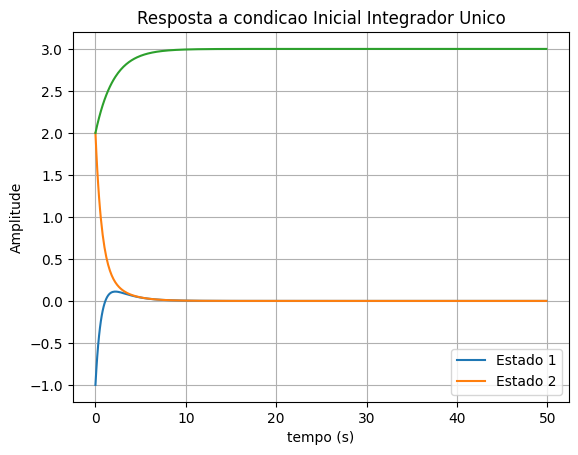

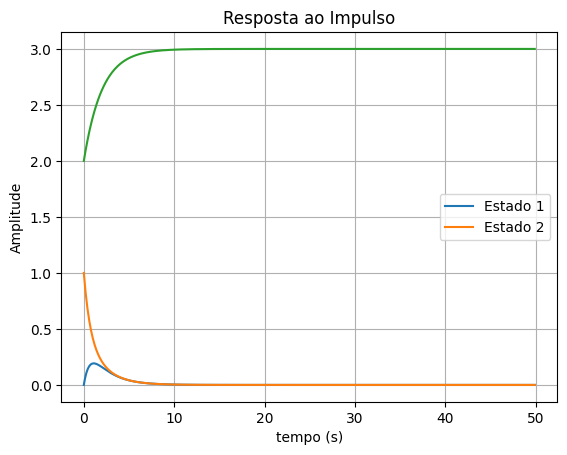

Constante de tempo do Integrador Unico
0.6666666666666666
w0(transposta):
  [0.57735027 0.70710678 0.70710678]
Matriz C:
 [-0.57735027  1.41421356  1.41421356]
Valor de consenso:
 2.251076855556564


In [2]:
import control
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Sistema de Integrador Unico 2 agentes
X0_initial = np.array([-1, 2, 2])
X0_impulse = np.array([-1, 1, 2])

# Adjacen Matrix
Adj = np.array([[0, 0.5, 0], [0.5, 0, 0], [0.5, 0.5, 0]])
print("Matriz de Adjacencia")
print(Adj)
AdjT = Adj.T
# Matriz Diagonal
D = np.array(
    [
        [np.sum(AdjT[0]), 0, 0],
        [0, np.sum(AdjT[1]), 0],
        [0, 0, np.sum(AdjT[2])],
    ]
)
print("Matriz Diagonal")
print(D)

# Matriz Laplaciana
L = D - Adj
print("Matriz Laplaciana")
print(L)

# Eigenstructure of Graph Laplacian Matrix
L = np.matrix(L)
autovalores_Laplaciano, autovetores_Laplaciano = np.linalg.eig(L)
print("Autovetores da Matriz Laplaciana")
print(autovetores_Laplaciano)
print("AutoValores da Matriz Laplaciana")
print(autovalores_Laplaciano)
# Como calular a Forma de Jordan em Python ??

# "Sistema" Laplaciano resultante
A_Laplace = -L
B_Laplace = np.array([[1], [0], [0]])
C_Laplace = np.eye(3)
D_Laplace = 0
sys_Laplace = control.ss(A_Laplace, B_Laplace, C_Laplace, D_Laplace)
print("Sistema Laplaciano")
print(sys_Laplace)

# Simuation Time
t = np.arange(0, 50, 0.1)
# Simulationa Initial
t_lap_initial, y_lap_initial, x_lap_initial = control.initial_response(
    sys_Laplace, T=t, X0=X0_initial, return_x=True
)
# Simulation Impulse
t_lap_impulse, y_lap_impulse, x_lap_impulse = control.impulse_response(
    sys_Laplace, T=t, X0=X0_impulse, return_x=True
)

# Figures to Simulation Initial
plt.figure()
plt.title("Resposta a condicao Inicial Integrador Unico")
plt.plot(t_lap_initial, x_lap_initial[0, :])
plt.plot(t_lap_initial, x_lap_initial[1, :])
plt.plot(t_lap_initial, x_lap_initial[2, :])
plt.xlabel("tempo (s)")
plt.ylabel("Amplitude")
plt.legend(["Estado 1", "Estado 2"])
plt.grid()

# Figures to Simulation Impulse
plt.figure()
plt.title("Resposta ao Impulso")
plt.plot(t_lap_impulse, x_lap_impulse[0, :][0, :])
plt.plot(t_lap_impulse, x_lap_impulse[1, :][0, :])
plt.plot(t_lap_impulse, x_lap_impulse[2, :][0, :])
plt.xlabel("tempo (s)")
plt.ylabel("Amplitude")
plt.legend(["Estado 1", "Estado 2"])
plt.grid()

# show figure
plt.show()

# Calculo da constante de tempo (Frank)
tau_consensus = 1 / autovalores_Laplaciano[1]
print("Constante de tempo do Integrador Unico")
print(tau_consensus)

# Calculo do Valor final de consenso (Frank)
# right eigenvector | # left eigenvector
# A*x     = lx      | # x*A  =  x*l
# A*x -lx = 0       | # 0    =  xl -xA
# (A -l)x = 0       | # 0    =  x(l-A)

# w1 = [p1 ... pn].T is the normalized left eigenvector of the Laplacian L for lambda1 = 0
# c = sum(pi*xi(0)); xi:= Initial condition
w = scipy.linalg.eig(L, left=True, right=False)[1]

# não consegui fazer a multiplicação de matrizes!!!
# w0 = np.transpose(w[0,:])
w0 = w[1, :].T
print("w0(transposta):\n ", w0)
# c = np.multiply(w0,X0_initial)
c = np.multiply(w0.T, X0_initial)
print("Matriz C:\n", c)
print("Valor de consenso:\n", c.sum())

# Caso de exemplo 1


![Caso Exemplo.jpg](data:image/jpeg; base64, /9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAHEA2gDASIAAhEBAxEB/8QAHQABAQADAQEBAQEAAAAAAAAAAAcFBggEAwIBCf/EAE8QAAEDAwICAw4DBQYDBwQDAQABAgMEBQYHEQgSE1h3FBcYITE3OEGVlrW209UiUWEVMlZxlxYjQlJigTOCoQkkQ1dzkZJTY3KiJYOxsv/EABsBAQADAQEBAQAAAAAAAAAAAAADBAUCBgEH/8QAMxEBAAIBAgMFBwQCAgMAAAAAAAECAwQREiExBUFRgZETYXGhsdHwFCJSwTLhBkIkM/H/2gAMAwEAAhEDEQA/AP8AVMAAAAAAAAAAAAAAAAAAAAAAAAAAADm3iC1oz/THiI0jtFqu7IsGuNLcJ8uo3UsT1lifW2630sySq1ZI0iqLlFI5WuRFYj+bdE3QOkgcN3Hio1krNUtSbLYMht8Fju94xjG8EkqqCJ0NrWrvFdaKyveqI19RvNb6iSNr3qxf7lETZV5tp1zzfWXhqpaikptabvmbMmwzLauimvtstja20XW2WqWuhqoFpaaGKSBVjVropo3ojli2dsqtUOuwcMZXxT6yQaGaa0NoyCCm1JTIEt+bVa0NO9VobfWwUdZO2FWLGzumSst7m8rWo1lXu3lVERNhxLUzUvL9R8rt9y1V1qpIbdntysVHTY9gNtq7LFSQ1fRxMfWPtsj0RG+KR7pt2puqqm24HYwOGLtxT6yYjiWvEWV5FBHUxyZvUaZXptDAnc0lnnqIn22RnR9HJJFHFFURrI1zpGLPzc3RKU7PbfrJFxC4Tgln4ls1tdkze05HeZqaCz4/J3A6ifb+hhp3y257+j2rZEXpVkevIz8W+6qHTIOTrLkGuGpGkOT8RFn14q8cfbJr7LZMdbabbLaGU1sqZ4GsuLpIFqZJJe5VdK6KeHo1kVGNby+O1wZxm2ZaD2rUfALbZ6XIL9jtFeqWlvMkqUtO6eBkzmyLG1Xryo5URERN1REVU33QKMCfcPWX33UHQXTnPMnqGVF4yLFLVdbhKyNsbZKiekjkkcjW7I1Fc5V2TxIUEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEuMTL9T8L0RqLjo1e4rTmFdfrFZ7ZVS0sVQxslZc6amVrmStcxUckqtXxboi7oqLsqBbQcb5pxdZXdNRtGblp7Vugw252n9s5hQdyxyTVD6203Gro6PnexXRSRLaalXoxWu3dGjvEuy+ivzfXPF+HS0cXNw1tnuVRVW62ZLXYelrt6WF9BVuic6hpntgSsSVsc/LHM6ofzSNbzNVq8qB2ADi3E+KHVahotfbNk92guV+tuRXKn01WSlhia5sl4qLNR0KpGxOl6Gsiplc56Oeratm6u9Wt4trtrTlD8At+RaramQPuGnFJfbhNg2EW66TVdxdcKmB80zHUE6QsVkTERGIxu6L69wO9gcg3fXnVDTLWjHf23lF3vWl9DhFnrsrW/2emobpRS3G4VsEd1nZDBEsSQugp45ouVrGRPfIrUWNyr4cuzrXC5aB1GsNl14yGxXGjz2pxVKOitFllpZaV2aSWtkjunopH9IykkYxqteiKsTHORzlerg7MBzZa4NW8y1ZyLRWDiEym2W/T+z2yvrb1BbLN+2bxV3GSqfGj+aiWmip4Y6drUSOna97nO5nryqi7doTqneLjhGcP1TyS31M+meSXWwXLIUiZSw1lNRxxzJVysb+CJ6RSokqN2Yj45Nkan4UCyg594dNccv1c1P1Cpr7JQ0lggttiu+LWtjWpV09BVd2NWSqX97ppEgildGv8AwkkbGqcyOV3QQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABH7TxWaS3+1UV9sVv1KuNtuNPHV0dZSaW5RNBUwSNR0cscjberXsc1UcjkVUVFRUPX4S2nX8Oaq/0nyr7cBVQSrwltOv4c1V/pPlX24eEtp1/Dmqv9J8q+3AVUEq8JbTr+HNVf6T5V9uHhLadfw5qr/SfKvtwFVBqmnup2IaoUd0rcSmuv/8ACXD9l3GnulkrbVVUtV0ENQkb6ethilTeGpgei8nKrZE2VTawAAAAAAAAAAAAAAAABONTtBsK1auM1yymqurHz4rd8QVlJMyNraW4SUskszVViubOx9HCsb0XZq8yq1y7bUcAQ7wPNI345Pi881/lpJsWsmLMk7uayeBtqqaiqpK6OVjEe2s7oqXyul35Vc1v4E/Ejv5Nwo2LIYb5JqZqfm+c3O7YzcsRpbjd5KGKW0W6vj6Oq7kjpqWKFs0jWx800kb3r0bU35d2rcgBDq3g/wBKa2/5bkjqy/xVuZQWWCuWOqiRkP7Nkp3skhasSox83cdK2ZV350gj25FTc9FDw11ljv15u+J8QOp9go77fKrIKm0UTrM+jbU1MvSTNZ01vkmRiuXyLIqonr9ZaQBE8+4RdKtSdJ8k0eyae9vtOSZDcMnfWRVETK2hrqyqkqJXU0nRK1jd5pY0RzXbxvc1yu3VVoF102sV41DxbUupq69t0xG23O10UUcjEgkirlpVmWVqtVyuTuOLlVrmonM/dHbpttgAhF74RsZuq5FY6DUvOrLg+YVtTX3/AA23VdKy21slS7mqmNkdTuq6eKdVesscM7Gu6R+3LzLva0tNBHaP2HS07KaibTdyRxQtRrYouXlRrU22RETxIm2ybHsAGu6c4PadMdP8a04sNRVz2zFrRSWajlrHtfPJBTwtiY6RzGtar1axFVUa1N99kTyGxAAAAAAAAAAAAAAAAAAAAABNL5xD6bWDJrxiE1PmtxuWP1EVJcksmB327QU08lPFUtidUUdHLCr+hqIXq1HqqJI3fY8vhLadfw5qr/SfKvtwFVBKvCW06/hzVX+k+Vfbh4S2nX8Oaq/0nyr7cBVQSrwltOv4c1V/pPlX24eEtp1/Dmqv9J8q+3AVUE/w7XTT/OcqZhVoZldFeprfUXSGmvuHXiy9PSwSQRzSRPrqWFknI+qp0cjVVydK1dtvGUAAAAAJpfOIfTawZNeMQmp81uNyx+oipLklkwO+3aCmnkp4qlsTqijo5YVf0NRC9Wo9VRJG77Hl8JbTr+HNVf6T5V9uAqoJV4S2nX8Oaq/0nyr7cPCW06/hzVX+k+VfbgKqCVeEtp1/Dmqv9J8q+3DwltOv4c1V/pPlX24Cqgn+Ha6af5zlTMKtDMror1Nb6i6Q019w68WXp6WCSCOaSJ9dSwsk5H1VOjkaquTpWrtt4ygAAAAAAAAAAAAAAAAADWNQtPrLqVZqGx32prYILferVfonUj2NetRQVsNXC1yua5ORZIGI5ERFVquRFauyps4AiuMcJOleJXRLraZ72r0zmrz3op6mKSPuuooqmkWkRqx+KjZHVzKyJFRWuX95U3auOtXB/idtprXidRqPnFx08sdwguVswWsqqV9qp5IJkmp4nSJTpVzU8UrY3sgkncxFjaio5qI1L2AIs3hL0u/tfjWbTVV8muGLZNfcqpEfUxpHNU3WpWpmhma2NOeCOoSKWJu6Oa+GNVc7Zd8dRcI1mx+axVWCayajYlUWLHo8ZbLa5rW91VRx1EtQ1ZkqaGVFej5n+NiMTbbxetb0AJvZ9C8dpbtcL5lGQ3zMK284tDiF0ffe5XNr6GOeqm3lZBBExXu7slY7lajVY1icqLu52Cx3hW08xnQig4ebdeMjfjdtu8N5hqZ6uKSuWaK7turWulWLlc3p2o1d2cyx7pzc34yygCXZ/oPSZbm8epeK6h5VgWVLbm2esuNgdRvS4ULZHSMinhrIJ4XKxz5FZIjEe3pHJzKi7GbwLR/B9PsBm04t9vfdLVXurJrs68OSsmu89W9z6uarc9NpnzOker905VR3KjUaiNTdgBN8C4edI9MM+v2o2B4XabHc8gt9JbJ47fbqWmhghgdI7aJIo2uasjpGrJu5UcsMPiTkKQAAAAAAAAAAAAAAAAAAAAAGlZ9rDhGmt1tNiyVcgnuV7p6uroaOyYzc71PJBTOgbPK6Ogp5nRsY6qp2q56NTeVqJua/4S2nX8Oaq/0nyr7cBVQSrwltOv4c1V/pPlX24eEtp1/Dmqv9J8q+3AVUEq8JbTr+HNVf6T5V9uHhLadfw5qr/SfKvtwFVBKmcTOl3dlBRVtHqBbP2ncKO109RdNOMioKXuqqnZT08b6iooWRRc80sbEV72t5np4/GAHCd6LGjfZ/j3w6AqpKuE70WNG+z/Hvh0BVQAAAAACVaN+cXXbtAo/lWwlVJVo35xddu0Cj+VbCVUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJVo35xddu0Cj+VbCVUlWjfnF127QKP5VsJVQAAAAACVZH6U+nnZ/mXxHHCqkqyP0p9POz/MviOOFVAAACVaN+cXXbtAo/lWwlVJVo35xddu0Cj+VbCVUAAAAAAlWR+lPp52f5l8RxwqpKsj9KfTzs/zL4jjhVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlWR+lPp52f5l8RxwqpKsj9KfTzs/zL4jjhVQAAAAACVcS3m6tHaBgnzVawOJbzdWjtAwT5qtYAcJ3osaN9n+PfDoCqkq4TvRY0b7P8e+HQFVAAAAAAJVo35xddu0Cj+VbCVUlWjfnF127QKP5VsJVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlWjfnF127QKP5VsJVSVaN+cXXbtAo/lWwlVAAAAAAJVkfpT6edn+ZfEccKqSrI/Sn087P8y+I44VUAAAJVo35xddu0Cj+VbCVUlWjfnF127QKP5VsJVQAAAAACVZH6U+nnZ/mXxHHCqkqyP0p9POz/MviOOFVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACVZH6U+nnZ/mXxHHCqkqyP0p9POz/ADL4jjhVQAAAAACVcS3m6tHaBgnzVawOJbzdWjtAwT5qtYAcJ3osaN9n+PfDoCqkq4TvRY0b7P8AHvh0BVQAAAAACVaN+cXXbtAo/lWwlVJVo35xddu0Cj+VbCVUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJVo35xddu0Cj+VbCVUlWjfnF127QKP5VsJVQAAAAACVZH6U+nnZ/mXxHHCqkqyP0p9POz/MviOOFVAAACVaN+cXXbtAo/lWwlVJVo35xddu0Cj+VbCVUAAAAAAlWR+lPp52f5l8RxwqpKsj9KfTzs/wAy+I44VUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJVkfpT6edn+ZfEccKqSrI/Sn087P8y+I44VUAAAAAAlXEt5urR2gYJ81WsDiW83Vo7QME+arWAHCd6LGjfZ/j3w6AqpKuE70WNG+z/Hvh0BVQAAAAACQ6WXGhtGb6+3O51UdNS02eUss0si7NY1MVsO6qe+sv8AlOXOdJHU1GP2dy/3MUOza6pZ/mkeqf3CL6ms/H+bkXdqTrG21N21o1kx6pgclto83oLxMjk/DUyLjVkjp0/VrHQyuVP8zY19RUTV0uCtKxe0bzPyUNRmm1ppXpDBPwXEZ3c9dYKSvkXyy17e65F/m+Xmcv8A7n0gxejtipLjVXWWKZvjatBMrIt/9UK7xOT/APJinovWSY7jaUTsiv1utaXKtit1EtbVMg7pq5VVI4I+dU55Xqi8rG7uXZdkUyJdm8zG0yq8MRzh7MZzevS4xY5mEcEdXOqtoa+BFbBWqibqxWrv0cuyKvLuqORFVq+VqbZdbpbrJbam73asipaOjjdNPNIuzWMRPGqk6vFqpr1b5bfUq5qP2cyRvifFI1UcyRq+pzXIjkX80Q1m8ZVVahT2fHbkxvJZIkrL1GibMmuDJnxQt2/yI6CWbbx+WFfV48jtHHXBT21I923vbPZOOdbmjBeeXWZ90f33R8XvueYZjmz3upqqqxmxuX+5ig2bcKpn+eV6ovc6L6mM/GieV6Lu1MHLgGGVTukuWO0dylXyzXFq1kq/qr5lc5V/3NgNSynV7SbBrtHYc11QxLH7nNE2aOiul7pqSd8blVrXpHI9rlaqtciLtsqoqeo8/O+Sf3c3tsfBpa7Yv2x7uXrPf5spSYvS2ZyTYnX1+PTN8bFt1QrId/8AVA7eF6fo5i/7G7YZqRcJLpFiucRU0NdUKrbfcadFbT16om6sVqqvRTbIq8m6o5EVWr5Wpr8M0NREyop5WSxStR7HscjmuaqboqKnlRU9Z5L1aKa+W6W3VKuaj+V8crF2fDK1UcyVi+pzXIjkX1KiHVL2xzvVxqMGPV14cvXx74+/w/vmuINZ05yWpyrEaK5XFGNuMSyUde1qbN7qhescqonqa5zVc3/S5DZjSraLRFoeQy47Ybzjv1idgAH1GAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACVaN+cXXbtAo/lWwlVJVo35xddu0Cj+VbCVUAAAAAAlWR+lPp52f5l8RxwqpKsj9KfTzs/wAy+I44VUAAAJVo35xddu0Cj+VbCVUlWjfnF127QKP5VsJVQAAAAACVZH6U+nnZ/mXxHHCqkqyP0p9POz/MviOOFVAAAAAAAAAAAAAAAAAAAAAAMNlGUUOLULKmpjkqKmof0NJSQ7LLUy7b8rd/EiIiKquXxNRFVTQ6mPJMk/v8pvE0Eb/Glstk74II/wBHSN5ZJl/PdUav+RBHU/2kyS4ZTOiPjglltlsRf/DgjfyyPT9ZJWOXf1tbH+RkjZwYK4axMx+76fBmZs05J2jowK4DhKrzPxO1Pk/+o+kY6T+fOqc2/wDueqmtt1sKpNiV9qqJW+PuOpkfU0cn+lY3qqxp+sbm/wC/kX9rkmOpkKYit+tyX11EtxS191M7rWkR/RrP0O/P0XOqN59uXm8W+5kSxNpvG1uce/mhiOHnHJsGIZhHkjJqKtpP2feKJGrV0Sv50RF8kkbtk543bLs7ZF3RUVEVNjYySX+SSzup8yoo1WrsaumejU/FNSLt08P67sTdE/zsYvqKxFLHPEyaF6PjkajmuRfEqKm6Khk6vBGK0Wp0lo6fLOSNrdYfsAFRYAAAAAAAAAAAANG1cvtZbsep7Faqh8FfkVUlujmYuzoIuVz55E/JUiY9Gr6nuYc3tFKzaU2nw21GWuKvf+b+TC5LqTer3Xz2TAJoaajpnuhq75IxJf71q7OjpY1/C9WrujpHbsRU2Rr135dTqcNslzd0uRMqL/MvjdJdqh9Wir+jHqrGJ+jWon6GVoKGjtlFBbrfTMp6amjbFDExNmsY1NkRE/kYnLs8wfT+ghuueZnYsboqiZKeKpu9xho4pJVarkY18rmortmuXZF32RV9Rm2tbJP7nrsOPHpK7YeXv75+M/10fyDBcWoXdLZbW2zTJ+7LaZH0L0X+cKt3/ku6fmbDaNQ8jwyZkWX1brzj/kfdHRtbV0Kep0zWIjZYk9b2ojm+VyOTdyYnG8pxnMbTFfsRyK2Xy2TqqRVttq46mB6ouyo2SNVau36KZJzWvarHtRzXJsqKm6KgrM45/bydZa01Vds0cUfPynu+nju9l+ljn4otOpoZGyRyafZi5j2rujkW442qKip5UKwcxafVU9BxRYlg72uWlsmA5ZPbXeplHPccf5Id/wD7b4pWp+TOjT1HTpo47+0rFnkdVgnS5rYpnfb6Tzj5AAO1cAAEq4lvN1aO0DBPmq1gcS3m6tHaBgnzVawA4TvRY0b7P8e+HQFVJVwneixo32f498OgKqAAAAAASakhpI88zuaFrUnlu9L0yp5V2ttGjd/9jLEzxeuuNNrjrBPXzufbavL6K1Uyr+7BNFjdnnRm/wD9xKiVU/WPb1+OmG9jtFsdZjwj5RsybxNb2ifGXI/FJjmfa76h1enGnWNW+7JgGPOuKVNZdu4W27I65V/Z1Sz+5l6WWmip5JOT8Hiq2fiTc6I0g1Ap9VNMMZ1Bgg7nde7dFU1FOqbLTVO3LPCqep0crZGL+rVNwB8im1ptv1JtvGwT7H46duV5q6Lbm/a8SeL/AC9w0zv/APt0n/U3m4V9La6Ge41sqRwU8aySO/JET1fmv5J61NLXHrjhl2t14u8bokzCFzqpHeSmuCPklZC5fzWGTo0/Wm/VN8/teP8Ax4n3x9J+8N3/AI5eK6q1fGsx84n6RLOHH2uGRWq06+agWm6654xpyy84HZKZFvNrhrn16LPdWqkMUkjFcrOfxtaj1XpG+Lyb9gg89W3C9Zlx+0iI3/PWE64dG1EegmntPU2KezPpsbt9OlDNz88LY4Gsaio/8abtai7O/Em+y+PcooPNcrjSWmgqLnXypHT00aySOX1Iier81/JPWp8me9JSsxEVhj8Mu+tVBcMqpdOMBwq+Wht75lqL3l9XapmTOo6ZZGNihttU1zN135+kRVc5ycqcqOds/wDaPin/APJvSr+pdx+xGz6V2CtsGHU6XWBYblcpZbnWxr5YpZ3q/ol/WNqsj/5DbjQwxNccRLynaGSuTU3tXpv9OW/mlkWRcUKuVJtHtLWt5XKit1JuLl5tl5U2WxJ4lXZFX1Juuy+Rfz/aPin/APJvSr+pdx+xFVBKpv8ALXWvWDjhxjjarLDw/WKC432ttduqcnxG132pyKwwTrGrIn1D6mlo229XwMplcrOTdFa5ZVV6tT/SzBKzM7hh9ordQ7LbrRkk1Kx9zobdVuqqaCf/ABNZK5rVcn+3iXdEVyJzLmIaSlp5Z56emiikqnpJO9jEa6V6NRqOcqfvLyta3dfU1E8iH2AAAAAAAMfbL/ZrzW3a3Wu4xVNTYqxtvuMbF8dNUOp4ahsbv1WGogf/ACkaZAAAAAAAAAAAAAAAAAAAAAAAAACVaN+cXXbtAo/lWwlVJVo35xddu0Cj+VbCVUAAAAAAlWR+lPp52f5l8RxwqpKsj9KfTzs/zL4jjhVQAAAlWjfnF127QKP5VsJVSVaN+cXXbtAo/lWwlVAAAAAAJVkfpT6edn+ZfEccKqSrI/Sn087P8y+I44VUAAAAAAAAAAAAAAAADmHjlzvjGwjCI6vhVwC3Xpr4ZFulxjRKy6UO37q01C5OWVfJ40SZfGqdEiJzk2/7PvPuIfJuH2XIaOy41ml+rcjuDshrcp1DuNPcIrg1yMdBLT/sqdtLyQspeWFkjm8rub8CqrE7nPjBSUtM+eWmpoon1MnTTuYxGrK/la3mcqfvLyta3dfHs1E9SATD+0fFP/5N6Vf1LuP2If2j4p//ACb0q/qXcfsRVQBHsB3XCbE93/Efb4Hyf+orEV/+/MqmeMXbaZbDdbniUycq0U76mj38XSUcz3PjVv5oxVfEv/p/qm+UPRWtFp4o6TzY0RNY2nucMVd8zddUY+MVMUoExGDMksv7dW6r3QuJ7ralZ3J0P/B7sctw6Tpf3dl5djucAipTh35u7W4nzqWQyU0sdRt0TmOR+/k5dvH/ANDZdOHzS6eYvJU79M+y0TpN/LzLAzf/AKmj5KtRVUTMftzlSvvb+4KfbxqznRekl2/KNnM9f/xRPWhVKSlgoaSGipWIyGnjbFG1P8LWpsif+yFbXWiKVr3zP5+e5Y0kTNpl9gAZa8AAAAAB57i+vit9TJaqaCorWQvdTQzzLFFJKjV5GvejXKxqrsiuRrlRPHsvkPQAP8qso1k48LhxiafYjr/jsGJY1NkDHWSy095ntGO3WtjR76OKW500NS+oV0zIF6F7XoruVqxw86q3/QKbIuKFsr0g0e0tfEjlRjn6k3Frlbv4lVEsS7Lt6t1/mpTamkpa1jYqyminYyRkzWysRyI9jkcxyIvra5Eci+VFRFQ+wEq/tHxT/wDk3pV/Uu4/YjVr3ctVbjnmPs1Ow3FbDHFbblJQfsLJqm7pNLz0iO6TpqCk6JWtVeXl5+bmfvy8qc1+J7rLbZks1vy6midI/G6paqoa1N3Oo3sWOfZP9KObL/8A0kOoiZxzs0Oy7xTV0me/ePWJiPnLXjnzizvVPj110ivFXnFpw+KnzGoV16usLJaWk3s1wbvI172NXm35E3cnjenl8i9AxyRyxtlie17Hojmuau6ORfIqL60P0UYnad3pclOOvC594Qpo56bUipor9SZPRV+YSXGLKKGh7jo7w+WjpkkWGJFViJErEiV7FVr1Zzbq5XHQQAtO87mOns6xVq2OshTiwxCRu3Su08yprvz5UuVg5f8Aqrjow5hwNtVceLLHMnRy/s6pwPK7dQ/lKlNcrB0szV9aLJM5if8Ao7+vx9PF7T/+uHme1Nv1d438PpH06AAJlAAAEq4lvN1aO0DBPmq1gcS3m6tHaBgnzVawA4TvRY0b7P8AHvh0BVSVeCdwsdWnSr3Nt30R4J3Cx1adKvc23fRAqoJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9ECqglXgncLHVp0q9zbd9EeCdwsdWnSr3Nt30QMfpzYbbkuYa+2a7QrJTz5/RLu1eV7HtxawOa9jvK1zXIjkVPIqIe6sW+4g51PlVPJUULF2hvFNEro3M/OoY1N4Xfmu3IvlRU35U/XgncLHVp0q9zbd9EeCdwsdWnSr3Nt30Szg1NsHLrHghy4Iy8+kvTQ3O23OJJ7bcKarjVN0fBK2Rqp/NFU8tbktkoJm0kleyWrf4o6SnRZqiRfybEzd6/7If3wTuFjq06Ve5tu+iPBO4WOrTpV7m276JY/Xxv/AI/P/SD9JP8AL5f7ZKwYhdcgr4LzltClHQUkrZ6G1vcjpJJG+Nk1Rtu1FavjbGirsqI5V3REbt+TY3actstTYL3TrLS1KIq8ruV8b2qjmSMd5Wva5Ec1yeRURSfeCdwsdWnSr3Nt30R4J3Cx1adKvc23fRKefLbUTvfp4dy3gr+nmJxztMc9+/dgbnT5Jgr30+X0stXbo12gvlLCr4nM9S1LGoqwP/N23Rr5Uc3flT7UF1td1hSotdypayJU3R9PM2Rqp/NqqhmPBO4WOrTpV7m276I8E7hY6tOlXubbvomfOl58p5N6vbU8P76b28YnaPTaft7muV2UWKgnbRPuDJ62TxRUVKiz1Mq/kyGPd7v9kNhxTT+8ZFcqfIM4t6UVvopW1Fvs73I+SSVuysnqdt2orV8bYkVURURzl5kRrf14J3Cx1adKvc23fRHgncLHVp0q9zbd9E6ppoid7Tu4z9sXvTgxV4d+s77z5co2VUEq8E7hY6tOlXubbvojwTuFjq06Ve5tu+iWWMqoJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9ECqglXgncLHVp0q9zbd9EeCdwsdWnSr3Nt30QKqCVeCdwsdWnSr3Nt30R4J3Cx1adKvc23fRAqoJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9EBo35xddu0Cj+VbCVU5f0n4ZOG2455rPR3Dh801qqe15xS0lDFNidA9lLAuN2WZYomrFsxiyzSyK1uyc8j3eVyqtL8E7hY6tOlXubbvogVUEq8E7hY6tOlXubbvojwTuFjq06Ve5tu+iBVQSrwTuFjq06Ve5tu+iPBO4WOrTpV7m276IFVBKvBO4WOrTpV7m276I8E7hY6tOlXubbvogVUEq8E7hY6tOlXubbvojwTuFjq06Ve5tu+iBVQSrwTuFjq06Ve5tu+iPBO4WOrTpV7m276IFVBKvBO4WOrTpV7m276I8E7hY6tOlXubbvogVUEq8E7hY6tOlXubbvojwTuFjq06Ve5tu+iBVQSrwTuFjq06Ve5tu+iPBO4WOrTpV7m276IFVBKvBO4WOrTpV7m276I8E7hY6tOlXubbvogNG/OLrt2gUfyrYSqkq8E7hY6tOlXubbvojwTuFjq06Ve5tu+iBVQSrwTuFjq06Ve5tu+iPBO4WOrTpV7m276IFVBKvBO4WOrTpV7m276I8E7hY6tOlXubbvogMj9KfTzs/zL4jjhVTSsK0Q0X01ust9050hwrFblPTupJayyWCkoZ5IHOa50TpIY2uViuYxytVdt2NX1IbqAAAEq0b84uu3aBR/KthKqT/KeHrQLOb7VZTmuh+n+QXqt5O6bjdMZoquqn5GNYznlkjc93KxjWpuvia1ETxIhivBO4WOrTpV7m276IFVBKvBO4WOrTpV7m276I8E7hY6tOlXubbvogVUEq8E7hY6tOlXubbvojwTuFjq06Ve5tu+iAyP0p9POz/MviOOFVJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9ECqglXgncLHVp0q9zbd9EeCdwsdWnSr3Nt30QKqCVeCdwsdWnSr3Nt30R4J3Cx1adKvc23fRAqoJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9ECqglXgncLHVp0q9zbd9EeCdwsdWnSr3Nt30QKqCVeCdwsdWnSr3Nt30R4J3Cx1adKvc23fRAqoJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9ECqglXgncLHVp0q9zbd9EeCdwsdWnSr3Nt30QKqCVeCdwsdWnSr3Nt30R4J3Cx1adKvc23fRA3LMMQZkkcFbRVDaK8W/mWiq1ZzIiO25opE/xRu2TdN990RU2VENHkv7rPI2izKjWx1aqjUfM7ekmd/9qfZGO3/yryv8fjah9vBO4WOrTpV7m276J+4eFThep5Wz0/DdpbFIxeZr2Yfbmuav5oqQ+It4NXOKOC0bx9FfLp4yTxRO0vWypppIu6I6iN0W2/Oj0Vu38zGLktFVVDrdj8cl7r08Xc9BtJyL6ulk/ciT9Xqn6b+Qwd708wCk4jMExqlwbH4bRVYNllTPb47ZA2mlmhr7AyGR0SN5XOY2eZrXKm7UlkRNkcu+z1vC5wzXKpfWXHh10xqqiRd3yzYjb3vcv6uWLdSzbXUiP21mZ9/59kMaS09ZbDhuG1NsqXZJkj4J73PF0KJCqrDRQqqKsMSqiKu6oiueqIrlRPEiIiJtxKvBO4WOrTpV7m276I8E7hY6tOlXubbvomfkyWy24rLlKRjjhqqoJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9EjdKqCVeCdwsdWnSr3Nt30R4J3Cx1adKvc23fRAqoJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9ECqglXgncLHVp0q9zbd9EeCdwsdWnSr3Nt30QKqCVeCdwsdWnSr3Nt30R4J3Cx1adKvc23fRAqp/HNa9qse1HNcmyoqboqfkSvwTuFjq06Ve5tu+iPBO4WOrTpV7m276IGPveDXvAZnPxm1zXXF13c2jpmq+rtnj/cij8s0P5Nb+NnkRHJty4+25JYbu50duu9NNKxeV8KSIksbvyfGuzmr+ioimweCdwsdWnSr3Nt30R4J3Cx1adKvc23fRKttLEzvWdm1i7ZvFNsteKfHfb15TvPv5e/mwdzv1kssfSXa7UdG31dPM1iqv5Iir41/RD6WrHcl1BkbDBSVllxx6f8Aea+oY6Cqqmf5KeNyI5jXJ5ZXImyL+BF35m5jwTuFjq06Ve5tu+iPBO4WOrTpV7m276IjSxv+6eT7ftq3Dtjptbx339I2jn6vLcLZb7NxLaZ2i1UcVLRUenWYQU8ETeVkcbbhjaNaifkiIV8lXgncLHVp0q9zbd9EeCdwsdWnSr3Nt30S10YszNp3lVQSrwTuFjq06Ve5tu+iPBO4WOrTpV7m276IfFVBKvBO4WOrTpV7m276I8E7hY6tOlXubbvogOJbzdWjtAwT5qtYPVaeGThtsF1or7YuHzTW3XK3VEdXR1lJidBDPTTxuR0cscjYkcx7XIjkcioqKiKgApYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwlgxCzY1dslvVrZK2pyy6R3i4q+TmR1QyipqNqtT/CnQ0cCbfmjl9ZmwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJV4hZq3NLVn07JVu1mtdws9K5JNmJT1ktJLOit9aq6gp9l9SI78zNgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJBqZxDUumeuGmej9fi76ml1EZcOe8pWIxtsfAsDIWvi5F6RJpqmKJF528rnt8Tt/FXyC8QnD9k+ruVU2R2C7WqhkteG3e22yaqfJ0lPfH3C111tqeVrFToo5rbzPVF5k/CjWu3XYMLduNO023P9TMDptPq64S4PU2O1WaSmrmc+R3S51ElKymjY5iNgbHUxSRPkc9yJ0crtk5UR3ry/iZ1E0iprkzWbSKz26rdjF7yKwvsOTyXCkr5rZSPqprfPLLRwPp5liarmvSORjkbIu+7UaujRcF+oEdukr4cwsVNlMVlxm5U1yak0kcmWUF6uN2rZpo+VqrSTzXBzEVHc/K9+7U5UR2e1K0M144goLjXalU+FYvNasOySxY3a7Teaq4w1F2utC6jWtq6iSlhWKKONz2tjZE92073K5VRGqHtyHjWtdk0O031cpsCnrbjn95pbHLYUuKMfa6npHxV3STdEvM2mlikjVeRvO7kT8KvTbKWPiK1Oy3K7/Z8Z030+S2WPKK3GumuuoklHXzrTT9E6VKRttkRObytZ0q7+Tf1mg3fgxz6uvuVTw5PYX2af9nVWL0Ekkzf2fWTVttqb2+RUjVNpX2tr4lRHO5qiZHciLuuVsHD5qViedZNf49C9B8pS75lcMkor/ebnUR3eCKep6WNFT9lS8skSbcvLMqIqJsqeUDLU3GpbJMe1vr6vAZ6O8aPLeqmlt01x2ZkNvt808HdUM3Rf3aLPTSRvZyvWJVjVVcj275rLtb9ecf1Ysml1p0Rwq4LlNLdrjZa6fP6mm56SgfTI91RGlqf0MjkrIVRjXSJ4npz+JFWfaucGOa57o3luO45ktktGd1+S5ZcLNcnSSrSvtN7qpnVFBVKkSv5XwSsc5GscjZ4InNV3Jut0yTTa+3jXDTvUumq6BtrxGw5Ba62KSR6TyS1zresKxNRqtVqdxy8yuc1U5mbI7ddg0F/Ejqld8dv2p+C6I2+94BjdRXwTVcmTrT3a5MoZXxVk1BR9yuikY18MyRpLUROl5EXZm6b0fKNWO4dOrJn2B4lc8zflC0CWWhoVbCs7atGujllkf+GCFsble97t+VE8iqqIsdZotxHYjgmV6Cae1uEuw3Iqq7/srJ6+5VcdzsNFcppZZou4WU7o6qWF1RN0L+6ImqiM5kTbZd/1T0z1LpdELHpTw/XS32yS2Nt1omlr7tNbpf2NTxoyWKGqgp53wzvYxkaSNj3aj3uarXI1QNp0j1QbqjabzPUY9UWS6Y3e6nHrtRSTsqGR1kDWOf0UzPwyxq2Vio7Zq77tc1rmuam9E90Kw+8YFgMOKXbAsSxBtDUSJS2/GrvUXKmfE7ZyzST1FNBI6d8jpVermuVy7OV7nOXahAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANT1R1UwHRfDKvULU3IGWTHqCSCGprX08szY3TStij3bE1z9le9qb7bJvuuyIqgbYDUcl1Y09xDMcR0/wAhySKlyDO5KqPH6JIZZHVy00SSzKjmNVrEaxUXmerUXdERVVdjUaDis0NuV6pbTSZRcFpq64JaaO9yWG4R2SrrVerEghujoEo5Hq9ORvLKqOds1qq7xAVwGh47rnpTldtza72LL4J6TTm5V1pyiV9PNCltqqNvPUtckjGq9rG7rzsRzHbLyuXZTWPC50JlprHVW2/5Dd2ZHZo8gtyWfDr1cnyW+SR8bJ3spqR7okV8b2okiNd4vJ5ALGCf2DXnSzI80tenNBkVRT5RerEuS0NpuNqrLfVS25JnQrKsdTFGrXI+N+8TtpNmq7l5fxGv5LxZaHYlbm3m8XzIltrqye3930WHXmtpW1UNfJb3wOmp6R8bZO64nxNY5yK9VYrUc17FcFgBJ7jxP6R26G2c8+WT193hlqqaz02F3mW7JTRyLG+olt7aVaqGHnRUSSSNrHbLyq43jCs+w7UXFqbNcLv1Pc7NVJJyVLEczldG5WyMkY9EfG9jmua9j0a5rmqjkRUVANgBpOnes+m2rCPfgGQSXWNlPHVpL+z6mCN8L/3HsfLG1r0XdFTlVfEu/kN2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOX+GThk4bb/w26UX2+8PmmtxuVxwexVdZWVeJ0E09TPJQQuklkkdErnvc5VcrlVVVVVVKX4J3Cx1adKvc23fRAqoJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9ECqglXgncLHVp0q9zbd9EeCdwsdWnSr3Nt30QKqCKcOWJ4rg2Ua2YthWM2rH7LRagU3c1utdFHSUsHPjFje/kijRrG8z3ucuyeNzlVfGqlrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADnXENENF9StWtcb7qNpDhWVXKDOKKkirL3YKSunjgbi9jc2Jsk0bnIxHPe5Gou273L61N18E7hY6tOlXubbvogVUEq8E7hY6tOlXubbvojwTuFjq06Ve5tu+iBVQSrwTuFjq06Ve5tu+iPBO4WOrTpV7m276IFVBz/AGjSfSzS/inwrvZ6aYpiX7T0/wAt7t/YVmpqDuro7jj3R9L0LG8/L0j+Xm3253beVToAAAAAOdcQ0Q0X1K1a1xvuo2kOFZVcoM4oqSKsvdgpK6eOBuL2NzYmyTRucjEc97kai7bvcvrU3XwTuFjq06Ve5tu+iBVQSrwTuFjq06Ve5tu+iPBO4WOrTpV7m276IFVBKvBO4WOrTpV7m276I8E7hY6tOlXubbvogVUHP9o0n0s0v4p8K72emmKYl+09P8t7t/YVmpqDuro7jj3R9L0LG8/L0j+Xm3253beVToAAAAAAAAAAAAAAAAAARfi1wuo1B0rt2JxY9VXqnrc0xTu+kp6d8yrQtvdG6pe9rUVUjbCkjnuXxNa1yqqIiqWgAf59WfSbWvN8owWszbGchpK/BL+umtBc56GT8dBSWG9xy37mRvigqpqmhTpV2ar4WInjVEXZqm5ZVmPCjj3CNRaR5ha9RI7dZsUuMc+N1UVotbaSWBk9zS4uZ3I+FscEk0Sxyve9/RtRvNvt2+AP8/6LSLVGlzTIcXt+A3xuOa45vkNqy2ofQythorfSZHUVjKqXmREbFW22oradkv7r17nROZFaePCMYybCrlp/VZZBrliEEOl9JbJJsKxGsrZe623SskdTVKMoajonNY9j0a5GLs5F8aKh/oYAOOL7pTk2qepT85wpmVU18x7TywVuG5NlVnnoah16pLjdeeCrSSGJW9NDKsU8fI1ehquZGpuxTy2fHdRMi4HIqe5aaZFaMluupMd8nx6egldXUkMmeNrHK6NG8ysZAqyK9E5ejar9+XxnaIA5zvV+rNEuJbMc+y7D8nueLZ3jllprfd7Dj9ZeHUVXQPq2yUU0VHHJNGkiVMcjHKzkVyvRXb7Ie3QvE8vi0q1MyDIMWulmq9RMkv8Akluse8dPcKWkqI2xUzHo7dkNTKyFszmu35JJ1R3jRyF/AHK/CjT3+15kzHcQqNV005tWG0lNV0eodvqYJ6O+NkYxkNK+oijVyMgZK2VsG9OjuiWNdlU6oAAAAAAAAAAAAAAAAAAAAACFas6e4DqVxJab2LUbB8fyq2wYPmFXFR3u2Q10Ec7a/HmtlbHM1zUejXvajkTfZ7k9amweCdwsdWnSr3Nt30QKqCVeCdwsdWnSr3Nt30R4J3Cx1adKvc23fRAqoJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9ECqg5q1t4etAsGxfHspwrQ/T/H71RagYP3NcbXjNFSVUHPk9tY/kljja9vMx7mrsvja5UXxKoAoHCd6LGjfZ/j3w6AqpKuE70WNG+z/AB74dAVUAAAAAAlWjfnF127QKP5VsJVSVaN+cXXbtAo/lWwlVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACVaN+cXXbtAo/lWwlVJVo35xddu0Cj+VbCVUAAAAAAlWR+lPp52f5l8RxwqpKsj9KfTzs/zL4jjhVQAAAlWjfnF127QKP5VsJVSVaN+cXXbtAo/lWwlVAAAAAAJVkfpT6edn+ZfEccKqSrI/Sn087P8AMviOOFVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACVZH6U+nnZ/mXxHHCqkqyP0p9POz/MviOOFVAAAAAAJVxLebq0doGCfNVrA4lvN1aO0DBPmq1gBwneixo32f498OgKqSrhO9FjRvs/x74dAVUAAAAAAlWjfnF127QKP5VsJVSVaN+cXXbtAo/lWwlVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACVaN+cXXbtAo/lWwlVJVo35xddu0Cj+VbCVUAAAAAAlWR+lPp52f5l8RxwqpKsj9KfTzs/wAy+I44VUAAAJVo35xddu0Cj+VbCVUlWjfnF127QKP5VsJVQAAAAACVZH6U+nnZ/mXxHHCqkqyP0p9POz/MviOOFVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACVZH6U+nnZ/mXxHHCqkqyP0p9POz/MviOOFVAAAAAAJVxLebq0doGCfNVrA4lvN1aO0DBPmq1gBwneixo32f498OgKqSrhO9FjRvs/x74dAVUAAAAAAlWjfnF127QKP5VsJVSVaN+cXXbtAo/lWwmbumo09bUzW/CbfFXLA9YprjUuVtHG9PK1nL+KdUXxLy7NRfFz7oqEuLDfNO1IcXyVxxvZvQJg+XOal3SVOf1dO5f8ABQW+ljjT+STRyu//AGPpBedQbUqSRXqjvkbfG6Cvpm08r0/Js0KI1q/ziX/YszoL7crR8/sgjV036T+ealg1/F8ztuTrNSNhnoblSIi1NBUoiSxovkc1U3SRi+p7VVPV4l3RNgKd6Wx24bRtKxW0XjeoADl0AAAAAAAAAAAAAAMFl2aWPCqCOsvEsr5KiToaWkp4+kqKqT/JGxPKvrVV2a1PG5UTxk8rc11KvrlfT1FvxilX9yKKFK2r2/N0j9omr/pRj0T/ADL64smauOdp6r2m7PzaqOOvKvjPT7z5QsAIoyu1FgcksOp90mcnj5Ku3UD4l/mkcEbtv+YzFu1bu1hc2PUO20/cW6NW82xj+ij3XbeeByufE383tc9qeV3KibnFdTSZ58ljJ2PqKRvSYt7o33+cRv5c1TB+IZoaiFlRTyslilaj2PY5HNc1U3RUVPEqKnrP2WGSAAAAAAAAAAAAAAAAAAAAAJVo35xddu0Cj+VbCVUlWjfnF127QKP5VsJVQAAAAACVZH6U+nnZ/mXxHHCqkqyP0p9POz/MviOOFVAAACVaN+cXXbtAo/lWwlVJVo35xddu0Cj+VbCVUAAAAAAlWR+lPp52f5l8RxwqpKsj9KfTzs/zL4jjhtuTZ3SWOsSyW2hkut4cxJO5InoxkLF8jppVRUjavq8SuX1NXZdu8eO2W3DSN5c3vWkb2ltAJlNcM/uK9JVZXDa0XyRWyhjXlT8lkqEk5l/Xlb/I/kdVntEvSUmburVT/wAO52+B7HfpvA2FU/n4/wCSlv8AQX2/yj5/ZX/V08J+X3U4GnWDUFtTXw2LJ7d+yrlUKrad7ZOkpatU9UcmybP9fRvRHflzbKpuJVyYr4p4bwnpeuSN6yA03MdS7fjVclgtdBLeb6+NJe4oXoxkDF8j55VRUiavqTZXO8fK1dl20upyDU66u6WpzGns7V8kNpt8TlYn5LJUpJzr+qMb/IqX1FKTt1amn7Lz6isX5Viem/f5REz57bLMCLQXjUu3u6Wk1AdcFTx9FdrZTvY79N6ZsLk/nuu35L5Da8W1UhuFyp8cy22JZbtUqraVzZelo6xyeqKVUTZ/r6N6I7y8vOiKopqKWnbo6z9lZ8NZtG1ojrtv9JiJb8ACdmAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACVZH6U+nnZ/mXxHHCqkqyP0p9POz/ADL4jjhVQAAAAACVcS3m6tHaBgnzVawOJbzdWjtAwT5qtYAcJ3osaN9n+PfDoCqkq4TvRY0b7P8AHvh0BVQAAAAADnCw3SprNTNbMJt1TJAtdnlLU3GaJ3K+Ojbi9hbyIvlRZXbt3Txo1sm2y7KUinp4KSCOlpYWRQxNRkcbGojWtRNkRETyIYC049QWzUvUm+U0aNqLzeaF9S71uWK1Ucbf/wBUQ2M3MNIx4q1jw39ebKy2m95mfh6AOT+NDVnJsfvljxDAsiyK23fHbdPndTFZaOsqFuMlM9GUNrqO5o38sFU9Krm6TlYvc/jU6bxPJrTmuLWfMLBUJPbL5QQXGjlT/HDNGj2L/wDFyHUXibTXwfJrMREv1erdVTpDdLPMlPd7c5ZqKf1Kv+KJ/wCcb0Tlcn5LunjRFSiY5fKbJbFRXylY6NlXEj1jd+9E/wAj43f6muRzV/VFNONXsesOK6e1t9xa+WnNap8F0fUQusmEXq8wNZPFHMqLNQ0s0TX9JJIqsVyPRFRVTZzVWvrKRbFxd8fRNprTW/D3StYOb9deKyDHtIcqyPTC1ZvSZNZrc+50Ml+0oyhtvd0CpLJHO91FG2Nj42SM6R0jGs50erkRqqahwVf9ojjPFnXvwqt0+vWPZbR0q1NStPC+stb2Jv8AiSoam8Kryrs2VETfZrXvcZLQdfgAAAAAAAAAAfCuraS2UVRca+dsNNSxPnmld5GRtRVc5f0REVT7mja1yubpvcaZF/DcKmgt0n6xVNZDA9P5K2RyHN7cFZt4JtNi9vmpi/lMR6zsn9tmrcjuE2dXxkiVtzb/AN0p5Nv+4Ua+OOBv5OVNnPX1vVfU1qJlgTXiXu11sPD1qRerHc6u3XGhxe5VFLV0kzoZoJW071a9j2qjmuRURUVFRUUzIiZl7G9opXeI2iI6e6FKCoioqKm6L5UOZNI6jNsX17t+PX62Zrjdhv8AitZLR0GRZfJkTLjcIJ6dz5YpJJ5n0yxxSLu3mRsiS77bsOmz7aNnGO/HG+2z06YXR+L5E7BZZXLabmySrs7XL4qWVmyzUrf9CoqysT1bSp5EaiVo5+y+7w41Dacrnjq3ss15oZ3NpKSWqndHJM2CRI4YWullescz0RkbXPcq7NRVVENs8JbTr+HNVf6T5V9uLemtvWa+DD7ZxRXLXLH/AG6/GPvG3nuqoJV4S2nX8Oaq/wBJ8q+3EA4v+PS8aCWjD9QtPsUvVzss1xlt99tGTYTfbItUyRiuhfT11XSxRQysWnmRY3I9zmyo5GKjeZLLHdqAjvC9xO4bxU6fuz7DbBkNoip5u5aqnu1C6JEmRPxJDMm8c7UVF8bHbp4uZrFVELEAAAAAAAAAAAAAAAABKtG/OLrt2gUfyrYSqkq0b84uu3aBR/KthKqAAAAAASrI/Sn087P8y+I44VUlWR+lPp52f5l8RxwqoAAASrRvzi67doFH8q2EqpKtG/OLrt2gUfyrYSqgAAAAAEL1ayGXG+InAKqijZLcKnA8vo6CN/7r6iS5Y4jVX/S1N3u/0scbHZrTHaKToenkqaiVyy1VVLt0lTMv70j1/Nfy8iJsibIiIfPUrHqC4atYPkE8aLVWizX5kDl8rUmkt6P2/nyt/wDYyRsaSkUwxMd/32ZuotNskx4AJBxUagTYJpNUU1tutfbrvlddTY1bqu3wTTVdK+qdtNUwsha6Vz4KZtROnI1Xbw+JD4cJmoFVnOkcVBdrrcrleMPuNXjFfV3OKaKsq+5n7U9TM2ZrZUfPSuppl52o5VlXcm444uFHwzw8Su3K3Ud2opaCui6SGVNlTfZUVPGjkVPGjkXZUVPGioiofHvj3Ow4TXUVXI2tya31MVqpFl2TuySZP+71DkT1cnM5+23/AAZdtvEe80fJ7dHLqFY6tXeSgqp1b+b4VbGxf5o2slRP/wAlK+urNtPbbrHOP7+X9LvZcVnWUrf/ABmefv8Ad6vTZbQyz0ixOqZauqnes9ZWTbLLVTu/eleqetV9SeJERETZERD3ghXFDU5AtfpfZLFHklW28ZXNTVdusOQzWWorom2mulSNamKWJWta+Nkior0RejRPH5DylY35Pf5ck1jildTy3O2UV4oZbdcIukhmTZURVRWqnjRzVTxtcioioqeNFRFQjPC3dcqdRZ3iuaSXynuNgyd8dPar1df2pV2ygmpaeWnjdW8z1qWu5nyI5znObzqxVXkLgLRtOxjvxRF45Nr0qyavvFpqrDfqp1ReLBK2lqJ3IiOqoXN5oahUTxIr27o7b/Gx+2ybG8EhwaV1LquyGNdm3LHql0v6rTVMHR7/AMu65P8A3Urxf09ptTn3PM9qYa4dRPByief3+e4ACZngAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlWR+lPp52f5l8RxwqpKsj9KfTzs/zL4jjhVQAAAAACVcS3m6tHaBgnzVawOJbzdWjtAwT5qtYAcJ3osaN9n+PfDoCqkq4TvRY0b7P8e+HQFVAAAAAAOfsYyesr9bNXLDWx8lPQ3+ip6F+/ilVtjtc0yfzb3XF/7m/Gm4di65PmeuTKSqSkuVDqLRVNBUq3dI5UxWxIrXJ62Paqtcn5LunjRFTP269JPVSWe6Uz7dd6dP7+imXxqn+eN3kkjX1Pb4vUuy7om1pskZcceMcp+7Mz0nHeZ7pfG24djdpyW9ZhQW1I7xkMdLFcap0r3rNHTNc2FiI5ytY1qSSfhYiIqvcq7qqqfzDMMxvT3GKDDcPtv7Ps1sY6OkpemklSFivV3K10jnO5UVy7Jvs1NkTZEREzR/HOaxqve5Gtam6qq7IiEu0Itxzmsar3uRrWpuqquyIhk9LKZ/8AZya9yNVv7drprixFTxrCu0cLv+aKON3+5q9HRzaiTOtttdIywMfy3C4N3RtU1F8dPAv+JHeR8ieJE3RF5v3avHHHDG2KKNrGMajWtamyNRPIiJ6kKmtyxWvso6961pcczPHPRrOpum+Lau4NdNOc2gq57FemxxV8NLWS0r5omSskWNZInNejXciNciKm7XOb5FPtgeneCaXY7BiWnWJWrHbPTeNlHbqZsMau9b3cqbvevre7dyr41VVNiBlrwAAAAAAAAAABq2qFkrMhwK8W62xLLWthbV0kaeWSoge2aJv+742p/ubSDm1YtE1nvSYsk4clclesTE+iJ2240t2t9NdKGTpKeribNE782uTdP/8ATx5Xi1izfGbrh2UUPdtovVJLQV1N0r4+mgkarXs52Kjm7tVU3aqKnqUyGXY7VadXGrvNLTzVGK18zqiVIY1e60zPXd6q1qb9zucqu3Tfo1V2/wCBUVv9p6inq4GVNJPHNDK1HMkjcjmuT80VPEqGbMTSeGer2VL0z0jJj51n82n3/nRo+FaH6bYBfn5Rj1puMt4fSrRNr7re666zxU6ua50Ub6yaV0bFVrVVGKiKrU332N8BjrtfKS1Ohpujmq66qdyUlDSs6SoqH/kxier83Ls1qeNyonjPkz3y6pSI5Vh9EpHXvMMZx6FOZUr23ap2/wDDp6TaRHL/ADn7nb/zfoXA0nTfCa3Ho6u/5E+OS+3bk6Zsa80dHA3fo6aN3rRFVznO/wAT3KvkRqJuxe09JpXeesvNdqamufLFaTvWvL4z3z/XkE71T0A0o1su2N3PVPF2ZFFiktRUW+3Vkz3UDppkjRZJqdF6OdWtj2akiOaiPf4vGUQE7MfGjoqO3UkNBb6SGlpaaNsUMEMaMjjY1Nmta1PEiIibIieI+wAAAAAAAAAAAAAAAAAEq0b84uu3aBR/KthKqSrRvzi67doFH8q2EqoAAAAABKsj9KfTzs/zL4jjhVSVZH6U+nnZ/mXxHHCqgAABKtG/OLrt2gUfyrYSqkq0b84uu3aBR/KthKqAAAAAAQ/WLJ6yz67aa2hsf/cK2wZHUVsu/wDwkZVWeGJV/RZapif7m2mCzi10N74lMGtFygSalrNOs0hlYvratxxxPEvqX8l8qL4z7LLXYlVxY7lc7ncy8lDdHptFWtTyI93kZPt5WrtzeVu/jRuto8kXp7Pvj6M/U0mtuPul+bth2OXzILFlN1t3dFzxp9RLa5nSyIlM+eJYpHoxHIxzljVzUc5FVEc7bbmXf82jDMasWRX7K7Tbe57pkz6aS6zJNIqVL4IkiierFcrGuSNGtVWoiuRrebflTbNgs7Qr7yGg5Q+sXKKfJ4vHarLPFZqyT1MkqmuVfH+SPSiav/q/obTU3OruFeuOYvE2rurk/vHbKsFE1f8AxJ3J4k/NGb8zvUm26pu1Dg1kp8PkwysY6tpKqGSOskm26SpfJuskrlTyPVyqu6eTxbbbIVdfbbDOP/tb8/0v9mWjFqaZrRvWs8/p+e9PjVNQNL8M1PprbTZhRV8v7HrFr6Cahu1Xbp6edYnxK9s1LLHIm8csjVTm2VHL4jLVDbng1fFjOYTve1y9HbrxI3aGvan7rZHJ+GOo28rF25lRXM3TdG5U8rzidu9+gTFb1iY51np4T+fJrOBabYXplbKm1YXZ3UUVdUurauWaqmqqiqqHNa1ZZp53vlldytam73KuzUTyIbMDFy19fd7muLYhC2tvDk/vZFRVp7e1f/EqHJ4k/NI9+d/qTbdyN95fYrFY8Ij0hsGmdI66Z9eL6xN6ezUDLSx/qWomc2aZv/KxlMv/AD/oVcwuH4tRYbj9NYaKaSdYuZ89TLt0tTO9eaSV+3i5nOVV/JPEibIiIZo0MNPZ0iJ6vJ6/URqc83r06R8I+/XzAASqYAAAAAAAACX5DV1TOJzAKBlTK2mmwPL5pIUeqMe9lwx5GOVvkVWo96IvlRHu28qlQAAAAAAAAAAAAAAAAAAAAAAAAAlWR+lPp52f5l8RxwqpKsj9KfTzs/zL4jjhVQAAAAACVcS3m6tHaBgnzVawOJbzdWjtAwT5qtYAxOJ8OWUYNitmwrFuKPVWisuP2+ntdupu4sYk6ClgjbHFHzvs7nu5WMam7lVy7bqqr4zLd5vUXrY6q+zcV+zFVAEq7zeovWx1V9m4r9mHeb1F62Oqvs3FfsxVQBKu83qL1sdVfZuK/Zh3m9Retjqr7NxX7MVUARSzcOWUY/cb9drRxR6q09Xk1wZdLpJ3FjD+6KplLBSNk2dZ1Rm0FJTs2aiN/BvtzOcq/S+cO+UZLTNpb5xPanVbI15o1fbMWR8Tv8zHpZkcx36tVFLOD7W01nes7S+TEWjaUQoeGvJ7fEkMHFTq89qJtvPHjkzv/lJaVX/qeas4WLvcKhk9w4ntWapGLv0E8OOSU7l/1QutKxu/3apeASe3y9eKfWXHssf8Y9Eoj0X1BhjbFFxW6psYxqNa1tsxVEaieRET9jeJD9d5vUXrY6q+zcV+zFVBEkSrvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zFVAEq7zeovWx1V9m4r9mHeb1F62Oqvs3FfsxVQBKu83qL1sdVfZuK/Zh3m9Retjqr7NxX7MVUASrvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zFVAEq7zeovWx1V9m4r9mHeb1F62Oqvs3FfsxVQBKu83qL1sdVfZuK/Zh3m9Retjqr7NxX7MVUASrvN6i9bHVX2biv2Y12g4U1ob069rxAamPkkVXS08UVhpKeVy+NXPiprZE1zl9bl8a/mXcHNqVvytCXDny6eeLFaY+DnbE9O7xnl/1Mxa4ar5hQwYhk0FjoJ6BLdFO6B9ltlcr5HLSORX9LXSoioiJyNYm26K52XxvhjvWJOmkx/iY1Qpp6j/jVL6HGJqiVN90R80lndI9E9SOcuxQsHweqxPJ9Qr9UV0U8eZ5JBfII2NVFp2MtFuoFjcq+VVdQPfuni2e1PKim4HNcVKzvEJcut1GevDe87eHSPSEq7zeovWx1V9m4r9mHeb1F62Oqvs3FfsxVQSKqVd5vUXrY6q+zcV+zDvN6i9bHVX2biv2YqoAlXeb1F62Oqvs3Ffsw7zeovWx1V9m4r9mKqAJV3m9Retjqr7NxX7MO83qL1sdVfZuK/ZiqgCVd5vUXrY6q+zcV+zDvN6i9bHVX2biv2YqoAlXeb1F62Oqvs3Ffsw7zeovWx1V9m4r9mKqAJV3m9Retjqr7NxX7MO83qL1sdVfZuK/ZiqgCVd5vUXrY6q+zcV+zDvN6i9bHVX2biv2YqoAlXeb1F62Oqvs3Ffsw7zeovWx1V9m4r9mKqAIpZuHLKMfuN+u1o4o9Vaerya4Mul0k7ixh/dFUylgpGybOs6ozaCkp2bNRG/g325nOVct3m9Retjqr7NxX7MVUASrvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zFVAEq7zeovWx1V9m4r9mHeb1F62Oqvs3FfsxVQBNMS0YrrBn9HqNkusGa5pcrdZ66yUMV7htEMFNBWTUk07mtoKGmc56uoadEV7nIiI7ZPHuUsAAAAJVcNC7t/a/J8txLXbUDEv7W3CG6XG3Wunsc1L3VHRU1EkjFrbdPK3eGjg3TpFbzIqoibjvN6i9bHVX2biv2YqoAlXeb1F62Oqvs3Ffsw7zeovWx1V9m4r9mKqAJV3m9Retjqr7NxX7MO83qL1sdVfZuK/ZiqgCKVPDllFXlVuzWo4o9VX3q1W+ttdHU9xYwnRUtXJTSVEfIln5Hcz6KmXdUVydHs1URzkX31uh2c3GllobhxTan1VNM3lkhmtWKPY9v5Oatm2VP5lcAiducHVIMT4eKrFOdO/pqPdWvXdsdc60dHH+jGQ0EbWp+iJsenKtBavKKTuVmtuodn/OS2SWuNyp+So+ie1U/TYqwLH6vNttxT/fr1Q/p8X8UetOgeYWKiZbrNxQam0VMxVVIoLTijG7r5VXazeNV9ar419Z7O83qL1sdVfZuK/ZiqggmZmd5SxERyhIq/QvNrrRy266cUeptZSVDeSWCotOKSRyN/JzXWVUVP0U1y28JVfaHOW38T2r0TFXdIl/s+6Jn6MjdalYxP0aiIdAA4mlbc5hNjz5cUTXHaYifCZhA7nwpXa7x9FWcUesKMXypAuPwIv6L0dqbun6L5TMWXh+yvHLey1WDic1Lt9JGqq2GntOKMbuvlcqJZvGq+tV8a+ssgEUrWd4h9vqM2WvDe8zHhMylXeb1F62Oqvs3Ffsw7zeovWx1V9m4r9mKqDpClXeb1F62Oqvs3Ffsw7zeovWx1V9m4r9mKqAJV3m9Retjqr7NxX7MO83qL1sdVfZuK/ZiqgCVd5vUXrY6q+zcV+zDvN6i9bHVX2biv2YqoAlXeb1F62Oqvs3Ffsw7zeovWx1V9m4r9mKqAOX7/AKT54ziSwW3u4m9SpKifB8smZXOoMb6eBjK+wI6FiJaUiVkiyMc5XMc9Fhj5HMRZEfS+83qL1sdVfZuK/ZjZbpg9VX6vYzqSyuiZTWLG75Y5KZWrzyPr6q1zMkRfIiNS3PRU8qrI3byKbgBKu83qL1sdVfZuK/Zh3m9Retjqr7NxX7MVUASrvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zFVAEq7zeovWx1V9m4r9mHeb1F62Oqvs3FfsxVQBKu83qL1sdVfZuK/Zh3m9Retjqr7NxX7MVUASrvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zFVAEq7zeovWx1V9m4r9mHeb1F62Oqvs3FfsxVQBKu83qL1sdVfZuK/Zh3m9Retjqr7NxX7MVUASrvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zFVAEq7zeovWx1V9m4r9mHeb1F62Oqvs3FfsxVQBFKnhyyiryq3ZrUcUeqr71arfW2ujqe4sYToqWrkppKiPkSz8juZ9FTLuqK5Oj2aqI5yLlu83qL1sdVfZuK/ZiqgCVd5vUXrY6q+zcV+zDvN6i9bHVX2biv2YqoAlXeb1F62Oqvs3Ffsw7zeovWx1V9m4r9mKqAI/X8P1/v8lthy/iM1KyC2268Wy9rbaukx6GCpnoK2Gsp2yOprVFMjOmp4lVGSNVURU38YLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA50xHjGteSaeauZrV4PPQVul16uVoitSV6SyXpIJpKekkif0bej7pqYpIGtVruV7HJu7Y/OE8UWdaw27HIdHdJrVX3m4Ylastvrb3kslDQWeO4Ne6mpG1EVJNJUTuSKVfFCxqNa1yqiuRpq9l4Pc4oM0xS8VGR2FllbkV6u2YUUTpnPucDb9WXiwtjVY0RXwVFWqyo/ZE3cjVdsir99KuH/AF44eaTG7pp5HhWT1s2DWLFcptFyvNVb6fu22MkZDXUlUylmc5qtnex8b4WKqMYqORfwgZFvG3R02aac4RfdNaq11mWZFd8UyNZbm1yY5cqJ9JFG1FbGraqKeavpGskR0f4Z2OVu6qxP3nfGk3Fcx1VxGy6csunezpbO5tdU3ruOnuVVW1MED4d+gk6JkK1DeaT8e7mvbyorVU1m5cF2c32j7uvWX2V+RXmlzG6Xmug6VkdJf7rNbZre+jY5jldBSOtsLUc9UeqQxu5d3K1vkuvBvqjX4Pe6KpueG3TIslxmgjvHddRUMo62+f2hlu9fzL0D3dyu6Z0Uaq1XcqNarGogFAzDiU1VwHTTJtQ79pJhV2fZFt0NDa8Y1Bfcp66pq6+CkZE5X26JIf8AjcyO/FzK3l2TfmTYY+IufL6/ErbpBilBkUua4hcMrtsl1u8lsiZ3JV0FPJSz8tNO+KRO7pOb8Cqx9Osat/ErmaTVaB6jX7C7ziEGjOieni3C4WGvSqxS5TvdU9w3elq3xzolsp/F0UM3Iu7vxuRFRqKrk2HEeG++4PxU1+r9hvlA3A7hYbs1tjcr0nor1cKuhlq5YURvJ3PN3Ckrk50VJpJHI1UkVUDB2Xix1Jdil6zLLNEbJSUdBk1Vg9vpLRmMlfXXPIIrl+z46dkctBBGyF8yPd0zpN2sbzLGvkTesa1i1Et2o1i011m01s+OVeW01XPYa+w5DJdqSaamYkk1JOstLTPimSJVe1UY9j0ZJ+JFaiLqVZw05lV6S5FilNktpt+UJqXctRsarm9LNSwzOvUlxpI6lvKx2zmOSKVG77c7uVX7JvnLBp9rJnmrmK6oazW/FMdpMCo7hHZ7Nj12qLmtXX1kbYZKueaamp0jayFsjI4mscv9+9XP8SNUPXqlxE12l+Sy0lw0xus+M0NXarfWX2Sripulqa+eOGOOhgenNWrGssaycioqbq1qPcitLOc3cQGh+resV/qsf7jwauxiepoK+w5DXyvgvmG1ESx90PoGx0zule9Ykex7p41a57kdzMa1q9IgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcv8MnDJw23/AIbdKL7feHzTW43K44PYqusrKvE6CaepnkoIXSSySOiVz3ucquVyqqqqqqlL8E7hY6tOlXubbvogVUEq8E7hY6tOlXubbvojwTuFjq06Ve5tu+iBVQSrwTuFjq06Ve5tu+iPBO4WOrTpV7m276IFVBFOHLE8VwbKNbMWwrGbVj9lotQKbua3WuijpKWDnxixvfyRRo1jeZ73OXZPG5yqvjVS1gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABzriGiGi+pWrWuN91G0hwrKrlBnFFSRVl7sFJXTxwNxexubE2SaNzkYjnvcjUXbd7l9am6+CdwsdWnSr3Nt30QKqCVeCdwsdWnSr3Nt30R4J3Cx1adKvc23fRAqoJV4J3Cx1adKvc23fRHgncLHVp0q9zbd9ECqg5/tGk+lml/FPhXez00xTEv2np/lvdv7Cs1NQd1dHcce6PpehY3n5ekfy82+3O7byqdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABKuE70WNG+z/Hvh0BVSVcJ3osaN9n+PfDoCqgAAAAAEq0b84uu3aBR/KthKqSrRvzi67doFH8q2EqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASrRvzi67doFH8q2EqpKtG/OLrt2gUfyrYSqgAAAAAEqyP0p9POz/ADL4jjhVSVZH6U+nnZ/mXxHHCqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABKuE70WNG+z/Hvh0BVSVcJ3osaN9n+PfDoCqgAAAAAEq0b84uu3aBR/KthKqSrRvzi67doFH8q2EqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASrRvzi67doFH8q2EqpKtG/OLrt2gUfyrYSqgAAAAAEqyP0p9POz/MviOOFVJVkfpT6edn+ZfEccKqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEq4TvRY0b7P8e+HQFVJVwneixo32f498OgKqAAAAAASrRvzi67doFH8q2EqpKtG/OLrt2gUfyrYSqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0W6ajT1tTNb8Jt8VcsD1imuNS5W0cb08rWcv4p1RfEvLs1F8XPuioS4sN807UhxfJXHG9m9AmD5c5qXdJU5/V07l/wUFvpY40/kk0crv/ANj6QXnUG1KkkV6o75G3xugr6ZtPK9PybNCiNav84l/2LM6C+3K0fP7II1dN+k/nmpYNfxfM7bk6zUjYZ6G5UiItTQVKIksaL5HNVN0kYvqe1VT1eJd0TYCnelsduG0bSsVtF43qAmt81bmq6qe1af22G5PppFhnulU9zKGJ6eVrOX8VQ5F8So1WtRfFz7oqGvy3LUird0tTqVWUrl/wW62UccSfySeOZ2383KVbamlZ2jm1sPZGoyV4rTFfjvv6RE7ea1AjdJlWp1lckjL5QZDE3xup7jStppnp+TZ4ERrV/nE7/Y3zDNQLPmXdFHFDPQXWiRFq7dVojZokXyPaqKrZI1XyPaqp6l2VFROqZ6XnbpKLU9m59NXjnaa+Mf30nz22alo35xddu0Cj+VbCVUlWjfnF127QKP5VsJVSZQAAAAAEqyP0p9POz/MviOOFVJVkfpT6edn+ZfEccKqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEq4TvRY0b7P8e+HQFVJVwneixo32f498OgKqAAAAAASrRvzi67doFH8q2EqpKtG/OLrt2gUfyrYSqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaFrjrPi+gOm101RzG3Xuutdpaiyw2e3vq6hyr5PEmzWN8XjfI5jE8W7kVUReTuFj/tF7txGalZfX3TCrpYcFx2gjhordZ8Wu+QXGoq5Xuc2epqKGnkjgakdPKjYXMarnS7NdJyLsHdwJV4S2nX8Oaq/0nyr7cPCW06/hzVX+k+VfbgM3qNdKmtnpcJt1TJAtdG6puM0TuV8dG1eXkRfKiyu3bunjRrZNtl2U8VPTwUkEdLSwsihiajI42NRGtaibIiInkQwON5Rb85vmQ5Xbae6wUz6iCghjutpqrZVNjigY/Z9NVxxzR/jmkVOdicyKjk3a5FXYjcw0jHirWPDf15srLab3mZ+HoA5P40NWcmx++WPEMCyLIrbd8dt0+d1MVlo6yoW4yUz0ZQ2uo7mjfywVT0qubpOVi9z+NTpvE8mtOa4tZ8wsFQk9svlBBcaOVP8cM0aPYv/AMXIdReJtNfB8msxES/V6t1VOkN0s8yU93tzlmop/Uq/4on/AJxvROVyfku6eNEVPjnGcOy+0WbG7BUT0f7epVrbq+N+0tLSNdyPp90/dfJIjolVPI2OXbZdlMyTrHKJtPlmYyI7fo7lHTMT/KxYGVKon6dJVyr/ADcpndrTEYInv328ucz9G3/x7F7TVTM9Kxxee8RH138mw01NT0dPHSUkDIYYWIyONjUa1jUTZERE8iH0ByprLFqDkOuGaWPFLJnmQLbMLs9TbqSwZ3NYIKGsmnuSLK+NKiOOVz+hjTdzH7JFsqbLsvnq13evy5JpG+2+7qsxl5oK6R1PebFUJS3q1v6ahn9Sr/ihf+cUiJyuT8l3TZWoqazoXkVTlujOEZFXXuS8VldYaJ9ZXyQpE+oqUhakz3MTxNcsiP3RPEi7m8nyY7ndLbxFvF5+HDIqTLci1myOiY6OOuzqikWJ6/ihf/Zawo+N3+pj0c1f1apayR8PdgobC/UbuKNGrccyfXzbf4pZLZb91/8AZEK4aWK3HSJl5HWYY0+e2OvSJ5fDrHyAAdqwAAJVkfpT6edn+ZfEccKqSrI/Sn087P8AMviOOFVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACVcJ3osaN9n+PfDoCqkq4TvRY0b7P8e+HQFVAAAAAAJVo35xddu0Cj+VbCVUlWjfnF127QKP5VsJVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP4qI5Fa5EVF8SopN8N4ddHdO9SbnqtgOG02OXy90Drfc2WxzqejrGrKyVJJKVqpD0qOYu0iNRy9I/dV5ikgAAAJpeYFtWoNxikTljvlNDXwOXyPliakMzf5o1Kdf+b9D0Gx5ni65PbY20lUlJcqGVKmgqVbukcqIqK1yetj2qrXJ+S7p40RU0m3XpJ6qSz3SmfbrvTp/f0Uy+NU/zxu8kka+p7fF6l2XdE2tNkjLjjxjlP3Zmek47zPdL423DsbtOS3rMKC2pHeMhjpYrjVOle9Zo6ZrmwsRHOVrGtSST8LERFV7lXdVVT+YZhmN6e4xQYbh9t/Z9mtjHR0lL00kqQsV6u5Wukc53KiuXZN9mpsibIiImaP45zWNV73I1rU3VVXZEQl2hFuOc1jVe9yNa1N1VV2REJxYW1lHkVXX1zXMp8viW9W5XJtzsjesKp/PoUpH/wApP0Nyo6ObUSZ1ttrpGWBj+W4XBu6Nqmovjp4F/wASO8j5E8SJuiLzfu7fnmER5ZY4aS21DLdcrZI2otdSjPwwyNTbkc1PLE9qqxzU/wAK+LZURUze1drY/ZR/lvv/AK89212HmjT6j2l+VZjb12nf4RMR82jE8zTQPTHUDIp8ryW2XhbnV0UNtqZKDI7lb2VNNE6R0cUsVNPHHI1Fml/eav76p5DcKC8ukrpbFeaN9rvVKn9/QzL41T/6kTvJLEvqe3xepdlRUTJnnYmY6Pa3pFo2tG8erw2Kx2fGLLQ47j1tp7fbLZTx0lHS07EZHBCxqNYxqJ5ERERD2uc1jVe9yNa1N1VV2REDnNY1XvcjWtTdVVdkRDHWi0VOqNStstjpYsZik5blcmorW1jUX8VNTu/xo7918jfwo3ma1Vcv4URNp2jqTNcdZvedqx+f/If3hXyGuyJuqM1bCsbKfOEbSb+V9LLZLVUQP/5o52r/ALl0JPotFFBqBrnBBG2OOPPqJjGMTZrWpithRERE8iFYNOleCsVeO1OadRltlnvn8gAB0hAABKsj9KfTzs/zL4jjhVSVZH6U+nnZ/mXxHHCqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFMT4csowbFbNhWLcUeqtFZcft9Pa7dTdxYxJ0FLBG2OKPnfZ3PdysY1N3Krl23VVXxmW7zeovWx1V9m4r9mAAd5vUXrY6q+zcV+zDvN6i9bHVX2biv2YAB3m9Retjqr7NxX7MO83qL1sdVfZuK/ZgAMTZuHLKMfuN+u1o4o9Vaerya4Mul0k7ixh/dFUylgpGybOs6ozaCkp2bNRG/g325nOVct3m9Retjqr7NxX7MAA7zeovWx1V9m4r9mHeb1F62Oqvs3FfswADvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zAAO83qL1sdVfZuK/Zh3m9Retjqr7NxX7MAA7zeovWx1V9m4r9mHeb1F62Oqvs3FfswADvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zAAO83qL1sdVfZuK/Zh3m9Retjqr7NxX7MAA7zeovWx1V9m4r9mHeb1F62Oqvs3FfswADvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zAAO83qL1sdVfZuK/Zh3m9Retjqr7NxX7MAA7zeovWx1V9m4r9mHeb1F62Oqvs3FfswADvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zAAO83qL1sdVfZuK/Zh3m9Retjqr7NxX7MAA7zeovWx1V9m4r9mHeb1F62Oqvs3FfswADvN6i9bHVX2biv2Yd5vUXrY6q+zcV+zAAO83qL1sdVfZuK/ZjG3zh3yjJaZtLfOJ7U6rZGvNGr7ZiyPid/mY9LMjmO/VqooB9raazvWdpfJiLRtLz0PDXk9viSGDip1ee1E23njxyZ3/AMpLSq/9TzVnCxd7hUMnuHE9qzVIxd+gnhxySncv+qF1pWN3+7VAJPb5evFPrLj2WP8AjHo2GPRfUGGNsUXFbqmxjGo1rW2zFURqJ5ERP2N4kP13m9Retjqr7NxX7MARJGJyLhwyLLaRtFkfEzqbXRxu54lktmLI+F3+aN6WZHRu/wBTVRf1PfYOHt9hoWUXfp1DuKtTbpq+S2TSu/mvcSJ/0AKuprHDxbc252LkvOScczPD4d3ow+Q8K7ciro62bXnUunZGu/cjUsk9K9f9cFRbpI3f7opnItFtQIImQQcVuqcccbUYxjLZiqNa1PEiIiWbxIASYaxFYmIUu0ct755ra0zEdOfT4MZZuHLKMfuN+u1o4o9Vaerya4Mul0k7ixh/dFUylgpGybOs6ozaCkp2bNRG/g325nOVct3m9Retjqr7NxX7MATKB3m9Retjqr7NxX7MO83qL1sdVfZuK/ZgAHeb1F62Oqvs3Ffsw7zeovWx1V9m4r9mAA9WJaMV1gz+j1GyXWDNc0uVus9dZKGK9w2iGCmgrJqSadzW0FDTOc9XUNOiK9zkREdsnj3KWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH//2Q==)


![rp.png](data:image/png; base64, iVBORw0KGgoAAAANSUhEUgAAAvsAAAGNCAYAAACPEr4PAAABRmlDQ1BJQ0MgUHJvZmlsZQAAKJFjYGASSSwoyGFhYGDIzSspCnJ3UoiIjFJgf87AAYR8DOYMlonJxQWOAQE+QCUMMBoVfLvGwAiiL+uCzAo2X93Adna3WpVnddpR95Q5mOpRAFdKanEykP4DxOnJBUUlDAyMKUC2cnlJAYjdAWSLFAEdBWSDzBJJh7A3gNhJEPYRsJqQIGcg+waQLZCckQg0g/EFkK2ThCSejsSG2gsCvD7uCqE+IUGO4Z4urgTcSzIoSa0oAdHO+QWVRZnpGSUKjsBQSlXwzEvW01EwMjAyZmAAhTlE9ecb4LBkFONAiFUvZmCw+A9kNCDEwicxMOyQZGAQ2owQU17IwMAH9PP+XwWJRYlwBzB+YylOMzaCsLm3MzCwTvv//3M4AwO7JgPD3+v////e/v//32UMDMy3GBgOfAMAYEJhXZjzrmIAAABWZVhJZk1NACoAAAAIAAGHaQAEAAAAAQAAABoAAAAAAAOShgAHAAAAEgAAAESgAgAEAAAAAQAAAvugAwAEAAAAAQAAAY0AAAAAQVNDSUkAAABTY3JlZW5zaG90/ncOnAAAAdZpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+Mzk3PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjc2MzwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlVzZXJDb21tZW50PlNjcmVlbnNob3Q8L2V4aWY6VXNlckNvbW1lbnQ+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgpIAA1RAABAAElEQVR4AeydD5xNdf7/31Mqf79DpkY1iU1FsY2i+Maa2dh4xMZGRggxRfHDxhdJ+GLpS0uL6JuiEJaipcUXa3xpTUvfIbaINmFLlnZsFP3zO6/P9Bln7tw/59x77r3nnPv6PB537rnnfP4+P2fOeX/en/fn/Uk7bwSxGU6dEklPt5nox+hMa50bWZFVKAK8N0KRKX+erMozCXWGrEKRKX+erMozCXWGrEKRKX+erMozCXWGrEKRKX/+ovKneIYESIAESIAESIAESIAESMAPBCjs+6EX2QYSIAESIAESIAESIAESCEKAwn4QKDxFAiRAAiRAAiRAAiRAAn4gQGHfD73INpAACZAACZAACZAACZBAEAIU9oNA4SkSIAESIAESIAESIAES8AMBCvt+6EW2gQRIgARIgARIgARIgASCEKCwHwQKT5EACZAACZAACZAACZCAHwikFRfb97Pvh4azDSRAAiRAAiRAAiRAAiTgdwJp3FQrchdz44bIjHQMstIkIn+TVWRGOgZZaRKRv8kqMiMdg6w0icjfZBWZkY5BVppE5G+yisxIx4iFFc14NEV+kwAJkAAJkAAJkAAJkIDPCFDY91mHsjkkQAIkQAIkQAIkQAIkoAlQ2Nck+E0CJEACJEACJEACJEACPiNAYd9nHcrmkAAJkAAJkAAJkAAJkIAmQGFfk+A3CZAACZAACZAACZAACfiMAIV9n3Uom0MCJEACJEACJEACJEACmgCFfU2C3yRAAiRAAiRAAiRAAiTgMwIU9n3WoWwOCZAACZAACZAACZAACWgCFPY1CX6TAAmQAAmQAAmQAAmQgM8IUNj3WYeyOSRAAiRAAiRAAiRAAiSgCVDY1yT4TQIkQAIkQAIkQAIkQAI+I0Bh32cdyuaQAAmQAAmQAAmQAAmQgCZAYV+T4DcJkAAJkAAJkAAJkAAJ+IxAWnHx+fM+axObQwIkQAIkQAIkQAIkQAIkYBBIO28EuyROnRJJT7ebqiQ+01rnRlZkFYoA741QZMqfJ6vyTEKdIatQZMqfJ6vyTEKdIatQZMqfJ6vyTEKdIatQZMqfpxlPeSY8QwIkQAIkQAIkQAIkQAK+IFDBF61gI0iABEiABEiABHxL4OjRo7Jq1SrZsmWL7Nq1S44dOyanT5+WihUrSq1atSQ7O1vuuusuycvLk6ysLN9yYMNIIBoC1OxHQ41pSIAESIAESIAE4k7gf/5nlbRp00Zyc3Nl9+7d0rVrV1m9erV89tlnAivkf/zjH7J582bp27ev/P3vf1fxEHfRokVxrxsLIAGvEKBm3ys9xXqSAAmQAAmQQIoQOHTokAwYMECg0Z88ebK0bdtWKlQoL7JUrVpV8KlTp460b99epk+fLuvWrZMxY8bInDkvyCuvzJd69eqlCDU2kwSCE6BmPzgXniUBzxHAS3HWrFnSpUsXueGGG6RatWqSlpYmlSpVkrp160qnTp1k2rRphkbsqOfaxgqTAAmkDoGlS5dK8+bN5e6775aioiIlxAcT9EMRwcBgx44d0q1bV2nZsiW1/KFA8XzKECg/TE6ZprOhJOAPArBjnT17tkATlpOTo6a5J0yYoOxWofGCXeuJEydk7969smnTJunQIVddw7R3jx49/AGBrSABjxH47rvv5JtvvpHKlSt7rObxre6aNWtk1KhRsnLlSmnWrFlMhQ0cOFBatGihFB1nz56Vfv36xZQfE5OAVwlQ2Pdqz7HeKU/AiWnuF154QebP5zS3nZuJQpodWowbSGDJkiXy3//9suzcWWiYmczhgNsECBp9CPqwwYdZjhMBC3eRH+z4sZiXCg4nqDIPrxGgGY/Xeoz1JQGDwOrVzkxzY7Ebp7mt3VIQ0rBQsEaNGvLGG29YS8RYJBBA4OTJk9KgQUM14xZwKaV/QnkxdOhQwf+ZU4K+Bor8MFMwfPhw2bdvnz7NbxJIGQIU9lOmq9lQvxDANPeYMSXT3MOGDQu6aM1qWzHNvXbtWrWYbd68eVaTpWQ8CGkNG1JIS8nOd7DR+J974IHuDuboj6zy8/PliSeeiNl0JxQNaPhHjx4tKIeBBFKNAM14Uq3H2V5PE+A0d/K6D0Lazp07ZcaMGcmrBEsmAR8SwLoj+M3H/1g8A/J/6aWX1ILdSOY8Z86cVs4M6tevH88q+SZvrIlAH+pvNAxrxbBmrLi4WH2gMDH/Rtzjx08Yn5I9E+BKlSE+BCjsx4crcyUBxwnoaW5MR8drmrtdu3bSpEkT4QvO8e5jhiRAAiEIwMEA3GvCpj7eYerUqTJ+/PiwtvsLFiyQsWPHyzvvbI93dVyRP4Tuw4ePySWXlAjsqJRZcMf1zz//vFSQx298zHH05mb6G3lkZGQot6jVq1eX9PR0uemmm0p/4xziXnZZhuE9rpZcddVVaiAApxIMzhOgsO88U+ZIAnEhkMhp7q1bt8alDcyUBEiABMwE4DL44MGDyo+++Xy8jlu3bq3890N5Eqg0wc688O1fWFgoDz/cX+3MG696OJmvFroPHjxmmHWWFcKDCeo6vhbYIXRfeWUtwzNUyW7EqBt2JdaC+2WXXSa33npr6W+c19fwXalSLUOYj65Fp06JMQAoGRhgJoDCfnQcI6WisB+JEK+TgAsIuHGa2wVYWAUSIAGPE8CzLdSGWfFqWseOHWXFihWCNU8IEDKh7ce6JQjAEGCHDBkRr+LL5auFb3yfPHlWvvzygjlMOGFdp9OC+RVX1JIqVUoEdi2MBxPUdXwdBxWC0B2LwF6uUTZPaDfRNpMxukUCFdDB0YRo06EsprVOnKzICgQSPc399NPjDX/8wX3wp/I9aZifqvDVV9aeY6nMqoSU9b+pwio/v7ssX/6aAtOzZ0959tkZUlCw0zooI6afWBUUbJG8vK622h9r5JYtW6nddfv0GSIvvzxXJk0aYzAtLs32wQd7S+3adSxxRjp8IJR/8cUJ9f3558fk+++/M0xfjsm5c7BLLzGBgW064gV+Z2bWMsxZKkrw78vkxhtLtOrQvkNAD/wurXgUB+Z7yXxsN6tY01avniGffHJCrr3WXsmxlmuvtAuxvVZumrEgwvaKCDQylhEg0164YcIdkXM4OmWv+ZkVprnhHvPAgQMxed4pSyz8L+zAu2HDhnLT3H7mHIyIub3du3eX114rEdIQ9/bbb1cLdoOlwzlz2lBxQp1n2lBkyp8nq/JMQp1xIys8a+ARrF69eqGq7fh5mPA0bdpULr/8cvnwww/L5T9x4kQ5f/4y+e6704amvWRRqd6cUGvT9eJT2J5r+3PYqEMYr1mzlmHaUkGZwkCzrjXpob7NFXBjH5nrF+zYiTpjh/devXoJZl2sBifKtVqWOZ4Xy6UZj7kHeUwCLiTghmnucFiwyZSdrezD5eXma4sXLxZ8GEiABJwjAOEZQnAiA4RyCOvwEpOWlmYI9mV1ngsXLpRf/KKDMRioUrqoFGYmSKcFdr34NFi9YxEGg+WXCucwYEJ/MMSHAIX9+HBlriTgGIEtW7YINr9KZGjVqpVgd11t0xpYNrRccAO6adMmtQsoHtQMJEACJGCXAJ4liV6Uqcv79ttvldAPW30876DxR9i/f788+eREeeihzuo3/8SfgB6Axb+k1CyBm2qlZr+z1R4iAA8R2BAmkQGbR6HcwPDhh/vUpjR169ZV33379lVT2IHx+JsESIAErBBIxsJMDDBgboMAIXPkyJHKTPLFF19UrodxftSoodQ0A0SCQpUqVbirdBxZU7MfR7jMmgScIJDMaW7UH2Y6MCXCZjQFBQVqgRnODxkyRODGjoEESIAEwhE4efKEIUwfkr179yrf7PDZDneb+/btU3bzeMYl0mYfJjwQ8s0Bpoj9+vVTH9Rr+vTZSqGxfPlyczQex4kABl+nYP/EEBcCFPbjgpWZkoBzBJI1zQ2vEUOHDlW7TeLlaA6YacAmOAwkEA0B2ElbDYH21FbTMV7iCEAhAIEdQjIE+o8++khpxWEWA6H+yy9PS4MG9dWCfwj1mZmZcueddwpmEMeOHatmERMp7KOO4WZLsangf/3XTPn225IdYLXZT+KIpl5JWAsB8ymG+BCgsB8frsyVBBwjoKe5E/nCwQADYebMmYYLue/LtQVrCLZt26YWq+ElrafEy0XkCRIgAV8QOHPmtKGd36fs2iEsf/LJJwJPYRDyIdBDU45nAQTlW265RdnhZ2Vlqd/YdKlmzeDiRm5urlr707lz4uzjsQ4K65IihUDtf6T4vB49AbxDoGBiiA+B4P998SmLuZIACURBABqPZExz40UNsx1sNgOXk2ahH1PbWJyrX/RoFuqJj37pY3v0OnXqqN9YwJuenqW2RefAIIqbgElIIM4EIGhBE68/0LJCiMcHXlK+/vqs1K1bp1Sgh7CMZ4T+fw+njAhnnQFXi88++6wyF0yUVy+YJcK1MIN7COj3nHtq5K+aUNj3V3+yNT4kgOlmLJZNxjT39ddfL6+++qr8+te/lj59+pQu2j1+/Li8/fbbpRp9CAoQ/PGByY8WEKBB0y7uDh8+qjaTgeAPAQEfLSzUrFlTHeM3PoiDhz8DCZCAcwSwydMHH5QI9DC5gUCvhXsI9Bic689NN90kd999t3ru4P/xkksyQmrnY6kh/t/xbFu3bp20b98+lqwspd24caN6tqCdDO4hoGew3VMjf9WEwr6/+pOt8REBTJEvWrRIzpw5k/Rpbgw4ioqKDMF/hYwYMUhN38+dO1ct0gVyaOu1kBCqC7TvaT0gwCAAbcQ3Nq7BwAC/8YHggXgQ+JFv1arVjUFAycwBZgxwXl/jwCAUcZ5PNQJm7TwUBDC10cI8vtPTqyvtPP6nIMzfd9996v8LvyMNrsNp52Pl/Pjjjxveb0ZJ27Zt475nB8oZPHhwrFVmeocJQPmDdwFDfAhQ2I8PV+ZKArYJ4EUNO3gIvdByQTuel5cnv/rVr4zt3Ce5Ypr7vvs6yy9/2Vq9mOGXGh557AYtqFtJB4EfQsrf/15sLPIrmTmAxwZoJPU188AAgr8WXFAOBgbp6bUMAaeWmi3Q16yUzTgk4EYCWjsfqJnH/4lZO48B+q233lpGoD93rqLx/+C+VsGU57nnnpMZM2aE3NvDiVrPmjVLKSbwXGVwFwE8u3H/MsSHAIX9+HBlriRgiQAebrCLh/07NqmCMAp3llOnTpVmzZqVmsksW7bMNdPceCjPmTNHCgsLZefOnaV+qS012GYkPTDQswLhkkP4B08IPTjGBwODPXv2yx/+UPYa8tUzAvr4uuuuK50x0IMGLCxkIIFEEtDaeWjmcS+H0s5jIaxd7fy5c4lsib2y5s+fL82bN5cWLVqoZ5+91JFjgyeUJps3b4777EHk2jBGIAEK+4FEnP1NYd9ZnsyNBCIS0OY5b775luGqbq8SlmEbu2PHDiXsB8vAjdPcGIy4KeiBAYQgcwg2UNADAz0owCABQpWeMTAPGvRgQM8K4LdefKzL1AMHc7k8JoFQBKCdLyrap1xVBgrzuPdwr0Ezj2+3aufxv3LzzTerJl500UVy7bXXKiXF/fffX9psrPPBmp/t2/fKHXc0KD0f7ABtnT59unTr1k0J5PjtVMCgqVOnTqp+gc8Hp8pgPrET0B556MQhdpaBOVDYDyTC3yTgMAG4sYR5DrT3MM+BXSKmrZ96aoKxAO6C9j5csZzmDkfH/jUtpEd68WOg8PXXZWcF9IzBm2++WTqDAAENH50vhP+rr65jCECZ6pyeKdDX+TKz32ehUkATnp5eshtqqDiJPo86ac18KO18A8PvPO4/zCjZsZ13k3b+hx9+UHtxoB2PPfaYPP3006KF/d///veyYMEChd7qXgkwrwE7uONcsmSJIxp+9AME/UcffVR69OiR6FuB5dkggOcjnq9ODvRsFO/rqGnFxefP+7qFbBwJJIEANHfbtsE8Z72sX79GGjXKlrvuaiU5Oa2lceMmUU0jHz58SNq0aW7sZrvSkZdgIJYdO3ZJhw7tZPXqzXLjjWW144Fx+bs8AQgpx48fE/T9qVPFgv7C7+PHPy/9jWs4h1C7dh258spaxgZDmCmobgwMrlPHOIffuI5rfgzVq6dZbpbxjgoaF3xHjRpq7Oy8pNTcLWjEOJ1E+R9+uE/185Ejn6hvnMMH/Y//efQhPuhbfYxvPwz2DhzYL02b1pcpU2ZI//6D5fbbbzQGxl/L++8fMdbYHDGed7caHrweNbT1UwyTv78aA5uSWQAr3fH660vlP/5jkOEMYIQxmBgS1fMSks306bOMzbEmGRt3TZYHH+xtpWjGSSIBzP4sWrSS75849EGFaBbrBJsWt1o3prVKSowXhhgvfevxzTGZ1kwj/LFTrLCgFv6bYV8Pbd7tt98u//M//yPYLRSC/yeffGQI+g0M93XNlKbpD3/4Q2nFBg4cqBaolZ4IctCoUR1jAVv8prkfeKCTTJs2Vb3AgxSvTjnFKlT+oc57oVxolzMz6xhCXp2IrDAwwD0CLRY+mBWAOcdf/lKy8PjkyWI5cqTkOrRdgTMD4cyIvMAqVD8HOx/sGbhmzRrlChaaWgjOweIEyyvwXDhW6Bf0kf4EmttgUHbzzSW7wkI7f8cd9jzbxKPOge0L/B2uvYFxA38Hpq1WrSTGkSMHDIF6tLFr7gG1cL9atR8MLX9P4xnXUXr1ylPCPmLaae/DD+fJz3/eTPLz8+WVV15RzyV46rEa4F5zzJgxRvQKxpqozWoGxWpaHS+wvfq8lW+mtUKpJI6Z1dVX1zK8zx0z7hVryiZzWuslli83FdLSjMduL6dQfGyB/s0330jlypVTqNXWmwrznLfe2mjYo24SCB8IMLeB3Sns2bFlPKa34bEmcJob09r33tvR8GzTTqXDjpNWgp7mzsnJNRb0cprbCjM3xoGAinsCn2DB/BLTgwEInXpwgIXHocyIrrgCu5WWeCXKzPSXGRFM4AYMGCArVqxQ2LCWJZaAmZY9ew4qgR6DdS3Qw9MNAswJ9MettvOxtN+JtM8//7y6j2HCA5eW8Hizfft2Q9DvZcxqrldFbNq0Tu6807pmH4nAHRtfwd0vNt1Cv0Pgv+eee6Rhw4bKPE77Zsd9gT6DqSQULhggw2ynQ4cecdkbwAluzKM8ATwXoQhhcJ4AhX3nmXo+xxUrlhiC5MvK2wq8rtDO8UKXQuDS3nPw3bBhtiG03yMQOkIJbtD6PfLII4Z2apr861//Ks3srrt+Jv369Sv9bfWgd+/e8sMPFY0XWQc1zY3BRLQ7T+LFDA8VkydPFuTL4D4CEFzwCXV/6RrjJYnBwMGDxww3rRe8Eu3evbuclyKkgTCl88bMAe5T7aZUb2yGb7eEBQsWKPtwzIIgwGsVNmPCwChUgBCI/1l8zMK8Pqf9ziMfbCCHXWEhpII12IQLbrKdD1fPeF+DcsPst/5vf/ubeh5htlLvuj1hwmgZOXKIYCGv3QB3vw891Fntv4FB3uLFi5UXMNzruOchIMJHOxY0o/8wQMC9jRDu3lAR+MdVBPA/h35lcJ4AhX3nmXo+xy++OKk0J5gKZRA16MHCWmip8CDKyclR2iW4x4RrxkjT0wcOHJDRo0cLvrGhiw7jxz8pf/7zn5RJj11B+/77y05zoy7RTHNjkABXdJEESV1nfruXAIQeCDk1atSJeE+GMiPSbkr1xmb4xkAAHwjEEP7xQq5SpUqZgQLuH+ywGo+AGbRBgwYJhH1zgD032vHhh4eMdRIl2nlo5iHUa2Ee8cEEdcc3ZtDMi2Hd6nfe3E6vHcNXPj4I77zzjprlLCh4NypB39x23HtQbODD4E8CeB/BooDBeQIU9p1n6vkcH3lkoCGY7ix9YHu+QTYbAAECU8EQ7qG9h3CDqWNtnmPOzormKHCaG+mxIdWf/7zbWIz0grI9PmeoCTHtbCdAeIEWC9ouO9Pcb7yxyvAUUzLNjVmbaGcF7NSVcd1FIJQZEe7nwMGr9jQEIRrCPwa82NUZghyOcR0mFNCiQyCDaQX+Z/CBkF2zZk01WMA1DBqghbUTbrzxRvnss8/KJYFJG3ZexoLXn/ykRKCHdh5rZbRwH6ksaufLYXX0BNYrMZCAVQJ4ZlCzb5WWvXgU9u3xYmyfEoAmENp7LK6FqzbY3Hft2tXw4jBWaQRjaXbgNDfygi31z3/+C/n3f79V3njjDbWQ166wr+vUuXNnwQeCmJVp7lWrNpQuItV58JsEQhHQmn0MLsMFDBS+/PKoQBOPFzY+2nQGpkR6tgCDAjsBg4lgGj94ftm7d68xwLil3ADFTv6MGx0BbOgVyaXmHXfcoeJYUYpEVwum8hOByy67TKD4YnCeAIV955kyRw8QgPa+sLBQae6XLFlmLEQ+q8xzYBoAMx1oPuMZsHj38svryv/93/+pYvDijDVYnebmizdW0kwfigDuQYRIZmF2NL5fffWVyhO7NcNee9GiRWoWAeex5mXVqs2GsB/f/1dVAf4hARKIKwE8P7Zs2RLXMlI1cwr7qdrzKdhuaAhhnoOHCb4hkMA8Z/bs+cZiv2YJJYKNZw4cOGiUeV7at29v+JT+j4SWz8JIwGsEmjRponabxmJyeL966aWX1GD9ySfha3+O15rD+pIACQQQgJINijgG5wlQ2HeeKXN0EQGY5yxdulTZ38M8Bx4bAs1z4qXpDjfN/Ze//EVtPlO//jVxn0VwUXewKiQQMwEIBNp0DYLBa6+tUuY8cMfIQAIk4F0CtNmPX99R2I8fW8/mnJ/fXZYvf03Vv2fPnmqhLqbQvRC0eQ5s72GDj5X9cNEHe3j4wI+3eY5VRpdeeqnUrXu9UR+rKRiPBEggkAD+n+GZKnBRcWA8/iYBEnA/AWr249dHFPbjx9azOb/44mL5/e8Xe6b+WPi3evVG+d//Xa/Mc7CQENr7+fPnS4sWLehtxjM9yYqSAAmQAAmkKgFq9uPX8xT248eWOceRABbXQnMP+3vMOmRnN5Hu3buqzaEieQ2JY7WYNQmQAAmQAAmQAAm4igCFfVd1BysTigDMcwoMn/cwz8G32Txn7dq1hruuipzKDwWP50mABEiABEjA5QSo2Y9fB1HYjx9b5hwjASyuNQv44cxz6Jo3RthMTgIkQAIkQAJJJECb/fjBTysuPn8+ftkzZxKwR2DHjkLZtGmd8Vkve/bsMlztNZNf/aqrsci2rdop015ujE0CJJBIAqdOFcvFF19s7KJbLWyx1atb31nVeEeFzYsXSYAE/EPgppuuMtbfFRkbT9byT6Nc0JIK0XgxgKvCaNKhvUxrvddTgZXZPOdPfyqQiy4StanVf/7nWFubW6UCK/Odw/aaaYQ/JqvwfMxXw7FKNx762B03MNx4441q/cxdd7U0ds39VLBh1r//+7/LW2+9ZQj9VQOj2/4d6V0Trs6RCmPaSIQuXCerCywiHZFVJEIXrgeyqlSpolx66VlLMmZg2gu5Rj5KtbSGaMVAAoklAO85CxYskHbt2kmNGjVk/Pjxct111xkb4yyRjz/+WHnRadu2rWvcZCaWDksjAXcS2Lx5s9p1+umnn5YffvhBfve736nfy5cvl8qVK8uTT46XkydPyquvvmpo5v7X8H9f4r7Xna1hrUiABNxIgHb78ekV2uzHhytzDSCwb98+tbmV9p6DXWPhHnPOnDmivedgpM1AAiTgTgK33Xabqtj+/fvVN3agbtq0aWllu3fvo7Rxt99+uzr34Ycfll7jAQmQAAlYIUC7fSuU7MehsG+fGVNYIBC4uRWSQFs/duxYadasGbX2FhgyCgl4kcCMGTOMafhL1WDei/VnnUmABJJHgJr9+LCnsB8frimZq3lzK/jAz87OllatWglcY0ILyEACJOBvArNmzZL//u//ViY8Zq2/v1vN1pEACThFgJp9p0iWzYfCflke/GWTgNk8Z+/evfKLX7SXe+65R5nnVK9e3WZujE4CJOBVAkuXLpRf//rXxu7bvzc8aP3Kq81gvUmABJJIgMJ+fOBT2I8PV9/mis2stm3bpja3gvYeIS8vr9Q8h5tb+bbr2TASCElg9+7dMnhwvtxxxx2GR62LZNWqVWotDmb3goXzAR6fY/GMESx/niMBEvAmgczMTMOr1zFvVt7Ftaaw7+LOcUvV8I8HwR6u9Hbu3Kle4lhcO2LEiNLFtbqu3NxKk+A3CfibAFxs6oBFu+eMf/63335bfXA+Pz9fmfToOPwmARIggUgEoNk/RW8dkTDZvk5h3zay1EgAkxwI+K+//rocPHhQOnbsKN27d5cXX3xRaJ6TGvcAW0kCwQj06NFD8DGHBx54wDDfe8CSb2xzOh6TAAmQgJkAFuhqj1/m8zyOjQCF/dj4+Sb1iRMnpKCgQNavXy+rV6+RatWqCtxjwntOTk4Ovef4pqfZEBIgARIgARJwJwHa7MenXyjsx4erJ3LF4tqNGzcqAR/mOfCYg8W1a9dulcaN63miDawkCZAACZAACZCAPwjQ9WZ8+pHCfny4ujZXLK6F7T2E/EOHDinznEcffVSwCyZG1AhuMZfDYuBvvvlG7c7pWqCsGAmQAAmQAAmQgCMEqNl3BGO5TCjsl0PirxNm85w1a9ZIvXr15N5771WuMRs2bFgq4Lup1UuWLJGXX35ZCgsLVT0D7YPdVFfWhQRIgARIgARIwBkC1Ow7wzEwFwr7gUR88BuLa9es2Wh4xdgku3btUgL+fffdJxMmTBD8I7k9nDx5UjAQwewDAwmQAAmQAAmQAAmQQPQE0oqLAxweR58XUyaJAMxdCgthnvOm8Vkl+N22bXv55S/vl2bNWrhSex8JVVHRTsnNbSovvLBQunYt6/kjUlpeT20Cx48flT/+cZVs3bpFdu/epXw2nz59Wv0fYLD7059mG/8Xd0mnTnly1VVZqQ2LrScBEiABFxE4e/as4dK7hvHc/tpFtfJ+VSqkp9tvRCwboDCtdd7hWME8B5pvuMbENxbXwvf9Y4+tVsdnzlSI2g1euHIj1d6ptFWrlpRUubJYaodT5UZqX+B1lhtIJPTveLPCRk6zZ89Wa1HgQSovr6tMnDhBsrKypKpxQ0Hgx/8NZr42bdokHTrkqmt9+/Yt50pStyLeddblBH6z3EAioX+TVWg2gVfIKpBI6N9kFZpN4BUnWaWnVxQI/FZkUyfLDWxTuN9eLJdmPOF61GXX4D1n6dKlaoEthBYINPCeM2fOHMnIyHBZbVkdEkgMASw0HzBggBw9elQmT55szGq1lQoVyj/aIPDjU6dOHeVWdvr06WoviTFjxhgzSC/I/PnzlclbYmrNUkiABEiABIIR0Hb7XjA7DlZ/N567yI2VYp1KCGB0C9/3EGTq1q1rmB10UhdmzpwpBw4cUMJJv379KOjzhklZAhj8Nm/eXO6++24pKipSQnwwQT8UIAwMduzYoWbFWrZsKYsWLQoVledJgARIgAQSQIAeeZyHXF795XwZzNEGAWgpIeAvW7ZMtm8vNPzdZytBZMSIEUojaSMrRiUBXxOAd6lRo0bJypUrDRv8ZjG1deDAgdKiRQs1oMYgG4NoBhIgARIggcQT0Jp9zMIyOEOAwr4zHGPKBS4m161bpza3OnbsmDLPGTx4sCxYsFIyM0t838dUgMcSd+/eXV577TVV6549e8qMGTMEm34xkIAmAI0+BP3Nmzc7NgjOzs5W+eXm5qrFvHT5qmnzmwRIgAQSR4CafedZu07YT0tLs9zK8x51JATNIRYTrl+/XmnxMYqF7T1siM0aSiwCScWwePFiwYeBBIIRwOzX0KFDlUbfac0P8sNMQbt27aRJkyaGt576warAcyRAAiRAAnEiQGHfebCuE/adb6I7coSAAu09zHPg+x62whDwx44d65hm0h0tZS1IIL4E8vPz5YknnigzMHayRGj4R48eLShnzZqtTmbNvEiABEiABCIQ0GY8EaLxsg0CFPZtwLITFdp7mOesX19gaPGXKVdSEPAh3EN7j5ErAwmQgD0CmBGDqRts7OMZkP9LL71kDM4XySOPcJ+HeLJm3iRAAiRgJkDNvpmGM8cU9p3hqHIpLi5W5jlbtmxRWnz4vm/WrJUyC8AxAwmQQGwE4Ecf7jUTMVieOnWqPP30eAr7sXUZU5MACZCALQKZmZlKqWMrESOHJUBhPyyeyBdhnoPFgrC/hx98aO9btWql7O+rV68usWy+ELl0xiCB1CEAP/oHDx5U/2OJaHXr1q2lf/8Bgv9xp9cGJKL+LIMESIAEvEgAypxTqbpoMU4dRmHfJlhtngPbe9jgI+Tl5dE8xyZHRicBuwRgwoPBtB0/+nbLCIz/y192lBUrVsiwYcMCL/E3CZAACZBAHAjAZn///v1xyDl1s+SmWhb6/vPPj6kXfrdu3QzvHFfJ+PHj5dZbb1Vu+j7++GNlVoDdbBNhWmChuoxCAr4kAPM4bJ6VyJCT00pQLgMJkAAJkEBiCNBm33nOvtTsw3YeGniMDqMNMMmB5h4uII8cOSotW7aQ+++/X+1aS6E+WqpMRwLRE4AXK9jrJzI0atRQec+KVCbqhucC1+ZEIsXrJEACJBCeAL3xhOcTzVXfCfuw68VGTPCVbSdgcLBt2zZ56623lBYfL26YDMyZM0fq1s2WmjV9h8oOHsYlgaQTgBeeWAbw0TTgiisy5MSJE0GTQsB/5ZVXZNGiRdKwYUPZsGFD0Hg8SQIkQAIkYJ0ANfvWWVmNmVZc7K6dqapXt76pllH3Mu384IO90rVrB6ldu47hH3uz0u6H08LDPGfbtgJZsuQV2bGjUBo1yjZ8399raPDz5Oqrs8rkzR8kkCoE8H9x7tzZMs0Ndu706dPyxRdlBeHvvvtOEPf7778rTX/mzBk5ebJsPFxHPMQ3h+PHj6n/W30O13FOx0vGRnrY6E8/a/CMee21V4zN8DbKnj27VDUzM2sZJn07+MzQncZvEiABEoiBwOHDh6R9+1x5772PY8iFSc0E0oyXZ1mJ2Xw1xHEsHmYipY12B11o2dq0aaO0cLCp//bbb+Wmm24SveW9Lnfv3r2yceNGpZHDLABs7WGeAy0+vOcECzptsGuRzjFtJEIXrvuZFbTSmD0yh3/846ycOXPMfEodB4sbeO7cOUQ9F9Q9WWBcxDSf++EHkYuM1TqoD84HBmjPAwfJ+hxk8wo/TnJVrVpVMjIyyiTH4lnEvfjii0vP63hffy1SqVLJaR0vcLGtLkcn1vHOnKkgWVnV5LPPPhPkl6jw5ZenjTbWlFGjRsmbb75ZzqQHddm8ebPabTewTn6+nwPbit9sbzAqwc+RVXAuwc6SVTAqwc/5hRXeS40bN1bP++AtLTnrl/aGa6P5Wizt9YVtSkFBgXTp0qV0uh2+uC+//HIpKioSaB8LCwsNW/vF8qc/rVOCAgR8mOc0adIkoZ49zJ3G49gJmIXVL78UqVatJE+zYKtLCXZOp4fgfNllOqYYGufPywnmodJ/+ukxJThfSF1WsNbnA4VYnL/00oqGNrj8upJgcXHuMnMljfTp6elqQKvL0N+h0msBXrPCb8S1E2J52MSSFnVEXdEP9erVs1PlmOIeP35CzSpMmjSpdHbBnOEzzzwTVNA3x+ExCZAACZCAdQL6WW89BWNGIuB5YR9a+k6dOimhXjf2+PHjkpubK+3atZOdO3cqe9oHHuglkyaNpb9sDSnMN8wr/vnPslroUMIuzpsDtLenTpXXYgcToLWwrdNrrXGwsoKdMwurWluNvCIJu7o8pMfmHYEBnpa0YKyvBcsTcapUqVU6yAgXV18zf8ci/CYrrbn+iT7Ozs5WmvVECvt79uyVX/ziF8oD1+OPP66eJ+Z2wyXn6NGj1QAEvvjxuf7669V3zZp1DNPAOuXuJXN6HpMACZAACZQngPcrZITAd3H5mDxjhYCnhf0FCxbIY489Jl9DwjSFiwwbha+++koGDx4s0OK7YXOrYMJqoLCrm6Djms0e9DkdB9/nDJU0zgcGnDt9+mypuQWuB0sfqnzYIFeqVLFMtqGEXZw3h2++EWPNRHktdDABGv/E5vSGabchPFsX1s3lJkv4jaVcc/15HJkANqvbtGmTdO7cOXJkh2IUFJS4+7zjjjuMdT07ZN68eTJ8+HDDhr9YlXDXXXfJwoUL1cZb2HwLn927d8vrr78uf/vbIYHtKe5xDALgqeeaa65RAwMMWHDOfP87VGVmQwIkQAKeJ4BnI+QWPCcZYifgaWG/T58+QQn8YKh5f/rTnyohH7b8CBAkv/yyvMYZnjZg6mMOWFBo9sABAfZf/yofL5SwHEywxo0bOEINFHZ1HXRclHvppSVncc6OGcf330PrrHMMLkCHKj8WATZZaS+0lEd+JdCxY0d59tlnlTlNoK1/vNq8evUqY4BxwctOv379BPXIz88XbPKFmUUsHm7WrJn6mOuB/4Xz54vVrr96IPDRRx/JO++8owYFOId24GWmhf/rrrtOHWdk1JHs7Hrlnhnm/HlMAiRAAn4lAPkEMhaDMwQ8LeyHQwAb29///vdKk4Z4MBHJyiovcGOBYRWzVGzEhWnHLbfcUpo9NOzXXptRbmFgKGFZC+vIIFnCbyzlljacByTgIgJZWVlKEMb+F+3bt497zSDIX3lliVbeXBieGXDtC5ebAwYMUAOQ6dOnm6OUHmNWEWuD8AkWoBg4ePBgqfD/7rvvqoXAgbMCGBDgg8EAZgjwwXOGgQRIgAT8SADPNzwf8axjiJ2Ap4X9IUOGKL/4V199tbz99tulC+iqGSs1H374YYEW7b777hNo42IRfmNJG3sXMQcSIAFNAHbz8IwD71nx1u6jnPz8wbroct/w9NWiRQsZNGhQ1LaleKHhg3zMAc+cyy47q9Yo6FmBTz75RP1+7rnn1OAA8fUgAN8wlcM31wqYSfKYBEjAiwSo2Xe21zwt7EOb1qtXLxk6dKh6+cMeFjvefmm4G9m/f7+sXr067gKBs93B3EiABMIRgAkNhN0ZM2YIFsfGK8yaNUuZ0GDPjXABwjWeM4GmgOHSWL2Gl10w8yCdHoMA7PSNbwwEtmzZolwKf/zxIbWHAeoGrRi+MSOAb3yw0Bl5M5AACZCAWwlozb5b6+e1enla2AdsvLjg5xr2s9Cw5eXlKVt9LN7FB1p9BhIgAfcS+OKLL4xNuL6XK664wlIl58+fL82bN1facAjDTges84EZIJ4rVmcPEun7X7dXC+/6t/7WswIYBKAt5sEAjvGBeZFOj2/sSYKBweWX1zFcutI8SLPkd2wEsJ7lGyw+k8qxZcTUKUeAmn1nu9zzwr7GAY0fPO9A4wft/pNPPilYqIuHjdUXts6L3yRAAs4RwCzbzTffrDKEp6xrr71Wpk6dqjazu+qqq5RnG3iWatSokbGj9TbDlemPGyaEqAKEU8zqdevWTQnk+O1UgCAMV76oH4RfCM5eDHhRov74BAuwhcWsAD6YFVi/fr288MILglmBU6eKBUzxgTLFPCuAc5wVCEaU58wElixZIi+//LLa4wZ72nTo0MN8mcckEJEA1k7iOcXgDAHfCPvAAW3VuHHjpHfv3so9HnbIhVeeeGj/nMHPXEggNQhg4P3YY0MNu/L6yl3u008/rYT91157TeC+EsLmL3/5SzVQ79+/f0QomMGDpwbspwHBwon/cWjBIeg/+uijpTtvR6yIRyPotQJQkJiDeVYAAx8wgStR7B6M3/joWQEMJDAjgAEAPpwVMJNM7eOTJ0+q/W2wyJ2BBKIhAKXCKa9qW6JpcJzT+ErY16zw4lm+fLnSEsK0B148fvObmcb0dJaOwm8SIIEEE6hd+zp55JFHZNq0aYYr23+p0iGsI5RM9UsZL1jqQpg/GNTjhdChQwcZMWKEYMF+tLN4sNGH6c7kyZOVsiBMsb6/ZJ4VwELowABtG4R+zApg1kYPBAJnBfAc1ouGcYwPZwUCafrz98CBA9UGdJhpZyCBaAhAIYHnC4MzBHwp7Gs08HCBjXDwwGndurnhWaOvEgigmWIgARJILIGPPjqgdps9cOCA8qiD0rFJFnagxU7X2DejZcuWtioFDT+0+vB7/8orryjzm2ACaqhMoXkcM2aMGiTARj+U2Uuo9Kl4Xs8KBM6mBM4KYEAQalYAgr9eJ4Bjzgqk4p3ENpNAaAJQDNDPfmg+dq/4WtjXMKDx+9Wveht2vuOVXTDsfWHjH60WUOfLbxIgAesE5s17XgnTMOHB7tYIcJvbunVr9VCH7/poBH4Iixs2bJAVK1Yon/fwfQ+B/5577lGmBBBOsYAWHnOwWR400hhkYFE/rmmzHT4PrPdlqJjmWYFgcfSsgJ4ZCDcrgLUCWDOA/sWHswLBiPIcCfiTAJ7NtNl3rm/TiovPn3cuu9A5/fOfJR43MjLCe9yoXj0tdCYBV4y6B5yJ/HPPnl2GVnGoWoT20ktL5MYbgy9gi5wTY5AACVghcODAfmnatL5MmTJD+vcP7rf+88+PGYJ5bbn33o6GF63fW8k2ZJxPPz1qmJasMBYHvi1FRTvl+PGSnbMhLF5+eYaxjifbWCfQytiDo7PUrl0nZD68kFgC0OIdPnyo9HPkyCeC57U+l55eXfUX+gyfG264yfjUV8eZmfQglNjeilwa/vdyc5saC78XSteuXKAbmRhjmAns2FFoOFoZaihytptP8zhKAhXS0+2nxHStOV268SOYn+kbb7xRPvjgAzF73Lj55kayfXtkjxtWamWuQ6T4us4tWmTL1q2bZc2aNYb9cDelOYLnDeyKGSrotKGuhzvPtOHolL1GVmV5hPvlJVZm5zrm/1l4ytqzZ4+y6/7wwyPKc1a1ahXLPFs0AzvtxdqcBg2GGEnx8eYu1nbaqxpp+uPVtJmZFY3dy+urgaGpOaWH5lkBzAz85S9b5NVXy3sQwiyA9iCkZwZCzQp4lZX5/6gUkIWDRLbXmExTofKPXje9UGczwkSyYrlmAiXH9erVkn/841jQ94GOzT7SJCJ/O2LGA1tX+Mn+4x//qLzhYLHbHXfcIZUqVVI1iNbjRuTqRx+jffv2ynxgypQpymc3pvLhBSQZ/rKjbwVTkoB3CWDzuyZNmkhlQxqAVhdeef7zP//Tuw1izeNKwM5aAbgThYnQ+PHjBQMD7UFImwRhMID1GVdfXd8QJjgr4HTHde/eXfDeR+jZs6ehVJuhZtmcLof5+ZcABui02Xeufx0R9m+77TZVI71yGg/Rpk2bltYyFo8bpZnE4QA3E1x1QsiH1x74mZ45c6ay941DccySBFKSABZinjesBaGFMYcaNWqoh/nf//53JYxx4byZDo/tEMCzHO+dUAusA2cFsHB42bJlxszzvjL7CphnBXCMmYFQswJ26pdqcbHXDT46BP7v6/P8JoFQBGizH4pMdOcdEfYjFW32uNG9u32PG5Hyj/U6birtqnPo0KFqkR9Me/CgT3TQOw5C28lAAn4ncMkllwiEKgYSiCeBaGYFMCOAfQaCzQrgnr3mmvqGw4c68aw28yaBlCagtfsccMd+GyRE2Dd73FizZqVhM+8+gR8otatOePVo166d2lgHbgHT0uLvqjNwx8EePbigKfbbmzmQAAmQQHgC0cwKwETo/ff3qcXfEPz1R68V0L8xyGAgARKIjoDW7uP/iSE2AgkR9hs0aCATJ04UbLRRu3ZtZSpj1592bM20l7pz587Knh/++VH3J5+cYJj59LOXic3Y3HHQJjBGJwESIIEEEIh2VgAzAwha8Me3HgzUrFlHzQpQY6kQ8Q8JBCWgNftBL/KkLQJxF/bNHjeOHCnxuBHuAQfb3sAwb948tQnPn/60I2HTppi6hT0/BP+RI8fIyy/PlgkTJggW9sYjcMfBeFBlniRAAiQQPwLRzgr87W+H1KwABhJ6MKAHAvo3ZwXi12/M2RsEtGY/1Focb7TCHbWMi7CflpZW2rpAjxt33mnf40a/fv2Ua8/27XPlnXe2q41wSguI80HDhg2NhUYwPVqjBhyvv/662vGzXr16cS6Z2ZMACZAACXiZQCyzAsXFxWrdmBb+9WCAswJeviNYdzsEqNm3Qyt8XEeFfdiZB9qaB3rcgP17NP52sQtuQcHb0q1bN1m7dm3CPSQEuuqEBx/Y84ebpQiPnldJgARIgARSlUCkWQG4HcQCYZgD4QMPQlgrgFkBbDSGgQQ0nhgM6IGAHhhwViBV7yp/tVtr9v3VquS0xlFhP1QTzB43YnHB9cory43BRAcZMGCAzJ8/P1RxcTuPhzNMe2ByM2nSJGP3xhsEXntg6lOhQkJQxq1tzJgESIAESMA9BPC+adasmfqYa6U3EsIAYN++fWogoPcVwDl8MCsAwV9vKqYHA5wVMJPksdsJ4H+Avvad6SXPSagLFy5UPvzHjBmjbOidwWAvF+y2O336dOnbt6/yz//ss8/Kiy++mBRXnfZqztgkQAIkQAJ+IKC1+MHaAgEJQr+eGQicFcCaNL0vgR4I6Pw4KxCMKM8lg0BmZqZgjwyG2Al4TtjHQ2rr1q3SuHFjwWY9gWZDsSOxngPs+bF78Jo1a6RNmzZq8e7YsWOVRsV6LiUxA3cchCegTZt22s2G8UmABEiABFKcQCgTIT0rAAEKswL4hJoV0DMDejDAWYEUv6mS0Hzcx6diMQdJQp3dWqTnhH2AhOYBm2DBfj8rK0tycnKSyhf2/AcOHJBnnnlGDUJGjBihTH2qVq1quV6BOw4iIe9xy/gYkQRIgARIwCIBvEPxCfbu1LMCemYg2KwABgKYGYDCDcf6w1kBix3AaJYI4H7av3+/pbiMFJ6AJ4V9NAkbYMF0pmfPnrJ69eqkm9BgxmHy5MnSq1cvgYlRo0aNlD1/mzadw/cAr5IACZAACZCASwiYZwXatm1bWivzrAAGApgVgCCGRcP4jY9eK6CF/1tvvVUNBDgrUIqRBzYI0GbfBqwIUdOKi4M4to+QyE2XJ00aY7jGXGCY9hRJzZoZrqnatm0FhtA/3PA8VF1++9s58pOf1HNN3VgREiABEiABEnCaAGYF4ClIf/bu3V16jHN4H9auXUd9brjhJsPJRf3S35mZ3G3Y6f7wen6Qo6ZMGW+YSm/2elOSXv80YxOr8rtYRaiWHuFHiBb0cjzSDh06VAoLC5X9PEaCwUI8yg1WTuC5mTPnyW9+M0atLYCrTswAWA3JqjPLtdpDJaZW0biSRQnkTM6hCPDeCEWm/HmyKs8k1Jlks8JaAT0LoGcG9O/AWQGsFcC6uKpVaxkeiRpG5eY62e0N1Q/hzrPOF+gUFBTI+PHjlWx34eyFI7K6wCLSkWfNeMwNg/vL3Nxcyc/PVy453eQG86GH+hmmRp0FHnsaNGigTH2wqNhNdTSz5DEJkAAJkAAJxIOAXisAl6KBwbxWAAMALBx+4YUX5P3398mnnx5Vwn6TJk3UOj2sFcB6PQwGdJ6B+fG39wmgb+mNx5l+9IWwD8EZXnGaN2+udrmF8O+mAG3+hAkTlKvOPn36yHPPPad+Y2EvAwmQAAmQAAmkOgHzWgEzC2hvL7vsrBw8eFDNCuAbA4G3335bOcXAb7xj9ToBfF9//fXqd2ZmPUPJlkXlmhmoh45ps+9cZ/lC2AcOCPxLliyRli1byi233CK9e/d2jpJDOeEhhEHJokWL1CwEPCFgEFCvHu35HULMbEiABEiABHxGAEIftPj4BAvaPAiCPz4YCLz00kuyc+dO+e677+TIkSNqJiBYWp5zLwFq9p3rG98I+0ACoVlr+OEWLNhUoXPoos8JZjzYdXfatGlqg7DBgwfLkCFDbNnzR186U5IACZAACZCAfwhoU57Ad37Hjl0Mz313UtD3aFdTs+9cx13kXFbuyAlC/pw5c6RDhw5qys8dtSpfC9zETz31lBQVFakpSdjzr1ixQmkhysfmGRIgARIgARIgAasEli5dqmz9oUhj8C4Baved6TvfCfvAkpeXp8xjsGjX7Ys7YNozf/58WblypbLlx068mHpkIAESIAESIAESsE8Ann2GDx8u//VfM2mvbx+fq1JQu+9Md/hS2Aea/v37q423sMsuVvm7PWD6cevWrXLfffdJu3bt1GZh8EvMQAIkQAIkQAIkYJ3AqFGjlEOMxo2bWE/EmK4kQM2+M93iW2EfeKAxz8jIkAEDBjhDKwG5YMrxwIEDypNA8+aNjA0lpsjp06cTUDKLIAESIAESIAFvE4A5LGbHhw0b5u2GsPaKADX7ztwIvhb24aEHAj823Bo1aqgzxBKQi3bVuXHjdnnrrbekcePGyp4/AUWzCBIgARIgARLwJAF43oFWH+/9qlWrerINrHRZAhT2y/KI9pevhX1AwT/89u3b5c03VyiXl9GCSka6Bg0aKtOe6dOnqwcY3Ipi4MJAAiRAAiRAAiRQlgBm8Xv16hXSRWfZ2PzlBQI043Gml3wv7AMTNOWvvLJcLdjB9steC9h864MPPpC7775bsIAXDzQsQGIgARIgARIgARIQwbt927ZtNN/x2c1Azb4zHZoSwj5QNW3aTG261bNnT9m1a5cz9BKYC0ySxo0bp4R+CPp169aVuXPn0lVnAvuARZEACZAACbiPAMx3oASD+Q6EQwb/EMjMzHS9V0Uv0E4ZYR+dgR1r+/btq3zwnzhxwgv9U66OWVlZatACV52zZ89W9vxenK0o1zCeIAESIAESIIEoCMBOH+/3wE21osiKSVxGAIO3c+fOuaxW3qtOWnHx+fPeq3ZsNR4zZrhh+75NVq/e7GktALQZr746T8aPHyWtW7eV0aMnyE9+Ui82OExNAiRAAiRAAh4hsGNHoaHE62aszdsjVapwUa5Hus1yNV97bYFhnrVFnn9+vuU0jFieQNp5I5Q/Hf7MqVMi6enh44S66oa0EJKx4Zbe0AomMuGCG+ocrn4w63nmmWdk1qxZ8sQTTyibxe+/r+rpPgrX3mDX3N5HrLMI+yjYXRD8HFkF5xLsLFkFoxL8nN9Y4V0Ob3VTp06Vtm3blmu039pbroEBJ/zYXuyE/OabbyqLhoDm8p0SCCTM75Qy49EcINxv2LBBDh48qBbt6vNe/cYC5MmTJ0tRUZG888470qhRI3n99aVebQ7rTQIkQAIkQAIRCcyYMUN53gkm6EdMzAieIEBvPM50U0oK+0AHO7Dly5cLRo3QiPsh1KtXT9auXStz5syRSZPGqNmLvXv3+qFpbAMJkAAJkAAJlBKAow3MaEPRxUACJBCeQMoK+8CCxa5bt241bN7H+8p/PbQcf/nLB3LPPfcogZ+uOsP/E/AqCZAACZCAtwjgvQbFFsxxGfxLgJp9Z/o2pYV9IIQ2/MUXX5ROnTqJn7TgMFUaOXKk7NmzR86ePSs33HADXXU68z/DXEiABEiABJJIYOLEiWr/nI4dOyaxFiw6EQRghQEZhiE2Aikv7AMfHhiYCuzQoYPv/LliVAzfw5s3b5Zly5bRVWds/y9MTQIkQAIkkEQCWGv33HPPKSVdJOcaSawmi3aIADX7zoCksP8jx969ewt2qm3Xrp0vN6pq2LChEvhHjx4t+fn5qp14aDKQAAmQAAmQgFcI4P01YcIEZYbrlTqzntEToGY/enbmlBT2TTSmT58uGEXiYQKXXn4MeXl5yrTnzjvvNHYVbirYjASuOxlIgARIgARIwM0EFixYoEw6+vXr5+Zqsm4OE6B2P3agFPZNDDElCA89hYWFSgg2XfLVIUbK48aNU646Dx06JA0aNBA8RP06wPFV57ExJEACJJCCBPCuGj58uCxcuFBovpNaNwC1+7H3N4X9AIZVq1ZV7itXrFgh+Pg5wIvBkiVL1Oell16Sli1bGjvVbfNzk9k2EoiJAAbEX331VUx5MDEJkIB9ApiFfvzxx5VTDfupmcLLBCjsx957FPaDMIQQvHr1aoFrr4KCgiAx/HUqJydHuSB99NFHpUuXLvLYY318t1DZXz3G1iSaAAbFbdq0GRb8qwAAQABJREFUkRo1asgbb7yR6OJZHgmkNAHshbNv3z7lYS6lQaRo42nGE3vHU9gPwRALWuGSE8Lv3/6WGgtZsUj5gw8+kMzMWmoX3ilTptC0J8T9kajT1CQninT4ck6ePKl26jx9+nT4iLxKAiTgKIHPPz+mNs+CT31oeBlSjwA1+7H3OYX9MAzhknPEiBHSuXM7OXHiRJiY/rlUvXp1GTt2smzfvl22bNmi7PnXrVvnnwZ6pCXUJLurowYOHCjdu3d3V6VYGxJIAQJPPjlUme80a9YsBVrLJgYjQM1+MCr2zlHYj8Br2LBh0qxZC7XpVipt7IDNxtauXSszZ86UQYMG0VVnhPvE6cvUJDtNlPmRAAl4jcCiRYvk8OFDMmTIEK9VnfV1kAA1+7HDTCsuPn8+9mz8nQNMKXr06CRVqlSVl15a4u/GBmkd2v/qq/Nk0qQx8tBD/YwH7whJT68eJCZPOUmgqGin5OY2lRdeWChdu/ZwMuuE57WreprlMrOL3flI8lN/WO4MRiSBJBE4dapYbrvtBlm8eKVSuCWpGizWBQSmTBmnajFyZMm3C6rkuSpUSE+3X+dTp8QQ9uynQwpvpq1gLNhdqXafnTZtjNrQw2rrvdnewP6tIEOH9pc+ffKUS9I772wg2Jyrf//+5Vyg+aO9Vns3vvez4RhKhcqVA/sjvuWGa30s/RsuX/O1YM+WWMp1Km24/jDXXx87Va7Oz+o3y7VKypv/R6nSv0OGDDX2vOmnBP1gzwQrvZwqrDQLv7Y3Pb2iITueKid3+rW9uj8Dv2NpL814AmmG+A2/vvDQg2lFfFIxwJ4fi6TAYdmyZWrwkwreilKxr9lmEtAEjh49KvCGAmcFN9xwg1SrVk3S0tKkUqVKUrduXWXiOG3aNPnss6M6Cb9JICYCcAGNdwuUSgwkQJv92O8BCvs2GMIlJzbdgkvOVPZH36RJE+WqEw9isMCOwxAIGEjArwSwOBc7TiP07NlT8D/g97Bq1SrlbjQ3N1d2795tmJJ1VQP9zz77TM4b1p//+Mc/ZPPmzdK3b1/5+9//Lh065BpmZ7kpqwzx+/2QqPbBbHTo0KGCHe2x7w0DCZBA7AQo7NtkiJc8BH5oueD3N5VDXl6e7NmzR2655RYlCMFV55kzdE2YyveEX9u+ePFiJeBCyMVn586dfm2qYKfSdu3ayZgxY2Tw4MHKHS/cEHfu3Fnq169fKoBBEIMCpH379kowO3DggPJe9txzz6kN+g4eTA2Xxb69EZLUsPHjx6v7DN7wGEgABKjZj/0+oLAfBcO2bdsa7inHqunrVHHJGQoTzJvgKQGuOt99911D6G+gNHvQzoQL9Fcejo4oN4+ppkkOT4RXE0Fg9eql0rx5c7n77rulqKhICfL4H7ca8GzcsWOHmgXAjtypavJolRfjlSVQWFgoS5cuVV7gyl7hr1QmQG88sfc+hf0oGWJxKl5snTp14sZTBkNt4vT88/NFa/bCaT8xSIKdL0NwAqmkSQ5OgGcTTWDNmjWGNn+UrFy5UuBy2I6QH1hX7EsA172YHZg3b17gZf4mgXIEoCCCSSjcPWN9GAMJaALU7GsS0X9T2I+enZq6hj/6Pn36UOD/kWNOTmul2Xv88ceVqdPw4cOluLg4KGUIAjAZsBuCLRisbrh2DFwwyHUEdskyfqoSgDYV+2nABt+pzYuys7NVfpMmTaKGP1VvLBvtnjhxoloLAyUaAwmYCVCzb6YR3TGF/ei4laaCdxrY7uNBxXCBQI8ePZQ9P/5JGzRooLx5BJr2YJMyaHKsBrsLBrFYkAsGrdJlvFQlgAE3FkRi12bM0DkZkB9mCjDoT/U1Tk5y9Vtee/fuNfaweUkp0PzWNrYndgLU7MfOkMJ+jAwhzG7YsEE9qGifWhYmFvBNmDBBee5Zv369NGrUSFasWFEm0saNG2XBggVlzgX+4ILBQCL8TQLOEcCA+4knnnBMox9YM2j44bnLzsA+MA/+9jcBzCpNnTqV5jv+7uaoW0fNftToShNS2C9FEf0B7AuhvYIbSiwwYihLAKZO8M0PW8xRo0YpbftHH31UGgkP+lBaP5gXcMFgKSpXHWCRNU2lXNUltiuD2bJjx44JbOzjGZA/7hcqROJJ2Zt5w4sbNLfw7sZAAqEIULsfioy18xT2rXGKGIsuOSMiktatWys3fvfee6/86le/Kk0AISCY1g8LBjE44ILBUlSuOsDMDfoHfRduMbarKp0ClYF5nNUwe/ZsmTx5skBzFu8Aze0LL7wQ72KYv4cIQMmDewI+9RlIIBwBavfD0Yl8jcJ+ZEaWY2Bh0YgRI+iSMwwxaBHhovOrr74qEwublL388tzSc1wwWIrC1QeYrYF2GG5CGzduTM2tC3rrjTeWKhv5UAvjdRUxKwNf+IlaEInBPv7/o1mUr+vMb38RwGw43pnQ2jKQQDgCFPbD0Yl8jcJ+ZEa2YmC6GpvP0CVnWWwQPLAIEIt1IcgHLtZF7NGjnygVBrhgsCw/t/6CCRsWqcNN465du9TusnXr1pVx48YpQdKt9fZzvR58sLdgLQz6AY4DQu1pgUEaBP1YXGza5YiNkgLX7djNg/H9QWDu3BLlTr9+/fzRILYirgRoxhMbXgr7sfELmhqLUrOysuiS00QHaxlq1qypFgLi4d67d29l1pOTkyMtWrSQK6+80hgAfCs/+9nPBNe5YNAEz+WHGNxi3wkdoLnFLpg33HCDcr9KEx9NJnHfWBCLATbc21577bVqEXzgAHvLli1q86zE1UqkVatWgnIZUpuAfkZgZ+ZEDjZTm7q3W0/Nfmz9l1ZcbOz9zuA4AdjNduzYRnJy7paRI8c5nr8fM4QwMmvWFEPzt0z56o+3HXF2dmN57LEnjN0+e/gRZ1za9OmnR9WszKlTxYLPyZMn1PdHHx0wNlP7r3JlVqhwiVx88cWy/px1O/KcH3OpUqWqMUDMKJcn7osrryw/7Z+eXl3wCQwl8TMDTxv1qiCZmbXKCRuXXVZRnTcnCHYO11GPeN+n5nrYOW7ZsrHh/nZXaZIbb6wvv/nNdGOQXeLHvEmTG9TGV1hAn6jw8ceHjMF9S3n//SOJKpLluJBA587t5K67WhmzvSNdWDtWyY0EHnusj/HsaCWYuWSwT6BCerr9RKdOifFStZ8OKVIlbXp6RWNh6XK5887mcsst9QR+5+2GVGGluZw6VUG2bduSsAWD06ZNVRpoCPupdD9/+OExufTSs8pkCoNS7GYMLTC+T548qb7RJ7Cv1udxDHOQq6/OMtJWUC7yYMKTkZGhjt9//33djeobG5w9/PDDaqOma665Rt6tVq3M9XA/zv+of0B5qBPCl1+K6CxQZ9QnMKCu+ASGf/7zrPHcKR//++/PyXvvvVPOpMycvzH+NAYDIuZz5vxRD1wzBwj/mHL+4QeRi36cO9XnzPFwjHiBgwVoOmvUqCWVK19cJnqoPDCLaNaOnjmD53MF495+usxC+A8/3GeYGLZTGxeNHTtWMUy0rfQVV2TIF1+cKPf/lnrPutR9h8LV8unTxfLUU9ilucwtHvQH742gWIKe9DOrf/u3ipKWdrbMs8PP7Q3WwbG018K/WrAiec4KAbxIV6xYK7/8Za7arAbmKgyhCRw/nvgFg1ggdvjwIWMPgDqhK+bSK1oY1wInvvXx559/XiqgQgDW5/ENbXalSiUCKQRILbDjOzMz0xic3qJajPtXC/Q4hvedYA8b5A9TER3at2+v3KzGukETysMHIbDc+vXr6+IifgemjZjAFCGatHpgYGWAovvFVKQafBw6hMGJMdIwhVNGZfbv3286U3KIhbZmEx0MUJA2lDtbmFV16NBBJdZ8S3KK/1+UFzg4in+pLMEtBHC/Y4M17NRsHqC6pX6sh3sJ4N2E+4chOgIU9qPjZjkVps7hOhILdrdv366EfsuJUyziH/+YnAWDb765whD2hyWFthYM9bcW/vQ3hPZAYV1f08I4vrXWF8eXXXaZ3HrrraXnILCb40QjwIaDM2/ePKX1x+ZJ8M6T6oNa9AUGOoGcEzlAufji02oxvLnfsLbi8ccfN0wLc9TpasZUCWZPEinwozzwYUhNAnC8gHuwYcOGqQmArY6aAJ4bUHgwREeAwn503GylatasmTJNgTZt69at3CUwBL2tW7cYG6t0DXE1PqexYHD2bPj+jk3Yh3ZVC+wQaCCQazOUM4ZdhTaVgeCOYx0HrTIL4uZjLbQHCuuIc+5cxTLTmfGhEzlXtAW+2iHkY2E1BbnIzBIRAzNWuCfRH1g83bdv33ICFu4j3KeJtNnH/YIZJIbUIwAvbHv37pWFCxemXuPZ4pgJ4HkVbGYz5oxTJAMK+wnqaHifwYsOGv4NGzZwCjMI9927d8mUKZODXAl9Ki0trfSitvUuPWHhABqm997bVUZQRz9BKDcL5rBl1wK6FurxrU0oYDcNwQoPJGhK9Tc8EGnTGAjt2iwGcSpVqmVci07Lee6chcYlIApYFRUVcQCbANZWi1i2bJHa+2DIkCGGO9vRIYVrzMTAXWoihX0IeyiXIbUIYDG/dqdM853U6nu21h0EKOwnsB+GDRsmf/3rX9WOo/Pnz09gyd4oClpGCMlWg1nQRxr8tivwQ8sIDzM1atQoFdC1DbsWzKtUqSI33XRTqRCvhXp8V6uWZXiMie7fyA8zknZMU6z2K+PFRuCc4fnoyJEjEQdgmNXatGmT2hckthKtp4bbTZTLkFoERo0aqtwtaxOy1Go9W+sEAcgGkBEYoiMQnZQSXVlMZRCAX+F27dqpzW6eeuopMjERgOY8kfbDKFqX9/XXX5tqYv3QDwK79dYyphcIPPRQP0smXtjg6tlnn1WLexOlbcVGXpjZZEgdAuvWrTO8rBXI7t1FqdNottRxAlCuYTadIToCPzqGiy4xU9kngJfq8uXLZfHixdxJMgAfBG8I/IkMKA8PEQYSSDUCMD2DCQ+EsUQE7OoL7RwWLzOkBgGYQvbp00d++9s5EWeaUoMIWxktAWr2oyVXko7Cfmz8okoN85DVq1crH+R2dxeFi72vvvoqqnLdnsjuP3OgyU7gbyvthc355ZdzwaAVVsHifPvtt5xaDQbGI+fgGWXUqFFlXHfGq+oo59FHH41X9szXhQTQ55hB0hu5ubCKrJJHCFCzH1tHUdiPjV/UqaFRg8DfrVs3wdbhkcKSJUukTZs2yrb8jTfeiBTdk9d/+tOSBYN2Kg8BX3/spNNxsWAQ5TKUJ5Bu7DSG3W/Nn8svv7jUpeNrr72mtHW1a9eW2267zVj78Gn5THjG1QQgiGGNyowZM+Jaz1mzZqkZtLy8vLiWw8zdQ6CgoEDWrFmjPNG5p1asiVcJ2FUGerWd8ao3hf14kbWQb5MmTQQ7WbZs2TKidhTeYOA5JtFmLhaa4VgUbJ+OBYOJDFgwiHIZyhPAxjeFhYXy9NNPG7vB/iC/+93vZOPGQmWGhgHWoEGD1BT98ePHlVciXGdwBwE7M4BwFgDbffR1PAI8/kyaNEmtV0rU2oB4tIN5WicA22q4f8UaNcxkM5BArASo2Y+NIIX92PjFnLpHjx5qk5EuXbqEXXwycOBA6d69e8zluTmDdu06Kvth826g8a4vFgzed1/neBfjyfyhrW/atKlcf/31qv7wvHPbbU3VoPO9996TL774Qs024WWOeNDkMcSfAHxN69mWSy65RH7yk5/I66+/rgrGDGDHjvZmAGFDP336dMuzjHZaiFlLuBueOnWq0HOTHXLejjt+/HjlYrVt27bebghr7yoCFPij7w4K+9GzcyzlyJEj1YsQfohTOVx9dXIWDNauXSeVsUfVdsyIIEDQ1N/vvvuur2eeVENd8gczLYMHD1Ybmh0+fFjNvqBqmAFs0MD+DCDMazDLmJOT65iGHxr93NxcZacPpQZDahDADBF21cYAkoEEnCRAU57oaVLYj56doymxAylejlOmTHE0X69lxgWD3ugx7QJNm2XgGwIoFuwyJIbAddddJ4888ogacP3rX/9ShWIG8IEHopsBxMZ/Tz89WbDT97Rp06JetAsTL9jow8UwBhBQZjCkBgHMyubn56uZHAhmDCTgJAFq9qOnWSFaP+HRpkNVmTZYh1WUZcvWGmYRzaV27fpy770dVSQzK+2VEs54zOeD5YZzVuK4LW1ubkdjEfJzasEgNiGLV/jtb2cZuxhXNASSkgWDXmSVqDpr509nzpT0Bsq9446fqx97934sV1/dQPbt+8hY6NxYLrqoRkz3HTIN1a5Q50tqFf6vn9J++WVJW//61wMybNhoOXDggPz616PKcbP6nDCTu//+PMMkq5n8v/+XLwsWvKKEtnbtrJtirF69Th588AFjpvJm+cMfNsuNN9YvVy9zeeZjP/WRuV2hjv3Y3ilTJhruVbMM063e5frdj+0N1bc4z/aGo1P2mlVWGRm15KOPjslVV9UvzcBq2tIEpoNUSlvBcLhhOwBQNOlQENOGxp2eXl3efHOlmvquXTtDGjVqUYaz4YZehcqVI/N3E2doe2FeEEnTo+v86qvzpXnz5tKiRQtp1qxZaGBRXsEMytSpkwQLULH7rS43muxSIS3uNwRjI2EV8L//s5/dphberVmzzLDhryv/93/vSK9evcrcryWxS/62MrS9qcDK3OZ4tbdatZJS5s17Xpn/YQE1THoCn8lWnhPm+uIYdW7UqI7xv7FB7QPy298+K489NkBge33PPfeo9Rr4P9Z7YsB17b59+9TC+jfeWGUM/GoZawbuUx6ymja98EIOLCfwd7xYBZYT+JvlBhIJ/TsSK3g2mzXrWSkqKip3L0ZKG7pUygzh2ARe8zvnqlUrGuuVzpbeX35vr5P9SzOeQJpJ/o1FbFhkhwW7H364r7Q2WJyLRZAIPXv2FHjycUswLxjMyCi7YDAa94xcMOiWni1bj7S0tNITF110kTz33HPGbNQyufnmmyUzM9PQBv+/0us8iD8B2ES///77gsWQl19+ueMFdu7cWe12u3XrVrnpppvURoBw/3vFFVcI7gV8w5PY7NmzVf+vWrVBEHfhwoWG9u2jhG3W5XjDmaFtAjDfgRtpLMSGW2kGEogHAdrsR0+Vwn707OKWMicnR2DD36tXF8EOhAjYcVf7k8e33c244lbZHzPWCwanTZstesEg6hmte0a9YBAL/JxyCcgFg9HdBVhcib78+c9LTHd0Lg899JD885//lE8++UTgnQc7sjL4jwD6dciQIcrl6scffyxff/21uh/wfeTIEbVfCEzuzAvd4XIRDgf87CrYfz0dfYuwxgOzPf369Ys+E6YkgQgEaLMfAVCYyxT2w8BJ5iVo1e67737ltk4vhkxmfayUjQWDvXtfWDAYq3tGLBicPDn2BYOoOxcMWulB+3EqVapkCHm17SdkirgQwAxgbm7yZwCxJwg27Ir3Zl1xgchMbRGAGRdm+TDA0wv2bWXAyCRgkQBmkI8dO2YxNqOZCVDYN9Nw2fHIkeOUXbRXXHJioeCECSULBmFq5IR7Rmj4d+zYIevXr5fGjRvbNg3YuHGjsv+HuQls9DGAYCABLxOASQ1mWmCnHxgwA1hcfGFX6WTOAI4YMUIJgQcPHgysJn/7iAA2z8K9iAEeAwnEkwA0++fOnYtnEb7Nm8K+y7sW9vtY+DRx4kSX11Tk+eefN7ZHX6l8fmNaX89IaG1PtO4ZYcO/YcMG5cYPO33WrVtX7c6IDbEgSGhTAXxjE59169bJ8OHD5YYbblD2zI8++qgS9Lmpj+tvIVbQRwSw2dqcOXOUKZ+PmsWmmAjMnTtXsEg7np7TTMXxMMUJ0GY/+hugQvRJmTIRBDCShcCPhXAQVmHe49aABYO9e1/wCqJtvGHn26BBA7VoD9r5GjVqRNUEtB2fo0ePKk8h0GJCc4lpPQwswCojI0Pt3NiqVSs1QMBAgYEESCA5BPD/igW8GIBzN9Xk9EG8SoViZdSoUbJ27Vqa78QLMvMtQ4A2+2Vw2PpBYd8WruRExgK51atXq01qoC1r3bp1cipis9TbbitxzwgTGmjj33mnxD2jzWzKRdcLBrFoUIdYXHDpPPhNAiTgPAE4G+jUqZNyyYhFnAz+IIDZUyzej4d7ZH8QYiucIABPT998841UNnwJU7MfPVGa8UTPLqEpYQ+JBVBwyYkFUV4IdM/ohV5iHUkgvgTw7MLC4TFjxsS3IOaeMAIwoSzZr2RqwspkQalFABYNcPULS4A33nhDNZ6a/ejvAQr70bNLeEpMg8M7DbRk2iVnwisRpMBwCwbpnjEIMJ4igRQjAJvugoICJSCmWNN911zY6MN8Z/78+cp00ncNZINcQQAbcUJRoNfkoVLU7EffNRT2o2eXlJT9+/eXrl27esolJ90zJuVWYaEk4BoCMN+BoiI/P18wLc/gXQJ9+vRRu5tjh3MGEogXgYEDB6oZQXP+1Oybadg7prBvj5crYo8bN06NcOHeki9OV3QJK0ECJBCBAGYmsWB+wYIFEWLyslsJrFmzRjlFwE65DCSQaALU7EdPnMJ+9OySmhJTqPBK4wWXnEkFxcJJgARcQwBC4vjx45W7RtdUihWxRODUqWLl8hjvHjiKYCCBZBCgdj866hT2o+OW9FS44eHyDJ5uVqxYkfT6sAIkQAIkEIkANPuPP/44fe9HAuXC65MmjVGed+hC1YWdk0JVonY/us5OM3ZbPB9dUqZyA4EPP9wnHTrkygsvLJScHG+45HQDN9aBBEggOQRgepib29TYJG+y4Ua4bXIqwVJtESgq2il5eR3kz3/eIzVrZthKy8gkEC0B3Hd4VkC+6dq1h8rmjjsayKJFK+XGG+tHm21qpjO2XbcdMECINjCtdXJWWRk++M8b06rnP/jgg9LMraYtTWA6YFoTjAiHZBUBkOkyWZlgRDj0OytjR+zz2dnZ57/99ltFwu/tDexuL7UXfWT40j9vCFyBzbD820vt1Y1inTWJyN/xYPXggw9CEV36uf3221VFcnJyzm/evFkdx6PcyK09f96L5dKMxwdjvPbt2wtsYeGDH27RGEiABEjAzQSwMWCTJk1kypQpbq4m62YQwOZZML/SmlVCIYFEEFi8eLEYgnfpZ+fOnapY2uxHR5876EbHzXWp+vXrJ/v371e77BqjXqN+3KnSdZ3ECpEACZQSgIKiUaNGahfWGjXqlJ7ngXsIFBYWGiYTi2THjh3uqRRrktIEaLMfXfdTsx8dN1emwssT/wjwg0yXnK7sIlaKBEjgRwLw6IJnFjZoYnAfAbxDBgwYYKytGKs0++6rIWuUigSo2Y+u1ynsR8fNtalWrlypXHI++eRQ19aRFSMBEiABEMjLy5ODBw/KW2+tIhCXEZg1a5ZysYmNHBlIwC0EMjMz5dixY26pjmfqQWHfM11lraIVKlRQLjk3blwn8+bNs5aIsUiABEggSQRefPFFQ7s/VE6fPp2kGrDYQAKHDh2SZ599VhYuXCh4pzCQgFsIQLN/7tw5t1THM/WgsO+ZrrJeUUyPv/LKchkzZoysW7fOekLGJAESIIEEEzC88igXnHheMSSfAMx3sDv7iBEjJCsrK/kVYg1IwESANvsmGDYOKezbgOWlqI0aZcuSJUvUQ1uvYvdS/VlXEiCB1CEAn/urVq2SXbt2pU6jXdpSmO+cPXtWaL7j0g5K8WrRZj+6G4DCfnTcPJHK8EcrEyZMoEtOT/QWK0kCqUsgPb26TJ8+nTvrJvkWgC30pEmTZM6cOTTfSXJfsPjgBKjZD84l0lkK+5EIefw6tDNYBNeuXTvaxHq8L1l9EvAzgY4dO0rVqlVlwYIFfm6mq9sG7zuDBw9WeyC4uqKsXMoSoGY/uq6nsB8dN0+lmjx5stSvX1/y8/PpktNTPcfKkkBqEZg5c6bSLB89ejS1Gu6C1sKMat++fTJw4EAX1IZVIIHgBKjZD84l0lkK+5EI+eQ6PF5ginbQoEE+aRGbQQIk4DcC9erVk169eimB329tc3N79Lth/vz5yt2mm+vKuqU2AWr2o+t/CvvRcfNcKvyDwAd/QUGBzJ0713P1Z4VJgARSg8CwYcOUFzHs3sqQGAIw3+ndu7c0a9YsMQWyFBKIkgA1+9GBo7AfHTdPpoJLTnjooUtOT3YfK00CKUEAigmY80TaCRwuIr/66quUYBLPRsJ8Bx7bnnjiiXgWw7xJwDEC1O7bR5lWXHz+vP1kTOFlAgUFG41Fux2Mzbe2SuPGTbzcFNadBEjApwT69u0mDRveKkOHjizTwhUrlsiiRS/Ljh2F8tvfzpGuXXuUuc4f1gmcOXNamjdvpDi2bt3WekLGJIEkEvjpT+vKmjWbpXbtOkmshbeKrpCebr/Cp06JRJMOJTGtdd7xYnXffa2Va7X8/G6yfft2ycjIKFOpeJVbppAgP1huECghTpFVCDBBTpNVECghTrmJ1YwZU6Vp06aGeUme1KlTp7TGX399UrKzGxomiRulcuWS03wfleIJexDYv089NUp+8YvWcv/9kQX9wLRhCwq4yLQBQML8JKswcH68VLlyRbnkkrPqF//3I/NCDJrxWOPku1iwz+zevbu0adOGLjl917tsEAl4nwB2b4VpyfDhw8s0Bt5i8OxiiI3AmjVr1EZm2IuFgQS8RIB2+/Z7i8K+fWa+STFu3DhDQ5ZNl5y+6VE2hAT8RWDIkCGyd+9etWDXXy1LbmuwQy48s02dOlUgODGQgJcI0Gbffm9R2LfPzFcp4JLz0KFDatGurxrGxpAACXieQIUKFQTuIOEt5vTp055vj1saACcNDRs2VBsuuqVOrAcJWCVAzb5VUhfiUdi/wCIlj/AyXbt2raxYsUJmzJiRkgzYaBIgAfcSgDtI7AIOAZUhdgK7du2SefPmKa1+7LkxBxJIPAFq9u0zp7Bvn5nvUsAl54YNG+SZZ56Rbdu2+a59bBAJkIC3CYwePVrZlx88eNDbDUly7eGuFLMk06dPV7uqJ7k6LJ4EoiKQmZmpNgmNKnGKJqKwn6IdH9hseLvAplvt2rWToqKdgZf5mwRIgASSRqBq1apKE92zZ0958MEHlZceVAa/c3LoPthqx4wfP0rtkNujB92VWmXGeCTgBwIU9v3Qiw61AdPlCxcuNLar78JRs0NMmQ0JkIAzBDp37iyYvv/Zz34m543tYfSnoIDKCSuEYb7z8stzlVYf5psMJOBVArDZ//zzz71a/aTUm8J+UrC7t9COHTsaO1c+Kt26dRN4bGAgARIgAbcQmDNnjjI3PHHihFuq5Jl6DB06VCZMmErzHc/0GCsaigBt9kORCX2ewn5oNil7BTtWYuTcpUsXgY0nAwmQAAm4gUD9+vUFJiiBvvfdUDc312HKlClKefPQQ/3cXE3WjQQsEaA3HkuYykSisF8GB39oAnB3B1d3fKlqIvwmARJwA4GxY8cqRwKFhYVuqI7r64BFzc8++6zAzTLNd1zfXaygBQLU7FuAFBCFwn4AEP4sIYB/JizYXbdunXLTRi4kQAIk4AYCEFhnzpypvMpw5jFyj2DzLOxEDL/6DCTgBwLU7NvvRQr79pmlTArtkhP+rSH0M5AACZCAGwi0bdtW4EEM5ikMoQksWLBAjh49KsOGDQsdiVdIwGMEqNm332EU9u0zS6kUWVlZsmTJEsnPz5edO+n1IqU6n40lARcTgK94mKccPnzIxbVMXtUg5GNRLp7fNN9JXj+wZOcJULNvn2lacbHhw4yBBCIQeOutVfLrXw+QP/95j9SsmREhNi+TAAmQQPwJTJ06Ufbu3S2vvLI8/oV5rIS8vA7SoEFDGTt2ssdqzuqSQGQC1auniSG/Ro7IGIpAhfR0+yROnRKJJh1KYlrrvN3E6sEHO8rx44fk/vvbqN12MzKCC/xuqrNV0qyzVVL8/7VOiqwSwWrcuJFy000NjGfSCoEffrvBr//7MN/Zt2+vodVfWOZd7df2hup3tjcUmfLnvcZKm/JkZlYs3xgLZ7zWXjQpljrTjMfCTcEoJQSGDBki2dnZhh/+PnTJyZuCBEgg6QRgnvK7372ozFWKi4uTXh83VAB7EIwaNUqwJwHWXTGQgB8JwJTn+PFjfmxaXNpEYT8uWP2bKdy34WUCDw8MJEACJJBsAi1a5Cit/jPPPJPsqriifDybsTkiFjEzkIBfCWjNvl/b53S7KOw7TdTn+UGTtnbtWtm4caPMnTvX561l80iABLxAYMKECbJo0SLDfn+vF6obtzquWrVK7UEweTLt9OMGmRm7ggA1+/a6gcK+PV6MbRDQLjmhSVuzZg2ZkAAJkEBSCVStWlUg4A4YMCBlTQz1JoiYfaX5TlJvRxaeAALU7NuDTGHfHi/G/pEAfFxj0y265OQtQQIk4AYCPXr0EAgAqTrjiN3OmzRpQvMdN9yMrEPcCVCzbw8xhX17vBjbRACLdbGTZZcuXQRbsjOQAAmQQDIJwPf+pEmT1LqiZNYj0WXDrBKzrGg/AwmkAgFq9u31MoV9e7wYO4AA3N09/vjj0qZNm5R7wQag4E8SIIEkE2jYsKH07t1beedJclUSVjy8EMF8aerUqQJtJwMJpAKBzMxMeuOx0dEU9m3AYtTgBLAVe05OjnTr1k3Onj0bPBLPkgAJkEACCIwdO1YKCgpkxYoVCSgt+UVg7VS9evUkLy8v+ZVhDUiABFxJgMK+K7vFe5XCojB46vmP/6BLTu/1HmtMAv4hgOl9mLPAht3vyofCwkLlhWjhwoX+6UC2hAQsECix2f/cQkxGAQEK+7wPHCEAQR8LdgsLt8mYMWMcyZOZkAAJkEA0BGBemJWVJTNmzIgmuSfSfPfdd2q/E5jvhNrR3BMNYSVJIAoCtNm3B43Cvj1ejB2GAP75VqxYK/PmzaNLzjCceIkESCD+BKDtfu6552Tfvn3xLywJJUyZMkXgFQ0DGwYSSDUC9MZjr8cp7NvjxdgRCNSuXUdtutWnTx9Dy18YITYvkwAJkEB8CEAQHjx4sC9972MAM3v2bLUoF7OqDCSQagSo2bfX4xT27fFibAsE4JITNrMdOnTwrVbNAgZGIQESSDIBOA+Atxo/bf4H8x0oU7AQGQMaBhJIRQLU7Nvr9bTi4vPn7SVhbBKwRmDmzGmycOFLhqZ/q9SsmWEtEWORAAmQgIMEsI7o4Ye7yfbteyQ9vbqDOScnKzxXt2zZJEuXrlZOEZJTC5ZKAsklcPjwIWnfPlfee+/j5FbEI6WnnTeC3bqeOiXGQ9NuqpL4TGudmx9YQQOFKefNmzer3S3Dtd4P7Q3XvsBrbG8gkdC/ySo0m8ArZBVIRKRnz54CjfiSJUvKXPQaK2xemJ3dWPbu3ROVVt9r7UVnsc5lbtmwP1KJ1bFjx9T/wrFjn4VlEupiKrECA5rxhLoTeN4RAnDJWb16dcnPz1cvW0cyZSYkQAIkYIPAhAkTlCmP19cRYfOsYcNGRyXo28DFqCTgegIw4/n882Our6dbKkhh3y094dN6YPEYvGJs20aXnD7tYjaLBFxPALbto0eP9vTOunPnzpXTp08bC46HuJ43K0gCiSDARbrWKVPYt86KMaMkAB/QW7duNWxMl6pPlNkwGQmQAAlETQCLdSEsQ2j2Wjh06JDav2TmzJkRzSG91jbWlwSiJXDllbUE5jwMkQlQ2I/MiDEcIIANbqDhxzT0xo0bHciRWZAACZCAdQKYZYRZITb985qAMHToUOnXr580adLEeoMZkwR8ToCafesdTGHfOivGjJFAixYtZP78+dKtWzfBQjMGEiABEkgkgWbNmqlNqCA8eyVgRhTPS7jaZCABErhAgJr9CywiHVHYj0SI1x0l0LFjR7XRTW5urpw4ccLRvJkZCZAACUQiMHnyZCkoKJB169ZFipr063hGDh8+XM1IQIvJQAIkcIEANfsXWEQ6orAfiRCvO07gqaeeMvzjtqeHHsfJMkMSIIFIBOAdDAL/oEGDXO8hDGaPeXl5ghkJBhIggbIEqNkvyyPcLwr74ejwWtwIzJkzR86ePateuHErhBmTAAmQQBACvXv3FrjuwwZVbg2Yedi1axfNd9zaQaxX0glgHQ72z2CITIDCfmRGjBEnAsuXL1fT6bNmzYpTCcyWBEiABIITgMJh2rRJAk83bgtQhGBdAbzvVK1a1W3VY31IwBUEatbMoDmwxZ6gsG8RFKM5TwAvsZUrV8r48ePpktN5vMyRBEggDIGGDRvKI48MVB7CwkRLyiU8E3NycqRt27ZJKZ+FkoAXCPzbv6UbOyyf8kJVk15HCvtJ74LUrkD9+vVl9erV6oVbVLQztWGw9SRAAgklMGLEWNm3b5+rlA3Y5RceeLCugIEESCA0gcxM+tkPTafsFQr7ZXnwVxIIYPHZ9OnTpWPHNnTJmQT+LJIEUpUAvHnAnAcmM8XFxUnHAPtjLBxGnbCQmIEESIAEnCBAYd8JiswjZgJYMIcp9U6dOqldLmPOkBmQAAmQgAUCMJXJzs6WZ555xkLs+EYZNWqU1KtXj+Y78cXM3H1C4PLLabNvtSvTiovPn7camfFIIN4EHnusj3z66VFjGns1t4WPN2zmTwIkoAgcPnxIWrZsbPje3yoNGjRMChWYMfbq1UXV4eqrs5JSBxZKAl4iUFi4TcaNG6X+Z7xU72TUNe28EewWjPUQ6el2U5XEZ1rr3FKRVZUq30mbNm0EtvyYyrYaUpEV/wet3R28N6xxQqxUZjVlyhR58803Zfv27ZaAOckK5jvYaPCJJ54wzBk7hi3fyXLDFhRwkeUGAAnzk6zCwAm4FAuroqKD8sAD7eTAgQMBuUb+GUu5XkxLM57I9wRjJJAA/ObCJefGjRtl4sSJCSyZRZEACaQygWHDhikTwrlz5yYcA9wPZ2RkRBT0E14xFkgCLiZAP/vWO6eC9aiMSQKJIYCX3ubNm6Vx48ZKw9+5c+fEFMxSSIAEUpYABIcXX3xROnTooIRubLqViAA//1gvsHXr1kQUxzJIwDcE0tOru2JhvReAUrPvhV5KwTpmZWXJkiVLJD8/X3bupEvOFLwF2GQSSDgBeAZr3769YKFsokKfPn2Um00szGUgARKwTgDC/unTp7mLrgVkFPYtQGKU5BBo3bq12kESHnqOHTuWnEqwVBIggZQiAP/2q1atkm3btsW93TDfwYxCjx494l4WCyABPxLADBzlg8g9SzOeyIwYI4kE8BI8evSomlrHNDf8YjOQAAmQQLwIQHiAwD9gwAApKipSwng8yoKAMmnSJGWyCIGfgQRIwD6BqlWr0l23BWzU7FuAxCjJJTBy5Ehlu4/pbgYSIAESiDeB/v37q02tpk2bFreisJHX2LFj1bMtboUwYxLwOQFq9q11MIV9a5wYK8kEsHAOO1wm0pY2yU1m8SRAAkkkANe/0LxjAa3TYdmyRSrffv36OZ018yOBlCJAjzzWupvCvjVOjJVkAjDf0S45x4wZk+TasHgSIAG/E2jYsKGypXdawXDixAl5+unhyvMPzXf8fhexffEmAO99+J9iCE+Awn54PrzqIgKwzVu9erUsWLBAfVxUNVaFBEjAhwRgu19QUGDs0LnOsdZhLUD//oMFgwkGEiCB2AjQZt8aPwr71jgxlksIwD4PAj+0bYnwluGSZrMaJEACSSBQvXp1mT59ulqsCxd/sQZsFnjw4EEjvyGxZsX0JEACBoFrrrlGOfEgjPAEKOyH58OrLiSQnZ2tXHJ26dJFvThdWEVWiQRIwCcE8vLy1CJa2O/HErDmCFp9rAWgV7FYSDItCZCAXQIU9u0SY3xXEMCuuiNGjFAuOZ3QuLmiUawECZCAKwlAQJ87d67s3bs36vphNhIDB2zcxUACJOAMAdjsnzx50pnMfJwLhX0fd67fmzZkyBC1rT00/MFCYWFhsNM8RwIkQAK2CNSpU0cGDx4sgwYNspVOR/7/7d1/7BTF/cfxOSkqYPMBlR9/WKh+oUAhUREQK1awEiVKFUTRAAlG0a9KBBQbCVGhSKhBC2nARr8mKgioIDSGqFQIRWJjCn9ASo2IFlAUsFI/HxVBgn6++5pP5sPucTt397nPfT63e89JjrvZ2d2bfcyHu/fOzc5qzL/G/s+aNcst4hkBBJpBQEPt9KsZyS+Qqa2tr/evQikClS1w990TTZcu3czcuQsaK/r55/vNvffeHtwJ8+3GZbxAAAEEmipw7NgxM3hw32Bu/PnmpptujexGU2mOG5f7Lrhuuz/96f/MsGFXR7YjgwACpQn87W8bzKJFT/Bdn4fxJzU1edbIUVxXZ0xTttOu2DYHaMwirGJgshY/99yfza9/PTyYyu5JM2PGDFu6cuU6s337NtOhw4m8d8DEOQvUk8XKg5NVhFUWiCebBKuamjPNM8/82ejmfmPGXGsymY72e1C/IK5a9aK5667cwf7ChX8I1r/R3HDDyUA/Cceb3VzUOVskPo9VvE12SelWuvv0iaJj0tLfN/tICsu31vsyjKew9mGtChbQ1FurV78ZfBE/0zgl5/r16+1PewzlqeCGo2oIJEzg2muvDXrnh0Vu7qehPfv37895JNu2bTMvvvhi8Kvj3JzlLEQAgdIEmHqzMD+dEpEQSLzAOeeca9auXWuuuOIK07lzZ7Nu3Tp7TAr2hw4dmvjj4wBaX+DEiRPm+PHjpn379q1fGWrQagKairNv377B9ULjzZ49O40Ceo3pz076e9HsOwsWLDAKSEgIIND8ApqO++DBg82/45TtkZ79lDVoNR9Oz549zZw5c4LxtDcZfdEqbd68uZpJOPZmEFi5cqUZMWKE6dSpk1mzZk0z7JFdJE3g5ZdfNs8991wwLvgv5oMPPghuivW/9pogfd7Epccff9zeOEszh5EQQKA8AtxBtzBXevYLc2KtChXQ3XQ1ZGfHjp1m9+4PGoN8V13deEuBP7eldyI8Fyugad10t1PdEIlUnQIavjN58uRguODqggA0Refy5cvN1q1bC1qflRBA4FQBTav95Zdf2sfevXvt0Fz14n/22We2N3/Xro/M0aPfGl0ET/ILEOz7fSitcIEJEybYYF7/6V1vfrjKmpJL42lz/cweXo/XCMQJTJkyxQ7VWLRoUdwqLE+5gKb3W7VqlVEPvy7QzRdcaBy/xulrOxICCEQFFMC74H337v3BPPl6HLbBvMp0l2kF+nro/5B67/UdrtcatnPhhReaa665JnjdM3icZZdF34FctgDBfrYI+UQJqMf+zjvvNDfffGcwfna7eeqpp8xLL70UOYbXX3/d3H///ZFlOgHQT/Ia5rN9+3bbS6APFt3ZUh8mukvv5Zdfbm+Cc95550W2JYMAAtUpoJti6bNBY/E1b75L4eBfN9/SZ4jWJSFQLQL6P6Bedz0UyOtZnW0K4hW867VbHg7eu3Q5z1xwwXmmR48eNohXmYbk6joX/T/y/Spfysw21dIu7jgJ9p0Ez4kX0JfwsmXLbI+ahvco6P/444/N0qVLG4N9BfhLliyxHzqaVWPcuHF2fQX07qp+9SzoZ/iNGzea4cOHG5XdcccdRr8ikBBAoLoF+vTpYzZt2mR+97tHjKbV1C+KCmyUFNTMmzfPbNmypbqROPrUCCiId0G6C+Trgig7vOyrr2rNkSPf2h54BeguYK8J5mjv3bu3ue6662yvvHrnVR5OBOxhjfK9Jtgvny17biUBfaDMnj3bPnSb++nTp9vxswr+1aM/f/58ozG4uXoMFPDroX1cf/31wZf5QqO7Xz7yyCN2as/nn3/e9jq00qHxtgggUCECs2bNDebPvy54jDEHDhywQb+G7+guufr8ICFQyQKu590F7Xv3HjSHDu1rHBfvAnt9Typ410MnunpWEK8AXoG7Hm3adDS9evl74SvZohrqRrBfDa1cxceon9vrg5tE62ZbDz74oJk2bVrOIN9HpBMDPRYvXmyn9tRUevTy+8QoQ6A6BIYMGWLef/99M2DAAPuZ4IYVVsfRc5SVKBC+oNUF8ocOHbI98RpKoyBeDxfAaxy8Tk47depm+vXrZ3vgNYzGBfIa2povqXc+OCcgVbAAzVPBjUPVShfQfPsKzjUHv76YS0m6UFNz9o8ePdpeoKdrBUjpFxg/frxZsWKFPdCJEycGt2ZfZC/YTf+Rc4RxAplM5pSiPXv22GVt27aNlKmzgYRAKQIK0hXE65dp1+OuAD68zAX5CtIVvLuLWZV3F7S6wF5DU7N/2WY4TSktVPnbEuxXfhtRwyYKaOaMmTNn2vG1+vBrjqTrAjReV2P51eMxahTj+JvDtZL3oSkU9SAhgAACzSWQHcC7YH3Pns/Mf/970Abyrhde7+l62l0g7y5o1XIXxLdr1y0YYtNcNWQ/aRIg2E9Ta3IsjQL6+VJj9dWj31yBvtu59qf9jhw5Mrj4aKAZNKiPK+IZAQQQQKCKBRSg79y5N7iG4+SQmbheeHUY6fskHMiff/7/BJ1Jl9tlKnM99IWQqneehEAuAYL9XCosS7yAboCjMfqlDt2Jg1APvy7Emzp1svn735l5I86J5QgggEDSBbKnlVSv/L59+xrHvyvvxsfrWLt27RaMgW8YC+8CeU3l7AJ3LVMgn2s8PMNpkv7XUpn1z9TWMqCwMpuGWjVV4K9//Yv5/e8fsXevzPVh2tT95truoosuNvfe+2AwhSfDeXL5sAyBNAp07Jgp+LCC79iC12XFlhVQEP/JJ3vNF19oJpqD9vXXX9fZ11qmsrq6WpvXd0mXLt1sIN+9+8+D4TIdg3xXu8zlFeRrnXJ/77SsEu+WBoFMcPFQ0Z9EpZx5sm3hfzZYNc1qxIgRQY/7VDt1ZuF7aNqaGzZsMHPmzGnSvNq0b+HmWGEVJ9Aafxu5LtCNq1+ur9jWqLPqVy3vq6E06m3/17/2mm++aZh9Rj3xWubGwasnXsG+62UP97prPPzpp3cMbvbUMLVkXC98XJtXi7M7fo7XSeR/bi0rhvHkbxvWSJCAZivQjW00VWZLpKuvvtreTVNfHPpCICGAAAIIlEdAgbo+a8PDZjQePpzXOgrc9Tj33G7BTREbhswogL/00ktPCe7jalpKUBa3T5Yj0FoCBPutJc/7lkVAd8iNu2FWWd4w2OmNN95oVq9ebefyL9d7sF8EEEAgjQK5xsMrYHdzwx8+XGs+/XSv7ZEP98Krc6Vr1652WkkF9sq78fFuGA0Bexr/YjimpggQ7DdFjW0qVmDz5s3B+PlxLVq/K6+80t5dVzfuIiGAAAIIGDtERr3wCtz//e+Dwbh4jX+viwyjUY+8Hi5IV8CuwN0F8TfccEMwH3xH079/QyCPKwIINE2AYL9pbmxVoQLbt2838+fPL6p24fG3ucbX5ttZ//79jd6XhAACCKRdIDyURq/1yDUeXg6ut/2cc7qZXr10UWtNMF1x74KH0mgf9M5LgYRAaQIE+6X5sXWFCeiLR71EhaZwoK9tlC824Ndtx3VDFBICCCRb4IUXXjDffvut0d2x3VCQZB9RYbXX56Z62F3wrh757F74r75qmJVGn6/Zw2Y0Hl6/cIZ76MN+BOyFtQNrIVAuAYL9csmy31YR0Bf1WWed1aLvrffTuNPwiYO+9MJfduEKabnKT5wwwU/U4ZKG1zp58B2DbnV+4kQbc8YZp27r9n1qScMSlf/0p91Mhw6518i3/fHjZwa9c4WfTOV+F5YiUJkCEyZMMH379jXz5s0zjz32mJk0aVLs/+PKPIKTtco1Fn7fPgX1h4yC+XBwHzcrjS5odYF9hw7qnY//XDv5zrxCAIFKE8gRalRaFakPAoULKEhu6YBf76cg+ejRo40VVQ+ZvkBzJfclfOSIyRl061cC7TMuacahEzpTyJHUG7dr164cJQ2L9N779x/MeZKhNVzd4nZw9OgxO+d0XLnvZOHHH41p377hRKfY7Y8fN8FUeMY6azxvXMr1/mqWdu0atshVHt5Xdvk335jg5OjkGtnlJ0t4lQaBnwRn3xoGePPNN9tZtp544gmzcOFCexF+pRyf/o9++ulH9tdE1xOvYTT63HB5zUim9dzfqzoXNKSmffuO5mc/a7ioVXkXyKs8X1LvfPAxR0IAgQQKEOwnsNGocryAvrT0hdezZ8/4lUIlGrIT7pEvdgiPdqUvWfXGh1O+L88+ffqUNBa1lJ/Fy7mt72RBgXPbtsds+4Stwq/jtncBe1y520eukx13oqB18m2fXa4TlNNOc3vPv70LrrRF9rZaFi5XPju58nCdw+uoPN/Jjn55cSc34W312u0/e7nLnzhxZvB/Jz7wy7e920+Sn8eOHWt0h2xdh6Me8NGjR5uBAweauXPnlnVKX31u6bPEBe0K2A8fPmzzOsF3D/2N6vNFnzl66Jc+PWss/G9+8xub1zIF8tmfQ6X8309ym1J3BKpdgGC/2v8CUnb87ku60GBfh9+UAD/MtnPnThschJdV62sFg+oxzJVcoKETnWKT27bY7bR+S24bPlnI/lVAdQmXK5+dXLk7uYkrz17u8jrZ+ec/d9lfQdyy8LPbf3hZ+PWRI8fMf/5zMLwo8jrf9vlOBuLK3ZC2uHJXCZVnn+x8/71pHNKmAFePXEm99gp+9exS+Nc1lWn/So8++qgZM2aMW81s27bNjBw50gb9Gt5TTHJBvE4cFMgraP/888O2d94NpdEyJdVBj3Ag369fP7tMx6Ugvl073cWVLvZi2oB1Eah2gZOfetUuwfGnQkAXiW3cuNGod66lkqb71PuSEFCw6E524k4yCjnZidu2EOHW3PaMM5r2y40LuvOdTOQr13CWHTt25GTS0DcF3uEhcO4kQxuoTPtXihtGp6B/1KhRdp1C/7n44ott8K6/C9cT3717D/OrX13SGNyrc8KdaOTbr9qXhAACCBQjQLBfjBbrVryAbnD11FNP2S/0cA9eOSuuG3m9/fbb5XwL9o1AIgTCJztxFc51stOaJyjBbJCRpEBfF+mG07Bhw+wFu3pWCg/9sws8/xw4cOCU0lKO95SdsQABBBDIIxAajZpnTYoRSICAfuZWL9lbb73VIrV9880NtnfO9ea2yJvyJgggUDaB6dOn26E26ixQ58GWLVvMpk2bjAv0y/bG7BgBBBAokwDBfplg2W3rCdx3331m5syZkZ/ry1WbWbNmmrvvvrtcu2e/CCDQggLqJNBc+5pnf/fu3Wbt2rVm6NChLVgD3goBBBBofoFMbW0wHQkJgZQJjBo13Pz2t9eZGTNmlO3I/vjHxWbVqlfMunWbIhf9le0N2TECCJRVYOHCP5ibbrrVdO/+c+/7dOyY8ZaHC4Pv2HCW1wgggECLC2SCmUiK/iQqZbwh2xbexlidtNKsFW3atAnmPA9Nen6y+JQZVzTzxWWXXWZ75oYMGRJas3lealo+zc7x+uubzKBBxc8uo1rQvoW3BVZYxQm0xt9GMWP2c33Ftkad5cf7xv0Vnbocq1NN4pZgFSdz6vLWsmIYz6ltwZJWENCNoM4+u40N6Nu2bWsuuOAC89prrxnNrtG9e3c7i8XZZ59tZ72JmykjXG2NodfNcG677TY7V3a4rNTXbu7tBQsWmF/8ommBfql1YHsEEEAAAQQQQKAQAYL9QpRYp0UEfgzuQjR16lSzZMkS88knn9i5rtu3b2/mzJljby6zdOlS884775gVK1YUVJ9bb73VzqAxfPhw89577xW0Tb6V1KOv/Wmc/oQJE/KtTjkCCCCAAAIIINCqAgT7rcrPm2cL9OjRw9x11122Z//rr782nTt3NrfffrupCebHu+SSS+zqH374YfZmsflJkyaZ+fPn27mxn3zyyZIu2l28eLEduqOb6jz88MOx70kBAggggAACCCBQKQIE+5XSEtTDCmgGjFmzZtmZMCZOnBhRWbRoUXBn0NPNuHHjIsvzZdTDv3XrVrN+/XqjG9wUOy3nhg0b7Pj/V155xU7BpxMIEgIIpFNAN2Tg+jYAAAjTSURBVN367rvv0nlwHBUCCFSlAMF+VTZ75R70008/bS+q1e3qwzPpqFf92WefNcuWLQsuiB1U9AFoDL9ufKVeed106/zzzzf33HOP0Q2xPvzwo8Y7Zup6AI3J1wnBQw89ZHr16mWHEWnYjubaznVDoKIrwwYIINDiAvp1UBf5hx+6TsjdQGvlypVmxIgRplOnTmbNmjUtXj/eEAEEECiXAHfQLZcs+22SgC6q1bj9cFKA/8ADD5hXX33VjBkzJlxU9OuxY8caPfbv329Wr15tli9fbv7xj23miy8OmmPHjtlb1uuW9hdddJG9GFgnCNwwq2hmNkCg4gR0sv7DDz+YN954w8yePduoA+GXvxwcDBVsZ+t6+PBh079/f6Nf8kgIIIBAmgQI9tPUmik8lh07dpjJkyebwYMHm9NOO832xCv4VjBeStKddqdNm2YfpUyFVUod2BYBBFpOYMCAAfbNNPOXkn6lGzBgUHA9kM2aKVOmmG3bthkNFyQhgAACaRIg2E9Ta6bwWPTF/P3335t3333XPnSICv41pIeEAAIIIIAAAggg4Bcg2Pf7UNpCAr179za606TrZXNve8sttxg9SAgggAACCCCAAALFC3CBbvFmbIEAAggggAACCCCAQCIECPYT0UxUEgEEEECgUgTq6+vtL5F6zveolDpTDwQQqF4Bgv3qbXuOHAEEEKhagUwmEzn28ePHN07rq3t8DBw4MFJOBgEEEEiqAMF+UluOeiOAAAIIFC0wYcIE2xt/1VVXRbbVNLzhXnrNzENCAAEE0iCQCS6KrE/DgXAMCCCAAAIIIIAAAgggEBXIBD0ZRQf7pcxLzrbRBvDlsPLpRMuwinr4clj5dKJlWEU9fDmsfDrRMqyiHr4cVj6daBlWUQ9frtqsGMbj+2ugDAEEEEAAAQQQQACBBAsQ7Ce48ag6AggggAACCCCAAAI+AYJ9nw5lCCCAAAIIIIAAAggkWIBgP8GNR9URQAABBBBAAAEEEPAJEOz7dChDAAEEEEAAAQQQQCDBAgT7CW48qo4AAggggAACCCCAgE+AYN+nQxkCCCCAAAIIIIAAAgkWINhPcONRdQQQQAABBBBAAAEEfAIE+z4dyhBAAAEEEEAAAQQQSLAAwX6CG4+qI4AAAggggAACCCDgEyDY9+lQhgACCCCAAAIIIIBAggUI9hPceFQdAQQQQAABBBBAAAGfAMG+T4cyBBBAAAEEEEAAAQQSLJCpra2vT3D9qToCCCCAAAIIIIAAAgjECGTqgxRTFru4rs6YmprYYm8B23p5IoVYRTi8Gay8PJFCrCIc3gxWXp5IIVYRDm8GKy9PpBCrCIc3g5WXJ1JYbVYM44k0PxkEEEAAAQQQQAABBNIjQLCfnrbkSBBAAAEEEEAAAQQQiAgQ7Ec4yCCAAAIIIIAAAgggkB4Bgv30tCVHggACCCCAAAIIIIBARIBgP8JBBgEEEEAAAQQQQACB9AgQ7KenLTkSBBBAAAEEEEAAAQQiAgT7EQ4yCCCAAAIIIIAAAgikR4BgPz1tyZEggAACCCCAAAIIIBARINiPcJBBAAEEEEAAAQQQQCA9AgT76WlLjgQBBBBAAAEEEEAAgYgAwX6EgwwCCCCAAAIIIIAAAukRINhPT1tyJAgggAACCCCAAAIIRAQI9iMcZBBAAAEEEEAAAQQQSI9Apra2vj49h8ORIIAAAggggAACCCCAgBPI1AfJZQp9rqszpqam0LWj67Ft1MOXw8qnEy3DKurhy2Hl04mWYRX18OWw8ulEy7CKevhyWPl0omVYRT18uWqzYhiP76+BMgQQQAABBBBAAAEEEixAsJ/gxqPqCCCAAAIIIIAAAgj4BAj2fTqUIYAAAggggAACCCCQYAGC/QQ3HlVHAAEEEEAAAQQQQMAnQLDv06EMAQQQQAABBBBAAIEECxDsJ7jxqDoCCCCAAAIIIIAAAj4Bgn2fDmUIIIAAAggggAACCCRYgGA/wY1H1RFAAAEEEEAAAQQQ8AkQ7Pt0KEMAAQQQQAABBBBAIMECBPsJbjyqjgACCCCAAAIIIICAT4Bg36dDGQIIIIAAAggggAACCRYg2E9w41F1BBBAAAEEEEAAAQR8AgT7Ph3KEEAAAQQQQAABBBBIsECmtra+PsH1p+oIIIAAAggggAACCCAQI5CpD1JMWeziujpjampii70FbOvliRRiFeHwZrDy8kQKsYpweDNYeXkihVhFOLwZrLw8kUKsIhzeDFZenkhhtVkxjCfS/GQQQAABBBBAAAEEEEiPAMF+etqSI0EAAQQQQAABBBBAICJAsB/hIIMAAggggAACCCCAQHoECPbT05YcCQIIIIAAAggggAACEQGC/QgHGQQQQAABBBBAAAEE0iNAsJ+etuRIEEAAAQQQQAABBBCICBDsRzjIIIAAAggggAACCCCQHgGC/fS0JUeCAAIIIIAAAggggEBEgGA/wkEGAQQQQAABBBBAAIH0CBDsp6ctORIEEEAAAQQQQAABBCICBPsRDjIIIIAAAggggAACCKRHgGA/PW3JkSCAAAIIIIAAAgggEBEg2I9wkEEAAQQQQAABBBBAID0Cmdra+vr0HA5HggACCCCAAAIIIIAAAk4gUx8klyn0ua7OmJqaQteOrse2UQ9fDiufTrQMq6iHL4eVTydahlXUw5fDyqcTLcMq6uHLYeXTiZZhFfXw5arNimE8vr8GyhBAAAEEEEAAAQQQSLAAwX6CG4+qI4AAAggggAACCCDgEyDY9+lQhgACCCCAAAIIIIBAggUI9hPceFQdAQQQQAABBBBAAAGfAMG+T4cyBBBAAAEEEEAAAQQSLECwn+DGo+oIIIAAAggggAACCPgECPZ9OpQhgAACCCCAAAIIIJBgAYL9BDceVUcAAQQQQAABBBBAwCdAsO/ToQwBBBBAAAEEEEAAgQQLEOwnuPGoOgIIIIAAAggggAACPgGCfZ8OZQgggAACCCCAAAIIJFiAYD/BjUfVEUAAAQQQQAABBBDwCfw/SMInrKD3KAIAAAAASUVORK5CYII=)


## Lugares da Rede de Petri

P0 e P2 - Representa as posiçõe iniciais do item A e item B

P1 - Representa a posição do item B no momento 2

P3 e P4 - Representa as posições do item A e B no momento 3

P5 - Representa a posição do item A no momento 4


## Topologia do Grafo

Considere que:
*   R : Líder
*   1 : item A
*   2 : Item B


![Captura de Tela 2023-07-28 às 08.50.24.png](data:image/png; base64, iVBORw0KGgoAAAANSUhEUgAAAn0AAAK2CAYAAAA7XCq6AAAMKGlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnltSSUIJICAl9CZIJ4CU0CNVOohKSAIJJcQkoGAviwpWVESxIqtiX5Uia0FEsbDYe1ks2NfFgg2VN0lQd/d9773vnXxz58+5//wz59xz7zcDAKOLJ5UWoFoAFEoUsoSIYFZaegaL9BiQAA2QgROw4/HlUk58fDSA9q3/u727ChBlf8lJqfXv9/+r6QiEcj4ASCbE2QI5vxDiNgAwKV8qUwBAcIF+y0kKqRInQawrgwuEWKTEuWo8VYmz1XipipOUEAJxPQBkGo8nywWAvhf6WSX8XKhDPw+xi0QglgDAUK4hgC/iCSAOgnhEYWGREivjsIN8KcQrIGZn/0Uz92/62d/1ebzc71gdl8rIoWK5tIBX+n+m5n9bYUHxtzlsYKOJZJEJyh7m8Hp+UZQSUyF+KMmOjRvyvxQLVHyl/5OoODIZqJKA4nx5SMYQ1hHwQqPUHJQlKYhVPnN9iB1yxOFctQ4aJFZwk77xhfKwRIhhFaHRsqKEobnQzBxZCEf5jCEW8WSqeXUhLivOT+YMjV0sEnKV+jjEa8tESakQEyHeWCJOiR3S3CLPT4wa4jeViUJihzgdsuKEb+s/I5REBA/h6zmycGXssHbQR4Vy1bzQj+mLxNwhTcxKIUqKVMeIefB5P9YvlHC+aV4XytOiv/kFwtCw7/FKkhO/caSK4IRvfmmB6v1QcwoihvKPBchLEsPUecAiFbA4h/wZUkX89xzm8UbHq/OGCUAG4AE5KABFQNKo215/hdZC7lSARJAP8oAQyEAhiIaMUthkIAqIVd4CUIaMATHKMdCjgL1MNeKRih8MGUqOAOrygWhIJRY8hCoK+HsH4qGaBCIeZBXAKwfkADFqCFGeCsN/qpE8kAuERA+iLWz2gAX7UKIP0ZXohevibJyDB+J+uCfuQ3hEuFhTVOqbIgKRQGx6HGqzoLrI9CwIhUpyIIWzCEFeToCSgxvjAbg/HB8M+6C/MJRR/ohJCIrhulkwCqFKrRRylEgM7/NVLAlkKCORqnIDI6KYUwIpbEoMxQE2N0oEg8xwYrAYbgxTbAPWgnVhh7FmmB3xUG7yYUaUmQmDSDXepdNls8tBl2suL1zqFcLJCmUxhRRJS2XiXJGCxYFfPCGLK+E7j2C5ubi5A6D8fqpfyTfnVN9FxCD7h69wAgCB0EvGfvh4jgCsnw9fseU/fHawjiwmA3BgFb9YVqL24coLAVaOJnyLDIEpsAR28AvtBryAHwiCKx4N4kASSAfjVc+pEK5/EpgKZoFyUAmWgpVgDdgANoNtYBfYB5rBIXAMnARnwXlwBdwCPaAXPAd9sA4GEAQhIXSEiRgiZog14oi4IWwkAAlDopEEJB3JQnIRCVKMTEXmIJVIFbIG2YQ0IL8gB5FjyGnkAnIDuYc8RV4jn1AMpaG6qAlqg45E2SgHjUKT0HFoLjoRLUPnoovRGrQO3Yk2ocfQs+gVtAd9jvZjANPA9DFzzAljYyFYHJaB5WAybDpWgVVjddhurBXrxC5hPdgL7CNOxJk4C3eC9RaJJ+N8fCI+HV+Ir8G34U14B34Jv4f34V8JdIIxwZHgS+AS0gi5hEmEckI1YQuhkXCCcIXQS3hHJBL1YQ17EyOJ6cQ84hTiQuI64h5iG/EC8QGxn0QiGZIcSf6kOBKPpCCVk1aTdpKOki6SekkfyBpkM7IbOZycQZaQZ5OrydvJR8gXyY/JAxQtijXFlxJHEVBKKUso9ZRWyjlKL2WAqk21pfpTk6h51FnUGupu6gnqbeobDQ0NCw0fjTEaYo2ZGjUaezVOadzT+EjToTnQQmiZtGLaYtpWWhvtBu0NnU63oQfRM+gK+mJ6A/04/S79A4PJcGZwGQLGDEYto4lxkfFSk6JprcnRHK9ZplmtuV/znOYLLYqWjVaIFk9rulat1kGta1r92kxtV+047ULthdrbtU9rP9Eh6djohOkIdObqbNY5rvOAiTEtmSFMPnMOs555gtmrS9S11eXq5ulW6u7S7dbt09PR89BL0ZusV6t3WK9HH9O30efqF+gv0d+nf1X/0zCTYZxhwmELhu0ednHYe4PhBkEGQoMKgz0GVww+GbIMwwzzDZcZNhveMcKNHIzGGE0yWm90wujFcN3hfsP5wyuG7xt+0xg1djBOMJ5ivNm4y7jfxNQkwkRqstrkuMkLU33TINM80xWmR0yfmjHNAszEZivMjpo9Y+mxOKwCVg2rg9VnbmweaV5svsm823zAwtYi2WK2xR6LO5ZUS7ZljuUKy3bLPiszqxirqVY7rG5aU6zZ1iLrVdad1u9tbG1SbebZNNs8sTWw5dqW2e6wvW1Htwu0m2hXZ3fZnmjPts+3X2d/3gF18HQQOdQ6nHNEHb0cxY7rHC+MIIzwGSEZUTfimhPNieNU4rTD6Z6zvnO082znZueXI61GZoxcNrJz5FcXT5cCl3qXW646rqNdZ7u2ur52c3Dju9W6XXanu4e7z3BvcX/l4egh9Fjvcd2T6RnjOc+z3fOLl7eXzGu311NvK+8s77Xe19i67Hj2QvYpH4JPsM8Mn0M+H329fBW++3z/9HPyy/fb7vdklO0o4aj6UQ/8Lfx5/pv8ewJYAVkBGwN6As0DeYF1gfeDLIMEQVuCHnPsOXmcnZyXwS7BsuDG4PchviHTQtpCsdCI0IrQ7jCdsOSwNWF3wy3Cc8N3hPdFeEZMiWiLJERGRS6LvMY14fK5Ddy+0d6jp43uiKJFJUatibof7RAti26NQWNGxyyPuR1rHSuJbY4Dcdy45XF34m3jJ8b/OoY4Jn5M7ZhHCa4JUxM6E5mJExK3J75LCk5aknQr2S65OLk9RTMlM6Uh5X1qaGpVak/ayLRpaWfTjdLF6S0ZpIyUjC0Z/WPDxq4c25vpmVmeeXWc7bjJ406PNxpfMP7wBM0JvAn7swhZqVnbsz7z4nh1vP5sbvba7D5+CH8V/7kgSLBC8FToL6wSPs7xz6nKeZLrn7s896koUFQteiEOEa8Rv8qLzNuQ9z4/Ln9r/mBBasGeQnJhVuFBiY4kX9JRZFo0ueiC1FFaLu2Z6Dtx5cQ+WZRsixyRj5O3KHThRrWr2K74p+J7JQEltSUfJqVM2j9Ze7JkclepQ+mC0sdl4WU/T8Gn8Ke0TzWfOmvqvWmcaZumI9Ozp7fPsJwxd0bvzIiZ22ZRZ+XP+m22y+yq2W/npM5pnWsyd+bcBz9F/LSjnFEuK782z2/ehvn4fPH87gXuC1Yv+FohqDhT6VJZXfl5IX/hmUWui2oWDS7OWdy9xGvJ+qXEpZKlV5cFLttWpV1VVvVgeczyphWsFRUr3q6csPJ0tUf1hlXUVcWremqia1pWW61euvrzGtGaK7XBtXvWGq9dsPb9OsG6i+uD1u/eYLKhcsOnjeKN1zdFbGqqs6mr3kzcXLL5UX1KfefP7J8bthhtqdzyZatka8+2hG0dDd4NDduNty/Zge4o3vF0Z+bO87tCd7Xsdtq9aY/+nsq9YG/x3me/ZP1ydV/Uvvb97P27D1gfWNvIbKxoQppKm/qaRc09LektFw6OPtje6tfa+Kvzr1sPmR+qPax3eMkR6pG5RwaPlh3tb5O2vTiWe+xB+4T2W8fTjl/uGNPRfSLqxKmT4SePd3I6j57yP3XotO/pg2fYZ5rPep1t6vLsavzN87fGbq/upnPe51rO+5xvvTDqwpGLgRePXQq9dPIy9/LZK7FXLlxNvnr9Wua1nuuC609uFNx4dbPk5sCtmbcJtyvuaN2pvmt8t+53+9/39Hj1HL4Xeq/rfuL9Ww/4D54/lD/83Dv3Ef1R9WOzxw1P3J4cehr+9Pyzsc96n0ufD7wo/0P7j7Uv7V4e+DPoz66+tL7eV7JXg68XvjF8s/Wtx9v2/vj+u+8K3w28r/hg+GHbR/bHzk+pnx4PTPpM+lzzxf5L69eor7cHCwcHpTwZT7UVwGBDc3IAeL0VnjfSAWDCMw11rPp8ozJEfSZTIfCfsPoMpDIvAFbNhLuXNgCUW9Iq5ZEC/jcJAkC5LYU+1N39exsyeY67m1qLZgS3Jm2Dg68HASBlAfCle3BwoGZw8Es1XOxbAI7Gqs9VSqP0Qo69El1e9MUA/MPUZ66/xPjPXrUSD/DP/l/Uclz9S+srkAAAAFZlWElmTU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAA5KGAAcAAAASAAAARKACAAQAAAABAAACfaADAAQAAAABAAACtgAAAABBU0NJSQAAAFNjcmVlbnNob3QNNAWTAAAB1mlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj42OTQ8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+NjM3PC9leGlmOlBpeGVsWERpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6VXNlckNvbW1lbnQ+U2NyZWVuc2hvdDwvZXhpZjpVc2VyQ29tbWVudD4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+CkptbBoAAEAASURBVHgB7d0JvFVT//jxb6MG9Ev/kiYNGhBJxKNEgyEqKjzKmCkRShLRiMgQlaF6Qk+ZokEoqsdQnsjQIJKUogn1UJmKhvM/38Xezu2ee++59+5zztpnffbrdbvn7LP32t/1Xrvdt3X2XqtIJLoICwIIIIAAAggggEBGCxTN6NpROQQQQAABBBBAAAEjQNLHiYAAAggggAACCDggQNLnQCNTRQQQQAABBBBAgKSPcwABBBBAAAEEEHBAgKTPgUamiggggAACCCCAAEkf5wACCCCAAAIIIOCAAEmfA41MFRFAAAEEEEAAAZI+zgEEEEAAAQQQQMABAZI+BxqZKiKAAAIIIIAAAiR9nAMIIIAAAggggIADAiR9DjQyVUQAAQQQQAABBEj6OAcQQAABBBBAAAEHBEj6HGhkqogAAggggAACCJD0cQ4ggAACCCCAAAIOCJD0OdDIVBEBBBBAAAEEECDp4xxAAAEEEEAAAQQcECDpc6CRqSICCCCAAAIIIEDSxzmAAAIIIIAAAgg4IEDS50AjU0UEEEAAAQQQQICkj3MAAQQQQAABBBBwQICkz4FGpooIIIAAAggggABJH+cAAggggAACCCDggABJnwONTBURQAABBBBAAAGSPs4BBBBAAAEEEEDAAQGSPgcamSoigAACCCCAAAIkfZwDCCCAAAIIIICAAwIkfQ40MlVEAAEEEEAAAQRI+jgHEEAAAQQQQAABBwRI+hxoZKqIAAIIIIAAAgiQ9HEOIIAAAggggAACDgiQ9DnQyFQRAQQQQAABBBAg6eMcQAABBBBAAAEEHBAg6XOgkakiAggggAACCCBA0sc5gAACCCCAAAIIOCBA0udAI1NFBBBAAAEEEECApI9zAAEEEEAAAQQQcECApM+BRqaKCCCAAAIIIIAASR/nAAIIIIAAAggg4IAASZ8DjUwVEUAAAQQQQAABkj7OAQQQQAABBBBAwAEBkj4HGpkqIoAAAggggAACJH2cAwgggAACCCCAgAMCJH0ONDJVRAABBBBAAAEESPo4BxBAAAEEEEAAAQcESPocaGSqiAACCCCAAAIIkPRxDiCAAAIIIIAAAg4IkPQ50MhUEQEEEEAAAQQQIOnjHEAAAQQQQAABBBwQIOlzoJGpIgIIIIAAAgggQNLHOYAAAggggAACCDggQNLnQCNTRQQQQAABBBBAgKSPcwABBBBAAAEEEHBAgKTPgUamiggggAACCCCAAEkf5wACCCCAAAIIIOCAAEmfA41MFRFAAAEEEEAAAZI+zgEEEEAAAQQQQMABAZI+BxqZKiKAAAIIIIAAAiR9nAMIIIAAAggggIADAiR9DjQyVUQAAQQQQAABBEj6OAcQQAABBBBAAAEHBEj6HGhkqogAAggggAACCJD0cQ4ggAACCCCAAAIOCJD0OdDIVBEBBBBAAAEEECDp4xxAAAEEEEAAAQQcECDpc6CRqSICCCCAAAIIIEDSxzmAAAIIIIAAAgg4IEDS50AjU0UEEEAAAQQQQICkj3MAAQQQQAABBBBwQICkz4FGpooIIIAAAggggABJH+cAAggggAACCCDggABJnwONTBURQAABBBBAAAGSPs4BBBBAAAEEEEDAAQGSPgcamSoigAACCCCAAAIkfZwDCCCAAAIIIICAAwIkfQ40MlVEAAEEEEAAAQRI+jgHEEAAAQQQQAABBwRI+hxoZKqIAAIIIIAAAgiQ9HEOIIAAAggggAACDgiQ9DnQyFQRAQQQQAABBBAg6eMcQAABBBBAAAEEHBAg6XOgkakiAggggAACCCBA0sc5gAACCCCAAAIIOCBA0udAI1NFBBBAAAEEEECApI9zAAEEEEAAAQQQcECApM+BRqaKCCCAAAIIIIAASR/nAAIIIIAAAggg4IAASZ8DjUwVEUAAAQQQQAABkj7OAQQQQAABBBBAwAEBkj4HGpkqIoAAAggggAACJH2cAwgggAACCCCAgAMCJH0ONDJVRAABBBBAAAEESPo4BxBAAAEEEEAAAQcESPocaGSqiAACCCCAAAIIkPRxDiCAAAIIIIAAAg4IkPQ50MhUEQEEEEAAAQQQIOnjHEAAAQQQQAABBBwQIOlzoJGpIgIIIIAAAgggQNLHOYAAAggggAACCDggQNLnQCNTRQQQQAABBBBAgKSPcwABBBBAAAEEEHBAgKTPgUamiggggAACCCCAAEkf5wACCCCAAAIIIOCAAEmfA41MFRFAAAEEEEAAAZI+zgEEEEAAAQQQQMABAZI+BxqZKiKAAAIIIIAAAiR9nAMIIIAAAggggIADAiR9DjQyVUQAAQQQQAABBEj6OAcQQAABBBBAAAEHBEj6HGhkqogAAggggAACCJD0cQ4ggAACCCCAAAIOCJD0OdDIVBEBBBBAAAEEECDp4xxAAAEEEEAAAQQcECDpc6CRqSICCCCAAAIIIEDSxzmAAAIIIIAAAgg4IEDS50AjU0UEEEAAAQQQQICkj3MAAQQQQAABBBBwQICkz4FGpooIIIAAAggggABJH+cAAggggAACCCDggABJnwONTBURQAABBBBAAAGSPs4BBBBAAAEEEEDAAQGSPgcamSoigAACCCCAAAIkfZwDCCCAAAIIIICAAwIkfQ40MlVEAAEEEEAAAQRI+jgHEEAAAQQQQAABBwRI+hxoZKqIAAIIIIAAAgiQ9HEOIIAAAggggAACDgiQ9DnQyFQRAQQQQAABBBAg6eMcQAABBBBAAAEEHBAg6XOgkakiAggggAACCCBA0sc5gAACCCCAAAIIOCBA0udAI1NFBBBAAAEEEECApI9zAAEEEEAAAQQQcECApM+BRqaKCCCAAAIIIIAASR/nAAIIIIAAAggg4IAASZ8DjUwVEUAAAQQQQAABkj7OAQQQQAABBBBAwAEBkj4HGpkqIoAAAggggAACJH2cAwgggAACCCCAgAMCJH0ONDJVRAABBBBAAAEESPo4BxBAAAEEEEAAAQcESPocaGSqiAACCCCAAAIIkPRxDiCAAAIIIIAAAg4IkPQ50MhUEQEEEEAAAQQQIOnjHEAAAQQQQAABBBwQIOlzoJGpIgIIIIAAAgggQNLHOYAAAggggAACCDggQNLnQCNTRQQQQAABBBBAgKSPcwABBBBAAAEEEHBAgKTPgUamiggggAACCCCAAEkf5wACCCCAAAIIIOCAAEmfA41MFRFAAAEEEEAAAZI+zgEEEEAAAQQQQMABAZI+BxqZKiKAAAIIIIAAAiR9nAMIIIAAAggggIADAiR9DjQyVUQAAQQQQAABBEj6OAcQQAABBBBAAAEHBEj6HGhkqogAAggggAACCJD0cQ4ggAACCCCAAAIOCJD0OdDIVBEBBBBAAAEEECDp4xxAAAEEEEAAAQQcECDpc6CRqSICCCCAAAIIIEDSxzmAAAIIIIAAAgg4IEDS50AjU0UEEEAAAQQQQICkj3MAAQQQQAABBBBwQICkz4FGpooIIIAAAggggABJH+cAAggggAACCCDggABJnwONTBURQAABBBBAAAGSPs4BBBBAAAEEEEDAAQGSPgcamSoigAACCCCAAAIkfZwDCCCAAAIIIICAAwIkfQ40MlVEAAEEEEAAAQRI+jgHEEAAAQQQQAABBwRI+hxoZKqIAAIIIIAAAgiQ9HEOIIAAAggggAACDgiQ9DnQyFQRAQQQQAABBBAg6eMcQAABBBBAAAEEHBAg6XOgkakiAggggAACCCBA0sc5gAACCCCAAAIIOCBA0udAI1NFBBBAAAEEEECApI9zAAEEEEAAAQQQcECguAN1pIoBCezYsUN2794tRYsWldKlS5vfARVNMQgg4IAA1xAHGpkqWi1A0md186Q2uM2bN8uiRYvk008/lZUrV8ratWtlw4YNsmXLFtm2bVu2YPbff3+pWLGiVKlSRWrWrCn16tWThg0bSuPGjaVWrVrZtmcFAghktgDXkMxuX2oXfoEikegS/mpQg4II7Ny5U2bNmiVz586VefPmyYoVKwpSTNx9qlevLi1atJA2bdrImWeeKZUrV467HSsRQCC8AlxDwtt2RO6mAEmfg+0+depUmTx5skyfPt18XRtLoL11jRo1ksMPP1zq1KkjmrxVqlRJypcvL2XKlJFixYrJ3r17Rb+m2b59u+kF1N7ANWvWmN7BZcuWydKlS2OLNK81+bvggguka9euUrZs2WyfswIBBMIjwDUkPG1FpAjECpD0xWpk8OtNmzbJ2LFj5cknn5SNGzf6NdXETnviWrVqJSeffLL5utb/sIAvfvvtN1mwYIG8/fbbMnv2bFm8eLFfUqlSpaRbt27SvXt3k1z6H/ACAQSsFuAaYnXzEBwCCQmQ9CXEFN6N1q1bJw8++KCMHj3ar4R+1XrRRRfJ+eefLyeccIK/Plkv9P7AKVOmyPPPPy/Lly/3D6M9f3369JGmTZv663iBAAJ2CXANsas9iAaBQgnoPX0smSfw+++/R/r376/3a/o/zZs3j0yaNCmtlX399dcjHTt29GPS+KI9f5HoQyNpjYuDI4BAVgGuIVk9eIdAJghIJlSCOmQVePbZZyM1atTwE6uWLVtGZs6cmXWjNL/76KOPIl26dPFjLF68eGT48OFpjorDI4CACnAN4TxAIDMFSPoyqF3/97//RaJf2/qJVP369SPRr1StruE777wT0aTU65GMPvEbWbJkidUxExwCmSrANSRTW5Z6IfCnAElfhpwJ2pMXfdLWT570q90wLY8//ngk+lSvH7++Z0EAgdQJcA1JnTVHQiBdAiR96ZIP8Lj333+/nywdffTRkeiYewGWnrqiosO+RNq1a+fXpUePHqk7OEdCwGEBriEONz5Vd0qApC/kzX3dddf5SdIVV1wRiU6TFvIaRSJDhw716xQdTiYSnQ0k9HWiAgjYKsA1xNaWIS4EghdgyJZCPfuc3p11yJOXXnrJBBH9n7r07ds3vQEFeHQd4uXiiy+W6BOE0qRJE5k2bZpEH04J8AgUhQACXEM4BxBwS4CkL6Tt3aFDB3n11VdN9M8995xEn4QNaU1yDvuDDz4wYwmuX7/ezBDy2muvSe3atXPegU8QQCBhAa4hCVOxIQIZI0DSF8Km7NSpk5lCTadEe+WVV+Sss84KYS0SC1kHdj7nnHPMFG9HHnmkzJkzR6pUqZLYzmwVOgGdzUWn8tN5oCtUqCCHHnqoHHXUUVK0aNE866JTA77xxhty0EEHySmnnJLn9i5vwDWEa4jL57/TdQ/+G2NKTKbA5Zdf7t/vpgMdu7CsXr06UrduXVPvk046KaKDxrJklsCePXsivXr18s/t6EXZf60PJ0Wn9MuzwtFbAsw+xx9/fJ7burwB1xCuIS6f/67XnQc5QnQG3HHHHf4/hNEJz0MUeeFD/fTTTyOVKlUy9T/vvPMKXyAlWCWgT2p7id4BBxwQic4DHdHf3jr9/cUXX+QY808//RTR5FC3I+nLkSnCNYRrSM5nB5+4IEDSF5JWnjhxov8P4BNPPBGSqIMN88033/QNwjYOYbASmVXaxo0b/Xa9+uqrI7t27TIV/OOPPyJe750mczfccEOWim/YsCGify+i8zf7/yEg6ctClOUN15BIhGtIllOCNw4KkPSFoNGXL18eKVWqlPmH8ZZbbglBxMkLcfz48X6CoAkBi70Cq1atiowaNSrSu3dv86NjwS1YsCBbwNEns/029RK+2I0uueQS83mzZs1iV0dizwVN9rwfevqyMJk3XEP+Nok9b7iG/O3CKzcEikcvlCyWC/Ts2VN27twpp512mjzwwAOWR5vc8K688kpzo380mZDrr79eol8DSvRr3+QelNLzLTBo0CCJjrcYd79o8ibR2R+kXLly5vP333/f/D7jjDMkOgdztn28hzii9/1l+Sz6da7cdttt/jp9qOnzzz/33/PibwGuIX9bcA3524JXDgq4kduGt5bDhg0zPRilS5eOfPnll+GtSMCRR8fuMy461zCLXQL6gFH0Ump+2rdvHxk7dmxk+PDhEX3trY/9qlbne/3qq68iW7ZsyVYRvY/Pu7fv5ptvzvZ57ArvvkB6+mJVIhGuIVk9vHdcQzwJfrskwNe7Frd2tNfC/0dyzJgxFkea+tDmz5/v20QHqE59ABwxR4HoEDt+wrfvRtHePPOZPnSR0xIdj9EkKhdeeKGf8NWrVy/y7bff5rSLWU/Sl52Ha0h2E28N1xBPgt8uCeQ9+JWDvZ+2VHngwIEmlLZt20r37t1tCcuKOPRrXW8GkgEDBlgRE0H8KaBto18n9uvXLxtJdFo9s+7HH3/M9pm34oUXXpDogzqiv3/++WezWtu4cuXK3ib8TlCAa0jOUFxDcrbhk8wVYHBmS9s2+hWZP+jyxx9/bKYiszTUtIWlU7QddthhEn2KUzJtGrq0oQZ44OjTt2ZQ7XXr1sk333wjn332mUSfPDdHqFatmuhMK/GWl19+Wd566y2ZN2+euX/T2+bGG2+UkSNHem+z/Y7OIWvKj369Kx9++GG2z11bwTUk7xbnGpK3EVtkmIBL3Zphquupp55qvgaLPqwQprBTHqt+7R39KxmJzt4Qic7mkPLjc8DsAtu3b48MGTLEtIu2TbyfaNKXfcc4a6I9glnuBdSyc1r4ejerDNeQrB45veMakpMM6zNRgK93LUzi9cnGd955x0QW7ysyC0NOW0j6tXfDhg3lhx9+kEceeSRtcXDgPwV2795teqj16V1d9Mnq6AwQcu+994rOnaxPXccu0YuqaE+2/mzdujX2I/O6fPnyWZ5Yj87MkW0bVmQX4BqS3SSnNVxDcpJhfSYKkPRZ2KqPPfaYiSr6hKNUr17dwgjtCummm24yAXludkXnVjTRcfhEf3R5+OGH5bvvvpOnn37aDK1y9tlni37lG7tokqhfx+pPdLy+2I/811WrVvVfa3kseQt4fxe4huRtpVtwDUnMia3CL0DSZ1kbLl26VPReHF10HDqWvAWuuuoqkxxHZ3aQf//733nvwBZJE4gdJy86u4YUKVIky7Fmz56d5X2JEiUk+mSuWef1bmfZIPpm4cKF/qpGjRr5r3kRX4BrSHyX3NZyDclNh88ySYCkz7LWjE6VZCLq2LGj1K9f37Lo7A1HB1zVhaQvvW2kD2h4y/Tp072XpocvOs6ezJ0716yL7fGLDs1i1j3zzDMSnS3B30dfLFq0SLp162bW6VfFOiAzS+4CXENy98npU64hOcmwPpMEeHrXstbUYSm+//5781WXJn4siQmsXbtWateubTaODuhLwpwYW+Bb6X15DRo0kM2bN5uydfaN/fffX7wePm2jNWvWmM+i4/mZr4APOugg09vn7aPJXePGjSU6Ll+Wp3c1YWzTpk2OMfP07p80XENyPEVy/YBrSK48fJghAvT0WdSQs2bNMgmf/qNHwpe/hqlVq5acfvrpZqepU6fmb2e2DkxAH7zQHj6vx0/v79OELzqrhuiYcdE5YEXv7dNlxowZEp2Nw0zHpj16Os2gLpr86T7Lli0z77V3T8vJLeHTDYsVK2a2936bN479wTWk4A3ONaTgduwZHgF6+ixqq+iQExIdPkCuueYaiU5dZVFk4QhFx4DT3p4TTzxRvPlcwxF55kUZHT5HFi9ebMZQPOKII0R/YufVXb16teg2sev1SV4dzy863aD5z8//+3//z4zDqL2DLidy+Tk7uIbkRyv7tlxDspuwJrMESPosak/9x02/YtAekA4dOlgUWThC0UGADz30UBPspk2b5JBDDglH4ESJQEACXEMKB8k1pHB+7G2/AEmfJW20YsUK0+uh4WgPSOnSpdMWmSaeOm5abkvRokVFvw7RMfJKliyZ26Yp/UzvBdOnF5999lnp2rVrSo/NwRBIp4BN15B0OhT22FxDCivI/jYLFLc5OJdi88Y20/kg05nwqfl//vMf8xVzov5nnHGGPPXUU1KlSpVEd0nadi1atDBJn3qS9CWNmYIDEnj11VdFh6GpUaNGoUu06RqSW2XuueceefHFF0WH9NE5mm1buIbY1iLEE6QAD3IEqVmIsj766COzt96PFrZFb7rX/x3r3KrpXv7xj3+YEJh7Nd0twfETEahTp455clnvxdNxJguzhOEaokP1DB8+3DykU9j6FsYqt325huSmw2dhFyDps6QF9StJXY499lhLIvozjFdeeUV27tyZ7WfDhg3mCUudSUEXfeLyrrvu+nOnNP7p+XmeaQyFQyOQp4A+yKJPM+sDXHq7hD6IVNBkyDvnvb8DeR48xRv8/PPPolOe6W+bF8/P87Q5VmJDIL8CJH35FUvS9no/ji56j5xNi86YsN9++2X70amxdIgUHTtNh+PQRWcS0Scw07no7A769bhO76Xj9bEgYLvAnXfeaULctWuX6NOjmvzpbDz5Tf5svIboA1U6f3i7du3kwAMPlAkTJtjeHKbnlWuI9c1EgAUUIOkrIFyQu+kgtN7/fuvWrRtk0Ukvq1y5ctKqVStzHK3D119/nfRj5nUAz1CHBWFBwHYBvTVCB6r2Fk3+Hn/8cZP86dy5mjjltdh6DdFvBO6//36ZOXNmXlWw6nOuIVY1B8EEKEDSFyBmQYvSYQJ00QchtFctbMvevXv9kG14mMMbtmX9+vV+XLxAwGaBQYMGZQtPk79HH31U9L6/m266ycxQkm2jv1bYeg2pXr26DB061P+59dZbc6qCVeu5hljVHAQToABJX4CYBS1Kp13TJYzjymkvxDvvvGPi16d4bUhaPcfvvvvOxMUfCNguoL19+hVovEXvqR01apSZZrBXr17+FHex29p6DdG/iwMGDPB/wpL0cQ2JPbt4nUkCJH0WtOaPP/5ooqhQoYIF0WQNYdu2baLxxf7oQxs6rIv2TugQM95X0926dcu6c5re6VyuuniuaQqDwyKQLwHtEctt0eRv5MiRUrNmTendu3eW5M871228huRWJ1s/4xpia8sQV2EFGKevsIIB7P/LL7+YUnRietuWLl26JBTSlClTpHPnzgltm+yNvAdLtm7d6iekyT4m5SNQWIHDDjvMzD+sD0fltuzYsUMeeeQRM1WjDvWiD0rYfA3JrS62fuZdQzxXW+MkLgTyK0DSl1+xJGyvY1fpYtPMFvmt5qJFi6R9+/ZW1MFz1Fk59IcFgUwU0ORvxIgR5qEPb2w579zPxPqmsk6eo3dtTuWxORYCyRQg6UumbgaU/cADD0jz5s2z1ESHQ/nmm2/k888/l2HDhpnP7r33Xjn44IPNDedZNuYNAggkRaBIkSJmiCT9+0hykhRiCkUg4wRI+ixoUpv/V6njBsabJcRLBI877jjp1KmTUXzzzTetSPq8fwAvuugiM+6ZBU1MCAgkJHD++eebQc8T2bh48eJy2WWXmYckdBB1nYbNO/cT2Z9tchbwHL1rc85b8gkC4RIg6bOgvbx7+cJ4/0jbtm19Qe39s2HxHiwpX768P3C0DXERAwK5CSxZsiShhE8HTNdkTx+kqlatmikyzNeQ3EzS9Zl3DfFc0xUHx0UgaAGe3g1atADleU+K/fDDDwXYO727lCpVyoxgr1HYkrR6TzJ6rukV4ugIJCYQb6y+2D012bv66qtlzZo18q9//ctP+HQb71wP4zUkto62vOYaYktLEEfQAvT0BS1agPL0XjhddFT9MC7e/4ZtSfo8x8qVK4eRk5gdFNBevldffTVuzTXZu/zyy2XgwIFZEr3YjcN+DYmtiw2vuYbY0ArEkAwBevqSoZrPMmvUqGH20IGOf//993zunf7N/+///s8EoeP36U3l6V68r5l1NgAWBMIgMGTIkGxhFitWTLp37y6rVq2ScePG5Zjw6Y5hv4Zkq3yaV3ANSXMDcPikCZD0JY028YJ19HdvXCi9wIdtiR0QVgdtTvfiGeq4ZywI2C6gvXwzZszww/SSPf0ad8yYMeJNCeZvEOdF2K8hcaqU1lVcQ9LKz8GTKEDSl0Tc/BR9+OGHm80/++yz/OyWlG31Hx1v0ScE81pq167tb3LHHXf4r9Px4ssvvxQdv0zjbtCgQTpC4JgI5EvgnnvuMdvr3zvvnj1N9rzeu0QLs+kaklPMRYv+/U9O7Ouctk/Heq4h6VDnmKkS+PtvYKqOyHHiChxzzDFm/eLFi+N+nsqVV1xxhRn/KxKJSJs2bfI89H333edvr4M0p3Px/DzPdMbCsRHIS0DHunzttdfM17hff/21+Ro3v8medwzvnPf+DnjrbfqtT9TrdUV/vGTXpvg0Fs/P87QtPuJBoDACJH2F0Qtw3+OPP96UtnDhwgBLda+o999/31S6adOm7lWeGodOYPXq1aI9S9qz5w2/UtBKcA0pqFzW/biGZPXgXWYJ5P3dXWbV19raNGvWzMT27rvvmq8nS5cubW2sNgc2f/58E57naXOsxIZAhw4dAkPwznmuIYUj5RpSOD/2tluAnj5L2kfvx6lVq5aJJq8J1y0J2bow1q1bJ0uXLjVxtWzZ0rr4CAiBZApwDSm8LteQwhtSgt0CJH0Wtc8ZZ5xhopk5c6ZFUYUnFM9Np43TpxlZEHBNgGtI4Vqca0jh/NjbfgGSPovaqH379iaal19+2aKowhOK5+Y5hidyIkUgGAHv3Pf+LgRTqjuleG6eozs1p6auCBSJPkUVcaWyYainziLx/fffy7Rp06Rjx45hCNmKGNeuXSve0DFffPGF1K9f34q4CAKBVAtwDSmYONeQgrmxV7gE6OmzrL26du1qIpo0aZJlkdkdzsSJE02Aei8fCZ/dbUV0yRXgGlIwX64hBXNjr3AJkPRZ1l6XXnqpiWj69OmycuVKy6KzN5wnn3zSBHfZZZfZGySRIZACAa4hBUPmGlIwN/YKlwBJn2XtpQOCtm3b1kT12GOPWRadneGMHz9e1q9fL1WrVhWSPjvbiKhSJ8A1JP/WXEPyb8Ye4RQg6bOw3a6//noT1ejRo00yY2GIVoU0cuRIE4/nZlVwBINAGgS8vwtcQxLD5xqSmBNbhV+ApM/CNjz77LPl1FNPNZENHz7cwgjtCWns2LGi8xVXqFBBevXqZU9gRIJAGgW4hiSOzzUkcSu2DL8ASZ+lbXjrrbeayPQr3nTPZ2spkfz+++9y9913m/D69esnzGJia0sRVzoEuIbkrc41JG8jtsgsAZI+S9tT7+s777zzTHQDBgywNMr0hqUuGzZskAYNGkjfvn3TGwxHR8AyAa4heTcI15C8jdgiswQYp8/i9lyxYoUcccQRJkKdkL179+4WR5va0HR+0RYtWpiDvvTSS36CnNooOBoCdgtwDcm5fbiG5GzDJ5krQE+fxW2rc2kOGzbMRNi7d29ZtWqVxdGmNjT10OWiiy4i4UstPUcLkQDXkJwbi2tIzjZ8krkC9PSFoG1btWolb7/9tpx22mkyZ86cEESc3BBvvPFG0acSDz74YFm2bJlUqlQpuQekdARCLsA1JGsDcg3J6sE7dwTo6QtBWz/66KNSqlQpmTt3rvP3rul4Wprw6aIPuZDwheAEJsS0C3AN+bsJuIb8bcEr9wSKDY4u7lU7XDWuWLGiHHrooaKzdLz33nuic2sed9xx4apEANG+9dZb/le5/fv3l549ewZQKkUgkPkCXEP+bGOuIZl/rlPD3AVI+nL3sebTRo0aye7du0VvPp45c6YcffTRovfruLLoWHwdOnSQX3/91SR++mALCwIIJC7ANYRrSOJnC1tmqgD39IWsZbt16yYTJkwwUb/++uty5plnhqwG+Q939erVZmo6/X3SSSeZ+xtLliyZ/4LYAwEEhGsI1xD+GrgrwD19IWv7p59+Wjp27GiibteuncyaNStkNchfuCtXrhStpyZ8DRs2FB2ehYQvf4ZsjUCsANcQriGx5wOv3RIg6Qthe0+bNk3at28ve/bsEZ1u6fnnnw9hLfIOeeHCheaJZU389KvsGTNmSJUqVfLekS0QQCBXAa4hufLwIQIZK0DSF9KmfeWVV+T888830Xft2lUeeOCBkNYkfthTpkwx8w+vX79emjRpIm+88YbUrl07/sasRQCBfAtwDck3GTsgEHoBkr4QN+GLL74o1113namBzrN55ZVXmt6/EFfJhD506FCT0Oq8mHrP4ptvvik1atQIe7WIHwHrBLiGWNckBIRAcgUiLKEXuP/++yPRs8T8RJ/qjcybNy+UdVqzZk0kev+eX5cePXqEsh4EjUDYBLiGhK3FiBeBgglIwXZjL9sEosO4RKpXr+4nTNFx7GwLMdd4ogMtR8qWLevH//jjj+e6PR8igECwAlxDgvWkNARsFCDps7FVChjT//73v0h0Llo/capfv34k+pBHAUtLzW7vvPNOpGXLln7MLVq0iCxZsiQ1B+coCCCQRYBrSBYO3iCQcQIkfRnXpJHIs88+G4neA+cnUppU6f/ibVo++uijSJcuXfwYixcvHhk+fLhNIRILAs4KhPEaUqRIEa4hzp6xVDxRAQZnTu4tk2kr/Y8//pAhQ4bIsGHD/BiaN28u3bt3l4svvthfl+oX+hTuuHHjzJRy3rF1sNiBAwdKzZo1vVX8RgCBNAts3rxZoreMiF5LvMXWa4gXX/QfPu8lvxFAII4ASV8clExatW7dOnnwwQdl9OjRfrV07t7o18DmCdkTTjjBX5+sFzrOng7BouMJLl++3D/MBRdcIH369JGmTZv663iBAAJ2CNx5551yzz33mMHRa9WqZe01RK9no0aNMmgkfXacO0RhrwBJn71tE2hkmzZtkrFjx8qTTz4pGzdu9MuuU6eOGRalVatWcvLJJ4tOzF7Y5bfffpMFCxaY6dJmz54tixcv9ossVaqUmQZKexx1LlAWBBCwT+DHH3+UQw89VH755RcTnM59Xb58eSuvIQ899JDccsstJk6SPvvOJSKyS4Ckz672SEk0U6dOlcmTJ5uvWHfv3p3lmPXq1TPJmM6AoQmhfr1TqVIlc8EvU6aMFCtWTPbu3Ss7duyQ7du3y5YtW2TDhg0SHW5FtEdv2bJlsnTp0ixl6ps2bdqI9uzpQNLRp3Szfc4KBBCwR8Dr5fMi0oHgdUw/b7HpGkLS57UKvxHIW4CkL2+jjN1i586dZu7euXPnSnRsP1mxYkVgddVkMfokrrRu3Vratm0r+hUMCwII2C+wdetWMxi618vnRay9fUceeaT31vy24RpC0pelSXiDQK4CJH258rj1od64vWjRIvn0009Nr93atWtNL5725m3bti0bxv7772++Dtb5cPUhDO0lbNiwoTRu3Fj0HiAWBBAIn4A+VHXXXXdlC3zf3r5sG0RXpOMaQtIXryVYh0B8AZK++C6sjSPgfeWj9/5Fx9eTokWZxS8OE6sQCK2A/udOe+n37eXzKvT555+L3vpR0EVvC9FbSvTaUbp06UCuISR9BW0N9nNRgH+1XWz1Ata5RIkSZk+9r4+Er4CI7IaAxQIPP/xwjgmfhj1o0KBCRa+J3gEHHGDu6+UaUihKdkagQAIkfQViYycEEEAgswS0l2/EiBG5Vuqll14K9N7fXA/GhwggELgASV/gpBSIAAIIhE/gkUceybWXz6tRYXv7vHL4jQACqRcg6Uu9OUdEAAEErBLQe/j03rhEFnr7ElFiGwTsFCDps7NdiAoBBBBImYB+rZvTwxvxgrCxt0/HAGVBAIHcBUj6cvfhUwQQQCCjBX7++WfRBzjys2hvX+yUivnZl20RQCB9AiR96bPnyAgggEDaBUaOHBl3HM68Aos3ll9e+/A5AgikV4CkL73+HB0BBBBIm4B+pRvviV0deF1n0/GWeDPq6FSO9PZ5QvxGIBwCJH3haCeiRAABBAIX0Cd2ddo1bznwwANlwIABsm7dOjN9orde3z/xxBNStWpVb5X5PXTo0CzveYMAAnYLkPTZ3T5EhwACCCRFQO/l83r5DjroIBkyZIiZdlETufLly2c5pg7Mfu2118rXX39tkj+ddlGXF198UXSWDhYEEAiHAElfONqJKBFAAIFABUaNGiXFixeXe++91/Ts6Zy7OltGbotur8nf6tWr5amnnpLDDjtMBg8enNsufIYAAhYJFLcoFkJBAAEEEEiBwN69e6VatWryzTffmDlw83tInYqxW7ductlll8mzzz5rviLet3cwv2WyPQIIJF+ApC/5xhwBAQQQsEpA573VhK2wi5ZzySWXFLYY9kcAgRQJ8PVuiqA5DAIIIIAAAgggkE4Bkr506nNsBBBAAAEEEEAgRQIkfSmC5jAIIIAAAggggEA6BUj60qnPsRFAAAEEEEAAgRQJkPSlCJrDIIAAAggggAAC6RQg6UunPsdGAAEELBfo2rWr5RESHgIIJCpA0peoFNshgAACCCCAAAIhFiDpC3HjEToCCCCAAAIIIJCoAElfolJshwACCCCAAAIIhFiApC/EjUfoCCCAAAIIIIBAogIkfYlKsR0CCCCAAAIIIBBiAZK+EDceoSOAAAIIIIAAAokKkPQlKsV2CCCAAAIIIIBAiAVI+kLceISOAAIIIIAAAggkKkDSl6gU2yGAAAIIIIAAAiEWIOkLceMROgIIIIAAAgggkKgASV+iUmyHAAIIIIAAAgiEWICkL8SNR+gIIIAAAggggECiAiR9iUqxHQIIIIAAAgggEGIBkr4QNx6hI4AAAggggAACiQqQ9CUqxXYIIIAAAggggECIBUj6Qtx4hI4AAggggAACCCQqQNKXqBTbIYAAAggggAACIRYg6Qtx4xE6AggggAACCCCQqABJX6JSbIcAAggggAACCIRYgKQvxI1H6AgggAACCCCAQKICJH2JSrEdAggggAACCCAQYgGSvhA3HqEjgAACCCCAAAKJCpD0JSrFdggggAACCCCAQIgFSPpC3HiEjgACCCCAAAIIJCpA0peoFNshgAACCCCAAAIhFiDpC3HjEToCCCCAAAIIIJCoAElfolJshwACCCCAAAIIhFiApC/EjUfoCCCAAAIIIIBAogIkfYlKsR0CCCCAAAIIIBBiAZK+EDceoSOAAAIIIIAAAokKkPQlKsV2CCCAAAIIIIBAiAVI+kLceISOAAIIIIAAAggkKkDSl6gU2yGAAAIIIIAAAiEWIOkLceMROgIIIIAAAgggkKgASV+iUmyHAAIIIIAAAgiEWICkL8SNR+gIIIAAAggggECiAiR9iUqxHQIIIIAAAgggEGIBkr4QNx6hI4AAAggggAACiQoUT3RDtkMAAQQQQMAlgfXr18vHH38s9evXlyOOOCLXqm/dulWWLl0qX3zxhRxyyCFSt25ds1/x4vwzmyscH6ZUgJ6+lHJzMAQQQACBsAg88MAD0qlTJ3nmmWdyDPnXX3+Vs846Sw466CBp1aqVXHfdddKxY0dp2LChnHzyybJq1aoc9+UDBFItQNKXanGOhwACCCBgvcDy5ctl9OjRucb5888/yxlnnCGvv/662a5SpUpy9tlnS7169cz7hQsXSpMmTeSHH37ItRw+RCBVAiR9qZLmOAgggAACVgt88sknMnbsWOnWrZvpqcsr2JkzZ8qCBQvMZg8++KB8//338tprr8nKlStNOfqBJoZ33313XkXxOQIpEeBmg5QwcxAEEEAAgXQIaFL23//+VzZs2CBly5aV6tWrm965ww47LFs4mrjl9lXuvju89957ZtVpp50mffr0yfLxNddcI9OmTZPZs2fLrFmz5OGHH87yOW8QSIcASV861DkmAggggEBSBXbt2iVnnnmmvPXWW3GPc8MNN8jIkSOlSJEi/uft2rWTatWq+e/vu+8+/3W8F/PmzTOrmzdvHu9jady4sUn6vvzyS4lEIlmOFXcHViKQZAGSviQDUzwCCCCAQOoFBg8e7Cd8muAdc8wxsnbtWtPrtnjxYnO/3imnnCKdO3f2g/vnP/8p+uMtL774oqxZs8Z7m+233r+n9/S1b98+22e6Qr8u1kXv8YtNLs1K/kAgDQIkfWlA55AIIIAAAskT0F61YcOGmQOMGDFCevfu7R/s1ltvlapVq5p77fTr2dikz98owRfeMeJtrl8Tew94aA8iCwI2CPAghw2tQAwIIIAAAoEJ6Fe72rvXs2dP6dKlS5ZyDzjgADn11FPNuu3bt2f5LIg3v/32m9x2221yySWXmOL06+JBgwYFUTRlIFBoAXr6Ck1IAQgggAACNgmULFlSRo0aZUL66aef5KOPPpJ169bJN998I/Pnz5dXX3018HC1d1Ef3OjVq5d5aEQPcOyxx8pLL70kBx54YODHo0AECiJA0lcQNfZBAAEEELBaQO/f0x62SZMmJT1OTSh1mJfYh0b0a2XtaSxRokTSj88BEEhUgKQvUSm2QwABBBAIhYAOz9KoUSNz354GrFOotW7d2kyNpg90jBkzRp577jkpWrTwdzi9+eabZgYOHY9Pl2uvvdYkm5UrVzbv+QMBmwRI+mxqDWJBAAEELBHQsed0oGJvWBJLwkoojKefftpP+HSMvmbNmmXZb/jw4VneF/TNihUrpE2bNmZ3vXfv2WeflRYtWhS0OPZDIOkChf9vTtJD5AAIIIAAAqkWOProo1N9yMCO9+mnn5qy9J66fRO+HTt2iM6kocvevXvN74L+8dBDD5ldNeH74IMPSPgKCsl+KROgpy9l1BwIAQQQQCAVAjVq1DCH0fH4vvrqK6lTp455v2XLFrngggv8EPbs2eO/LsiLt99+2+x26aWXyrZt28xPvHL0vr66devG+4h1CKRUgKQvpdwcDAEEEEAg2QKdOnUSrxdOp1vTwZO/++478xSvHrt27dpm0OWpU6eKJn4TJ07Md0ibNm3yB27W8fpyG7NPh4nRp4hZEEi3AF/vprsFOD4CCCBQSAH9ylKHJRk/frw8//zz8vHHH4uOF5fIsmTJEpk+fbps3rw5kc1Dsc1JJ50k48aN82PVIVrUp1KlSjJlyhQzNZo+3KEPX+T2dG/x4n/2ixQrVswvy3uhvYgsCIRNgJ6+sLUY8SKAAAIxAgMGDJC77747Zs2fLzXB0YTm9NNPz/ZZ7IoLL7xQdG5YnT1C56rNlOXqq6+Wc889VzSp1eSuSZMmUrNmTb96et+fTpOmvXA5LStXrszpI9FZNnRsPhYEwiRA0hem1iJWBBBAIEbg5ptvlocffthfo0/cag/fggULTM+dzgur9515M1D4G/71QqcK04QvU5eKFSvmmPTqcC2NGzfO1KpTLwTiCpD0xWVhJQIIIGC3wPr16/2Er2PHjjJ58mR/IOAPP/zQDCWiPVzXX3+9LF++3K/MnDlzzPu5c+f6c8P6H/ICAQQyWoCkL6Obl8ohgEDYBLSXTseW0wGGy5YtK9WrVxftsdMHEmIXTey8RQcajp35oWnTpnLnnXdKv3795PPPP5dvv/1WDjnkELP5eeed549h5+3PbwQQcEOApM+NdqaWCCBgucCuXbvMPXWxU3nFhnzDDTfIyJEjpUiRImb1+++/b36ffPLJUqpUqdhNzeujjjrKX6dzznpJ32233eYnfTrMiM5OwYIAAm4IkPS50c7UEgEELBcYPHiwP3erJng6XZjOHztr1izRJ0VHjx4tp5xyinTu3NnU5Mgjj5S+ffuK9urFWz777DN/dewDDP379/fXb9y4kaTP1+AFApkvQNKX+W1MDRFAwHIBfQrUG+dtxIgR0rt3bz/iW2+9VapWrWp659577z0/6evWrZu/zb4v9Ctd3U8XnVmDeWD3FeI9Am4KME6fm+1OrRFAwCIB/WpXe/d69uwpXbp0yRKZDiniPX27ffv2LJ/t+0aTxwkTJsiJJ57of6Tz0LIggAACKkBPH+cBAgggkGaBkiVLyqhRo0wUOnODDiS8bt060Xvx5s+fLzq4cF6Ljkd30003ybvvvms21WRx2rRpovPPsiCAAAIqQNLHeYAAAghYIKD37w0aNCjXGSLihanj8unDGXrPn7dce+21ZsDmChUqeKv4jQACCJD0cQ4ggAAC6RbQ4VkaNWrkP1WrU4S1bt1a6tatax7o0CdsdVgWHVA4dtGx+tq0aeMPsKxfA+s9gQw6HKvEawQQ8ATo6fMk+I0AAgikSUDvu9OBlHXRMfqaNWuWJZLhw4dnea9vfv31VzMVmDejxtixY+Wqq67Klhhm25EVCCDgrABJn7NNT8URQMAWAZ0HVhe9/27fhG/Hjh0yc+ZM8/nevXvNb/1j+vTpsmzZMvNex/Zr2bKl/xkvEEAAgXgCJH3xVFiHAAIIpFCgRo0a5mg6Ht9XX30lderUMe+3bNkiF1xwgR/Jnj17/Nc6c4cuOt/uwQcfbGbe8D/c54V+TRw7Y8c+H/MWAQQcESDpc6ShqSYCCNgr0KlTJ3nooYdMgDrdWvv27eW7774zT/Hqytq1a8uaNWtk6tSpoonfxIkTRefQ1UXn0NWBmnNbtCexYcOGuW3CZwgg4IBA1ruCHagwVUQAAQRsEzjppJNk3Lhxflg6RIsO21KpUiWZMmWKzJ49W/ThDr3vb9KkSbJ161aTBPo75PGiWLFicbfwpnTTD/d9SCTuDqxEAIFQC9DTF+rmI3gEEMgUgauvvlrOPfdc0fH2NLlr0qSJxE6fpr11n3zyiej4e+XLlxcdiLmwS5UqVQIpp7BxsD8CCKRGgKQvNc4cBQEEEMhToGLFinL66afH3U574hiKJS4NKxFAIEEBvt5NEIrNEEAAAQQQQACBMAuQ9IW59YgdAQQQQAABBBBIUICkL0EoNkMAAQQQQAABBMIsQNIX5tYjdgQQQAABBBBAIEEBkr4EodgMAQQQcElAB4lmQQCBzBIg6cus9qQ2CCCAQCACL7/8snTv3j2QsigEAQTsECDps6MdiAIBBBBAAAEEEEiqAElfUnkpHAEEEEAAAQQQsEOApM+OdiAKBBBAAAEEEEAgqQIkfUnlpXAEEEAAAQQQQMAOAZI+O9qBKBBAAAEEEEAAgaQKkPQllZfCEUAAAQQQQAABOwRI+uxoB6JAAAEEEEAAAQSSKkDSl1ReCkcAAQQQQAABBOwQIOmzox2IAgEEEEAAAQQQSKoASV9SeSkcAQQQQAABBBCwQ4Ckz452IAoEEEAAAQQQQCCpAiR9SeWlcAQQQAABBBBAwA4Bkj472oEoEEAAAQQQQACBpAqQ9CWVl8IRQAABBBBAAAE7BEj67GgHokAAAQQQQAABBJIqQNKXVF4KRwABBBBAAAEE7BAg6bOjHYgCAQQQQAABBBBIqgBJX1J5KRwBBBBAAAEEELBDgKTPjnYgCgQQQAABBBBAIKkCJH1J5aVwBBBAAAEEEEDADgGSPjvagSgQQAABBBBAAIGkCpD0JZWXwhFAAAEEEEAAATsESPrsaAeiQAABBBBAAAEEkipA0pdUXgpHAAEEEEAAAQTsECDps6MdiAIBBBBAAAEEEEiqAElfUnkpHAEEEEAAAQQQsEOApM+OdiAKBBBAAAEEEEAgqQIkfUnlpXAEEEAAAQQQQMAOAZI+O9qBKBBAAAEEEEAAgaQKkPQllZfCEUAAAQQQQAABOwRI+uxoB6JAAAEEEEAAAQSSKkDSl1ReCkcAAQQQQAABBOwQIOmzox2IAgEEEEAAAQQQSKoASV9SeSkcAQQQQAABBBCwQ4Ckz452IAoEEEAAAQQQQCCpAiR9SeWlcAQQQAABBBBAwA4Bkj472oEoEEAAAQQQQACBpAqQ9CWVl8IRQAABBBBAAAE7BEj67GgHokAAAQQQQAABBJIqQNKXVF4KRwABBBBAAAEE7BAg6bOjHYgCAQQQQAABBBBIqgBJX1J5KRwBBBBAAAEEELBDgKTPjnYgCgQQQAABBBBAIKkCJH1J5aVwBBBAAAEEEEDADgGSPjvagSgQQAABBBBAAIGkCpD0JZWXwhFAAAEEEEAAATsESPrsaAeiQAABBBBAAAEEkipA0pdUXgpHAAEEEEAAAQTsECDps6MdiAIBBBBAoBACzz33XCH2ZlcE3BAg6XOjnaklAggggAACCDguQNLn+AlA9RFAAAEEEEDADQGSPjfamVoigAACCCCAgOMCJH2OnwBUHwEEEEAAAQTcECDpc6OdqSUCCCCAAAIIOC5A0uf4CUD1EUAAAVsF9u7dK+PHj5cdO3YUKkQtZ9KkSbJ169ZClcPOCIRdgKQv7C1I/AgggECGChQtWlS2bNkiNWrUkPvuu09+/fXXfNV0z549MmHCBGnQoIG88sorUr58+Xztz8YIZJoASV+mtSj1QQABBDJI4IYbbpBIJCK33367VK1aVYYOHSo///xzrjXcvXu3jBkzRmrVqiXdunWTVatWyaBBg3Ldhw8RcEGApM+FVqaOCCCAQEgF9t9/f7nllltM9Nu3bzfJm/b8DRw4UPR97LJr1y559NFHpU6dOtKjRw9Zv369+bhz587SsGHD2E15jYCTAiR9TjY7lUYAAQTCI9CzZ0+pUKGCH/C2bdvkrrvukmrVqsmsWbP89TVr1hTtGVy3bp2/Tl/Qy5eFgzcOC5D0Odz4VB0BBBAIg0Bsb19svL/88ou89dZb/qpNmzb5r70X2st31FFHeW/5jYDTAiR9Tjc/lUcAAQTCIbBvb1+iUQ8ePDjRTdkOgYwXIOnL+CamgggggED4BXLq7cutZp06deJevtyA+Mw5AZI+55qcCiOAAAKJCzz33HOJb5zkLbW3r1y5cgkfRe/7Y0EAgb8FSPr+tuAVAggggIDFAtrb169fv4QiPOecc+SII45IaFs2QsAVAZI+V1qaeiKAAAIZIKBP5ybS28cTuxnQ2FQhcAGSvsBJKRABBBBAIFkCifT2dejQQRo3bpysECgXgdAKkPSFtukIHAEEEAiXgM6hq7Np6HRqOh9uQZe8evt4YregsuyX6QLFM72C1A8BBBBAIDUCmzdvlkWLFsmnn34qK1eulLVr18qGDRvM/Lk6oPK+i/baVaxYUapUqSI6sHK9evXM07baS6dTqOW06H633XabmZpt323atWtHL9++KLxH4C8Bkj5OBQQQQACBAgns3LnTzIgxd+5cmTdvnqxYsSJf5ejgyvqjyeGCBQuy7Fu9enVp0aKFtGnTRs4880ypXLlyls/1Sd4HH3xQfvjhhyzrdW5eFgQQiC9A0hffhbUIIIAAAjkITJ06VSZPnizTp0+X3bt3Z9lKe+saNWokhx9+uJkDV5O3SpUqSfny5aVMmTJSrFgx89WuftWrc+du2bLF9AauWbPG9A4uW7ZMli5daubNffbZZ0V/dNHk74ILLpCuXbtK2bJlRXv7+vTpI/379/ePf/bZZ9PL52vwAoHsAiR92U1YgwACCCCwj4BOcTZ27Fh58sknZePGjf6nderUMT1xrVq1kpNPPtl8Xet/mMsLfQJXe+/q16+fbavffvvN9Py9/fbbMnv2bFm8eLH85z//MT833nijdOvWTbp3727m2X3ooYf83j7u5ctGyQoEsgiQ9GXh4A0CCCCAwL4CmmiNHj3aX63J2kUXXSTnn3++nHDCCf76oF5oj+Bpp51mfoYNG2Z6AKdMmSLPP/+8LF++XJ544gnzoz1///znP+Xxxx8X7eU77rjjggqBchDISAGSvoxsViqFAAIIFE5gz549fgFewte8eXPTw3bxxRf7n6XihfYG3nHHHebnjTfekHHjxpmvll988UVz+BIlSkiPHj1SEQrHQCDUAgzZEurmI3gEEEAgeAGdeu2+++7zC27ZsqXMnDlT3n33XUl1wucH8dcLfahj2rRp8tFHH0mXLl3M2l27dsm5554r999//76b8x4BBGIESPpiMHiJAAIIuCygT8JqUqdf3W7dutXcb6dfqb711lty1llnWUWjX+VqcvrOO++IJqX6QIlO0XbKKaeYB0GsCpZgELBEgKTPkoYgDAQQQCCdArNmzTJPvnpPy+pTsV988YVceOGF6Qwrz2NrkqdJqd7Xp0/1zp8/39RD7/tjQQDgmukXAAAiwElEQVSBrAIkfVk9eIcAAgg4J/DAAw+YByHWr18vRx99tBlz75577gmVg97Tp4NC6+DMulx33XXmJ1SVIFgEkixA0pdkYIpHAAEEbBa4/vrr5dZbbzUhXnHFFWZ4FB0UOYyLzuLx6quvijdAs/b2tW3b1owHGMb6EDMCQQuQ9AUtSnkIIIBASAR0yBP9WlQXfQhCx+DTwZPDvgwYMEBeeukl2W+//USf9m3durWsW7cu7NUifgQKLUDSV2hCCkAAAQTCJ9ChQweTGGnk+kBE3759w1eJXCI+77zzzNfUOiOIzgesT/3qrB8sCLgswDh9Lrc+dc84AX36csmSJaZXo1q1amYaLJ0xIbdFn9LUaa/0pv1DDjlE6tata57aLF6cy0NubmH+rFOnTuZrUO3Ve+WVV6x7MjcoWx04WucFPuecc8y8wJrozpkzR6pUqRLUISgHgVAJcFUPVXMRLALxBbZt2yYdO3Y0w1fsu0X79u1l5MiRovc7xS6//vqrmVHh9ddfj11tXp944okyceJEkwBm+5AVoRbQKcx0zlxdXnvtNdMDFuoK5RG8DuysYwzqvX06m4fOIqLTu5UsWTKPPfkYgcwT4OvdzGtTauSYwM8//yynn366n/Dp5PY6B6q36I3tOnCtzmfqLbrPGWecIV7Cp/voNFb16tUzmyxcuFCaNGniz2nq7cfvcAvceeedMmHCBFOJqVOnZnzC57WW9nbrgM56nr/33ntmHELvM34j4JIASZ9LrU1dM1JAb1TX2Ql0eeqpp+T77783Y5Vp75/e0K7LsmXL/ARP32vPx4IFC/SlPPjgg2Yf7fVZuXKljB071qzXxPDuu+82r/kj/AKTJk0SbxgWfapVv+J1aWnYsKGZu1frrPP46rRuLAi4JkDS51qLU9/QCGhSNnz4cLnhhhvktttuk8cee0xWr16dLX7tudBFv8bVr+68pVy5cjJkyBDTu6HrdAwzb/H20Unt+/Tp4602v6+55hrTC6hvdMBelvALfP7556Ltqsstt9wi1157bfgrVYAatGrVSsaPH2/2HDZsmGhvJwsCLglwT59LrU1dQyGg84jqk4Y6y0C8RZNAvUevSJEi5mNvu+bNm2fb3NtGP9i7d6//+bx588zrePvoB40bN5bZs2fLl19+KZFIxD+WXwAvQiXQs2dP2blzp2iSrwMxu7xceeWVpud71KhRomMU6q0Q+rUvCwIuCJD0udDK1DFUAoMHD/YTPk3wjjnmGFm7dq3pdVu8eLGMHj3azC/auXNnUy/9qvaPP/6I+w+X3rC/efNms53OVeotev+e3tOnvYPxlk8++cSs1nv8YhPHeNuyzm6Be++91zy4ULp0adNbbHe0qYlO/9OkPek6lMvNN98szzzzTGoOzFEQSLdA9H/xLAgkJBBNRiLR8zVy6qmnJrQ9G+VfINobZ4zVecSIEVkK+OmnnyIHHHCA+Tz6D1WWz2LfjBkzJjJw4MBINLHzy4o+2RvZs2dP7GY5vo7e++Xvl9txciyAD6wRiH6t67elnhcsfwtE5+j1baIDOf/9Aa8QyGAB7ulLd9bN8RGIEdCvdrV3T7+O69KlS8wnItGET6IJt1m3ffv2LJ/FvtFBdnUaKu0B9BbtPSxaNPe/7vp0r947eMkll5jddJy/QYMGeUXwO4QC0eTfRK3DlXTv3j2ENUheyPq1rjcgtffAU/KORskI2CGQ+78CdsRIFAg4I6Bjh+m9RvoVbpkyZcxTuXqzebTXzwy7osOv5LVogqeJmyZt3tKoUSOZPHmy9zbL7+h/as0N7TqemT44osuxxx5rZjM48MADs2zLm/AI6HA8+pSqLnfddVd4Ak9hpOqif090YHLX73VMITuHSqMASV8a8Tk0AvEE9P69Sy+9VPTp26ZNm4pOJ6VP2M6YMSPe5tnW6T1KOrDy+vXrZdWqVX7y98gjj2TbVucjbdOmjTnGhg0bzOeaYOo4fbVr1862PSvCI6Bz6eqiDyvomIss2QV0bl4du1AX/Q/Pjh07sm/EGgQySICkL4Mak6qEX0ATL+2V0zHVdDniiCPM173a+xe9B0m6du1q1ntf1epYeh9//LH52b17t/ks9o/DDjvMDNui6zSR27Jli//xm2++KTp2mff0rw7j8e2330rv3r2lRIkS/na8CJ+AfrX/zjvvmMD79esXvgqkMGL92lv/HugUhvH+Y5TCUDgUAkkXIOlLOjEHQCBxgaefflo0kdPlv//9r5k2ShM+vc9P70Ha914+HXT5+OOPNz9fffVV3APFzjPqPcm7YsUK08Onx9Kvt3QIFx2wt3LlynHLYGW4BHRMR130vKlevXq4gk9DtDfddJM5queWhhA4JAIpESDpSwkzB0EgMQFvAGW9p65Zs2ZZdtKvnryHM7wx97Qnz1s0SYy3eAMx62feNGsPPfSQ2VQTvg8++EBatGgRb1fWhVBg6dKl/uwr+tUuS94CV111lUmON27cKP/+97/z3oEtEAipAElfSBuOsDNToEaNGqZiOh5fbM+dfi171lln+ZWODr9iXh988MF+cqhfy2oC5y36gMYLL7zg38SvE817X9vqhPO66L2DOl2bztgQ70fvCWQJl4Dez6lLdJge0YdzWBIT0EGbdSHpS8yLrcIpUESHowln6ESdagGd0kufDNVhQ7ykIdUxZPrxtFcutodPB0/+7rvv/Ll19eGKNWvWmOFbzj33XPPAht6r949//MOn0d48nWBeew29hzN0uBedXUO/vt20aZNUrVrV3z63F7pfdHzA3DbhM8sEtI11/uVp06aZxM+y8KwNRx+g8h5e0qd5SZitbSoCK4QAPX2FwGNXBIIWOOmkk2TcuHF+sTpEy0cffWRm29DhN3RqNH24Q+/F8x72OPHEE83sAt4QLZrc6XAdXsKnPXyfffaZf7+e9iKyZKaAzpWsCZ9OK6Y9fSyJC9SqVUtOP/10swNz8ibuxpbhEigernCJFoHMF7j66qvNmHxLliwxyZ0Ot1GzZk2/4tqDp9OkaS+ct2iyqF8H648mfdo7p18Va4+flwx627Zr187Mp+u953fmCHjjOGovMEv+BdRtzpw5oo79+/fPfwHsgYDlAiR9ljcQ4bkpULFiRb/XYV8BHa6lcePG+64WHdj58MMPNz/ZPmSFEwLaE6yLzq3Mkn8Bz01vmdDhiw455JD8F8IeCFgswNe7FjcOoSGAAAKJCugwPHpfmi6nnXZaoruxXYyA9o4fc8wxZg33LcfA8DJjBEj6MqYpqQgCCIRNQL9G1FlRglgWLFhgitHxHEuXLh1EkYGVoQOA33HHHdK6dWvRqf30IQmdaUbHxYs3qHhgBy5AQd7wRZ5nAYpgFwSsFSDps7ZpCAwBBDJdQO+51Kete/ToITpGXGEWfeBHF32wx6ZFEztN9oYNG2Zmf9GHkPS+U31YomfPnmbQ8cLWPcj6ek/Cf/jhh0EWS1kIWCFA0mdFMxAEAgi4KKBPYut9ZGPGjBF9evS6664rcPKngzLrogN727L861//MomdxqMPHulDSlrXu+66yzxhrOv1/jmbBpH2/DxPjZEFgUwRIOnLlJakHgggEEqBO++808S9a9cuMxWeJn+aBOW390vv6dNF55G1YdEBxL26aTw6F7AOR6Rz3ep67e3zZoiZMWOGxM4ck874NSb9ely/dtbx+lgQyCQBkr5Mak3qggACoRPQJ7HPOeccP25N/h5//HHT86dz5+pg2nkt+qSpN2dz3bp189o8JZ/rvNDeXM8DBgzI1gNZrlw5uffee/1YFi1a5L9O9wvPcPXq1ekOheMjEKgASV+gnBSGAAII5F9g0KBB2XbS5O/RRx81Yy3edNNNZgiRbBv9tcJ7GKRKlSqy33775bRZStd7g4PrQb2vTPcNIHbu6K+//nrfj9P2/tBDDzXHXr9+fdpi4MAIJEOApC8ZqpSJAAII5ENAe/t00Ox4y86dO2XUqFFmirBevXr5vWex2+osHLrYNK6cjjV57bXXmp+mTZvGhuu/1vmevcXrXfPep/O356hTILIgkEkCJH2Z1JrUBQEEQiswdOjQXGPX5G/kyJFmdpbevXtnSf5+/PFHs2+FChVyLSOVH+pTxE888YT50R7IfZcffvhB+vbt66/2npr1V6TxxUEHHWSO7rmmMRQOjUCgAiR9gXJSGAIIIFAwAe3ta9u2bZ4779ixQx555BGT/PXp08ckf7/88ovZb//9989zfxs20OFQtPfP+wpY711s1KiRDaGZGLwpDj1XawIjEAQKKcA0bIUEdHF3fQqvSJEiLladOiNgjYAmfyNGjDAPfXi9ZDoVn82L9pwNHjxYRo8e7YepD7Hcd999/nsbXniOf/zxhw3hEAMCgQnQ0xcYJQUhgAACqRPw/uOlQ4vYnpzs3bvXjM9Xs2ZNP+HT3jT9+nfatGlSpkyZ1MFxJAQcFiDpc7jx81t1fcIwEonwgwHnQJLOAR2oOdGlePHictVVV8lXX30lF154odnNxuRPh5w588wzzawj3rAy+oDHqlWrzEMeRYva98+Q5+j1+CXaJmyHgO0CfL1rewsRHwIIOCGwZMkSmTlzZp51LVGihFx22WWi/wmrVq2a2d67l8+2e9C2bNlipllbs2aNifP444+X8ePHy9FHH51nPdO5gZeceq7pjIVjIxCkgH3/xQqydpSFAAIIhEQg3lh9saFrsqfTmGkCpdObeQmfbuM9bapPxNq0XHTRRSZejUln4dBZN2xP+DRW76ldz1XXsSCQCQL09GVCK1IHBBAItYD28r366qtx66DJ3uWXXy4DBw7MkujFbnzwwQebtzozhy2LzsYxd+5cE06PHj3MfLu2xJZXHJ5j5cqV89qUzxEIlQBJX6iai2ARQCATBYYMGZKtWsWKFTP37N1+++3izRCRbaO/VtSoUcO80vvnfv/9dytm5fjggw/8cGvXri3PP/+8/z7ei6OOOsqaeYO/+eYbE2L16tXjhco6BEIrQNIX2qYjcAQQyAQB7eWbMWOGXxUv2evfv794yZz/YQ4vdAYJfRpW70XTByQaNmyYw5apW71gwQL/YLGDMPsr93mhg1PbELeGpYa6xE4TZ1bwBwIhF+CevpA3IOEjgEC4Be655x5TAU32vHv2xowZk3DC59X+8MMPNy8/++wzb1Vaf+v9e/lZbHmK98svvxQdA1Gfjm7QoEF+qsC2CFgvQE+f9U1EgAggkKkCOvfsa6+9Jt27dzcPOsQ+nJHfOh9zzDGiM10sXrzYH8Ilv2UEuf38+fODLC5lZamfLurJgkCmCdDTl2ktSn0QQCA0AqtXrxbtWdKevcIkfFphHQ5Fl4ULF5rf/FEwgffff9/sqNPEsSCQaQL09GVai1IfBBAIjUCHDh0Ci7VZs2amrHfffdd8PVm6dOnAynapIK+H0vN0qe7UNfMF6OnL/Damhggg4ICA3tNXq1YtU1NvqBQHqh1oFdetWydLly41ZbZs2TLQsikMARsESPpsaAViQAABBAIQOOOMM0wpiczsEcDhMq4Iz+3EE08UfSKaBYFMEyDpy7QWpT4IIOCsQPv27U3dX375ZWcNClNxz81zLExZ7IuAjQJFItHFxsCICQEEEEAg/wI6i8T3338v06ZNk44dO+a/AEf3WLt2regg0rp88cUXUr9+fUclqHYmC9DTl8mtS90QQMA5ga5du5o6T5o0ybm6F6bCEydONLvrvXwkfIWRZF+bBUj6bG4dYkMAAQTyKXDppZeaPaZPny4rV67M597ubv7kk0+ayl922WXuIlDzjBcg6cv4JqaCCCDgkoAOKty2bVtT5ccee8ylqhe4ruPHj5f169dL1apVhaSvwIzsGAIBkr4QNBIhIoAAAvkRuP76683mo0ePNslMfvZ1cduRI0eaantuLhpQZzcESPrcaGdqiQACDgmcffbZcuqpp5oaDx8+3KGa57+qY8eOFZ2vuEKFCtKrV6/8F8AeCIRIgKQvRI1FqAgggECiArfeeqvZVL/iXbRoUaK7ObXd77//Lnfffbepc79+/YRZTJxqficrS9LnZLNTaQQQyHQBva/vvPPOM9UcMGBAple3QPVTlw0bNkiDBg2kb9++BSqDnRAIkwDj9IWptYgVAQQQyIfAihUr5IgjjjB7jBkzRrp3756PvTN7U52juEWLFqaSL730kp8gZ3atqZ3rAvT0uX4GUH8EEMhYAZ2Pd9iwYaZ+vXv3llWrVmVsXfNbMfXQ5aKLLiLhyy8e24dWgJ6+0DYdgSOAAAKJCbRq1UrefvttOe2002TOnDmJ7ZTBW914442iTzYffPDBsmzZMqlUqVIG15aqIfC3AD19f1vwCgEEEMhIgUcffVRKlSolc+fOdf7eNR2TTxM+XfQhFxK+jDzlqVQOAiR9OcCwGgEEEMgUAb2vb9y4caY6Dz74oOj9fS4ub731llx99dWm6v3795fOnTu7yECdHRbg612HG5+qI4CAWwJ33nmn3HPPPabSU6dOlU6dOjkDoGPxtW7dWjZv3mzu4dOHN1gQcE2ApM+1Fqe+CCDgtEC3bt1kwoQJxuD111+XM888M+M9Vq9ebaam098nnXSSub+xZMmSGV9vKojAvgJ8vbuvCO8RQACBDBZ4+umnpWPHjqaG7dq1k1mzZmVwbUVWrlwpWk9N+Bo2bCjaw0fCl9FNTuVyESDpywWHjxBAAIFMFJg2bZq0b99e9uzZIzpl2/PPP5+J1ZSFCxeaJ5Y18dPha2bMmCFVqlTJyLpSKQQSESDpS0SJbRBAAIEME3jllVfk/PPPN7Xq2rWrPPDAAxlVwylTppj5h9evXy9NmjSRN954Q2rXrp1RdaQyCORXgKQvv2JsjwACCGSIwIsvvijXXXedqY3O1XvllVea3r+wV2/o0KEmodW5dfWexTfffFNq1KgR9moRPwKFFiDpKzQhBSCAAALhFdCx6u6//35TgaeeekqOPfZYmT9/figrtHbtWvO19aBBg0z8PXr0EH1YpVy5cqGsD0EjELQASV/QopSHAAIIhEygb9++MnPmTKlevbqZoeKUU06RO+64I1S1ePzxx+Woo46S1157zcSt7/WHBQEE/hYg6fvbglcIIICAswJnnXWWLFmyxMxFqwg6Z2+DBg3khRdesNpk3rx5otPMXX/99fLrr79KixYtTD20l48FAQSyCjBOX1YP3iGAAALOCzz33HNy++23y7p164xFy5Yt5ZZbbhFNDG1ZPv74YxkxYoT/5HHx4sXNwNN6byILAgjEFyDpi+/CWgQQQMBpgT/++EOGDBlievw8iObNm0v37t3l4osv9lal/Lc+hatTyk2fPt0/tg44PXDgQKlZs6a/jhcIIJBdgKQvuwlrEEAAAQT+EtDePp2vd/To0b5J5cqVzdfAOuTLCSec4K9P1gsdZ0+HYNHxBJcvX+4f5oILLpA+ffpI06ZN/XW8QACBnAVI+nK24RMEEEAAgb8ENm3aJGPHjpUnn3xSNm7c6LvUqVPHDIui99WdfPLJUrFiRf+zgr747bffZMGCBWa6tNmzZ8vixYv9okqVKiXas6c9jo0aNfLX8wIBBPIWIOnL24gtEEAAAQRiBKZOnSqTJ082X7Hu3r075hORevXqmWRMZ8DQhFCfCK5UqZKUL19eypQpI8WKFZO9e/fKjh07ZPv27bJlyxbZsGGDrFmzxkyZtmzZMlm6dGmWMvVNmzZtRHv2dCDpsmXLZvucFQggkLcASV/eRmyBAAIIIBBHYOfOnWbu3rlz54o+RbtixYo4WxVslSaL+iRu69atpW3btqJfKbMggEDhBEj6CufH3ggggAACfwls3rxZFi1aJJ9++qnptdPBkrUXT3vztm3bls1p//33N18H63y4+hCG9hI2bNhQGjduLLVq1cq2PSsQQKBwAiR9hfNjbwQQQACBBAX0K139Orho0aJSunRp8zvBXdkMAQQCECDpCwCRIhBAAAEEEEAAAdsFmJHD9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF2ApM/2FiI+BBBAAAEEEEAgAAGSvgAQKQIBBBBAAAEEELBdgKTP9hYiPgQQQAABBBBAIAABkr4AECkCAQQQQAABBBCwXYCkz/YWIj4EEEAAAQQQQCAAAZK+ABApAgEEEEAAAQQQsF3g/wOfBSKGIyzf1QAAAABJRU5ErkJggg==)


## Simulação do Caso de Exemplo 1


Matriz de Adjacencia
[[0.  0.1 0. ]
 [0.1 0.  0. ]
 [0.5 0.5 0. ]]
Matriz Diagonal
[[0.6 0.  0. ]
 [0.  0.6 0. ]
 [0.  0.  0. ]]
Matriz Laplaciana
[[ 0.6 -0.1  0. ]
 [-0.1  0.6  0. ]
 [-0.5 -0.5  0. ]]
Autovetores da Matriz Laplaciana
[[ 0.         -0.70710678  0.40824829]
 [ 0.          0.70710678  0.40824829]
 [ 1.          0.         -0.81649658]]
AutoValores da Matriz Laplaciana
[0.  0.7 0.5]

Sistema Laplaciano
<LinearIOSystem>: sys[3]
Inputs (1): ['u[0]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-0.6  0.1 -0. ]
     [ 0.1 -0.6 -0. ]
     [ 0.5  0.5 -0. ]]

B = [[1.]
     [0.]
     [0.]]

C = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]]




[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


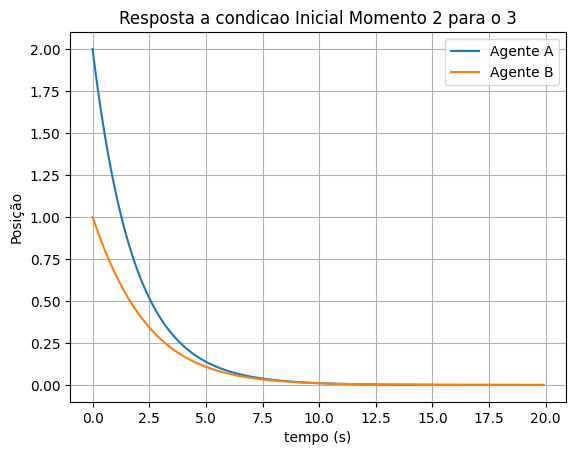

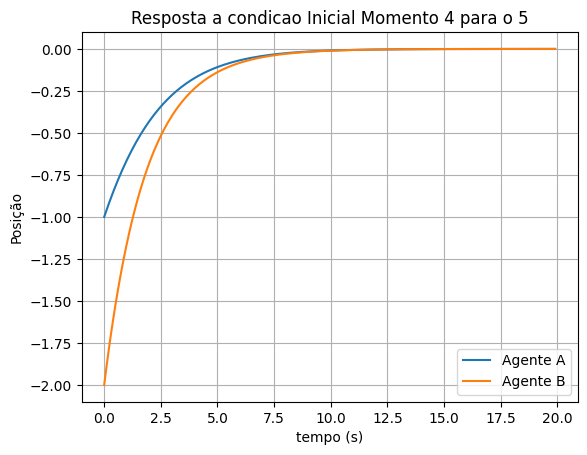

Constante de tempo do Integrador Unico
1.4285714285714286
w0(transposta):
  [0.57735027 0.70710678 0.70710678]
Matriz C:
 [1.15470054 0.70710678 0.        ]
Valor de consenso:
 1.861807319565799


In [3]:
%pip install control

import control
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Sistema de Integrador Unico 2 agentes
# Momento 1
# Momento 2
X0_initial_m2 = np.array([2, 1, 0])
X0_initial_m4 = np.array([-1, -2, 0])

a31 = 0.5
a12 = 0.1
a21 = 0.1
a32 = 0.5

# Matriz de Adjacência
Adj = np.array([[0, a12,0], [a21, 0,0],[a31,a32,0]])
print("Matriz de Adjacencia")
print(Adj)
AdjT = Adj.T

# Matriz Diagonal
D = np.array([
    [np.sum(AdjT[0]),0,0],
    [0, np.sum(AdjT[1]),0],
    [0, 0,np.sum(AdjT[2])],
    ])
print("Matriz Diagonal")
print(D)

# Matriz Laplaciana
L = D - Adj
print("Matriz Laplaciana")
print(L)

# Eigenstructure of Graph Laplacian Matrix
L = np.matrix(L)
autovalores_Laplaciano, autovetores_Laplaciano = np.linalg.eig(L)
print("Autovetores da Matriz Laplaciana")
print(autovetores_Laplaciano)
print("AutoValores da Matriz Laplaciana")
print(autovalores_Laplaciano)
# Como calular a Forma de Jordan em Python ??

# "Sistema" Laplaciano resultante
A_Laplace = -L
B_Laplace = np.array([[1], [0],[0]])
C_Laplace = np.eye(3)
D_Laplace = 0
sys_Laplace = control.ss(A_Laplace, B_Laplace, C_Laplace, D_Laplace)
print("Sistema Laplaciano")
print(sys_Laplace)

# Simuation Time
t = np.arange(0, 20, 0.1)
# Simulationa Initial
t1_lap_initial, y1_lap_initial, x1_lap_initial = control.initial_response(
    sys_Laplace, T=t, X0=X0_initial_m2, return_x=True)
# Simulation Impulse
t2_lap_initial, y2_lap_initial, x2_lap_initial = control.initial_response(
    sys_Laplace, T=t, X0=X0_initial_m4, return_x=True)

# Figures to Simulation Initial
plt.figure()
plt.title("Resposta a condicao Inicial Momento 2 para o 3")
plt.plot(t1_lap_initial, x1_lap_initial[0, :])
plt.plot(t1_lap_initial, x1_lap_initial[1, :])
# plt.plot(t1_lap_initial, x1_lap_initial[2, :])
plt.xlabel("tempo (s)")
plt.ylabel("Posição")
plt.legend(["Agente A", "Agente B"])
plt.grid()

# # Figures to Simulation Impulse
plt.figure()
plt.title("Resposta a condicao Inicial Momento 4 para o 5")
plt.plot(t2_lap_initial, x2_lap_initial[0, :])
plt.plot(t2_lap_initial, x2_lap_initial[1, :])
# plt.plot(t1_lap_initial, x1_lap_initial[2, :])
plt.xlabel("tempo (s)")
plt.ylabel("Posição")
plt.legend(["Agente A", "Agente B"])
plt.grid()

# show figure
plt.show()

# Calculo da constante de tempo (Frank)
tau_consensus = 1/autovalores_Laplaciano[1]
print("Constante de tempo do Integrador Unico")
print(tau_consensus)

# Calculo do Valor final de consenso (Frank)
# right eigenvector | # left eigenvector
# A*x     = lx      | # x*A  =  x*l
# A*x -lx = 0       | # 0    =  xl -xA
# (A -l)x = 0       | # 0    =  x(l-A)

# w1 = [p1 ... pn].T is the normalized left eigenvector of the Laplacian L for lambda1 = 0
# c = sum(pi*xi(0)); xi:= Initial condition
w = scipy.linalg.eig(L, left = True, right = False)[1]

# não consegui fazer a multiplicação de matrizes!!!
# w0 = np.transpose(w[0,:])
w0 = w[1,:].T
print("w0(transposta):\n ", w0)
#c = np.multiply(w0,X0_initial)
c = np.multiply(w0.T,X0_initial_m2)
print("Matriz C:\n", c)
print("Valor de consenso:\n" , c.sum())


# Caso de Exemplo 2


![image.png](data:image/png; base64, iVBORw0KGgoAAAANSUhEUgAADxAAAAhoCAYAAABYlcpsAAAMKGlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnltSSUIJICAl9CZIJ4CU0CNVOohKSAIJJcQkoGAviwpWVESxIqtiX5Uia0FEsbDYe1ks2NfFgg2VN0lQd/d9773vnXxz58+5//wz59xz7zcDAKOLJ5UWoFoAFEoUsoSIYFZaegaL9BiQAA2QgROw4/HlUk58fDSA9q3/u727ChBlf8lJqfXv9/+r6QiEcj4ASCbE2QI5vxDiNgAwKV8qUwBAcIF+y0kKqRInQawrgwuEWKTEuWo8VYmz1XipipOUEAJxPQBkGo8nywWAvhf6WSX8XKhDPw+xi0QglgDAUK4hgC/iCSAOgnhEYWGREivjsIN8KcQrIGZn/0Uz92/62d/1ebzc71gdl8rIoWK5tIBX+n+m5n9bYUHxtzlsYKOJZJEJyh7m8Hp+UZQSUyF+KMmOjRvyvxQLVHyl/5OoODIZqJKA4nx5SMYQ1hHwQqPUHJQlKYhVPnN9iB1yxOFctQ4aJFZwk77xhfKwRIhhFaHRsqKEobnQzBxZCEf5jCEW8WSqeXUhLivOT+YMjV0sEnKV+jjEa8tESakQEyHeWCJOiR3S3CLPT4wa4jeViUJihzgdsuKEb+s/I5REBA/h6zmycGXssHbQR4Vy1bzQj+mLxNwhTcxKIUqKVMeIefB5P9YvlHC+aV4XytOiv/kFwtCw7/FKkhO/caSK4IRvfmmB6v1QcwoihvKPBchLEsPUecAiFbA4h/wZUkX89xzm8UbHq/OGCUAG4AE5KABFQNKo215/hdZC7lSARJAP8oAQyEAhiIaMUthkIAqIVd4CUIaMATHKMdCjgL1MNeKRih8MGUqOAOrygWhIJRY8hCoK+HsH4qGaBCIeZBXAKwfkADFqCFGeCsN/qpE8kAuERA+iLWz2gAX7UKIP0ZXohevibJyDB+J+uCfuQ3hEuFhTVOqbIgKRQGx6HGqzoLrI9CwIhUpyIIWzCEFeToCSgxvjAbg/HB8M+6C/MJRR/ohJCIrhulkwCqFKrRRylEgM7/NVLAlkKCORqnIDI6KYUwIpbEoMxQE2N0oEg8xwYrAYbgxTbAPWgnVhh7FmmB3xUG7yYUaUmQmDSDXepdNls8tBl2suL1zqFcLJCmUxhRRJS2XiXJGCxYFfPCGLK+E7j2C5ubi5A6D8fqpfyTfnVN9FxCD7h69wAgCB0EvGfvh4jgCsnw9fseU/fHawjiwmA3BgFb9YVqL24coLAVaOJnyLDIEpsAR28AvtBryAHwiCKx4N4kASSAfjVc+pEK5/EpgKZoFyUAmWgpVgDdgANoNtYBfYB5rBIXAMnARnwXlwBdwCPaAXPAd9sA4GEAQhIXSEiRgiZog14oi4IWwkAAlDopEEJB3JQnIRCVKMTEXmIJVIFbIG2YQ0IL8gB5FjyGnkAnIDuYc8RV4jn1AMpaG6qAlqg45E2SgHjUKT0HFoLjoRLUPnoovRGrQO3Yk2ocfQs+gVtAd9jvZjANPA9DFzzAljYyFYHJaB5WAybDpWgVVjddhurBXrxC5hPdgL7CNOxJk4C3eC9RaJJ+N8fCI+HV+Ir8G34U14B34Jv4f34V8JdIIxwZHgS+AS0gi5hEmEckI1YQuhkXCCcIXQS3hHJBL1YQ17EyOJ6cQ84hTiQuI64h5iG/EC8QGxn0QiGZIcSf6kOBKPpCCVk1aTdpKOki6SekkfyBpkM7IbOZycQZaQZ5OrydvJR8gXyY/JAxQtijXFlxJHEVBKKUso9ZRWyjlKL2WAqk21pfpTk6h51FnUGupu6gnqbeobDQ0NCw0fjTEaYo2ZGjUaezVOadzT+EjToTnQQmiZtGLaYtpWWhvtBu0NnU63oQfRM+gK+mJ6A/04/S79A4PJcGZwGQLGDEYto4lxkfFSk6JprcnRHK9ZplmtuV/znOYLLYqWjVaIFk9rulat1kGta1r92kxtV+047ULthdrbtU9rP9Eh6djohOkIdObqbNY5rvOAiTEtmSFMPnMOs555gtmrS9S11eXq5ulW6u7S7dbt09PR89BL0ZusV6t3WK9HH9O30efqF+gv0d+nf1X/0zCTYZxhwmELhu0ednHYe4PhBkEGQoMKgz0GVww+GbIMwwzzDZcZNhveMcKNHIzGGE0yWm90wujFcN3hfsP5wyuG7xt+0xg1djBOMJ5ivNm4y7jfxNQkwkRqstrkuMkLU33TINM80xWmR0yfmjHNAszEZivMjpo9Y+mxOKwCVg2rg9VnbmweaV5svsm823zAwtYi2WK2xR6LO5ZUS7ZljuUKy3bLPiszqxirqVY7rG5aU6zZ1iLrVdad1u9tbG1SbebZNNs8sTWw5dqW2e6wvW1Htwu0m2hXZ3fZnmjPts+3X2d/3gF18HQQOdQ6nHNEHb0cxY7rHC+MIIzwGSEZUTfimhPNieNU4rTD6Z6zvnO082znZueXI61GZoxcNrJz5FcXT5cCl3qXW646rqNdZ7u2ur52c3Dju9W6XXanu4e7z3BvcX/l4egh9Fjvcd2T6RnjOc+z3fOLl7eXzGu311NvK+8s77Xe19i67Hj2QvYpH4JPsM8Mn0M+H329fBW++3z/9HPyy/fb7vdklO0o4aj6UQ/8Lfx5/pv8ewJYAVkBGwN6As0DeYF1gfeDLIMEQVuCHnPsOXmcnZyXwS7BsuDG4PchviHTQtpCsdCI0IrQ7jCdsOSwNWF3wy3Cc8N3hPdFeEZMiWiLJERGRS6LvMY14fK5Ddy+0d6jp43uiKJFJUatibof7RAti26NQWNGxyyPuR1rHSuJbY4Dcdy45XF34m3jJ8b/OoY4Jn5M7ZhHCa4JUxM6E5mJExK3J75LCk5aknQr2S65OLk9RTMlM6Uh5X1qaGpVak/ayLRpaWfTjdLF6S0ZpIyUjC0Z/WPDxq4c25vpmVmeeXWc7bjJ406PNxpfMP7wBM0JvAn7swhZqVnbsz7z4nh1vP5sbvba7D5+CH8V/7kgSLBC8FToL6wSPs7xz6nKeZLrn7s896koUFQteiEOEa8Rv8qLzNuQ9z4/Ln9r/mBBasGeQnJhVuFBiY4kX9JRZFo0ueiC1FFaLu2Z6Dtx5cQ+WZRsixyRj5O3KHThRrWr2K74p+J7JQEltSUfJqVM2j9Ze7JkclepQ+mC0sdl4WU/T8Gn8Ke0TzWfOmvqvWmcaZumI9Ozp7fPsJwxd0bvzIiZ22ZRZ+XP+m22y+yq2W/npM5pnWsyd+bcBz9F/LSjnFEuK782z2/ehvn4fPH87gXuC1Yv+FohqDhT6VJZXfl5IX/hmUWui2oWDS7OWdy9xGvJ+qXEpZKlV5cFLttWpV1VVvVgeczyphWsFRUr3q6csPJ0tUf1hlXUVcWremqia1pWW61euvrzGtGaK7XBtXvWGq9dsPb9OsG6i+uD1u/eYLKhcsOnjeKN1zdFbGqqs6mr3kzcXLL5UX1KfefP7J8bthhtqdzyZatka8+2hG0dDd4NDduNty/Zge4o3vF0Z+bO87tCd7Xsdtq9aY/+nsq9YG/x3me/ZP1ydV/Uvvb97P27D1gfWNvIbKxoQppKm/qaRc09LektFw6OPtje6tfa+Kvzr1sPmR+qPax3eMkR6pG5RwaPlh3tb5O2vTiWe+xB+4T2W8fTjl/uGNPRfSLqxKmT4SePd3I6j57yP3XotO/pg2fYZ5rPep1t6vLsavzN87fGbq/upnPe51rO+5xvvTDqwpGLgRePXQq9dPIy9/LZK7FXLlxNvnr9Wua1nuuC609uFNx4dbPk5sCtmbcJtyvuaN2pvmt8t+53+9/39Hj1HL4Xeq/rfuL9Ww/4D54/lD/83Dv3Ef1R9WOzxw1P3J4cehr+9Pyzsc96n0ufD7wo/0P7j7Uv7V4e+DPoz66+tL7eV7JXg68XvjF8s/Wtx9v2/vj+u+8K3w28r/hg+GHbR/bHzk+pnx4PTPpM+lzzxf5L69eor7cHCwcHpTwZT7UVwGBDc3IAeL0VnjfSAWDCMw11rPp8ozJEfSZTIfCfsPoMpDIvAFbNhLuXNgCUW9Iq5ZEC/jcJAkC5LYU+1N39exsyeY67m1qLZgS3Jm2Dg68HASBlAfCle3BwoGZw8Es1XOxbAI7Gqs9VSqP0Qo69El1e9MUA/MPUZ66/xPjPXrUSD/DP/l/Uclz9S+srkAAAADhlWElmTU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAAqACAAQAAAABAAAPEKADAAQAAAABAAAIaAAAAADEE97DAABAAElEQVR4AezdebRd4/k48DcRtKlQSgwNIUjEEEtKVooYQotqEDEkIaYuc1RqaqnVIlrUrEqIIREhQhIxpVFDS6kxVq1KK4uIJYbGTGoM9/t7r9+Nc87e595zzj73Zt/47LXuumc/+93vfs7nPfGH5z7nDcFBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQILCmBDkvqwVU8t6GKsYYSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaG2BXPfodmztd29+AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTaTkADcdtZexIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBVhfQQNzqxB5AgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoO0EOrXdo+rzpIaGhvpMZBYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECFQh06NChglH5GWIH4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWUADcWZCExAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIj4AG4vyshUwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBbQQJyZ0AQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iOggTg/ayETAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApkFNBBnJjQBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwIaCDOz1rIhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBmAQ3EmQlNQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCA/AhqI87MWMiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQWaBT5hlMQIAAAQIECBAgQIAAAQK5EPjss8/CAw88EB5++OHw2muvhVdffTW8/PLLoVOnTmHRokVh9dVXD2uuuWbj7z59+oRdd901dOvWLRe5S+KbKTBv3rxw1113hTlz5iz+zL7zzjuNGCussMLiz2v8nA4cODBsvfXWYdlll/1mYnnXBAgQIECAAAECBAgQIECAAAECBAgQIECAAIESAfXBEhCnuRdQH8z9EkmQAAECBAgQIECAAAECBJYygQ7t4P00FObY0FB0WnjJawIECBAgQIAAAQIECNQssP/++4fJkyen3n/IIYeE66+/PvVatcFzzjknnHbaaam3xQbJ+++/P/Vac8HHHnssXHfddWHSpEnhww8/bG5o4lrfvn3D3nvvHY455piw8sorJ643FxgzZkw4+uijU4fEhs/YvNyxY8fU69UE//73v4cBAwaUveV///tf6Ny5c+r19ddfP8ydOzf1Wr2Cw4cPDxMnTkxMFxtjBw0alIh37do1/Oc//6nau3Cia665Jhx++OGFoXDZZZeF4447bnHsT3/6Uxg5cuTi89Z+0aVLl/DBBx+0+JiFCxeGa6+9ttHsySefbHF84YD4jGh62GGHhZ122qnwktcECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoE1AfVB6v6wBQMVh/8CkN98OsPxeuvvx7eeOONxYE11lij8cuSFwe8IECAAAECBAgQIECAAIGlRqBDh0RLbiKQpzeb/S+58/Ru5EKAAAECBAgQIECAAIEaBZprvB03blz46KOPapy5+LY4V7njvffeK3cpNR6bNWPD6A9/+MMwduzYqpuH46SzZs0Kp59+eujevXu44YYbwpdffpn6rLRgbAQtd8yfPz/ExuZ6HLfeemuz03z++edlr7/55ptlr9Xrwvvvv586VWxsTjsWLFgQfv3rX6ddqjiWZl/6GS49r3jyGgdW8ry4Q3bv3r3DqFGjQrXNwzGt+Iybbrop7LzzzmG//fZrbFKvMd263zZ69OgQ/6dQ08+ll15a92eYkAABAgQIECBAgAABAgQIECBAgAABAgQIEKifQHO1DfXBdOe0GlXTSPXBENQHmz4NX/9emuuDTe8y1ov79esX4pd3N/2cdNJJTZf9JkCAAAECBAgQIECAAAECS1RAA/ES5fdwAgQIECBAgAABAgTai8C9996bOdXnnnsuzJkzJ/M8cYK4K+8mm2wSLr/88rrMF/9A4uCDDw7bbbddePvtt+sy52233ZZ5nkWLFtVt9+fMydRxgiuvvLJuDdZ1TKvVpvr0008bd6uOuwbHPx6pxxEby9ddd93QXFN+PZ5TyRwNDQ2JPJr7o6NK5jSGAAECBAgQIECAAAECBAgQIECAAAECBAgQWLIC6oPV+6sPljdTHyxvU+mVPNUHC3OOX/pdWgOt5ou7C+fymgABAgQIECBAgAABAgQI1FtAA3G9Rc1HgAABAgQIECBAgMBSKdDSLriVvOmpU6dWMqzFMU899VQYMGBAogiZdmOXLl3CxhtvHHr06JF2ORF75JFHwo9//OPw7rvvJq5VG5g4cWL44osvqr2taHzMZ2ltxPzZz34Wmts9uQiiHZ/E4vhhhx0WxowZU9G7iJ/VPn36hK5du1Y0/tBDD23cPbuiwa00KO6mPHfu3Faa3bQECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAkhBQH6xeXX2weTP1wXSf9lgfbHonN954Y5gwYULTqd8ECBAgQIAAAQIECBAgQCB3Ap1yl5GECBAgQIAAAQIECBAgkEOBm266KVx99dXhO9/5Ts3ZxeJh1uOFF14IAwcObHaao48+OgwaNChsv/32oXPnzkVj4zcfz5w5M8T388ADDxRdazqZNWtW2GWXXcJ9990XVlxxxaZw1b8XLFgQYgNw3NW41qMe31Je+uyePXuG1VZbrTRc8/lWW21V072zZ88Ol156aTjppJNqur+lm7bccsswYsSIloYtvp5W2I6NvJtvvvniMc29KPdv45RTTmn8vJW7t2/fvuGQQw5pbFzv1atX0bDYYP3oo4+Ge+65J8RvZS/XTB53z15uueXC0KFDi+5vi5O4S/YZZ5zRFo/yDAIECBAgQIAAAQIECBAgQIAAAQIECBAgQKANBdQHq8dWH2zeTH3wK5/2Xh9sWuVYu6+mHtt0n98ECBAgQIAAAQIECBAgQKAtBTQQt6W2ZxEgQIAAAQIECBAg0K4FZsyYEfbZZ5+a3sOzzz4b5syZU9O9TTctXLiwsbG3uSbK0aNHh7XXXrvplsTvbt26hfjN1vHnz3/+czj++ONT84o7qsbG1tg0neWI38xeawNxbMwcP358lsen3jt9+vSw0UYbpV5r6+DJJ58chgwZEtZbb726P3rnnXcO8afSIzaWxz/qKDxi8+8BBxxQGKrq9dixY8OFF16Yek/cYTg2UO+3336hY8eOqWOWXXbZxkb42Az/y1/+Mpx99tnh4osvTh07bNiwEJumN9hgg9TrrRGMuysfddRRIf63wUGAAAECBAgQIECAAAECBAgQIECAAAECBAgsfQLqg9Wvqfpg82bqg+27Pti0uvGLkIcPH9506jcBAgQIECBAgAABAgQIEMitQPpf6OY2XYkRIECAAAECBAgQIEBgyQlMnjy55odPmzat5nubbjz//PPD3Llzm06Lfl911VVh3LhxzTYPF93w/0523XXX8MQTT4QBAwaUXmo8j82fcffXLEdsAI6NwLUcDz30UNkdZ2uZL6/3HHfccXlNLVNeb775ZjjxxBNT54jfKv7Pf/6zccfgcs3DpTeussoq4aKLLgrN/TscOXJk6W11P4+f53/961/hrLPOChtuuGG49tpr6/4MExIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL5EGiuLtFShuqDLQklr6sPJk3aU2RprQ+mrUGsFcYv5XYQIECAAAECBAgQIECAAIG8C2ggzvsKyY8AAQIECBAgQIAAgdwIxG/L/uCDD2rK54YbbqjpvqabYuNwLEKmHTGvI444Iu1Si7GVVlqpcSfi/v37p47N2twad0v+29/+ljp3S8H4vr4Jx9133x1uu+22pe6t/uY3v0ltAI+ftfiZWGONNWp6z/vuu2+YOnVq6r1xF+XoWe8jNtLHnZJ79eoV4q7Im222Wfjtb39btqG/3s83HwECBAgQIECAAAECBAgQIECAAAECBAgQILBkBNQHq3dXH2zZTH2wZaPCEUuiPlj4/NLXDz74YDj77LNLw84JECBAgAABAgQIECBAgEAuBTQQ53JZJEWAAAECBAgQIECAQB4E9txzz0Qa99xzTyLWUuCZZ55JNBoOGjSopduKrl944YVF500no0aNCvvss0/TaU2/O3fuHC699NLUe2fNmhWefvrp1GtpwTSzWppjP//88zBx4sSiR/To0SP07NmzKNbeTnbbbbfQpUuXRNrHHntseO+99xLx9hqYP39+GDNmTGr6N910U1hhhRVSr1UaHDx4cNh9991Th8fduOt9xB2H4x8IzZkzp95Tm48AAQIECBAgQIAAAQIECBAgQIAAAQIECBDIkUBarUt9sPkFSjNTH/zaTH0whPZYH/x6BYtfvf3222Ho0KHFQWcECBAgQIAAAQIECBAgQCDHAhqIc7w4UiNAgAABAgQIECBAYMkKpDXmTpo0qeqkpk2blrgn7mZa6fHRRx+FCRMmJIbHhtrf//73iXgtgX79+oXhw4en3jpu3LjUeFpwp512SjTIxkbgzz77LG142VjcoTZ+O3nhcfDBBxeetsvX3bp1C5dcckki9wULFoS4Y+/ScsQ/Akg7rrvuurDeeuulXao6dt5556Xec+edd4bXXnst9ZogAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKA5AfXBr3TUB5v7lFR3TX1w6akPNjQ0hMMPPzzE2m7hcfXVVxeeek2AAAECBAgQIECAAAECBHIloIE4V8shGQIECBAgQIAAAQIE8iSwySabJHa8nT59enj33XcrTjMWEUt30o070G677bYVz3HHHXckmmnjzSeccEL49re/XfE8LQ08++yzU4eMHz8+NV4ueMghhxRdio3ADzzwQFGspZPJkycnhsRdZxctWpSIt7dA9BkwYEAi7T/+8Y/hiSeeSMTbWyB+5tN2AY6f+3JN6rW8x/jv86ijjkq99e67706NCxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEmhNQH/xKR32wuU9J9dfUB6s3S7tjSdcHx44dG0q/PPzUU08NO+64Y1q6YgQIECBAgAABAgQIECBAIBcCGohzsQySIECAAAECBAgQIEAgjwKff/55OOiggxKp3XXXXYlYucCsWbPC3Llziy7HAnGHDh2KYs2dzJw5M/XygQcemBqvNRh3hj355JMTt8cG4Hnz5iXiaYG40/C+++6buHTrrbcmYuUCn376aSjd6blnz55hs802q3on43LPWJLxjh07hlhcTjviN1a39ybpF198MfGZj+/1pJNOCssvv3za2645Vm7X5scff7zmOdNuHDp0aIhzlvupZ2N02vPFCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbYRUB/8yll9sL6fN/XB+nm2VX2wNOPnnnsuHHnkkUXhvn37hjPOOKMo5oQAAQIECBAgQIAAAQIECORNQANx3lZEPgQIECBAgAABAgQI5EYgNnIOGTIkkc/NN9+ciJULTJkyJXFpn332qapJ9NFHH03MEXfjXWmllRLxrIGBAwemTvHMM8+kxkuD0WzrrbcOXbt2LboUG4g/+eSToli5kwcffDCx4/KIESMah8cG5aXh6NWrVxg9enTirTz77LMh7kTcno9yn5VBgwbV/W2tueaaYauttkrM+49//CMRyxJYccUVQ79+/cr+xAZ3BwECBAgQIECAAAECBAgQIECAAAECBAgQIND+BdQHv17DcjWfr0d89Up9sFQk/Vx9MN2l2mhb1QcL8/r4449D2hcKT5w4MSy33HKFQ70mQIAAAQIECBAgQIAAAQK5E9BAnLslkRABAgQIECBAgAABAnkR+PLLL8NGG20U+vTpU5TSjBkzwltvvVUUSztpaGgIEyZMKLoUG2u32WabEK9Vcrz77rthzpw5iaH9+/dPxOoRWH/99VOnmT17dmq8NPjFF1+EZZZZJjQ1/DZdj99Sft999zWdNvs7bbfitEbuZidpBxfjbs9pjacnnHBCePnll9vBO0hP8amnnkq9sOmmm6bGswbjv9HSI35e4x+rOAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC1QioD36tpT74tUW9IpDXGgAAQABJREFUXqkP1keyreuDp512WohfBF14jBkzpvFvCQpjXhMgQIAAAQIECBAgQIAAgTwKdMpjUnIiQIAAAQIECBAgQIBAHgTiHwjE48ADDwynnHJKUUp33HFHOOyww4pipSdPPvlkmD9/flH4gAMOaGywjY22lRzz5s1LHZa262rqwCqD3bt3T73j/fffT42XBpvM4i7LF154YdHlyZMnh5/+9KdFsdKTuEtxaQPxxhtvHHr37l06tObzmTNnhpdeeqnm+5tu7NChQ9hpp53Csssu2xSq6vfyyy8frr/++saG8tIbjz/++HD77beXhtvF+fPPP5/Ic8CAATU7JSYrCaQ1YcchsWl95ZVXLhntlAABAgQIECBAgAABAgQIECBAgAABAgQIECBQXqCp1qU+GIL6YPJzoj6YNImRpbk+ePfdd4dLLrmk6I0PGjQoHHHEEUUxJwQIECBAgAABAgQIECBAIK8CGojzujLyIkCAAAECBAgQIEAgNwJ77713ooF40qRJLTYQT506NfEeYmNtNUe5wvw666xTzTQVj11uueVCjx49wty5c4vueeedd4rOWzrp169f6NatW1EDddyNOX4Tc+fOncvefv/99zc2fhYOKN3NuPBaLa9HjRpVy22p9zz33HMhNjjXemy99dbhmGOOCVdccUXRFNOnTw/Tpk0LgwcPLoq3h5O0z0q5na3r8X422GCD1Gnee+89DcSpMoIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBASwLqgyGk1Xyac1MfbE7n62vqg19b1PqqreqDr7/+ehg2bFhRml26dAnXXHNNiM3kDgIECBAgQIAAAQIECBAg0B4EOraHJOVIgAABAgQIECBAgACBJSkQmx9Ld/z9y1/+Et54442yacVvJ4+7yxYeXbt2Df379y8Mtfg6NkGmHSuttFJauC6xXr16JeYpl0di4P8PdOzYsXHn5tLrcfff5o7S3Yfj2CFDhjR3S7u/9rvf/S7Ez0bpcdRRR4UPPvigNJz787fffjuRY2vuBLzeeuslnhcDcQdiBwECBAgQIECAAAECBAgQIECAAAECBAgQIECgFgH1wRDUB2v55FR2j/pgZU7lRrVFfTDW+w899NBEzfGWW25Jre2Wy1WcAAECBAgQIECAAAECBAgsaQENxEt6BTyfAAECBAgQIECAAIF2ITB8+PBEnnGX2HLHE088ERYsWFB0+eCDDw6xsbaaY+HChanDV1xxxdR4PYKdOnVKTLPMMsskYi0F0nZbjjs3lzs+/vjjMH78+KLLffr0CRtuuGFRbGk7+e53vxuuvPLKxNuKn58zzjgjEc974K233kqk2JoN7+U+m9X+W0skLUCAAAECBAgQIECAAAECBAgQIECAAAECBAh8owXUB9UHW+sfgPpgNtm2qA9ecsklofTLsUeOHBl22223bMm7mwABAgQIECBAgAABAgQItLFAdX+53sbJeRwBAgQIECBAgAABAgTyIrD33nsnUpk4cWIi1hS47bbbml4u/l3LTrrLL7/84vsLX7TmzrQvvvhi4aMaX6+yyiqJWEuBvn37hh49ehQNmzx5cijXFH3fffcVjY0nI0aMSMTyFOjQoUNd0omfrz333DMx18UXXxyefvrpRDzPgfgHD6XH+++/Xxqq2/krr7ySOldaHqkDBQkQIECAAAECBAgQIECAAAECBAgQIECAAAECKQLqg+qDKR+LoD6YVEmry7Xn+uCsWbPCiSeeWPRGe/bsGc4777yimBMCBAgQIECAAAECBAgQINAeBJLbSrWHrOVIgAABAgQIECBAgACBNhZYZ511wjbbbBMeeeSRxU9++OGHw6uvvhq+//3vL47FF1988UWYMGFCUaxbt26hX79+RbFKTlZeeeXUYfPmzQurrrpq6rUswYaGhjB79uzEFGlF38SgkkAsnscG4DPPPLPoyowZM8K+++5bFIsnsbm49Bg8eHBpKPN5XJuNNtoo8zxxh9tevXplnqdpgssvvzyk7Wp9xBFHhMcffzyk7QzddG+efqc1m7/wwgutlmL8t5B2tOYu3WnPEyNAgAABAgQIECBAgAABAgQIECBAgAABAgSWLgH1weSXxra0wuqDLQkVX1cfLPao9Kw164Pxy7DTatmTJk0KnTt3rjRF4wgQIECAAAECBAgQIECAQG4ENBDnZikkQoAAAQIECBAgQIBA3gWGDx9e1EAc87399tvDscceW5T6Y489FhYsWFAUO/DAA2v6NupyjbsvvfRS2HLLLYueUY+T//73v6nTpDWFpg4sCcZvZi9tIL7lllsSRdePPvoo3HjjjUV3b7XVVmH99dcvitXjJLrVo4G4HrkUzhGbzOMfCYwcObIwHOI3XI8ZMyYRLxqUo5PVVlstkc3zzz+fiNUrEP8tpB1dunRJC4sRIECAAAECBAgQIECAAAECBAgQIECAAAECBCoWUB+smGrxQPXBxRQtvlAfbJEodUBr1gdHjRoV5s6dW/Tc888/P2yxxRZFMScECBAgQIAAAQIECBAgQKC9CHRsL4nKkwABAgQIECBAgAABAktaYK+99kqkcPPNNydiU6ZMScSGDBmSiFUSKLcDcWnRspK5KhnzyiuvpA6rdafdPn36hJ49exbNGX3ef//9oti9995bdB5Phg0blogt7YGjjjoqxMbp0uO4444L8+fPLw3n8vx73/teIq85c+aERYsWJeL1CKT9W4ifu/gN9w4CBAgQIECAAAECBAgQIECAAAECBAgQIECAQBYB9cHq9dQHqzNTH6zOK45urfrgrbfeGq699tqihAYOHBh+8YtfFMWcECBAgAABAgQIECBAgACB9iSggbg9rZZcCRAgQIAAAQIECBBYogJrrbVW2GGHHYpyeOSRR8LLL7+8OBabJCdOnLj4PL6I3xz9gx/8oChW6cm6664b0nZSffHFFyudoqpxDz/8cOr4LLsdjxgxIjHnPffcUxSLxdjSI347+TftWGaZZcI111yT+rZ//vOfp8bzFiz3WXn11Vfrnmrcufqhhx5KzLvtttsmYgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWoF1AerFftqvPpg5W7qg5VbxZGtWR+MOw2XHvHLn2P99qqrrir7c91115XeFmbNmpUYnxgkQIAAAQIECBAgQIAAAQIE2kBAA3EbIHsEAQIECBAgQIAAAQJLj8Dw4cMTb2batGmLY48++mhYsGDB4vP44tBDD615N9RYMN5uu+2K5osn06dPbyyOJi5kCMTm54svvjgxQ9euXUP844haj7Tdlwt3bl64cGG46aabiqbv379/6N69e1Hsm3ISv5X99NNPT7zd+Dm78847E/G8BdJ2UI45tkbut9xyS/jwww8TBPHz4yBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1ENAfbB6RfXB6szUByv3auv64HnnnRfiLtHN/ZxzzjmJNzBnzpzEPYlBAgQIECBAgAABAgQIECBAoA0ENBC3AbJHECBAgAABAgQIECCw9AjsueeeiTdT2Px62223Ja4PHjw4EasmsM022ySGxybl66+/PhHPEogNnvPnz09MkXUn4N69e4dY9C484rPefffdxtDMmTMLLzW+PuCAAxKxb1Lg1FNPDT169Ei85WOOOSbEhus8H5tvvnlqeqNHj65r03tDQ0O44IILUp+1/fbbp8YFCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLVCqgPVisWgvpg9Wbqgy2bqQ+2bGQEAQIECBAgQIAAAQIECBAoFdBAXCrinAABAgQIECBAgAABAs0IxN14d9lll6IRTz75ZHjxxRdD3MF33LhxRddiE+gWW2xRFKv2ZNCgQam3nHXWWeHjjz9OvVZLMG334TjPYYcdVst0RfekNQQ37Ug7efLkorHxZK+99krEvkmBzp07h7Fjxybecmzwjuue52P55ZcP++23XyLFeje9//Wvfw2zZ89OPGf33XcP66yzTiIuQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoRUB9sBa1ENQHq3NTH2zZS32wZSMjCBAgQIAAAQIECBAgQIBAqYAG4lIR5wQIECBAgAABAgQIEGhBYOjQoYkRU6dODQ8//HD48MMPi64ddNBBRee1nGy66aZhhx12SNxaz4bMp59+ujH/0ofEnYO32mqr0nDV52m7GE+aNKnRq7SBOO643K1bt6qfsbTdMHDgwHDIIYck3tb5558fHn/88UQ8T4G4U3LaUc+m93IN70ceeWTao8UIECBAgAABAgQIECBAgAABAgQIECBAgAABAjULqA9WT6c+WL2Z+mDzZq1dH+zfv3+Itepqf2JNPe0onSdtjBgBAgQIECBAgAABAgQIEGhtgU6t/QDzEyBAgAABAgQIECBAYGkT2GOPPRJv6cYbbwzz5s1LxNMK44lBFQRGjhwZ4jcqlx5nnnlmiDsUr7322qWXKj6PTc/lGp1PO+20iudpbuAGG2wQ+vbtG2bNmrV42IwZM8L48eMXnze9SPs28qZr37TfsVl4ypQpicb02Hyd52O77bYLG2+8cWKH4Nj0fs4552TeRXnChAmhaQfrQof4zN12260w5DUBAgQIECBAgAABAgQIECBAgAABAgQIECBAILOA+mD1hOqD1ZvFO9QH093aoj542WWXpT+8hehbb70VVltttaJR8UsHbr755qKYEwIECBAgQIAAAQIECBAgsCQE7EC8JNQ9kwABAgQIECBAgACBdi2wyiqrNDbtFr6JZ599NlxxxRWFodCzZ8+w2WabFcVqPdlzzz1TdwKODZlxd+LXXnutpqk///zzcPDBBycaPeNku+yyS9h///1rmjftpgMPPDARPu644xKx+F4dXwmsuuqq4corr2x3HB06dAjnnntuat6jR49u/MOH1IsVBB955JGyDe9jx44NnTr5rrQKGA0hQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqhBQH6wCq2Co+mABRoUv1QeTUOqDSRMRAgQIECBAgAABAgQIECBQqYAG4kqljCNAgAABAgQIECBAgECBwLBhwwrO0l+OGDEi/UIN0dgUed1116XeOXfu3LDFFluEuCttQ0ND6pi04L///e+wzTbbhGnTpqVdTjREpw6qIljJbsyxGXqttdaqYtalf+jw4cMbm7nb2zuNO2On/VFIfB+nnHJKYxPwq6++WvHbWrRoUfjDH/4Qtt1229R7jj766LD11lunXhMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQVUB+sXlB9sHqzeIf64Fdu6oO1fX7cRYAAAQIECBAgQIAAAQIECgVsy1Oo4TUBAgQIECBAgAABAgQqFPjJT37S4sghQ4a0OKaaAZtuumk455xzwqmnnpq4Le5EHP9o4aKLLgqxcflHP/pR2GijjRLjPvvss/DAAw+EW2+9tWxDcrxp+vTpoUePHon7swS6d+/e2LAcvyG63BGL4a19jBo1Kqy55pp1e8yyyy4bLrvssvCtb32rbnMWThR38427W6+//vqF4Xbx+uKLLw733ntviJ/P0mPChAkh/owcOTLsuuuuYfvttw8rrLBC6bAwb968MHXq1HDttdem7pQdb4iN5xdccEHiXgECBAgQIECAAAECBAgQIECAAAECBAgQIECAQL0E1Aerl1QfrN4s3qE+qD5Y2yfHXQQIECBAgAABAgQIECBAICmggThpIkKAAAECBAgQIECAAIEWBVZaaaUQG4SnTJmSOnbjjTcOvXv3Tr2WJfirX/0qfPLJJ+HMM89MnebJJ58M8SceXbp0aWyUbWpsfeedd8L8+fNT7ysMTp48Oeyxxx6Fobq9jk3OzTUQt9ZzC9/AzJkzC0/r8vrcc89ttQbimGBs5o4NsieddFJd8m2rSVZdddXG9d5xxx3LfvYuv/zyEH/i0bVr19CtW7ewcOHCEHfdfuWVV8KHH37YbLr9+/cPd9xxR+jcuXOz41wkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQRUB+sTU99sDY39cHybuqD5W1cIUCAAAECBAgQIECAAAECpQIdSwPOCRAgQIAAAQIECBAgQKAygf3337/swLgLcGsdZ5xxRuOOty3NHxsv58yZE5599tnGn0qah2+++eaw7777tjR1zdcHDx5c9t64a/Lqq69e9vo3/cLxxx8f+vTp0+4YNthgg/D444+H2FTf0hF3Kp41a1bj53b27NktNg/HnYdnzJjR2Czf0tyuEyBAgAABAgQIECBAgAABAgQIECBAgAABAgT+j707D7KqvPMG/gO6m6WbTdGIARUT1Bj1FQMxkSRqglFcMMTdLGomNZnUjDOWyUiZxHIm88fkHafemqnJWJWMWxQFpUGQgAsaTSRqlBIjcYk7ghqJiIiorP1yeoL2uec2vdDncPvez6nq4T6/85xn+TxkKp3uL2dnBfx8sOuCfj7YdbPtT/j54HaJD//088EPLXwiQIAAAQIECBAgQIAAAQKdERAg7oySPgQIECBAgAABAgQIECgjMHny5DLV/y3t6Afh7T7UhRsXXnhhLF68OCZMmNCFp9rveuqpp8ZLL70UZ599dvudeuDO3nvvHckPdctdec9dbs7eVEveyHv11Vf3piV/sNbk3B966KG4/PLLP6jtzIfk7drXXntt3HPPPTFs2LCdGcqzBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFOC/j5YKepPujo54MfUHT5g58Pfkjm54MfWvhEgAABAgQIECBAgAABAgS6IiBA3BUtfQkQIECAAAECBAgQqFqBpqamzN4GDhyYqbUtJM+ce+65bUutn5O3xB544IGZettCubEbGxvbdunw88SJE1tDmdOnT+/2m2mTX3K47bbbYu7cubHvvvt2OGfbDoMGDWrbbP1crlbaqZxZ0mfKlCmlXTPtcueU/OC8vWvo0KHt3erRerk1lLPo6hmXLnL8+PFx8cUXl5Zb2+XmK9uxnWK5IO7Ojtl2quSH+snbs5cvXx5/9Vd/1a23Bo8aNSqmTZsWL7zwQpx//vnRt29l/M8a5f7z3JN2bR19JkCAAAECBAgQIECAAAECBAgQIECAAAECBHpGoNzPncr9b/5tZ/PzQT8f3P73wc8Ht0u0/2c1/3yw7a7r6+vbNls/7+zPhTMDKhAgQIAAAQIECBAgQIAAgW4K9Onmc0U+1tJ2spaWVLPtLZ8JECBAgAABAgQIECBQ0wKvvPJK3HnnnXHvvffGypUr49VXX43XXnst1q1b1xrWHDNmTIwcOTKSEOakSZPi+OOPj+HDh9e0mc3vOoFNmzbFgw8+GLfffnssW7as9e9q8vd21apVrYtK/p4mofbkX6X/5Cc/GaecckqMGzcu+vTpDf9Txq5zNTMBAgQIECBAgAABAgQIECBAgAABAgQIECBQOwJ+Plg7Z10NO/XzwWo4RXsgQIAAAQIECBAgQIAAgTK/x1rRv9ha0Yv7y1+nVGJYgNh/yAgQIECAAAECBAgQINA1geT7qDLfrHZtEL0JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOgVAn4+2CuOySIJECBAgAABAgQIECBAgACBXihQ5neyKzqj27cXGlsyAQIECBAgQIAAAQIECHRBoMw3ql14WlcCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBHqTgJ8P9qbTslYCBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECAsSFk5uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH4CAsT52RqZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOECdYXPaEICVSbw2ur18cSLq+PF196Ot9dvbP1au35DbNnSUmU7LWY7/fr1iaGN/WNIY0Pr15iRQ+KTY3aPkbs3FrMAsxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgV4u0KcXrD+VwmxpSTV7wfItsRoFNmzcEouWvBy/f+6N+NO2ALErf4G9dh8U/+fje8Rx4/eJ/g398p/QDAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4C8CffpkIrmZQiVhVfTi/gKVSgwLEFfSX5/aXMvd24LDix55Od59f3NtAuziXQ8aUBfHTdgnJm0LErsIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEARAgLEPa8sQNzzpkbshsCLr74d0+96OlatebcbT3ukpwX2HD4ovv7lg2LM3kN6emjjESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBlIAAcYqjRxoCxD3CaJCdEXjkqdfj+jueaneI/fbeLfbbe3iMGN4UjQMbYtCAhqiv69tufzfaF9i0ecu2tztvivXvbYw31rwTL726ZtvXm+0+8M0TPhETPvGRdu+7QYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7Qo8u/KteHbFW/Hy6+taXya1dv3G2LhpS+2C9MDOG+r7xdDGhkheCrXPRwbH2NHDYuyoYT0wsiEIECBAgAABApUtIEDc8+cjQNzzpkbsgsCdv1sev3zgxcwTDXX94lOfHB2HH7j3trBwv8x9hZ4TSELFj/3x1VjyxIpIPpdeJx81Jo4/ct/SsjYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAjUosGbdhlj8+Kvx8JN/irfe2VCDAsVveVhT//j0wXvF5w7bO4YP7l/8AsxIgAABAgQIEChAQIC455EFiHve1IidFGjvzcPjDvpofPqQfaJ/Q10nR9KtJwQ2bNwcD//h5Vj69CuZ4byJOEOiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCmBDZv2RoLH3wpFj3yck3tu9I2e9yEfeLEz+4Xdf36VtrSrIcAAQIECBAgsFMCAsQ7xVf2YQHisiyKeQu8+Orb8f9ufjQzzbETPh6Hjh2ZqSsUJ7Ds2dfi3keey0x48VlHxJi9h2TqCgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVLfAUy+9GbPufTb+/NZ7HW60T9Kj9f902FWHUoFtCY9UyKP0/l/aewwbGGccOzY+sd9u7fRQJkCAAAECBAj0PgEB4p4/s9R/t2xpSTV7fjYjEviLwL9c93CsWvNuyuMrxx4S+4wcnqpp7BqBl19bE3Pv/UNq8j2HD4rLzv90qqZBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEB1C9y3dGXMvi/7gqJk1w31/WL/UbvH6I8Miz12a4ohjQNaa9Utku/uNm7aEm+vfz/+/OY7seL1t+KFlasjqZW7Tjvm43HMuFHlbqkRIECAAAECBHqdgABxzx9ZKjEsQNzzwEbMCty95OWYd/8LqRvePJziqIjG49veRHxfyZuIT/38/jFp/D4VsT6LIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgX4E7frc8FjzwYmaSoU0DYtxBo+LQsXtFmaBHpr9C9wWSnMeyZ/8US59eGWvfeT8z0ElHjYkTjtw3U1cgQIAAAQIECPQ2gTL/vbJPJe+hbyUvztoI7AqBDRu3xKJHXk5NPe6gj277xnFkqqax6wUO23Ymydm0vZKzS87QRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAdQskbx4uFx7+1CdGxXlTJsRhB4wUHi7gr0ASpEmsE/PEvvRKzig5KxcBAgQIECBAgECxAgLExXqbrRcILNr29uF339/8wUrr6/rFpw/xRtsPQCrsQ3I2DdvOaPuVnF1yhi4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBKpX4KmX3ozZ9z2X2mDfvn1i8uc+ERPHjUnVNYoTSOyTM0jOou2VnFVyZi4CBAgQIECAAIHiBASIi7M2Uy8R+P1zf06tdPwnR0f/hrpUTaNyBJKz+dS2M2p7/f65N5nIKBoAAEAASURBVNo2fSZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoIoENm/ZGrPufTa1oySweuoxh8TYfUak6hrFCyRnkJxFaYg4ObPk7FwECBAgQIAAAQLFCAgQF+Nsll4i8Nrq9fGn1e+mVnv4gXun2hqVJ1B6Rn/ado7JWboIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKg+gYUPvhR/fuu91MaOP+qgGL3XsFRNY9cJJGeRnEnbKzmz5OxcBAgQIECAAAECxQgIEBfjbJZeIvDEi6tTK91v792ivq5fqqZReQLJGSVn1fYqPcu293wmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKB3CqxZtyEWPfJyavGf+sQobx5OiVRGI3kTcXI2ba/k7JIzdBEgQIAAAQIECOQvIECcv7EZepHAi6+9nVrtfnsPT7U1Kleg9KxKz7JyV25lBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0VmDx46+mug5tGhATx41J1TQqRyA5m+SM2l6lZ9j2ns8ECBAgQIAAAQI9JyBA3HOWRqoCgbfXb0ztYsTwplRbo3IFSs+q9Cwrd+VWRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAZwUefvJPqa7jDkq/4TZ1U6MiBErPqPQMK2KRFkGAAAECBAgQqEIBAeIqPFRb6r5Aaei0cWBD9wfzZKECpWdVepaFLsZkBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0uMCzK9+Kt97Z8MG4DfX94tCxe33Q9qEyBZIzSs5q+5WcYXKWLgIECBAgQIAAgXwFBIjz9TV6LxNYu/7DbyaTpQ8aUN/LdlC7yx00IB32Lj3L2pWxcwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLVIfDsinTodP9Ru0efPn2qY3NVvIvkjJKzanuVnmXbez4TIECAAAECBAj0jIAAcc84GqVKBLZsaUntpL7uw3/lKHVDo+IE6uvS/++s9CwrbsEWRIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAlwRefn1dqv/ojwxLtTUqV6D0rErPsnJXbmUECBAgQIAAgd4rkE7c9d59WDkBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQxQKr1ryb2t0euzWl2hqVK1B6VqVnWbkrtzICBAgQIECAQO8VECDuvWdn5QQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoGYE1q7fmNrrkMYBqbZG5QqUnlXpWVbuyq2MAAECBAgQINB7BQSIe+/ZWTkBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgJgZZtu9y4acsHe+2z7VNDfb8P2j5UtkByVsmZbb/anuX2mj8JECBAgAABAgR6VkCAuGc9jUaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0tECSIG57tU2jtq37XLkCzqxyz8bKCBAgQIAAgaoUECCuymO1KQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVoVECCu1ZO3bwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoUECCuymO1KQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVoVECCu1ZO3bwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoUECCuymO1KQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVoVECCu1ZO3bwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoUECCuymO1KQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVoVECCu1ZO3bwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoUECCuymO1KQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVoVECCu1ZO3bwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoUECCuymO1KQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVoVECCu1ZO3bwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoUECCuymO1KQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVoVECCu1ZO3bwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoUECCuymO1KQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVoVECCu1ZO3bwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoUECCuymO1KQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVoVECCu1ZO376oUeOA398QBe9Vlvr505AHR0tLS7T2vf2ddZsx/+eFF3R7Pg10TuP322+PKK6+MTZs2de1BvQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgJgUEiGvy2G26WgVmz7yu7NZWLH8hli55qOy9zhS3bt2a6fb+e+9magr5CBx33HHxb//2bzF27Ni49tprY8uWLflMZFQCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqAoBAeKqOEabIBCxdu2amD9nRrsU82ff1O69jm4MGtSY6dI0eEimppCPQF1dXUybNi2WL18e3/rWt+Lggw+OmTNn7tRbpfNZqVEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBIEBIgr4RSsgUAPCNw5f/YOR5nbPD02bHh/h33au9lvW4C19Bo8ZGhpSTtHge9+97sxcuTI1hmeeeaZOOecc+Kwww6L+fPn5ziroQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgNwoIEPfGU7NmAmUEbp5+VZnqh6X176yL+39154eFLn7afcSeqScamwan2hr5C1xyySWpSf7whz/ElClTYsKECXHXXXel7mkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBZAg/85p44YK+6zNeXjjwgWlpaur3Y5HfFS8f9lx9e1O3xPEiAAAECBAgQIFAdAgLE1XGOdlHjAs8981Qse2xJhwq3zrqhwz7tdRi+24jUrabBQ1JtjfwFvvOd78SIEelzSGZdsmRJHH/88fH5z38+HnroofwXYgYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLosMHvmdWWfWbH8hVi6pPu/B7x169bMuO+/926mpkCAAAECBAgQIFBbAgLEtXXedlulAvOab+zUzhYtnBtvrVndqb6lnYYMG5YqCRCnOAppDBw4ML73ve+1O9fixYvjs5/9bEyePDmWLl3abj83CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoVmDt2jUxf86MdiedP/umdu91dGPQoMZMF7/vnSFRIECAAAECBAjUnIAAcc0duQ1Xm8CWzZuj+aZrMtu6vnlRppYU7lpwa9l6R8UhQ9IB4samwR094n4OAn/3d38Xw0rC3KXT3HHHHXHEEUfE1KlT48knnyy9rU2AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQMECd86fvcMZ5zZPjw0b3t9hn/Zu9qury9waPGRopqZAgAABAgQIECBQWwICxLV13nZbhQK/vf+eWP3GqtTOPn7AwfGZzx0bx534lVQ9acy55fpMrTOF0m8gm5qGdOYxfXpYoKmpKf7+7/++U6POnTs3Dj300Dj33HPjueee69QzOhEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0PMCN0+/aoeDrn9nXdz/qzt32GdHN3cfsWfqthdGpTg0CBAgQIAAAQI1KSBAXJPHbtPVJDBnxnWZ7Zxx7gWttZOnnp259+jDD8TyF7seJi0NEDc2NmXGVihG4KKLLorGxsZOTbZ169aYMWNGjB07Nr797W/HK6+80qnndCJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoGcEnnvmqVj22JIOB7t11g0d9mmvw/DdRqRuNQ32wqgUiAYBAgQIECBAoAYFBIhr8NBtuXoE3lqzOhbeNiuzoRNPPbO1dsyXJmfuJYUFc28uW99RcfDgoanbTYMHp9oaxQkMHz48Lrzwwi5PePXVV8eoUaNan121Kv3W6i4P5gECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDolMK/5xk71W7RwbiS/I96da8iwYanHBIhTHBoECBAgQIAAgZoUECCuyWO36WoRuGP+7MxWJh49KT4y8qOt9YGDGuOUr56T6TN75i+ipaUlU99RoTQw3NgkQLwjr7zvfe9734uBAwd2a5qf/vSnsd9++8Ull1wSb775ZrfG8BABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAh0LbNm8OZpvuibT8frmRZlaUrhrwa1l6x0VhwxJB4j9vndHYu4TIECAAAECBKpfQIC4+s/YDqtYYFaZbySnnvnN1I5P+spZqXbSWLH8hfj9ow9n6jsqlP4LVIMam3bU3b2cBUaMGBF//dd/3e1Z3nvvvbjiiitag8SXX355vP32290ey4MECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJQX+O3998TqN1albn78gIPjM587No478SupetKYc8v1mVpnCoOHDE11a2oakmprECBAgAABAgQI1J6AAHHtnbkdV4nAM08/EcseW5LZzaQTpqRqyRuJy/3rUbfNvinVr6NG0+D0N5QNDf07esT9nAWmTZsWDQ0NOzXLunXr4sc//nGMGTMmfvKTn8S77767U+N5mAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBDwXmzLjuw8ZfPp1x7gWtn06eenbm3qMPPxDLX3wuU++oUBogbvTCqI7I3CdAgAABAgQIVL2AAHHVH7ENVqvAbc03Zrb21bPOi9I3A/fvPyBOnHJGpu+t2/5lqo0bN2Tq7RWOnHh0/PTqWa1fP7thXnvd1AsUGDlyZFxwwf/+jwc7O+2bb74Zl156aey///7xn//5n9v+bmzc2SE9T4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCmBd5aszoW3jYrY3DiqWe21o750uTMvaSwYO7NZes7Kg4ueWFU0+DBO+ruHgECBAgQIECAQA0ICBDXwCHbYvUJbN60KWbPvC6zsSmnnZupJYXJZQLE699ZF4vvW1S2f7niXiNHxZdPmtr6dexxJ5XrorYLBJLQb11dXY/N/Prrr8dFF10UH/vYx+LnP/95bN68ucfGNhABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBWhK4Y/7szHYnHj0pPjLyo631gYMa45SvnpPpM3vmL6KlpSVT31GhNDDc2CRAvCMv9wgQIECAAAECtSAgQFwLp2yPVSew+NeLYvUbq1L72n3EnnHkUUenatsbn5l4TJT7BnDerOnbu/izlwrsu+++8bWvfa3HV79y5cr4zne+EwcddFBMnz49tm7d2uNzGJAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBANQvMuumazPamnvnNVO2kr5yVaieNFctfiN8/+nCmvqNC0+AhqduDGptSbQ0CBAgQIECAAIHaExAgrr0zt+MqELj15uszuzj9nAuiXztvoq2rr4/SbzSTAW6f3xxr167JjFUthT59+kQtfP3iF7/I7cief/75+MY3vhGHHHJIzJkzJ7d5DEyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgmgSeefqJWPbYksyWJp0wJVVL3khc7mVRt82+KdWvo0bT4KGpLg0N/VNtDQIECBAgQIAAgdoTECCuvTO3414u8ObqP7cGf0u3cfLUs0tLqfbkKaen2tsbdy24dftHfxJoV+Cpp56K0047LY444ohYsGBBu/3cIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAg4rbmGzMMXz3rvCh9M3D//gPixClnZPreesv1sXHjhky9vcKRE4+On149q/XrZzfMa6+bOgECBAgQIECAQA0JCBDX0GHbanUIJG8NLr0OPPjQSL52dB0x4ajYfcSemS6zZ16XqSkQaE+goaEh6tp503V7z6gTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqCWBzZs2Rbnf055y2rllGSaXCRCvf2ddLL5vUdn+5Yp7jRwVXz5pauvXscedVK6LGgECBAgQIECAQI0J1NXYfm2XQK8XaL7xmswe/vjksrjkwvMz9dLC6jdWlZbi0YcfiBXLX4jR++6fuadAYLvApEmT4rLLLosvfOEL20v+JECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgjMDiXy+K0t/dTl4GdeRRR5fpHfGZicdEY9PgSELDba95s6bHF798ctuSzwQIECBAgAABAgQ6LSBA3GkqHQnseoEkKPzEsqVlFzJ32zeH3b0WzL05/uYfLu3u4xX7XEtLS8WuracW9vrrr8fo0aNj07Z/pSyP66STTop/+qd/ivHjx+cxvDEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVJ3ArTdfn9nT6edcEP3qykc46urrY+qZ34zp1/x36rnb5zfHj9euiaFDh6fqGgQIECBAgAABAgQ6I9C3M530IUCgMgTmNd+Yy0Jm3XRt1ELYNhe8XTzo5Zdf3uPh4T59+sRpp50Wjz/+ePzyl78UHt7FZ2x6AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB3iPw5uo/RxL8Lb1Onnp2aSnVnjzl9FR7e+OuBbdu/+hPAgQIECBAgAABAl0SECDuEpfOBHadwKZNG2PG9T/LZQErlr8Qyx5bksvYBs1PYOXKlXHVVVf12AT9+vWLr3/96/HUU09Fc3NzHHrooT02toEIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1IJAufDwgQcfGsnXjq4jJhwVu4/YM9Nl9szrMjUFAgQIECBAgAABAp0RqOtMJ30IENj1AovvWxTr31mXWciJU87I1DoqLLxtVqbLL2+dGYeNm5CpK1SuwA9/+MPYsmXLTi+wvr4+zjvvvPjBD34QY8aM2enxDECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgVgWab7wms/U/PrksLrnw/Ey9tLD6jVWlpXj04QcieWHU6H33z9xTIECAAAECBAgQILAjAQHiHem4R6CCBJpnXJtZzeRTTo//+PmMTL2jQn1DQ8xrvjHVbdZN18Q/XvavUV/fkKprVKbA008/HdOnT9+pxQ0YMCC+/e1vx7Rp02LUqFE7NZaHCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECNS6QBIUfmLZ0rIMc2d1/3d/F8y9Of7mHy4tO64iAQIECBAgQIAAgfYE+rZ3Q50AgcoRSP4lqUUL52YWdOoZX8/UOlM4YVvwuPRK3m7821/fXVrWrlCByy67LLZu3dqt1TU1NcX3v//9ePnll+O//uu/hIe7peghAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmmB0pc8pe92vzXrpmujpaWl+wN4kgABAgQIECBAoCYFBIhr8thturcJ3DG/ObPkxqbB8bljjsvUO1OYePSkst3m3nJD2bpiZQk8/vjj0dyc/TvR0SqHDRsWP/rRj2LFihVxxRVXxB577NHRI+4TIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAJgU2bNsaM63/WiZ5d77Ji+Qux7LElXX/QEwQIECBAgAABAjUtUFfTu7d5Ar1EYOYN/5NZ6dQzvxkNDf0z9c4UBgwYGF8967yYc/MvUt0X3jYr/vmKK2Po0OGpukZlCSQh4K5cw4cPj0suuST+9m//NgYPHtyVR/UlQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKATAovvWxTr31mX6XnilDMytY4Kye91l16/vHVmHDZuQmlZmwABAgQIECBAgEC7AgLE7dK4QaAyBJ5c9lj88cllmcWcPPXsTK0rhRNOOS0TIE6ev/v2eXHa2ed3ZSh9CxR45JFHYv78+Z2aceTIkfH9738/vvvd78bAgQM79YxOBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0XaB5xrWZhyafcnr8x89nZOodFeobGmJe842pbrNuuib+8bJ/jfr6hlRdgwABAgQIECBAgEB7An3bu6FOgEBlCMybnf7GL1nV6H33j3HjP7NTCzzqC1+Kxqbs22jn3nLDTo3r4XwFfvCDH3Q4wT777BNXXnllvPrqq3HxxRcLD3copgMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB7gusfmNVLFo4NzPAqWd8PVPrTOGEbcHj0it5u/Fvf313aVmbAAECBAgQIECAQLsCAsTt0rhBYNcLbNy4IW6ZflVmIVPP/Eb06dMnU+9KoaGhf5w45YzMI7974NfxyoqXMnWFXS9w//33x913t/9N/9ixY+Pqq6+O559/vvWtw7t+xVZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoPoF7pjfnNlk8rKnzx1zXKbemcLEoyeV7eZlUWVZFAkQIECAAAECBNoRECBuB0aZQCUI/OZXd0byL0WVXidPPbu01K325DIB4mSgBfNu6dZ4HspXYNq0aWUnOPjgg2PGjBnxzDPPxLe+9a2oq6sr20+RAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGeF5h5w/9kBp165jcjeelTd64BAwbGV886L/Powttmxdq1azJ1BQIECBAgQIAAAQLlBASIy6moEagQgTkzr8us5NDDx8d++4/N1LtTOHLi0ZH8y1alV/OM60pL2rtYYOHChfHggw+mVnH44YfHnDlz4oknnoizz+6ZUHlqAg0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBHYo8OSyx+KPTy7L9NnZl0adcMppmTGTwt23zytbVyRAgAABAgQIECBQKiBAXCqiTaBCBLZs2RIPLr43s5rTz7kgU+tuob6+Iaacdm7m8ZeefyZWv7EqU1fYdQKXXnrpB5MfddRRkQSKly5dGlOnTv2g7gMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAsUKzJt9Y2bC0fvuH+PGfyZT70rhqC98qezLoubeckNXhtGXAAECBAgQIECghgXqanjvtk6gogX69esXS59bk/sa//n//nckX67KFWhubo7HH388vvjFL8aPfvSjOPbYYyt3sVZGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoEYENm7cELdMvyqz26lnfiP69OmTqXel0NDQP06cckbMuuma1GO/e+DX8cqKl+Kjo/dL1TUIECBAgAABAgQIlAp4A3GpiDYBAgQqSGDr1q3x0EMPxSOPPBL33HOP8HAFnY2lECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1LbAb351Z6x/Z10G4eSpZ2dq3SlM3hYgLnctmHdLubIaAQIECBAgQIAAgZSAAHGKQ4MAAQKVJdC3b9/493//9xg/fnxlLcxqCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECNS4wJyZ12UEDj18fOy3/9hMvTuFIyceHY1NgzOPNs+4LlNTIECAAAECBAgQIFAqIEBcKqJNgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENiBwJYtW+LBxfdmepx+zgWZWncL9fUN/5+9O4GyqzoPRP1LpdI8z/OEJCRAYjCzMWE22Bgb27FjJ+3uxP3SL+k4eVndne5+ncFJenjpvLSXV1YnK3lOO3ESD3jAbcBgIIAZDEYYAQIkJKF5QCrNU2nm3S003HNulVRznXvvt9fS0tn7THt//39kfGrvOnHPJz5bcfrat1fEju3bKto1ECBAgAABAgQIECgX6FdesU2AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHBugYaGhliyate5D+qCvX/4J/8z0h+FAAECBAgQIECAQHsFfIG4vWKOJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBgAQuICxwcXSNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQXgELiNsr5ngCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBRawgLjAwdE1AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAu0VsIC4vWKOJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBgAQuICxwcXSNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQXgELiNsr5ngCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBRawgLjAwdE1AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAu0VsIC4vWKOJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBgAQuICxwcXSNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQXgELiNsr5ngCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBRawgLjAwdE1AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAu0VsIC4vWKOJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBgAQuICxwcXSNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQXgELiNsr5ngCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBRawgLjAwdE1AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAu0VsIC4vWKOJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBgAQuICxwcXSNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQXgELiNsr5ngCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBRawgLjAwdE1AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAu0VsIC4vWKOr2mBhoY+mfEdPXYiU1cprsDRY8czncvHMrNThQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1LCABcQ1HFxDa7/AiCEDMicdPHQkU1cprsDBQ0czncvHMrNThQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1LCABcQ1HFxDa7/A8CH9MycdaLaAOANS4Eo+VvlYFrjrukaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLpUoF+XXs3FCFS5QH7R6fZd+2PyuOFVPqr66H6KVXnJx7J8n20CBAgQIECAAAECBAgQIECAAAECBAh0t0CfPn26+xauT6BmBN59992aGYuBECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBogj4AnFRIqEfhRCYNSm7WHjt5l2F6JdOnF8gH6t8LM9/BUcQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBYgfzv7vS7CQsbqlY7Jmat0thBgAABAgQIEOgOAQuIu0PVNatW4OJZYzJ9X7t5Zxw9djzTplI8gRSjFKvyko9l+T7bBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhUl0BaP9y/seFMp9Na1CNHzfU+A1LwjRSr8vXD5bEseNd1jwABAgQIECBQtQIWEFdt6HS8OwQmjRkSE0t/yssrb20ur9ouoEA+RhPHDI4US4UAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdoRGDGkf2Ywew8cytRViiuQj1U+lsXtuZ4RIECAAAECBKpXoF/1dl3PCXSPwKVzxsY7Ow6cufjP3tgQi+ZOigH9PS5nUAq0cfjIsXipFKPycumcceVV2wQIECBAgAABAgQIECBAgAABAgQIEOh1gXffLf+d+r3eHR0g0KsCffqk74QotSogvrUaWePqDgH/fdAdqq5JgAABAgQIECBAgAABArUuMH7U4Gja3XxmmE0798fYkT48dAakwBspVuUlxVIhQIAAAQIECBDoXgFfIO5eX1evQoHbr5wegweeXSx85NjxePH19VU4kvrocorN0VKMTpcUuxRDhQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB2hKYPmFYZkAbtu7O1FWKK5CPVT6Wxe25nhEgQIAAAQIEqlfAAuLqjZ2ed5PAgP4NcftV2QWoS5ZviqUrt3TTHV22owIpJik25SXFLsVQIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtgTmThuZGdDqjTvi3XffzbSpFE8gxSjFqrzkY1m+zzYBAgQIECBAgEDXCFhA3DWOrlJjAreVvmA7ftTgzKieXLwq1m/ZlWlT6T2BFIsUk/KSYpZipxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUHsCc6eOjJFDB5wZ2JGjx0sfinrnTN1GMQVSjFKsTpcUwxRLhQABAgQIECBAoHsFLCDuXl9Xr2KBX7pjfkXvv//k675EXKHS8w3py8MpFvnSUszyx6gTIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0nED6sog/DOTAeznQc0+eOxEgQIAAAQIECBAgQIAAgdoWuPqiiZkBLlm+MVNXKZ5APkb5GBavx3pEgAABAgQIEKgNAQuIayOORtENArMmD4/P3bmg4srpq7fPvLw6Dh85VrFPQ/cKJPNkn//ycLprilWKmUKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQO0K3LBocmZwe/YfiueWrMm0qRRHIMUmxai85GNYvs82AQIECBAgQIBA1wlYQNx1lq5UgwJXLZgQd18/q2JkS5Zviv/1/Rdj8Rsb4uix4xX7NXStQDJO1l8tmSf7fEkxSrFSCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCobYFRwwbE7VdNzwzyZ8s2xsr12zNtKr0vkGKSYlNeUuxSDBUCBAgQIECAAIHuF+jT/bfo9B3eLb/Cu+9mquW7bBPoNoHFy7bG1x5Z1ur1Z04eHTMnj4qxo4bGkEH9Y/DAxmjs19Dq8Xa0LnD02Ik4eOhIHGg+Ett37Y+1m3eV/uxs9YT05WGLh1vlsYMAAQIECBAgQIAAAQIECBAgQIAAgV4S6NMn+yMYP9/opUC4bSEFPB+FDEuXdUp8u4zShWpQwPNRg0E1JAIECBAgQIAAAQIECBDoNYFjx0/Ef/3a4mja3XymD3379omP3nRJTJs48kybjd4T2PDO7vjfT70eJ06cXQMybuSg+L8/d1X0a/AtvN6LjDsTIECAAAECnRHI/7yndK3sBJHOXLwbzi10506N9+x/LZYaTLDphixwyTYJrNm8N/7h0eWxbdfBNh3voO4VGD9qcPzSHfNj1uTh3XsjVydAgAABAgQIECBAgAABAgQIECBAgEAHBPI/MPLzjQ4gOqVmBTwfNRvakwMT39qOr9F1TsDz0Tk/ZxMgQIAAAQIECBAgQIAAgbzAsrU74y/ufy3TnBYRf/D6+TF3+thMu0rPCqQvD//oJ8szi4dTD3793kWxYObonu2MuxHoIYH8+78euq3bEKhKAT8/r8qw6fQpgRb+vS/0Gt1Cd+6UqQXEHq9CCTz+0vp4bPH60ldyjxWqX/XSmcED+8XtV02P266cXi9DNk4CBAgQIECAAAECBAgQIECAAAECBKpQIP8DIz8ArcIg6nK3CXg+uo22EBcW30KEQScKKuD5KGhgdIsAAQIECBAgQIAAAQIEqlrgqSUb47tPraoYw/sWTI33Xz6rol1D9ws8t2RN/GzZxoobfeKmOXHT5VMr2jUQqBWB/Pu/WhmXcRDoDgE/P+8OVdfsKYEW/r0v9BrdQnfuVNAsIO6p7HWfNgscPnI8HistJH51VVO8s8MXidsM14kDJ44ZEpfOGRu3lxYOD+jf0IkrOZUAAQIECBAgQIAAAQIECBAgQIAAAQLdL5D/gZEfgHa/uTtUj4Dno3pi1ZGeim9H1JxTLwKej3qJtHESIECAAAECBAgQIECAQE8LPPLTdfHQT9ZU3HbE0IFx+fypsXDuxMj///KKgzV0SiD9HGTpyndiyfKNsWf/oYprffj6WXHnNTMq2jUQqCUB/87UUjSNpbsF/Py8u4VdvzsFWvj3vtBrdAvduVOBsoC4OzPWtTstsGXHgXhjzY5Ys2Vv7D1w5OSfPQcOx/HjmdTt9H3q5QINDX1ixJABMXxI/5N/Zk0aHhfPGhOTSguIFQIECBAgQIAAAQIECBAgQIAAAQIECFSLQP4HRn4AWi2R08+eEPB89IRy791DfHvP3p2LL+D5KH6M9JAAAQIECBAgQIAAAQIEqlegtS8RpxH1b2yI2VPHxLQJI2Pc6KGlOcoDT7ZV72h7v+dHjh4vzZs/FE0798eGrbtj9cYdkdpaKr483JKKtloUyL//q8UxGhOBrhLw8/OuknSd3hBo4d/7Qq/RLXTnTgUwswrTPxC9kdbuSYAAgZ4ROFx6cdC0qzm272mOnXsPxe79h08uyt938GgcOHQ0mg8fi/QF8KPHjsexE+/GidKfVPr27RP9Sn8a+zWc/EL1oAH9YsjAxhg2uPHkQvSRQwfE6OEDY+yIQTFu1KAYUHoRpBDICxw/dCgObNkczVu3RnNTUxzauT0O79oVR/bsiaP798WxAwfj2KHmOHHkSJw4ejTePXHi5CX69O0bfRsbo2///tFv4KDoN2RwNA4dFv1HjIgBo0bFwNFjY9C4cTFowoQYMmlyNAwcmL+1OgECBAgQIECAAAECBAgQIFCDAvkfGPn5Rg0G2ZA6LOD56DBdVZwovlURJp3sJQHPRy/Buy0BAgQIECBAgAABAgQI1I3AsrU749tProym3c3nHfPJhRTVsJrivCPphQNK03czizxa6cK4kYPi52+eGwtmjm7lCM09IWB+dk8ov3cP7/96ztqdqk/A81F9MdPj1gXy+Vw6stD/VVnozp1izvy3pQk2rSefPQQIEKgmgbRAeP3WfbFh2/7Y1LQ/0te8U1tPlLSYOH3Vesq4oTFt/NCYPmHYyQXGPXFv9yiGQPP2pti7alXsXbM69q1bG/vXry8tGt7WI50bNG58DJ0+PYbNmBnDZ82O4XPmxKCx43rk3m5CgAABAgQIECBAgAABAgQI9JxA/gdGfr7Rc/buVHwBz0fxY9SZHopvZ/ScW+sCno9aj7DxESBAgAABAgQIECBAgEARBI4dPxE/fH5tPLZ4fRG6U7d9uP2q6fGh62ZGv4a+dWvQGwM3P7s31M/e0/u/sxa2COQFPB95EfVqFsjnc2kshV6jW+jOnUoEC4ir+YnQdwIECJwSSL/NbcWGXbFq455YvXlPjy0WbmsA0qLi2ZNHxJypI2LetFGRfuuZUjsCB7dsiZ1vLI2db74Ru5cv77HFwm0VTIuKR86fH6MvujhGX7wwBk+a1NZTHUeAAAECBAgQIECAAAECBAgUVCD/AyMLiAsaKN3qFQHPR6+w99hNxbfHqN2oCgU8H1UYNF0mQIAAAQIECBAgQIAAgaoV2LXvcDz72uZ48c13Yvf+w1U7jmrq+MihA+LqiybGDYsmx6hhA6qp61XbV/OzixU67/+KFQ+9KZaA56NY8dCbzgnk87l0tUKv0S10506FwgLizuWkswkQINBrAm+t3xVvrNkRy9bujHd2Huy1fnTkxhNHD44FM0fHxbPGxIXTR3XkEs7pZYEdS1+Lppdfiu1LlsSBTRt7uTftu/2QqVNj7GWXx7grrowxCxe172RHEyBAgAABAgQIECBAgAABAoUQyP/AyALiQoRFJwoi4PkoSCC6qRvi202wLlsTAp6PmgijQRAgQIAAAQIECBAgQIBAFQqs3Lg7Vm7YHeu37ottuw7GngNH4sjR41U4kuJ0uX9jQ4wY0j/Gjxoc0ycMi7nTRsbcqSOL08Ea7on52cUNrvd/xY2NnvW+gOej92OgB10nkM/n0pULvUa30J07FRYLiLsuP3v8Si08ED3eBzckUC0CtTKBMP2f0ldWNsWrq7bHvoNH2s0/avigGDF0UAwfOjCGDR4QQwb1j8GDGmNQ/8YY0L9fNJZeODQ2NETfhj7Rt897/zN24t1348Txd+Po8eNxtPRC5/CRY9F85GgcbD4aB5qPlPpxOPbuPxR79jfHrr3N7e7TsMH949I5Y+OyueMsJm63Xs+ekBYNb33+J7H1xRfiyJ497b754DFjYtCoUTFwxMgYMHx4DBg2LPoPGRKNgwZHv4EDo6F//+jb2FjKv4bo07fvyeu/e+JEKf+Ox4mjR+P4kSNx7NChONp8MI4cOBCH9+2Lw3v3xqE9u6N51644uGNHu/vUf8SImHD1tTHhuustJm63nhMIECBAgAABAgQIECBAgEDvCeTfj9fK+7/eE3XnWhLwfNRSNCvHIr6VJloInBbwfJyW8DcBAgQIECBAgAABAgQIEOh9gZOLFDIrFbqvT8dL8woPbNkczdu2RnNTUxzauT0Ol+YUpnmOR/fvj2MHDpbmHjbHidIcxDQXMUrzEk+W0jzFk3MWS3MX+w0cFP2GDI7GoUMjzSsckOY6jh4bg8aNi0HjJ8SQSZOjoTTPsUdKafpuNSxE6RGLHrqJ+dk9BN3J23j/10lAp9e0gOejpsNbd4PL53MJoND/aVTozp3Knsx/lptgU13PVAsPRHUNQG8J9KBANf/71rS7OV588514afm22L6nbQt0G/r2iYljh8f40UNj3KihMXbUkBg9YvCZRcHdRZ8WG+/cczC27zoQTbv2x7ad++Od7Xvj+InM/9y0evuxIwbFlfPHx9UXTYxxIwe1epwdPSdwcMuW2Pz0U7Hlmafj4NZ32nTjtAB42OQpMXzSpBg6cWIMGT8+howdd2ZRcJsu0oGD0mLjA9ub4sC2bbH/nXdib6nv+zZvOrkAuS2XGzxhYkz6wI0x+cabYnCp7woBAgQIECBAgAABAgQIECBQXIH8+/Fqfv9XXGU9q1YBz0e1Rq5t/Rbftjk5qj4FPB/1GXejJkCAAAECBAgQIECAAIH6EmguzRHcu2pV7F2zOvatWxv7168vLRre1iMIg8aNj6HTp8ewGTNj+KzZMXzOnBhUmhupVKeA+dnVFzfv/6ovZnrccwKej56zdqfuF8jnc+mOhV6jW+jOnQpXZkWXCTbdn8RdeYcWHoiuvLxrEagpgWr89+311TviJ69viaVvb29TLKZNHBlTJ4yMKeNHxORxw9t0Tk8dtLlpb2zatic2bt0dG97Z3abbLrxgbFx/yaS4ZPaYNh3voK4VaHppcWx84vHYtvjFNl141KxZMbL0Umxk6eXYiKnT2nROTx20Z+OG2F16Sbi79LJw15o1bbrt+Kuujqm33BbjrryqTcc7iAABAgQIECBAgAABAgQIEOhZgfz78Wp8/9ezYu5WTwKej9qOtvjWdnyNrnMCno/O+TmbAAECBAgQIECAAAECBAgUUSB9BGXnG0tj55tvxO7ly3tssXBbLdKi4pHz58foiy6O0Rcv9PGStsL14nHmZ1fv/Gzv/3rxwXHrwgt4PgofIh1sh0A+n0unFnqNbqE7d8rdAuJ2JGDRDm3hgShaF/WHQGEEqmkC4XNLN8czr26OTU37z+k3cEBjzJ4yOmamP5NGR79+fc95fFF2Hjt2ItZu2RlrN+2M1aU/hw4fPWfXpowbGh+4dHK8f+Hkcx5nZ9cIbHz80Vj/o4dj39q157xg46BBMWbevBgzZ26Mnn1BNDQ2nvP4ouw8fvRo7Fz9duxYtTJ2rFgRR5vP/VXvYTNnxvQP3hVTb7ujKEPQDwIECBAgQIAAAQIECBAgQKAkkH8/Xk3v/wSQQHcLeD66W7h3ry++vevv7sUW8HwUOz56R4AAAQIECBAgQIAAAQIE2iqwY+lr0fTyS7F9yZI4sGljW08rxHFDpk6NsZddHuOuuDLGLFxUiD7pxHsC5mdnM6Ea52d7/5eNoRqBcgHPR7mG7WoXyOdzaTyFXqNb6M6dSgYLiKv4qcg/ECZIVXEwdb3LBarx+XhqycZ48uWNsXPvoVY9Gvr2iXkzxsec6WNjVmnhcC2UNaVFxKvWN8WKdU1x/ETmf5Yywxs9fGDcfMXUuOnyqZl2la4RWPfQg7HuoQfO+dv5+jY0xPjSb8kbt2DByYXDXXPn3r1KWkjctGxZbCv9dsITx4+32pn0WwJn3P2RmPGhu1s9xg4CBAgQIECAAAECBAgQIECg5wSq8f1fz+m4U70LeD5qOwPEt7bja3SdE/B8dM7P2QQIECBAgAABAgQIECBAoDcF0qLhrc//JLa++EIc2bOF33TFAABAAElEQVSn3V0ZPGZMDBo1KgaOGBkDhg+PAcOGRf8hQ6Jx0ODoN3BgNPTvH31LH0pJ8yD79H3vgz3vnjhxct7gidKHSY4fORLHDh0qfZTkYBw5cCAO79sXh/fujUN7dkfzrl1xcMeOdvep/4gRMeHqa2PCdddbTNxuva47wfzs2pmf7f1f1z0XrlR7Ap6P2otpPY8on88li0Kv0S10504lUmallgWo1fV45R8I8auu+Olt9wpU0/Px7Gub47HF68+5cHjSuOGxYNaEmD9zfNV8abi9EU5fJl6+dlssW7M1tjTtbfX0tJD49qumxw2LfJG4VaR27Njw6COx5vv3n3Ph8IjSb8SbUPpNeBMuWVg1XxpuB8HJQ9OXibe+vjS2ll5C7tnY+m8sTAuJZ33s3ph2x53tvYXjCRAgQIAAAQIECBAgQIAAgS4UqKb3f104bJci0CYBz0ebmKr2IPGt2tDpeA8IeD56ANktCBAgQIAAAQIECBAgQIBAFwoc3LIlNj/9VGx55uk4uPWdNl05LQAeNnlKDJ80KYZOnBhDxo+PIWPHnVkU3KaLdOCgtNj4wPamOLBtW+x/553YW+r7vs2bzvnhkvLbDJ4wMSZ94MaYfONNMbjUd6X7BczPfs+4luZne//X/c+NO1SvgOejemOn55UC+XwuHVHoNbqF7twpXguIK/OsalryD4QFxFUTOh3tAYFqeD5eWdkUj/x0XWxq2t+qyIJZ4+PiOZNicmkBcT2VzaUFxG+s2lJaTLyt1WFPGTc07rxmRlw2d1yrx9jRusDWF56Pt7/77di3dk2rB00sLRqedPnlMWLqtFaPqcUdezZuiC1LlsQ7pcXErZVhM2fFBZ/4+Zhw7XWtHaKdAAECBAgQIECAAAECBAgQ6EaBanj/143Dd2kC5xTwfJyTp+p3im/Vh9AAulHA89GNuC5NgAABAgQIECBAgAABAgS6UKDppcWx8YnHY9viF9t01VGzZsXIGTNj5PTphZvPmOYb7l6/PnavWxu71rQ+H7N8oOOvujqm3nJbjLvyqvJm210kYH5265DVPj/b+7/WY2sPAc+HHKglgXw+l8ZW6DW6he7cqcSwgLiKn5D8A2EBcRUHU9e7XKDIz8fm7fvjwZ+sjaVvb29x3Knvl104OS6dNzmGDx3Y4jH10rh3/6F4dcXmeOWtzdHav3ELLxgbd18/MyaPHVovLJ0a577SS6pV3/pGqy/eUv5NLb2cmlJ6MTVw5MhO3avaTz60e3dsSi8qSy8pW8u/9CJvzqc/G8NmzKj24eo/AQIECBAgQIAAAQIECBCoKoEiv/+rKkidrUkBz0dNhvXMoMT3DIUNAhUCno8KEg0ECBAgQIAAAQIECBAgQKBQAhsffzTW/+jh0odP1p6zX42DBsWYefNizJy5MXr2BdHQ2HjO44uy8/jRo7Fz9duxY9XK2LFiRRxtbj5n14bNnBnTP3hXTL3tjnMeZ2fbBMzPbptTOqpa52d7/9f2GDuy/gQ8H/UX81oecT6fS2Mt9BrdQnfuVKJYQFzFT0z+gWhtcVMVD1HXCXRYoKjPx0PPr4lHXljX6riuWDA1rlgwJQYP7N/qMfW44+ChI/Hysk2lPxtbHf6d186ID183q9X9dsTJhcNvf+e+Vimmlb6mO+2aa6P/kCGtHlOPO44cOBAbfvpCbCh9tbm1csEnP1VaSPyZ1nZrJ0CAAAECBAgQIECAAAECBLpYoKjv/7p4mC5HoEMCno8OsVXNSeJbNaHS0V4Q8Hz0ArpbEiBAgAABAgQIECBAgACBNgise+jBWPfQA9HctK3Vo/s2NMT4iy6OcQsWnFw43OqBVbQjLSRuWrYstr35Rpw4frzVng8aNz5m3P2RmPGhu1s9xo5zC5iffW6f1vZW2/xs7/9ai6R2AqXVlaWPiJUX68vKNWxXm0A+n0v9zyZ4wQZU6M6dsrKAuGBJ057u5B8I/8C3R8+xtS5QtOfjrfW74v6n345NTftbpF84d1JcedG0GDZkQIv7Nb4nsO/A4XjpzQ2xdOWWFkmmjBsa9954QVw4fVSL++u1ccfS1+Ktr/1t6bf2rWmRYPIVV8T0698fA4ePaHG/xvcEDu3dE+t/8lxsfvnlFkmGzZwVF37uX8SYhYta3K+RAAECBAgQIECAAAECBAgQ6DqBor3/67qRuRKBzgt4PjpvWOQriG+Ro6NvvS3g+ejtCLg/AQIECBAgQIAAAQIECBDICmx49JFY8/37z7lweMTUqTGhNOduwiULq+ZLw9lRnr+Wvky89fWlsbU0l3PPxtY/pJMWEs/62L0x7Y47z39RR5wUMD+7axKhWuZne//XNfF2ldoU8HzUZlzrdVT5fC45FHqNbqE7dyqJLCCu4qcp/0BYQFzFwdT1Lhco0vPxg2dXx2OL17c4xpmTR8c1C6fHhDHDWtyvsWWBrTv2xU+Xro+1m3e2eMDtV02Pe26Y3eK+emtc8Y9/X3oB970Whz1mzpyY+YEbY9ikyS3u19iywL4tm2PtM0/HjlWrWjxg1sc+HvN+8Z+1uE8jAQIECBAgQIAAAQIECBAg0DUCRXr/1zUjchUCXSfg+eg6yyJeSXyLGBV9KoqA56MokdAPAgQIECBAgAABAgQIEKh3ga0vPB9vf/fbrX70JPlMLC0annT55TFi6rS64tqzcUNsWbIk3iktJm6tpI+ZXPCJn48J117X2iHaSwLmZ3d9GhR9frb3f10fc1esHQHPR+3E0kgqv6hdMin0Gt1Cd+5UQllAXMVPln/gqzh4ut7tAkV4PjZu2x/3PbEi1mzZWzHeoYMHxPWXzoz5s8ZX7NPQdoHla7bFT15dG/sPHq44adak4fGpW+bF1PFDK/bVQ8PeNatj2Vf+OnaveKtiuAOGD4/ZN9188jf2VezU0GaB9BsBVz/1ZBzeW/mMj5x3YSz4l78aw2dZyN5mUAcSIECAAAECBAgQIECAAIF2CBTh/V87uutQAj0q4PnoUe4ev5n49ji5G1aRgOejioKlqwQIECBAgAABAgQIECBQkwL71q2NVd/6Rmxb/GKL40v/333qVVfHlCuvioEjR7Z4TL00Htq9Oza9tDg2lqxa+4jY+JLVnE9/NobNmFEvLG0ap/nZbWLq1EFFnZ/t/V+nwurkGhfwfNR4gOtsePl8Lg2/0Gt0C925U7ljAXEVP0T5B6K1//NQxUPUdQIdFujt5+O5pZvjm4+vaLH/i+ZNjhsumxX9+vVtcb/G9gkcO3Yinn1lTby2YnOLJ/7CbfPi/Qvr6wu7Gx9/NN74q79s0WPK+66M2bfcGg2NjS3u19g+geNHj8bqJ/4pNv3spRZPvPhf/VpMve2OFvdpJECAAAECBAgQIECAAAECBDou0Nvv/zrec2cS6H4Bz0f3G/fmHcS3N/Xdu+gCno+iR0j/CBAgQIAAAQIECBAgQKCWBdLC4be/c1+rQ5xW+prutGuujf5DhrR6TD3uOHLgQGz46QuxofTV5tbKBZ/8VGkh8Wda211X7eZn91y4izg/2/u/nou/O1WfgOej+mKmx60L5PO5dGSh1+gWunOnmC0gbj3fCr8n/0BYQFz4kOlgDwr05vNx3xMr45lXN1WMdsTQgXHj+y6IWVNGV+zT0HmBNZt2xtM/ezv27D9UcbEPXDql9DXiuRXttdiQvjq8/kcPVwxt0KhRMef2O2LMnPpwqADo5oYdq1bGqscejeZduyruNP3Ou2LB53+1ol0DAQIECBAgQIAAAQIECBAg0HGB3nz/1/FeO5NAzwh4PnrGubfuIr69Je++1SDg+aiGKOkjAQIECBAgQIAAAQIECNSawI6lr8VbX/vb2Ld2TYtDm3zFFTH9+vfHwOEjWtyv8T2BQ3v3xPqfPBebX365RZJhM2fFhZ/7FzFm4aIW99dDo/nZvRPlIs3P9v6vd3LAXatDwPNRHXHSy7YJ5PO5dFah1+gWunOnyC0gblvuFfKo/ANhAXEhw6RTvSTQG8/H7v2H4+8fWR4rNlQuILxo9oS46co5vjrczflwtPQ14h+/tCreXL214k7zpo2Kf3bn/Bg5dEDFvlpoOLRzRyz98y/HzteXVgxn4qJLY+4H7/TV4QqZrm1IXyNe+aNH4p3XXq248OhLFsbCL/xWDBw9pmKfBgIECBAgQIAAAQIECBAgQKD9Ar3x/q/9vXQGgd4R8Hz0jntP3VV8e0rafapRwPNRjVHTZwIECBAgQIAAAQIECBCoZoEV//j3seb732txCGPmzImZH7gxhk2a3OJ+jS0L7NuyOdY+83TsWLWqxQNmfezjMe8X/1mL+2q10fzs3o9sUeZne//X+7mgB8UV8HwUNzZ61n6BfD6XrlDoNbqF7twpfguI25+HhTkj/0BYQFyY0OhIAQR6+vlYvXlP/N3Dy2Ln3sqv395y9dy4ZM7EAqjUTxdeX/VOPPHiyooBjx4+MP75XQti9uTa+k12u99aHq99+UvR3LStYszz7vpQTL78iop2Dd0nsHnJy7Hi4R9W3GDQuPGx6Ld+O0ZeOL9inwYCBAgQIECAAAECBAgQIECgfQI9/f6vfb1zNIHeFfB89K5/d99dfLtb2PWrWcDzUc3R03cCBAgQIECAAAECBAgQqCaBvWtWx7Kv/HXsXvFWRbcHDB8es2+6OSaUPrqhdFxga+ljMqufejIO791bcZGR8y6MBf/yV2P4rNkV+2qtwfzsYkW0t+dne/9XrHzQm2IJeD6KFQ+96ZxAPp9LVyv0Gt1Cd+5UKCwg7lxO9urZ+QfCAuJeDYebF0ygJ5+PV1Y2xVd/+GacOJH5JzXGjBwSt10zNyaMGVYwnfroztYd++Lxn66MHbsPZAbct2+f+OUPXRSXzR2Xaa/WytYXno9Xv/Rn8e6J45khDBk/PuZ/+G6/vS+j0nOV9FsAlz/0YBzYll3U3advQ1z62/8mJlx7Xc91xp0IECBAgAABAgQIECBAgEANCvTk+78a5DOkGhfwfNR2gMW3tuNrdJ0T8Hx0zs/ZBAgQIECAAAECBAgQIECgLQIbH3803virv2zx0CnvuzJm33JrNDQ2trhfY/sEjh89Gquf+KfY9LOXWjzx4n/1azH1tjta3FcLjeZnFzOKvTk/2/u/YuaEXhVDwPNRjDjoRdcI5PO5dNVCr9EtdOdOhSSz2s0C1K5J1J66Sv6BEL+eknefahDoqefjuaWb45uPr6ggmTN9bNxx7YXRr1/fin0aek7g6LET8dgLb8Wq9dsrbvoLt82L9y+cXNFeTQ2tvYgbN39BzP/IPV7C9XIw08u75Q/8IJqWL6voSa2/uKsYsAYCBAgQIECAAAECBAgQINDFAj31/q+Lu+1yBHpEwPPRI8y9dhPx7TV6N64CAc9HFQRJFwkQIECAAAECBAgQIECgqgXSV4fX/+jhijEMGjUq5tx+R4yZM7din4bOC+xYtTJWPfZoNO/aVXGx6XfeFQs+/6sV7dXeYH52sSPYW/Ozvf8rdl7oXe8KeD5619/du1Ygn8+lqxd6jW6hO3cqNBYQd22O9ujV8g+EBcQ9yu9mBRfoiefjiZ9tiPuffrtC4ooFU+OGy2dVtGvoPYFnl6yJl5dtrOjAvTdeELe8b1pFezU0rC0tTH3ra1+t6Oq00pdtLyj9Bj+lOAJvl34D4IbSl6Lz5cLP/XLMLC30VggQIECAAAECBAgQIECAAIH2C/TE+7/298oZBIoh4PkoRhy6qxfi212yrlsLAp6PWoiiMRAgQIAAAQIECBAgQIBAEQUO7dwRS//8y7Hz9aUV3Zu46NKY+8E7ffCkQqZrG9IHTVb+6JF457VXKy48+pKFsfALvxUDR4+p2FeNDeZnV0/Uenp+tvd/1ZMbetrzAp6Pnjd3x+4TyOdz6U6FXqNb6M6dCpMFxN2Xr91+5fwDYQFxt5O7QRUJdPfz8dji9fGDZ1dXiNx4xey4bP6UinYNvS/wyvJN8fTLlTG754bZcftV03u/g+3ower7vxsrv/4PFWfMue32mHr1NRXtGnpfYOOLP41Vjz9W0ZG5n/2lmH3vJyraNRAgQIAAAQIECBAgQIAAAQLnFuju93/nvru9BIot4Pkodnw62zvx7ayg82tZwPNRy9E1NgIECBAgQIAAAQIECBDoLYHdby2P1778pWhu2lbRhXl3fSgmX35FRbuG7hPYvOTlWPHwDytuMGjc+Fj0W78dIy+cX7GvmhrMz66maL3X156cn+39X/Xlhx73nIDno+es3an7BfL5XLpjodfoFrpzp8JlAXH352233SH/QFhA3G3ULlyFAt35fLT2f07vuO7CmD9rfBVq1U+Xl6/ZFo8+/1bFgKtpEXFri4cX3PPRmFD6LXJKcQW2ln774rIf/O+KDlpEXEGigQABAgQIECBAgAABAgQInFegO9//nffmDiBQcAHPR8ED1MnuiW8nAZ1e0wKej5oOr8ERIECAAAECBAgQIECAQC8IbH3h+Xj1S38W7544nrn7kPHjY/6H745hkyZn2lV6RmDfls2x/KEH48C27KLuPn0b4tLf/jcx4drreqYjXXwX87O7GLQHL9dT87O9/+vBoLpV1Ql4PqouZDp8DoF8PpcOLfQa3UJ37pSzBcTnSLii78o/EBYQFz1i+teTAt31fDzxsw1x/9NvVwzl7hsvitlTx1S0ayiewOqNO+LBp9+s6Ni9N14Qt7xvWkV7kRrWPvCDeOtrX63o0iWf/PkYO+/CinYNxRPYvuKteP07367o2IWf++WY+ZF7Kto1ECBAgAABAgQIECBAgAABAi0LdNf7v5bvppVAdQl4PqorXu3trfi2V8zx9STg+ainaBsrAQIECBAgQIAAAQIECHS3wMbHH403/uovK24zbv6CmF+a69bQ2FixT0PPCRw/ejSWl+aUNi1fVnHTi//Vr8XU2+6oaC9yg/nZRY5O2/rWE/Ozvf9rWywcVZ8Cno/6jHutjjqfz6VxFnqNbqE7dypJLCCu4qcl/0BYQFzFwdT1LhfojufjuaWb45uPr8j0Nd3nnp+7OGZMHpVpVym2wLrNu+IHP34j8v9u/sJt8+L9C4v5G/FaehmX8m/hp34hRl9wQbHB9S4jsPPtt2Ppfd+syL9qfGmXGZgKAQIECBAgQIAAAQIECBDoQYHueP/Xg913KwLdKuD56FbeXr+4+PZ6CHSgwAKejwIHR9cIECBAgAABAgQIECBAoKoEWvvYybTSl20vuOXWqhpLrXf27Sf+KTaUvhSdL9X0URPzs/PRq956d8/P9v6venNDz7tfwPPR/cbu0HMC+Xwu3bnQa3T79hyNOxEgQIBAdwq8srKpYvFwup/Fw92p3n3XTgu+U+zyJS0QT7EuWtlaernT0m/ys3i4aJFqW3/Sgu8Uu3xJMU6xVggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQG8IrL7/u/HW175aces5t91u8XCFSu83pAXdKTb5kmKYYln0Yn520SPUvv5V2/zs9o3O0QQIECBAoGUBC4hbdtFKgACBqhJYvXlPfPWHb1b0+e4bL/Ll4QqV6mlI/yc1xTBfUqxTzItSdr+1PF790p9VdOeST/68Lw9XqFRPQ1pEnGKYLynWKeYKAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoSYG04HTl1/+h4pYL7vloTL36mop2DcUQSLFJMcqXFMsiLyI2PzsfsdqoV8v87NrQNgoCBAgQKIKABcRFiII+ECBAoBMCu/cfjr97eFmcOPFu5ip3XHdhzJ46JtOmUn0CKYYpluUlxTrFPMW+t8uhnTvitS9/Kd49cTzTlfSiZ+y8bL8zB6hUhUCKYf6lXYp1inmKvUKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBHpCYO0DP2hx8XD6UMaESxb2RBfcoxMCKUYtfdQkLSJOsS1aMT+7aBHp2v4UfX52147W1QgQIECg3gUsIK73DDB+AgSqXuDvH1keO/ceyozjxitmx/xZ4zNtKtUrkGKZYlpeUsxT7Hu7LP3zL0dz07ZMN+bcdruXcRmR6q6kl3YppuUlxTzFXiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAt0tsPHxR+Otr301c5s+ffrEok9/xsdOMirFrqSPmqSYpdiVlxTbFOMiFfOzixSN7ulLkednd8+IXZUAAQIE6lXAAuJ6jbxxEyBQEwL3PbEyVmzYlRnLFQumxmXzp2TaVKpfIMU0xba8pNinHOitsuxv/jp2vr40c/tp114XU6++JtOmUv0CKaYptuUlxX7ZV/66vMk2AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoUoGtLzwfb/zVX1Zcc+GnfiFGX3BBRbuGYgukmKXY5UuKcYp1EYr52UWIQs/0oYjzs3tm5O5CgAABAvUkYAFxPUXbWAkQqCmB55Zujmde3ZQZ05zpY+OGy2dl2lRqRyDFNsW4vKQcSLnQ0yX9prf1jzycue24+QvigltuzbSp1I5Aim2KcXlZ/6OHC/db/8r7Z5sAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqldg91vL49Uv/VnFAC755M9bPFyhUj0NaRFximG+pFinmPdmMT+7N/V7595Fmp/dOwLuSoAAAQK1LmABca1H2PgIEKhJgY3b9sc3H1+RGduYkUPi9msvzLSp1J7AHaUYp1iXl5QLKSd6quxds7rit/kNGT8+5n/knp7qgvv0kkCKcYp1eUm/9S/lhEKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLpK4NDOHfHal78U7544nrnkgns+GmPnmS+bQanCSophimV5SbFOMU+x741ifnZvqBfjnkWYn10MCb0gQIAAgVoUsIC4FqNqTAQI1LzAfU9kFw+nAd92zdxo7Oef9VoPfr9SjFOs86WlnMgf01X1ZV/564pLzf/w3dHQ2FjRrqG2BFKMU6zzpaWcyB+jToAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE2iqw9M+/HM1N2zKHz7nt9phwycJMm0r1CqRYppiWlxTzFPveKC3NxTU/uzci0fP3LML87J4ftTsSIECAQL0IWGlWL5E2TgIEakbgB8+ujjVb9mbGc8vVc2PCmGGZNpXaFUixTjEvLyknUm50d1nxj38fu1e8lbnNvLs+FMMmTc60qdSuQIp1inl5STmRckMhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKdFVj2N38dO19fmrnMtGuvi6lXX5NpU6l+gRTTFNvykmLf0x82MT+7PAL1ud2b87PrU9yoCRAgQKCnBCwg7ilp9yFAgEAXCLy1flc8tnh95koXzZ4Ql8yZmGlTqX2BFPMU+/KSciPlSHeVHUtfizXf/17m8hMXXRqTL78i06ZS+wIp5in25SXlRsoRhQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdFRg4+OPxvpHHs6cPm7+grjgllszbSq1I5Bim2JcXtb/6OFIudATxfzsnlCujnv0xvzs6pDRSwIECBCoZgELiKs5evpOgEDdCdz/9NuZMY8YOjB+7so5mTaV+hG4qRT7lAPlJZ8j5fs6u/3W1/42c4lBo0bF3A/emWlTqR+BFPuUA+UlnyPl+2wTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFzCexdszre+Ku/zBwyZPz4mP+RezJtKrUnkGKcYl1eUi6knOjukp97a352d4sX+/o9PT+72Bp6R4AAAQK1IGABcS1E0RgIEKgLgYeeXxObmvZnxnrj+y6Ixn7+Kc+g1FGlXyn2KQfKS8qRlCtdXVZ96xuxb232unNuvyMaGhu7+lauVyUCKfYpB8pLypGUKwoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEGivwLKv/HXFKfM/fLe5ihUqtdeQ5iSmWOdLSzmRP6YzdfOzO6NXm+f25Pzs2hQ0KgIECBAomoBVZ0WLiP4QIECgBYHN2/fHIy+sy+xZNG9yzJoyOtOmUn8CKQdSLpSXlCspZ7qq7Fu3Lt7+zn2Zy01535UxZs7cTJtK/QmkHEi5UF5Sruxbt7a8yTYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDinwIp//PvYveKtzDHz7vpQDJuUnSOZOUClpgRSrFPMy0vKiZQb3VHMz+4O1dq4Zk/Mz64NKaMgQIAAgWoQsIC4GqKkjwQI1L3Agz9ZmzEYOnhA3HDZrEybSv0KpFxIOVFe8jlTvq+926u+9fXMKQOGD4/Zt9yaaVOpX4GUCyknyouvEJdr2CZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBcwnsWPparPn+9zKHTFx0aUy+/IpMm0rtC6SYp9iXl5QbKUe6uuTn2pqf3dXC1X297p6fXd06ek+AAAEC1SRgAXE1RUtfCRCoS4FXVjbF0re3Z8Z+/aUzo18//4RnUOq4knIh5UR5STmTcqezZesLz8e2xS9mLjP7ppujobEx06ZSvwIpF1JOlJeUMyl3FAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcD6Bt772t5lDBo0aFXM/eGemTaV+BFLsUw6Ul3yOlO/ryLb52R1Rq69zunN+dn1JGi0BAgQI9LaA1We9HQH3J0CAwHkEHvnpuswRMyePjvmzxmfaVAiknEi5UV7yuVO+r63bb3/325lDx8yZExMuWZhpUyGQciLlRnnJ5075PtsECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAJrPrWN2Lf2jUZjDm33+FDJxmR+qqkD5ukHCgvKUdSrnRVyc+xNT+7q2Rr6zrdNT+7tpSMhgABAgSKLmABcdEjpH8ECNS1wLOvbY5NTfszBtcsnJ6pqxA4LZDPjZQ7KYc6WjY8+kjFS7mZH7ixo5dzXo0L5HMjvaxLOaQQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGWBPatWxdvf+e+zK4p77uy9EGLuZk2lfoTSDmQcqG8pFzZt25teVOHts3P7hBb3Z7U1fOz6xbSwAkQIECg1wQsIO41ejcmQIDA+QUeW7w+c9DCuZNiwphhmTYVAqcFUm6kHCkv+Rwq33e+7TXfvz9zyOQrrohhkyZn2lQInBZIuZFypLzkc6h8n20CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqG+BVd/6egZgwPDhMfuWWzNtKvUrkHIh5UR56YqvEOfn1pqfXS5sOy/Q1fOz89dXJ0CAAAEC3S1gAXF3C7s+AQIEOijw1JKNsXPvoczZV140LVNXIZAXyOdIyqGUS+0t6374YDQ3bcucNv3692fqKgTyAvkcSTm07qEH84epEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECdC2x94fnYtvjFjMLsm26OhsbGTJtK/QqkXEg5UV5SzqTc6WgxP7ujcvV9XlfNz65vRaMnQIAAgd4SsIC4t+TdlwABAucRePLl7KLPKxZMjWFDBpznLLvrXSDlSMqV8pLPpfJ9rW2ve/CBzK5p114XA4ePyLSpEMgLpBxJuVJe1j2UzaXyfbYJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoD4F3v7utzMDHzNnTky4ZGGmTYVAyomUG+Ulnzvl+863nZ9Ta372+cTsTwJdNT+bJgECBAgQ6A0BC4h7Q909CRAgcB6B55Zuznx9uE+fPqVFoVPOc5bdBN4TSLmScuZ0SV8hTjnV1rLx8UczXx9O15p2zbVtPd1xdS6QcqU8/9JXiFNOKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIAlsePSR2Ld2TQZj5gduzNRVCJwWyOdGyp2UQ+0t5me3V8zx5QKdnZ9dfi3bBAgQIECgJwUsIO5JbfciQIBAGwWeeTW72POyCyfH4IH923i2w+pdIOVKypnyks+p8n357fU/ejjTNPWqq6P/kCGZNhUCrQmkXEk5U17yOVW+zzYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1JfAmu/fnxnw5CuuiGGTsvMeMweo1LVAyo2UI+Uln0Pl+1rbzs+lNT+7NSntLQl0dn52S9fURoAAAQIEekLAAuKeUHYPAgQItEPg9dU7YlPT/swZl87zUiQDonJegXzOpJxKuXW+0vTS4tJv9VubOWzKlVdl6ioEzieQz5mUUym3FAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCob4F1P3wwmpu2ZRCmX//+TF2FQF4gnyMph9Y99GD+sFbr5me3SmNHOwQ6Oj+7HbdwKAECBAgQ6HIBC4i7nNQFCRAg0DmBn7y+JXOBBbPGx/ChAzNtKgTOJ5ByJuVOecnnVvm+09sbn3j89ObJvycuXBQDR47MtKkQOJ9AypmUO+Uln1vl+2wTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH0IrHvwgcxAp117XQwcPiLTpkIgL5ByJOVKeVn3UDaXyvflt/NzaM3Pzgupt0Wgo/Oz23JtxxAgQIAAge4SsIC4u2RdlwABAh0QaNrdHEvf3p458+I5kzJ1FQJtFcjnTsqtlGOtlYNbtsS2xS9mdk+6/PJMXYVAWwXyuZNyK+WYQoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL1KbDx8UczXx/u06dPTLvm2vrEMOp2C6RcSTlzuqSvEKecOl8xP/t8Qva3R6C987Pbc23HEiBAgACB7hCwgLg7VF2TAAECHRR48c13MmdOGjc8Jpf+KAQ6IpByJ+VQecnnWPm+zU8/VV6NEVOnlv5My7SpEGirQMqdlEPlJZ9j5ftsEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBtC6z/0cOZAU696uroP2RIpk2FQGsCKVdSzpSXfE6V7zu9nZ87a372aRl/d0SgvfOzO3IP5xAgQIAAga4UsIC4KzVdiwABAp0UeGn5tswVFsyakKmrEGivQD6H8jlWfr0tzzxdXo0JCxdl6ioE2iuQz6F8jrX3eo4nQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeoUaHppcexbuzbT+SlXXpWpqxA4n0A+Z1JOpdw6V8nPnc3PrT3XufYRaEkgn0P5HGvpHG0ECBAgQKC3BCwg7i159yVAgEBO4K31u2L7nuYzrQ19+8T8mePP1G0Q6IhAyqGUS6dLyrGUa/myY+lrcXDr2S9g921oiAmXLMwfpk6gXQIph1IunS4px1KuKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQXwIbn3g8M+CJpY+cDBw5MtOmQuB8AilnUu6Ul3xule8zP7tcw3ZXCbR1fnZX3c91CBAgQIBAZwQsIO6MnnMJECDQhQKvrGzKXG3ejHHRr59/pjMoKu0WSDk0b0Z2IXo+19JFtz7/k8y1x190cTQ0NmbaVAi0VyDlUMql8pLPtfJ9tgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECg9gQObtkS2xa/mBnYpMsvz9RVCLRVIJ87KbdSjrVU8nNmzc9uSUlbewXaOj+7vdd1PAECBAgQ6A4BK9O6Q9U1CRAg0AGBV1dtz5w1Z/q4TF2FQEcF5kwfmzk1n2tp59YXX8gcM27BgkxdhUBHBfK5lM+1jl7XeQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQHQKbn34q09ERU6fGiKnTMm0qBNoqkHIn5VB5yefY6X35ObPmZ5+W8XdnBdoyP7uz93A+AQIECBDoCgELiLtC0TUIECDQSYFp894X+w4eOXOVgQMaY9aU0WfqNgh0RiDlUsqp0yXl2lvrd52uxo6lr8WRPXvO1BsHDYoxc+aeqdsg0BmBlEspp06XlGsp5xQCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqA+BLc88nRnohIWLMnUVAu0VyOdQPsfS9dJcWfOz2yvr+LYKtDQ/O60JUAgQIECAQNEELCAuWkT0hwCBuhSYseDazLhnWzyc8VDpvEA+p95Ys+PMRZtefunMdtoYM29epq5CoLMC+ZzK51xnr+98AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECimQPrgxMGt75zpXN+GhphwycIzdRsEOiKQcijl0umSciz/cZPyubLpuPxc2tPn+ptARwXyOZVfE9DR6zqPAAECBAh0pYAFxF2p6VoECBDooMCM+VdlzpxpAXHGQ6XzAvmcWrZ255mLbn9lyZnttOHrwxkOlS4QyOfU9iXZnOuCW7gEAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBRQYOvzP8n0avxFF0dDY2OmTYVAewVSDqVcKi/5XCufK5uOy8+lLT/XNoGOCORzKr8moCPXdA4BAgQIEOhqAQuIu1rU9QgQINBOgZFjp8aoCTMyZ82cNDpTVyHQWYF8Tr2z82A07W6Og1u2xIGNGzOXHz37gkxdhUBnBfI5dWDTxpO519nrOp8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEii2w9cUXMh0ct2BBpq5CoKMC+Vwqz7U0RzbNlS0v+bm05ftsE+iIQD6n0pqAtDZAIUCAAAECRRLoV6TO6AsBAgTqUWDK3Msyw542cWT06+f3O2RQTlV+4Z4b4+UXs7+JLu36f//n1+KeT3y2pVO0nRJIOZVya8M7u8+YrNiwK2Zsff1MPW2MmjWr7n6z3y/9+/8Y33nssYxDeyrjRo+OiWPGlH4z3eS47dpr47brro0Lpk1rzyVq/tj0m/5Sbu1as+bMWHe+sTQGT5p0pm6DAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBGpLYMfS1+LInj1nBtU4aFCMmTP3TN0Ggc4IpFxKOXW0ufnkZVKupZwbs3BRpDmy5cX87HKN7Lb52VmP9tRamp+d1gbs3p79uFN7rulYAgQIECDQ1QJWqHW1qOsRIECgnQKTZ1+aOWPqhJGZusp7Am+vXNbi4uG09/77voapDQL53Fq1cU/sfPONzJkjZ8zM1Ouhsu/ggU4Ns2nnzli6cmU88NSP47f+nz+Jiz96b/zK7/1+bGlq6tR1a+3kfG7lc6/Wxms8BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqHeBppdfyhCMmTcvU1ch0FmBfE6dzrk0R7a85OfQlu+r523zszsf/XxuTcmtDej8HVyBAAECBAh0TsAC4s75OZsAAQKdFpg865LMNaaMH5Gpq7wn8MD3vtkqxXM/fjy2btnU6n473hPI59bqzXti9/LlGZ6R06dn6iodE/j6Qz+MRR//xMmFxR27Qu2dlc+tfO7V3og7P6L9+/d3/iKuQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgV4S2P7KksydfX04w6HSBQL5nNq+5L2cS3Nky0t+Dm35vnreNj+789HP59ak3NqAzt/BFQgQIECAQOcELCDunJ+zCRAg0CmBYaMmxLDRE89co6Fvn5g8bviZuo33BI4fOxbf+vv/75wcP/zf951zv51xMrdSjp0uzaUv5DY3bTtdjb4NDTFi6rQzdRudE9h34GDc8iufjw3vvNO5C9XI2Sm3Uo6dLin3mrf7SvNpj5b+/v73vx+f+9znYtWqVS3t1kaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHCChzcsiUObNyY6d/o2Rdk6ioEOiuQz6kDmzbG5lXrY+feQ2cubX72GYrMhvnZGY4OV9Lc//L52WltQFojoBAgQIAAgaII9CtKR/SDAAEC9SgwftqFmWFPHGvxcAbkVOX5Z5+MHdvPLnRt6Zhvf/2r8cv/52+3tEtbmUDKsU3b3vutaiP3by3bEzFs8pRMvZ4rH7355rj5mqtaJTh85GjsLX0ddtfevfHSG2/Gi0uXtnhsWkT8377yN/EXv/ufWtxfb40px/ZsWH9m2HtLC2MHjR13pm4jK/DZz342/uAP/iAuvPDC+PSnP31mO3uUGgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBIonsPON7Ly6UbNmRUNjY/E62o09+qV//x/jO4891uE7jBs9OiaOGRMzp0yO2669Nm677tq4YJoPxZSDppxKubVrzZozzcteXVHaPrtUxvzsMzSZDfOzMxydqpTPz04XSmsE9u3KztPu1A2cTIAAAQIEOiFw9r+KOnERpxIgQIBAxwTGTZ2XOXH86KGZusp7Avff97XzUqxa8WYsf+O1mH/xovMeW88HpBw7vYB4xIHsouzhkybVM01m7B+79Zb4zIfuyrSdq7Jrz974ld///Xj4mWcrDvtf37s//sPnfyWm842UY5kFxGtWx4Rrr6sw0/CeQN++feM//+f/HGkh8Te+8Y341re+FZ/4xCfii1/8Ylx00UWYCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFiBnW++kenbyBkzM/V6qOw7eKBTw2zauTPSn6UrV8YDT/345LU+++EPxX/5zS/EpHE+3nEaN+VW+QLitRt2lHad/QKs+dmnpbJ/m5+d9ehMrXx+drpOWiPw9mtPd+aSziVAgAABAl0m0LfLruRCBAgQINBugbGTL8icM26UBcQZkFJlz+6d8cD3vpFvbrH+4P3fbLFd41mB8hwbfmD72R2lraETJ2bqKm0XGDVieHz7f/xZfKG00LOl8tTixS01111bPsf2rVtbdwbtHfBnPvOZuOSSS06eduLEifj2t78dF198cXz84x+Ppa18+bq993A8AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFE3j55ZeL16l29Gj38uWZo0dOn56pq3RM4OsP/TAWffwTJxcVd+wKtXdWPre27j+eGWT53NnMjjqumJ/dtcHP51h+jUDX3s3VCBAgQIBA+wQsIG6fl6MJECDQpQJjJs7MXG/sqCGZukrEIw98t4Lh9g99LH79t/9TRft3v/m3cfzYsYp2DWcFynNs2MH0G9bOliHjx5+t2Gq3QL+Ghvjiv/61Fs9btX5Di+311pjPsf3r19cbQYfG+4d/+IcV591///2xaNGi+OhHPxpLliyp2K+BAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHqFHjsscfi/e9/fzz55JPVOYBSr5u3N0Vz07Yz/e9bml83Yuq0M3UbnRPYd+Bg3PIrn48N77zTuQvVyNkpt1KOnS67+2U/6FQ+d/b0MfX+t/nZXZsB+RzLrxHo2ru5GgECBAgQaJ9Av/Yd7mgCBAgQ6CqBxgGDYtjo7BdfR48Y3FWXr5nr3PePf1Mxlo998pdi2ozZ8Rdf+i+ZfTu2b4uf/uTHcf2Nt2baVc4KnM6xfsePxqDDe8/uKG0NGTsuU1dpv8CQQYPiussujedfeTVz8tpNmzL1eq3kcyy9ID5+6FA0DBxYryRtGnf62vCll14ar76azat08g9+8IOTf+666674oz/6o7jyyivbdE0HESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQLIHHH388vvjFL8Zzzz0XY8eOjV//9V8vVgfb0Zu9q1Zljh42eUqmXs+Vj958c9x8zVWtEhw+cjT27t8fu/bujZfeeDNeXLq0xWPTIuL/9pW/ib/43coP8rR4Qo03phzbs2F9HGtojOYBwzOjPT13NtNY5xXzs7s2AfI5ltYIpLUCCgECBAgQKIKABcRFiII+ECBQlwIjx07NjHvU8EHRt0+fTFu9V1YsfyOWvvJShmHI0GFx4613xoABA2PmBfNi7dsrMvt/8N2vW0CcEclWUo6lXDuxpSmzY/CYMdGnb99Mm0rHBOZMn16xgHhwaWGxEidzLOXawR1nv359YMvmGD5rNp7zCPzxH/9x3HPPPa0e9fDDD0f6c/vtt59cSHzttde2eqwdBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgUR+Cf/umfTi4cfvbZZ8906nd+53diUBXPO9u7ZvWZsaSN4ZMmZer1XPnYrbfEZz50V5sJdu3ZG7/y+78fDz9zNj9On/y/vnd//IfP/0pM53syx9IC4gMDR57mOfm3+dkZjpMV87MrTTrbcnp+9q69zWculV8rcGaHDQIECBAg0MMCVgr1MLjbESBA4LTA8DHZlyEjhlpgeNrm9N8PlBYD50v6+nBaPJzKxz75i/nd8b1v/V0cPLC/ol3DWYGUa4MP7TnbUNoaNGpUpq7ScYFXli2vOPnCmTMr2uq1IZ9rzVu31itFu8b9kY985ORXiM930mOPPRbXXXdd3HLLLfHUU0+d73D7CRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoJYEnnngibrzxxrjtttuifPFw+vrwb/zGb/RSr7rmtvvWrc1caOjEiZm6StsFRo0YHt/+H38WX/jsZ1s86anFi1tsr7fG0zl2cOCIzNDNz85wnKyYn11p0hUt+VzLrxXoinu4BgECBAgQ6IiABcQdUXMOAQIEukBg2Ojsy5DhQ99bFNsFl66JSxw/diy+842vVozlI584+wLkzo98omJ/anji0QdbbNf4nkDKtUGH92Y4Bo7I/sa1zE6VNgvsPXAglq5cWXH8vJkzKtrqtSGfa81N2a9h16tLW8b9p3/6p2057OQxTz75ZNx8881xww03xI9+9KM2n+dAAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgS6VyDN7fm5n/u5uPXWW+OZZ56puNm//bf/tqq/PpwGtH/9+sy4howfn6mrtE+gX0NDfPFf/1qLJ61av6HF9nprPJ1jzQOGZ4ZufnaGI8zPznp0ZS2fa/m1Al15L9ciQIAAAQLtEbCAuD1ajiVAgEAXCgwdMS5ztWGDB2Tq9V557unHY8f2bRmGaTNmx+VXXnumbfac+XHhRQvP1E9v3H/f105v+rsFgZRrA49kv9I8YHj2hUkLp2k6j0Dz4cPx+d/7/Yqjhg0ZHDdccUVFe7025HPt0M7t9UrR7nHffvvtcfXVV7frvOeeey7uvPPOuP766+ORRx5p17kOJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECg6wROf3H4lltuiaeffrrFC48ZMya+8IUvtLivWhqPHzoUzU3Z+Z9DxmbnzFbLWIrUzyGDBsV1l11a0aW1mzZVtNVjw+kcO9R/aGb45mdnOML87KxHV9byuZZfK9CV93ItAgQIECDQHgELiNuj5VgCBAh0ocCQ4aMzVxsyqH+mXu+V733z7yoIPv7pz0WfPn0y7R/75C9l6qnyzJOPxrZ3Nle0a3hPIOXawCMHMhwDhg3L1FXaJ7Bp67a49zf/r3jgqR9XnPg//t2/ixFDsy+kKg6qo4Z8rh3etauORt/5of7Jn/xJhy7y/PPPx1133XVyAfIDDzzQoWs4iQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB9gs8++yz8YEPfKDVLw6XXzF9fXjw4MHlTVW3fWBLdv7m4NKi6D59LVvoikDOmT694jKDSwuLlTiZYynXDvUfkuEwPzvDEeZnZz26spbPtfxaga68l2sRIECAAIH2CPRrz8GOJUCAAIGuExg0dFTmYoMHNWbq9VzZVfoi6Q9/8O0Kgrvv/YWKtg/e/fH4kz/69xXtDz/wnfjn/8dvVrRriEi51v9oc4ai/5DsC5PMzjqsPPTjp6O59FsQWytHjx2LHXv2xI7du+Onr70WL73xZouH3vWBG+IX7/5wi/vqtTGfa0dKjkrbBW666aa48cYbW/0NpOe70uLFi+Oee+6Jyy+/PH7v934v7r333vOdYj8BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAh0QSAuH0xydp556qk1njxw5Mn7jN36jTccW+aDmrVsz3Rs0KjtfNrNTpV0CryxbXnH8hTNnVrTVa0PKtSON2QXV5mefzQbzs89adMdWPtfyawW6456uSYAAAQIE2iJgAXFblBxDgACBbhAYOGR45qqD+ltAfBrkkQe+e3rzzN9XXH19zJg150z99MbU6bPisvddE6/87Kenm07+/Z1vfNUC4ozI2UrKtf7HsotjGwdV928sPDu6rtn6zmOPRfrTmfKbv/jZ+C+/9ZvR129OzDDmc+3o/n2Z/SrnF/jTP/3TuOaaa85/4DmOWLJkSXz84x+PRYsWxe/+7u/GJz/5yYovvJ/jdLsIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEGhFIC0c/oM/+IN44oknWjmi5ebf+Z3fiaFDh7a8s4pam5uaMr0dOGJkpq7SMYG9Bw7E0pUrK06eN3NGRVu9NqRcO3JsYGb45mef5TA/+6xFd2zlcy2/VqA77umaBAgQIECgLQJ923KQYwgQIECg6wUGDMx+8XVAf7/T4bTyff/wldObZ/7+xKf/+Znt/MZHP/mL+aZ4682lsWLZ6xXtGiJSrjUeO5yh6Dcw+8Iks1OlQwJzZ8yI9KViJSuQz7VjBw5mD1A7r8DVV18dd9xxx3mPa8sBr5W+oP2pT30qLrnkkvjGN74RJ06caMtpjiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAICeQFg7feuut8YEPfKDdi4fT14e/8IUv5K5YndVDO7dnOj5gePaDO5mdKm0SaD58OD7/e79fceywIYPjhiuuqGiv14aUa0f7DcgM3/zssxzmZ5+16I6tfK7l1wp0xz1dkwABAgQItEXAAuK2KDmGAAEC3SDQOCD7xdfGxoZuuEv1XTIt+n1j6ZKKjt/x4Xsr2k433HbnR09vZv5+4P5vZuoq7wmkXGs4fiTD0dC/f6au0nmBL/zX/xYL7/14LH79jc5frIaukM+1Y4eaa2h0PTeU//7f/3uX3uzNN/9/9u4Dyq6rPBT/p2qNehvJKlaxJduyLTdsYxvbGOOOIRBKaCEBEkpeEiCsl/AevSXAe4QUVhICPEjoBP4QMMUNjAEjY+Mm26qWZPXeZZXRXOUasAAAQABJREFUjP53yx75nnNn5Dszd2Zu+e21Zunufc7ZZ+/f/o7AV/ub81i89rWvjTPOOCO+8pWvSCSuqK7OCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6llgwYIFcfXVV3crcbjd5d3vfnddvH04zefgjh3t0zr65wmjRmXqKl0TWLdpc7zsL98ZP7zzFyUX/v3//J8xpg7eWl0ysW42pFhrHZTdD2t/9lOY9md3M6i6cFk+1vK5Al3oyqkECBAgQKCiAl53WVFOnREgQKB8gcFDs7/hasggCcRJ7wff/XoJ4g0vfkWMGTu+pL29YfKUafHcS58f99yd/XLkO1//f/HOv/lwDGLbTnX0zxRrg9qyb8YdOGRI5hyViGmTJx2XYffevbHnWd6em764u/wNfxQ/+39fiEvPPfe4/TXKwXystR3KJrM3ikNP53nOOefETTfdFDfffHNPu8pcv2TJknjDG94QH/nIR+J//+//ffSzv0MzRCoECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEjgqkxOH3v//9cfvtt/dIJL19+J3vfGeP+qimiw/t2pUZztARIzL1Rq/86Bd3xf4DBzplaDl8OLYVDLft3Bn3PPxw3PfoYx2ee8Pll8XrbnpRh8catTHFWuvAbIqM/dlPRYP92b3/VORjLZ8r0PsjcAcCBAgQINCxQPb/HXV8jlYCBAgQ6AWBQYOyfwUPHDSgF+5SW10ebmmJr335X0sG/XuvfH1JW77hJS9/bUkC8batm+Pe39wVF1/2gvzpDV1PsTbwSFvGYKAk64zHlz720XjNjTdk2jqqHDlyJHYVEokfWrwk7rz33vjsN77RYVLxm9//wbj/O9+OphOyvzigoz7rvS0fa4cKX4QOGJD9++85z3lOvTP0aH6/+93venR9ORcvX7483vSmNx1NJP6bv/mbeNvb3lbOZc4hQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUPcCKXH4Ax/4QNx2220Vmetf/dVf1c3bhxNIy949GZchTcMz9UavfKcQN+mnJ+UvX/fa+Pg7/jIGDhzYk27q7toUa20Dsib2Z0fYn903oZ6PtXyuQN+Mwl0IECBAgECpQDZ7rfS4FgIECBDoJYEBA7NvHB6YS6DrpdtWdbe/+sVtsS/3xVEa8H//11fjpz/8znHHvnHDug6Pp9+YJYE4S5NibUAugXiAL5GySGXWUuLr2FGj4vkXXnD05y9f/7r484//bXz3tuxvlFy5bl184gtfjA//jz8rs+f6PS0fa4M6+LuvLxJk61e4sjNbtWpVvP3tb4+//du/PfpGYonElfXVGwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQO0IpMThD37wg3HrrbdWbNDp7cPvete7KtZfNXR0eN+TmWEMHjYsU1fpucDcmTMjval4yGDpIMWaKdaO5BOIO9ijWHxNI3y2P7tvVjmfC5DPFeibUbgLAQIECBAoFfD/GEtNtBAgQIBAPwl871v/2eGdf/IsycMdXvR043e+8aV4/8f/IZqGjzjeaY4RqIjAuNGjI729eOPWbfHrBx7I9PnVm2+WQJwRUak1gfTGbYUAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAowncd9998b73vS9uueWWik/9ne98Z129fTgBHT6wP+M0aOjQTF2l5wJ/8bd/F5/44hfjm//n/8SFZ53Z8w7rpIenYq21TmZTuWnYn105Sz0RIECAAIFaFBhYi4M2ZgIECNSDwJG27H+gtjV4Ytb2bVuiJ4nCx4uJn9/2o+MdbrhjKdbyv2HtSFtbwzn01oSHDhkSH3jbW0u6X7dpc+zet6+kvdEa8rHW2uB/91X7+s8s/KbKz3/+87F69eqjbyKu9vEaHwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCaTE4RtuuCEuvPDCXkkeHjlyZLz73e+u1HCrpp+2Q4cyYxlY2FOnZAWmTZ4Ux/sZNWJ49oIOamlP4uVv+KO4+8EHOzjamE0p1gYcye6HtT/b/uy+ehrysZbPFeircbgPAQIECBDIC3gDcV5EnQABAn0k0Np6OAYPHHTsbm2tR2Lg4AHH6o324Sc/+K9em/L3/+urcePvvarX+q+1jlOstQ0YGIOKviRpa22NQQP9XpFKreVlzzm/w66WF5Iwz583r8NjjdKYYq24DC78dsn0RbvSdYF/+7d/iy984Qtdv7CMK6ZPnx7vfe97481vfnMM8QV+GWJOIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqBeBtJ/pgx/8YPz4xz/u1Snt3bs3Ro0a1av36I/Of/Ty34tBA57ZDztw0DN7ZftjPNV2zy997KPxmhtveNZhHSm8nGNXIUYeWrwk7rz33vjsN74Re/Y9WXLdm9//wbj/O9+OphNOKDnWaA0p1gYW9sa2FvbIthf7s+3Pbo+F3v4zxVpxSbkCCgECBAgQqAYBCcTVsArGQIBAQwocPnQwBg955j/WWwpJdYMHP/MfrI2G8s2vfL5kymfOPy9mzp5T0n68hjWrV8bCB7PJiHfe/uPYsnljNE868XiXNsyxFGutAwfHoLZn/sO0raUlBkkSrFgMpGTs9BsA81/WrVq3XgJxIdaKy+Bhw+I5z3lOcZPPZQikfzz45je/WcaZXTtlypQp8b/+1/+Kt771rTG0kNytECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEGgUgQULFsT73//+uP322xtlyr0yz+Lk4XSDAV5u0i3nAYUk7LGFBPPnX3jB0Z+/fP3r4s8//rfx3duy8bly3br4xBe+GB/+H3/WrfvU00Up1tLe2LRHtr3Yn21/dnss9PafKdaKS8oVUAgQIECAQDUIPPP/jKphNMZAgACBBhJoOfhkDBsx+tiMW1paC7/9a8ixeiN9WPzow7HksYUlU/7kP30pTp13Vkn78RpWPr4krnvemSWn3HLzd+P1b/ofJe2N2JBirXVQITHw8IFj0289dCiGDB9+rO5DzwQOFDzzycOpx4ljx/as4zq4OsVacRk8rKm46nOZAn//938fKYm4UqW5uTn+5m/+Jv7sz/4smpqsSaVc9UOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFA7Ai2FlyO0tbXVzoCNtKEExo0eHentxRu3botfP/BAZu5fvflmCcRPiwxqLexRHDzsmI/92fZnHwuGXv6QYq24pFwBhQABAgQIVINA477qshr0jYEAgYYWOHhgX2b+Bw898zbYzIEGqHz/O18tmeVpZ8zvcvJw6mT2KadFujZfvvuNL+ebGraeYq1l8DNvv04Qhw88k0zcsDAVnPi9Cx/psLe5M2d02N5IjflYG1x4U7PSNYGUOPyZz3ymaxd1cvb48ePj7/7u72LVqlXx7ne/W/JwJ06aCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6l/g8ssvjzvuuCPuuuuuuOqqq+p/wr00w9YjRzI9H5GUnfHoSWXokCHxgbe9taSLdZs2x+592X3JJSc1QEOKtSGHs299tT87u/D2Z2c9KlnLx1o+V6CS99IXAQIECBDoioAE4q5oOZcAAQIVFDiwb3emt/2HWjL1Rqm0tByKb33l8yXTffmr/7ikrdyGl7z8tSWnPrrwgVi25LGS9kZsSLF2qOi3qyWDlv1+y1UlY+ETX/xiSXejComyUwpveW30ko+1ISNHNTpJl+f/z//8z7Fz584uX1d8wZgxY+LDH/5wPPHEE/Ge97wnhnsDeTGPzwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg0s0J5I/Mtf/jIuu+yyXpMYOXJk7NmzJ44UEm7r6WfosGfe/prw2lqzb+XsNdAG6fiy55zf4UyXr17dYXsjNaZYG3o4+0Id+7OzEWB/dtajkrV8rOVzBSp5L30RIECAAIGuCEgg7oqWcwkQIFBBgf17d2R6e3J/YyYQ//Lnt8a+vXsyFqly40teWdJWbsO1N76sw1N/9P1vddjeaI0p1g4NacpM+5DfPJfx6G7lycKbnN/2kY/GHQvuKenildddV9LWiA35WBtaSGRVyhfYv39/fOpTnyr/gtyZo0aNive9731H3zj8gQ98INI/QigECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJQKpOThlET885//PJ7//OeXntDDlr1798anP/3pHvZSfZcPHDo0M6i2lsbcH5tBqGBl0MCBkV5oki+r1q3PNzVcPcXa0Jb9mXnbn53hsD87y1HRWj7W8rkCFb2ZzggQIECAQBcEJBB3AcupBAgQqKTAvt3bM93t238oU2+Uyne/+eWSqV7+gmtj0olTS9rLbZg5e06cOf+8ktPTm45b/Sa7SLF2YOiIjM/Bwm8xVLov0NrWFg8vXRrP/6M3xpe//98ddvS+t/xph+2N1piPtRPGjWs0gh7N97Of/Wy33j6c3jD813/910cThz/60Y/G2LFjezQOFxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoFIErr7wy7rzzzqOJxFdccUVFp/0P//APkRKJ66kMHpZ9wUnrocbcH9tba3qg4Lln35Ml3U+0JyxSrA07tC9jY3/2Mxz2Zz9j0Ruf8rGWzxXojXvqkwABAgQIlCMwuJyTnEOAAAEClRfYu2tLptM9Tx7M1BuhsnXLprjtx98vmervveL1JW1dbXjJy18bjy58IHPZtq2b43e//XVcdEllv8DL3KQGKinWDgzNvnX04O7dNTDyvhviV2++OR5fs+ZZb7h206Z4ZNmyuO/Rx4577nsLycNTJ0067jmNcjAfa8PGT2yUqfd4nuntw935jaPvete74j3veU9MEoM9XgMdECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQINK5ASiT+xS9+cTSR+EMf+lDcddddPcbYuXNnfOYzn4n3v//9Pe6rWjoYnN6OW7RF9vCBA9UytLoYx70LH+lwHnNnzuiwvZEaU6wNO5RNyLc/+5kIsD/7GYve+JSPtXyuQG/cU58ECBAgQKAcAQnE5Sg5hwABAr0gsGf7xkyvu/c23hckP/3hdzIG7ZUXXvfi9o/d/vOaG18af/eh/1ly/Q+++/WGTyBOsXbwhNEZmwO7dmbqjV65Y8E9kX4qUV585fPjr9/0xkp0VRd95GOtqbm5LubVF5P43Oc+F5sKSevllKFDh8af/umfxnvf+96YMmVKOZc4hwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBMgRe8IIXRPr5+c9/HpVIJP77v//7SC8JGDky+2KQMoZSlacMGTkqM66W/aVvy82coNIlgU988Ysl548qJG1PsRcvUqw1Hcy+UMf+7GfCxf7sZyx641M+1vK5Ar1xT30SIECAAIFyBAaWc5JzCBAgQKDyAru3bch0umvv/ky9ESrf+uoXSqb50le+PkbkvjwqOamMhukzZsf8cy8oOfPbhXvub/Avo1KsPTlsTMZm/44dmbpKZQRefcP18bVPfiJOKCRzKk8J5GOtafJkNGUIHDp0KD71qU8965lDhgyJt7zlLbFixYr47Gc/K3n4WcWcQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKB7AimJOL2R+I477ojLL7+8e50UrkpvIf7Hf/zHbl9fbRcOHZPdn3ho375qG2JNjufJwtt13/aRj3b4cpRXXnddTc6p0oNOsTb8wK5Mt/ZnP8Vhf3YmLHqlko+1fK5Ar9xUpwQIECBAoAwBCcRlIDmFAAECvSGwc+vaTLc7du+PtiNHMm31XHls4YOx5LGFJVN8yctfV9LW3Yb0H7sdlTtv/3FHzQ3RlmIsxdq+YWMz831y27Y40taWaVPpvsD8uXPjJ//2L/Hlj38shhYSOpWnBFKMpVgrLiOmTC2u+tyJwOc///nYsCH7iyfyp77pTW+KJUuWRHpT8bRp0/KH1QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6AWBq666Ku66664eJRL/3//7f2Pv3r29MLq+7/KEceMyNz24Z0+mrtI1gdbCvruHly6N5//RG+PL3//vDi9+31v+tMP2RmtMsTbiwM7MtO3PforD/uxMWFS80r4/u7jjfK5A8TGfCRAgQIBAXwoM7subuRcBAgQIPCPQcnB/7Nm+MUaNP/FY4/ZdT8bEsSOO1ev5wwP33V0yvfTm4Usue0FJe3cbrr7h9+Kj731nyeUP3rcgbnjxK0raG6EhxVgqhwcNif0njI6mg7uPTXvf1i0xclLjvQ125PDhxwy686F5/Pg4ccKEmH7i5HjBRRcVfi6Ms+bMiQEDBnSnu7q+JsVYcWlqnhSDhg0rbvK5A4H09uGPf/zjHRyJGDhwYLzmNa+JD33oQzGnEHcKAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL9I5ASidNPeiNx2s/zq1/9quyBpLcQf/azn433vOc9ZV9TrScOGz8xM7SDu5/Zp5g50KCVr958czy+Zs2zzn7tpk3xyLJlcd+jjx333PcWkoenTpp03HMa5WCKtcGtLUf3xqY9su3F/mz7s9tjobf+bN+f3d5/yhFIuQIKAQIECBCoBoHB1TAIYyBAgECjCmzbuCqTQLx1x76GSSB+3Rv/LNJPb5YpU0+KpRsP9+Ytaq7vFGPtZc/wCdkE4s2bGzKB+Guf/ER87ZPtKv7sTYF9hRgrLiNnzCiu+tyJwH/8x390+PbhV77ylfHhD3845s2b18mVmgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6GuBF77whZF+uppI/MlPfjLe8Y53RFNTU18PuaL3a2puzvR3YFf2jbCZgw1YuWPBPZF+KlFefOXz46/f9MZKdFUXfbTH2qgntx19yU77pOzPbpeozJ/2Z5c6Fu/PTkdTjoBCgAABAgSqRWBgtQzEOAgQINCIAlvXP56Z9pYdezN1FQKVFiiOsd0jsr/lb+/GjZW+nf4IZATyMTZq5qzMcZVSgcOHD8fHPvaxzIGXvvSl8fDDD8e3v/1tycMZGRUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC1SOQkoh/+ctfxu233x7Pe97znnVg6S3E//RP//Ss51X7CU2TJ2eGuH/HjkxdpTICr77h+sLLUz4RJwwdWpkO66CX9lgbvW9rZjbFe2czB1QIVEggH2P5HIEK3UY3BAgQIECgWwISiLvF5iICBAhURmDL2qWZjjZvl0CcAVGpuEBxjO0aMSnT/+4NGzJ1FQKVFsjH2OjZJ1f6FnXXX3r78OrVq4/O68Ybb4z7778/vve978X8+fPrbq4mRIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAeBVIi8a9+9au45ZZb4rnPfe5xp/jpT3869u/ff9xzqv3giClTM0N8ctu2ONLWlmlT6b7A/Llz4yf/9i/x5Y9/LIYOGdL9jursyhRjKdZSGbNvc2Z2xXtnMwdUCFRIIB9j+RyBCt1GNwQIECBAoFsCEoi7xeYiAgQIVEZg85olmY42bt2dqasQqLRAcYztHJn9LX971q+r9O30RyAjkI+x0XPmZI6rZAXaCl9ofuQjH4lrrrkm7r333vjRj34U5513XvYkNQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEakLg2muvjQULFsRtt93W6RuJt2zZEp/97GdrYj6dDXLQsGHR1Jx9wcm+rVs6O72u20cOH96j+TWPHx8pYfiGyy+LT737r+Leb30jfvvNr8cLLrqoR/3W48XFMTZ276bMFIv3zmYOqBCokEA+xvI5AhW6jW4IECBAgEC3BAZ36yoXESBAgEBFBPbs2BR7tm+MUeNPPNpfa9uRWL9ld0xtHl2R/nVCoFggxVaKsfbS1Nx89Eu6/Vue+k1rba2tsWvtmhgz/aT2U/xJoGICKbZSjLWX9AVx08Tm9qo/OxBYvHhxfO1rX4vLLrusg6OaCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoRYGrr7460k9KJP7Qhz4Ud999d2Yan/rUp+LP//zPo6mpKdNeS5WRM2ZE+97ENO59mzfHyEnZl57U0ny6O9avffIT8bVPdvdq13VFIMVYe2k6uCdGHjkYeweccLTJ/ux2GX/2hkB+f3bKDUg5AgoBAgQIEKgWAW8grpaVMA4CBBpWYMPKRzJzX7d5V6auQqBSAvnYOnnqmBh7+umZ7neuXp2pqxColEA+tvKxV6n71FM/Z5xxhuThelpQcyFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQJHDNNdfEr3/967j11lvj0ksvPXZk69at8S//8i/H6rX4YdTMWZlh7924MVNXIVBpgXyMTRv+zAtP0r3ye2grfX/9Na5APrbW53IDGlfGzAkQIECgWgQkEFfLShgHAQINK7BuxUOZua/dtDNTVyFQKYF8bM2ZPibGn3FmpvudT6zK1FUIVEogH1v52KvUffRDgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBWhJoTyS+5ZZb4pJLLjk69E984hOxf//+WppGZqyjZ5+cqe/esCFTVyFQaYF8jJ0yZXTmFvk9tJmDKgR6IJCPrfW53IAedO1SAgQIECBQEQEJxBVh1AkBAgS6L7Bu2YOZi9ds3BmHD7dl2lQI9FQgxVSKreJy6knjYvyZ84ubYsfKldHa0pJpUyHQU4EUUym2iks+9oqP+UyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFGE7j22mvj7rvvjpRIPHfu3Pjc5z5XswSj58zJjH3P+nWZugqBSgvkY+yss2dnbmF/doZDpUICHe3PzucGVOhWuiFAgAABAt0WkEDcbToXEiBAoDICO7eujR2bnsh0tmrD9kxdhUBPBfIxdeL44dE8timGT5kSI6ZNz3S/fcXjmboKgZ4K5GNqxPTpR2Ovp/26ngABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAvUm0J5IfOWVV9bs1JomNkdT86Rj429rbY1da9ccq/tAoJICKbZSjLWXFHsnzZ4Waa9sccnvpS0+5jOB7gjkYyrlBKTcAIUAAQIECFSTgATialoNYyFAoGEFnlh8b2buq9ZJIM6AqPRYIB9T82aNP9bnxPPOO/Y5fdi2fFmmrkKgpwL5mJp4bjbmetq/6wkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBvAueee25NT2ns6adnxr9z9epMXYVApQTysdUee8V7ZdO98ntpK3V//TSuQD6m8jkBjStj5gQIECBQTQISiKtpNYyFAIGGFXhi0YLM3FdIIM54qPRcIB9TZ86ecKzT5vMvOPY5fdi2dGmmrkKgpwL5mMrHXE/7dz0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVJfA+DPOzAxo5xOrMnUVApUSyMdWe+wV75VN98rvpa3U/fXTuAL5mMrnBDSujJkTIECAQDUJSCCuptUwFgIEGlZgzdLfxajhQ4/N/8DBllgpifiYhw89E0ixlGKqvaRYO23GuPZqTJh/dgwdM+ZYvWX/fm8hPqbhQ08F0tuHU0y1lxRrKeYUAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKhfgfFnzs9MbsfKldHa8sxexsxBFQLdFEgxlWKruLTHXtora392sYzPlRToaH92yglQCBAgQIBAtQlIIK62FTEeAgQaVuCcORMzc1++emumrkKguwLLV2/JXJqPtXRw8kUXZ87ZsmhRpq5CoLsC+VjKx1p3+3UdAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFSvwPApU2LEtOmZAW5f8XimrkKgpwL5mBoxfXqk2Gsv+T2z9me3y/izpwLl7M/u6T1cT4AAAQIEKiEggbgSivogQIBABQTOnduc6WXpE5vj8OG2TJsKga4KpBha+kQ2gTgfa6nPyZdcmul682OP+k1/GRGV7gik3+yXYqm45GOt+JjPBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFA/AhPPOy8zmW3Ll2XqKgR6KpCPqYnnZmMuv2fW/uyeirs+CZS7P5sWAQIECBCoBgEJxNWwCsZAgACBgsBpM8bFxDFNxyxa247E4lWbj9V9INAdgRRDKZbaS4qxFGv5MmH+2TF88onHmttaW2PTIwuP1X0g0B2BFEMpltpLirEUawoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1L9A8/kXZCa5benSTF2FQE8F8jGVjzn7s3sq7PqOBMrdn93RtdoIECBAgEBfC0gg7mtx9yNAgMBxBC44fVLm6KKVmzJ1FQJdFcjHUD7GivubcvkVxdXYtPDhTF2FQFcF8jGUj7Gu9ud8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgdgfTCiaFjxhwbcMv+/ZF/Y+yxgz4Q6KJAiqUUU+0lxVpHLznJ753N761tv96fBMoVyMdQPsbK7cd5BAgQIECgLwQkEPeFsnsQIECgTIGLznjmDbDpkg1bdsf6wo9CoDsCKXZSDBWXfIwVH5t6xZXF1di1dm3hZ02mTYVAuQIpdlIMFZd8jBUf85kAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6k9g8kUXZya1ZdGiTF2FQHcF8rGUj7X2fvN7Z+3PbpfxZ3cEuro/uzv3cA0BAgQIEKikgATiSmrqiwABAj0UaB7bFPNPmZjp5dHlGzJ1FQLlCuRjJ8VWirHOyvApU2LShRdlDm944IFMXYVAuQL52EmxlWJMIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHGEZh8yaWZyW5+7NFobWnJtKkQ6KpAiqEUS8UlH2vtx+zPbpfwZyUEuro/uxL31AcBAgQIEOiJgATinui5lgABAr0gcOlZ2QS7RSs3x+69B3rhTrqsZ4EUMyl2iks+toqPtX+eftXV7R+P/rlx4cNxYOfOTJsKgWcTSDGTYqe45GOr+JjPBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCfAhPmnx3DJ594bHJtra2x6ZGFx+o+EOiOQIqhFEvtJcVYirXOSn4Prf3ZnUlpP55Ad/dnH69PxwgQIECAQG8LSCDubWH9EyBAoIsCZ508IaY1j8xc9dDS9Zm6CoFnE8jHTIqpFFvPVpovuDBGzZqVOW3dffdm6ioEnk0gHzMpplJsKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQeAJTLr8iM+lNuRdUZA6qEChDIB9D+RjLd2F/dl5EvTsC3d2f3Z17uYYAAQIECFRKQAJxpST1Q4AAgQoKXH7O1ExvDy5ZH08eOJRpUyHQmUCKlRQzxSUfU8XH8p9nXHdDpmntvb+NQ/v2ZdpUCHQmkGIlxUxxycdU8TGfCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC+BaZecWVmgrvWro1da9dk2lQIlCuQYifFUHHJx1jxsfbP+b209me3y/izHIGe7s8u5x7OIUCAAAECvSEggbg3VPVJgACBHgo8b/7UGD962LFejhw5EvcvWnes7gOB4wmkWEkx015SLKWYKrdMv/raaGqedOz01NeaexYcq/tA4HgCKVaK4y/FUoophQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQaU2D4lCkx6cKLMpPf8MADmboKgXIF8rGTYivF2LMV+7OfTcjx4wn0dH/28fp2jAABAgQI9KaABOLe1NU3AQIEeiDwgvOnZ66+f9Ha2LPvYKZNhUBeIMVIipXiko+l4mOdfZ75ohdnDq1Z8Js4sHtXpk2FQF4gxUiKleIy86ZsLBUf85kAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEGkNg+lVXZya6ceHDcWDnzkybCoFnE0gxk2KnuORjq/hY/nN+T6392Xkh9Y4EKrU/u6O+tREgQIAAgd4WkEDc28L6J0CAQDcFrjxveuYtxKmb+x5b083eXNYoAvkYSW8fTrHU1TLzRTdl3kKcrl9996+72o3zG0wgHyPp7cMzb7ypwRRMlwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTyAs0XXBijZs3KNK+7795MXYXAswnkYybFVIqtcov92eVKOa9YoFL7s4v79JkAAQIECPSVgATivpJ2HwIECHRD4JoLZ2SuWrhsQ2zatifTpkKgXSDFRoqR4pKPoeJjz/Z59ktfljll/f33x54N6zNtKgTaBVJspBgpLvkYKj7mMwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg0lsCM627ITHjtvb+NQ/v2ZdpUCHQmkGIlxUxxycdU8bHOPuf31tqf3ZmU9iRQ6f3ZVAkQIECAQF8LSCDua3H3I0CAQBcELjt7akxrHpm54p6FqzN1FQLtAvnYSLGTYqi75aRrry/8tr/ZmctX/fKuTF2FQLtAPjZS7KQYUggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQBKYfvW10dQ86RjGkSNHYs09C47VfSBwPIEUKylm2kuKpRRTXS32Z3dVrLHPr/T+7MbWNHsCBAgQ6A8BCcT9oe6eBAgQ6ILA9c+dmTl71frtsXjl5kybCoEUEyk2iks+doqPlfv5lJe/MnPqtuXLY9MjCzNtKgRSTKTYKC752Ck+5jMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQINKbAzBe9ODPxNQt+Ewd278q0qRDIC6QYSbFSXGbelI2l4mPP9jm/x9b+7GcTa8zjvbU/uzE1zZoAAQIE+ktAAnF/ybsvAQIEyhQ4d25zzD9lYubsux9aFYcPt2XaVBpXIMVCionikmImxU5Py+SLL4lJF16U6WbFnT+P1paWTJtK4wqkWEgxUVxSzKTYUQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQLHAzBfdlHkLcTq2+u5fF5/iM4ESgXyMpLcPz7zxppLzym2wP7tcqcY9rzf3ZzeuqpkTIECAQH8ISCDuD3X3JECAQBcFbrp0VuaKvU8ejF89uDLTptK4AikWUkwUl3zMFB/r6uc5f/CazCUHd++OFT+7I9Om0rgCKRZSTBSXOX/w2uKqzwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4JjA7Je+7Njn9GH9/ffHng3rM20qBNoFUmykGCku+RgqPlbu5/xeW/uzy5VrjPN6e392YyiaJQECBAhUg4AE4mpYBWMgQIDAswhMnTgyrr94Zuash5euj5XrtmfaVBpPIMVAioXikmIlxUylyqiZs+KUV7wq0926390X25Yvy7SpNJ5AioEUC8Ulxcqomdm/r4qP+0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECjS1w0rXXx6hZszMIq355V6auQqBdIB8bKXZSDPW02J/dU8H6vb4v9mfXr56ZESBAgEC1CUggrrYVMR4CBAh0IvCiS2bHtOZsUuhdv3s8Dh9u6+QKzfUu0FJY+xQDxSXFSIqVSpf0FuL8l3XLb7s1WltaKn0r/dWIQFr7FAPFJcVI/o3Vxcd9JkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECSeCUl78yA7Ft+fLY9MjCTJsKgRQTKTaKSz52io919bP92V0Vq//z+3J/dv1rmiEBAgQIVIOABOJqWAVjIECAQJkCL7vilMyZu/YeiDvvy/5HceYElboW+EVh7VMMFJd8jBQf6+nn097wx5ku9u/YEctu+WmmTaVxBNLapxgoLvkYKT7mMwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaBeYfPElMenCi9qrR/9ccefPvdgkI9LYlfSikxQTxSXFTIqdSpb83lv7syupW3t99fX+7NoTMmICBAgQqDUBCcS1tmLGS4BAQwucNmNcXHPhjIzBYys2xSPLN2baVOpfIK15WvvikmIjxUhvlQnzz47ZL/39TPcbH34o1j9wf6ZNpf4F0pqntS8uKTZSjCgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAcgTl/8JrMaQd3744VP7sj06bSuAIpFlJMFJc5f/Da4mpFPtufXRHGuuikP/Zn1wWcSRAgQIBAVQtIIK7q5TE4AgQIlAq85LKTY/aU0ZkDP/vtsti0bU+mTaV+BdJapzUvLikmUmz0djn1dX8YY089LXObpT/5cezZsD7TplK/Ammt05oXlxQTKTYUAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQrsCombPilFe8KnP6ut/dF9uWZ/dIZk5QaQiBFAMpFopLipVRM2cWN1Xss/3ZFaOs2Y76c392zaIZOAECBAjUhIAE4ppYJoMkQIBAVuBVV52abSjUbr9nWRw+3FbSrqG+BFoKa5zWOl86ion8OZWqz/uTt5R0tfhHN0drS0tJu4b6EkhrnNY6XzqKifw56gQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC+Q3kI8atbsTPPy2261JzEj0liVtFcxxUBxSTGSf2N18fFKfO5oL6792ZWQrf4+qmF/dvUrGSEBAgQI1KqABOJaXTnjJkCgoQWmTxoZr746m0S8bee+uHXBkoZ2aYTJ31ZY47TWxSXFQoqJviqjZ58cZ7717Znb7du8ORb/8AeZNpX6E0hrnNa6uKRYSDGhECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB7gic9oY/zly2f8eOWHbLTzNtKo0jkNY+xUBxycdI8bFKfbY/u1KStddPNezPrj01IyZAgACBWhGQQFwrK2WcBAgQyAk8b/7UuPycaZnW5au3xq8eWJlpU6kfgbS2aY2LS4qBFAt9XaZffW3MuO6GzG23LF4Uj//sjkybSv0IpLVNa1xcZlx/Q6RYUAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQHcFJsw/O2a/9Pczl298+KFY/8D9mTaV+hdIa57Wvrik2Egx0hfF/uy+UK6ue1TT/uzqkjEaAgQIEKgXAQnE9bKS5kGAQEMKvOqquXHqSeMyc79/0dp4cPG6TJtK7QukNU1rW1zS2qcY6K8y70/eEuPPmp+5/ZoFv4m1v70n06ZS+wJpTdPaFpe09vPe/JbiJp8JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEC3BE593R/G2FNPy1y79Cc/jj0b1mfaVOpXIK11WvPikmIixUZfFvuz+1K7f+9Vjfuz+1fE3QkQIECgHgUkENfjqpoTAQINJfCH158e40cPy8z5rvtXxOKVmzNtKrUrkNYyrWlxSWue1r6/y/y/eEc0NU/KDGP57bfFpkcWZtpUalcgrWVa0+KS1jytvUKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBColkF5ski+Lf3RztLa05JvV60wgrXFa63zpKCby5/RG3f7s3lCtrj6reX92dUkZDQECBAjUuoAE4lpfQeMnQKDhBcaOPCH+6IZ5MXDggIzFrb9ZEivWbsu0qdSeQFrDtJbFJa11WvO09v1dho2fEGe/410xYOCgzFAW/eC/Y+vS7LgzJ6jUhEBaw7SWxSWtdVrztPYKAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBColMDo2SfHmW99e6a7fZs3x+If/iDTplJ/AmmN01oXlxQLKSb6o9if3R/qfXfPat+f3XcS7kSAAAECjSAggbgRVtkcCRCoe4GTp46JN954Rsk8b77rsXhi/Y6Sdg21IZDWLq1hvqS1TmteLWXsaafHOe96d8lwHvnOf8X2xx8vaddQGwJp7dIa5kta67TmCgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqLTA9KuvjRnX3ZDpdsviRfH4z+7ItKnUj0Ba27TGxWXG9TdEioX+LPZn96d+7927VvZn956AngkQIECg0QQkEDfaipsvAQJ1K3Du3OZ49dWnlszvB794VBJxiUr1N6T/OE1rly9pjdNaV1uZfPElJb/1L41x4be/KYm42harjPGk5OG0dvmSfptfWmuFAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0lsC8P3lLjD9rfqb7NQt+E2t/e0+mTaX2BdKaprUtLmnt5735LcVN/fbZ/ux+o++VG9fa/uxeQdApAQIECDScgATihltyEyZAoJ4Fnjd/arzsilMyUzxy5Ej8952PxIq12zLtKtUrkNYqrVlau+KS1jatcbWW9JveTnvDGzPDS3N4+FvfiK1Ll2TaVapXIK1VWrN8/KW17e/f5le9akZGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApUUmP8X74im5kmZLpfffltsemRhpk2ldgXSWqY1LS5pzdPaV1OxP7uaVqP7Y6nV/dndn7ErCRAgQIDAUwISiEUCAQIE6kzgquecFC+57OSSWd1812OxeOXmknYN1SWQ1iitVb6kNU1rW+1l1otfEnNf+/qSYT7ynf/ypV2JSvU1pC/j0lrlS1rTtLYKAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoC4Fh4yfE2e94VwwYOChzu0U/+G8vNcmI1GYlvewkrWVxSWud1jytfbUV+7OrbUW6Np5a35/dtdk6mwABAgQIZAUkEGc91AgQIFAXAtdcOKPDJOJbf7MkHly8ri7mWI+TSGuT1ihfUvJwWtNaKSe/7OUdJhGnL3rW/vaeWplGw40zrU3+y7iEkJKH05oqBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgLwXGnnZ6nPOud5fcMr0oY/vjj5e0a6gNgbR2Hb3sJK11WvNqLfZnV+vKHH9c9bI/+/izdJQAAQIECHQuMKDzQ1Vz5EjxSI4cyVSLD/lchQIDBmRDzPpV4SIZUr8J9MXz8bPfrYnv3VX6Bcn586bHZefN7re5u3GpwK8eWBn3L1pbcuBlV5xSE28eLhl4oWHVD38QS/7zSyWHTrr4kjjlqheWtGvoP4HHf3ZHrFnwm5IBnPaGN3rzcImKBgIECBAgQIAAAQIECBAgUJ5AX3z/V95InEWg+gQ8H9W3JpUckfWtpKa+6k3A81FvK2o+BAgQIECAAAECBAgQINBXAmtvvzUe/dy/Zm6X/jt7/qteHeNPOSXTrlLdAil5eOG3vxn5vIIz3/r2mH71tdU9+KdHZ392TSzT0UH29f5s3//VTmwYad8LeD763twde08gH8+FO2UTKHvv1t3quaoH9/SMMhnD+f+j2K1Zu6jPBPIPhPXrM3o3qgGBvno+fr1wfXzz9qUlInNmTIxrLj4thgz2MvoSnD5sOHy4LW5dsCSWr95actdXX31qPG/+1JL2Wmro6Eu7NP7m0+fF6S9+SQwaMqSWplN3Y21taYnFhUTvLYsXlcytlr6MKxm8BgIECBAgQIAAAQIECBAgUAUCffX9XxVM1RAIdFnA89Flspq6wPrW1HIZbB8LeD76GNztCBAgQIAAAQIECBAgQKCuBDp7qclZr3hlTDz1tLqaa71OZuvSJR2+ebgWX3Zif3Z1R2l/7c/2/V91x4XR9a+A56N//d29sgL5eC70XtU5ulU9uKeXRgJxZWO0T3vLPxASiPuU382qXKAvn48Hl22JL/34sWhry/yVGhPGjoirnzs3Jk8YVeVa9Tm8Tdv2xO33LIttO/dlJjhw4IB4441nxLlzmzPttVrZVHiz7UOf+XQcaWvNTGHEpElx+otuilFTajtJOjOpGqrs2bA+Fv/o5ti3eXNm1AMGDopz3vXumFx4U7RCgAABAgQIECBAgAABAgQIdF+gL7//6/4oXUmgfwQ8H/3j3ld3tb59Je0+tSjg+ajFVTNmAgQIECBAgAABAgQIEKgmgRXf+24s+/pXS4Y07yW/F5PPml/SrqF6BDY9sjAW/eC/SwY097Wvj5Nf9vKS9lposD+7OlepP/dn+/6vOmPCqKpDwPNRHetgFJURyMdzodeqztGt6sE9vSSZbDcJqJUJ1L7qJf9AWL++knefWhDo6+djxfpd8R8/WRTbdx8o4bnqorlx1pwTS9o19J7AI8s3xs9+u6zkBuNHD4s/umFenDx1TMmxWm7YuWRxPPyPn4n9W7LJqmlOp95wY0w97/xanl7NjX39A/fH0p/8uGTcTc2T4ux3vCvGnnZ6yTENBAgQIECAAAECBAgQIECAQNcE+vr7v66NztkE+lfA89G//r19d+vb28L6r2UBz0ctr56xEyBAgAABAgQIECBAgEC1CHSWRDzn6mti+kXPrZZhGkeRwNrf3hPLb7+tqOWpj7WcPNw+Gfuz2yWq48/+3p/t+7/qiAOjqE4Bz0d1rotRdU8gH8+FXqo6R7eqB/f0Ekgg7l4sVsVV+QdCAnFVLItBVIlAfzwfO/cejK/8dHEsXbOjROGMkyfH8y+YE0MGDyw5pqFyAocPt8Wd9y2Px1ZsKun01JPGxR9ef3qMHXlCybF6aDiwfVss/Od/jO2F3yKXLyeefU7Mve76GDRkSP6QegUFWltaYtktP42NDz9U0uv4wm9fnP8X74hh4yeUHNNAgAABAgQIECBAgAABAgQIdF2gP77/6/ooXUGgfwQ8H/3j3ld3tb59Je0+tSjg+ajFVTNmAgQIECBAgAABAgQIEKhGgVU//EEs+c8vlQztpIsviVOuemFJu4b+E3j8Z3fEmgW/KRnAaW94Y8x68UtK2muxwf7s/l+1atmf7fu//o8FI6heAc9H9a6NkXVdIB/PhR6qOke3qgf3NL8E4q7HYdVckX8gJBBXzdIYSBUI9Ofz8e2fLYtfPrSuRGHMyGFxxXNOidnTxpcc09BzgZXrtsddv3s8du0tfQv05edMi1ddNbfnN6mBHhZ98d9j9U9/UjLSpnHjYs4118aEOY3hUALQyw3bli+L5bfdGvt3lP4CgRnX3RDz/uQtvTwC3RMgQIAAAQIECBAgQIAAgcYS6M/v/xpL2mxrUcDzUYurVv6YrW/5Vs5sPAHPR+OtuRkTIECAAAECBAgQIECAQO8JrL391nj0c/9acoPm0+fF6YXEVC80KaHp04b0wpPFhUTvLYsXldz3zLe+PaZffW1Je6032J/dPytYTfuzff/XPzHgrrUh4PmojXUyyvIE8vFcuKqqc3SrenBPk0sgLi/2qvKs/AMhgbgql8mg+kmgv5+PXy9cH9+8fWmHsz/71Klx2bmzY7C3EXfo09XG9FutfvXgynh46foOL3311afG8+ZP7fBYvTZ29sVdmu+051wQJxd+A6Av7yqz+ulLuBWF3+C37nf3ddhhvX4R1+FkNRIgQIAAAQIECBAgQIAAgT4U6O/v//pwqm5FoMsCno8uk9XUBda3ppbLYPtYwPPRx+BuR4AAAQIECBAgQIAAAQJ1L7Cp8Gbbhz7z6TjS1pqZ64hJk+L0F90Uo6Y01t7MDEI/VvZsWB+Lf3Rz7Nu8OTOKAQMHxTnvendMLrwpul6L/dl9t7LVuD/b9399t/7uVHsCno/aWzMj7lwgH8+FM6s6R7eqB/c0swTizuOt6o/kHwgJxFW/ZAbYhwLV8Hys3bw3vv2zpbFyw+6SmY8cfkJces6sOH32pJJjGsoXWLxyc9z90KrY++TBkotmTxldeOvwqTF90siSY43QsHvlilj0hX+PnUuXlEz3hNGj4+QrXxCTz5pfckxD+QKbHlkYK+78eRzcXfqMjz31tKNvHR49++TyO3QmAQIECBAgQIAAAQIECBAgULZANXz/V/ZgnUigjwU8H30M3se3s759DO52NSXg+aip5TJYAgQIECBAgAABAgQIEKgRgZ1LFsfD//iZ2L8lm6yahn/qDTfG1PPOr5GZ1Mcw1z9wfyz9yY9LJtPUPCnOfse7Yuxpp5ccq7cG+7N7f0WrdX+27/96f+3doXYFPB+1u3ZGXiqQj+fCGVWdo1vVg3uaVwJxaZzVTEv+gZBAXDNLZ6B9IFBNz8cPfrUibrt3dYeznjV1fDx3/oyYPGFUh8c1diywadueuGfh6li1fnuHJ1xz4Yx4yWUSNxPO0q99JVZ+///r0GnCnDkx6/Ir/BbADnU6b0y/vW/VL++KbcuXd3jS7Jf+fpz6uj/s8JhGAgQIECBAgAABAgQIECBAoDIC1fT9X2VmpBcClRPwfFTOshp7sr7VuCrGVC0Cno9qWQnjIECAAAECBAgQIECAAIF6EziwfVss/Od/jO2Fl27ky4lnnxNzr7s+Bg0Zkj+kXkGB1paWWHbLT2Pjww+V9Dq+8DKZ+X/xjhg2fkLJsXpusD+78qtb7fuzff9X+TXXY/0IeD7qZy3NpJAtPKAkJbekoZqcqnpwT0NJIK6miOniWPIPhATiLgI6va4Fqu35WLJ6R3zvrsdj3Za9HbrPnzslLjjjpBg14oQOj2t8SmDPvoNx32NrYuGyDR2STGseGS+74pQ4bca4Do83auO2hQ/Hkv/8cuxZtbJDgqnnnx8zLn1eDBs9psPjGp8SOLB7V6y++9ex/v77OyQZNWt2nPaGP44J88/u8LhGAgQIECBAgAABAgQIECBAoHIC1fb9X+VmpicCPRfwfPTcsJp7sL7VvDrG1t8Cno/+XgH3J0CAAAECBAgQIECAAIF6F1j0xX+P1T/9Sck0m8aNiznXXBsT5swtOaah5wLbli+L5bfdGvt37CjpbMZ1N8S8P3lLSXujNNifXZmVrpX92b7/q8x666U+BTwf9bmujTqrfDwXHKo6R7eqB/d0EEkgruGnKf9ASCCu4cU09IoLVOvz8aPfrIyfLnii0weYVzsAAEAASURBVPmeP296nD9vWgwfNrTTcxrxwJMHDsX9i9YVftZ2Ov3rL54ZL7pkdqfHHYhY/q1vxOPf+XanFCddfEmc9NyLY+iIEZ2e04gHDu3bF2vuWRBrFvym0+mf8opXxZw/eE2nxx0gQIAAAQIECBAgQIAAAQIEKitQrd//VXaWeiPQPQHPR/fcauUq61srK2Wc/SHg+egPdfckQIAAAQIECBAgQIAAgUYTWHv7rfHo5/61w2lPe84FcfJVL/Q24g51ut6Y3jq84md3xLrf3dfhxWe+9e0x/eprOzzWaI32Z3dvxWttf7bv/7q3zq5qDAHPR2Osc6PMMh/PhXlXdY5uVQ/u6aCRQFzDT0/+gZBAXMOLaegVF6jm52P91r1x892rYuHjWzucdxr7uadNjXNOnRqjRw7r8JxGady990A8tHR9PLhkfXT2d9z8UybGTZfOiqkTRzYKS4/mueeJJwqJxF+Pzff+tsN+UvxNv/CimHbBhTFs7NgOz2mUxgM7d8a6++6NtQWrzuJvUsEqJQ6PmjmrUVjMkwABAgQIECBAgAABAgQIVIVANX//VxVABtHQAp6P+l5+61vf62t2PRPwfPTMz9UECBAgQIAAAQIECBAgQKBcgd0rV8SiL/x77Fy6pOSSE0aPjpOvfEFMPmt+yTEN5QtsemRhrLjz53Fw9+6Si8aeetrRtw6Pnn1yybFGbrA/u/zVr9X92b7/K3+Nndl4Ap6Pxlvzep5xPp4Lc63qHN2qHtzTgSKBuIafmPwD0VlyUw1P0dAJdFugFp6PB5dtiZ/e80Ss27K303nOmz0pzpwzJaY2j+70nHo8sH7L7nh0+YZYtHJzp9Ob1jwyrn/uzDh3bnOn5zjQucCmwtt0H//uf8WeVSs7PenE+WfHlPPOizHTT+r0nHo8sGvtmtjwwAOxceHDnU5v1KzZccrLXxmTC29tVggQIECAAAECBAgQIECAAIG+F6iF7//6XsUdCTwl4Pmo70iwvvW9vmbXMwHPR8/8XE2AAAECBAgQIECAAAECBLoqsPRrX4mV3///Orxswpw5MevyK2LUlKkdHtfYscCeDetj1S/vim3Ll3d4wuyX/n6c+ro/7PCYxqcE7M/uPBJqfX+27/86X1tHCHg+xEA9CeTjuTC3qs7RrerBPR0YEohr+AnJPxASiGt4MQ294gK19Hz86uH1cdu9q2P77gOdOkwpJBDPmz05Tp81KQYPHtjpebV84PDhtli8anMhaXhTbCgkEHdWxo8eFtdcOCMuO9uXSp0ZdaV9za0/LXyB973Yv6XzZO0x06fH5EIycfqNgIOGDOlK9zVzbmtLS6Tf2LepkDS8a+3aTsfd1DwpZr/0ZXHStdd3eo4DBAgQIECAAAECBAgQIECAQO8L1NL3f72v4Q4EsgKej6xHvdWsb72tqPlUUsDzUUlNfREgQIAAAQIECBAgQIAAgfIEthX23C35zy93+jKTqeefHzMufV4MGz2mvA4b9KwDu3fF6rt/Hevvv79DgfTSk9Pe8McxobCXUylPwP7sp5zqaX+27//Ki31nNaaA56Mx171eZ52P58I8qzpHt6oH93SQSCCu4acl/0BIIK7hxTT0igvU4vNx5wNr4+f3rz1uIvGggQPi1JnNMWdGc8yeNr7ibv3R4cp122P56q2x9InN0dqW+Z+lzHBS4vALzp8eV543PdOuUhmBJ358czxx8w+Pm0g8cNCgmHTGmdE8b15MmDO3Mjfu5162LV8WWxYtis2PPRptra2djiYlDs980YsLPzd1eo4DBAgQIECAAAECBAgQIECAQN8J1OL3f32n406NLuD5qO8IsL71vb5m1zMBz0fP/FxNgAABAgQIECBAgAABAgR6IrD8W9+Ix7/z7U67OOniS+Kk514cQ0eM6PScRjxwaN++WHPPgliz4DedTv+UV7wq5vzBazo97sDxBezPrp/92b7/O36sO9rYAp6Pxl7/ept9Pp4L86vqHN2qHtzTwZHJ1JKAWluPTP6BsH61tX5G27sCtfx8/Hrh+vjlQ+tj3Za9x0UadsKQOLmQRDwr/UwZXzNvJk6/yWrVhu2xqpA4vKLwc+Bgy3HnOa15ZFx+ztR43nxvHD4uVIUOrr391lh9y08Kvw1w1XF7HNLUFBNOPfVoIvH4k0+pmTcTpzcNb1/xeKTE4W1Ll0bL/v3HneeoWbNixnU3xPSrrz3ueQ4SIECAAAECBAgQIECAAAECfStQy9//9a2UuzWigOejvlfd+tb3+ppdzwQ8Hz3zczUBAgQIECBAgAABAgQIEOipwJ4nnojl3/p6bL73tx12lf7bffqFF8W0Cy6MYWPHdnhOozQe2Lkz1t13b6wtWHWWAzCpYJUSh0fNnNUoLL06T/uzs7y1uD/b93/ZNVQjUCzg+SjW8LnWBfLxXJhPVefoVvXgng4GCcQ1/FTkH4jO/uOhhqdo6AS6LVAPz8cjK7bF3Y9siIWPby3L4aQTx8b0yWNj2qQxMbV5dFnX9NVJ67fsjnWbd8XaTTtjzcadZd12/ikT49KzpsRZJ08o63wnVVZgS/pi6me3d/pFXv5u42bPjrGFL6nGzpgRY6aflD/cr/Vda9fEztWrY+cTq2LHypVljSV98Tb9qqujufBFpUKAAAECBAgQIECAAAECBAhUn0A9fP9XfapGVC8Cno96WcmO52F9O3bRSiAJeD7EAQECBAgQIECAAAECBAgQqA6BTYW36T7+3f8qvMik8/16J84/O6acd17V7TfsbcG0n3HDAw/ExoUPd3qrUbNmxykvf2VMLry1Wam8gP3Ztbs/2/d/lX8e9Fg/Ap6P+llLMyn9956CSVXn6Fb14J4OKAnENfxk+Qu+hhfP0HtdoJ6ejy0798dvH9sY9y3eHFt3Hf9tqe2wgwYOiBMnjo5J40dG87iRMXHciBg/ZngMLPz2tt4sbUeOxPZdT8bWHftiy469sXn73ti4dXe0tmX+56bTIUwc0xQXnD4pLjrjxGge29TpeQ70ncCTGzbE+rvujA2/vCue3LSxrBsPHDQoRk2dFqOnTImRJ54YIyZNihETm2PAwIFlXd/dk460tcW+rVti3+bNsXfjxthdGPue9euirbW1rC6HTz4xplx+RUy94soYXhi7QoAAAQIECBAgQIAAAQIECFSvQD19/1e9ykZWqwKej1pdufLGbX3Lc3JWYwp4Phpz3c2aAAECBAgQIECAAAECBKpXYM2tP42V3/9e7N+yudNBjpk+PSYXkoknnzU/Bg0Z0ul5tXygtaUlNj2yMDYVkoZ3rV3b6VSamifF7Je+LE669vpOz3GgcgL2Z1fOsq968v1fX0m7Ty0KeD5qcdWMuTOBfDwXzuvdRKjOBlJme1UP7uk5ZDK6vMG2zJWtktPyD4T1q5KFMYyqEKjX52PJ6h3x4LIt8dDyrbHnyUNdth43uinGjGyK0SOHxajhJ8SIpqExvGlINA0dEicMHRxDhgyKIYXkz4GDBhxLNk5JwW2tR6KlkITZ0tIaBw8djv2HWuLJ/S2xb/+hwjgOxu69B2LX3v2xY3d5Cc7FAx81fGicM2dinDu3OU6bMa74kM9VJrCt8OXVpt/cHZt+uyAO7drV5dENnzAhmsaNi2FjxsYJo0fHCaNGxdARI2JI0/AYPGxYDBo6NAYWvgBMCcjtycYpKTglALcVvkBrPXQoDh84EC37n4xD+/bFwT174uDu3XFg187Yv2NHPLltW5fHNHTMmJh80cUx+ZJLY0LhS0iFAAECBAgQIECAAAECBAgQqA2Bev3+rzb0jbLaBTwf1b5CPRuf9e2Zn6vrW8DzUd/ra3YECBAgQIAAAQIECBAgULsCT/z45nji5h8eN5E47RucdMaZ0TxvXkyYM7d2J1s08m3Ll8WWRYti82OPHvdFKClxeOaLXlz4uanoah/7UsD+7L7U7v69fP/XfTtX1r+A56P+17iRZpiP58LcqzpHt6oH93TgSCCu4Seogweihmdj6AQIECBAgAABAgQIECBAgAABAgQIECBAgAABApUW8AtoKy3av/3598H+9Xd3AgQIECBAgAABAgQIECBAgAABAgTqW+CkU58TM+ddHDNPvzDGTZ5ZU5PdsemJeGLxvfHEogWxZunvamrsBkuAQGUF/PtgZT311rcCHfx7aFXn6Fb14J5eOgnEfRvDFb1bBw9ERfvXGQECBAgQIECAAAECBAgQIECAAAECBAgQIECAQG0L2CBQ2+uXH71/H8yLqBMgQIAAAQIECBAgQIAAAQIECBAgQKB3BMZOnB7T5p4bU08+J6bOPitGjT+xd27UzV73bN8YG1Y+EutWPBTrlj0YO7eu7WZPLiNAoN4E/Ptgva1oY82ng38Preoc3aoe3NOhI4G4hp+hDh6IGp6NoRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFRawAaBSov2b3/+fbB//d2dAAECBAgQIECAAAECBAgQIECAAIHGFRg1bnJMOum0aJ5+akycekpMOHFWnyUVp2ThbRtXxdb1j8eWtUtj85olsWfHpsZdDDMnQOC4Av598Lg8Dla5QAf/HlrVObpVPbin11oCcZUH/fGG18EDcbzTHSNAgAABAgQIECBAgAABAgQIECBAgAABAgQIEGgwARsE6mvB/ftgfa2n2RAgQIAAAQIECBAgQIAAAQIECBAgUNsCQ05oivSm4tETphxNJh45pjlGjB4fTSPHxbARo+OEYSNiyAnDY/DQE2LQoMExYOCgoxM+0tYara2H4/Chg9Fy8Mk4eGBfHNi3O/bv3RH7dm+Pvbu2REoa3r1tw9E3C7cc3F/bUEZPgECfCvj3wT7ldrMKC3Tw76FVnaM7uMLz1x2BjIC/0DMcKgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqWsC/D9b18pocAQIECBAgQIAAAQIECBAgQIBAQWDbwodjy/33xdYHH4h9a9fWlMmIadNj4nnnRfP5F8SE+WfX1NgNlgABAgQIECBAoOsCVZ3d/PR0vIG46+vqCgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAXBZ7csCG2P7owtj/2aOxcvDj2b9nci3fretdNzZNi7Omnx/gzzozxZ86P4VOmdL0TVxAgQIAAAQIECBwTqLU3EEsgPrZ0PhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEuiewf+uW2L18eexeuSL2PLEq9q5e3WdJxSlZeOSMGTFq5qwYPfvkGD1nTjRNbO7eRFxFgAABAgQIECDQoYAE4g5ZetToDcQ94nMxAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0B8CrQcOxL4N62P/pk2FZOItcWD71ji4Y0cc2rUrWvbuicP7nozDB/ZH26FD0dbSEkfa2o4Oc8DAgTFwyJAYOHRoDB7WFINHDI8hI0fF0DFj4oRx42LY+InR1NwcTZMnx4gpU2PQsGH9MT33JECAAAECBAg0lIAE4sovtwTiypvqkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoEyBWksgHljmvJxGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEANCEggroFFMkQCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC5QpIIC5XynkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEakBAAnENLJIhEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEChXQAJxuVLOI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFADAhKIa2CRDJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAuQISiMuVch4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBGhCQQFwDi2SIBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBMoVkEBcrpTzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECNSAgATiGlgkQyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQroAE4nKlnEeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgBgQkENfAIhkiAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXIFJBCXK+U8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAjUgIIG4BhbJEAkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUKyCBuFwp5xEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoAQEJxDWwSIZIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoFwBCcTlSjmPAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQA0ISCCugUUyRAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLlCkggLlfKeQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqQEACcQ0skiESIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKFdAAnG5Us4jQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUAMCEohrYJEMkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEC5AhKIy5VyHgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEaEJBAXAOLZIgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEyhWQQFyulPMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1ICABOIaWCRDJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCugATicqWcR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAGBCQQ18AiGSIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBcgUkEJcr5TwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECNSAggbgGFskQCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJQrIIG4XCnnESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgBAQnENbBIhkiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgXAEJxOVKOY8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBADQhIIK6BRTJEAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAuUKSCAuV8p5BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBGpAQAJxDSySIRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoV0ACcblSziNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQAwISiGtgkQyRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBP5/9u481qrqjBvwYlAqFa22Ym1xAC2DAyZOpSragKk2LbGAQ0VQtNE4VoJDJ9NBrG1jlTpUabVOCCqiiGNxaipiVRSjUaNEERVsiwOgaB1Qvm/dfPDdc/Y+l3XPPVdZ12cn5p797nevvfazzvEvfy4CBAgQIJAqIECcKqWPAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYCAsQZLJIpEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEEgVECBOldJHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIAMBAeIMFskUCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECKQKCBCnSukjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkIGAAHEGi2SKBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFIFBIhTpfQRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyEBAgDiDRTJFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqkCAsSpUvoIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZCAgQJzBIpkiAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVQBAeJUKX0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMhAQIM5gkUyRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQKqAAHGqlD4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQgIEGewSKZIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIFVAgDhVSh8BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBDAQEiDNYJFMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkCogQJwqpY8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBABgICxBkskikSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQSBUQIE6V0keAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgAwEB4gwWyRQJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIpAoIEKdK6SNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQgYAAcQaLZIoECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEUgUEiFOl9BEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIQECAOINFMkUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECqQICxKlS+ggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkICBAnMEimSIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBVAEB4lQpfQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyEBAgzmCRTJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAqoAAcaqUPgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZCAgQZ7BIpkiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgVUCAOFVKHwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMBASIM1gkUyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQKiBAnCqljwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAGAgLEGSySKRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBIFRAgTpXSR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCADAQHiDBbJFAkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAikCggQp0rpI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCBgABxBotkigQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRSBQSIU6X0ESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMhAQIA4g0UyRQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKpAgLEqVL6CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQgIECcwSKZIgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFUAQHiVCl9BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIQECDOYJFMkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECqgABxqpQ+AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkICBBnsEimSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCBVQIA4VUofAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQwEBIgzWCRTJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJAqIECcKqWPAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYCAsQZLJIpEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEEgVECBOldJHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIAMBAeIMFskUCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECKQKCBCnSukjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkIGAAHEGi2SKBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFIFBIhTpfQRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyEBAgDiDRTJFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqkCAsSpUvoIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZCAgQJzBIpkiAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVQBAeJUKX0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMhAQIM5gkUyRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQKqAAHGqlD4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQgIEGewSKZIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIFVAgDhVSh8BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBDAQEiDNYJFMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkCogQJwqpY8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBABgICxBkskikSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQSBUQIE6V0keAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgAwEB4gwWyRQJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIpAoIEKdK6SNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQgYAAcQaLZIoECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEUgUEiFOl9BEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIQECAOINFMkUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECqQICxKlS+ggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkICBAnMEimSIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBVAEB4lQpfQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyEBAgzmCRTJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAqoAAcaqUPgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZCAgQZ7BIpkiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgVUCAOFVKHwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMBASIM1gkUyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQKiBAnCqljwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAGAgLEGSySKRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBIFRAgTpXSR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCADAQHiDBbJFAkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAikCggQp0rpI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCBgABxBotkigQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRSBQSIU6X0ESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMhAQIA4g0UyRQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKpAgLEqVL6CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQgIECcwSKZIgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFUAQHiVCl9BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIQECDOYJFMkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECqgABxqpQ+AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkICBBnsEimSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCBVQIA4VUofAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQwEBIgzWCRTJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJAqIECcKqWPAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYCAsQZLJIpEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEEgVECBOldJHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIAMBAeIMFskUCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECKQKCBCnSukjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkIGAAHEGi2SKBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFIFBIhTpfQRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyEBAgDiDRTJFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqkCAsSpUvoIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZCAgQJzBIpkiAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVQBAeJUKX0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMhAQIM5gkUyRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQKqAAHGqlD4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQgIEGewSKZIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIFVAgDhVSh8BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBDAQEiDNYJFMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkCogQJwqpY8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBABgICxBkskikSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQSBUQIE6V0keAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgAwEB4gwWyRQJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIpAoIEKdK6SNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQgYAAcQaLZIoECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEUgUEiFOl9BEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIQECAOINFMkUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECqQICxKlS+ggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkICBAnMEimSIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBVAEB4lQpfQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyEBAgzmCRTJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAqoAAcaqUPgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZCAgQZ7BIpkiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgVUCAOFVKHwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMBASIM1gkUyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQKiBAnCqljwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQcoi2VAABAAElEQVQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAGAgLEGSySKRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBIFRAgTpXSR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCADAQHiDBbJFAkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAikCggQp0rpI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCBgABxBotkigQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRSBQSIU6X0ESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMhAQIA4g0UyRQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKpAgLEqVL6CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQgIECcwSKZIgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFUAQHiVCl9BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIQECDOYJFMkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECqgABxqpQ+AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkICBBnsEimSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCBVQIA4VUofAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQwEBIgzWCRTJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJAqIECcKqWPAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYCAsQZLJIpEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEEgVECBOldJHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIAMBAeIMFskUCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECKQKCBCnSukjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkIGAAHEGi2SKBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFIFBIhTpfQRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyEBAgDiDRTJFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqkCAsSpUvoIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZCAgQJzBIpkiAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVQBAeJUKX0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMhAQIM5gkUyRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQKqAAHGqlD4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQgIEGewSKZIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIFVAgDhVSh8BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBDAQEiDNYJFMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkCogQJwqpY8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBABgICxBkskikSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQSBUQIE6V0keAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgAwEB4gwWyRQJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIpAoIEKdK6SNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQgYAAcQaLZIoECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEUgUEiFOl9BEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIQECAOINFMkUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECqQICxKlS+ggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkICBAnMEimSIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBVAEB4lQpfQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyEBAgzmCRTJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAqoAAcaqUPgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZCAgQZ7BIpkiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgVUCAOFVKHwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMBASIM1gkUyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQKiBAnCqljwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAGAgLEGSySKRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBIFRAgTpXSR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCADAQHiDBbJFAkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAikCggQp0rpI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCBgABxBotkigQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRSBQSIU6X0ESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMhAQIA4g0UyRQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKpAgLEqVL6CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQgIECcwSKZIgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFUAQHiVCl9BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIQECDOYJFMkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECqgABxqpQ+AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkICBBnsEimSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCBVQIA4VUofAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQwEBIgzWCRTJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJAqIECcKqWPAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYCXTOYoykSIECAAAECBAgQIECAQILAhx9+GO6///4we/bs8Nprr4XFixeHl19+OXTt2jWsXLkybL755mGLLbZo+jtw4MBwwAEHhF69eiWMrIVA+wgsXLgw3H777WH+/PlrvrNvvfVW08M23HDDNd/X+D0dMmRI2HPPPcN6663XPpMxKgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEOJNApg3dZ1XyOq1ZVnDa/5DMBAgQIECBAgAABAgTqFjj00EPDtGnTSu8fO3ZsuPLKK0uvtbb4u9/9Lvz85z8vvS0GJO+7777Say0VH3744XDFFVeE66+/PrzzzjsttRau7bLLLmHEiBHhhBNOCJtssknhekuFSZMmheOPP760JQY+Y3i5c+fOpddbU3zwwQfD4MGDa97y7rvvhu7du5de33bbbcOCBQtKrzWqOGrUqDBlypTCcDEYO2zYsEK9Z8+e4bnnnmu1d/OBLr/88nDMMcc0L4ULL7wwnHzyyWtqf/7zn8NJJ5205ry9P/To0SO8/fbba33MihUrwt/+9rcms7lz5661v3lDfEY0Pfroo8PQoUObX/rMPr///vthyZIl4Y033ggbbLBB6NOnT+jWrdtnNh8PJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaB+BTp0KkdxCoX2eXN+obf8vuet7rrsIECBAgAABAgQIECCwTgm0FLy96qqrwnvvvdeQ+caxah3Lli2rdam0HsOaMTD6rW99K1x22WWtDg/HQefNmxfOPPPMsPXWW4drrrkmfPLJJ6XPKivGIGitY9GiRSEGmxtx3HjjjS0O89FHH9W8/vrrr9e81qgLy5cvLx0qBpvLjhg2/cUvflF2KblWZl/9Ha4+Tx68zsaU58UdsgcMGBDGjRsXWhsejtOKz5g6dWrYb7/9wiGHHNIUUq9zunXfFnfzjkH/GJ7faKONmkLD8fez6667hu233z584QtfCDG4HoP5cZ2feOKJup/lRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL1CggQ1yvnPgIECBAgQIAAAQIEPlcCd999d5vf95lnngnz589v8zhxgLgr7w477BAuvvjihowXg5lHHnlk2GeffcKbb77ZkDGnT5/e5nFiWLNRuz+3eTINHODSSy9tWMC6gdNqt6E++OCDpsBt3DU4hssbccRg+TbbbBNaCuU34jnNx3j66aebgsIxwBx34K4Vmo67Xs+YMSOcc845Ie7yfdZZZ4WWgu7Nn+EzAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUYICBA3QtEYBAgQIECAAAECBAh0eIG17YKbAnDzzTentK2157HHHguDBw9OCmL26NGjaVfUPn36rHXc2DBnzpzwne98JyxdujSpv6WmKVOmhI8//rillrVei/OpFdJc683reMOPfvSjz0WoNO5qffTRRzcFblOWJH5XBw4cGHr27JnSHo466qim3bOTmtvQdO2114addtopPPXUU60e5Ve/+lUYNGhQePbZZ1t9rxsIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1CPQtZ6b3EOAAAECBAgQIECAAIHPm8DUqVPDX//61/DFL36x7lePAcS2Hi+88EIYMmRIi8Mcf/zxYdiwYWHfffcN3bt3r+iNu7/OmjUrxPe5//77K66tPpk3b17Yf//9w7333hs22mij1eVW/12yZElTIDnualzv0YhdjKuf3bdv37DZZptVl+s+33333eu6N4ZJL7jggnDaaafVdf/abtptt93CmDFj1ta25vrkyZPXfF79IQZ5d95559WnLf6t9ds444wzmr5vtW6OO/SOHTu2Kbjer1+/ira4a+9DDz0U7rzzzhB3ba4VJo+7Z6+//vrhhz/8YcX9jTp59NFHW2VZ9tzVv6vnnnuuTf8eKRtbjQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEC1gABxtYhzAgQIECBAgAABAgQI1BC46667wkEHHVTjasvluGvp/PnzW25ay9UVK1Y0BXtbClFOmDAhbLnlljVH6tWrV4g738Z//v73v4dTTjmldF5z585tCrbG0HRbjrhzc70B4pUrV4arr766LY8vvXfmzJmhf//+pdc+7eLpp58eRo4cGXr37t3wR++3334h/pN6xGB5DH03P2L49/DDD29eatXnyy67LJx33nml98QdhmOA+pBDDgmdO3cu7VlvvfWagvAxDP+Tn/wknH322WHixImlvYcddliIoentttuu9Hq9xbfffrtpjcrujzt8jx49OgwdOrRpx+S33norxIDwLbfcEh5++OHCLTHA//vf/z7E36mDAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQHsKlP8Xuu35RGMTIECAAAECBAgQIEAgU4Fp06bVPfMZM2bUfe/qG88999ywYMGC1acVf//yl7+Eq666qsXwcMUN//fkgAMOCHFn1cGDB1dfajqP4c+4+2tbjhgAjkHgeo4HHnig5o6z9Yy3rt5z8sknr6tTa9O8Xn/99XDqqaeWjhF3HX7yySebdgyuFR6uvnHTTTcN559/fmjpd3jSSSdV39bm85tvvjnE4G/18b3vfS8sXLgwXHLJJU0B4/g7OvDAA5uCzg8++GCIv8myI4agn3/++bJLagQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQaJiBA3DBKAxEgQIAAAQIECBAg0NEF4m66cTfSeo5rrrmmntvW3BODw2edddaa8+Yf4ryOPfbY5qXkzxtvvHHTTsSDBg0qvaet4da4W/I///nP0rHXVozv9Xk47rjjjjB9+vQO96q//OUvSwPg8bsWvxNf/epX63rngw8+OMRQb9kRd1GOno08rrjiisJwMSwcd7KOoeayo0uXLk2/yVrf4QsvvLDsNjUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDRMQIG4YpYEIECBAgAABAgQIEOhoAnE30erjzjvvrC6t9fyJJ54o7Bw8bNiwtd7XvOG8885rfrrm87hx48JBBx205ryeD927dw8XXHBB6a3z5s0Ljz/+eOm1smKZWT3h2I8++ihMmTKl4hF9+vQJffv2rajldvLd73439OjRozDtE088MSxbtqxQz7UQd+ydNGlS6fSnTp0aNtxww9JrqcXhw4eHuANw2VFr59+y3rXVYnB/9uzZhbYYKo4h4bUd8bcZ51p9zJ07t7rknAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBDBQSIG8ppMAIECBAgQIAAAQIEOpJAWTD3+uuvb/Urzpgxo3DPIYccUqjVKrz33nth8uTJhcsxUHvOOecU6vUU9thjjzBq1KjSW6+66qrSellx6NChhYBsDAJ/+OGHZe01a3GH2rh7cfPjyCOPbH6a5edevXqFP/3pT4W5L1myJMQdezvKEUPCZUcM3vbu3bvsUqtrf/jDH0rvue2228Jrr71Weq21xaeeeqpwS9x9eLvttivUaxWOOuqowiUB4gKJAgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIMFBIgbDGo4AgQIECBAgAABAgQ6jsAOO+xQ2PF25syZYenSpckvuWrVqsJOunEH2r333jt5jFtvvbUQpo03jx8/PmywwQbJ46yt8eyzzy5tufrqq0vrtYpjx46tuBSDwPfff39FbW0n06ZNK7TEnVxXrlxZqOdWiD4xhFp9XHTRReHRRx+tLmd3Hr/zZbsAx+99rZB6PS8Zf5/HHXdc6a133HFHab21xcWLFxduGTFiRKHWUqF///4tXXaNAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQLsICBC3C6tBCRAgQIAAAQIECBDoCAIfffRROOKIIwqvcvvttxdqtQrz5s0LCxYsqLgcA6SdOnWqqLV0MmvWrNLLo0ePLq3XW4w7w55++umF22MAeOHChYV6WSHuNHzwwQcXLt14442FWq3CBx98EKp3eu7bt2/YaaedWr2Tca1nfJb1zp07h8suu6x0Csccc0z2IekXX3yx8J2PL3vaaaeFbt26lb53vcVauzY/8sgj9Q5Zcd+iRYsqzuPJtttuW6i1VNhwww1buuwaAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXYRECBuF1aDEiBAgAABAgQIECDQEQTibrcjR44svMp1111XqNUq3HTTTYVLBx10UKtCog899FBhjLgb78Ybb1yot7UwZMiQ0iGeeOKJ0np1MZrtueeeoWfPnhWXYoD4/fffr6jVOvnHP/5R2HF5zJgxTe0xoNwRjn79+oUJEyYUXuWpp54KcSfinI9a35Vhw4Y1/LW22GKLsPvuuxfG/de//lWo1VP497//XbgtPrM1x7PPPtuadr0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEGiIgQNwQRoMQIECAAAECBAgQINARBT755JPQv3//MHDgwIrXu+uuu8Ibb7xRUSs7WbVqVZg8eXLFpRis3WuvvUK8lnIsXbo0zJ8/v9A6aNCgQq0RhVq7q6aGID/++OPQpUuXsDrwu3pOcRfje++9d/Vpi3/LdisuC3K3OEgGF+Nuz3Fn5epj/Pjx4eWXX64uZ3P+2GOPlc51xx13LK23tRh/o9VH/L7GMHtbj5/+9KdhxowZFf8MGDCgVcPecccdhf7qf6cUGhQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQItFGgaxvvdzsBAgQIECBAgAABAgQ6rEAMEMdj9OjR4Ywzzqh4z1tvvTUcffTRFbXqk7lz54ZFixZVlA8//PCmgG0M2qYcCxcuLG0r23W1tLGVxa233rr0juXLl5fWq4urzeIuy+edd17F5WnTpoXvf//7FbXqk7hLcXWAePvttw+tDW1Wj9v8fNasWeGll15qXqrrc6dOncLQoUPDeuutV9f93bp1C1deeWVToLx6gFNOOSXccsst1eUszp9//vnCPAcPHly3U2GwqkJZCDu2xND6JptsUtXdutMYTi4LKKeOEncPnzhxYqH9m9/8ZqGmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCRAgLEjdQ0FgECBAgQIECAAAECHVJgxIgRhQDx9ddfv9YA8c0331zwiMHa1hy1grtbbbVVa4ZJ7l1//fVDnz59woIFCyrueeuttyrO13ayxx57hF69elUEqONuzJMmTQrdu3eveft9993XFPxs3lC9m3Hza/V8HjduXD23ld7zzDPPhBhwrvfYc889wwknnBAuueSSiiFmzpzZtOvt8OHDK+o5nJR9V2rtbN2I99luu+1Kh1m2bFmbA8SlAycWX3nllXDooYeWdh9xxBGldUUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECjRLo3KiBjEOAAAECBAgQIECAAIGOKhDDj9U7/t5zzz3hP//5T81Xjjvxxt1lmx89e/YMgwYNal5a6+cYgiw7Nt5447JyQ2r9+vUrjFNrHoXG/1fo3Llz087N1dfj7r8tHdW7D8fekSNHtnRL9td++9vfhvjdqD6OO+648Pbbb1eX1/nzN998szDHtu4EXBiwWaF3797Nzv7/x7gD8Wd1zJkzJ+y4444VAfrVcxk/fnzYe++9V5/6S4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBdBASI24XVoAQIECBAgAABAgQIdDSBUaNGFV4p7hJb63j00UfDkiVLKi4feeSRIQZrW3OsWLGitH2jjTYqrTei2LVr18IwXbp0KdTWVijbbTnu3Fzr+N///heuvvrqissDBw4M3/jGNypqHe3kS1/6Urj00ksLrxW/P7/+9a8L9XW98MYbbxSm2J6B91rfzdb+1gqTrqMQf6+nnnpqU0C4LMDct2/fMGHChDpGdgsBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB1gm07r9cb93YugkQIECAAAECBAgQINBhBEaMGFF4lylTphRqqwvTp09f/XHN33p20u3Wrdua+5t/aM+daV988cXmj2r6vOmmmxZqayvssssuoU+fPhVt06ZNC7VC0ffee29FbzwZM2ZMobYuFTp16tSQ6cTv14EHHlgYa+LEieHxxx8v1NflQgxEVx/Lly+vLjXs/NVXXy0dq2wepY0NKsb/ocCAAQPC+eefXzpi3GU67rDdvXv30uuKBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBBopUNxWqpGjG4sAAQIECBAgQIAAAQIdRGCrrbYKe+21V5gzZ86aN5o9e3ZYvHhx+PrXv76mFj98/PHHYfLkyRW1Xr16hT322KOilnKyySablLYtXLgwfOUrXym91pbiqlWrwrPPPlsYop4wZgzXxgDwb37zm4rx7rrrrnDwwQdX1OJJDBdXH8OHD68utfk8rk3//v3bPE7c4bZfv35tHmf1ABdffHEo29X62GOPDY888kgo2xl69b3r0t+ysPkLL7zQblOMv4Wyoz136W7+vKeffjqMHz8+3HPPPc3LFZ+HDBkSpk6dGjbffPOKuhMCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC7SUgQNxessYlQIAAAQIECBAgQKDDCYwaNaoiQBxf8JZbbgknnnhixbs+/PDDYcmSJRW10aNHh3p2q60V3H3ppZfCbrvtVvGMRpz897//LR2mLBRa2lhVjDvrVgeIb7jhhkKA+L333gvXXnttxd2777572HbbbStqjTiJbo0IEDdiLs3HiCHzGCI+6aSTmpfDvHnzwqRJkwr1iqZ16GSzzTYrzOb5558v1BpViL+FsqNHjx5l5YbV3nzzzabv9kUXXdTimOeee24YN25cNgHwFl/GRQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWwEOmczUxMlQIAAAQIECBAgQIDAZyzwgx/8oDCD6667rlC76aabCrWRI0cWaimFWjsQL1iwIOX2Vve8+uqrpffUu9PuwIEDQ9++fSvGjD7Lly+vqN19990V5/HksMMOK9Q6euG4444LMThdfZx88slh0aJF1eV18vzLX/5yYV7z588PK1euLNQbUSj7LcTvXT2B/dT53HrrraF3796hpfBw3GX7lVdeCaeddprwcCqsPgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYYJCBA3jNJABAgQIECAAAECBAh0dIGvfe1r4dvf/nbFa86ZMye8/PLLa2oxJDllypQ15/FD3Fl21113railnmyzzTahbCfVF198MXWIVvXNnj27tL8tux2PGTOmMOadd95ZUbvxxhsrzuNJ3L3483Z06dIlXH755aWv/eMf/7i0vq4Va31XFi9e3PCpxp2rH3jggcK4e++9d6HWiMK7774bTjjhhHDggQeGd955p3TI7bffPtxzzz1h2rRpYcsttyztUSRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQ3gICxO0tbHwCBAgQIECAAAECBDqUwKhRowrvM2PGjDW1hx56KCxZsmTNefxw1FFH1b0bagyU7rPPPhXjxZOZM2eGGJ5s5BHDzxMnTiwM2bNnzxDD0/UeZbsvN9+5ecWKFWHq1KkVww8aNChsvfXWFbXPy0ncPffMM88svG78nt12222F+rpWKNtBOc6xPeZ+ww03lAZ54/en0cdLL70Udtlll3DppZeWDh1/J1deeWV48sknw3777Vfao0iAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDg0xIQIP60pD2HAAECBAgQIECAAIEOIRB3Hq0+modfp0+fXn05DB8+vFBrTWGvvfYqtMeQcgwrNvKIAc9FixYVhmzrTsADBgwIMRTb/IjPWrp0aVNp1qxZzS81fT788MMLtc9T4Wc/+1no06dP4ZXj7rcxcL0uHzvvvHPp9CZMmNDQ0PuqVavCH//4x9Jn7bvvvqX1eovLli0LBxxwQJg/f37pEHG94q7gY8eODV27di3tUSRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwaQoIEH+a2p5FgAABAgQIECBAgED2AnGX0f3337/iPebO/T/s3QmwVNWdP/DDYogIQVwwMEQGJIKopECxGBEXNIPGAUREEcEFK3GDaDnGLVNxTTDiMjqOOkEEBTdAEExkMG4TV0RJBSNOUBHDYoKJG7gi8s/pyeP/uu/tt/Tr5T34nKqu1/d3z3Y/3c8qlS9ncSY8GE/wnTZtWta9GALt06dPVq2+F0OGDEkdcuWVV4ZPP/009V4hxbTTh+M848aNK2S6rDFpgeCqE2lnzpyZ1TdeHHPMMYnatlRo3bp1mDx5cuKRY8A7fu6NubVq1Socf/zxiS0WO/T+1FNPhWXLliXWOfroo8Puu++eqBdaiL/Xo0aNSg0Px2D8q6++Gn72s5+FNm3aFLqEcQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSKLiBAXHRSExIgQIAAAQIECBAgsLULxDBhbpszZ054+umnw/r167NunXzyyVnXhVzss88+4dBDD00MLWYg8+WXX87sP3eRGJDs169fbrne12mnGN9///0Zr9wAcTxxuXPnzvVeY2sbMGjQoMyJtrnPNWnSpLBo0aLccqO6jiclp7Viht7zBd7POOOMtKULrl177bUh7ZTsGJJ+/vnnQ69evQqe20ACBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpRIQIC6VrHkJECBAgAABAgQIENhqBYYOHZp4thkzZoTZs2cn6mnB2USnOhTGjx+f2uuKK64Iq1atSr1X12IMPecLOl966aV1nabGft27dw99+/bN6rNgwYJw1113ZdXiRdppxYlO20ghhoXbtm2beNoYvm7M7eCDD04N1sbQ+8SJExu89enTp4eqE6yrTxbDvEcddVT1UoPex9OHr7nmmsQcMdx99913h3hStEaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgMQoIEDfGT8WeCBAgQIAAAQIECBBo1AI77bRTGDJkSNYely5dGm699das2p577hn23XffrFqhF8OGDUs9CTgGMuPpxGvXri1o6o0bN4ZTTjklLFu2LDF+8ODB4YQTTkjUCy2MGTMmMXTChAmJWnxW7f8Edtlll3Dbbbc1OY5mzZqlBm/jg1x11VUhBqMLbc8++2zewPvkyZNDy5YtC506Me6pp55KnCrerVu3EE8cb9WqVaK/AgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHGIiBA3Fg+CfsgQIAAAQIECBAgQKBJCZx44om17nfs2LG19qlrhxiKvPPOO1O7r1ixIvTp0yfEU2k3b96c2iet+Nprr4UBAwaEuXPnpt1OBKJTO9WjWJfTmGMYulOnTvWYdevvOnr06BDD3E2txZB9Wmg8PseFF16YCQGvWbOmzo8VTwO+9tprw0EHHZQ65qyzzgoHHnhg6r1Ci/fdd19i6GWXXRbatWuXqCsQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaEwCxTuWpzE9lb0QIECAAAECBAgQIECgxALf+973al1hxIgRtfapT4d99tknTJw4MVxyySWJYfEk4hhqvuGGG0IMLn/3u98NPXv2TPT74osvwhNPPBFmzZqVN5AcB82bNy/Ek1aL2bp06ZIJLMcTZPO1GJYtdTvvvPNCx44di7bMdtttF26++ebw9a9/vWhzVp8onuYbT7feY489qpebxPsbb7wxPProoyF+P3Pb9OnTQ3yNHz8+HHnkkeGQQw4Jbdq0ye0WVq5cmTnxd8qUKaknZccBMXh+3XXXJcY2pPDVV1+l/o78/ve/D5dffnlDpg7xO/PjH/+4QXMYTIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAmAQHimnTcI0CAAAECBAgQIECAQB6BeAJpDAg/+OCDqT169eoV9tprr9R7DSlefPHF4bPPPgtXXHFF6jSLFy8O8RVb27ZtM0HZqmDre++9F1avXp06rnpx5syZYejQodVLRXsfQ841BYhLtW71B1i4cGH1y6K8v+aaa0oWII4bjGHuGJC94IILirLfck2yyy67ZD7vww47LO9375ZbbgnxFVuHDh1C586dw4YNG0I8dXvVqlVh/fr1NW63f//+Yf78+aF169Y19qvvzT/96U+pQyZNmpRar29RgLi+YvoTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjUR6B5fTrrS4AAAQIECBAgQIAAAQL/X+CEE074/xc57+IpwKVq8fTTeOJtbS0GL5cvXx6WLl2aedUlPHzfffeFkSNH1jZ1wfeHDx+ed2w8NXm33XbLe39bv3HuueeG3r17NzmG7t27h0WLFoUYqq+txZOKlyxZkvneLlu2rNbwcDx5eMGCBZmwfG1z1/d+PPlYI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINBUBQSIm+onZ98ECBAgQIAAAQIECFRc4Kijjsq7h5qCsnkH1ePGhAkTwjPPPBP69etXj1H5uw4bNizEwOSoUaPydyrCnU6dOoUY+kxrpV47bc2mVIsn8k6ZMqUpbXnLXuPn/sILL4TLLrtsS60hb+Lp2lOnTg2PP/542HHHHRsyVd6xK1asyHvPDQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKNXUCAuLF/QvZHgAABAgQIECBAgEBZBNq0aZNYZ/vtt0/UqhfimNGjR1cvZd7HU2J79OiRqFcvpM29ww47VO9S6/sBAwZkQpkzZswo+GTaGIKeP39+eOihh0KXLl1qXbN6h9atW1e/zLxPq+V2SjOLfYYOHZrbNXGd9jnFYG2+1q5du3y3ilpP20OaRX0/49xN7r///uH888/PLWeu09ZL7ZinmBbEbeic1ZeKod94evbbb78dTj/99IJODe7cuXO46KKLQgz3nnrqqaF589L9Z41PPvmk+va9J0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINCkBJo1gd1urr7HzZuzLqvf8p4AAQIECBAgQIAAAQLbtMCaNWvCwoULw5NPPhlWr14d1q5dG955552wfv36TFiza9euoWPHjiGGMI844ogwePDg0L59+23azMNXTmDjxo3h+eefDwsWLAivvPJK5rsav7fr1q3LbCp+T2OoPZ5evPfee4chQ4aEPn36hGbNmsJ/yqicq5UJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKI5Dy51gb9R9sbdSb+/tHlJUYFiAuzRfXrAQIECBAgAABAgQIbL0C8d+jUv5ldet9YE9GgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBIguk/JnsRp3RbV7k5zcdAQIECBAgQIAAAQIECDQygZR/UW1kO7QdAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECimgABxMTXNRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDCAgLEFf4ALE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgmAICxMXUNBcBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBCgsIEFf4A7A8AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWIKCBAXU9NcBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBCosIEBc4Q/A8gQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSKKSBAXExNcxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCosIAAcYU/AMsTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKKaAAHExNc1FgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoMICAsQV/gAsT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCYAgLExdQ0FwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEKCwgQV/gDsDwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBYgoIEBdT01wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEKiwgQFzhD8DyBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBIopIEBcTE1zESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiwgABxhT8AyxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAopoAAcTE1zUWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgwgICxBX+ACxPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoJgCAsTF1DQXAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQoLCBBX+AOwPAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFiCggQF1PTXAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQqLCBAXOEPwPIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEiikgQFxMTXMRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqLCAAHGFPwDLEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECimgABxMTXNRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDCAgLEFf4ALE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgmAICxMXUNBcBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBCgsIEFf4A7A8AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWIKCBAXU9NcBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBCosIEBc4Q/A8gQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSKKSBAXExNcxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCosIAAcYU/AMsTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKKaAAHExNc1FgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoMICAsQV/gAsT4AA1OAKrAAAQABJREFUAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCYAgLExdQ0FwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEKCwgQV/gDsDwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBYgoIEBdT01wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEKiwgQFzhD8DyBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBIopIEBcTE1zESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiwgABxhT8AyxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAopoAAcTE1zUWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgwgItK7y+5QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOop8MUXX4QnnngiPP3002Ht2rVhzZo14e233w4tW7YMX375Zdhtt91Cx44dMz979+4djjzyyNC5c+d6rqI7geIJrFy5Mvzyl78My5cv3/Kdfe+99zILtGnTZsv3NX5PBw0aFA488MCw3XbbFW8DZiJAgAABAgQIECBAgAABAtuYQLMm8Lybq+9x8+asy+q3vCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1CpwwgknhJkzZ6b2O/XUU8PUqVNT79W3OHHixHDppZemDosByccffzz1Xk3FF154Idx5553h/vvvD+vXr6+pa+Je3759w7HHHhvOPvvs0L59+8T9mgq33357OOuss1K7xMBnDC83b9489X59is8880wYOHBg3iEff/xxaN26der9PfbYI6xYsSL1XrGKo0ePDvfcc09iuhiMHTJkSKLeoUOH8L//+7/19q4+0R133BG+//3vVy+Fm2++OUyYMGFL7T//8z/D+PHjt1yX+k3btm3DRx99VOsyGzZsCFOmTMmYLV68uNb+1TvENaLpuHHjwuGHH179lvcECBAgQIAAAQIECBAgQKAiAs2aJSK5iUJFNpZnUScQ54FRJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLZOgZqCt9OmTQsxjJkvpFofkThXvvbBBx/ku5Vaj2HNH//4x+GWW25JvV+X4pIlS0J8/fznP8/MM2bMmDqHfmMQNF9bvXp1iMHmeGJsQ9usWbNqnGLjxo1577/77rt57xXrxocffpg6VQw2p7V169ZlPrdbb7017Xadamn2ud/h3Os6TdyATnVZL56Qfcopp4T4/SikxTXuvffezGvkyJFh0qRJoUuXLoVMVe8x8S8ReOONN+o9LnfAOeecEzp16pRbdk2AAAECBAgQIECAAAECBMoiIEBcFmaLECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAk1F4NFHHw3HHHNMg7b76quvhuXLlzdojqrB8VTeE088seAgZtU8VT9jMDMGO3/xi1+EefPmhZ133rnqVsE/Z8+e3eAA8Zdfflm0058LfpASDLztttvCySefHPr371+C2RvflJ9//nk477zzQjy1ulgtBsvjKwZ74ynhpW7XXHNNUX5/48nJAsSl/rTMT4AAAQIECBAgQIAAAQL5BJrnu6FOgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENgWBWo7BbcuJnPmzKlLt1r7vPTSS2HgwIF1Cg+3bds29OrVK3Tr1q3WeWOHZ599NvzzP/9zeP/99+vUv6ZO99xzT9i0aVNNXWq9F/dTl5Nta52oEXY4/fTTQ02nJzfCLRe0pa+++iqMGzeuzuHh+F3t3bt36NChQ53WO+2008Ldd99dp76FdopB9mKF/wvdg3EECBAgQIAAAQIECBAgQKAYAk4gLoaiOQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGtRuDee+/NnM67ww47FPxMM2bMKHhs1cA33ngjDBo0qOoy9edZZ50VhgwZEg455JDQunXrrD6rV68OCxcuDPF5nnjiiax7VRdLliwJgwcPDo899lj4xje+UVWu989169ZlAskHH3xwvcdWDYinGBe77bnnnmHXXXct2rT9+vUraK5ly5aFm266KVxwwQUFja9t0P777x/Gjh1bW7ct96dPn77lfdWbGOT9zne+U3VZ4898vxsXXnhh5vuWb3Dfvn0zJwjH4HqPHj2yusWA9XPPPRceeeSREE9tzhcmj6dnf+1rXwujRo3KGl+sizVr1hRrKvMQIECAAAECBAgQIECAAIGKCggQV5Tf4gQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBjFFiwYEE47rjjCtra0qVLG3yC6YYNGzLB3ppClFdddVX41re+lXePnTt3DvHk2/j67//+73Duueem7mvx4sWZYOsvfvGLvHPV5UY8ubnQAHE89fWuu+6qyzL16jNv3rzQs2fPeo0pVecf/ehHYcSIEaFr165FX+KII44I8VXXFoPlMfRdvcXw70knnVS9VK/3kydPDtdff33qmHjCcAxQH3/88aF58+apfbbbbrtMED6G4S+66KJw9dVXhxtvvDG174knnhhiaLp79+6p9xtSXLFiRUOGZ42Nz6QRIECAAAECBAgQIECAAIFKCaT/G3ildmNdAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAjEJg5c2bBu5g7d27BY6sGTpo0KeQLMv7Xf/1XmDZtWo3h4ap5qn4eeeSR4cUXXwwDBw6sKmX9jOHPePprQ1oMAMcgcCHtN7/5Td4TZwuZr7GOmTBhQmPdWoP29e6774Z//dd/TZ0jnjr8u9/9LnNicL7wcO7AnXbaKdxwww2hpt/D8ePH5w4rynXu713btm3De++9V9Ar3+9bUTZqEgIECBAgQIAAAQIECBAgUIuAAHEtQG4TIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC255APE33o48+KujB77777oLGVQ2KAcYrr7yy6jLrZ9zXD37wg6xaXS/atWuXOYm4f//+qUMaGm6NpyX/z//8T+rctRXjc20L7Ve/+lWYPXv2VveoP/nJT1ID4PG7Fr8T3/zmNwt65pEjR4Y5c+akjo2nKEfPYrc33ngja8revXuH9u3bF/TKmsgFAQIECBAgQIAAAQIECBAos4AAcZnBLUeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg0PoFhw4YlNvXII48karUVfvvb3yZODh4yZEhtw7LuX3/99VnXVRfnnXdeOO6446ouC/rZunXrcNNNN6WOXbJkSXj55ZdT76UV08wKCcdu3Lgx3HPPPVlLdOvWLey5555ZtaZ2cdRRR4V4em1uO+ecc8IHH3yQW26y16tXrw6333576v7vvffe0KZNm9R7dS0OHz48HH300and42ncxW6vv/561pQ9e/bMunZBgAABAgQIECBAgAABAgSaioAAcVP5pOyTAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKJlAWjD3/vvvr/d6c+fOTYw5/vjjE7V8hU8++SRMnz49cTsGan/2s58l6oUUDjjggDB69OjUodOmTUutpxUPP/zwREA2BoG/+OKLtO55a/GE2nh6cfV2yimnVL9sku87d+4c/v3f/z2x93Xr1oV4Yu/W0mJIOK3deeedoWvXrmm36l37+c9/njrm4YcfDmvXrk29V2jxtddeyxq61157ZV27IECAAAECBAgQIECAAAECTUVAgLipfFL2SYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJRMYO+9906ceDtv3rzw/vvv13nNzZs3J07SjSfQHnTQQXWeY/78+YkwbRx8/vnnh+23377O89TW8eqrr07tctddd6XW8xVPPfXUrFsxCPzEE09k1Wq7mDlzZqJLPHX2yy+/TNSbWiH6DBw4MLHt//iP/wgvvvhiot7UCvE7n3YKcPze5wupF/KM8ffzzDPPTB36q1/9KrVeSHHTpk1h2bJlWUOb+knYWQ/jggABAgQIECBAgAABAgS2KQEB4m3q4/awBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQJrAxo0bw8knn5y49ctf/jJRy1dYsmRJWLFiRdbtGCBt1qxZVq2mi4ULF6beHjNmTGq90GI8GfZHP/pRYngMAK9cuTJRTyvEk4ZHjhyZuDVr1qxELV/h888/D7knPcfA5r777lvvk4zzrVHJevPmzcPkyZNTt/D973+/yYek33zzzcR3Pj7sBRdcEFq1apX63IUW853avGjRokKnTIxLO824e/fuiX4KBAgQIECAAAECBAgQIECgKQgIEDeFT8keCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgZIKxNNuR4wYkVjjvvvuS9TyFR588MHEreOOO65eIdHnnnsuMUc8jbddu3aJekMLgwYNSp3it7/9bWo9txjNDjzwwNChQ4esWzFA/Nlnn2XV8l08+eSTiROXx44dm+keA8pbQ+vRo0e46qqrEo+ydOnSEE8ibsot33dlyJAhRX+sjh07hn79+iXmff755xO1QgtvvfVWYmgM21dvH374YXjppZfCK6+8UufvefXx3hMgQIAAAQIECBAgQIAAgXIJCBCXS9o6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQKMV+Oqrr0LPnj1D7969s/a4YMGC8Je//CWrlnaxefPmMH369KxbMVg7YMCAEO/Vpb3//vth+fLlia79+/dP1IpR2GOPPVKnWbZsWWo9t7hp06bQokWLUBX4rbofTzF+7LHHqi5r/Jl2WnFakLvGSZrAzXjaczxZObedf/754e23384tN5nrGKRNa/vss09aucG1+Dua2+L3NYbZi9FyTxDv1q1bJuD+05/+NBx77LHhW9/6Vthxxx0zQeb4z4rtt98+7L333pnfgSlTphRtH8V4FnMQIECAAAECBAgQIECAAIGWCAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC27pADBDHNmbMmHDhhRdmccyfPz+MGzcuq5Z7sXjx4rB69eqs8kknnZQJ2MagbV3aypUrU7ulnbqa2rGexS5duqSOiCes1qVVmcVTlq+//vqsITNnzgz/8i//klXLvYinFOcGiHv16hX22muv3K4FXy9cuDCknSpb3wmbNWsWDj/88LDddtvVd2imf6tWrcLUqVMzgfLcCc4999zw0EMP5ZabxPUf/vCHxD4HDhxYsFNispxCWgg7domh9fbt2+f0rv/lm2++mTUoBopj0D7On6/FAHN8zZgxI9x6663hjjvuCH369MnXXZ0AAQIECBAgQIAAAQIECJRNQIC4bNQWIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBBq7QDxlNDdAfP/999caIJ4zZ07i0WKwtj4tX3B39913r880de77ta99LcQTVnNPXX3vvffqPEfseMABB4TOnTtnBajjacy33357aN26dd65Hn/88UQwM/c047yD63jjvPPOq2PP2ru9+uqrIQacC20HHnhgOPvsszMh0+pzzJs3L8ydOzcMHz68erlJvE/7ruQ72boYD9S9e/fUaT744IOiBIjTAtE1hYdzN7NkyZLQt2/fEE+cvvrqq0P8HdMIECBAgAABAgQIECBAgEClBJpXamHrEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQam0AMP+ae+PvrX/86/OlPf8q71XgSbzxdtnrr0KFD6N+/f/VSre9jCDKttWvXLq1clFqPHj0S8+TbR6Lj3wvNmzfPnNycez+e/ltTyz19OPYdMWJETUOa/L2f/vSnIX43ctuZZ54ZPvroo9xyo7/+61//mthjMU4CTkz690LXrl1Tb9Un5Js6wd+LaQHimvrnuzdp0qRwxhlnhM2bN+frok6AAAECBAgQIECAAAECBEouIEBccmILECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAk1JYPTo0YntxlNi87UXX3wxrFu3Luv2KaecEmKwtj5tw4YNqd2/8Y1vpNaLUWzZsmVimhYtWiRqtRXSTluOJzfna59++mm46667sm737t07fPvb386qbW0XO+64Y7jtttsSjxW/P5dffnmi3tgLf/nLXxJbLGXgPd93s76/a4lN/60Q/yKApUuXpt0Kbdu2DRMmTAjxLxOIJ1G/9NJLYcaMGaGmE66nTZsWbrrpptT5FAkQIECAAAECBAgQIECAQDkE6vdfpsqxI2sQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBCoocOyxxyZWv+eeexK1qsLs2bOr3m75WchJuq1atdoyvvqbUp5M++abb1ZfKvN+p512StRqK/Tt2zd069Ytq9vMmTNDvlD0Y489ltU3XowdOzZRa0yFZs2aFWU78fs1bNiwxFw33nhjePnllxP1xlyIgejc9uGHH+aWina9atWq1LnS9pHasYZivlPGe/XqFZYtWxZuvvnmcMQRR4R4vd9++4WTTjopxM/s9ddfD4MHD06d+Sc/+Ul49913U+8pEiBAgAABAgQIECBAgACBUgsk/9q4Uq9ofgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAIxbYfffdw4ABA8Kzzz67ZZdPP/10WLNmTfiHf/iHLbX4ZtOmTWH69OlZtc6dO4cDDjggq1aXi/bt26d2W7lyZdhll11S7zWkuHnz5kwwMneOQsKYMVwbA8BXXHFF1nQLFiwII0eOzKrFixguzm3Dhw/PLTX4On42PXv2bPA88YTbHj16NHieqgluueWWkHaq9Q9+8IOwaNGikHYydNXYxvQzLWz+xhtvlGyL8XchrRXjlO4//vGPiakHDRoUHnzwwVDT70T37t1D/J7HUPjDDz+cNcf69evDlClTwsUXX5xVd0GAAAECBAgQIECAAAECBMohIEBcDmVrECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAk1KYPTo0VkB4rj5hx56KJxzzjlZz/HCCy+EdevWZdXGjBkTCjmtNl9I8a233gr7779/1hrFuPjzn/+cOk1aKDS1Y04xnqybGyB+4IEHEgHiTz75JMyYMSNrdL9+/cIee+yRVSvGRXQrRoC4GHupPkcMmccQ8fjx46uXw5IlS8Ltt9+eqGd1akQXu+66a2I3f/jDHxK1YhXi70Jaa9u2bVq5XrX4XYl/SUAM/cbXxx9/HPr37x/ynQxeffL4+z558uTw7W9/OzO2+r05c+YIEFcH8Z4AAQIECBAgQIAAAQIEyibQvGwrWYgAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0EQEjjnmmMRO77vvvkQtnk6a20aMGJFbqtN1vhOIV6xYUafx9e20atWq1CGFnrTbu3fvsOeee2bNGX0+/PDDrNqjjz6adR0vTjzxxERtay+ceeaZIQanc9uECRPC6tWrc8uN8nrnnXdO7Gv58uXhyy+/TNSLUUj7XYjfu0IC+7n7iac+d+rUKXPSdAwTH3LIIXUKD1fNs9tuu4WJEydWXW75uXjx4i3vvSFAgAABAgQIECBAgAABAuUUECAup7a1CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSYhEIOEhx56aNZen3322fD2229vqcWQ5D333LPlOr6JJ8vut99+WbW6XvzjP/5jSDtJ9c0336zrFPXq9/TTT6f2b8hpx2PHjk3M+cgjj2TVZs2alXUdL+Lpxdtaa9GiRbjjjjtSH/uHP/xhar2xFfN9V+JJvsVu8eTq3/zmN4lpDzrooEStUoU+ffpUamnrEiBAgAABAgQIECBAgACBhIAAcYJEgQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQwujRoxMMc+fO3VJ77rnnwrp167ZcxzennXZawaehxkDpwQcfnDVfvJg3b16I4clithh+vvHGGxNTdujQIXMKa+JGHQtppy9XP7l5w4YN4d57782arX///qFLly5ZtW3lIp6e+2//9m+Jx43fs4cffjhRb2yFtBOU4x5LsfcHHnggrF+/PkEQvz+NpfXs2bOxbMU+CBAgQIAAAQIECBAgQIBAECD2JSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIpAgMGzYsUa0efp09e3bi/vDhwxO1+hQGDBiQ6B5DylOnTk3UG1KIAc/Vq1cnpmjoScB77bVXiKHY6i2u9f7772dKCxcurH4r8/6kk05K1LalwiWXXBK6deuWeOSzzz47xMB1Y27f+c53Urd31VVXFTX0vnnz5nDdddelrnXIIYek1itRbNOmTSWWtSYBAgQIECBAgAABAgQIEEgVECBOZVEkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEtnWBeBrv4MGDsxgWL14c3nzzzRBP8J02bVrWvRgC7dOnT1atvhdDhgxJHXLllVeGTz/9NPVeIcW004fjPOPGjStkuqwxaYHgqhNpZ86cmdU3XhxzzDGJ2rZUaN26dZg8eXLikWPAO37ujbm1atUqHH/88YktFjv0/tRTT4Vly5Yl1jn66KPD7rvvnqjXt7Bx48bwzjvvZL0+/vjj+k6T+WdD7qD4zxGNAAECBAgQIECAAAECBAhUQkCAuBLq1iRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSahMCoUaMS+5wzZ054+umnw/r167PunXzyyVnXhVzss88+4dBDD00MLWYg8+WXX87sP3eReHJwv379csv1vk47xfj+++/PeOUGiOOJy507d673GlvbgEGDBoVTTz018ViTJk0KixYtStQbUyGelJzWihl6zxd4P+OMM9KWrnftgQceCJ06dcp6nXXWWfWe59VXX02M2W+//RI1BQIECBAgQIAAAQIECBAgUA4BAeJyKFuDAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaJICQ4cOTex7xowZYfbs2Yl6WnA20akOhfHjx6f2uuKKK8KqVatS79W1GEPP+YLOl156aV2nqbFf9+7dQ9++fbP6LFiwINx1111ZtXiRdlpxotM2Uohh4bZt2yaeNoavG3M7+OCDQ69evRJbjKH3iRMnJur1LUyfPj1UnWBdfWxc86ijjqpeKvj9vvvumxgb1/3kk08S9XyFzZs3h2uvvTZxO/6lABoBAgQIECBAgAABAgQIEKiEgABxJdStSYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDQJgZ122ikMGTIka69Lly4Nt956a1Ztzz33DGkhxKxOdbwYNmxY6knAMZAZTydeu3ZtHWfK7rZx48ZwyimnhGXLlmXf+NvV4MGDwwknnJCoF1oYM2ZMYuiECRMStfis2v8J7LLLLuG2225rchzNmjUL11xzTeq+r7rqqhCD0YW2Z599Nm/gffLkyaFly5aFTp01LoZ808LbMfhe1zZ37tywePHiRPfDDjssUVMgQIAAAQIECBAgQIAAAQLlEBAgLoeyNQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEmK3DiiSfWuvexY8fW2qeuHWIo8s4770ztvmLFitCnT58QT6WNJ57Wtb322mthwIABIYYc01puIDqtT31qdTmNOYahO3XqVJ9pt/q+o0ePzoS5m9qDxpB9Wmg8PseFF16YCQGvWbOmzo/15ZdfZk7zPeigg1LHnHXWWeHAAw9MvVdIsUWLFuHII49MDD3ttNPCCy+8kKjnFl5++eUQ95TbBg0aVLRTknPndk2AAAECBAgQIECAAAECBGoTKM5fu1XbKu4TIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBJqowPe+971adz5ixIha+9SnQzwRdeLEieGSSy5JDIsnEcdQ8w033BBicPm73/1u6NmzZ6LfF198EZ544okwa9asvIHkOGjevHmhW7duifENKXTp0iUTWI4nyOZrMSxb6nbeeeeFjh07Fm2Z7bbbLtx8883h61//etHmrD5RPM03hrn32GOP6uUm8f7GG28Mjz76aIjfz9w2ffr0EF/jx4/PBHUPOeSQ0KZNm9xuYeXKlWHOnDlhypQpqSdlxwExeH7dddclxja0MHTo0MzvSvV51q9fH/7pn/4ps/dRo0alnng8derUMG7cuOrDtrwvxT63TO4NAQIECBAgQIAAAQIECBCoRUCAuBYgtwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFtW6Bdu3YhBoQffPDBVIhevXqFvfbaK/VeQ4oXX3xx+Oyzz8IVV1yROs3ixYtDfMXWtm3bTFC2Ktj63nvvhdWrV6eOq16cOXNmiMHJUrQYcq4pQFyqdas/y8KFC6tfFuX9NddcU7IAcdxgDHPH4OkFF1xQlP2Wa5Jddtkl83kfdthheb97t9xyS4iv2Dp06BA6d+4cNmzYkAnmrlq1KsTAbk2tf//+Yf78+aF169Y1dSvo3kknnRQef/zxMG3atMT4GNSPrxhe7tevX2jevHlYunRpeOaZZ/Lu+fTTT8+cFp6YTIEAAQIECBAgQIAAAQIECJRJQIC4TNCWIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBJquwAknnJA3QByDhaVql19+edh5553DD3/4wxqXiMHL2sKXuRPcd999YeTIkbnlol0PHz48c+Js2oTx1OTddtst7Zba3wTOPffccPfdd2dCqk0JpHv37mHRokWZU7GXLVtW49bjScVppxXnGxTDu3Pnzs2E5fP1aUg9nv582223hddffz1v8P2pp54K8VVb6927d4hBc40AAQIECBAgQIAAAQIECFRSoHklF7c2AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKApCBx11FF5txmDsqVsEyZMyJx0Gk8+LUYbNmxYWLlyZRg1alQxpss7R6dOnTIntqZ1KPXaaWs2pVrLli3DlClTmtKWt+w1fu4vvPBCuOyyy7bUGvImnq49derUzOnAO+64Y0OmqnVsPME7hpQHDRpUa998HQYOHJgJGccTmTUCBAgQIECAAAECBAgQIFBJAQHiSupbmwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECi7QJs2bRJrbr/99ola9UIcM3r06OqlzPt40miPHj0S9eqFtLl32GGH6l1qfT9gwIBMKHPGjBkhrllIiyHo+fPnh4ceeih06dKlXlO0bt060T+tltspzSz2GTp0aG7XxHXa5xSDtflau3bt8t0qaj1tD2kW9f2Mcze5//77h/PPPz+3nLlOWy+1Y55iWhC3oXNWXyqGfuPp2W+//XY4/fTTCzo1uHPnzuGiiy4KK1asCKeeempo3rw8f+x51113zYSVn3zyyRB/7+raunXrFmbNmpUJD7dv376uw/QjQIAAAQIECBAgQIAAAQIlE2hWspmLN/Hm6lNt3px1Wf2W9wQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBbUJgzZo1YeHChSGGHFevXh3Wrl0b3nnnnbB+/fpMWLNr166hY8eOIYYwjzjiiDB48OAg1LhNfDUa5UNu3LgxPP/882HBggXhlVdeyXxX4/d23bp1mf3G72kMtcfTi/fee+8wZMiQ0KdPn9CsWeX/qPOiRYvC73//+7B8+fLw2muvZULRMSAdTxiOr/322y9z0nbPnj0bxX4b5RfApggQIECAAAECBAgQILCVCKT8e2rl/8W1BttGvbm/7zsrMSxAXMOn6RYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCwTQvEP2eZ8odZt2kTD0+AAAECBAgQIECAAAECBAgQKIZAyn9zadQZ3ebFeGhzECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVF4g5Q+yVn5TdkCAAAECBAgQIECAAAECBAgQIFB2AQHispNbkAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDpBASIS2drZgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJlFxAgLju5BQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUTkCAuHS2ZiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQdgEB4rKTW5AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA6QQEiEtna2YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZRcQIC47uQUJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlE5AgLh0tmYmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUHYBAeKyk1uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOkEBIhLZ2tmAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmUXECAuO7kFCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJROQIC4dLZmJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFB2AQHispNbkAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDpBASIS2drZgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJlFxAgLju5BQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUTkCAuHS2ZiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQdgEB4rKTW5AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA6QQEiEtna2YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZRcQIC47uQUJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlE5AgLh0tmYmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUHYBAeKyk1uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOkEBIhLZ2tmAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmUXECAuO7kFCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJROQIC4dLZmJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFB2AQHispNbkAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDpBASIS2drZgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJlFxAgLju5BQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUTkCAuHS2ZiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQdgEB4rKTW5AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA6QQEiEtna2YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZRcQIC47uQUJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlE5AgLh0tmYmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUHYBAeKyk1uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOkEBIhLZ2tmAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmUXECAuO7kFCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJROQIC4dLZmJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFB2AQHispNbkAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDpBASIS2drZgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJlFxAgLju5BQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUTkCAuHS2ZiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQdgEB4rKTW5AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA6QQEiEtna2YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZRcQIC47uQUJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlE5AgLh0tmYmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUHYBAeKyk1uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOkEBIhLZ2tmAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmUXECAuO7kFCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJROQIC4dLZmJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFB2AQHispNbkAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDpBASIS2drZgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJlFxAgLju5BQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUTkCAuHS2ZiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQdgEB4rKTW5AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA6QQEiEtna2YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZRcQIC47uQUJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlE5AgLh0tmYmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUHYBAeKyk1uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOkEBIhLZ2tmAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmUXECAuO7kFCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJROQIC4dLZmJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFB2AQHispNbkAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDpBASIS2drZgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJlFxAgLju5BQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUTkCAuHS2ZiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQdgEB4rKTW5AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA6QQEiEtna2YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZRcQIC47uQUJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlE5AgLh0tmYmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUHYBAeKyk1uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOkEBIhLZ2tmAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmUXECAuO7kFCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJROQIC4dLZmJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFB2AQHispNbkAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDpBASIS2drZgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJlFxAgLju5BQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUTkCAuHS2ZiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQdgEB4rKTW5AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA6QQEiEtna2YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZRcQIC47uQUJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlE5AgLh0tmYmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUHYBAeKyk1uQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOkEBIhLZ2tmAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmUXECAuO7kFCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJROoGXppjYzAQIECBAgQIAAAQIECBAorcA7f/04vPrWX8Nb73wUPvr4i8zrw48/D5s2bS7twlvp7C1aNAvtdmgVvrHD1zKvrh2/EfbuunPouPMOW+kTeywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGmJPDG6g/C8lUfhD/+eX1Y9/4nmf8/+PnGTU3pERrdXltt1yLz/wY7tG8ddt+tbdjzWzuG7p13bHT7tCECBAgQIECAAAECBAgQIECg/gLN6j+k7COy/tT35s1Zl2XfjAUJECBAgAABAgQIECBAoLICn3+xKfz6pT+G373xl/CnvwWItdILfHPn1uE73XcN391/99Dqay1Kv6AVCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECPxd4IP1n4enl64NL772pxDfa6UX2LFtq3DAXt8MA3t3CvG9RoAAAQIECBAgQIAAAQIECPyfQLNmiUhuotCYrBr15v4OlZUYFiBuTF8feyFAgAABAgQIECBAgEB5BR77W3D414v/GD757MvyLmy1jEDrr7cM3+23ezjib0FijQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEApBTZ9tTn86rm3Mv9/sJTrmLtmgfj/B48+sGto0bwp/JHjmp/FXQIECBAgQIAAAQIECBAg8P/YuxMgO6ozQdS/pCqVpFq07wuS0AoS+2bALDZgMBgb23gbt7v9Zp7dPS8meuZ1zEx0dLwX8d6Lie8LuhkAAEAASURBVI6emZ6ejpnpbuhu2+3dBgwYYzBgY5vF7JsEWtG+77tUKi0vsxB03aWkqtK9t/Le+52YGm6ezDx5zvfnofE99888WwEJxGcrWHi+BOJCEzUECBAgQIAAAQIECBCoK4HVm/bFd59YGtt2H6qrcWd1sONGDosv3zIvZkxqy2oX9YsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCKBZas2RX3Pb0itu85XMWjqJ2ujx0xNO6+cXbMnz6qdgZlJAQIECBAgAABAgQIECBAoA8CEoj7gHaGUyQQnwHIbgIECBAgQIAAAQIECNSywMtLtsa3H1/S7RCnTxoV0yeNjDEjW6J56OAYNmRwNDYM7PZ4O7oX6Dh2PHm7c0ccPHw0duw+EGs27U7+dnV7wldunR+Xzx/f7X47CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECPRW4Nevb4gHfr2y6GmNDYPi3KmjY+r4ETE2WR9sbWmKpsaGoseq7JlAe8ex2H+gPbYn64Prt+6Jd9fvjHTdsFj5zA2z4oaLpxTbpY4AAQIECBAgQIAAAQIECNSFgATi0odZAnHpTbVIgAABAgQIECBAgACBqhD4xYtr42fPry7o6+DkhwGXnj81Lpo7KUkWHlSwX0XpBNIfB7yxbFO88vb6oj8UuOPqGfGxK88p3QW1RIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgULcCjyfrg48WWR9saxkSl8ybEgtmTYiBAwfUrU8lBn7ixMlYvHJLvLZ0Q+w7cKTgkrcn64O3Wh8scFFBgAABAgQIECBAgAABAvUhIIG49HGWQFx6Uy0SIECAAAECBAgQIEAg8wLdvXn44nmT44oF06JpsCeJVzKI7UePxUuL18XrSzcWXNabiAtIVBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECPRSoLs3D1963pS45qIZvWzN4aUQeO6N1fHqOxsKmvIm4gISFQQIECBAgAABAgQIECBQJwISiEsfaAnEpTfVIgECBAgQIECAAAECBDItsHrTvvhvP3qtoI83Xj4rFs6eWFCvonICi1ZsjqdfXllwwf/z85fEjEltBfUqCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJxJYMmaXfE3D76Vc1j6g9xbr5kXs6eNyam3UVmBFet2xOPPLY2TJ3N+zhv/+q4LYv70UZXtjKsRIECAAAECBAgQIECAAIF+Fqi2BOKB/ezl8gQIECBAgAABAgQIECBAoEDgu08sLaj71I0LJA8XqFS+Ik3gTmORX4rFLP8Y2wQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTyBY6fOBn3Pb0ipzr9MW66JiV5OIelXzbSGKSxyP+BdBqzNHYKAQIECBAgQIAAAQIECBAgkF0BCcTZjY2eESBAgAABAgQIECBAoC4FnnplXWzbfShn7Ombh6dNHJlTZ6P/BNJY3JDEpGtJY5bGTiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQG4FHn18d2/cczjklffPw1Akjcups9J9AGos0Jl1LGrM0dgoBAgQIECBAgAABAgQIECCQXQEJxNmNjZ4RIECAAAECBAgQIECg7gTajx6PJ1/OTUK9eN5kbx7O4J1wQfIm4jQ2XUsau/aO412rfCZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQrcCe/e0F64OXnjfFm4e7Feu/HembiNPYdC3p+mAaQ4UAAQIECBAgQIAAAQIECBDIpoAE4mzGRa8IECBAgAABAgQIECBQlwJPJm+wPXTk2Adjb2wYFFcsmPbBtg/ZEkhjk8bo/ZLGLj8B/P19/kmAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgX+CZtzblVLW1DIlrLpqRU2cjOwJpbNIYdS35Mey6z2cCBAgQIECAAAECBAgQIECgfwUkEPevv6sTIECAAAECBAgQIECAQBeBN1du77IVcdn5U6NpcENOnY3sCKSxSWPUtby5ckfXTZ8JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdCvw0pItOfsumZf7htucnTYyIZAfo/wYZqKTOkGAAAECBAgQIECAAAECBAh0CkggdiMQIECAAAECBAgQIECAQCYENu88GFt2Hsrpy0VzJ+Vs28ieQH6MtiRxTGOpECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDidwMoNe2LP/vYPDmlsGBQLZk34YNuHbAqkMUpj9X5JY5jGUiFAgAABAgQIECBAgAABAgSyJyCBOHsx0SMCBAgQIECAAAECBAjUpcDbq3fmjHv6pFE5C885O21kRiD9cUAaq67l7dW7um76TIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBAYPn63KTTc6eOjoEDBxQcpyJbAmmM0lh1Lfmx7LrPZwIECBAgQIAAAQIECBAgQKD/BCQQ95+9KxMgQIAAAQIECBAgQIBAF4HVm/d12YokKXVkzraN7Arkx2r15r3Z7ayeESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZEJg3db9Of2YOn5EzraN7Arkxyo/ltntuZ4RIECAAAECBAgQIECAAIH6EpBAXF/xNloCBAgQIECAAAECBAhkVmDfwaM5fRszsiVn20Z2BfJjlR/L7PZczwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBPpLYNvuQzmXHmt9MMcjyxv5scqPZZb7rm8ECBAgQIAAAQIECBAgQKCeBCQQ11O0jZUAAQIECBAgQIAAAQIZFshPOm0eOjjDvdW1rgL5scqPZddjfSZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQCuSvKbW2NIGpEoH8WOXHskqGoZsECBAgQIAAAQIECBAgQKDmBSQQ13yIDZAAAQIECBAgQIAAAQLVIbD3YHtOR4cNaczZtpFdgWFDcpO982OZ3Z7rGQECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH8JtHccz7l0U2NDzraN7Arkxyo/ltntuZ4RIECAAAECBAgQIECAAIH6EpBAXF/xNloCBAgQIECAAAECBAhkVuD48ZM5fWtsGJSzbSO7Ao0NuV8v5Mcyuz3XMwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK1KZD7C9/aHKNRESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgbAQnEdRNqAyVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgHAQnE9RBlYyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgbAQnEdRNqAyVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgHAQnE9RBlYyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgbAQnEdRNqAyVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgHAQnE9RBlYyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgbAQnEdRNqAyVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgHAQnE9RBlYyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgbAQnEdRNqAyVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgHAQnE9RBlYyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgbAQnEdRNqAyVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgHAQnE9RBlYyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgbAQnEdRNqAyVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgHAQnE9RBlYyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgbAQnEdRNqAyVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgHAQnE9RBlYyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgbAQnEdRNqAyVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgHAQnE9RBlYyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgbAQnEdRNqAyVAgAABAgQIECBAgACBcgo8/9tfxpwJDQV/H71yTpw8ebLPlz54YH9Bm//fn/3bPrfnRAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEzl7A+uDZG2qBAAECBAgQIECAAAECBAgQKK+ABOLy+mqdAAECBAgQIECAAAECBOpE4IEffqvoSNevXRWvv/JC0X09qTxx4kTBYUcOHyqoU0GAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOUErA9WztqVCBAgQIAAAQIECBAgQIAAgb4JSCDum5uzCBAgQIAAAQIECBAgQIDABwJ79+6OR37ygw+28z888sD386t6vD1sWHPBsS2tbQV1KggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqIyA9cHKOLsKAQIECBAgQIAAAQIECBAgcHYCEojPzs/ZBAgQIECAAAECBAgQIEAgfvHIA6dVeOj+70Z7+5HTHtPdzkENDQW7WtuGF9SpIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgMgLWByvj7CoECBAgQIAAAQIECBAgQIDA2QlIID47P2cTIECAAAECBAgQIECAAIH40Xf/4bQKBw/sj2d+9YvTHnO6naPHjMvZ3dzSmrNtgwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACByglYH6yctSsRIECAAAECBAgQIECAAAECfReQQNx3O2cSIECAAAECBAgQIECAAIFYuXxJLHrjlTNKPHjfd854THcHjBw1JmdXS2tbzrYNAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQqI2B9sDLOrkKAAAECBAgQIECAAAECBAicvYAE4rM31AIBAgQIECBAgAABAgQI1LHAw/d/r0ejf/LnD8We3Tt7dGz+QW0jRuRUSSDO4bBBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoGIC1gcrRu1CBAgQIECAAAECBAgQIECAwFkKSCA+S0CnEyBAgAABAgQIECBAgED9Chw/dizu//43CgC+ff+TBXVpxROPPli0/kyVbW25CcTNLa1nOsV+AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKLGB9sMSgmiNAgAABAgQIECBAgAABAgTKKiCBuKy8GidAgAABAgQIECBAgACBWhZ47plfxs4d23KGOGvOeXHVtTfGzR//VE59uvGTH3+7oK4nFa1tw3MOa2lpy9m2QYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA+QWsD5bf2BUIECBAgAABAgQIECBAgACB0glIIC6dpZYIECBAgAABAgQIECBAoM4EfvKDbxWM+O4vfbWz7o67vlCw77WXno+1q1cW1J+pIj+BuLm55Uyn2E+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIkFrA+WGFRzBAgQIECAAAECBAgQIECAQFkFJBCXlVfjBAgQIECAAAECBAgQIFCrAnt274yf//S+guF9/JOf66y74aO3FexLKx596EdF609X2dqa9wbi1tbTHW4fAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIlFrA+WGJQzREgQIAAAQIECBAgQIAAAQJlF5BAXHZiFyBAgAABAgQIECBAgACBWhR4/JEHCoZ1zfU3xfiJkzvrhw5rjk98+osFxzzww3+KkydPFtSfrqIlL2G4uUUC8em87CNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQagHrg6UW1R4BAgQIECBAgAABAgQIECBQbgEJxOUW1j4BAgQIECBAgAABAgQI1KTAfd//RsG47vrcV3Lqbv/U53O20431a1fFm6+9VFB/uoqW1rac3cOaW3K2bRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUF4B64Pl9dU6AQIECBAgQIAAAQIECBAgUHoBCcSlN9UiAQIECBAgQIAAAQIECNS4wPKlb8eiN14pGOVNt96ZU5e+kbjY24J/+sD3c44700ZL6/CcQwYPbsrZtkGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQPkErA+Wz1bLBAgQIECAAAECBAgQIECAQPkEJBCXz1bLBAgQIECAAAECBAgQIFCjAj+9/3sFI/v0538/8t8M3NQ0JD5+590Fxz7442/H0aPtBfXdVVx5zfXxP//xvs6/e77zcHeHqSdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoAwC1gfLgKpJAgQIECBAgAABAgQIECBAoOwCDWW/ggsQIECAAAECBAgQIECAAIEaEjjW0REP/PBbBSO68zNfKqhLK25LEojv+/43cvYdPLA/nv31k/GRW+7Iqe9uY8LEKTHh9ind7VZPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECZBKwPlglWswQIECBAgAABAgQIECBAgEDZBbyBuOzELkCAAAECBAgQIECAAAECtSTw7G+ejJ07tuUMafSYcXHl1dfn1L2/cdU1N0RzS+v7mx/88+H7vvvBZx8IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMimgPXBbMZFrwgQIECAAAECBAgQIECAAIEzC0ggPrORIwgQIECAAAECBAgQIECAwAcCD/7o2x98fv/DZ7/41RjU0PD+Zs4/Gxob467PfSWnLt147JH7Y+/e3QX1KggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyI6A9cHsxEJPCBAgQIAAAQIECBAgQIAAgd4JSCDunZejCRAgQIAAAQIECBAgQKCOBXbt3N6Z+JtPcMddX8ivytm+7c7P5my/v/HEow++/9E/CRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDImID1wYwFRHcIECBAgAABAgQIECBAgACBXglIIO4Vl4MJECBAgAABAgQIECBAoJ4F0rcG55e55y2M9O905ZLLr47RY8YVHPLAD79VUKeCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFsCFgfzEYc9IIAAQIECBAgQIAAAQIECBDom0BD305zFgECBAgQIECAAAECBAgQqD+B+7/3jYJBL3tnUfyHf/MHBfX5FTt3bMuvitdeej7Wr10VU8+ZWbBPBQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC/StgfbB//V2dAAECBAgQIECAAAECBAgQODsBCcRn5+dsAgQIECBAgAABAgQIEKgTgTRR+O1Frxcd7UP3fbdofU8qH33oR/GHf/ynPTnUMQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVEjA+mCFoF2GAAECBAgQIECAAAECBAgQKJvAwLK1rGECBAgQIECAAAECBAgQIFBDAg/f/72yjOa+738zTp48WZa2NUqAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQN8ErA/2zc1ZBAgQIECAAAECBAgQIECAQHYEJBBnJxZ6QoAAAQIECBAgQIAAAQIZFejoOBo/+PY9Zend+rWrYtEbr5SlbY0SIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINB7AeuDvTdzBgECBAgQIECAAAECBAgQIJA9gYbsdUmPCBAgQIAAAQIECBAgQIBAtgSe/fWTcfDA/oJOffzOuwvqzlTx85/eV3DIzx78YVxw8eUF9SoIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKi8gPXBypu7IgECBAgQIECAAAECBAgQIFB6AQnEpTfVIgECBAgQIECAAAECBAjUmMD9P/hmwYhu+8Rn47/f+4OC+jNVNA4eHA/f/72cw+77/jfi3/9ffx6NjYNz6m0QIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFB5AeuDlTd3RQIECBAgQIAAAQIECBAgQKD0AgNL36QWCRAgQIAAAQIECBAgQIBA7Qjs3LEtnvz5QwUD+uTdXy6o60nFrUnicX5J32783G+eyq+2TYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAhQWsD1YY3OUIECBAgAABAgQIECBAgACBsglIIC4brYYJECBAgAABAgQIECBAoBYEHn/k/oJhNLe0xrU33FxQ35OKa66/qehhD/34O0XrVRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUDkB64OVs3YlAgQIECBAgAABAgQIECBAoLwCEojL66t1AgQIECBAgAABAgQIEKhygR9+5+8LRnDX574Sgwc3FdT3pGLIkKHx6c//fsGhP//pfbF37+6CehUECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFROwPpg5axdiQABAgQIECBAgAABAgQIECivgATi8vpqnQABAgQIECBAgAABAgSqWOCdRW/EsncWFYzgjru+UFDXm4pbP/GZooc/9djDRetVEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQfgHrg+U3dgUCBAgQIECAAAECBAgQIECgcgISiCtn7UoECBAgQIAAAQIECBAgUGUCDz/wvYIeTz1nZlx82VUF9b2puPq6j0ZzS2vBKQ/9+DsFdSoIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiMgPXByji7CgECBAgQIECAAAECBAgQIFAZAQnElXF2FQIECBAgQIAAAQIECBCoMoGjR9vjx9/9h4Je3/W534sBAwYU1PemYvDgpvj4nXcXnPLi87+JjevXFNSrIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgvALWB8vrq3UCBAgQIECAAAECBAgQIECg8gISiCtv7ooECBAgQIAAAQIECBAgUAUCv/3VL+Lggf0FPb3jri8U1PWl4rYiCcRpO48+/OO+NOccAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTOQsD64FngOZUAAQIECBAgQIAAAQIECBDIpIAE4kyGRacIECBAgAABAgQIECBAoL8FfvLDbxV0YeFFl8X0mbML6vtSceU110dzS2vBqff/4FsFdSoIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECivgPXB8vpqnQABAgQIECBAgAABAgQIEKi8gATiypu7IgECBAgQIECAAAECBAhkXOD48ePxu2efLujlZ7/41YK6vlY0Ng6OOz/zpYLT17y7PHbu2FZQr4IAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfIIWB8sj6tWCRAgQIAAAQIECBAgQIAAgf4VaOjfy7s6AQIECBAgQIAAAQIECBDInsCgQYPi9ZW7y96x/+cv/lekfwoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAv0nYH2w/+xdmQABAgQIECBAgAABAgQIECifgDcQl89WywQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQqLiCBuOLkLkiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgfAISiMtnq2UCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECFReQQFxxchckQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUD4BCcTls9UyAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYoLSCCuOLkLEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECifgATi8tlqmQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDFBSQQV5zcBQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUT0ACcflstUyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECg4gISiCtO7oIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEyicggbh8tlomQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUHEBCcQVJ3dBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAuUTkEBcPlstEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKi4gATiipO7IAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHyCUggLp+tlgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhUXEACccXJXZAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA+QQkEJfPVssECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEKi7QUPEruiABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqRODrX/96jYzEMAiUX+Cee+4p/0VcgQCBTgEJxG4EAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI9FHg3nvv7eOZTiNQfwISiOsv5kbcfwID++/SrkyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQKkFJBCXWlR7BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBPpRoKEfr+3SBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBDAl//+tdraDSGQqC8Avfcc095L6B1AgQIECBAgAABAgQIECBAgAABAgT6TcD3f/1G78IZFLB+lMGg6FLdCEggrptQGygBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTKK3DvvfeW9wJaJ1BDAn5AWEPBNBQCBAgQIECAAAECBAgQIECAAAECeQJf+9rX8mpsEqhfAQnE9Rt7I+9/gYH93wU9IECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgVAISiEslqR0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGRBoyEAfdIEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEalDgnnvuqcFRGRKBvgl8/etf79uJziJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQBwEJxH1AcwoBAgQIECBAgAABAgQIlF5g0KABcfz4yQ8a7jh2IhobBn6w7UN2BTqOHc/pXBpLhQABAgQIECBAgAABAgQIpAJf+9rXQBAgcEpAArFbgQABAgQIECBAgAABAgQIECBAgAABAgQIECBAoJICEogrqe1aBAgQIECAAAECBAgQINCtwPDmpti178gH+w8dORrDW4Z8sO1DdgUOHenI6VwaS4UAAQIECBAgUO8CAwZ4qEq93wPG33OBkyf/+WFSPT/LkQQIECBAgAABAgQIECBQ7QJNjYOiveOfH1Tb3nEsmhr9rLUa4prGqmtJY6kQIECAAAECBAgQIECAAAEC2RPwKqfsxUSPCBAgQIAAAQIECBAgUJcCbc2Dc8Z98PDRnG0b2RXIj1V+LLPbcz0jQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoL4H8NaX9B9r7qyuu20uB/Fjlx7KXzTmcAAECBAgQIECAAAECBAgQKJOABOIywWqWAAECBAgQIECAAAECBHonkL+ovGP3gd414Oh+E8iPVX4s+61jLkyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBZgXEjh+X0bbv1wRyPLG/kxyo/llnuu74RIECAAAECBAgQIECAAIF6EpBAXE/RNlYCBAgQIECAAAECBAhkWGDGxLac3q3ZtDtn20Z2BfJjNWPi8Ox2Vs8IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyITBtfGtOP9Zv3ZOzbSO7Avmxyo9ldnuuZwQIECBAgAABAgQIECBAoL4EGupruEZLgAABAgQIECBAgAABAlkVOH/G6Hj4mVUfdG/Npl3Rcex4NDYM+qDOh+wJpDFKY9W1nD9jVNdNnwkQIECAAAECBBKBkydPciBA4JTAgAEDWBAgQIAAAQIECBAgQIAAgZgzdUQ89sI/Q7y7fmecuPJkDBzofzf+s0r2Pp04cTLSWHUtaSwVAgQIECBAgAABAgQIECBAIHsC3kCcvZjoEQECBAgQIECAAAECBOpSYOLo5piQ/HUtbyzb1HXT5wwK5McojWEaS4UAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDA6QRmTRkRI1qbPjgkfXDt4pVbPtj2IZsCaYzSWL1f0himsVQIECBAgAABAgQIECBAgACB7AlIIM5eTPSIAAECBAgQIECAAAECdStw4awxOWN/9e310X70WE6djewIpLF5JYlR15Ifw677fCZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQVeCK+RO6bsZrSzfkbNvInkB+jPJjmL0e6xEBAgQIECBAgAABAgQIEKhfAQnE9Rt7IydAgAABAgQIECBAgEDmBG6+bFoMG9LwQb+OJk+ufmnxug+2fciWQBqbrk8XT2N38+XTstVJvSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMiswIcvmJTTt30HjsRzb6zOqbORHYE0NmmMupb8GHbd5zMBAgQIECBAgAABAgQIECDQvwISiPvX39UJECBAgAABAgQIECBAoItA0+BBBQmory/dGItWbO5ylI9ZEEhjksama7n58nOiqXFQ1yqfCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQrMKK1qWB98NV3NsSKdTu6PceO/hFIY5LGpmtJHy6cxlAhQIAAAQIECBAgQIAAAQIEsikggTibcdErAgQIECBAgAABAgQI1K3ATclbiMeNHJYz/qdfXhnrNu/OqbPRfwJpLNKYdC1pzG66bGrXKp8JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInFHg9qtnxNgRQ3OOe/y5pbF+y56cOhv9J5DGIo1J15LGLI2dQoAAAQIECBAgQIAAAQIECGRXQAJxdmOjZwQIECBAgAABAgQIEKhbgS9/bF7B2B96erE3EReoVL4iffNwGov8Uixm+cfYJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJAvMGjggLj7xtk51SdPnuxck/Im4hyWftlIY5CuD6Yx6VrSmKWxUwgQIECAAAECBAgQIECAAIHsCkggzm5s9IwAAQIECBAgQIAAAQJ1KzBjYlt85db5BeNP33r7zGurov3osYJ9KsorkJqn9vlvHk6vmsYqjZlCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoC8C86ePis/cMCvn1DRh9bFnl8Rzb6zOqbdROYHUPo1BfvJwGqs0ZgoBAgQIECBAgAABAgQIECCQbYFqePRXziPL8r+EyDav3hEgQIAAAQIECBAgQIDA2Qj84sW18bPnC38Q0NgwKC47f2pcNHdSpJ+V8gl0HDsebyzbFK+8vT7Sz/nljqtnxMeuPCe/2jYBAgQIECBAoO4FBgzIXYKxvlH3twSALgLmRxeMGvwovjUYVEMqmYD5UTJKDREgQIAAAQI1LPB4sj74aJH1wbaWIXHJvCmxYNaEGOitt2W9A06cOBmLV26J15ZuiH0HjhRc6/ZkffBW64MFLioIECBAgAABAr7/cw8Q6F7A/Ojexp7qE8i/n5MR5P5AJGNDynTnTllJIM7YTaM7BAgQIECAAAECBAgQqKTAy0u2xrcfX9LtJadPGhXTJ42MMSNbonno4Bg2pFFScbdap9/RcexEHDpyNA4ePho7dh+INZt2J3+7uj0pffPw5fPHd7vfDgIECBAgQIBAPQvkLxhJIK7nu8HY8wXMj3yR2toW39qKp9GUVsD8KK2n1ggQIECAAIHaFfj16xvigV+vLDrA9OHC504dHVPHj4ixyfpga0tTNDU2FD1WZc8E2juOxf4D7bE9WR9cv3VPvLt+Z9EHC6etpW8evuHiKT1r2FEECBAgQIAAgToT8P1fnQXccHslYH70isvBGRfIv5+T7mY6RzfTnTsVawnEGb/pdY8AAQIECBAgQIAAAQLlFli9aV9894mlsW33oXJfSvs9EBg3clh8+WPzYsbEth4c7RACBAgQIECAQH0K5C8YSSCuz/vAqIsLmB/FXWqlVnxrJZLGUQ4B86McqtokQIAAAQIEalVgyZpdcd/TK2L7nsO1OsSqGtfYEUPj7htnx/zpo6qq3zpLgACBvggcOXo89iQPVth3sD32H+pIHsTeEYfbj0V7Un80eTD78RMnIvl/nWXgwIhByf83uGFgNA0eFEObGjoffN86rDHamptiRPKgiyFJvUKAQH0I+P6vPuJslH0TMD/65uasbArk389JLzOdo5vpzp0KsQTibN7rekWAAAECBAgQIECAAIGKCzz1yrp48uV1yeLMsYpf2wUjWeRqiJsvnxY3XTYNBwECBAgQIECAwBkE8heMJBCfAczuuhIwP2o73OJb2/E1urMTMD/Ozs/ZBAgQIECAQP0JHD9xMh59fnXn+mD9jT47I07XB2+/ekaSIFcNPznOjpueECCQfYGde4/Exh0HYvOOg7E1eaD9tt2HY8few3HwcEdJO988tDHGDB8a40YOjfHJA9snjmmOyWNaYvTwISW9jsYIEOh/Ad//9X8M9CC7AuZHdmOjZ70XyL+fkxYy/T+YM925U/wSiHt/HzqDAAECBAgQIECAAAECNSuQPtH1ySSR+M2VO2LLzoM1O84sDWzC6Oa4cNaYzuThpkZPxs1SbPSFQKkE2juOx/ZTC+K79h059UTto51P1D7Y5YnaHceOx7HkB1snkr+0DEx+LNSQ/DU2DPrgidrNQxrjvSdqD+58ovaotiGdC+JjkwVx/w4pVcS0Q4BANQjkLxhJIK6GqOljpQTMj0pJ9891xLd/3F21OgTMj+qIk14SIECAAAEC2RPYs789nnlrU7y0ZEukn5XyC4xobYor5k+ID18wKdLPCgECBKpd4MTJk7Fyw95YtWlvrNm8L9Zt3de5Ftqf40rXVKeNb4vpE9ti5qThMWvK8Bg4oBrSO/pTzbUJZFvA93/Zjo/e9a+A+dG//q5eWoH8+zlpPdP/EZfpzp0KjQTi0t6jWiNAgAABAgQIECBAgEDNCGxOEojfXr0rVm/eG/sOHu3823uwPY4fz/mfkjUz3nIPZNCgATG8uSnamgd3/s2YODzOnzEqJiYJxAoBArUjkCYIr9u6P9ZvOxAbtydP1E7+XZrWVaKkycTpv1Mmj22JqeNakgXx1kjrFAIECNSiQP6CkQTiWoyyMfVVwPzoq1x1nCe+1REnvewfAfOjf9xdlQABAgQIEKgtgZUb9sTy9Xs6v+felrwtMl0jTB+SqfRdIH34Z7o+OC55K2b6vf2cqSOSJLYRfW/QmQQIEMiIwKbkzcJL1u6KZWt3J/+3Y3ekb7bPcknf9D5n6siYe87ImH/OqJiUvKlYIUCgugR8/1dd8dLbygqYH5X1drXyCuTfz8nVMp2jm+nOnQpVzn+p+4FNeW9grRMgQIAAAQIECBAgQKDeBHYueiu2/u752PrSC3F0795eD3/Y6NExdOTIGDJ8RDS1tUVTa2sMbm6OxqHDomHIkBg0eHAMbGyMgYMGxYCBAzvbP3niRJw4fjxOdHTE8aNH49iRI9Fx+FAcPXgw2vfvj/Z9++LI3j1xePfuOLRzZ6/7NHj48Bh/xVUx/kNXx+iFF/T6fCcQIFBbAtv3HO5cEH//idqVShbuqWKaQPz+E7XTBfGxI4b29FTHESBAINMC+QtG1jcyHS6dq7CA+VFh8ApfTnwrDO5yVSVgflRVuHSWAAECBAgQqHGBvSuWJ+uDL8a2V16Kgxs29Gm0A5L1vyHJ+uDgllPrg8OGRkNTsj7Y1BSDGhpiwKDkL0kGS8vJJGnt5PFjcfxY8tfeHsfak/XBQ4c71wePHtgfR5L1wZPJ+mFfSvOUKTHusiuS9cErY/jsOX1pwjkECBCoGYE1W/bFWyt3xKJ3d8SWXYf6NK40kbdlWFM0J3/DhjTG0KbGaGpsiMbkgQuNgwYmv/9I/k69KTh9s/GJ4yeiI/1LHmjR3nEsDrd3xKEjHXHwUHscSP76mrg8YdSwWHjumLhg1piYPqGtT2NxEgEClRXw/V9lvV2tugTMj+qKl96eXiD/fk6OznSObqY7d4paAvHp7zl7CRAgQIAAAQIECBAgQKCXAoc2b45Nv/11bH7mt3Fo65YenZ0mALdOmhxtEydGy4QJ0TxuXDSPGftBUnCPGunDQWmy8cEd2+Pgtm1xYMuW2Jf0ff+mjZ0JyD1pbtj4CTHxw9fFpOtuiGFJ3xUCBOpDYNm63ckb2nfGkjW7+rww3l9S6UL4/Omjkjegj46500b2VzdclwABAmctkL9gJIH4rEk1UEMC5kcNBbPIUMS3CIoqAqcEzA+3AgECBAgQIECgfwXSdcHNzz4TW557Ng6sX9fjzqQJwa3jxyfrg8nfmDHx3gOGR3U+XLjHjfTgwPQhw4d37+p8wPDBHTuS9cGtsX/L1uSBxO09OPu9Q1qmTosJ11wbE6/9cKTrhAoBAgTqQWDH3sPxytJt8dqybbF558EeD3lwkhA8dmRLjBnRHKOGD4uRbUNjROvQzuThHjfSgwP3J0nEe/cfjt37DseuvYdix56DsX33gTiaJBz3tEwc3RyXzB0Xl80bF2OGeyBzT90cR6DSAr7/q7S461WTgPlRTdHS1zMJ5N/PyfGZztHNdOdOYUsgPtNdl+H9RSZEhnurawT6V8APCPvX39UJECBAgACB+hDY/srLseFXT8W2l1/q0YBHzpgRI86ZHiOmTYvhU6b26JxKHbR3w/rYs25d7Fm7JnavXt2jy467/IqY8pGbYuxll/foeAcRIFBdAmnS8BsrtsebyRO19x862uvOpwviw1uGRlvLkGhNn6g9dHAMG5o8UXtw8kTtwe8/UXtQ8kTtAXlP1D6ZPFH7+HtP1D6aPFH7aPJE7cPJE7UPH0360R77DhyJvQfeWxDvbadahw2OC5Mnal80e6xk4t7iOZ4AgX4XyP9+3Pd//R4SHciQgPmRoWCUoSviWwZUTdaMgPlRM6E0EAIECBAgQKDKBLa++EJsfPqXsf3VV3rU86EjRsbwzvXBKdE2eUo0jx3bo/PKddDB7dtj38YNsTd5U/LeZH3w8J7dPbrU2Esvi8k3fjTGX3lVj453EAECBKpN4M2V2+OFt7fE4lU7e9T14ck66ORxw2Pi2LaYMLo1RieJw/1ZdiaJxFt27o/N2/fFxm17kzXVIz3qzoKZo+Oq8yck66j9+3+fetRZBxGoMwHf/9VZwA23VwLmR6+4HJxxgfz7OelupnN0M925U7GWQJzxm/503SsyIU53uH0E6lrADwjrOvwGT4AAAQIECJRZYMNTT8S6XzwW+9esOe2VGocOjdFz5sToWbNj1MxzY1Bj42mPz8rO4x0dsWvVu7Fz5YrYuXx5dBw+fNqutU6fHtM+dltMuemW0x5nJwEC2RfYvudwvPTOls4naqdP1u5JGTRwQEwY0xbjRrW890Ttke89UXvggPJ+VXji5Mn3nqi9+70nam/bdSC27NgXx0/kfP3X7RDSJ2mnT9S+4rwJMXaEp2p3C2UHAQKZEcj/ftz3f5kJjY5kQMD8yEAQytgF8S0jrqarXsD8qPoQGgABAgQIECBQRQLHjx6N9cn64IYnn4iDmzedseejZ83qXB8cOWNm5xuGz3hCPx5waOfO5AHDq06tD648Y0+aJ06KKTffElOT9cFBgwef8XgHECBAIMsCHcdOxDNvboznFm2KbbvPvD46fdKoOGfSyJg2YWTnG4azPLb0DcXrtuyOtZt2x5pNu87Y1XEjh8Y1CyfFhy+cHI0NA894vAMIECi/gO//ym/sCtUrYH5Ub+z0vFAg/35OjijvD+8Ku9Crmkx37tRIcn5B6Ac2vYpvvx9cZEL0e590gEBWBfz7LauR0S8CBAgQIECgmgXWPvqzWPvoI3F4+7ZuhzFw0KAYd975MXb+/M7E4W4PrKIdaSLx9iVLYts7b8eJ5K2g3ZWhY8fFOXd8Is75+B3dHaKeAIGMCqRP0X5+8eZY9O6OHvVw6oQRMWX8iM4nak9KnqidpbLp1BO1N2zdE+u37OlR1xaeOyauXjAx0qdrKwQIEMiqQP73477/y2qk9Ks/BMyP/lCv3DXFt3LWrlR9AuZH9cVMjwkQIECAAIHqE+jYvy/WJGuE6x57NI4dOnTaAYydOy/GpH/JA4arNbE2TZTekTxgeMeypbE9+TtdaRg2LKbddnucc/sdMbg1W2sFp+u3fQQIEEgFDh7uiKdf3xC/eX1jHDl67LQos6aOiXOnjo6ZU0YnibWDTntsVnd2HDseqzbsjHfX74yV60+/JjxkcENcf/HkuPHiKdE8tDoelJ9Vd/0icLYCvv87W0Hn17KA+VHL0a2/seXfz4lApnN0M925U7ePBOIqnkdFJkQVj0bXCZRXwA8Iy+urdQIECBAgQKC+BNY/8XisfujB0yYOD58yJcYvvCDGL1hYNW8a7m0U0zcTb128KLYueiv2btjQ7elpIvGMT90VU2+5tdtj7CBAIBsC6ZO0n3lzU2zcfuC0HRrS1BgzJ4+K6enfxFHRUCVPnD6WPDF8zeZdsWbjrliV/B1p7zjtOCePbUmeqD2p88napz3QTgIECPSDQP73477/64cguGRmBcyPzIamJB0T35IwaqRGBcyPGg2sYREgQIAAAQKZEEiThVc//GCseeThOJGskXVX2iYna4QLFsT488+PhiFDuzusKuuPHTkcW99+O1kfXBz7Nna/NjiwsTGmf+KTMeOTd0WaVKwQIEAgywKH24/FL19ZH798dX0cO36i265OHNMWc2eMiznnjI00obaWSpowvXzt9li2elts3rGv26E1DBoYH710anz0sqkxtKm2DLodtB0EMibg+7+MBUR3MiVgfmQqHDpzlgL593PSXKZzdDPduVOxkEB8ljdlf56ePyH8QKo/o+HaWRMwP7IWEf0hQIAAAQIEakFg6wu/i3cfuC/2r1nd7XAmJEnDEy++OIZPmdrtMbW4Y++G9bH59ddjS5JM3F1pnT4jzv3M3TH+qg91d4h6AgT6SeDXydO0n35tQ+zad6TbHgwaOCBZEB8Xs6aNiRlJ4nAtlNVJEvHKdds7F8SPn8j5mjBneKPahsSNl0yJG5KnaisECBDIioDv/7ISCf3IooD5kcWolK5P4ls6Sy3VnoD5UXsxNSICBAgQIEAgGwJp4vCqn9x/2jcOT7zo4ph44UXRNnlyNjpd5l7s27gxNr/5Rmx+4/Vur5QmD8/89Gc7E4m7PcgOAgQI9KPAU6+siydeWhdpEnF3ZcGsCXHezAkxYUxrd4fUVP2WHfvjnVVbYvHKLd2OK00evuWKaXHTZdO6PcYOAgTKI+D7v/K4arU2BMyP2oijUbwnkH8/J7WZztHNdOdO3VQ5vwyUgFpdUy1/QohfdcVPb8srYH6U11frBAgQIECAQH0J7F+7Jlb+6Aex7eWXig48/W+vKZdfEZMvuzyGjBhR9Jh6qTyyZ09sfOXl2JBYdfe/0cYlVrM+/6VoPeecemExTgKZFXj2rU3x5MvrTps4PHFsW8yfMT7mTR9XNW8a7i14+mbipWu2xZLVW2Pz9u6fqp0mEt98+bS49oJJvb2E4wkQIFByAd//lZxUgzUkYH7UUDCLDEV8i6CoInBKwPxwKxAgQIAAAQIESiuw+bln4t0f/ygObto8xPyTAABAAElEQVRYtOHGJEE2XR+cfMmlkX6ux9KRvJl542uvdq4Ppp+LleZJk+Pcuz8fE6/9cLHd6ggQIFBxgVeXbYuf/25NbNtd/N9bQ5sa44I5k+KC2RNj6JDGivcvCxc8fKQj3lqxOd5avilJsO4o2qVxI4fFxz80PS6dO67ofpUECJRewPd/pTfVYu0ImB+1E0sjSbKFk98k55WCirz9/bqZ6c6dkpFA3K+3yNldPH9CdPfj9LO7irMJVKeA+VGdcdNrAgQIECBAIHsCaeLwu/f/uNuOTU3epjv1yqticHNzt8fU446jBw/G+hdfiPXJW5u7K+d+9nNJIvEXu9utngCBMgq8sWJ7PP7i2ti4/UC3V5k/Y1ycP2tiTEoSiOupbEoSiN9euTlJJt7W7bAnj22JW688Jy6aPbbbY+wgQIBAuQV8/1duYe1Xs4D5Uc3RO3PfxffMRo6oXwHzo35jb+QECBAgQIBAaQUOrF8XK77/vdj2SvGHCw9uaelcH0wfMDxg4MDSXrxKWzt54kTnA4bXv/hiHD2wv+goxiXJ1rO/9OVomeqNlUWBVBIgUHaBzTsPxiPPrY5F7+4oeq3moYPj4nmT46Lkb2Bh0kbRc2q98sTJk/HG0o3xevJ38PDRosNdeO6Y+MQ1M2LiaL+bKQqkkkAJBXz/V0JMTdWcgPlRcyGt6wHl388JRqZzdDPduVN3kgTiKp5S+RNCAnEVB1PXSy5gfpScVIMECBAgQIBAnQnsXPRWLPv2t2L/mtVFRz7pkkti2tXXxJC24UX3q3xP4Mi+vbHu+edi02uvFSVpnT4j5n7lD2L0wguK7ldJgEBpBTbtOBA/e35Nt4vi6f+WvGjupLgweaJ2W8uQ0l68ylrbd+BIvJk8UfuNZZu6faN6uhh+x9XTY9KYliobne4SIFALAr7/q4UoGkO5BMyPcslmo13xzUYc9CKbAuZHNuOiVwQIECBAgEB1Caz6yf2x4gffK9rphqammPahq2Nq8pf/315FT6jDyvQ3nOt/93ysS/6OtbcXFZj9xX8RMz/92aL7VBIgQKBcAk+8tLYzebhY+4MbB8Vl502NS8+b4t/vxYCSuvTf768u2RCvvL0+jnYcL3rUHUkS8ceuOKfoPpUECJRGIP+/QeXPlMZVK7UhYH7URhyN4j2B/Ps5qc10jm6mO3fqppJAXMWzK39C+A+gKg6mrpdcwPwoOakGCRAgQIAAgToSWP6978Tqh35SdMSjZ82K6R++LlonTiq6X2Vxgf2bN8WaZ34bO1euLHrAjE99Oub8i98ruk8lAQKlEXj0d6vj8RfWdtvYJfOnxCXzJ8ewIYO7PaYedxw6cjReW7Ix+dvQ7fBvveqcuP1DM7rdbwcBAgTKIeD7v3KoarNWBMyPWolk8XGIb3EXtQRSAfPDfUCAAAECBAgQ6LvA3ndXxrJvfSN2L11StJEpV1wZ06/9cDQMqe+HbxbFKVJ57MiRWPPsM7HhpReL7I0YOW9+zP2D/y2Gnzur6H6VBAgQKJXAuq374ye/WRnvbtxbtMn0jcOXL5gWQwY3FN2vMleg/eixeGnxus43EufueW9r5uTh8ZnrZ8W08a3FdqsjQOAsBXz/d5aATq9pAfOjpsNbd4PLv58TgEzn6Ga6c6fuHgnEVTyN8ieEBOIqDqaul1zA/Cg5qQYJECBAgACBOhDYt3pVLPmHe2PP8mUFo21qa4uZN9wY4xcsLNinoucCWxcvilW/fjra9+0rOGnEnLkx/199LdpmzCzYp4IAgb4LLFu3Ox787buxcfuBoo0snD2x84narc1NRferfE9g/8H2eOWd9bFoxeaiJJPHtsRd150bc6eNLLpfJQECBEot4Pu/Uotqr5YEzI9aimbhWMS30EQNgfcFzI/3JfyTAAECBAgQINA7gTWPPBzLvv2toieNnjU7Zlx/fbSMn1B0v8rTCxzYuiVW/+Y3yUOGVxQ9cO5X/iCmf+KTRfepJECAwNkK/PLV9fFQsk5arEyfPCo+dME5MXZkS7Hd6s4gsH33gXjhrbWxeuOuokd+Klk3/eilU4vuU0mAQN8FfP/Xdztn1r6A+VH7Ma6nEebfz8nYM52jm+nOnbpxJBBX8QzKnxASiKs4mLpecgHzo+SkGiRAgAABAgRqXGDDU0/E2/f8bdFRTr70spj5kY/GoMbGovtV9k7geEdHrPrVL2Pjq68UPfH8r/9RTLnplqL7VBIg0DuBnz67Kp58eV3Rk6ZPGhVXLpwW40d7+nNRoG4qt+7cHy8uWhdrNhVfDL/58mlx57UehNANn2oCBEoo4Pu/EmJqquYEzI+aC2nOgMQ3h8MGgRwB8yOHwwYBAgQIECBA4IwCR5MH3r5z79/F1hd/V3Bs47BhcW6yPjjhggsL9qnovcCWt96Md5P1wY5DhwpOHn/lVXHe1/4oBicPdFYIECBQCoEDhzvih79cHm+u2F7Q3NCmxrjm4hlx3szxBftU9F7gnVVb47k3VsfhIx0FJ184a2x84aY50TLUb20KcFQQ6KOA7//6COe0uhAwP+oizHUzyPz7ORl4pnN0M925U3eNBOIqnj75E0ICcRUHU9dLLmB+lJxUgwQIECBAgEANC6RvHV73i8cKRjh05MiYdfMtkT5ZXCm9QPqk8ZVPPhGHd+8uaHzarbfF/H/5tYJ6FQQI9Exgw7YD8eNfLY/Vmwvf9t0yrCmuvnB6zJsxrmeNOaqowNLV2+L5N9fEgUPtBftnTGyLz31kTkwZ54nlBTgqCBAomYDv/0pGqaEaFDA/ajCoXYYkvl0wfCSQJ2B+5IHYJECAAAECBAicRmBnktD69t/9rzi8vTC5bMLCC+Lcj94UaRKxUjqBjsOH4t2nnooti94qaHTo2LFx/h/+HzFawnaBjQoCBHonsGzd7vj+k8ti174jBSfOnzE+rr1kRqRJxErpBA63d8Szr62OJau3FjQ6qm1IfOnmuTF32siCfSoIEOi9gO//em/mjPoRMD/qJ9b1MNL8+zkZc6ZzdDPduVM3jATiKp45+RNCAnEVB1PXSy5gfpScVIMECBAgQIBADQoc2bUzFv2Pv45dixcVjC59mvjsj93qrcMFMqWtSN9GvOIXj0f61PH8MmrBwlj4b/44howanb/LNgECpxF4btGm+OFTy4seccGcSXHtRTOioWFg0f0qeydw7NiJeDZ5ovZbyzcVPTF9ovY1CycV3aeSAAECZyvg+7+zFXR+LQuYH7Uc3WR1fEDuErT1wdqOt9H1TsD86J2XowkQIECAAIH6FVj780dj6Tf/oQCgoakpZt3ysUgTiJXyCaQJxCuf+EUcay98QOe8r/6rOOfjt5fv4lomQKCmBX7z+oa4/9crC8Y4uHFQXH/ZuZEmECvlE1iSPID5N6+sjKMdxwsu8tkbZsX1F08pqFdBgEDvBHz/1zsvR9eXgPlRX/Gu9dHm38/JeHMXSDMGkOnOnbKSQJyxm6Y33cmfEH4g0Bs9x9a6gPlR6xE2PgIECBAgQOBsBfYsWxpv/fVfJU8V31bQ1JzbPh6TLr6koF5F+QQ2vf5aLH/s5wUXGDp2XFzwx/8uRsydV7BPBQEChQI//tWKeObNjQU7hrcMiesuPTdmTB5VsE/F2Qus3rgrfvvqu7H3QOGTzD984eTkbcTeZH/2ylogQCBfwPd/+SK2CfyzgPnxzxa1+El8azGqxlQqAfOjVJLaIUCAAAECBGpZIE0cThOI88uomTNjzq0fjyEjRuTvsl0GgSN79sTyxx+LXaveLWg9TSBOE4kVAgQI9EYgTRxOE4jzyzkTR8YNl8+KdL1UKb/AvmS99OmXV8bazbsLLpYmEKeJxAoBAn0X8P1f3+2cWfsC5kftx7ieRph/Pydjz3SObqY7d+rGkUBcxTMof0JIIK7iYOp6yQXMj5KTapAAAQIECBCoIYGtL/wu3vyrv4yTJ3Kfeto8blzMu/2OaJ3obZH9Ee79mzfF0kd/Fge35SZ1Dxg4KC78d38S46/6UH90yzUJVIXAngPt8Z3Hl8by9YULsefNHB83XDbLW4fLHMmO5G3E6RO131m1teBKc6aOjN+7dV6MaGkq2KeCAAECfRXw/V9f5ZxXDwLmR21HWXxrO75Gd3YC5sfZ+TmbAAECBAgQqG2BEx0d8eZ//8vY9tKLBQOddvU1MfOGGwvqVZRfYNWvn451zz9XcKFxV1wZF/7bP4mBjY0F+1QQIECgq8Cx4yfimz9/J95auaNrdefny86fGldfOL2gXkX5BZ5/c0288vb6ggtdMGtMfPXj50XDoIEF+1QQIHBmAd//ndnIEfUrYH7Ub+xrceT593Myxkzn6Ga6c6duEAnEVTxT8ieEBOIqDqaul1zA/Cg5qQYJECBAgACBGhHY8NQT8fY9f1swmrHz5se8T9wZgyxCF9hUsuJ48uONpY/8NLYvXVJw2fO//kcx5aZbCupVEKh3gVWb9sY/PbYkdu0rfPvtR66YHQtmTah3ooqOf/HKLfGrl1YUXHNU25D4/dvmx8xJwwv2qSBAgEBfBHz/1xc159SLgPlR25EW39qOr9GdnYD5cXZ+ziZAgAABAgRqV6B916544y//c+xZvixnkAMGDuxcHxx//oKcehuVFdj69uJY+rNH4uTx3Ic/j5gzNy76k/8QTaNGVbZDrkaAQNUI7E0esvyPP3s7Vm/el9PngQMHxM1XzYm508fl1NuorMCyNdvjyReWxYkTOekaMWNiW/zLO85P3grt4cuVjYir1YKA7/9qIYrGUC4B86NcstrtD4H8+znpQ6ZzdDPduVMBzPkvUgmo/XFb9/2a+RNC/Ppu6czaEzA/ai+mRkSAAAECBAicvcCaJDF12be/WdDQ1OTNtud+5KMF9Sr6T+DdX/0y1idvis4vc7/y1ZieJHorBAi8J/DGiu2dT9TOX3QdPaI5brpydowf3YqqHwS27twfT724InbuOZhz9fTHCukTtS+aPTan3gYBAgT6IuD7v76oOadeBMyP2o60+NZ2fI3u7ATMj7PzczYBAgQIECBQmwIHN26I1//LX0T6z65l2OjRMf/OT0brxEldq33uJ4H9mzfFkp8+HId27szpQfPkKXHxv/+Pkf5TIUCAQFeBrbsOxd8/sjjSf3YtI9uGxi0fmmudtCtKP35O102f+N2y2L3vcE4vxo8aFv/7JxZE+k+FAIGeC/j+r+dWjqw/AfOj/mJeyyPOv5+TsWY6RzfTnTt1o0ggruIZkz8hJBBXcTB1veQC5kfJSTVIgAABAgQIVLnAqgcfiBXf/27BKGbddHNMueLKgnoV/S+w4aUXY+VTTxZ0ZPaXvhwz7/pMQb0KAvUm8NyiTfHDp5YXDHvWtDFxy1Vzo6FhYME+FZUT6Dh2ovOJ2ivX7Si46BdumhPXLPSjtAIYFQQI9ErA93+94nJwnQmYH7UdcPGt7fga3dkJmB9n5+dsAgQIECBAoPYE9q9ZHa/9xZ/HkR3bcwY3cvr0OO9Td0XjsOacehv9K9Bx6GC889CDsXvNmpyODBkzNi75j38ardNn5NTbIECgfgU2bD8Q9z68OHbvP5KDMHX8iLj1mnkxdEhjTr2N/hU4fKQjHn9uaazfuienIyNbm+Jrn1wYU8a25NTbIECgewHf/3VvYw8B88M9UEsC+fdzMrZM5+hmunOnbgwJxFU8Q/InhATiKg6mrpdcwPwoOakGCRAgQIAAgSoW6C55OH2q+PgFC6t4ZLXf9a2LF3U+bTx/pJKI80Vs15vAr15dHw/+9t2CYV8yf0pce7Ef0BTA9GPFs68nP1Bbkvtmi7Q7d113bnzk0qn92DOXJkCg2gV8/1ftEdT/cgqYH+XU7f+2xbf/Y6AH2RUwP7IbGz0jQIAAAQIEKi+wb/WqeO3P/1O0796Vc/Fx552XJA9/OqfORrYE3nnoJ7HtnXdyOtU0clRc8qd/Fm0zZubU2yBAoP4ENmw7EH/30Fux9+DRnMHPOWdsZ/JwTqWNTAmkScTL1+Y+1GN48+D4w09dEFPGSSLOVLB0JrMCvv/LbGh0LAMC5kcGgqALJRPIv5+ThjOdo5vpzp2KigTikt2elW8of0JIIK58DFwxuwLmR3Zjo2cECBAgQIBAZQXWPPLTWPbtbxZcdMFn744xc+YW1KvInsCO5cti8f33FXRs7le+GtM/cWdBvQoCtS7w5Mvr4qfPrioY5nWXzIyL5k0uqFfR/wJvLN0Yv32tMGZ3Xjszbr58Wv93UA8IEKhKAd//VWXYdLpCAuZHhaD76TLi20/wLlsVAuZHVYRJJwkQIECAAIEKCBxYty5e/U//bxzZtTPnahMvvjjm3nZ7Tp2NbAosf+zR2PT66zmdGzJqdFz6Z/93tEzzvXoOjA0CdSSwecfB+JsH34o9B9pzRr1g1oT4yBWzc+psZFPgVy+tiMUrt+R0bkRLU/zruy6IiWOac+ptECBQKOD7v0ITNQTeFzA/3pfwz1oQyL+fkzFlOkd3YC2gGwMBAgQIECBAgAABAgQIVKfAhqeeKEgeTv+H9QWf/6Lk4SoKaZroncYs/0uRNDE8jbFCoJ4EuksevuVDcyUPZ/hGSBO70xjllzQRPI2pQoAAAQIECBAgQIAAAQIECBAgQIAAAQKlETi8bWu8/l/+vCB5ePJll0seLg1xRVqZkyR6T0li1rWkCeFpbNMYKwQI1J/Azr1H4u8fWVyQPHzh3EmSh6vodkgTvdOYdS1pQvi9SWzTGCsECBAgQIAAAQLVJyCBuPpipscECBAgQIAAAQIECBCoCYGtL/wu3r7nbwvGsvBzX4hR555bUK8i2wJpzNLY5Zc0xmmsFQL1IPCrV9cXffPwHdedF/NmjKsHgqoeYxqjNFb5JU0iTmOrECBAgAABAgQIECBAgAABAgQIECBAgMDZCRw7dDDe+K//OQ5tyX2z4ZTLr4jZt3zs7Bp3dsUFZiUxS2PXtaSxTWOcxlohQKB+BA63H4t//NnbsX3P4ZxBX5Qkol5/qd9/5KBUwUYas4vmTs7p6Y4ktmmM01grBAgQIECAAAEC1SUggbi64qW3BAgQIECAAAECBAgQqAmBPcuWxpt/9ZcFY1nw2bslDxeoVE9FmkScxjC/pLFOY64QqGWB5xZtigd/+27OENO3cn/yhgUxc8ronHob2RVIY5XGLP+N6mls0xgrBAgQIECAAAECBAgQIECAAAECBAgQINB3gTf/23+NfatX5TQw6ZJLY9bNt+TU2agegTR2ky+9NKfDaYzTWCsECNSPwDcffSfWb9ufM+CFsyfGdZKHc0yqaeO6S2fGBUkMu5Y0xmmsFQIECBAgQIAAgeoSkEBcXfHSWwIECBAgQIAAAQIECFS9wJFdO+Otv/6rOHnieM5Y5t/5yRgzZ25OnY3qE0hjmMaya0ljncY8jb1CoBYF3lixPX741PKCod15/flxzqSRBfUqsi2QxiyNXX5JY5zGWiFAgAABAgQIECBAgAABAgQIECBAgACB3gss/pv/GTvefCPnxPELL4g5t96WU2ej+gRmf+y2mJDEsmtJY53GXCFAoPYFvvfE0liydlfOQOfNGBc3Xj4rp85G9QnckMQwjWXXksY6jblCgAABAgQIECBQPQISiKsnVnpKgAABAgQIECBAgACBmhBY9D/+Og5v35Yzllk33RzjFyzMqbNRvQJpLNOYdi1pzNPYKwRqTWDVpr3xzZ8XPmX5juvOkzxcxcFOk4jTGOaXNNZpzBUCBAgQIECAAAECBAgQIECAAAECBAgQ6LnAu/f/ODY+/cucE0bPmh3zP3FnTp2N6hWYl8QyjWnXksY8jb1CgEDtCjz+4tp44e0tOQOcPnlU3PIhD4/PQanijTSWM5KYdi1pzNPYKwQIECBAgAABAtUhIIG4OuKklwQIECBAgAABAgQIEKgJgSX/eG/sWrwoZyxTr/pQTLniypw6G9UvkMY0jW3XksZ+yT/c27XKZwJVLbDnQHv802NL4sSJkznjSBdRZ04ZnVNno/oE0hjm/7ghjXUa8zT2CgECBAgQIECAAAECBAgQIECAAAECBAicWWDL756LlT/6Qc6BrRMmxnl33ZVTZ6P6Bc6769ORxrZrSWOf3gMKAQK1J/D68u3x6POrcwY2blRL3HbNvJw6G9UvcGsS0zS2XUsa+/QeUAgQIECAAAECBLIvIIE4+zHSQwIECBAgQIAAAQIECNSEwIannoh1jz+WM5ax8+bH/8/efYDHUdx9HP/bKraai9ybbLl3jDFgA6GFapoJvYUSklBeICSBEMAQWqh5IRAIhBJ6MYYQeu/FBoON5d4tW7YlWbZlSVa33/uLV6edOVm6O91Jd7vfeR4/3pndnZ357A8nj1azO+TQnxttVNwjoPdW77Gz5L73jmgWKAi4QeCZd5fIlu0VxlQOnDhYRmb3NNqoxK+A3ku9p86i91zvPQUBBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgaYGyvPWy4KEHjYOSUlJk1AnTJCEp2WinEv8CCUlJdfc2KSXVmIxmQLNAQQAB9wjkb9khz31gPi/r2CFJjtxvpCQlJrhnosykTkDvqd5bvcfOohnQLFAQQAABBBBAAAEEYluABcSxfX8YHQIIIIAAAggggAACCCDgCoHtq1fJwkf+acwlrWdPGXnc8UYbFfcJ6D3We+0smgXNBAWBeBaY8fFyWbZuqzGFiaP6y4SR/Yw2KvEvoPdU762z6L3XDFAQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEdi+gz4RqK8qNA0Yed4KkdutmtFFxj4De25HHm8+ANQP2s2L3zJiZIOBNgRc+XCqVVbXG5I+YMly6dkox2qi4R0Dvrd5jZ9EMaBYoCCCAAAIIIIAAArEtwALi2L4/jA4BBBBAAAEEEEAAAQQQcIXA4sf+FTCPkccc63uzuPl20oCDaIh7Ab3Heq/t0lgm7GOoIxCrAl/lbJAvfswzhjc0q7scsGe20UbFPQJ6b/UeO4tmQLNAQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEAgUWPrMU7J18SJjx5CfHybdhg412qi4T6DbkKGi99pZNAuaCQoCCMS/wGufr5SVecXGRPRZ2qC+mUYbFfcJ6D22n4lrFjQTFAQQQAABBBBAAIHYFWABcezeG0aGAAIIIIAAAggggAACCLhCYNlzz8i2ZeYbR4cfPVUy+vR1xfyYRPMCeq/1njuLZkKzQUEg3gTWF5TKix8uM4bdrUuaHD55hNFGxX0CR/jusd5rZ9EsaCYoCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAg0CBXO+lTWvv9bQ4NvqNXacDNh3stFGxb0Ceq/1njuLZkKzQUEAgfgVyFm5WT76fp0xgZGDesrEUf2NNiruFdB7rffcWTQTmg0KAggggAACCCCAQGwKsIA4Nu8Lo0IAAQQQQAABBBBAAAEEXCFQlDNfVr/2qjGX3uP3kL57TjTaqLhfQO+53ntn0WxoRigIxJPAjI/NxcM69sP2HSZJifyYLZ7uYzhjTfTdY73XdmksE/Yx1BFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAa8I1FZWyJJ/P25MNyUzM+Bls8YBVFwpoC8Y1nvvLJqN2ooKZxPbCCAQJwJV1bXyyqcrjNF2yUiRQ/bhy/IGigcqes/13juLZkMzQkEAAQQQQAABBBCIPQF+szH27gkjQgABBBBAAAEEEEAAAQRcI7D06SeNuaR07SrDjjzKaKPiHQG995oBZ7Ez4tzHNgKxJvD6l6tk9cbtxrAO3WeY9OqWYbRRca+A3mu9586imdBsUBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRElj71pJQXFBgUw33PiBKSkow2Ku4X0Hs+/MijjYlqNng+aJBQQSBuBF79fKUUbTdfAHDw3kN8L1pOiJs5MNDICOg9P3hvc+G4ZkMzQkEAAQQQQAABBBCIPQEWEMfePWFECCCAAAIIIIAAAggggIArBFa89IKUrFltzGXo4UfwywGGiLcq+ksCmgFn0YxoVigIxLrA0tyt8sF3ucYwRw/uJWOH9jbaqLhfQO+53ntn0WxoRigIIIAAAggggAACCCCAAAIIIIAAAggggICXBQq/nyPrPnjPIBi43/7SNXuw0UbFOwJds7NFM+AsmhHNCgUBBOJHYMHqIvlq/gZjwHuPGSBZvc0XiBsHUHG1QFbvLqIZcBbNyIJVRc4mthFAAAEEEEAAAQRiQIAFxDFwExgCAggggAACCCCAAAIIIOA2gZK1a2XlzBnGtPrtNUm6DTW/2mgcQMUTApoBzYKzaFZK1q5xNrGNQMwJ/Md6W3Ln9I5y0CTzrcoxN2gGFDWBg333XjPgLHZGnPvYRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEvCCw7PlnjWlm9Okj2QcfYrRR8Z6AZkCz4CzLnn/GWWUbAQRiXOCNL1cZI+yZmS5T9hhktFHxnoBmQLPgLG98ZWbFuY9tBBBAAAEEEEAAgbYRYAFx27hzVQQQQAABBBBAAAEEEEDA1QIrXnremF+HTp1k8KE/N9qoeFdAs6CZcBa+QuzUYDvWBN76ZrXkFZYawzpwryGSlMiP1gwUD1USffdeM+AsmhHNCgUBBBBAAAEEEEAAAQQQQAABBBBAAAEEEPCiwMqZL0tp7lpj6kN4Pmh4eLliZ6E0NzfghdRe9mHuCMSywLuz18qGzWXGEA/YM9uoU/GugJ0FzYpmhoIAAggggAACCCAQOwL8lmPs3AtGggACCCCAAAIIIIAAAgi4QiB/1jdS8N23xlwG+94qnZCUZLRR8a6AZkEz4SyaGc0OBYFYE9iwuVTenWU+4Bw/vK9k98uMtaEynlYW0AxoFpxFs6KZoSCAAAIIIIAAAggggAACCCCAAAIIIIAAAl4SKC8okBUzXjCm3G/S3tJl4CCjjYp3BTQLmglnWTHjRSkvyHc2sY0AAjEmUFRcIW9bL9DdY0Rf6d+rS4yNlOG0lYBmQTPhLJoZzQ4FAQQQQAABBBBAIDYEWEAcG/eBUSCAAAIIIIAAAggggAACrhFY+crLxly6DR0qvcaOM9qoIKCZ0Gw4i50d5z62EWgrgTe/XmNcOj21gxwwIdtoo+JdAc2CZsJZ7Mw497GNAAIIIIAAAggggAACCCCAAAIIIIAAAgi4UWDlzJdEdu3yTy05LU3sl8n6d7LhWQHNhGbDX3yZWTlzhr/KBgIIxJ7Au7PXOP95l9SOSTJl/KDYGygjalMBzYRmo77o/yXQ7FAQQAABBBBAAAEEYkOABcSxcR8YBQIIIIAAAggggAACCCDgCoF1778rJWtWG3MZ9LMDjToVBOoF7GxodjRDFARiRWDe8kLJWbnZGM5+ewySxER+pGageLiiWdBMOItmRrNDQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEvCCwbdlSyfvkY2Oqg352kCQkJxttVBDQTGg2nEWzoxmiIIBA7Ams3rhdZi3cZAxs33EDJTkpwWijgoBmQrPhLJodzRAFAQQQQAABBBBAoO0F+G3Htr8HjAABBBBAAAEEEEAAAQQQcI3A6tf+Y8yl78SJktGnr9FGBYF6Ac2GZsRZ7Aw597GNQGsLvDt7rXHJQX0zZWR2T6ONCgKaCc2Gs9jZce5jGwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQcJPA6tdeNabTqW+/gOc/xgFUPC2gzwY1I85iZ8i5j20EEGg7gQ++yzUu3rtbhowb1sdoo4JAvYBmQzPiLHaGnPvYRgABBBBAAAEEEGg9ARYQt541V0IAAQQQQAABBBBAAAEEXC2w9u03pbywwJhj1n77G3UqCNgCdkY0Q2vfetM+jDoCrS7w5fwNkldYalx333FZRp0KAvUCdjY0O5ohCgIIIIAAAggggAACCCCAAAIIIIAAAggg4GaBLQtypOC7b40pZu3P80EDhEqAgJ0RzZBmiYIAArEjsGzdNslZudkY0KQxA4w6FQRsATsjmiHNEgUBBBBAAAEEEECgbQVYQNy2/lwdAQQQQAABBBBAAAEEEHCNwNo33zDmMmDyFOnYqbPRRgUBW0AzollxlrVvmVly7mMbgdYSsN+GrG9M7mW9Mbm1xsJ1Yl9As2G/cd3OUOzPghEigAACCCCAAAIIIIAAAggggAACCCCAAAKhCax583XjhMzBg6X7sOFGGxUEbAHNiGbFWewsOfexjQACrS/wyQ/rjItm9ekqg/t3M9qoIGALaEY0K85iZ8m5j20EEEAAAQQQQACB1hFgAXHrOHMVBBBAAAEEEEAAAQQQQMDVAus/fN/4+nC7du1kwL6TXT1nJhc5Ac2KZqa+6FeINVMUBNpK4NO562XL9grj8pNG80ZtA4RKgICdEc2QZomCAAIIIIAAAggggAACCCCAAAIIIIAAAgi4UWDb0iVS+P0cY2o8HzQ4qDQhMGBf8wXDmqVtS5Y0cQa7EECgtQRWbSiWBauKjMtNHNXfqFNBYHcCdlY0S5opCgIIIIAAAggggEDbCbCAuO3suTICCCCAAAIIIIAAAggg4BqB3PfeMebSf+99JDktzWijgsDuBDQrmhlnsTPl3Mc2AtEW+OQHc9GnPuTMSOsQ7cvSf5wLaEbsB+J2luJ8igwfAQQQQAABBBBAAAEEEEAAAQQQQAABBBDwC+S++7Z/Wze6Zg+u+2M0UkFgNwJds7Ml05cZZ8l9z8yUcx/bCCDQegKf/5hnXEy/KJvVu4vRRgWB3QloVuyvENuZ2t25tCOAAAIIIIAAAghER4AFxNFxpVcEEEAAAQQQQAABBBBAwDMChXO+k5I1a4z59pu0t1GngkBzAnZmNFOaLQoCrS3wVc4G4+vD+nXsiaP6tfYwuF6cCmhWnF9U168Qa6YoCCCAAAIIIIAAAggggAACCCCAAAIIIICAmwR2bNwoG7/8wphS/715PmiAUGlWoJ+VGc2UZouCAAJtJ1C4rVy+X1JgDGCP4X2NOhUEmhOwM6OZ0mxREEAAAQQQQAABBNpGgAXEbePOVRFAAAEEEEAAAQQQQAAB1wis//hDYy69x42Xjl14+6yBQqVZAc2MZsdZ7Gw597GNQLQEvvjRXOw5YURfSe2YHK3L0a/LBDQrmhlnsTPl3Mc2AggggAACCCCAAAIIIIAAAggggAACCCAQjwLrP/rAGHZGn77Sbegwo40KAs0JaGY0O85iZ8u5j20EEIi+wNc55iL+Xt0yJLtfZvQvzBVcJaCZ0ew4i50t5z62EUAAAQQQQAABBKIrwALi6PrSOwIIIIAAAggggAACCCDgagF9A3TBd98ac+yz555GnQoCwQrY2dFs8ZbxYPU4LhICC1YVSV5hqdGV/XZkYycVBBoRsDOjmdJsURBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAbcI5H38kTGVvntONOpUEAhWwM6Ona1g++E4BBCIjMA3C80FxGOH9o5Mx/TiOQE7O3a2PAfChBFAAAEEEEAAgTYUYAFxG+JzaQQQQAABBBBAAAEEEEAg3gU2fP6pMYXO/ftL5/4DjDYqCAQroNnRDDmLnTHnPrYRiLTA1wvMB+KjsntKp/SOkb4M/blcQDOj2XEWO1vOfWwjgAACCCCAAAIIIIAAAggggAACCCCAAALxJKDPbqpKtvuHnJSSKn0mTPDX2UAgFAHNjmaovmi2eD5Yr8HfCLSuwLeL86WsvNp/0Y4dkmTMEBYQ+0HYCElAs6MZqi+aLc0YBQEEEEAAAQQQQKD1BVhA3PrmXBEBBBBAAAEEEEAAAQQQcI3Axi8+N+bSa9x4o04FgVAF7AzZGQu1P45HIFiBwm3lkrNys3H4mKF9jDoVBIIVsLOj2dKMURBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXgX2Pj5Z8YUeo/n+aABQiVkATtDdsZC7pATEEAgLIE51uLO0YN7hdUPJyFQL2BnyM5Y/XH8jQACCCCAAAIIIBBdARYQR9eX3hFAAAEEEEAAAQQQQAAB1woU5cyXHfmb/PNrn5AgvcaO89fZQCAcAc2QZqm+aMY0axQEoi3w7aKGf8/0Wn16dJK+vj8UBMIR0OxohpzFzphzH9sIIIAAAggggAACCCCAAAIIIIAAAggggEA8CJQX5MvmH+cZQ+01jueDBgiVkAXsDGnGNGsUBBBoPYGi4gpZvHaLccGR2T2NOhUEQhWwM6QZ06xREEAAAQQQQAABBFpXgAXErevN1RBAAAEEEEAAAQQQQAAB1wjkf/O1MZeeo8dIQlKS0UYFgVAFNEOaJWexs+bcxzYCkRKYs6TA6GpUNm/UNkCohCxgZ8jOWMgdcgICCCCAAAIIIIAAAggggAACCCCAAAIIINDGApus54Od+w+Q9J78PL2Nb0vcX14zpFlyFjtrzn1sI4BA5AXmLjOflerLcrt3SYv8hejRUwKaIful3XbWPAXCZBFAAAEEEEAAgTYSYAFxG8FzWQQQQAABBBBAAAEEEEAg3gXyv51lTKHHqFFGnQoC4QrYWbKzFm6/nIfA7gSW5m6VzcXl/t0J7dvJyEG8UdsPwkZYApohzVJ90Yxp1igIIIAAAggggAACCCCAAAIIIIAAAggggEC8CuTP+sYYes/Ro406FQTCFbCzZGct3H45DwEEghOYt2KzceCwrB5GnQoC4QrYWbKzFm6/nIcAAggggAACCCAQvAALiIO34kgEEEAAAQQQQAABBBBAAIH/FyjKmS9VxcV+j6SUFOk2dJi/zgYCLRHQLGmm6otmTTNHQSBaAvOWFxpdDx/YQxIT+bGZgUIlZAHN0PCB5kJ0O2shd8oJCCCAAAIIIIAAAggggAACCCCAAAIIIIBAGwns2LhBilcsN67efcRIo04FgXAF7Cxp1jRzFAQQiL5A4bZyWbtpu3GhoVndjToVBMIVsLOkWdPMURBAAAEEEEAAAQRaT4DfhGw9a66EAAIIIIAAAggggAACCLhGoPCHOcZcug0fbtSpINBSATtTduZa2j/nI+AU+NF6o/ZQ3qjt5GG7BQL2A3E7ay3omlMRQAABBBBAAAEEEEAAAQQQQAABBBBAAIFWFSj8/nvjel0HDZIOGRlGGxUEwhXQLGmmnMXOnHMf2wggEDmBBauKjM4G9OoiaSnJRhsVBMIV0CxpppzFzpxzH9sIIIAAAggggAACkRdgAXHkTekRAQQQQAABBBBAAAEEEHC9wOZ5c4058vVhg4NKBATsTG2ea2YuApegCwTqBJbmbpWSHVV+jY4dkiS7X6a/zgYCLRHQLGmm6otmTTNHQQABBBBAAAEEEEAAAQQQQAABBBBAAAEE4k2gcO4PxpDtZznGTioIhCFgZ8rOXBhdcgoCCAQhsGiNuYCYZ6VBoHFISAJ2puzMhdQZByOAAAIIIIAAAgiELMAC4pDJOAEBBBBAAAEEEEAAAQQQ8LbAjo0bpWz9egMhc/AQo04FgZYK2Jkqy1svmj0KApEWWLjafCA+mMXDkSb2fH92puzMeR4IAAQQQAABBBBAAAEEEEAAAQQQQAABBBCIeYHaykopmj/PGGfmkKFGnQoCLRWwM6WZ0+xREEAgegJVNTtlyVrz5bcD+/Ky5eiJe7NnO1OauaqaWm9iMGsEEEAAAQQQQKANBFhA3AboXBIBBBBAAAEEEEAAAQQQiGeBLQtzjOF3zc6WhKSGrysaO6kgEKaAZkqz5Sx29pz72EYgXIHFa7YYpw5iAbHhQaXlAnam7My1/Ar0gAACCCCAAAIIIIAAAggggAACCCCAAAIIRFdgywLz+WBq9+6S2q1bdC9K754T0ExptpzFzp5zH9sIINBygWW55uLhzE6p0rVTSss7pgcEHAKaqczOqY4WkWW524w6FQQQQAABBBBAAIHoCbCAOHq29IwAAggggAACCCCAAAIIuFJgy6KFxry6DBxk1KkgECkBO1t29iJ1HfrxrkDhtnLZtGWHATCoD2/UNkCotFjAzpRmTrNHQQABBBBAAAEEEEAAAQQQQAABBBBAAAEE4kVgy8IFxlC78nzQ8KASOQE7W3b2InclekIAARVYsd5cxNm/dxdgEIiKQP9eZrbs7EXlonSKAAIIIIAAAgggUCeQiAMCCCCAAAIIIIAAAggggAACoQhsW7LEOLxLVpZR90Ll7D/9WWZ+8EHYU+2RmSm9fW/QHtSvrxw2ebIcNmWyDBkwIOz+3HqinS07e7E+79LSUklPT4/1YXp6fMvWmW/UHuB7IJ6YyPv2GgvF6ccfKD98+3XArnsefFqOP+nMgHYaGgQ0U5qtdZsafgFDs9ejC29vb1BiCwEEEEAAAQQQQAABBBBAAAEEEEAAAQRiWWDrksXG8LoMHGjUvVDh+WDr3GXNVt73c/wXs7Pn38EGAghERGBlXrHRT/+enY06lQYBnpc2WISzpdmav2yD/1Q7e/4dbCCAAAIIIIAAAghEXIDfiIw4KR0igAACCCCAAAIIIIAAAu4VKN9cKOWFBf4Jtk9IkM79vbfwtWRHmd8gnI3CLVskZ/lyeePTz+SKO+6UMSecKBdMv0E2FhaG051rz9Fsacbqi2ZPMxgv5dVXX5Vzzz1XVq9eHS9D9tw4V6y3Hohbbz32HMhuJrxy+eJGFw/r4f+Z8fRuzqLZKRD4Rm0ze85j2UYAAQQQQAABBBBAAAEEEEAAAQQQQACB2BCYMWOG5Ofnx8Zg2nAUO6uqpHj5MmMEnQd47wXDPB80IhC1ip0tzZ5mkIJAWwvMmzevrYcQ8etX1+yUNZu2G/327dnJqFP5SYDnpS1Pgp0tzZ5mkIIAAggggAACCCAQfQEWEEffmCsggAACCCCAAAIIIIAAAq4R2L5ihTGXjL79jDqV8AWef+ttGf+Lk+oWFoffi/vOtDNmZzCWZ3zWWWfJV199JcOGDZOzzz5bVlj//cTy2L0ytlUbzEWc/XijdqO3/o1XX2y0XRu/+uxDyd+Yt9v97PhJwM6WnT2cEEAAAQQQQAABBBBAAAEEEEAAAQQQQCA2BHbt2iUvv/yyjB8/Xh555BHp1atXbAysDUdRvGK5cfXUbt0kOS3NaKMSngDPBwPdNFuaMWexM+jcxzYC0RSorq6Whx9+WLKzs6XKhQvZ11qLh7t2SpXUjsnRJI3bvnle2vJbp9nSjDmLnUHnPrYRQAABBBBAAAEEIifAAuLIWdITAggggAACCCCAAAIIIOB6ge2rVxlz7NSnj1Gn0jKBkrIdcugFv5J1mza1rCMXnW1nzM5gLE81wff15OnTp0ttba0899xzMmLECDnjjDNk6dKlsTxsz4xty/YK0T/1JaF9O+nbgzdq13vU/11bUyMvPfNofbXRv9/+74xG22lsENBsacbqi52/+vZ4+ru8vDyehstYEUAAAQQQQAABBBBAAAEEEEAAAQQQaFJg586d8uKLL8rYsWPl1FNPlZycHLn99tubPMcrO4tXrTSmmtG3r1Gn0jIBng8G+tkZszMYeAYtCERWQJ+B3HfffTJo0CC5+OKLZfjw4bLPPvtE9iIx0Nu6glJjFL26pRt1Kj8J8Lw0ckmwM2ZnMHJXoicEEEAAAQQQQAABp0Cis8I2AggggAACCCCAAAIIIIAAAk0JlKxdY+xO793bqHu5csIhh8gh++69W4LKqmrZXloqW7dvlzkLF8m3vl88aazoLwnc/tjj8tD11zW223NtdsbsDMY6yLnnniu33XabLF++XOp/+Uh/AUl/+ejGG2+U0aNHx/oUXDu+3PwSY269u7N42AD5/8o3X34iRZsLGtvlb3v5+X/L+Rdd6a+z0biAZiyvoOGr15rBzE4dGz84Dlo7dOggRx11lBx22GFy0UUXSXo6v1QSB7eNISKAAAIIIIAAAggggAACCCCAAAIINCKgLwG9+eabZdmyZf69+rMvNy4W808whI2SNauNozN684LhehCeD9ZLRPZvzVi+41mqncHIXo3eEGgQKCkpkQcffFD+93//VwoLC/077rrrLv+2mzbWWwuIe2byrKex+8vz0sZUwmvTjC1Z3fDs2c5geL1yFgIIIIAAAggggEBzAiwgbk6I/QgggAACCCCAAAIIIIAAAn6B0txc/7ZupPXsadS9XJn280PljKlHB02wtXi7XHDDDfLOF18GnPPEq/+Ra351gWTxheeAjNkZDMCLwYbrr79edCGxs8yYMUNefvllOfHEE+WWW25hIbETp5W27bcZ80C8cfj/zHi68R2O1hXLFsmShfNl5JjxjlY2bQHNmHMBsWZwwrAe9mFxU2/fvr1ceeWVdYuIb731Vvntb39bV+/Ny0Xi5h4yUAQQQAABBBBAAAEEEEAAAQQQQMDrAv/+97/rFg6vWbMmgEJ/5kX5SaA0d61Bkd6zl1H3coXng9G5+3bG7AxG56r06mWBrVu31n1x+IEHHhDddpbjjz9e9thjD2eTa7Y3FJlfIO7ehQXEjd1cnpc2phJem50xO4Ph9cpZCCCAAAIIIIAAAs0JtG/uAPYjgAACCCCAAAIIIIAAAgggoAK1FRVSXtjwJlBtS+sevwufdPxtWbp27iQv/+/f5LIzz2x0GJ9+912j7V5rtDOmGdQsxlM5++yzZciQIQFD3rVrl7z66qsyduxYmTZtmuQ43qQecDANERfIKzQfiPfoygNxG7l42xZ549UX7OZG62/+58VG22lsELAzZmew4cj42TryyCPlkEMOkeLiYtG37w8cOFAuuOACWbp0afxMgpEigAACCCCAAAIIIIAAAggggAACCHhKoKamRh5//PG6n9vrz7IaWzx87LHHyl577eUpl6YmW7p+vbE7rQfPBw2QECo8HwwOy86YncHgeuEoBJoX0K8MX3PNNXXPN/RL9PbiYe1B291aNhXtMKbWrUuqUaciwvPSyKbAzpidwchejd4QQAABBBBAAAEE6gVYQFwvwd8IIIAAAggggAACCCCAAAJNCpRt3GDsT+3WTdr5vj5ICV8gMSFB/nLpxY12sCJ3XaPtXmvUjGnWnMXOonNfLG7rVzr/8pe/7HZoupD4v//9r4wfP16OO+44mTt37m6PZUfkBDYWlRmdde+aZtSpiLz7xisBDIdPnSaXXHldQPsrLz4ptb5fvKPsXsDOmJ3B3Z8Z23vuv/9+/wCrqqpEv9oyatSoun/PPv/8c/8+NhBAAAEEEEAAAQQQQAABBBBAAAEEEGhrgYcffliGDh0qF154oaxatWq3w7nlllt2u89rO3bkb5Kd1dX+aSenpUlSKgvM/CBhbPB8sHk0zZhmrb5oBjWLFAQiJbBx40b53e9+Jz179pQ777xTSkpKGu361FNPde3XhzcXl0tN7U7/vFM7JktKhyR/nY2fBHheGtkkaMY0a/VFM6hZpCCAAAIIIIAAAghEV4Df9I6uL70jgAACCCCAAAIIIIAAAq4RKM/PN+aS0rWrUacSnkBaSopMmbBHwMlr8vIC2rzaYGfNzmI8uJzp+9J0Y18htsf+5ptvysSJE2Xq1KkyZ84cezf1CAlUVtfKlu3ml6wzO/MLTzbvjOcet5tk2slny1HHnhTQXrS5QGZ//VlAOw0NAnbGNIOaxXgv+hV1/TfOWfTFCPrv2UEHHSSTJ0+WV155RbSNggACCCCAAAIIIIAAAggggAACCCCAQGsLVFZWykMPPSRZWVly8cUXy9q1a5scwrRp02TChAlNHuOlneWbzEWbKZmZXpp+1ObK88Hmae2s2VlsvgeOQCBQIDc3Vy666CIZNGiQ/P3vfw88wNGiL4m+6aabHC3u2ty8zVy02SWjo7smGKHZ8Lw0QpCObuys2Vl0HMomAggggAACCCCAQIQEWEAcIUi6QQABBBBAAAEEEEAAAQTcLlBeWGhMsWPnLkadSvgCQ32/tGKXVN/CYspPAnbW7CzGg5M+YL711luDHuo777wje++9txx99NEya9asoM/jwOAECreaD8S7dkqR9u3aBXeyR45atmSh5MwzF7GnpWfIgT8/SkaOGS+DhgwPkHj9lecD2mhoENCMadacxc6ic188bd91112SlNT4W+lnz54tJ598sowYMUIeeeQR0V/YpCCAAAIIIIAAAggggAACCCCAAAIIIBBtAf051P3331/3cs9LL71U1q1bF9Qlb7/99qCO88pB5QUFxlRTuvCCYQOkBRWeDzaNZ2fNzmLTZ7MXAVNgxYoVct5559X9b4I+q6iqqjIPaKSmL08dOXJkI3vc0VRkvWy5c7r5DMsds2zZLHhe2jK/3Z1tZ83O4u7Oox0BBBBAAAEEEEAgfAEWEIdvx5kIIIAAAggggAACCCCAgKcEKrZsNubboVMno04lfIF5i5cEnDzC99Zjyk8CdtbsLMaL0+mnnx7UV4id83n33XdlypQpcthhh7GQ2AnTwu3NxeYCYvshZQu7d8XpbzSyGFi/Ptyhw09vH5928lkB83z1padkR1lpQDsNDQJ21uwsNhwZX1v9+vWT//mf/2ly0MuXL697q79+6UVfqLB169Ymj2cnAggggAACCCCAAAIIIIAAAggggAAC4QhUVFTI3/72Nxk4cKBcccUVkpeXF3Q3p556qqsXiwUN4TiwvMh6Pti5s2Mvmy0R4Plg03odrKzZWWz6bPYi8JPAokWL5IwzzpBhw4bJU089JTU1NUHT3HzzzUEfG48Hbi0xX/iakdYhHqcR1THzvDQ6vHbW7CxG56r0igACCCCAAAIIeFuABcTevv/MHgEEEEAAAQQQQAABBBAIWqDSWujTISMj6HM5cPcC28vKJMe3qMouwwcNtJs8W7ezZmcxnmBuueWWsIb70Ucf1S0kPuSQQ+STTz4Jqw9OahDYYr1Ru1P6T4tiG47w9lat75cnZr7w7wCE404609921HEn+bedGx+//6azyrYlYGfNzqJ1eFxVr7/+eukUxMtFCnxfLJk+fboMGDCg7hc4169fH1fzZLAIIIAAAggggAACCCCAAAIIIIAAArEpUF5eLnfffXfdwuE//vGPkp+fH9JA27dvLzfddFNI53jh4MotW4xp2s9sjJ1Ughbg+WDzVHbW7Cw23wNHeFlg7ty5Mm3aNBk7dqy8+OKLIVNceOGFkp2dHfJ58XRCcam5gDg9lQXEzvvH81KnRmS37azZWYzs1egNAQQQQAABBBBAQAVYQEwOEEAAAQQQQAABBBBAAAEEghKoKi42jktOSzPqVEIXKK+slF9NvyHgxIy0VDlg4sSAdq822FmzsxhPLvqG6yFDhoQ95E8//VQOPfRQOfDAA+XDDz8Mux+vn7jNeiCewQNxIxJfff6hFG0uMNoGDBwse06a7G8bPHSkjBg9zl+v3/jPjKfrN/m7EQE7a3YWGzklbpoyMzNFFxEHW8p8L9C4//776xYSn3nmmTJv3rxgT+U4BBBAAAEEEEAAAQQQQAABBBBAAAEE/AL6c6bbb79dsrKy5OqrrxZ9gV045bTTTuPrw43AVRVvM1qT09ONOpXQBXg+GJyZnTU7i8H1wlFeE5g1a5YcddRRMtH3rP2///2v7Nq1K2SC5ORkueGGwGf4IXcU4yeU7Kg2RpjaMcmoe73C89LoJcDOmp3F6F2ZnhFAAAEEEEAAAe8KsIDYu/eemSOAAAIIIIAAAggggAACIQlUl5YYxyelpBp1KqEJ5OUXyImX/07e+PSzgBP/96qrpDO/gOF3sbNmZ9F/YJxshPsVYuf0vvjiCzn88MNl//33l/fee8+5i+0gBLaXVRlHpaUkG3WvV1598akAgl+c9ktp166d0T7t5LONula++OR9Kdi0IaCdhp8E7KzZWYx3p8suu0z69esX8jReeOEF2XPPPev+XXv//fdDPp8TEEAAAQQQQAABBBBAAAEEEEAAAQS8J1BSUiK33npr3cLha6+9VjZv3hw2gn59WPuiBApUbd9uNCanzuOsvQAAQABJREFU8nzQAAmxwvPB4MHsrNlZDL4njvSCgL54+eCDD5YpU6a0+Nnpr3/967qXn7rdrbTcXECcwgJi45bzvNTgiGjFzpqdxYhejM4QQAABBBBAAAEE6gQScUAAAQQQQAABBBBAAAEEEEAgGIGash3GYYkdOxp1r1fe+uxzKa+o2C1DdU2NFPm+4ly0bZvMnj9f5ixc1OixR//sADnr2GMa3efVRjtrdhbjzUW/YjB9+nRZuXJli4f+9ddf171Fe9999617E/bUqVNb3KcXOrDfYpyawhu16+/71i2b5e3XX66v+v8+9sTT/dv1G0ce+wu58+Y/1Vf9f7/zxkw599eX++tsNAjYWbOz2HBkfG519P1/g9tuu03OO++8sCagv+Cjf/bYYw+5yvcyjdNPP10SEhLC6ouTEEAAAQQQQAABBBBAAAEEEEAAAQTcKVDse9Zy7733yt///nfZ5nvmEoly9tlny+DBgyPRlev6qPZ94dlZEjumOKue3+b5YPQiYGfNzmL0rkzP8STw5ptv1r0AYvbs2REZtj7nuP766yPSV6x3Ul5pLiDumMzz0vp7xvPSeono/G1nzc5idK5KrwgggAACCCCAgLcFWEDs7fvP7BFAAAEEEEAAAQQQQACBoAVqKsqNYxOS+WKnE2TmBx+I/mlJufysM+W2Ky4XfdM9pUHAzpqdxYYj42NL768usNOFcZEq+lD8mGOOkUmTJtUtJD7uuOMi1bUr+ymrMB+Ip/BA3H+f333jFf92/cbEffaTgdlD66v+v/tnZcuEvfaVed+bv5Qx84V/s4DYr2Ru2Fmzs2geHZ+1c845R+655x5ZsGBB2BP48ccfRX9pU78cc+WVV8pvfvMbSeXLJmF7ciICCCCAAAIIIIAAAggggAACCCDgBgFdLPy3v/1N7r//ftlufRW3JfPTF9jdeOONLenC1efWllsvGO7QwdXzDXVyPB8MVSz44xOtrNlZDL4njnSbwK5du+SVV16pe946b968iE7v0ksvld69e0e0z1jtrKKq1hhachIvdK0H4XlpvUR0/razZmcxOlelVwQQQAABBBBAwNsC/Eayt+8/s0cAAQQQQAABBBBAAAEEghbYWVVlHNs+iTfQGiARqAwbOFD0S8UUU8DOmp1F8+j4qOlXiEeNGhXxwc6ZM0eOP/54mThxorz22msR798tHZZXmv+ddUjmHXv193bGs4/Vb/r/Pum0c/3b9sYJJ59lN8nSRTmybHH4i0cDOnRRg501O4tumKq+JOHOO++MyFRyc3PrFhD3799frrvuOiksLIxIv3SCAAIIIIAAAggggAACCCCAAAIIIBA/Alu2bJE///nPkpWVVfeVyUguHlaFc889l68PNxGH2spKY28CzwcNj0hUeD7YuKKdNTuLjZ9Fq5sFdu7cKc8++6yMGTNGTjnlFIn04uG0tLS6/71xs6FzblXV5gLipEQWENf78Ly0XiI6f9tZs7MYnavSKwIIIIAAAggg4G0BfjvS2/ef2SOAAAIIIIAAAggggAACQQvsrDa/2Nne90Z2SmQFLvvr7XLH44/Li3ffLXuPHRPZzuO4Nztr1RUVMmjQoDie0U9D37HDfGt/JCc0d+5cOfHEE2X8+PF1i+5OPfXUSHYf931VWm/UTuKN2nX3VBf9LsyZG3B/jzjmxIC2+obDjjpBbvrz5fVV/99v/OdF+cOoW/11Nn4SsLNmZ9EtTlOnTpX99ttPvv7664hMaevWrfLXv/617gszv/zlL+Waa67hlzojIksnCCCAAAIIIIAAAggggAACCCCAQOwK6Mvk9GdCDz/8sFT4ngtEq3Tu3Fn+8pe/RKv7uO93ss++nWMW7RP5lVMHR0Q2eT7YOKOdNftZdeNn0epWgSeeeKLuJRKrV6+O2hT32msveeCBB6LWf6x1XNH5IN+QGv6FT0jgm2R6j3heGv2k2lmrrtkZ/YtyBQQQQAABBBBAwOMC/DTH4wFg+ggggAACCCCAAAIIIIBAsAK7fG/0dZZ2vi8MUkyBfr16mg1WbXtpqZSUNb1oNC+/QH72y3Pl4ycek/0mTLB68GbVzlr7du1k7dq13sQIcdbz588X/drxTTfdJDfccEPddohduPLw6hrrjdq8EKHuPr/+yvMB9/vo406Wzl0yA9rrG3r16Sf77neQzP76s/qmur9nPv+E/O5PN0kCtoZLkuVhZ9E4OM4r+ks2+ss2kSyVvq+dPProo/K472Ub+rV1/SrxpEmTInkJ+kIAAQQQQAABBBBAAAEEEEAAAQQQaGOBjRs31i0c/sc//tEqI7n33ntb5TrxepF3Tp5mDN1+ZmPs9GiF54PRufF21nbWms92onNVeo01gYceekhuv/12Wb9+fdSH9vnnn4v+8Uq59G8fi++xu7+0b++o+Fu9t8Hz0ujfcztrO3ftiv5FuQICCCCAAAIIIOBxARYQezwATB8BBBBAAAEEEEAAAQQQQCAyAv++9RY5Y+rRzXa2y/fwo9i3kPjHJUvl0+++k3+88EKji4p/Nf1G+WHmDEnp0KHZPjkAgeYEtmzZImVlZc0d5pn9NTvNh5DtE3ggXuP7yvxzT/4zIAMnnHJ2QJvdcPxJZwYsIC7aXCDfffO5TD7gEPtwT9ftrFVW18jBBx/sWpOePXtKQUFBxOe30/dSk9dee63uj37p+Pe//72cdNJJEb8OHSKAAAIIIIAAAggggAACCCCAAAIItK7ArFmz5PDDD5dS33MUSmwIBPz03LnaLDaG2Kaj4PlgFPntrLHALIrYsdf11q1b5aCDDpKcnJzYG5xLRtTO+m8s4N97l8wzlGnwvDQUrfCPtbPGP+/hW3ImAggggAACCCAQrAALiIOV4jgEEEAAAQQQQAABBBBAwOMC+pZn51eIddt+87PHiYKavj6I65KRIQftPanuz+VnnyX/c9tf5ZUPPjTOX52XJ3c89rjcdOklRrsXK87c6fxreYIUdAw6duwof/rTn+r+pKSkBH2e2w/caS8gth6Qu33+jc3vy88+kLLSkoBd/335WXn3jZkB7c6GTRvznFX/tr6hmwXEfo66Df2CurO0a9dePvvsM2cT2yEKfP3116J/Ro4cKX/84x/lnHPOkeTk5BB74XAEEEAAAQQQQAABBBBAAAEEEEAAgVgQmDx5sixevLjuC8T//GfgCw9jYYxeG4O+GNdYZKbPaKyfc3rNJJz58nwwDDXreaCRwzC645T4EujatavoSyUefPBBufPOO6WoqCi+JhAHo7X/feefdxGel7ZOcK1/3vm/Fa3DzlUQQAABBBBAwOMCLCD2eACYPgIIIIAAAggggAACCCAQrED7pCSpraz0H76ztlYSfIuKKS0T6Nqpk+jbyTdtLpKv5s41Onv2zTdZQOwT0aw5S1JyB1mzZo2zKS63L7jgAvn444+jMvbU1FS5+OKL6xYO9+jRIyrXoFN3CfznpacbndA7zSwebvSk/2+c+cK/Zfpt90lKalpTh7EPgYgI5ObmyqZNm0S/TkxBAAEEEEAAAQQQQAABBBBAAAEEEIhfgf79+8tDDz0k11xzjdx2223yr3/9K2qT0Z+lX3nllZKYyK9R7g5516L50s6x0kd//tY+IWF3h9MepADPB5uHsn/W247/TptHc9kR+m/0VVddVffM87777pN77rlHiouLozbLX//619K3b9+o9R9rHW9pt0t8r4jwD0v/m0tI8Pbvf/C81B+HqG7Y/77ze0dR5aZzBBBAAAEEEECgToCffBEEBBBAAAEEEEAAAQQQQACBoATa+77mZywgrq6WBN+iYkrLBZJ9jjdc9Fs58rcXGZ3l5RfI9rIy6ZTm7cV3O31Zc5aEjh1k4MCBzqa42543b15UFg+n+bJyySWX1P1iVWZmZty5tNaA27dv51tk6PtKwv+Xnb5ffrK/DFu/zwt/bykqlJYsFG7K6JMP3pKpJ5za1CGe2qdZc5ZdO80XJDj3sR28wPnnn1/3VZrevXsHfxJHIoAAAggggAACCCCAAAIIIIAAAgjEtEBWVpY88sgjct1118mtt94qTz75pFRbzwtaOoEdO3ZIly5d5I9//GNLu3Lt+R+de5bU+Jzqiz6zYQFxvUbL/ub5YNN+9vNBfdk1xZsC6enpcv3118vll19et4hYFxOXlJREHENfUhrNl1ZEfMAt7PDqh76U8soafy81td5eQMzzUn8Uor6hWXOWpERvL1x3WrCNAAIIIIAAAghES4AFxNGSpV8EEEAAAQQQQAABBBBAwGUCiR1TpNrxIK62qkqSfG/9pURG4IC9Jjba0QrfFxUnjhrV6D6vNGrWnEWzGO/l2muvjegUMjIy5NJLL617CzcLh5unTfQtIK5yLiCu9S0gTmx4w3bzPbjriHdefzlqE3rt5WdZQOzQ3enLmrMkJibIJ5984mxy1fa2bdvk5JNPllrrS/KRmuSRRx5Z98tCY8eOjVSX9IMAAggggAACCCCAAAIIIIAAAgggEGMCupBYF3Tp4rFbbrlFnnrqqYguJL7zzjvrfr6ekhL/zx6icesSOnY0FhDX+hYQJ/raKJER4Png7h01a86iWaR4W6BTp05y8803y+9+9zu5++675YEHHpAy38u4I1XeeOMNWbhwoYwZMyZSXcZ0P8lJCcYC4uqaWumQ7N1lBTwvbb24atacRbNIQQABBBBAAAEEEIiugHf/n350XekdAQQQQAABBBBAAAEEEHCdQGKab7FwYcO0aioqGipstVggoX17yfAZl5Q1vMVdO12Tt8HzC4jtrNVlscXibdeBfn34nXfeicgA9EH5ZZddVvd1BP1KAiU4gSTfos2qmoY3G1f7FjcmevjNxi8+82gA3Jhxe8rA7KEB7U01rMtdLTnz5hiHfPrh21JYsEl69OTLsAqjWXOWjslJcvDB+zubXLV99dVXR2Xx8IQJE0S/MHDQQQe5yovJIIAAAggggAACCCCAAAIIIIAAAgjsXkAXEj/66KMyffr0ugVkupC4pqbhy4m7P7PpPZs3b5aHHnpI/vCHPzR9oEf3JqakSqVs8c++prJCOvheakqJjADPB3fvqFlzFs0iBQEV0Jcp33777XX/bt9xxx11/4aXl5dHBOemm26SGTNmRKSvWO+kY3KCFDsGWVVtPsNy7PLEJs9LW+8221nTLFIQQAABBBBAAAEEoivAAuLo+tI7AggggAACCCCAAAIIIOAagaR085cBqsvNha6umWgbTaTC95Vde/GwDqU7i0LFzpqdxTa6ZWFf9pprrgn73PoTO3fuLFdccYX8/ve/F92mhCbQwfcQsqyi4c311b4H4ikdkkLrxCVHL1k4X5YuygmYzZ33/1uGjwrtq66rVy6VI/cPfCv7e2++ImdfcGnANbzYoFlzFs2iW0tJSYk8/PDDEZ3ekCFD5NZbb5XTTjtN2rXz7lfDI4pKZwgggAACCCCAAAIIIIAAAggggECcCehC4scee0yuu+66up8VPf300y1eSKwL0C655BLhK8SBYUhKTzcaayK0SM/o1MMVng/u/ubbWbOzuPsz2eMVge7du8s999wj+jJTfXagX6uvrKxs0fRnzpwpy5cvl2HDhrWon3g4ObWj+Wy0orLh2Wk8jD+SY+R5aSQ1m+/LzpqdxeZ74AgEEEAAAQQQQACBUAXah3oCxyOAAAIIIIAAAggggAACCHhTINlapFhVVuZNiCjN+rucBY32PGxgVqPtXmq0s2ZnMZ4sZs+eLe+9917YQ+7atavom6/XrVtX9zeLh8OjTOlgvlOvsqrlX6kIbyRtf9ZrM58NGMSI0eNCXjysnWQPGSF6rl1eeeFJu8mzdTtrdhbdBKO/qKOLiCNRevToIffff78sXrxYTj/9dBYPRwKVPhBAAAEEEEAAAQQQQAABBBBAAIE4F8jOzpbHH39cli1bJueff74kJpo/9w1levoV4ki/DC+U68fyscmdOhnDqyrjBcMGSAsrPB/cPaCdNTuLuz+TPV4T6NmzZ90zhJUrV8pFF10kSUnmwthQPHbt2iW33HJLKKfE7bHpKabTDg8vIOZ5aevG2M6ancXWHQ1XQwABBBBAAAEEvCHAAmJv3GdmiQACCCCAAAIIIIAAAgi0WKCDb+Gis1RGaFGQs08vb9/h+yUXu2SkpUof36Iprxc7a3YW48nnxhtvDGu4mZmZdW/OXrt2rdxwww2SkWF+ETysTj18Upr1Ru3yKm++Ubu6ukpeeubRgCScdPp5AW3BNhx/0pkBhy7MmSvLly4KaPdig501O4tuMampqZF77723xdNJS0uT6dOni/7Sz2WXXdaiX/pp8WDoAAEEEEAAAQQQQAABBBBAAAEEEEAgJgV0IfETTzxRt5D43HPPDXuMf/3rX6Wcr+sG+CV36WK0VZWVGnUqLRPg+eDu/eys2Vnc/Zns8apAv3795J///KesWLFCfvWrX4XN8Nxzz4k+k3V76ZSabExxR3mVUfdKheelrX+n7azZWWz9EXFFBBBAAAEEEEDA/QIsIHb/PWaGCCCAAAIIIIAAAggggEBEBDpmdjf6qdy+3ahTCU9gR0WFXHTzLfLRrNkBHZxy5JEBbV5ssLNmZzFeTGbNmhXy14e7d+8ud9xxh+Tm5sp1113HwuEI3eyMVOuN2uXeXED8xSfvS1lp4Bdipx5/StjSR0w9sdFz33rtpUbbvda4w8qanUW3eLzwwguSl5cX9nT0azH6lYDVq1fLzTffzL99YUtyIgIIIIAAAggggAACCCCAAAIIIOAdAV1I/OSTT8ry5cvll7/8ZcgT168QP/po4AsXQ+7IZSd0zOxmzMh+ZmPspBK0AM8Hm6eys2ZnsfkeOMKrAllZWfLYY4/JqlWr5JxzzgmZYefOnaIvlXB76ZxuLiAu2eHNBcQ8L239pNtZs7PY+iPiiggggAACCCCAgPsFWEDs/nvMDBFAAAEEEEAAAQQQQACBiAikWF/CrSjeFpF+vdpJre/B4/xly+Sgc8+XJ1/7b6MM1//m1422e63RzpqdxXjx0K9oBlt69uwpd911V93C4T/96U+iX+GkRE6gU5r5QLzMo2/UfuXFJwNQf3bIEdKzd9+A9mAbBmYPlTHj9gw4XL90XFtbG9DutQY7a3YW3eJxzz33hD2Vk046SZYsWVL3lYAe1v/3CLtTTkQAAQQQQAABBBBAAAEEEEAAAQQQ8IzA0KFD5amnngprIfGdd97pGadgJ9rR96JTZ6koLnZW2Q5RgOeDwYPZWbOzGHxPHOlVAX2xxNNPP133zOHMM88MieFf//qXrF+/PqRz4u3gzIyOxpBLyiqMulcqPC9t/TttZ83OYuuPiCsigAACCCCAAALuF0h0/xSZIQIIIIAAAggggAACCCCAQCQEUnr1Mrop37rVqHu98uybb8rKdeuaZVifny8LfG+/n7NwUZPHXudbPNzXt4iUImJnzc5iPBjNnj1bPvzww2aH2sv339lVV10ll1xyiaSkpDR7PAeEJ9AlvYNxYsmOSqPuhcrmwnz54O3XAqZ6wslnB7SF2nD8SWfKwpy5xmlFmwvk+2+/kn2mHGi0e61iZ83Oohs83n//fZk/f37IU9l///3lvvvuk0mTJoV8LicggAACCCCAAAIIIIAAAggggAACCCBgC9QvJNaXe950003ywgsvNPuSww0bNsj9998vl19+ud2dZ+spPa3ng9t4PugMA88HnRqR3S63smZnMbJXozc3C4wYMUKee+45ue666+SGG26QV199VXbt2tXslPWlEg888ECzx8XrAd06mwuIi0u9t4CY56Vtk147a3YW22ZUXBUBBBBAAAEEEHC3AAuI3X1/mR0CCCCAAAIIIIAAAgggEDGBtD7mFyl3FBXJLt9XdNu1bx+xa8RzRx/Nmi36JxLluIMPkqsvOD8SXcV9H5oxzZqz2Fl07ovVbX0g3VTRLw5fe+218tvf/lY6djQf1jZ1HvvCE8jsZBpv9+AD8XffmNko3s+PPK7R9lAaD586TW7/y1UBp7z+yvOeX0BsZ83OYgBaHDbcfffdIY165MiRoucce+yxIZ3HwQgggAACCCCAAAIIIIAAAggggAACCAQjoAuJn3nmGbn++uvl5ptvlueff77J03TBGAuIG4hSe/duqPi2yrdsMeper/B8MHoJsLNmZzF6V6ZntwqMHj1aZs6cKTk5OXWLid94440mp6pfIb7xxhulu/Ul9iZPiqOd3buYL7PeVlIeR6OPzFB5XhoZx1B7sbNmZzHU/jgeAQQQQAABBBBAoHkBfsu7eSOOQAABBBBAAAEEEEAAAQQQ8Akk+BY1pvQwv4hbtrkQmwgLnH70UfLcnXdIh+TkCPccn93ZGdMMahbjqejXhz/66KNGh9yvX7+6rxnk5ubKFVdcweLhRpUi39i9s/lAvLjUew/EX3r2sQDYaaecLWnpGQHtoTb0z8qWcRMCvyI7w3fN8vIdoXbnquPtrNlZjPfJ6peHg/naus6zf//+8sQTT8jChQtZPBzvN57xI4AAAggggAACCCCAAAIIIIAAAnEgUP8FyiVLlsgZZ5wh7Xfzglz9CvE//vGPOJhR6wyxY2Y3SUxN9V+spqJCKrdv99fZiIwAzwdNR82YZq2+aAY1ixQEIiEwbtw4ef311+WHH36Qo446arddVlVVib5Uwq2lS3oHSenQ8B2yyqoaKd1R6dbpNjovnpc2yhLVRs2YZq2+aAY1ixQEEEAAAQQQQACB6AqwgDi6vvSOAAIIIIAAAggggAACCLhKID0ry5hPWUGBUacSvsC4YcPknYcfkidvu1WSk5LC78hlZ9oZszMYD9P985//HDDMAQMGyIMPPiirV6+Wyy67TDp04KFYAFIUG3p0NRcQb91eLjt37YriFWOr60U582TpopyAQR1/0lkBbeE26GLkxsqnH77dWLMn2jRjmjVnsbPo3BeP28H8Ik2XLl3qfuFm+fLlcv755+/2FzXjcf6MGQEEEEAAAQQQQAABBBBAAAEEEEAg9gV0IbF+hXjRokVy5plnNjrgO+64o9F2rzam+55pOEtZIc8HnR4t2eb5YON6dsbsDDZ+Fq0IhCaw5557yjvvvCPffPONHHLIIY2e/NBDD8nWrVsb3eeGxt6ZDS+I0Pls3lbmhmkFNQeelwbFFPGD7IzZGYz4BekQAQQQQAABBBBAoE6ABcQEAQEEEEAAAQQQQAABBBBAIGiBjIGDjGNLN20y6l6ppDvetB7OnHtkZor+QsDRPztA7vrD7+W7l16Qb198Xg7ZZ59wunP1OXbG7AzG+uT168OffPKJf5gDBw6Uhx9+WFauXCmXXHKJJLFY3G/TmhsdkhIks5P5Jestxd75Mu7cOV8HcOuXh6cc0PgvRwQcHETDYUef0OhR8+bMarTdC412xjSDmkW3lHXr1tX94mVT87nqqqtk1apVcvXVV/PF9aag2IcAAggggAACCCCAAAIIIIAAAgggEHWB+i8S60LiU0891bheXl6e/POf/zTavFzJyBpkTL80P9+oe6XC88HWu9N2xuwMtt5IuJIXBCZPniwff/yxfPrpp3LAAQcYU96xY4fce++9RpubKn17pBvT2bzVOwuIeV5q3PpWq9gZszPYagPhQggggAACCCCAgMcE2sXBfI3Pv+zy0Ndg4uDeNDvEdu3MiHH/miXjAA8J8N+Hh242U0UAAQQQQMBFAvmzvpF5f7vLP6POA7Jkz3N+6a+zgUCkBeY+87QUr8v1dzvhD1dLr8lT/PVY3zj44IPls88+k+zsbLn22mvlvPPOk8TExFgftifG9/BrObJwdZF/rkdMGSEjs3v662wgEGmBJasL5P1vlvq7HZPdTS6aNs5fj/eNK6+8Uu67776AabRv317OOeccueWWW0S/vk5BwEsC/PzPS3ebuYYqwH8foYrF1/Hc3/i6X4y2dQX476N1vbkaAggggAACoQjoQuKbbrpJXn75ZdHfcevTp4+sWbNGkpOTQ+nGlceu++A9WfSvh/1z6zFypIz5xcn+OhsIRFpg4aszpXDJEn+3o39zkQw4/Eh/nQ0Eoinw4YcfyvTp02XWrJ9eipueni4bN24U/dtt5cv5G+Slj5b5pzV0QHeZ+rNR/jobCERa4O0vFsuKdZv93Z728+FywPi+/jobCLhBgJ//ueEuModoCfDfR7Rk6bctBOw8+8ZgLqBsi0E1cU2+QNwEDrsQQAABBBBAAAEEEEAAAQRMgU5DhxoNJRvyjDoVBCItYGfMzmCkrxfJ/vTLw+vXr5cnnnhCli9fLhdeeCGLhyMJ3MK++llv1C7cWtrCHjkdgaYF7IzZGWz67NjeW1JSIo888kjAIKdOnSoLFiyQJ598ksXDATo0IIAAAggggAACCCCAAAIIIIAAAgjEksDo0aPlpZdeqvt51imnnCKbNm2Sxx9/PJaG2GZj6Tx4iHHt7Rs2GHUqCERawM6YncFIX4/+EHAKHHbYYfLNN9/IW2+9JXvttZeUlpbK3//+d+chrtnO6pVhzGVTUYlRp4JApAXsjNkZjPT16A8BBBBAAAEEEEDgJwEWEJMEBBBAAAEEEEAAAQQQQACBoAVSuveQlB4NX+jcWVsrxevXBX0+ByIQioBmSzNWXzR7msF4Kd26dZMVK1bI+eefLwkJCfEybM+Mc0BP8y3hBVtYQOyZm99GE7UzZmewjYYVkcv+4x//kPLycn9fkyZNki+//LLul2tGjeJN9X4YNhBAAAEEEEAAAQQQQAABBBBAAAEEYl5AFxLPmDGjbiGxfpW41vGcIuYHH6UBdhoyVNo7vsRcuX27lG/dGqWr0a3XBTRbmrH6otnTDFIQaG0BfUnqnDlz5LXXXpMPPvjAeA7S2mOJ1vV08WZSYsNSgtIdlVJcWhGty9GvxwU0W5qx+qLZYwFxvQZ/I4AAAggggAAC0RVo+H/90b0OvSOAAAIIIIAAAggggAACCLhEoMvIkcZMtuXmGnUqCERKwM6Wnb1IXSda/YwfPz5aXdNvBATsh5GbNjf8MkoEuqcLBAIE7IzZGQw4IU4aqqqq5L777qsb7bBhw+p+ufK7776T/fffP05mwDARQAABBBBAAAEEEEAAAQQQQAABBBAIFNCFxA888AAvCP1/mq4jzOeDxet4PhiYGloiIWBny85eJK5BHwiEInDCCSfIp59+6toXSmT37Wxw5BUUG3UqCERKwM6Wnb1IXYd+EEAAAQQQQAABBAIFWEAcaEILAggggAACCCCAAAIIIIBAEwKZo8cYe7etXWPUqSAQKQE7W3b2InUd+vGmQGanjqJ/6kvtzl2yoZBFxPUe/B1ZAc2WZqy+2Pmrb4/Hv5999llp166dPPjgg6JfZDnllFPicRqMGQEEEEAAAQQQQAABBBBAAAEEEEAAAQSaEOg6arSxd9vatUadCgKRErCzZWcvUtehHwRCFUhPTw/1lLg4fmg/awFxPguI4+LGxeEg86xs2dmLwykxZAQQQAABBBBAIG4EEuNmpAwUAQQQQAABBBBAAAEEEEAgJgQyx4wzxrF19Wqpra6WhKQko50KAi0R0ExptpzFzp5zH9sIhCMw2PdG7S3bK/yn6luP+/bo5K+zgUCkBOw3amv23FIyMjJk5cqVkpaW5pYpMQ8EEEAAAQQQQAABBBBAAAEEEEAAAQQQsAS6jhlrtGxdYz7DMXZSQaAFAna27Oy1oGtORQCBRgSG9e9itK7L32bUqSAQKQE7W3b2InUd+kEAAQQQQAABBBAIFOALxIEmtCCAAAIIIIAAAggggAACCDQhkNqnj6T1628csWXVSqNOBYGWCtiZSuvfXzR7FAQiKTC0v7mIcz0PxCPJS18OATtbdvYch8bdpn5xmMXDcXfbGDACCCCAAAIIIIAAAggggAACCCCAAAIhCWSOHiOJKSn+cypLSqRk4wZ/nQ0EIiGgmdJs1RfNnGaPggAC0RMY6ltA3DE5wX+B0h2Vkl/U8N+hfwcbCLRAQDOl2aovmjnNHgUBBBBAAAEEEECgdQRYQNw6zlwFAQQQQAABBBBAAAEEEHCVQPc99zTmU7RiuVGngkBLBexMdZ9gZq6l/XM+AiowfEBXA2Ldpm1SU7PTaKOCQEsFNFOaLWexs+fcxzYCCCCAAAIIIIAAAggggAACCCCAAAIIIBCLAt32mGAMq2jFCqNOBYGWCtiZsjPX0v45HwEEGhcYOTDT2LFmw1ajTgWBlgrYmbIz19L+OR8BBBBAAAEEEECgaQEWEDftw14EEEAAAQQQQAABBBBAAIFGBHpMnGS0Fi1bZtSpINBSATtTduZa2j/nI6ACPbqkSO/MVANjzcYtRp0KAi0VsDOlmdPsURBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXgS6LHnXsZwi5bzgmEDhEqLBexM2Zlr8QXoAAEEGhUYnW0uIF6dV9TocTQiEK6AnSk7c+H2y3kIIIAAAggggAACwQmwgDg4J45CAAEEEEAAAQQQQAABBBBwCHQbN16SO3f2t1SXl4v9xVj/TjYQCFFAs6SZqi+aNc0cBYFoCIwaZD4QX5PHAuJoOHu5TztTdua8bMPcEUAAAQQQQAABBBBAAAEEEEAAAQQQQCB+BHrsZb5guGTTRinbXBg/E2CkMS2gWdJMOYudOec+thFAIHICY7O7G50VbCmVLcU7jDYqCIQroFnSTDmLnTnnPrYRQAABBBBAAAEEIi/AAuLIm9IjAggggAACCCCAAAIIIOAJgV77TDbmWbh4sVGngkC4AnaW7KyF2y/nIdCYwJjsbkbzKhYQGx5UWi5gZ8rOXMuvQA8IIIAAAggggAACCCCAAAIIIIAAAggggED0BfSFr933mGBcqHDJEqNOBYFwBewsadacL7QOt1/OQwCB5gUyUpNk1EDzpcvLczc3fyJHIBCEgJ0lzZpmjoIAAggggAACCCDQegIsIG49a66EAAIIIIAAAggggAACCLhKoNeU/Yz5FCxaKLXV1UYbFQRCFdAMaZacxc6acx/bCLRUYERWV98DymR/NxWV1bKaRcR+DzZaJqBZ0kzVF82aZo6CAAIIIIAAAggggAACCCCAAAIIIIAAAgjEo0CvyVOMYRdaz3SMnVQQCEEg4PmglbUQuuJQBBAIQ2CPYeZXiJfn8oX5MBg5pREBO0t21ho5hSYEEEAAAQQQQACBCAuwgDjCoHSHAAIIIIAAAggggAACCHhFoNu48ZLaq7d/ujtrayV/QY6/zgYC4QhohjRL9UUzplmjIBBNgT2Gmg/EV/BG7Whye6rvFdYvV9hZ8xQGk0UAAQQQQAABBBBAAAEEEEAAAQQQQACBuBfoNWV/Yw5lmzfLtrVrjDYqCIQqoBna4cuSs9hZc+5jGwEEIi8wcXhPo9MtxTtkff42o40KAqEKaIY0S85iZ825j20EEEAAAQQQQACB6AiwgDg6rvSKAAIIIIAAAggggAACCHhCoM/PDjTmmZ8z36hTQSBUATtDdsZC7Y/jEQhGYMKwHsZhy9YWSE3NTqONCgKhCmiGlq01385uZy3UPjkeAQQQQAABBBBAAAEEEEAAAQQQQAABBBBoS4GktDTps//PjCFsyuEFwwYIlZAF7AxpxjRrFAQQaD2BlA6JstcIcxHxktUFrTcAruRKATtDmjHNGgUBBBBAAAEEEECgdQVYQNy63lwNAQQQQAABBBBAAAEEEHCVQN8DDzbmU7x+vRSvX2e0UUEgWAHNjmbIWeyMOfexjUCkBEZkdZXunVP83dXu3CVL1vBA3A/CRlgCmiHNUn3RjGnWKAgggAACCCCAAAIIIIAAAggggAACCCCAQDwL9DnwIGP4m+b/KNXl5UYbFQSCFdDsaIacxc6Ycx/bCCAQPYG9R/UyOl+0Kl8qKquNNioIBCug2dEMOYudMec+thFAAAEEEEAAAQSiJ8AC4ujZ0jMCCCCAAAIIIIAAAggg4HqB1D59pOfe+xjz3Dh3rlGngkCwAnZ2NFuaMQoCrSEwaaT5Ru3Fq82Hma0xBq7hLgE7Q3bG3DVbZoMAAggggAACCCCAAAIIIIAAAggggAACXhHoMXEvSevbz5juxnk8HzRAqAQtYGdHs6UZoyCAQOsLjMnuJr26phoXXrByk1GngkCwAnZ2NFuaMQoCCCCAAAIIIIBA6wuwgLj1zbkiAggggAACCCCAAAIIIOAqgf6HHmbMZ1POfKnYts1oo4JAcwKaGc2Os9jZcu5jG4FIC+wzurfR5cbC7bLB94eCQDgCmh3NkLPYGXPuYxsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEIgngX6H/twY7oYffjDqVBAIVsDOjp2tYPvhOAQQiIzA5LHmC74XLGcBcWRkvdeLnR07W94TYcYIIIAAAggggEDbCbCAuO3suTICCCCAAAIIIIAAAggg4AqBHpP2loxBg4y55M35zqhTQaA5ATszminNFgWB1hLo0SVFxg3pblxu4YqNRp0KAsEK2NnRbGnGKAgggAACCCCAAAIIIIAAAggggAACCCCAgBsE+h92hLRPTPRPpaJ4m2z88Ud/nQ0EghHQzGh26otmSrNFQQCBthPYf1wfSWjfzj+A7WUVsmhVvr/OBgLBCGhmNDv1RTOl2aIggAACCCCAAAIItI0AC4jbxp2rIoAAAggggAACCCCAAAKuEsg68mhjPuu/+1aqysqMNioI7E5As6KZcRY7U859bCMQLYH9rDdqL15dINtLGx5sRuu69OsuAc2MZsdZ7Gw597GNAAIIIIAAAggggAACCCCAAAIIIIAAAgjEm0BSWpoMOOIoY9h5c8xnPcZOKgg0ImBnRjOl2aIggEDbCaR0SJSf7dHPGMCPS/OMOhUEmhOwM6OZ0mxREEAAAQQQQAABBNpGgAXEbePOVRFAAAEEEEAAAQQQQAABVwnom6BTevT0z2nXrl2ybvYsf50NBJoS0KxoZuqLZom3i9dr8HdrCowd3E369Ug3Lvnjsg1GnQoCzQnYmdFMabYoCCCAAAIIIIAAAggggAACCCCAAAIIIICAmwSyjjJfMFyany/5C3LcNEXmEkUBzYpmxlnsTDn3sY0AAq0ncKC1gLhwa5ksWWO+PLf1RsOV4k1As6KZcRY7U859bCOAAAIIIIAAAghEX4AFxNE35goIIIAAAggggAACCCCAgCcEBh5znDHPdbO+kYrtxUYbFQRsAc2IZsVZBh5rZsm5j20Eoi3wsz36GpeYt3SD7KioMtqoILA7Ac2KZsZZ7Ew597GNAAIIIIAAAggggAACCCCAAAIIIIAAAgjEq0Bqn77S79DDjOGvm8ULhg0QKrsVsLOiWdJMURBAoO0FenRNkSlj+xgD+WHxeqNOBYHdCdhZ0SxppigIIIAAAggggAACbSfAAuK2s+fKCCCAAAIIIIAAAggggICrBAYec6zxFWKdXO7XX7lqjkwm8gJ2RvTrwwOnHhv5C9EjAkEK7D+ur2R26ug/Wr+O/cPiPH+dDQSaEtCsOL+orlnSTFEQQAABBBBAAAEEEEAAAQQQQAABBBBAAAE3Cgw69nhjWqUF+bJh7g9GGxUEbAHNiGbFWewsOfexjQACrS9wyMT+xkU3+74ou2DFJqONCgK2gGZEs+Isdpac+9hGAAEEEEAAAQQQaB0BFhC3jjNXQQABBBBAAAEEEEAAAQQ8IZA97URjnht++EFKNppfYjQOoOJpAc2GZsRZ7Aw597GNQGsJ2A8x9S3JJWWVrXV5rhOnApoR+43adpbidGoMGwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQaFQgfcAA6X/4Eca+3K++Ml60aOyk4nkBfQmnZsRZNEOaJQoCCMSOQJ9uaQEvyf1uYS7/vsfOLYq5kei/75oRZ9EXLWuWKAgggAACCCCAAAJtK8AC4rb15+oIIIAAAggggAACCCCAgKsEBhxxlGQMyjbmtOaLz406FQTqBexsaHY0QxQE2lrg4D37G18h1vHMWbSurYfF9WNcwM6Ifn1Ys0RBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTcLDB42i+M6VVsL5a1PB80TKg0CGg2NCPOYmfIuY9tBBBoO4HD984yLq4v052dYy4QNQ6g4mkBzYb9Um47Q54GYvIIIIAAAggggEAbCrCAuA3xuTQCCCCAAAIIIIAAAggg4EaBISedYkyraMUKyV+QY7RRQUAzodlwFjs7zn1sI9DaAvbDzJzlGyW/qKS1h8H14kRAs6EZcRY7Q859bCOAAAIIIIAAAggggAACCCCAAAIIIIAAAm4RSOnZSwb/4iRjOmu+/EJ2FBUZbVQQ0ExoNpxFs6MZoiCAQOwJdOvcUY7YZ6AxsG8X5MrW7eVGGxUENBOaDWfR7GiGKAgggAACCCCAAAJtL8AC4ra/B4wAAQQQQAABBBBAAAEEEHCVQK/JU6Tn3vsYc1r16SdSW11ttFHxroBmQTPhLJoZzQ4FgVgROGB8X+nXI90YDm/UNjioOATsbGh2NEMUBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDACwJDTj5NOmRmGlNd/Zn5LMjYScWTAnYmNDOaHQoCCMSuwNGTB0rn9A7GAL/5cY1Rp4KAnQnNjGaHggACCCCAAAIIIBAbAiwgjo37wCgQQAABBBBAAAEEEEAAAVcJDD3tDGM+ldu3y6qPPzLaqHhXQLOgmXCWoaed6ayyjUBMCBy1r/lQc82GLbJkdUFMjI1BxI6AZkKz4Sx2dpz72EYAAQQQQAABBBBAAAEEEEAAAQQQQAABBNwm0D4pSYZZzwcLlyyR/AU5bpsq8wlTQLOgmXAWzYxmh4IAArErkJjQXo6ZMsgY4Ip1m3lmaoh4u6LPSjUTzqKZ0exQEEAAAQQQQAABBGJDgP9nFhv3gVEggAACCCCAAAIIIIAAAq4SyBg4yPe26FONOeV9P0eKViw32qh4T0AzoFlwFs1KxkBzoaZzP9sItJXAhGE9ZNyQ7sblv/a9UbumZqfRRsW7ApoFzYSzaGY0OxQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQMBLAv0OPUy6T9jTmPLKjz6U6vJyo42K9wQ0A5oFZ9GsaGYoCCAQ+wJTxvaRUYPMr8x/OXe1VFRWx/7gGWFUBTQDmgVn0axoZigIIIAAAggggAACsSPAAuLYuReMBAEEEEAAAQQQQAABBBBwlYB+hThjULYxpxUfvC+11TxEMlA8VNF7rxlwFs2I/cVq5362EWhrgWP3G2QMoXRHpXw5z3wIahxAxVMCmgXNhLPYmXHuYxsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEHCzwPCzzjGmV1VWJis+NJ8NGQdQ8YSAZkCz4Cx2Vpz72EYAgdgTOP6AwcagdlRUyec/rDLaqHhPQDOgWXAWOyvOfWwjgAACCCCAAAIItI0AC4jbxp2rIoAAAggggAACCCCAAAKeEBjxy/OMeZZv3SrL33vXaKPiHQG995oBZ7Ez4tzHNgKxINC3e7ocNdn8Qvb8ZRtkdd6WWBgeY2hDAc2AZsFZNCuaGQoCCCCAAAIIIIAAAggggAACCCCAAAIIIOBFgboXx55+pjH1/Jwc2fjjPKONincE9N5rBpxlqC8j9ouonfvZRgCB2BPo3yNdjtnPfIH8ktUFsmjlptgbLCNqFQG995oBZznWlxHNCgUBBBBAAAEEEEAgtgRYQBxb94PRIIAAAggggAACCCCAAAKuEug2brxkT/uFMadN83+UDXN/MNqouF9A77nee2fRbGhGKAjEusAxU7Kln/Wg8/PvV0pNzc5YHzrji5JAte/eawacRTOiWaEggAACCCCAAAIIIIAAAggggAACCCCAAAJeFhhy0inSddRog0BfMrtj82ajjYr7BfSe2y+X1mxoRigIIBB/AkftO1CG9OtsDPyTOStlS/EOo42K+wX0nuu9dxbNxpG+jFAQQAABBBBAAAEEYk+ABcSxd08YEQIIIIAAAggggAACCCDgKoHhZ50jXYaPMOa07J23pWSj+dVG4wAqrhLQe6333Fk0E5oNCgLxInDigUOMoRaXVsinc1YYbVS8I/CZ795rBpzFzohzH9sIIIAAAggggAACCCCAAAIIIIAAAggggICXBEae/ytjujtramSp9azIOICKKwX0nuu9dxY7G859bCOAQOwLnHzwMGOQtbU75ePveGZqoHigovdc772z2Nlw7mMbAQQQQAABBBBAoG0FWEDctv5cHQEEEEAAAQQQQAABBBDwhMCoC38TMM8lb70ptdXVAe00uEtA77Hea7s0lgn7GOoIxJLAiKyucvjeWcaQFq3KlwUrNhltVNwvoPdc772zaDY0IxQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABkU7Zg2XUBRcaFMXrcmX5++8ZbVTcK6D3Wu+5s2gmNBsUBBCIX4H+PdPl5EPMRcQbCorlM+trtPE7Q0benIDea73nzqKZ0GxQEEAAAQQQQAABBGJTgAXEsXlfGBUCCCCAAAIIIIAAAggg4CoBfRA85rcXG3MqKyiQJW+8brRRcZ+A3mO9186iWeCXA5wibMeLwPEHDJbsPp2M4X787XLJLyox2qi4V0Dvtd5zZ9FMaDYoCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAg0CWUcfI30PPKihwbeVN+c7yft+jtFGxX0Ceo/1XjuLZkEzQUEAgfgXOGhCP9l7VC9jIj8u2yDzl2002qi4T0Dvsd5rZ9EsaCYoCCCAAAIIIIAAArErwALi2L03jAyB/2PvvoPzOM8DgT8E2HsFGwj2TqpQvVqWVV0U24kdOy6Jc4md5vH4Mrlc5v6+ucvc3NxkMrnEvlySSxz3KhdVy7J6pQp7J0ESLCDB3gnwdinKxtdIkASB79v9vTOwsO+29/k9+0Ly7vfsR4AAAQIECBAgQIBApgQa77kvmu5/sCCm1tWrYsNTPy/os5AdgTS3aY47t6YHHoz0WtAI1KrAx++eUzL0J19eF6dPd5T068iWwKkkx2mui1u5a6J4G8sECBAgQIAAAQIECBAgQIAAAQIECBDIo8CCL/xJDJ3SVBD6uscejbYNGwr6LGRHIM1tmuPOLb0G0mtBI0AgOwKfvGduTBwzpCCgp19bH1t27Cvos5AdgS0t+yLNceeWXgPptaARIECAAAECBAhUt4AC4urOj9ERIECAAAECBAgQIEAgUwLz/+DzMXrR4oKYtr70Ymx75eWCPgu1L5DmNM1t55bmfv5/+HznLr8TqDmBxoah8Yl7CouI9+4/Eo+/tKbmYjHgixN4IslxmuvOLb0W0mtCI0CAAAECBAgQIECAAAECBAgQIECAAIFSgfr+/WPRn/xZ9OnTp2Dlyh/9MI607i7os1D7AmlO09x2bmnu02sgvRY0AgSyI9Cvb1186r65yd/3wpgee351yfO0wi0s1aJA+oz0sRdWFww9zX16DaTXgkaAAAECBAgQIFDdAv6LrbrzY3QECBAgQIAAAQIECBDInMDiL34pBo1rKIhr/ZNPxK7lywr6LNSuQJrLNKedW5rzNPcagSwI3LZ4Utxx9eSCUNY374nn3thU0GchOwJpbtMcd27pNZBeCxoBAgQIECBAgAABAgQIECBAgAABAgQIVBYYMWt2LPqzwmdEp48fixU/+H6cPHK48o7W1JRAmss0p2luO7c09+k1oBEgkD2BqROGx2fun18Q2PGTp+ORpIj46PGTBf0WalcgzWWa0zS3nVua+/Qa0AgQIECAAAECBKpfQAFx9efICAkQIECAAAECBAgQIJApgYGjx8RVX/py9KmrL4hr1cM/ij1rfYNnAUoNLqQ5THPZuaW5TnOe5l4jkBWBj989O+ZMGVUQztJV2+LN1dsL+izUvkCa0zS3nVua+/Qa0AgQIECAAAECBAgQIECAAAECBAgQIEDgwgKT7nxPzPrtTxZseHTPnljxve9Fx+nCgqSCjSzUhEDH6VNnc5nmtHNLc57mXiNAILsCN8wfHx+4dXpBgG0HjsbPnl0Vp9s7Cvot1J5AmsOfJrlMc9q5pTlPc68RIECAAAECBAjUhoAC4trIk1ESIECAAAECBAgQIEAgUwIj586Lq7/85yUxLf/ud6Jtw4aSfh21IZDmLs1hcUtzneZcI5A1gc88MC9GDx9YENYzSzfG6k27C/os1K5Amss0p51bmvM09xoBAgQIECBAgAABAgQIECBAgAABAgQIdF1g5m99PKbc90DBDge2bU2eLX074syZgn4LNSSQ5C59PpjmsnNLc53mXCNAIPsCD9w0NW6/alJBoC2tB+Mnz6wMf90LWGpqIf1Xc5rDHUkuO7c012nONQIECBAgQIAAgdoRUEBcO7kyUgIECBAgQIAAAQIECGRKYPzNt8TCL/xxSUzLvv1NRcQlKtXfkRYPp7krbmmO01xrBLIoMHLogPjdB+dHXV2fgvAef3FNbNy2t6DPQu0JpDlMc9m5pblOc57mXiNAgAABAgQIECBAgAABAgQIECBAgACBixNY8IdfiPG33FqwU9vGjbHsO98q6LNQOwJp7tIcdm5pjtNcawQI5Efgt983J66dPa4g4OYd++LHT68o6LNQOwI//uWKSHPYuaU5TnOtESBAgAABAgQI1JaAAuLaypfREiBAgAABAgQIECBAIFMCjffcF3M/+7mCmM4krzF9+1vfiD1rC4u2CjayUFUCaa7SnKW569zS3KY51ghkWWDGpBHxufcvKAkxfRvzlpbCB6olG+moWoE0d2kOi1ua6zTnGgECBAgQIECAAAECBAgQIECAAAECBAhcmsA1//EvYuzV1xTsvHf9+neeNbW3F/RbqF6BM0mu0ueDae46tzS3aY41AgTyJ/D7H1wY86eOLgh8c0tb/Ojp5dHRUfhZgoKNLFSVQJqrNGdp7jq3NLdpjjUCBAgQIECAAIHaE1BAXHs5M2ICBAgQIECAAAECBAhkSmDahx6K2b/z6ZKYln/3O7Fr+bKSfh3VJZDmKM1VcUtzmuZWI5AHgWuSNy1/4p7SNy0/nLyVWRFx7V0Bac7S3BW3NMdprjUCBAgQIECAAAECBAgQIECAAAECBAgQuDyBa//TX8XoBYVFSG0bNsRb3/x6nD5+/PIObu8rLpDmKM1VmrPOLc1pmluNAIH8CvzhQ4tiVuPIAoD02dsPf7EsTpw8XdBvofoE0hyluSp+xp3mNM2tRoAAAQIECBAgUJsCfWpg2AWvHCr+NqMaGH+uh9inT+ElJn+5vhwEXyRgfhSBWCRAgAABAgRyL7DxB9+LdV//WonDrHvujcYbbyrp19H7AtteeTnWP/lEyUDS4uEZH/nNkn4dBLIu8NTrW+MHzxR+WCaN+YN3Jt9a2zgm6+FnIr6N2/aW/ebhj9w5M+6+bkomYhQEAQI9J+D+X89ZO1PtCZgftZezixmx/F6Mlm3zJmB+5C3j4iVAgAABAgTOJ3D62LFY+t//a+xbWfhCx6ETJsTC5DnToFGjzre7db0kcGzfvliRPNc9vHNnwQhGJcXDS/7zf4m+gwYV9FsgQCB/AidOtsc//HBZrN++vyD4caOGxvtvnxcjhvk7UQBTJQsHDh2Lnz23Olr3HS4Y0azJI+OPPrw4BvSvL+i3QIBAeQH3/8q76CWQCpgfroMsCRRfz+klXs3xVfXgzsEpIK7mK+gCYyueEAqILwBmda4EzI9cpVuwBAgQIECAQBcFNv/44Vjzr/9csvWUm2+JmXe/r6RfR+8JbHjq57H1pRdLBjD3s5/zzcMlKjryJPDEq83x8HMbS0K+75a5MW96Q0m/juoRWL1pdzz+4pqSAT10+4y494amkn4dBAgQuJCA+38XErI+zwLmR7azL7/Zzq/oLk/A/Lg8P3sTIECAAAEC2RNoP3E83vjr/xZ7l71dENyAYcNjwYc/EiOmeLFjAUwvLz6bqnIAAEAASURBVBzYujVW/vAHceLQwYKRjFl8VVz7l38V9QMGFvRbIEAgvwInT7XHVx9eHmua9xUgDB08IB64bV5MGje8oN9C7wq0tB6MR59fHYePnigYyNymUfH55JuH+/dTPFwAY4HAeQTc/zsPjlW5FzA/cn8JZAqg+HpOgqvqGt2qHty5K0MBcQ1PkeIJoYC4hpNp6N0uYH50O6kDEiBAgAABAhkR2Pbk47HiK39fEs24efNj3oceivp+/UrW6eg5gfZTp2J1UujdunpVyUkXfuGPo/Ge+0r6dRDIm0ClIuI7l8yIa+ZNzhtHTcT75urt8czS0sJvxcM1kT6DJFC1Au7/VW1qDKwKBMyPKkjCFRyC/F5BXIeueQHzo+ZTKAACBAgQIEDgCgic6eiIN//HX8fu114pOfr8h34jxi9aXNKvo+cFdi1fFqse/lHJiRuuvzGu+Yu/jD51dSXrdBAgkG+BjjNn4h9/vCKWbdhTAnHfrcnLl6d5+XIJTC90VHrJ8uKZY+MPPrQw6vrUQrlJL8A5JYEKAu7/VYDRTSARMD9cBlkSKL6e00u8muOr6sGdg1NAXM1X0AXGVjwhFBBfAMzqXAmYH7lKt2AJECBAgACBixTYlXyz7Vv/63/GmY72gj2HNDTEvA98MIZNnFTQb6FnBA7taInVP/1JHNm9u+CEferq4+ov/3mMT74pWiNA4B2Bp17fGj94ZkMJx5L5jXH7tdNL+nX0nsBzb2yKpau2lQzgI3fOjLuv8+0WJTA6CBDosoD7f12msmEOBcyPbCddfrOdX9FdnoD5cXl+9iZAgAABAgSyLbD87/42tj/9VEmQU2+/I6bf+Z6Sfh09J7DpmV/GlueeLTnh5LvujkV/+sWSfh0ECBDoLPC1x1bHyyt3du46+/uNi5ri5qumlvTr6DmBl97eEq8sby454U0LJsSn759X0q+DAIELC7j/d2EjW+RXwPzIb+6zGHnx9ZzEWNU1ulU9uHMXiALiGp4pxRNCAXENJ9PQu13A/Oh2UgckQIAAAQIEMiawf83qePtv/lccay0sVk3DnPPg+2PStUsyFnF1h9PyxtJY+8jPSgY5aFxDXPWlL8fIuR4eleDoyL3A88ta4ptPri1xmNU0Nu69eW706+tt/CU4Pdhx+nRHPP7SmljfXPrW80/cMyduW+xlFT2YDqcikEkB9/8ymVZBdZOA+dFNkFV6GPmt0sQYVlUImB9VkQaDIECAAAECBKpYYO2//1ts+uH3S0Y4du7cmPvgB6Lf4MEl63RcOYFTR4/Gmkd+GnvWrCk5yfQPfzTmfOozJf06CBAgUE7g4ec2xhOvlhaqzmwcE3ffNDsGDehXbjd9V0jg2IlT8dTL62LDtr0lZ7j3hqZ46PYZJf06CBDomoD7f11zslU+BcyPfOY9q1EXX89JnFVdo1vVgzt3kSggruHZUjwhFBDXcDINvdsFzI9uJ3VAAgQIECBAIIMCx9v2xrK//ZtoW76sJLoJV10ds+9/IOr7eZBUgtONHe2nTsW6xx6NnW+/VXLU0YsWx+IvfikGjh5Tsk4HAQLvCLy5rjX++Wcro6Oj4BZXjBk5JO5JHoaPHzMMVS8I7Np7KJ5MHorv3X+k4Ox1dX3ic+9fENfMHlfQb4EAAQKXIuD+36Wo2ScvAuZHtjMtv9nOr+guT8D8uDw/exMgQIAAAQL5ENj62COx8h+/WhLsgOHDY84DD8aYWbNL1unofoG969fF2kcfiRMHD5YcfMEffD6m3P9gSb8OAgQInE/g2be2x7efWleyybDBA+K9N8yKaZNHl6zT0f0Cm7e3xS9eXR+Hjp4oOfjH754dd1w9uaRfBwECXRdw/6/rVrbMn4D5kb+cZzni4us5ibWqa3SrenDnLpSCT1cqQK2t6VM8IeSvtvJntFdWwPy4sr6OToAAAQIECGRLYNX//Wo0Jw+oi9ugUaNi1r33+aBAMUw3LacfDFj/xONxbN++kiM2JR8KmJ98OEAjQODCAhtbDsT/e2RVtB08XrLx3TfOjkWzJpT067hyAsvX74ynXin9cMLo4QPjdx+cHzMmjbhyJ3dkAgRyJeD+X67SLdiLFDA/LhKsxjaX3xpLmOH2qID50aPcTkaAAAECBAjUsMDet96MZf/7b+NEW1tJFE233Boz3nt3Sb+O7hPY+IunovnFF0oOOGD06Fj8J1+MMVdfU7JOBwECBLoisHpLW3zt8TVx4HBp8ep1Cxrjtmumd+UwtrlEgeff3BSvr9xWsveIoQPi0/fNjXlTFXGX4OggcJEC7v9dJJjNcyVgfuQq3ZkPtvh6TgKu6hrdqh7cuatFAXENT5viCaGAuIaTaejdLmB+dDupAxIgQIAAAQIZF9j25OOx4it/XzbKydddHzPufp9vIy6rc/Gd6bcOb3zq57H99dfK7rzwC38cjffcV3adTgIEygvsTx6C/9ujq2Pt1tKC/AUzxsd7rp8V/frWld9Zb7cInD7dEU+/tj5WbtxVcrw5U0bFZx6YFyOTh+MaAQIEukvA/b/uknScLAqYH1nM6q9jkt9fW/iNQLGA+VEsYpkAAQIECBAgUFng+N69seIf/i72vPlGyUbDJk6Mme+7N0Y2NZWs03HpAvubm2PDz5+IQzt2lBxk7DXXxsI/+tMYOGZMyTodBAgQuBiB9LnpN55YEys3l74komH00LhjyYyY3OCFvxdjeqFtt+8+EM8u3Ri72w6XbLpg2uj45L1zPSctkdFB4NIE3P+7NDd75UPA/MhHnvMSZfH1nMRd1TW6VT24cxeNAuIanj3FE0IBcQ0n09C7XcD86HZSByRAgAABAgRyIHBw08ZY9Y9fjf1r15REO2D48Jhx13tj/KLFJet0dF1g1/JlsfHpX8SJgwdLdho5Z+7Zbx0ePn1GyTodBAh0TeDbT62LZ9/aXrLxiKED487rZsb0yd7qXILTDR2btrfFM69vSN5mXvot0HdcPTk+fvfsbjiLQxAgQKBQwP2/Qg9LBDoLmB+dNbL3u/xmL6ci6j4B86P7LB2JAAECBAgQyI/Aum9+PTZ+7ztlA55y081nnw/2qa8vu15n1wTOtLeffT649eWXyu4w4zc/FrM/8Ttl1+kkQIDApQr85IVN8djLW8ruvmR+Y9x69bSoq6uFUoeyIVRFZ0fHmXjhrc2xdFXptw6nA7z/pqnxwVunV8VYDYJAVgTc/8tKJsVxJQTMjyuh6pi9JVB8PSfjqOr/cK3qwZ1LogLi3rqau+G8xRNCAXE3oDpEZgTMj8ykUiAECBAgQIBALwis/fd/i00//H7ZM4+ZNSum3XFnDJs4qex6neUFDu1oic3PPhN7168vu8H0D3805nzqM2XX6SRA4OIEnl/WEt98cm3Zna6aMyluv2Z69PVtxGV9LrYz/dbh597cFG+vbSm76yfumRO3Lfbvi7I4OgkQuGwB9/8um9ABMixgfmQ4uUlo8pvt/Iru8gTMj8vzszcBAgQIECCQX4E9byyNVf/0f+Lozp0lCANHjIjp77nLS4ZLZLrWkb5ceNMvn47jBw6U7DB4woSY//t/GGOvXVKyTgcBAgS6Q2Dlprb4ztPrYs/+YyWHGz5kYNx81dSYN72hZJ2OCwus3rQ7Xnp7Sxw8UvqC5bEjB8XH7podC6Z7ufWFJW1B4OIE3P+7OC9b50vA/MhXvrMebfH1nMRb1TW6VT24cxeLAuIanjXFE0IBcQ0n09C7XcD86HZSByRAgAABAgRyJrB32dux5l//JQ5t3lQ28klLlkTTrbfFwOEjyq7X+Y7A8YMHovmF56Nl6dKyJMOmTY+5n/29GLP4qrLrdRIgcGkC23Yfjm8/tTY27Sj9tu+hgwecfaO2h+GXZvvuXulD8fSN2oePnni361f/nD5xePKtw3OisWHor/r8QoAAge4WcP+vu0UdL0sC5keWslkai/yWmugh8K6A+fGuhH8SIECAAAECBC5eoP3kiVjzL/8UW594vOzOo6ZPj6m33REjm5rKrtdZKLC/uTm2PP9s7NtU/lnrlHvvi7m/9/tR339A4Y6WCBAg0M0CJ5MXAn//6fWRvoS5XGuaMDJuWNQUkxt89qOcT3Hf9t0H4tXlzdG8c3/xqrPL6cuVP3rXrOjvhdZlfXQSuFwB9/8uV9D+WRYwP7Kc3fzFVnw9JwJVXaNb1YM7d/koIK7heVQ8IRQQ13AyDb3bBcyPbid1QAIECBAgQCCnAuu/9Y3Y8N1vV4x+ys23xJSbbo7+Q4ZU3CaPK04eORJbX34ptr70YsXwZ/7Wx2PWb3+y4norCBC4fIGHn9sYT7zaXPZA0yaNjpsWN8X4McPKrtdZXmDX3kPx8rLm2NzSVnaDe29oiodun1F2nU4CBAh0p4D7f92p6VhZEzA/spbRwnjkt9DDEoHOAuZHZw2/EyBAgAABAgQuTWD3q6/E2q/9axxp2V72AA0LF0VT8nxw6PjxZdfnvfPwrl3RnDwf3L1ieVmKIZMmx5xPfzYabrix7HqdBAgQuFICb2/YEw8/uzF27Tta9hRzp42LJfOnxLhRPvtRDqh135FYumprrNncWm51jB81OB66Y0ZcNXNs2fU6CRDoHgH3/7rH0VGyKWB+ZDOveY2q+HpOHKq6RreqB3fuIlJAXMOzqXhCKCCu4WQaercLmB/dTuqABAgQIECAQI4FDm3ZEuu/9fVIPzBQrqX/7dWYPOSefP0NMXDkyHKb5Kbv+P79sf21V2NbYlXp/6OlHwhIC4eHTZ2WGxeBEuhNgTXN++IHz2yI7a2Hyw5j8eyJcf2CKTFsiLf8lwU613noyIl4beXWWLZuR9nNJo8bGh+5c2bMbRpVdr1OAgQIdLeA+3/dLep4WRIwP7KUzdJY5LfURA+BdwXMj3cl/JMAAQIECBAgcPkC677x77Hx+9+teKAJi686+3xw6IQJFbfJ04rDO3eefT64c9nbFcOe8dHfitmf/FTF9VYQIECgJwR+/PymePyVLRVPNX/6+Lhm7qQYN3poxW3ytKK17XC8uaYlVm3aVTHs+26cGh+6bXrF9VYQINB9Au7/dZ+lI2VPwPzIXk7zHFHx9ZxYVHWNblUP7tyFpIC4hmdU8YSo9OH0Gg7R0AlcsoD5ccl0diRAgAABAgQIVBTYlbwte8P3vhOHNm+quE36YYGJ114bIxqnVNwmiysObNsaO954I873oYBh06bHzN/8WIxP3squESDQ8wI/fXFTPPpS5YfhS+Y3Jm/VnhyDB/bv+cFV8RmPHj+ZvE17e/KzreIoH7h5anzgFg/FKwJZQYDAFRFw/++KsDpoRgTMj4wkskIY8lsBRjeBRMD8cBkQIECAAAECBLpX4HBzc6z/zjcjfUZYqY2bOy8mLbkuRk3P5z3ifZs2RcvS16N1zepKRGefDc762CdiaFNTxW2sIECAQE8KtOw5Eo+8tDneXFf+23TTscyaMjbSFzFPmZDPl8hv3bn/7IuV12/dUzE118weFw/ePC0mjfWtzRWRrCDQzQLu/3UzqMNlSsD8yFQ6cx9M8fWcgFR1jW5VD+7c1aSAuIanVfGEUEBcw8k09G4XMD+6ndQBCRAgQIAAAQK/Etj6+KOx6Yc/iGOtu3/VV/zLiMbGGJ8UE49ftDjq+/UrXp2J5fZTp2LX8mWxK3mT+IFtlQvrBo1riOkf/khMue+BTMQtCAK1LNCy53D85IXNsWxD+Qe96f+XTN+offWcSTF86MBaDvWyx37w8PF4a23L2TdqV7rntHjm2PjgrelDcW8gv2xwByBA4KIF3P+7aDI75EjA/Mh2suU32/kV3eUJmB+X52dvAgQIECBAgEAlgT1vLD37bcT7Vq+qtEkMnzQpJlx9TaQvG67r27fidllY0XH69NmXCu9868042NJSMaRR8+ZH+q3DY69dUnEbKwgQINCbAis3tcXjr26JDdsPVBzG+DHDYuHM8ZF+M3F9fV3F7bKwor294+w3Da/YsCt27T1UMaSZk0fEfTdMjQXTR1fcxgoCBK6MgPt/V8bVUbMhYH5kI4+ieEeg+HpOequ6RreqB3fuolJAXMOzq3hCVPowZw2HaOgELlnA/LhkOjsSIECAAAECBLossOVnP4ktP/nxeQuJ6+rro2HBwhg3f36MmTW7y8eu5g33rl8XratWxe6VK6Kjvb3iUNPC4akf+FDy88GK21hBgEDvCKRv03705S2xvfVwxQHMn94QC2dNjEnjhlfcJosrWloPxor1O5KH45VfEjF53NB44Kapkb5VWyNAgEBvCbj/11vyzlsLAuZHLWTp0scov5duZ8/sC5gf2c+xCAkQIECAAIHeFdj5wnOx+eEfxYEN6ysOJH2xcMPCRTF+4cIYOXVaxe1qccX+LZtj14oVsXvF8khfNFypjZg5K6Y99Bsx4dbbK22inwABAlUlsHTN7vj561ujeVflotm+feti3rSGmDN1XDSOz9a3Em/btT/WbmmN1Zt3x+nTHRVz0zR+WLzvuimxZG5DxW2sIEDgygq4/3dlfR29tgXMj9rOn9EXChRfz8naqq7RrerBnaNVQFx4jdXUUvGEUEBcU+kz2CssYH5cYWCHJ0CAAAECBAh0Etj25OPR/NgjcWjz5k69pb/2GzQoxsyZc7aQePSMmTXzzcTpBwDaNm6ItHB479q1cerYsdLgOvUMmzYtmu5/MBrvua9Tr18JEKhGgefeboknXm2OtoPHKw5vYlJAnL5RO30gnj4Yz2JLH4SnD8RXbdoVO5IC4kpt9PCBce8NTXH7VZMqbaKfAAECPSbg/l+PUTtRDQqYHzWYtIsYsvxeBJZNcydgfuQu5QImQIAAAQIEeklg54svRPMjP419q1aedwSDRo6KsXPnxtjk+eCIKU3n3bZaVx7Y2hx7kueDe9asiWP79513mKPmL4imBz8QE2659bzbWUmAAIFqFXhjbWv88s1t5/1G4nTsI4YOjJlTxsaMxtHJy5hHVGs45x1XS+uB2LitLTZs3RMHDld+VpweJP3G4fdc0xjXzvFy5fOiWkmgBwTc/+sBZKeoWQHzo2ZTZ+BlBIqv52STqq7RrerBnfNVQFzmQquVruIJoYC4VjJnnD0hYH70hLJzECBAgAABAgQKBVpfezW2PfVk7H71lcIVFZZGTZ9+9s3jI5uaYkTjlApb9U73gW1bY39zc6RvEt+3aVOXBtFww43RePc9Me76G7q0vY0IEKgegaff2Ba/WLrtvIXE9XV9zr5Re1bTuJg+eXT1DP4yRrJpe1usb96TvFF7d7R3FNwmLDhqWjj83iWNcde1jQX9FggQINCbAu7/9aa+c1e7gPlR7Rm6vPHJ7+X52TvbAuZHtvMrOgIECBAgQKD6BPYuezu2PfFYpAXFF2r9hw6N0TNnxuhpM2Jk8jLe/kOGXGiXXll/8siR2J+8NLlt88Zo27AhTh4+fMFxpAXDjffeH2MWX3XBbW1AgACBWhBY07wvnl/WEmlB8YXakEH9Y+rEUdGU/DSOHxGDB/a/0C69sv7o8ZOxbdeBaN6xL7YkP0eOnbzgONKC4dsWT4q5TaMuuK0NCBDoGQH3/3rG2VlqU8D8qM28GXV5geLrOdmqqmt0q3pw54gLPhmoALX8hVetvcUTQv6qNVPG1RsC5kdvqDsnAQIECBAgQOAdgaM7dkTLM0/HjmefiaO7dnaJpa6+PoZNmhzDJ06MoRMmxJCGhhgydlz0qbuy3/Z5pqMjjuxpjSO7d8fhnTvjYDL2Qy3bo6O9vUvjHjx+Qky8486YdOddMTgZu0aAQG0LpA/Cn32rJba3nv8DQQMH9IsZSRHxtPRn4uia+Wbi9JuGN+9oi81J4fDG5Of4iVPnTdjkcUPjjqsnnX0wft4NrSRAgEAvCLj/1wvoTlkzAuZHzaTqkgYqv5fEZqecCJgfOUm0MAkQIECAAIGqE0ifB7b84qnY/sun43jy3K0rbWjD+Bje2BjDJ6fPByfF4LFju7Jbt29zdM+e5PlgSxzcvj0ObtsWh3fv6tI5BibPMSe/566Y9N67I31eqBEgQCCLAnsOHIuXVuyMV1fuirZD5/+W3nfjHztySEwcNzwmjB0W40cPi9EjBr+7qkf/2XbgaOxqOxQ79xyKHa0HY8/+I106/+hhA+OGBePj5oUTYuyIQV3ax0YECPScgPt/PWftTLUnYH7UXs6MuLJA8fWcbFnVNbpVPbhzzAqIK19vVb+meEIoIK76lBlgDwqYHz2I7VQECBAgQIAAgfMIpG8e35W8dXzXKy/FyQMHzrNl+VWDx4yJQaNGxcARI2PA8OExYNiws28k7zdocPQdODDq+/ePun79Ii1AfrfYOC0KTguAO06divaTJ+P08eNx6tjRSN8YfuLQoThx8GAcP7A/ju3bF0f37i1/4vP09h8xIsbfeHOMT94m7k3i54GyikANCyzfuDdeWL4jlm3Y06UopkwYmbxRe2RMbhgRk5IH4tXUWpIH4tt3H0jeqL0/tu7c36WhLZ45Nm5dNDEWzRjTpe1tRIAAgd4QcP+vN9Sds1YEzI9aydSljVN+L83NXvkQMD/ykWdREiBAgAABAtUt0Pr6a7Hj+edi10svnH1W19XRps/83n3B8K+eD44cGQOHjzj7TLCrxym3Xfqs8PjBA3F8/6+fD777guH0WWJXW/pMcvzNt8bE226Pcddd39XdbEeAAIFMCKTPT5eu3X32W4lPt3d0OaZ+fesjLSpOC4lHDR8UI4cNiuFDBsbQIQNiYP++XT5OuQ2Pnzwdh4+ciINHjsf+Q8di38FjkRYOp8XCp0537aXx6XH71tdF+m3DS+Y0eD5aDlofgSoScP+vipJhKFUnYH5UXUoM6DIEiq/n5FBVXaNb1YM7lwcFxJdxQfb2rsUTQgFxb2fE+atJwPyopmwYCwECBAgQIEDgHYG0mLh16Wux58034kjyBu9aakMmN8bYa6+NcUuuVzRcS4kzVgKXKdC6/1i8snJnvLZ6d6Rv2O5Kq6/rk7xRe3g0jB4a40YNjbGj3nkgXtfnyt4q7Dhz5p0H4vuOROu+w7G77XDyRu2D0d5RcPuvYgjpG7Svn9cQNy6YEONGept2RSgrCBCoGgH3/6omFQZShQLmRxUmpRuHVJzfz3/+8914dIe6VIFnn332Une1XzcKrFq1quBo5kcBhwUCBAgQIECAQI8KpC/8PbZ7dxxLvpH4eGtrdJw+fcnnr6urS14o3Df61PeNuqQQra6uPiK5F9+nT92vP0Kc3Ao/cyYpaEvuiXd0JC8aTgrHzrSfToqYk59kLJfa6vr2jYHjxsWg5BuHBzU0/OqFxpd6PPsRIECg5gWSv711wxqjbujksz/JH+hLDqlv37oYPLB/DOrfLwb0r49+yd/6tJi3vr5P8mf+nWer6TPQ9vYzkRYtn0r+pp842R7HTp6Ko8eTl8mfvvS/78m/IKLj8PZ3fg4ln19J/x2iESBQ9QJf/epXC8Y4f/78gmULvSNwxx139M6JnbVAoHh+qC8r4LFQYwLFz0OT4V/ZD95dpk9VD+5cbAWfIPQH4jIz3sO7F08I+evhBDhdVQuYH1WdHoMjQIAAAQIECMTRHTuibcWyaFu5IvavXh3HWndXlcqgcQ0xct68GL1gYYxeuDgGT5xYVeMzGAIEel5gTfO+eHNda7y1fk8cOtr1byR4d6TpG7VHDE3eqD10YAwbPCCGDOofgwf1O/dAvG/yQDx5KJ58m3pd0QPxjuSB+KnkW9VPnWpPHoiffueB+LFTceTYyWQcyRu1Dx+PA4ffeaP2u+fq6j+HDe4fV88aG9fMHhdzm0Z1dTfbESBAoCoE3P+rijQYRJUKmB9VmphuGlZxfrvpsA5DgAABAgQIECBAgAABAgQIECBA4KIFGmcviSlzrovG2dfG+KbqLuTb1bwqtq17I7aufT3559KLjtUOBAgQIECglgTUl9VStoy1WKDM89CqrtGt6sGdw1VAXHyV1dBymQlRQ6M3VAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSst4AMCV1q4Z4/v+WDPejsbAQIECBAgQIAAAQIECBAgQIBA1wT6DxwSE6cviglTF0RD07xoaJwdg4b2zkuMjx3eF7u3rYvdzatj55aVsWPT8jh5/EjXArEVAQIECBDIgIDngxlIYo5DKPM8tKprdKt6cOeuIwXENTyhykyIGo7G0AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBLpbwAcEulu0d4/n+WDv+js7AQIECBAgQIAAAQIECBAgQIBA1wWGjhwXYyZMj1Hjm2LE2MYYMWZSDBs9PtL+fv0Hdf1AZbY8dfJYHN7fGofadsWBvS1xYM+22LerOfbu3HS2v8wuuggQIECAQG4EPB/MTaozGWiZ56FVXaPbN5NZEBQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI9LjAV77ylR4/pxNeWODZZ5+98Ea26HGBO+64o8fP6YQECBAgQIAAAQLdL9Bx8mScPn4s2o+fiPbk9zOnTkbH6fY409Ee0XHuO3Tq+kSfuvqo61sfffr1j/r+yc/AAdF34KCoS37XCBAgQKCaBI4ng9ka7Wfqkp/6OB31yZ/z9Pe6OBPpT5/k552WVoqkS32iI+r7dERd8tM32pPfk58hHRHpFxxPH5H8T/ozP/nRCBDIsoD7sNWZXfdhqzMvRkWAQM8JVHV18zmGd//7+uyiNwz03MXRHWcqU1HfHYd1DAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYwIeP6XkUQKgwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkXKFMvWdU1ur6BOOMXZG+H5wMfvZ0B5ydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTyJlCXt4DFS4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIvVR55AABAAElEQVQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCDLAgqIs5xdsREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOROQAFx7lIuYAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSwLKCDOcnbFRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkDsBBcS5S7mACRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEsiyggDjL2RUbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7gQUEOcu5QImQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIsoAC4ixnV2wECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK5E1BAnLuUC5gAAQIECBAgQIAAAQL/n707gZaquBMHXGyirC6IoiBhERC3uBsRNWiixuAaUYm7JzFGjY5JzMTJ32jMRGcSY+I40XFXxAURRGMYNGIMSlBcJhhRURECGgMqILgg29/q5GF339vvdffrfv0efHXOm9f1u3Wr6n7VeE6m3u8WAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBYlwUkEK/Lq+vZCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE1jsBCcTr3ZJ7YAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXVZoO26/HCejQABAgQIECBAgAABAgTKF/jkk0/C5MmTw5QpU8Jbb70V3nzzzTB37tzQtm3bsHLlyrDFFluEHj16ZH7vtNNO4ZBDDgk9e/Ysf0B3EmikwJw5c8Jvf/vbMGvWrLXf2ffeey/Ta6dOndZ+X+P3dNiwYWGfffYJ7dq1a+SobidAgAABAgQIECBAgAABAgQIECBAgAABAgQI1EbAfl5t3I1avoD9vPLt3EmAAAECBAgQIECAAAECBMoRaFXOTU18z5rs8dasyalmX/KZAAECBAgQIECAAAECzUbguOOOC2PGjEmdz6mnnhpuueWW1GulBi+//PJw0UUXpd4WEyQfffTR1Gv1BadNmxZuvvnmcPfdd4elS5fW1zRxbddddw1HH310+Pa3vx022WSTxPX6Atddd10466yzUpvEhM+YvNy6devU66UEn3jiiTB06NCCt3zwwQehQ4cOqdf79esXZs+enXqtUsGRI0eG0aNHJ7qLibHDhw9PxLt37x5efvnlkr2zO7rxxhvDN77xjexQuPrqq8O55567Nvbf//3f4Zxzzllbr/aHzp07h/fff7/BYZYtWxZuuummjNn06dMbbJ/dII4RTU8//fRw4IEHZl+q2ef4zO+8807YYIMNwpZbbplJ2K/ZZAxMgAABAgQIECBAgAABAgQIECBAgAABAgTWYQH7efbzyv1628/7h9z6up8Xn/7DDz8MMRk67l/H/eWtt946s7dX7nfKfQQIECBAgAABAgQIECDQcgRatUqk5CYCzelpGv+X183pacyFAAECBAgQIECAAAECzUSgvsTbW2+9NbOhWImpxr4KlcWLFxe6lBqPiYsxYfQLX/hCuOGGG0pOHo6dPvfcc+FHP/pR6N27d7j99tvD6tWrU8dKC8ZE0EJl/vz5ISY2V6Lce++99XazYsWKgtcXLlxY8FqlLixZsiS1q7jxnFYWLFgQ/u3f/i3tUtGxNPv873B+vejOy2xYzHjxhOztttsunH/++aHU5OE4rTjGnXfeGQ466KAwYsSITJJ6mdMt+7bXXnst/OxnPws777xziP9Ppa5du4aYqN6rV6/M6cjx81e/+tXw3e9+N5MoXvZAbiRAgAABAgQIECBAgAABAgQIECBAgAABAgRyBOrbi7Cfl0O1tpK2p1R30X5eyCSS1nlk/7af17L38+rWcurUqeHII4/M7ON17NgxbL/99pm9yt133z306NEjs8d35plnhjvuuCPE08EVAgQIECBAgAABAgQIECDQHAQkEDeHVTAHAgQIECBAgAABAgTWO4GHH3640c/84osvhlmzZjW6n9hBPJU3bnBec801Fekv/sHFKaecEvbbb7/w7rvvVqTPsWPHNrqflStXVuz050ZPpoIdXHvttRVLsK7gtKrW1fLlyzOnVcdTg+Mfo1SixMTyz33uc6G+pPxKjFPXR3wr+dlnnx223XbbTAL4jBkz6i7l/I4nXj/00EPhl7/8ZeYPEOIJ5q+++mpOGxUCBAgQIECAAAECBAgQIECAAAECBAgQIECg8gL280o3tZ9X2Mx+XmGbYq809X5e3bz+8pe/hMMPPzwMGTIkTJgwoeD+ZNzXu/7668NJJ50U9t9///Dmm2/WdeE3AQIECBAgQIAAAQIECBComYAE4prRG5gAAQIECBAgQIAAgfVZoKFTcIuxGTduXDHNGmzzzDPPhKFDhxbc6MzuoHPnzmHw4MGhb9++2eGCn5988snw5S9/OSxatKhgm2IvjB49OqxatarY5qnt4nzqe5t86k0tJHjGGWeE+k5PbiGP0eA046nWp59+erjuuusabBsbxO/qTjvtFLp3715U+9NOOy1zenZRjcts9Pbbb4c99tgj/OY3vym5h9tuuy0MGDAgk1Rc8s1uIECAAAECBAgQIECAAAECBAgQIECAAAECBIoWsJ9XNNXahvbz1lKkfrCfl8rSLPfz6mb6/PPPhx133DE8+OCDdaGifk+bNi3zcuCnn366qPYaESBAgAABAgQIECBAgACBagm0rVbH+iVAgAABAgQIECBAgACBwgJ33nln5u3DHTt2LNyogSt33HFHAy0avvzaa6+FYcOG1dvwrLPOCsOHD8+8JblDhw45bePpr5MmTQrxeSZPnpxzra7y3HPPhYMPPjj8/ve/D126dKkLl/x7wYIFISYAx1ONyy2VeOt5/tgxmXPzzTfPD5ddj4ml5ZSZM2eGX//61+F73/teObc3eM/uu++eeVt2gw3/2WDUqFGJpjGRd+edd07E0wKF/m1ceOGFme9b2j0xtuuuu4Z4Sm9MXB84cGBOs5hgPXXq1PC73/0uxLe8F0omj6dnb7DBBuH444/Pub8SlZgEf/LJJ4e4Xo0pJ5xwQnjhhRdC7969G9ONewkQIECAAAECBAgQIECAAAECBAgQIECAAIECAvbzCsDUE7afVw/Op5fs5/3Dp7nv59WtYtxLjycJl1viXmQ8jfjFF18Mbdv6c+1yHd1HgAABAgQIECBAgAABAo0T8L9IG+fnbgIECBAgQIAAAQIECJQtMHHixPC1r32trPtnzJgRZs2aVda9dTctW7Ysk9hbXxLlZZddFnr16lV3S+J3z549Q3xTdvz53//933Deeeelzmv69OmZxNbrr78+0Ucpgfim93ITiFeuXBni6a2VLhMmTAiDBg2qdLdl9ff9738/HHPMMaFPnz5l3V/fTQcddFCIP8WWmFge/0gku8Tk369//evZoZI+33DDDeHKK69MvSeeMBwTqEeMGBFat26d2qZdu3aZTf640f+DH/wg/PSnPw1XXXVVatuYoBuTpvv37596vdzg1VdfHR555JHU22OC9d57751Jgt5yyy3DX//61xD/OxF/8kv8dxsTnP/4xz+G+FwKAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUHkB+3mlm9rPq9/Mfl7z38+LK/jhhx8W3EuPCdD/8i//EoYOHRrat28fXnnllfDMM8+ESy+9NPEC47inf9NNN4Uzzzyz/i+GqwQIECBAgAABAgQIECBAoEoC6X9RW6XBdEuAAAECBAgQIECAAAECnwmMGTPms0qJn8aPH1/iHcnmP//5z8Ps2bOTFz6N/M///E+49dZb600ezr/xkEMOCU8//XRmozT/WqzH5M94+mtjSkwAjonA5ZSYaFkoWbqc/prrPeeee25znVqj5rVw4cLw3e9+N7WPuEn/5z//OZNQWyh5OP/GTTfdNPzyl78M9f07POecc/Jva1Q9nj58xRVXpPZx1113ZZ4h/tuLf0BwxBFHhLiW8bTkKVOmhL59+ybumzZtWojJ+QoBAgQIECBAgAABAgQIECBAgAABAgQIECBQHYH69hEaGtF+XkNCyev285ImLSmyLuzn1XnHfem0vfT4kuKnnnoqnHjiiaF3794hvhQ4vrw47mPGfbu0Pb2YNB4TkhUCBAgQIECAAAECBAgQIFALAQnEtVA3JgECBAgQIECAAAECBD4ViG/ffv/998uyuP3228u6r+6muNn5k5/8pK6a8zvO65vf/GZOrNhK165dMycRx1NU00pjk1tjAvDjjz+e1nWDsfhc60N56KGHwtixY9e5R7344otTE8Djdy1+J+LmfDnl2GOPDePGjUu9NZ6iHD0rVR599NHEqcyx75gkHE8TLlT23Xff8Nvf/jb18l/+8pfUuCABAgQIECBAgAABAgQIECBAgAABAgQIECDQeAH7eaUb2s9r2Mx+XsNG2S2acj8vjrt8+fJwySWXZE8h8/mss87KvCy4bdu2iWsxMHDgwNS97PhvYubMman3CBIgQIAAAQIECBAgQIAAgWoLSCCutrD+CRAgQIAAAQIECBAg8E+BeKJofomJg6WW559/PvG24+HDh5fUzZVXXpna/vzzzw9f+9rXUq8VG+zQoUP49a9/ndr8ueeeC88++2zqtbRgmlk5ybErVqwIo0ePzhkivv15wIABObGWVjn00END586dE9M+++yzw+LFixPxlhqYP39+uO6661Knf+edd4ZOnTqlXis2eNRRR4XDDjsstXk8EbhSJe2UgksvvTTEdWyobLfddqmnF8eTlxUCBAgQIECAAAECBAgQIECAAAECBAgQIECgMgJpe1P28+q3TTOzn/eZmf28EFrSfl5cuTjfBQsWfLaIn37q3r17uOqqq3JiaZWePXuGtJdqeylwmpYYAQIECBAgQIAAAQIECDSFgATiplA2BgECBAgQIECAAAECBD4VSEvMvfvuu0u2GT9+fOKeESNGJGKFAh9++GEYNWpU4nJMqP3Zz36WiJcT2HPPPcPIkSNTb7311ltT42nBAw88MJEgGxOBP/nkk7TmBWPxhNr4Zufscsopp2RXW+TnuAH9q1/9KjH3uKEdT+xdV0rcpE8rN998c+jTp0/apZJj//Ef/5F6z4MPPhjeeuut1GulBmfNmpW4pdC/k0TDTwN77LFHIhyT8hUCBAgQIECAAAECBAgQIECAAAECBAgQIECgMgL28/7haD+vMt+n2Iv9vJa1nxfX7Prrr4+/ckp8EXf79u1zYoUqX/3qVxOXXn/99URMgAABAgQIECBAgAABAgQINIWABOKmUDYGAQIECBAgQIAAAQIEPhXYfvvtEyfeTpgwISxatKhonzVr1iRO0o0n0O67775F9/HAAw8kkmnjzRdccEHYaKONiu6noYY//elPU5vcdtttqfFCwVNPPTXnUkwEnjx5ck6soUraya/x1NmVK1c2dGuzvx59hg4dmpjnf/3Xf4Wnn346EW9pgfidTzsFOH7vS0m+bei547/Pb33rW6nNHnroodR4qcE33ngj55b4DP3798+J1VfZcMMNE5dXrVqViAkQIECAAAECBAgQIECAAAECBAgQIECAAAEC5QnYz/uHm/288r4/he6yn1dIprR4U+znxZdxT5s2LTGxUl5Ovf/++4fp06fn/Jx33nmJPgUIECBAgAABAgQIECBAgEBTCEggbgplYxAgQIAAAQIECBAgQOBTgRUrVoSTTz45YfHb3/42ESsUiKeNzp49O+dy3HBu1apVTqy+yqRJk1Ivn3jiianxcoPxZNjvf//7idtjAvCcOXMS8bRAPGn42GOPTVy69957E7FCgeXLl4f8k54HDBgQdtxxx5JPMi40Ri3jrVu3DjfccEPqFL7xjW+0+CTp+Dbu/O98fNjvfe97Rb/lOxUnJVjo1OannnoqpXVpoZgIPX/+/JybBg0alFNvqJJ22nCpfTQ0husECBAgQIAAAQIECBAgQIAAAQIECBAgQGB9FrCf94/Vt59X2X8F9vMq51nN/bw4y2eeeSYx2REjRoStttoqES8UiCcV77777jk/3bp1K9RcnAABAgQIECBAgAABAgQIVFVAAnFVeXVOgAABAgQIECBAgACBzwTiabfHHHPMZ4F/frrrrrsSsUKB++67L3Hpa1/7WklJolOnTk30EU/j7dq1ayLe2MCwYcNSu3j++edT4/nBaLbPPvuE7t2751yKCcQff/xxTqxQ5bHHHkucuHzSSSdlmscE5XWhDBw4MFx22WWJR5kxY0aIJxG35FLouzJ8+PCKP1aPHj3CHnvskej3T3/6UyJWaiAm+Y8aNSpcc801a39+/OMfl9TN73//+0T7mAyvECBAgAABAgQIECBAgAABAgQIECBAgAABApURsJ/3mWOhPZrPWvzjk/28fJH0uv28dJdSo9Xcz4tzefLJJxNTivvxhUo8sVghQIAAAQIECBAgQIAAAQLNWUACcXNeHXMjQIAAAQIECBAgQGCdEli9enWIp4XutNNOOc81ceLE8M477+TE0irxBNOYgJhdYmLtkCFDQrxWTFm0aFGYNWtWounee++diFUi0K9fv9RuZs6cmRrPD65atSq0adMm1CX81l2Pbz1PS6asu579O+204rRE7ux7WuLneNpzWjLpBRdcEObOndsSHykz57S3fMcLO+ywQ1WeKe1E3/h9jX/80tgST/k+++yz1/4cdthhRXUZ/31fdNFFYcKECYn21UikTgwiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE1hMB+3mfLbT9vM8sKvXJfl5lJKu5nzdlypTEJPv06ZOJffTRR+H+++/P7F3HffD4AuGOHTuGLl26hAMPPDDEfdmbb745LFu2LNGHAAECBAgQIECAAAECBAgQqJVA21oNbFwCBAgQIECAAAECBAisbwLxDw5iiUmEF154Yc7jP/DAA+H000/PieVXpk+fHubPn58T/vrXv55JsI2JtsWUOXPmpDZLO3U1tWGJwd69e6fesWTJktR4frDOLL7V+corr8y5PGbMmPDVr341J5ZfiacU5ycQDx48OGy33Xb5TcuuT5o0Kbzxxhtl3193Y9xgjhvL7dq1qwuV9Lt9+/bhlltuySSU59943nnnZTaz8+Mtof7KK68kpjl06NCynRKd5QXSkrBjk5i0vskmm+S1rn41Pv8VV1wRbr311sRgZ5xxRth5550TcQECBAgQIECAAAECBAgQIECAAAECBAgQIECgPIG6vSn7eSHYz0t+h+znJU1iZF3az0t7lm222SbExOJTTz01zJ49O4EQ9xEnT56c+YkXf/jDH4ZrrrkmxD3u+J1RCBAgQIAAAQIECBAgQIBALQUkENdS39gECBAgQIAAAQIECKyXAkcffXQigfjuu+9uMIF43LhxCa+46VhKKbTRHzc9q1E22GCD0Ldv38RG6nvvvVfScHvuuWfo2bNnTgJ1PI35uuuuCx06dCjY16OPPppJ/MxukH+acfa1cj6ff/755dyWes+LL74YYoJzuWWfffYJ3/72t8NvfvObnC7iybXjx48PRx11VE68JVTSviuFTrauxPP0798/tZvFixdXPYH4qquuCo8//njYaKONwrvvvhtef/31xL+dusnFJOrLL7+8ruo3AQIECBAgQIAAAQIECBAgQIAAAQIECBAgUEEB+3khpO3R1EdsP68+nc+u2c/7zKLcT9Xcz1u4cGFiWnfddVcoZU94wYIFYcSIEWHYsGGZlwT36tUr0acAAQIECBAgQIAAAQIECBBoKoHWTTWQcQgQIECAAAECBAgQIEDgHwIx+TH/xN9HHnkkvP322wWJ4tvO4+my2aV79+5h7733zg41+DkmQaaVrl27poUrEhs4cGCin0LzSDT8Z6B169aZk5vzr8fTf+sr+acPx7bHHHNMfbe0+Gv//u//HuJ3I79861vfCu+//35+uNnXYyJtfqnmScB9+vTJHy5Tj28Or3aJycMx2Tu+UCD+NyHtDeZxDj/96U/DY489FjbffPNqT0n/BAgQIECAAAECBAgQIECAAAECBAgQIEBgvRSwnxeC/bzqffXt5zXOtlr7eStXrky8nDrOtJTk4ewni6cSn3DCCSH2qxAgQIAAAQIECBAgQIAAgVoJSCCulbxxCRAgQIAAAQIECBBYrwVGjhyZeP6YOFioPP300yG+qTi7nHLKKSEm1pZSli1bltq8S5cuqfFKBNu2bZvopk2bNolYQ4G005ZjomWh8tFHH4Xbbrst5/JOO+0Utt1225zYulbZeOONw7XXXpt4rPj9ueSSSxLx5h545513ElOsZsJ7oe9mqf/WEpOuYODqq6/OnDLtjw0qiKorAgQIECBAgAABAgQIECBAgAABAgQIECCQJ2A/z35e3leiYlX7eY2jrNZ+XrEvFB48eHCIL2/+1a9+FS699NJw1FFHhZ49e6Y+1JNPPhl+/vOfp14TJECAAAECBAgQIECAAAECTSFQ2l+aN8WMjEGAAAECBAgQIECAAIH1QODoo49OPOXo0aMTsbrA2LFj6z6u/V3OSbrt27dfe3/2h2qeTPv6669nD5X5vOmmmyZiDQV23XXX0Ldv35xmY8aMCYWSon//+9/ntI2Vk046KRFrToFWrVpVZDrx+3XEEUck+rrqqqvCs88+m4g350D8A4r8smTJkvxQxerz5s1L7SttHqkNmyAYk8G/853vhNNOO80by5vA2xAECBAgQIAAAQIECBAgQIAAAQIECBAgsH4K2M+zn5f2zbefl1RJ20drift5DZ263blz53DLLbeEF154IfNC5/POOy9cfPHFYdy4cWHu3LkFX+Z80UUXtbg92uQqixAgQIAAAQIECBAgQIBASxVIHgPVUp/EvAkQIECAAAECBAgQINCCBLbZZpswZMiQEN84XFemTJkS3nzzzbD11lvXhTK/V61aFUaNGpUTi28w3nPPPXNixVQ22WST1GZz5swJ3bp1S73WmOCaNWvCzJkzE12kbSInGuUF4mZ8TACOb3HOLhMnTgzHHntsdijzOSYX55f49udKl7g2gwYNanS38YTbgQMHNrqfug6uueaakHaq9Te/+c3w1FNPhbSToevubU6/05LNX3vttapNMf5bSCvVPKW7bryYFLzffvuFjz/+OPztb38LMZk5/gHC7Nmz65rk/L7jjjtCp06dUk+czmmoQoAAAQIECBAgQIAAAQIECBAgQIAAAQIECJQsYD8v+ZLXhhDt5zUklHvdfl6uR7G1au3n1ffS7Zg8/NJLLyX28uvmHPd6f/zjH4d+/fqlvtT62muvDTfeeGNdc78JECBAgAABAgQIECBAgECTCUggbjJqAxEgQIAAAQIECBAgQCBXYOTIkTkJxPHq/fffH84+++ychtOmTQvxxNHscuKJJ4Zy3m5dKHH3jTfeCLvvvnv2EBX5/Pe//z21n7Sk0NSGecH4pvf8BOJ77rknkUD84YcfhphcmV322GOPzIZtdqwSn6NbJRKIKzGX7D5iknn8o4NzzjknOxyee+65cN111yXiOY2aUWXzzTdPzOaVV15JxCoViP8W0kr8o4Bql2HDhoX4k11iEv4TTzyRWbM777wz+1Lmc1zL888/v6LJ54lBBAgQIECAAAECBAgQIECAAAECBAgQIECAwHoqYD+v9IW3n1e8mf284q2yW9ZiP++mm24qmDycPbe4j3/77beHRx55JDscZsyYkVNXIUCAAAECBAgQIECAAAECTSXQuqkGMg4BAgQIECBAgAABAgQI5AoceeSRuYFPa3fddVcidt999yVixxxzTCJWTKDQCcSFTjgtps/62sQTVNNKuSft7rTTTmHAgAE5XUafJUuW5MQefvjhnHqsnHDCCYnYuh741re+FWLidH4599xzw/z58/PDzbK+2WabJeY1a9assHLlykS8EoG0fwvxe1dOwn4l5hPHHTp0aBg9enS45JJLUru88sorU+OCBAgQIECAAAECBAgQIECAAAECBAgQIECAQOME7OeV7mc/rzQz+3mlecXW1drP69SpU+pkDjjggMQLrVMb/jN44YUXJi5Pnz49ERMgQIAAAQIECBAgQIAAAQJNISCBuCmUjUGAAAECBAgQIECAAIEUga222irEzcbs8uSTT4a5c+euDcUkyZg4mF3im6h322237FDRnz/3uc+FtJNUX3/99aL7KKXhlClTUps35rTjk046KdHn7373u5zYvffem1OPlfi28/WttGnTJtx4442pj/2d73wnNd7cgoW+K2+++WbFpxpPrv7jH/+Y6HffffdNxGoR+H//7/+FI444IjH0o48+mogJECBAgAABAgQIECBAgAABAgQIECBAgAABAo0XsJ9XnqH9vOLd7OcVbxVbVnM/r1AC8V577VXSJA888MCS2mtMgAABAgQIECBAgAABAgSqKSCBuJq6+iZAgAABAgQIECBAgEADAiNHjky0GD9+/NrY1KlTw4IFC9bW44fTTjut7NNQ4wb0fvvtl9NfrEyYMCGz2Zq40IhATH6+6qqrEj107949xD+2KLeknb6cfXLzsmXLwp133pnT/d577x169+6dE1tfKvEt7z/60Y8Sjxu/Zw8++GAi3twCaScoxzlWY+733HNPWLp0aYIgfn+aQ2ndunU48cQTE1NJe8t6opEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUJaA/bzS2eznlWZmP694r2ru56W9iDvObNCgQcVP8NOWrVq1CrvuumtJ92hMgAABAgQIECBAgAABAgSqJSCBuFqy+iVAgAABAgQIECBAgEARAmmniWYnv44dOzbRy1FHHZWIlRIYMmRIonlMUr7lllsS8cYEYoLn/PnzE1009iTg7bbbLsRN9OwSx1q0aFEmNGnSpOxLmc9f//rXE7H1KfDDH/4w9O3bN/HI3/72t0NMuG7OZeedd06d3mWXXVbRpPc1a9aEX/ziF6lj7b///qnxUoLxO9ivX7+cn3nz5pXSRabt9ttvX/I9biBAgAABAgQIECBAgAABAgQIECBAgAABAgTKF7CfV7qd/bzSzeznNWxW7f28Dh06hLQk4s0226zhyeW1KOeevC5UCRAgQIAAAQIECBAgQIBARQQkEFeEUScECBAgQIAAAQIECBAoTyCexnvwwQfn3Dx9+vTw+uuvh3iC76233ppzLSaB7rLLLjmxUivDhw9PveUnP/lJ+Oijj1KvlRNMO3049nP66aeX013OPWkJwXUn0o4ZMyanbawceeSRidj6FIib3TfccEPikWOCd1z35lzat28fRowYkZhipZPe//CHP4SZM2cmxjnssMPCNttsk4iXGli4cGGIJwVn/7zyyiuldhN69OhR8j1uIECAAAECBAgQIECAAAECBAgQIECAAAECBMoXsJ9Xnp39vNLc7Oc17FXt/bw4g7333jsxkblz5yZiDQXifr9CgAABAgQIECBAgAABAgSag4AE4uawCuZAgAABAgQIECBAgMB6LXD88ccnnn/cuHFhypQpYenSpTnXTj755Jx6OZUddtghHHDAAYlbK5mQ+eyzz2bmnz9IPDl4jz32yA+XXE87xfjuu+/OeOUnEMcTl3v27FnyGOvaDcOGDQunnnpq4rF+/vOfh6eeeioRb06BeFJyWqlk0nuhhPczzzwzbeiSY2knB5eTQDxr1qzE2PEPlxQCBAgQIECAAAECBAgQIECAAAECBAgQIECgegL280q3tZ9Xupn9vPrNqr2fF0fffffdE5NIewlxolFWYPny5ZmXCmeFUk82zr7uMwECBAgQIECAAAECBAgQqJaABOJqyeqXAAECBAgQIECAAAECRQocfvjhiZZ33HFHGDt2bCKettGeaFRE4Jxzzkltdemll4Z58+alXis2GJOeCyU6X3TRRcV2U2+7/v37h1133TWnzcSJE8Ntt92WE4uVtLebJxqtJ4GYLNy5c+fE08bk6+Zc9ttvvzB48ODEFGPS++WXX56IlxoYNWpUqDvBOvveOOahhx6aHSr788CBAxP3po2ZaJQXiCeU55eYJK8QIECAAAECBAgQIECAAAECBAgQIECAAAEC1ROwn1e6rf280s3iHfbz0t2aYj8vjrzXXnslJhD37hcvXpyIFwqk7fPHF20rBAgQIECAAAECBAgQIECgFgISiGuhbkwCBAgQIECAAAECBAhkCWy66aZh+PDhWZEQZsyYEX7zm9/kxAYMGBB23HHHnFi5lSOOOCL1JOCYkBlPJ37rrbfK6nrFihXhlFNOCWlvYT744IPDcccdV1a/aTedeOKJifC5556biMVnVf4h0K1bt3Dttde2OI5WrVqFK664InXel112WeYPKVIvFhF88sknCya833DDDaFt27ZF9NJwk2233TbRaNKkSeHVV19NxAsFYnL/D3/4w8TltD9kSDQSIECAAAECBAgQIECAAAECBAgQIECAAAECBMoWsJ9XHp39vNLd7OclzZpqPy+OHPe081/IHF+g/bOf/Sw5sZTIypUrw8UXX5y4su+++yZiAgQIECBAgAABAgQIECBAoCkEJBA3hbIxCBAgQIAAAQIECBAg0IDACSec0ECLEE466aQG2xTbICZF3nzzzanNZ8+eHXbZZZcQT6Vds2ZNapu04EsvvRTiSajjx49Pu5xIiE5tVEKwmNOYYzL0VlttVUKv637TkSNHZja+W9qTxiT7tD8yic9x4YUXZpKA33zzzaIfK27e/+d//mcotFl/1llnhX322afo/hpq+IUvfCF079490eyQQw4pKol42bJlIf53Iv6BQn4ZOnRofkidAAECBAgQIECAAAECBAgQIECAAAECBAgQqLCA/bzSQe3nlW4W77Cf9w+3pt7Pi6NuuOGGIe4T5pd4MvTEiRPzwzn11atXZ5KH4357dokJyRdccEF2yGcCBAgQIECAAAECBAgQINBkApU5RqfJpmsgAgQIECBAgAABAgQIrJsCX/nKVxp8sGOOOabBNqU02GGHHcLll1+eeqJpPIk4/hHEL3/5y0zi8pe+9KUwaNCgRPeffPJJmDx5crj33nsLJiTHmyZMmBD69u2buL8xgd69e2cSluMbpwuVuLle7XL++eeHHj16VGyYdu3ahauvvjqzOV2xTrM6iqf5xtOt+/XrlxVtGR+vuuqq8PDDD4f4/cwvo0aNCvHnnHPOCTEpd//99w+dOnXKbxbmzJkTxo0bF2666abUk7LjDTHx/Be/+EXi3sYEOnTokPn3lJ8EHf+AYLfddssk3sc55594vGrVqjB69Ojw/e9/P/W5zzjjjIomOjfmGd1LgAABAgQIECBAgAABAgQIECBAgAABAgTWZQH7eaWvrv280s3iHfbzarOfV7dacb/x2muvTbzYN/43IO7ZXXbZZaF9+/Z1zTO/40uATznllNSXbcc9+bQXDed0oEKAAAECBAgQIECAAAECBKokIIG4SrC6JUCAAAECBAgQIECAQCkCXbt2DTFB+L777ku9bfDgwWG77bZLvdaY4L/+67+Gjz/+OFx66aWp3UyfPj3En1jim5Fjomx863Is7733Xpg/f37mc33/Z8yYMeHwww+vr0nZ12KSc30JxNUaN3vCkyZNyq5W5PMVV1yx1rkiHeZ1EpO5Y4Ls9773vbwrzbvarVu3zHp/8YtfLPjdu+aaa0L8iSVuxPfs2TPE03tjYu68efMSG/35T7z33nuHBx54IMSE30qXuqT85557Lqfr+AcFBx10UCYWx//85z+fme8rr7wS/vznP6cmDsfG8dliUrVCgAABAgQIECBAgAABAgQIECBAgAABAgQIVF/Afl55xvbzynOzn1fYrZr7eXHUXr16ZV5GPGLEiMQk4knE1113Xdhjjz3CgAEDQjx1+KWXXgpTpkxJtI2BuM9/5plnpl4TJECAAAECBAgQIECAAAECTSEggbgplI1BgAABAgQIECBAgACBIgSOO+64ggnEJ510UhE9lNfkkksuCZtttln4zne+U28HMckx/pRS7rrrrnDssceWcktJbY866qjMibNpN8VTk7fYYou0S2KfCpx33nnh9ttvDzNmzGhRHv379w9PPfVUiOs7c+bMeuceTypOO6240E3x5OHx48dnkuULtWlMvHXr1pnTpffdd9+C3UybNi3En2LKPffcU7W5FjO+NgQIECBAgAABAgQIECBAgAABAgQIECBAYH0TsJ9X+orbzyvdrO4O+3l1Ep/9rvZ+Xt1IcY/74osvDj/5yU/qQmt/xz3zyZMnZ37WBlM+xBd0x/3Y+KJjhQABAgQIECBAgAABAgQI1Eqgda0GNi4BAgQIECBAgAABAgQI5AoceuihuYGsWtxYr2Y599xzwxNPPJF5U3IlxjniiCPCnDlzwvHHH1+J7gr2sdVWW4W4SZxWqj122pgtKRY3qm+66aaWNOW1c43rHpNsf/zjH6+NNeZD3Ly/5ZZbwqOPPho23njjxnTV4L1DhgwJjT21OiZPv/jii2GfffZpcDwNCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgcoJ2M8r3dJ+XulmdXfYz6uTCJmX6jbVfl7dqJdeemm4/vrr66ol/e7evXvmVOLddtutpPs0JkCAAAECBAgQIECAAAEClRaQQFxpUf0RIECAAAECBAgQIEDgU4FOnTolHDbaaKNELDsQ7xk5cmR2KPN5p512CgMHDkzEswNpfXfs2DG7SYOfY2JjTMq84447QhyznBL/aOKBBx4I999/f+jdu3dJXXTo0CHRPi2W3yjNLLY5/PDD85sm6mnrVN8boLt27ZrooxqBtDmkWZS6xvlz3X333cMFF1yQH87U08ZLbVggmJaI29g+s4eKSb/x9Oy5c+eGM844o6yTeHv27Bl+8IMfhNmzZ4dTTz01xBOCm6J8+ctfDq+++mrqv/f6xo9/aDB27Njw8MMPh8GDB9fX1DUCBAgQIECAAAECBAgQIECAAAECBAgQIECgAYG0faK0Pbfsbuzn2c+r+z7Yz6uTKPy7Je/n1T3VN77xjTBr1qwQX6BdbIn7jy+//HLYeeedi71FOwIECBAgQIAAAQIECBAgUDWBVlXruXIdr8nuas2anGr2JZ8JECBAgAABAgQIECBAoIICb775Zuak1MceeyzMnz8/vPXWW+Fvf/tbWLp0aSZZs0+fPqFHjx4hJmEedNBB4eCDDw6bbLJJBWegKwLFC6xYsSL86U9/ChMnTgwvvPBC5rsav7cLFizIdBK/pzGpPb7lfvvttw/Dhw8Pu+yyS2jVqrb/r5GYAB3/jT3++OOZU7vjfOMfnKxcuTLssMMOmZcHbLvttqFfv37h85//fKhkEnbxuloSIECAAAECBAgQIECAAAECBAgQIECAAAECzVHAfl5zXBVzKiTQUvfz6p4nvpT4oYceClOnTg3z5s0LCxcuDPEF1PElwHEf8sADDwzDhg0LaS9aruvDbwIECBAgQIAAAQIECBBo+QIpf3da2z9EbYC0WU/un3PPyRiWQNzAirpMgAABAgQIECBAgACBKgvE/12W8j9+qzyq7gkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKEbAfl4xStoQIECAAAECBAgQIECAAAECBEoXSPkb6mado9u69Ed0BwECBAgQIECAAAECBAiszwIp/8N3febw7AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSalYD9vGa1HCZDgAABAgQIECBAgAABAgQIEKiZgATimtEbmAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDlBSQQV95UjwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqJiCBuGb0BiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQeQEJxJU31SMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBmglIIK4ZvYEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVF5AAnHlTfVIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoGYCEohrRm9gAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApUXkEBceVM9EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiZgATimtEbmAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDlBSQQV95UjwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqJiCBuGb0BiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQeQEJxJU31SMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBmglIIK4ZvYEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVF5AAnHlTfVIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoGYCEohrRm9gAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApUXkEBceVM9EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiZgATimtEbmAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDlBSQQV95UjwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqJiCBuGb0BiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQeQEJxJU31SMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBmglIIK4ZvYEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVF5AAnHlTfVIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoGYCEohrRm9gAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApUXkEBceVM9EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiZgATimtEbmAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDlBSQQV95UjwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqJiCBuGb0BiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQeQEJxJU31SMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBmglIIK4ZvYEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVF5AAnHlTfVIX47fQgAAQABJREFUgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoGYCEohrRm9gAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApUXkEBceVM9EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiZgATimtEbmAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDlBSQQV95UjwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqJiCBuGb0BiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQeQEJxJU31SMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBmglIIK4ZvYEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVF5AAnHlTfVIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoGYCEohrRm9gAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApUXkEBceVM9EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiZgATimtEbmAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDlBSQQV95UjwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqJiCBuGb0BiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQeQEJxJU31SMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBmglIIK4ZvYEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVF5AAnHlTfVIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoGYCEohrRm9gAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApUXkEBceVM9EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiZgATimtEbmAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDlBSQQV95UjwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqJiCBuGb0BiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQeQEJxJU31SMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBmglIIK4ZvYEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVF5AAnHlTfVIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoGYCEohrRm9gAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApUXkEBceVM9EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiZgATimtEbmAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDlBSQQV95UjwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqJiCBuGb0BiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQeYG2le9SjwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEC+wEfLV4b3P/gkfLJyVQhr8q+qFyXQKoQN2rYJXTpuEDZq708eijLTiAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYL0UsJu2Xi67hyZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBagu8s+Sj8MLr74ZX5y0Of/37+2HJp8nDSuUEun6aRLzNFl3Ctr02Djv22yx067pR5TrXEwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEWLvDpu3mbfcl57/KaNTnVZj95EyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB9UvgxTfeDVP+/FaIv5WmE9i+z2Zh6M5bhfhbIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBpgVatEim5iUClx2xMf816cv98sJyMYQnEjVlu9xIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAtQTeXLgsPPjkGxKHqwVcZL8xgXj4kD5h6807FXmHZgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQaFpBA3LBRqS0kEJcqpj0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQINKnAY8/ND+Mef63eMdu0bh06d2wfNmjXpt52LtYv8MmKVWHpB8vDqtWr62149P79wxd37VlvGxcJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFCsggbhYqeLbSSAu3kpLAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEGhigTGTZ4Upf34rddStNu8S+vXqFnptuXHotnHH1DaC5Qm8s/iDMO/txeH1ee+Etxa+n9rJ0J23CiOGDUi9JkiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgFAEJxKVoFddWAnFxTloRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQBMLjJr0cnh65tuJUftsvWnYbXCvEBOIleoLxATiZ2fOC2+8+V5isD0HbxlOOnhQIi5AgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBQBCcSlaBXXVgJxcU5aESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEATCtz3h9fCH56fnzNi2zatwxf36B+267tFTlylaQRemv338Nj018LKVatzBjxgl57hmAP658RUCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJQiIIG4FK3i2kogLs5JKwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoIoGpL/wt3PX7V3JG26RLh3DovoNCt4075sRVmlbgncUfhIlPvBwWvf9hzsAnHDQw7LNjj5yYCgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFiBVpaAnHrYh9MOwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCCE997/OIz9w6s5FBt33igc8cXtJQ/nqNSmEhO441rENckucc3i2ikECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE1gcBCcTrwyp7RgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBComMBDf5oTVqxcndPfwfsMDF06bpgTU6mdQFyLuCbZJa5ZXDuFAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwPogIIF4fVhlz0iAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECFRGYt2BpeHrm2zl97b9bv7DFZp1zYiq1F4hrEtcmu8S1i2uoECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEFjXBdqu6w/o+QgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEJ4bf7iMGve4vDXvy8NCxZ9GN7/4JOwfMUqNI0QaN+uzaenjW4Qum/SIWyzRecwoNfGoX/PjRvRo1sJEGgJAk/O+FvONHt06xJ2HrhVTkyl+QjEtZk1d2H42zvvr51UXMPjD5LwvRbEBwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXVSQALxOrmsHooAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEMLipcvDlBlvhadfejvzmUllBWIC9sLFH2V+Xnzj3TBxWggbd24f9txuyzB0p60ynys7ot4IEKi1wJo1a8IzL/89ZxqfH7R1Tl2l+QnENfrbE58lEMc1PO7AbUOrVq2a32TNiAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECFBCQQVwhSNwQIECBAgAABAgQIECBAgAABAgQIECBAgACB5iKwavWa8NDUN8Ij0//aXKa03swjJm0//PTczM+X9tgmHLZPn9CmtQS19eYL4EHXeYEX33gv5/T2zh3bh2236bbOP3dLf8C4Rk98ulZLP1ieeZT4Aoi4ljv03aylP5r5EyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgo0LrgFRcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRanMBLc94L/37b05KHm8HKxQTuuBZxTRQCBNYNgdfmL855kL5bS0DNAWnGlfy1yl/LZjx1UyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQloATiMticxMBAgQIECBAgAABAgQIECBAgAABAgQIECBAoPkJ/OH5+eG+P7yWOrF2bduEfr02C7222Dhsvkmn0LlT+9C+na2iVKwig8tXrAxLly0PCxctC/P+vji8Pu/dsGLlqpy7Fy7+KPxm/IxwzAH9wwG79My5pkKAQMsTmLdgWc6kt+reNaeu0nwF4lr9edZbayeYv5ZrL/hAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYB0R8Fch68hCegwCBAgQIECAAAECBAgQIECAAAECBAgQIEBg/Rb436fmhoemvpFA6NJpw7DroJ5hh/5bhtatWyWuC5QvEBOw22/SNnTbpGPYru8WYfVea8JfXns7PPfy/PD+so9zOo6J3R9/siocslfvnLgKAQItS+CdJR/lTLjbxh1z6irNVyB/rfLXsvnO3MwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlCcggbg8N3cRIECAAAECBAgQIECAAAECBAgQIECAAAECBJqNQDx5OC15eLfBPcOQz/dpNvNc1ycSE7R3GtAj8/Pk/70Rnp05P+eR4xptuEEbJxHnqKgQaFkCSz/8JGfCnTpskFNXab4C+WuVv5bNd+ZmRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKA8gdbl3eYuAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB5iDw0pz3QjzdNru0atUqHLrvdpKHs1Ga+HNM3I5rENciu8S1imumECDQMgVWrFydM/F2bdvk1FWar0D+WuWvZfOduZkRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKE9AAnF5bu4iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECNRcYNXqNeHex17NmUdMWD3yizuEbbfplhNXaXqBuAZxLfKTiOOaxbVTCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLVEpBAXC1Z/RIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqizw0NQ3wsLFH+WMcsiQQaHXlhvnxFRqJxDXIq5JdolrFtdOIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhUS0ACcbVk9UuAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKLA4qXLwyPT/5ozwm6Dezp5OEekeVTiScRxbbJLXLu4hgoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBoCEoiroapPAgQIECBAgAABAgQIECBAgAABAgQIECBAgECVBabMeCtnhC6dNgxDPt8nJ6bSfATi2sQ1yi75a5h9zWcCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQGMEJBA3Rs+9BAgQIECAAAECBAgQIECAAAECBAgQIECAAIEaCTz90ts5I+86KPeE25yLKs1CIH+N8tewWUzSJAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIF1QkAC8TqxjB6CAAECBAgQIECAAAECBAgQIECAAAECBAgQWJ8EXpu/OCxeunztI7dr2ybs0H/LtXUfmqdAXKO4VnUlrmFcS4UAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUGkBCcSVFtUfAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDKArPm5Sad9uu1WWjdulWVR9V9YwXiGsW1yi75a5l9zWcCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQLkCEojLlXMfAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBGAn/9+9KckXttsXFOXaX5CuSvVf5aNt+ZmxkBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQkgQkELek1TJXAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCnAgsWfZjjsPkmnXLqKs1XIH+t8tey+c7czAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGWJCCBuCWtlrkSIECAAAECBAgQIECAAAECBAgQIECAAAECBD4VeP+DT3IcOndqn1NXab4C+WuVv5bNd+ZmRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECLQkAQnELWm1zJUAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8KnA8hWrchzat2ubU1dpvgL5a5W/ls135mZGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQItCQBCcQtabXMlQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEADAhKIGwBymQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBLEpBA3JJWy1wJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQINCAggbgBIJcJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQItCQBCcQtabXMlQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEADAhKIGwBymQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBLEpBA3JJWy1wJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQINCAggbgBIJcJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQItCQBCcQtabXMlQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlCkw9Y+PhgFbtk38HLjXgLBmzZoyew3hg2VLE31e9m/nl92fGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaLyABOLGG+qBAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg0e4H77r41dY7z5s4Ozz8zLfVaMcHVq1cnmn380YeJmAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAk0nIIG46ayNRIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEaiKwZMmi8OC4uwqO/eB9dxa81tCFDh06Jpp06twlERMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDpBCQQN521kQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQE0EJj14X73j3j/2jrB8+cf1til0sU3btolLnbt0TcQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoOgEJxE1nbSQCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFATgXvuuLHecT9YtjRMmTyp3jb1XdysW/ecyx07dc6pqxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0LQCEoib1ttoBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgSQVem/VSeOH/nmlwzPH3jmqwTaEGm2zaLedSp85dcuoqBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg0rYAE4qb1NhoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEGhSgQljRxc13iO/uz8sXvRuUW3zG3XZeOOckATiHA4VAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAk0uIIG4yckNSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEmkZg1cqVYeydNycGu33sI4lYDDz80PjUeEPBLl1yE4g7durc0C2uEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQRQEJxFXE1TUBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKilwJNTHg3vvrMgZwr9BwwOe+/7xfClrxyZE4+VcWNuT8SKCXTu0jWnWadOXXLqKgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQINK2ABOKm9TYaAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoMoFxd92aGOvYkadlYl896vjEteeenhrmvvFaIt5QID+BuGPHTg3d4joBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlUUkEBcRVxdEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBWgksXvRu+N0D9yaG/8oRIzKxAw48NHEtBh66/57UeH3Bzp3zTiDu3Lm+5q4RIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBlAQnEVQbWPQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqIXA/z54X2LYIfsfFLbosXUmvlGHjmH40Sck2tx3921hzZo1iXh9gU55CcMdO0kgrs/LNQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLVFpBAXG1h/RMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOQITP3jo2HAlm0TPwfuNaDkhLXsjj9YtjTR52X/dn52E58JECCwXgnce+fNiec9asTJObHDjjwupx4r8+bODn9+7ulEvL5Ap85dci536Ngpp65CgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDTCkggblpvoxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE1nuB++6+NdUgJqw9/8y01GvFBFevXp1o9vFHHyZiAgQIEFgfBGa9/GJ44f+eSTzqQYccnhOLJxKnnRb8wH135rRrqNKpc9ecJhts0D6nrkKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQNMKSCBuWm+jESBAgAABAgQIECBAgAABAgQIECBAgAABAgTWa4ElSxaFB8fdVdDgwRIT1rI76tChY3Y18zn/RMxEAwECBAisowIPjB2deLKjjzsl5J8M3L79huErhx+baDt+zO3hk0+WJ+KFAnsN2T9cc9O9mZ//GTWhUDNxAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSaSEACcRNBG4YAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCCESQ/eVy/D/WPvCMuXf1xvm0IX27Rtm7jUuUvuiZiJBgIECBBYBwVWrlgR0k57P/yYkalPe2hKAvEHy5aGJ/7wSGr7tOCWPXqGLx92VObni186LK2JGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECTSgggbgJsQ1FgAABAgQIECBAgAABAgQIECBAgAABAgQIEFjfBe6548Z6CWLC2pTJk+ptU9/Fzbp1z7ncsVPnnLoKAQIE1geBJx5/JLz7zoKcR43/fdxrn/1zYnWVvYccENL+eznh3jvqmvhNgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEALE5BA3MIWzHQJECBAgAABAgQIECBAgAABAgQIECBAgAABAi1V4LVZL4UX/u+ZBqc//t5RDbYp1GCTTbvlXOrUuUtOXYUAAQLrg8D4e25PPObXTjgtpJ3UHhu2bdcuHDXi5MQ9Ex8cG5YsWZSICxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0PwFJBA3/zUyQwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAOiEwYezoop7jkd/dHxYvevf/s3cnQHZVZ4Kgf2UqU0opU/uu1L4gAWIRO9gYY8CAARsb8FJVrnJ0TVXXxNRUVHR0RfREd090T8d0dEdUVNfU9FTY7Sq7wRjMYjZjMGBsYzazgwAtaN/3LbWnUpp3hcB5330pZSqXd9/L70Rk8O659557zvefIzLve/+7nTq2+KBhI0akqiQQpzhsECDQDwR27tgWSeJvcbnl9m8UV6W2b7rtjtT2JxvPPPnIJy/9lwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBChKQQFxBwdJVAgQIECBAgAABAgQIECBAgAABAgQIECBAgEClCrQdPRoP/fifM92/+6FnM3VJxZkmrA0blk4gHtrYVLJ9lQQIEKhWgVLJw2edvSCSn1OVhZdcGaPHjMsc8vD9P8zUqSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIP8CA/PfRT0kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCodIGXfvvL2LF9a2oYs+eeHZd/5vNx/c1fieSpw+3LTx+4O+76wz9tX9Wp103DhqeOa2wcltq2QYAAgWoXeOje7Jc1LP1wUfzNX/7JaYde/O90csJbr70c69asjCnTZp72fAcQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJAfAQnE+YmFnhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqlbgp/f9MDO2O7/1nRN1t9z+jUwCcZKwtmbV8pg2Y3bmvFNVFCcQDx3aeKrD7SNAgEBVCSSJwh8servkmB598Ecl6ztT+eSjP4l/+Vf/pjOHOoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgZwI1OSkH7pBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQpQK7d+2Inz/+YGZ0N3/5rhN113zhpsy+pCJJWOtqaWoqegJxU1NXm3A8AQIEKlbgsYfu7ZW+P/jjH8Tx48d7pW2NEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQOwISiHvHVasECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQInBZ5+4uGMxVWfuy7GT5x8or5hyNC49avfzBzz8P3/s8sJa41FCcNDGyUQZ2BVECBQlQKtrUfivru/2ytjW7dmZSx6541eaVujBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0jsDA3mlWqwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ+Fnjwx/+cobj9rm+n6r70la/HEz+9L1WXJKy9+9ZrccFFl6XqT7XR2DQstXvI0MbUtg0CBAhUq8CLv3429u9ryQzv5tvuzNSdrqLUU+N/9sj9cd6Fl5zuVPsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMiJgATinARCNwgQIECAAAECBAgQIECAAAECBAgQIECAAAEC1SiwbMkHJZ9aed2Nt6WGmzyROHlacHHy2+MP/7iLCcTDU+3W1w9KbdsgQIBAtQo8dN8PMkO76dY74r99L/3lDJmDSlTU1dfHYw/dm9qTfBnEv/53/znq6upT9TYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMinQE0+u6VXBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC1SDweFECWjKmr379j6P4ycCDBg2OUk/JfOSBu+PIkcOdprjsqs/F//tPD574+e49j3X6PAcSIECgkgV2bN8az/780cwQvnznH2bqOlNxYyHxuLgkX/Dw0m+eK662TYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBATgUkEOc0MLpFgAABAgQIECBAgAABAgQIECBAgAABAgQIEKh0gaOtrfHw/T/MDOO2r30rU5dU3HTbnZn6JGHtxV8/m6nvqGLCxOa44Uu3n/j5/PVf6ugw9QQIEKgqgaefeCgznuSp7p+55vpMfWcqkqfClyqPPnBPqWp1BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjkUEACcQ6DoksECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWoQePE3z0byVMz2ZfSYcXHZlZ9rX/Xp68uvuiaShLfi8tiDPyqusk2AAAEC7QTuv+d/tNv6+OXtd3076usHZeo7UzF4cMOJp8UXH/vzxx+MPXt2FVfbJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAghwISiHMYFF0iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFSDwCM/uTszjDu++Z2oHTgwU59UDKyriyThrbg8VXiypoS1YhXbBAgQ+Fjgw0XvxNIPF2U4brn9G5m6rlTceOvXSh7+3FOPlaxXSYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAvgQkEOcrHnpDgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgKgZ07tkWS+FtcTpfQdtNtdxSfcmL7mScfKVmvkgABAv1d4LGH780QTJk2My68+PJMfVcqrrz6CyWfCv/oA/d0pRnHEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQJgEJxGWCd1kCBAgQIECAAAECBAgQIECAAAECBAgQIECAQDULlEoePuvsBZH8nKosvOTKGD1mXOaQh+//YaZOBQECBPq7wJEjh+OBH30/w3D7XX8UAwYMyNR3paK+flDcfNudmVN+9/JvYsO61Zl6FQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI5EtgYL66ozcECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLVIPDQvf+cGcbSDxfF3/zln2Tqiyt2bN9aXBVvvfZyrFuzMpKnaioECBAg8LHAC8//Ivbva8lwnO5p75kTOqi4qZBA/OCPs/+eP/nYA/Fn/9vfdHCWagIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8iAggTgPUdAHAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAVCSSJwh8servkiB598Ecl6ztT+eSjP4l/+Vf/pjOHOoYAAQL9QuCnJZ7OvuCCi2P6zDk9Mv7LrvpcDG1syiQpP3TfDyUQ94iwRggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0nkBN7zWtZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgf4o8NhD9/bKsB/88Q/i+PHjvdK2RgkQIFBpAm1tbfHKi7/KdPuOb34nU3emFXV19XHb176VOX31imVR6mnxmQNVECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQNgFPIC4bvQsTIECAAAECBAgQIECAAAECBAgQIECAAAECBKpPoLX1SNx393d7ZWDr1qyMRe+8EeddeEmvtK9RAgQIVJJAbW1tvL18V693+T/8l/8eyY9CgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBlCUggrqx46S0BAgQIECBAgAABAgQIECBAgAABAgQIECBAINcCL/762di/ryXTx5tvuzNTd7qKnz/+YOaQnz1yvwTijIoKAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBaQAJx2sMWAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBANwQeuu8HmbNvuvWO+G/fuy9Tf7qKuvr6eOyhe1OHPfjjf45//e/+c9TV1afqbRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECPxeoOb3L70iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcOYCO7ZvjWd//mimgS/f+YeZus5U3FhIPC4uydONX/rNc8XVtgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBNoJSCBuh+ElAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAmQs8/cRDmZOHNjbFZ665PlPfmYqrPnddycMefeCekvUqCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEPhaQQGwmECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI9IjA/ff8j0w7t9/17aivH5Sp70zF4MEN8dWv/3Hm0J8//mDs2bMrU6+CAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgYwEJxGYCAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAtwU+XPROLP1wUaadW27/RqauKxU33vq1koc/99RjJetVEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIREggNgsIECBAgAABAgQIECBAgAABAgQIECBAgAABAgS6LfDYw/dm2pgybWZcePHlmfquVFx59RdiaGNT5pRHH7gnU6eCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgYwEJxGYCAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAtwSOHDkcD/zo+5k2br/rj2LAgAGZ+q5U1NcPiptvuzNzyu9e/k1sWLc6U6+CAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDAE4jNAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgW4KvPD8L2L/vpZMK7fc/o1M3ZlU3FQigThp58nHHjiT5pxDgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKh6AU8grvoQGyABAgQIECBAgAABAgQIECBAgAABAgQIECBAoHcFfnr/DzMXWHDBxTF95pxM/ZlUXHbV52JoY1Pm1Ifu+2GmTgUBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgIAnEJsDBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC3RBoa2uLV178VaaFO775nUzdmVbU1dXHbV/7Vub01SuWxY7tWzP1KggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC/V1gYH8HMH4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEzF6itrY23l+868wY6eeZ/+C//PZIfhQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4PQCNac/xBEECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFSKgATiSomUfhIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDohIAE4k4gOYQAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBApQhIIK6USOknAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU4ISCDuBJJDCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFSKgATiSomUfhIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDohIAE4k4gOYQAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBApQhIIK6USOknAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU4ISCDuBJJDCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFSKgATiSomUfhIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDohIAE4k4gOYQAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBApQhIIK6USOknAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU4ISCDuBJJDCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFSKgATiSomUfhIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDohIAE4k4gOYQAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBApQhIIK6USOknAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJRVYMCA9OWPHz+errCVW4HiWBXHMrcd1zECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZygggfgM4ZxGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAv1LYHD9wNSADx05mtq2kV+B4lgVxzK/PdczAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmcmIIH4zNycRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL9TGBE46DUiPe0HEpt28ivQHGsimOZ357rGQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEzE5BAfGZuziJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBfiYwYdSQ1Ii37mxJbdvIr0BxrIpjmd+e6xkBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBMxOQQHxmbs4iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgX4mMG3isNSI127endq2kV+B4lgVxzK/PdczAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmcmIIH4zNycRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL9TOCsKSNTI165fkccOHQkVWcjfwJJjJJYtS/FsWy/z2sCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC1SAggbgaomgMBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINDrAs3jGmPymMbUdRZ9tCm1bSN/AsUxSmKYxFIhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUM0CEoirObrGRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQI9KnDZORNS7b3x4frYd8BTiFMoOdpIYpPEqH0pjmH7fV4TIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqBYBCcTVEknjIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFeF/js+ZOisaHu0+u0tR2LF99e+em2F/kSSGKTxOiTksQuiaFCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoNoFJBBXe4SNjwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgR6TGBgbU188bJpqfaWrdkWbxY95TZ1gI2yCCQxSWLTviSxS2KoECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKh2Ae+KVXuEjY8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEelTgmgubY+6UEak2X3pnVSz6aFOqzkb5BJJYJDFpX5KYJbFTCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECPQHAQnE/SHKxkiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECPSpw57VzY1B9barNX72+PF57f22qzkbfCyQxSGLRviSxSmKmECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOgvAhKI+0ukjZMAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoGoFBdemEtcOtR6tmbNU+kOJYFcey2sdvfASqSWDCqCHxxzfOzwzp1ffWxBO/+SB27N6f2aeidwUS88Q+iUFxSWKVxEwhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0F8EBvaXgRonAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBaBIYNrY9tuw9+OpyWfYdj0Ehv+3wKkuMXSazalySWCgEClSuwYNaY+JObz44f/vzD1CBWbdgZyc+5sycWfibEuFGNqf02elZg68598f7yzYWfTSUbTmKUxEohQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0J8EfJKkP0XbWAkQIECAAAECBAgQIECAAAECBAgQIECAAIGqEBg3ckgqgXjbrn0xZuTQqhhbtQ8iiVX7ksRSIUCgsgUuOmtcNAwaGPc8vTj2HWxNDSZJaE1+Ro8YGs3jh8fYkY0xbOigqK/zVn0KqosbR1qPxt79hyP5N3X9lj0dPu25saEu/qjw5OGzp4/q4hUcToAAAQIECBAgQIAAAQIECBAgQIAAga4JvPnmm107wdEE+rHARRdd1I9Hb+gE+lbAu5J96+1qBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFuC0wd3xQfrNrxaTvrtuyO+TPHf7rtRX4Fkli1L0ksFQIEKl8gSVD9mz+4KB761fJ4b8X2zIB27N7fYZJr5mAVPSJwXuGJw3d8fnaMbBrcI+1phAABAgQIECBAgAABAgQIECBAgAABAqcSuPjii0+12z4CBNoJHD9+vN2WlwQI9KZATW82rm0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGeF5g7ZUSq0RXrdsSxY95kTaHkcCOJURKr9qU4lu33eU2AQGUJJImq/8tt58a3C0+8nTjaU+HLFb3EPolBEgvJw+WKgusSIECAAAECBAgQIECAAAECBAgQIECAAAECBAjkQcATiPMQBX0gQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHRBYHbziBjRNCh2txw+cVbr0bZ4f/nmOG/uxC604tC+FkhilMTqk5LEMImlQoBAdQlcMn98JD9vLdsary/eEu+vTH9xQHWNNj+jOXfm6BPuC+eOy0+n9IQAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAGQUkEJcR36UJECBAgAABAgQIECBAgAABAgQIECBAgAABAmcqcOn8CfHMa2s+Pf2tJeslEH+qkc8XSYzalySGCoFqE3jzzTerbUjdGs/FzRHnT2yMTbvbYkdLW+w9eCwOHjkerccKzXpw/JnZDoioq4loqB8QwxpqYnRTbUwcURt1tUfieMu6ePPNdWfWbhnOuuiii8pwVZckQIAAAQIECBAgQIAAAQIECBAgQKAvBNz/6wtl16gUAe8fVUqk9LMaBQpvreW+pN42PX48tZn7zusgAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKA3BJKnD/+777+Savqis5vjqgtmpOps5EPgpXdWxZsfphOI/68/veLEk6Tz0UO9INAzAgMGVMJb0D0zVq0Q6K6Azz90V9D5BAgQIECAAAECBAgQIECAAAECBPIjUHx/3P2//MRGT8ovYH2UPwZ60HMCxfO50HKu3yAtfC+vQoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUGkCI5oGxfWXTE11O0lQ/Wjt9lSdjfILJDEpTh5OYpfEUCFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI9IaABOLeUNUmAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAPBL505YwYO6IhdaWnX1oS6zbvTtXZKJ9AEoskJu1LErMkdgoBAgQIECBAgAABAke1Qe0AAEAASURBVAQIECBAgAABAgQIECBAgAABAgQIECBAoLcEcv145JODPt5+8MePpzbb7/KaAAECBAgQIECAAAECBAgQIECAAAECBAgQINDvBBav3hn/3yPvpcY9YMCAuPGqeTFn6phUvY2+FUiePJwkDxe/v/W/3n5ezJ8+qm8742oE+kgg+fenfbnooovab3pNoF8LvPnmm6nxF///IbXTBgECBAgQIECAAAECBAgQIECAAAECFSVQfH/c/b+KCp/O9rKA9dHLwJrvU4Hi+Vy4ePoN0j7tzekvluvOnex+KmPY/0BPH1RHECBAgAABAgQIECBAgAABAgQIECBAgAABAv1L4Ndvr4+Hf708M+iLzm6Oqy6YkalX0fsCL72zKt78cH3mQl+7ZnZcc2Fzpl4FgWoRKH7D3Pu71RJZ4+gJAeujJxS1QYAAAQIECBAgQIAAAQIECBAgQCCfAu7/5TMuepUPAesjH3HQi54RKJ7PhVZznaOb686dDIkE4p6Zm1ohQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqljg6d+tiSdfXpUZ4bDGwbFwXnOcO3tC1NRUwltDmSFUTMWxY8fj/eWb460l62PvvkOZfn/pyhlx42XTMvUqCFSTQPEb5hKIqym6xtJdAeuju4LOJ0CAAAECBAgQIECAAAECBAgQIJBfAff/8hsbPSu/gPVR/hjoQc8JFM/nQsu5/iBGrjt3MiwSiHtufmqJAAECBAgQIECAAAECBAgQIECAAAECBAgQqGKBjp5EnAy5bmBtzJoyOqaMHxFjRzZGU+OgGFQ3sIo1en9oh1uPRsu+w7Ft175Yt2V3rFi3I1qPtpW8sCcPl2RRWYUCxW+YSyCuwiAb0hkLWB9nTOdEAgQIECBAgAABAgQIECBAgAABArkXcP8v9yHSwTIKWB9lxHfpHhcons+FC+Q6RzfXnTsZHQnEPT5NNUiAAAECBAgQIECAAAECBAgQIECAAAECBAj0pkCJN4x683KptqfOuySu/ur/HiPGNKfqbZRHYPf29fHCT/+fWLvk9fJ0oAKuKsG0AoLUhS4W//snvl3Ac2jVC1gfVR9iAyRAgAABAgQIECBAgAABAgQIEOjHAu7/9ePgG/ppBayP0xI5oIIEiudzoeu5ztHNdedOxl0CcQUtAF0lQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECu8ODSjvWzA1tbVx+U3/IhZe+03hKKPAW8/fF68+9U9xrK30U4nL2LVcXVqCaa7C0e3OFP/7J77dJtVAFQlYH1UUTEMhQIAAAQIECBAgQIAAAQIECBAgUCTg/l8RiE0C7QSsj3YYXla8QPF8LgyovB8QOY1orjt3su8SiE8TRLsJECBAgAABAgQIECBAgAABAgQIECBAgACBfAmUeMOoLB1sHDE2zr3yyzHv4hsiea30vsC+3dtiyRvPxPsvPxbJa+X0AhJMT29USUcU//snvpUUPX3tbQHro7eFtU+AAAECBAgQIECAAAECBAgQIECgfALu/5XP3pXzL2B95D9Geth5geL5XDgz1zm6ue7cSXYJxJ2ff44kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEciBQ4g2jsvdq8qzzY/LsC2PclLNixLjmGNo0OuoGNZS9X5XcgdbDB2N/y47YvXV9bF23NDYsfzs2rHi3kodUlr5LMC0Le69dtPjfP/HtNWoNV6CA9VGBQdNlAgQIECBAgAABAgQIECBAgAABAp0UcP+vk1AO65cC1ke/DHvVDrp4PhcGmusc3YFVGwkDI0CAAAECBAgQIECAAAECBAgQIECAAAECBAjkREACXU4CoRu5ECjxhmou+qUTBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgmgRqqmkwxkKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgvwtIIO7vM8D4CRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqkpAAnFVhdNgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE+rvAwP4OYPwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECPQvgbZDh2L/po1xcMuWOLhtWxzauT0O79oVR/bsidZ9LXF0/4E4euhgHDtyJI61tsbxY8dOAA2oqYmaurqoqa+PgYMbYuDQIVHX2BT1w4fHoJEjY/CoMdEwdmw0jB8fQydOitrBg/sXrNESIECAAAECBAgQIECAAAECBAgQIECAQG4EBuSmJx135Hj7XcePpzbb7/KaAAECBAgQIECAAAECBAgQIECAAAECBAgQIJALgQED0m/BeH8jF2HRiZwIWB85CUQvdUN8ewlWs1UhYH1URRgNokIFDm7fFnuXL4+9q1ZGy5rVsW/t2kLS8NY+GU3D2HHROHVqNE2bHsNmzIxhs2dHw5ixfXJtFyFAgAABAgQIECBAgAABAgT6TsD9v76zdqXKE7A+Ki9metyxQPF8LhyZ/oBIx6eWZU+uO3dSJJUx7AM2ZZknLkqAAAECBAgQIECAAAECBAgQIECAAAECBAh0QaD4DSPvb3QBz6FVL2B9VHeIxbe642t03ROwPrrn52wCXRE4sGlT7PxgUez88IPYvWRJnyULd7aPSVLxiHnzYtTZ58SocxbEkIkTO3uq4wgQIECAAAECBAgQIECAAIGcCrj/l9PA6FYuBKyPXIRBJ3pIoHg+F5rNdY5urjt3MiYSiHtocmqGAAECBAgQIECAAAECBAgQIECAAAECBAgQ6BuB4jeMJBD3jburVIaA9VEZcTrTXorvmco5rz8IWB/9IcrGWE6BHYvei21vvRHb33479m9YX86udPnaQ5ubY8wFF8bYhRfH6AXndfl8JxAgQIAAAQIECBAgQIAAAQLlF3D/r/wx0IP8Clgf+Y2NnnVdoHg+F1rIdY5urjt3kl8CcdfnoTMIECBAgAABAgQIECBAgAABAgQIECBAgACBMgoUv2EkgbiMwXDp3AlYH7kLSY92SHx7lFNjVSZgfXQtoMeOHY+Dh4/G4da2OHL0WLS1HYtjxz/+CEnNgAFRW1sT9QNrYlBdbTQMGhg1NZXwEZiuGTj69AJJ0vCWV16OLa+9Gkf27Dn9CUVHDBk9OhpGjozBw0fEoGHDYlBTU9QPHRp1DUNi4ODBUVtfHzV1dVFTWxsDampOnH38WGEutrXFsdbWaDtyJI4eOhStBw/Ekf3743BLSxzeuzcO7dkdB3ftigM7dhRd8fSb9cOHx/hLL4/xV1wpmfj0XI4gQIAAAQIECBAgQIAAAQK5EXD/Lzeh0JEcClgfOQyKLp2xQPF8LjSU6zcoct25k1GQQHzG09GJBAgQIECAAAECBAgQIECAAAECBAgQIECAQDkEit8wkkBcjii4Zl4FrI+8RqZn+iW+PeOoleoUsD7ScW05cCS27DwQ23YfjO17DsbOvYdj977Dsafws+9g64nk4fQZp95KkogbG+pieOOgGFH4GTVsUIwZ3hBjRzTE+FFDomlI/akbsLdiBA5s2hQbX/h1bPrtC3Fgy+ZO9TtJAG6aNDmGTZwYjRMmxNBx42LomLGfJgV3qpEzOChJNt6/fVvs37o19m3eHHsLfW/ZuOFEAnJnmhsyfkJM/OzVMenqa2JIoe8KAQIECBAgQIAAAQIECBAgkF8B9//yGxs9K7+A9VH+GOhBzwkUz+dCy7nO0c11506GRQJxz81PLREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJ9IFD8hpEE4j5Ad4mKEbA+KiZUZ9RR8T0jNif1E4H+vD727j8SqzftjTVbWmL91pbYsG1f7CnU9WUZPrQ+Jo9tjOZxTTFtfFNMnzgshhXqlMoR2PbG67H++edi6+uvdarTI2fMiBHTpseIqVNjePOUTp3TVwftWb8udq9dG7vXrI5dq1Z16rLjLrk0mq+9LsZefEmnjncQAQIECBAgQIAAAQIECBAg0LcC/fn+X99Ku1olClgflRg1fe5IoHg+F47LdY5urjt3ElkCcUezTT0BAgQIECBAgAABAgQIECBAgAABAgQIECCQS4HiN4wkEOcyTDpVJgHro0zwfXRZ8e0jaJepSIH+tD4OHDoaS9fujGXrdsfy9btjc+FJw3ksEwpPJp7dPCLmThkRZ00dFUMGD8xjN/t9n9Y/90ys/cVT0bJ69Skt6hoaYvTcuTF69pwYNXNW1NbVnfL4vOxsa22NnStXxI7lH8WOZcui9eDBU3atafr0mPrFm6L5uhtOeZydBAgQIECAAAECBAgQIECAQN8K9Kf7f30r62rVIGB9VEMUjeETgeL5XKjPdY5urjt3ElUC8Sezy38JECBAgAABAgQIECBAgAABAgQIECBAgEA3BA63tsW2XQdj+56DsXPvodi973AkT4NrOdAa+w+1xsHDR+PwkbZoPdoWR48dj2OFn6TU1AyIgYWfuoG1Mai+NhoGDYyhg+uiaUjdiae2jWgcFKOGDY4xwxti7MiGGFRX241eVsepxW8YSSCujrgaRc8IWB8945jXVsQ3r5HRrzwIVPv62LrrQCxasSM+WLUjPiokDXe3DCh8omVQ3cCoK/xuWVdbGzW1A6ImqSyUY8cLv6u2HY/WtsLvroXfcQ+3Ho1CVbfLnEIy8TkzRseCWaNj3Mgh3W5PA90TWPPkz2LNk0/EwW1bO2yopjA3xp19ToydP/9E4nCHB1bQjiSReNvixbH1ww8K87ytw543jB0X0265NabdfEuHx9hBgAABAgQIECBAgAABAgQI9J1Atd//6ztJV6pGAeujGqPaf8dUPJ8LErnO0c11505Oo9RbPD5g038Xl5ETIECAAAECBAgQIECAAAECBAgQIECAQOcFkgThtVtaYt3WfbFh277YtGP/iaThzrdw5kcmycQTRw+NyWMbY8q4xpg6vulEgvGZt1h5Zxa/YeT9jcqLoR73noD10Xu2eWhZfPMQBX3Iq0A1ro9dLYfjrWVb452PtsXqTXu7RF9bWxOjhg+JkU0NMaLwM6xxcOELagbF0Ib6wpOA62Nw4UtrulIOFb4M58ChI7H/YPIFOYUvytlX+MKcloOxq/Czc8+BaGs71pXmYvrEYXHBnLGxcO64Qh8HdelcB3dPYN0zT8eqRx85ZeLw8ObmGL/gvBh/7oKKedJwV1WSJxNveX9RbFn0XuxZv77D05NE4hlfuT2m3HBjh8fYQYAAAQIECBAgQIAAAQIECPS+QDXe/+t9NVfoLwLWR3+JdP8YZ/F8Low61zm6ue7cySkjgbh/rB2jJECAAAECBAgQIECAAAECBAgQINAvBNoOHYr9mzbGwS1bCh+G3haHdm6Pw7t2xZE9e6J1X0sc3X8gjh46GMeOHIljhQ8LHz/28YfcB9TURE1dXdTU18fAwQ0xcOiQqGtsivrhw2PQyJExeNSYaBg7NhrGj4+hEydF7eDB/cLTIH8vsG33wVi2blcsX78nVm7c02fJwr/vwalfJUnFMycNj9nNw2PulJExdkTDqU+o8L3FbxhJIK7wgOp+jwpYHz3KmbvGxDd3IdGhHAlU0/pIEoZf+3BLLFq5vdPCE8Y0xYTRw2L86MYYO7LxRPJwp0/ugQOTJOJtu/bFlh37YvOOvbF5e0unW10wc0xcevb4EwnFnT7JgV0W2PLqK7Hi4QejZfWqDs+dUEgannjhhTG8eUqHx1Tjjj3r18Wmt9+OzYVk4o5K0/QZMetrd8b4y6/o6BD1BAgQIECAAAECBAgQIECAQC8KVNP9v15k0nQ/FbA++mngq3TYxfO5MMxc5+jmunMn54gE4ipdLIZFgAABAgQIECBAgAABAgQIECBAoNoFDm7fFnuXL4+9q1ZGy5rVsW/t2lM+QaknPZInEDVOnRpN06bHsBkzY9js2dEwZmxPXkJbORBYunZXfLBqRyxevTM27zyQgx51vgsTRg2J+dNHxTkzRsdZU0d2/sQKObL4DSMJxBUSON3sEwHro0+Yy3YR8S0bvQtXgEClr499B1vjpfc2xsvvb+rUl9UkScJTJoyIKeNHxORxw2PgwJpcReno0WOxYeueWLdld6zbvPtEcvHpOph8Kc6V506Mq86bFI0Ndac73P5OCiR/Ly//yX2x9fXXSp6RrJ3mSy6NyRdfEoNHjCh5TH+pPLR7d2x44/VYX7Dq6G+McQWr2V//VuF+wLT+wmKcBAgQIECAAAECBAgQIEAgFwKVfv8vF4g6UbUC1kfVhrZfDqx4PhcQcp2jm+vOnZxBEogreCmVWBAVPBpdJ9C7Ah29ude7V9U6AQIECBAgQIAAAQIECBAg0JMCBzYVPkj/waLY+eEHsXvJkj5LFu7sGJKk4hHz5sWos8+JUecsiCETJ3b2VMflSCBJGk6e+Pbu8u3RcuBIl3s2clhDDG9siGGNg6NpyKAY2lAfQwrJDw31dTGofmDU1dVGXW1t1NQOiJrCB/WTcuz48TjWdjxa29qitbUtDh85GgePtMaBQhLJ/oNHCv04HHv3HYo9+w7Grr0Hu9ynpiH1cf7sMSee6FYtycTF98fd/+vytHBCFQtYH1Uc3MLQxLe642t03ROo1PWxZdeBeOHtDfHbdzdE6gMcJTiShOGZk0fH9MmjCr9zDi5xRH6r9hR+n129YWes3LDjRELxqXqa/Jb82fMnx9UXTo7xI4ec6lD7TiOQJA6veOiBDo+aUnia7pTLLo/6oUM7PKY/7jiyf3+s+92rsa7w1OaOyqw77iokEn+zo93qCRAgQIAAAQIECBAgQIAAgR4WqNT7fz3MoDkCJQWsj5IsKitUoHg+F4aR6xzdXHfu5BxIvf/kAzaVtTJKLIjKGoDeEuhDAf++9SG2SxEgQIAAAQIECBAgQIAAgR4U2LHovdj21hux/e23Y/+G9T3Ycu83NbS5OcZccGGMXXhxjF5wXu9f0BXOWGDb7oPx2oeb440lW2P7ns4l6NbWDIgJY4bFuFGNkTz9bczIoTFq+JBPk4LPuDOnOTFJNt6550Bs37X/xFPctu7cF5u37422Y6nb/R22MmZ4Q1w8b1xcevaEGDuiocPj8r6j+P64+395j5j+9aWA9dGX2n1/LfHte3NXrByBSlsfm3ceiOffXBevFJ44fKoyfnRTzJ02NuZMHRONhS+oqYayr/AFOR+t3R7L1myLLTtaTjmkKwpPJL524ZSYMFoi8SmhinYmf0svvfuH0bJ6VdGejzcnLVwYU6+8KgYPG15yv8qPBQ7t3RNrX34pNr71VkmSpukz4qxv/4m/+UvqqCRAgAABAgQIECBAgAABAj0rUGn3/3p29FojcGoB6+PUPvZWlkDxfC70Ptc5urnu3MnQpz5R5AM2Fb8gKmsAekugDwX8+9aH2C5FgAABAgQIECBAgAABAgS6KZB80HnLKy/HltdejSN79nS5tSGjR0fDyJExePiIGDRsWAxqajrxNKW6hiExcPDgqK2vj5q6usITYGtjQE3NifaPHztWeAJsWxxrbY22I0fi6KFD0XrwQCRPHTrc0hKH9+6NQ3t2x8Fdu+LAjh1d7lP98OEx/tLLY/wVV/pgcZf1eu+E91fuiJcLCRuLVmzv1EWSJ741jx8Rk8cNj0ljh3XqnL46aOO2vbFh655Yv2X3aZ/o9kmfFswaE1cWEjLOnTn6k6qK+W/xG0bu/1VM6HS0DwSsjz5ALuMlxLeM+C6de4FKWR+7Wg7Hs6+vKTxxeGOHprW1NXH2zPExv/AzoZBAXM1lcyGBePHKLfFh4aet7ViHQ/3s+ZPi+kumxcim6kii7nCgPbBj2b33xKpHf1qypdGzZ8f0z14dTRMnldyvsrRAy6aNsfq3L8SO5ctLHjDjK1+NuX/wRyX3qSRAgAABAgQIECBAgAABAgR6RqBS7v/1zGi1QqBrAtZH17wcnW+B4vlc6G2uc3Rz3bmToZZAnO85f8relVgQpzzeTgL9WcAHCPtz9I2dAAECBAgQIECAAAECBCpB4MCmTbHxhV/HpsIHcg9s2dypLicJwE2TJsewiROjccKEGDpuXAwdM/bTpOBONXIGByXJxvu3b4v9W7fGvs2bY2+h7y0bN5xIQO5Mc0PGT4iJhQ9sT7r6mhhS6LvS9wIvLdp4ImFjw7Z9p7z44EF1MXPyqJie/EwcFQMHfpxwfsqTcrDz6NFjsXrTzli9YWesLPwcOtx6yl5NHtsYSULGVQsqJ4mg+P64+3+nDLGd/UzA+qjugItvdcfX6LonUAnr46lXV8fTr66JY8dTH9X4dOAjmhpiwZyJcc6sCVFfV/tpfX94caS1LT5YsTkWfbQpdrccLDnkmgED4sbLp8VNl08vub+/V+5dtTIWf/97sXvZ0gxF8uVaM6/5fIw/d0Fmn4rOC2x5f1Gs/PWvTnzJWPFZI+aeFfP/9M9i2IyZxbtsEyBAgAABAgQIECBAgAABAj0gUAn3/3pgmJogcEYC1scZsTkppwLF87nQzVzn6Oa6cydjnHpXygdscjrzO+hW8YIQvw6gVPdLAeujX4bdoAkQIECAAAECBAgQIECgAgW2vfF6rH/+udj6+mud6v3IGTNixLTpMWLq1BjePKVT5/TVQXvWr4vda9fG7jWrY9eqVZ267LhLLo3ma6+LsRdf0qnjHdQ9gV+/vT5+9db62Ln3UIcN1dYMiLnTxsXsqWNiRiFxuBrKqkIS8fK122LZmm3Rdiz1tkBqeKOGDY7PL2yOay5sTtXnccP9vzxGRZ/yImB95CUSvdMP8e0dV61Wh0Ce18cbS7bGky+viu17SifGjh3ZGBecNenEE4erIxrdG0XyROJ3lm6MbbtKf+HPmOEN8aUrZ8TF88Z170JVdPb6556JD777jyVHNPmii2PmtV+I2rq6kvtVdk2grbU1Vj7/y9jw5hslTzznz/8imq+7oeQ+lQQIECBAgAABAgQIECBAgMCZC+T5/t+Zj8qZBHpGwProGUet5EOgeD4XepXrHN1cd+5kSFOfFJKAmo+J3tleFC8I8eusnOP6g4D10R+ibIwECBAgQIAAAQIECBAgUMkCyYeb1/7iqWhZvfqUw6hraIjRc+fG6NlzYtTMWRXzgefkA8U7V66IHcs/ih3LlkXrwdKJAp8Mvmn69Jj6xZt8yPgTkB7+74vvbYxnX197ysThiWOHxfwZ42Pe9HEV86ThrjIlTyZesnprLF61JTZt29vh6Uki8fWXTI3PnJffJxK7/9dh+OwgENZHdU8C8a3u+Bpd9wTyuD627T4Yj/12Zby7fFvJwY0eMTQumt8c82ZIhC0FtGTV1nhz8frYsXt/qd1x/uyx8eXPzoyxIxpK7u8vlclTh5O/r4tLw8iRMfv6G078PV28z3b3BZK/95c/+0wc3LUr09jUG2+K+f/izzL1KggQIECAAAECBAgQIECAAIEzF8jj/b8zH40zCfSsgPXRs55aK69A8Xwu9CbXObq57tzJUEogLu+c7tbVixeEBOJucTq5ygSsjyoLqOEQIECAAAECBAgQIECAQNUIrHnyZ7HmySfi4LatHY6pprY2xp19ToydP79qPuicfLB42+LFsfXDD+JYW1uHY28YOy6m3XJrTLv5lg6PsaPzAu98tC2e/t2a2LCt9JPLkpbmF5I1zpk9MSYVEoj7U9lYSCD+YPmmQjJxx2tx8tjGuPGyaXHBnLG5o3H/L3ch0aEcCVgfOQpGL3RFfHsBVZNVI5C39fGbt9fHIy+siLZjqY9lnPAe0lAfl54zJc6bm98vbMnTxHhv2aZ4/YO1sf/gkUy3amsGxO1Xz4rPXdic2VftFYd27ohF//D3sfP9RZmhTjjv/JjzxRsr5ku4MgOokIrky8M++sXTsfm9dzM9HnXugljwl38Vg0eNzuxTQYAAAQIECBAgQIAAAQIECHRdIG/3/7o+AmcQ6D0B66P3bLXc9wLF87nQg1zn6Oa6cyfDl3qnSgJq30/q7lyxeEGIX3c0nVttAtZHtUXUeAgQIECAAAECBAgQIECg0gXWPfN0rHr0kVMmDg9vbo7xC86L8YUP2dbW1VX6kEv2P/lw8ZbCh7u3LHov9qxfX/KYpDJJJJ7xldtjyg03dniMHR0LbNy+L3728upYtGJ7yYOSe0cXnDUpzi8kbAxrHFzymP5SuXffoXh32cZ4Z+nG6Oge84JZY+KWK6fHpDGNuWFx/y83odCRHApYHzkMSg92SXx7EFNTVSeQl/Wxc++heOhXH8WilTtKGl90dnNctmBaDKytKblfZWmBo23H4neL1sSbH5b+O+rcmaPjzs/PiVHD+sfv97uXLon3/v7vSv6NPfemm2PShQtLQ6rtFYGNb78Vy576eabt5G/78/7qr2PEWfMy+1QQIECAAAECBAgQIECAAAECXRPIy/2/rvXa0QT6RsD66BtnV+kbgeL5XLhqrnN0c925kyGTQNw3c7dXrlK8IDr6cFevXFyjBHIuYH3kPEC6R4AAAQIECBAgQIAAAQL9RmDLq6/EiocfjJbVqzoc84RC0vDECy+M4c1TOjymGnfsWb8uNr39dmwuJBN3VJqmz4hZX7szxl9+RUeHqC8SePKVVfH0q2uKan+/uXB+cyycPzmGDK7/faVXceDQkXhr8YbCT+mEjIToxsunxZeumJELLff/chEGncipgPWR08D0ULfEt4cgNVOVAnlYH28s2RIPPP9RHDx8NGM8beLIuPKC6TF2ZH6+lCXTyQqo2LZrX7z8zupYs2lXprcNgwbGXdfOiYvnjc/sq6aK5O/sd//ub+P4sbbUsIaOGxfzvnRLNE30ZOsUTB9ttGzaGEue/Fns37o1dcUBNbVx/l//K3/Xp1RsECBAgAABAgQIECBAgACBrgvk4f5f13vtDAJ9I2B99I2zq/SNQPF8Llw11zm6ue7cyZBJIO6budsrVyleEBKIe4VZoxUqYH1UaOB0mwABAgQIECBAgAABAgSqRqBlzepY/pP7Yuvrr5UcU/K3e/Mll8bkiy+JwSNGlDymv1Qe2r07NrzxeqwvWHV0j29cwWr2178VTdOm9ReWLo9z6dpd8cgLK2LDtn0lz10wZ2JcfPaUaBo6qOR+lR8LtOw/HG98uC4WfbSpJMnksY1x+9Wz4qypI0vu76tK9//6Stp1KlHA+qjEqHW+z+LbeStH9j+Bcq+Pn/5mefzqreyXsSRPGv7swpmR/D6q9JxA8vvqb99aGcmTiYvL5xc2x1c/N7u4uiq21z/3THzw3X/MjGXsvPkx79bborauLrNPRd8JtLW2xpInHo9tSxZnLnrOn/9FNF93Q6ZeBQECBAgQIECAAAECBAgQINA5gXLf/+tcLx1FoDwC1kd53F21dwSK53PhKrnO0c11506GSAJx78zVPmm1eEF09OHCPumMixDImYD1kbOA6A4BAgQIECBAgAABAgQI9CuBJHF4xUMPdDjmKYWn6U657PKoHzq0w2P6444j+/fHut+9GusKT5PqqMy6465CIvE3O9rdb+sff3FlPPv62pLjnz5pVFy2YGqMH91Ucr/K0gJbdrTE7xatjdUbd5Y84PpLpsZtn5lZcl9fVLr/1xfKrlGpAtZHpUauc/0W3845Oap/CpRrfexqORQ/emZpLCt8oU1xmTF5VFx90awY3ji4eJftHhDYs+9QvPDmili1Ifs769wpI+MPv3hWjGyqHvvVhcTUpXf/ICOX/I0969ovZOpVlE9gxfO/LPm3/Vnf/k5MLyR6KwQIECBAgAABAgQIECBAgEDXBcp1/6/rPXUGgb4XsD763twVe0+geD4XrpTrHN1cd+5kmCQQ99587fWWixeEBOJeJ3eBChKwPiooWLpKgAABAgQIECBAgAABAlUjsGPRe4UPM/8wWlavKjmmSQsXxtQrr4rBw4aX3K/yY4FDe/fE2pdfio1vvVWSpGn6jDjr238SoxecV3J/f6pcv3VfPPD8sli1aW9m2I1DBsWV50+PeTPGZfap6LzAklVb4+V3V8e+A4czJ82YOCzuunZuNI9rzOzr7Qr3/3pbWPuVLGB9VHL0Tt938T29kSP6r0A51seydbvi7qeXxJ592d+VPnPhjFg4v7n/BqQPR/7W4vXx4tvZv0OHNw6Kb984L5Jk4kovKx95OD768Y8yw5h93fXRfOllmXoV5RdY/9rvYvlzz2Y6Mudbfxgzb/9apl4FAQIECBAgQIAAAQIECBAgcGqBctz/O3WP7CWQHwHrIz+x0JPuCxTP50KLuc7RzXXnToZDAnH352XZWiheEBKIyxYKF86hgPWRw6DoEgECBAgQIECAAAECBAhUtcCye++JVY/+tOQYR8+eHdM/e3U0TZxUcr/K0gItmzbG6t++EDuWLy95wIyvfDXm/sEfldzXHypfWrQx7n9uWcmhnjd3UnzmghkxcGBNyf0quyZw9OixePGdVfHeso0lT/zGdXPjqgV9u77d/ysZCpUETghYH9U9EcS3uuNrdN0T6Ov18eoHm+PeZ5ZkOj1y2JC49tLZMXmcL07K4PRixcate+KXry2PXXsPZK7yBzfMi8vPmZCpr5SKjpKH59/25Rh/7oJKGUa/7OeW9xfF4scfy4xdEnGGRAUBAgQIECBAgAABAgQIEDitQF/f/ztthxxAIEcC1keOgqEr3RYons+FBnOdo5vrzp2MhgTibk/L8jVQvCAkEJcvFq6cPwHrI38x0SMCBAgQIECAAAECBAgQqE6BvatWxuLvfy92L1uaGeCgYcNi5jWf94HmjEzXKpIPHK/89a/i8N7sU3ZHzD0r5v/pn8WwGTO71miFH/3A8x/Fb9/dkBnF8MbBcfVFs2LG5FGZfSq6L7Bqw8544c0VhSfsHco09tnzJxeeRjwnU99bFe7/9ZasdqtBwPqohih2PAbx7djGHgJ9uT6eeW1tPPHSygz6nKlj4guXzY36utrMPhW9L9B6tC2ee3VZfLR2e+Zit141M264dGqmPu8Vq594PJbe/YNMN8+9484YU/h7UMm/wPbC/ZL3H3ow09Gzvv2dmH7rbZl6FQQIECBAgAABAgQIECBAgEBpgb68/1e6B2oJ5FfA+shvbPSs6wLF87nQQq5zdHPduZP8Eoi7Pg9zc0bxgpBAnJvQ6EgOBKyPHARBFwgQIECAAAECBAgQIECg6gXWP/dMfPDdfyw5zskXXRwzr/1C1NbVldyvsmsCba2tsfL5X8aGN98oeeI5f/4X0XzdDSX3VVPl7n2H456nl8Sydbsywzp75vi45uLZnjqckenZitbC04h/88by+HDllkzDc6eMjD+6cV6MaByU2dfTFe7/9bSo9qpJwPqopmhmxyK+WRM1BD4R6Kv18egLK+KXb6775LKf/veSc6fGFedN+3Tbi/IJvPLemnj9/bWZDnzhoinxlatnZerzWlHqb+5kni+46xsxalbljCOvvn3Zr50rVsSiB+6P4s/19Je/5fvS2rUIECBAgAABAgQIECBAoHoF+ur+X/UKGlk1C1gf1Rzd/je24vlcEMh1jm6uO3dy+kggruB1VLwgit9oqOCh6TqBbgtYH90m1AABAgQIECBAgAABAgQIEDilQPLU4bW/eCpzTMPIkTH7+hti9Oy+exJpphNVXLFj+Uex/Nln4uCubALt1Btvivn/4s+qdvQrN+6J//nU4ti5N/v022svnRPnzp5QtWPP48DeX745nn/to0zXRg0bHH980/yYOWl4Zl9PVrj/15Oa2qo2Aeuj2iKaHo/4pj1sEWgv0Bfr4ye/XBYvvrex/WVPvP7CZXPinFl+H83AlLHigxWb45e/y/6++pnzJsXXvzC3jD3r3KW3vPpKvPO3/zVz8Hlf/6bk4YxKZVQkScTv/eS+TGcv+Fd/E+MvvyJTr4IAAQIECBAgQIAAAQIECBBIC/TF/b/0FW0RqBwB66NyYqWnpxcons+FM3Kdo5vrzp3klkB8+nmX2yOKF4QE4tyGSsfKIGB9lAHdJQkQIECAAAECBAgQIECgXwgc2rkjFv3D38fO9xdlxjvhvPNjzhdv9NThjEzPViRPI/7oF0/H5vfezTQ86twFseAv/yoGjxqd2VfJFe98tC1+8PMP49ix1C3tGD1iaFxXSNYYP7qpkodXsX3fsqMlniskZezYvT81hpqaAfGdm8+OC+aMTdX35Ib7fz2pqa1qE7A+qi2i6fGIb9rDFoH2Ar29Pn787NJ45f1N7S8ZdQNr46bPzIvpk0al6m3kQ2D1xp3x1ItLovVoW6pDV5w7Mb51/Vmpujxt7F66JF779/82jh9L9/vcO+6MMXPz2+88Gea1L9uXLY33H3ow1b0BNbVx6X/8TzHirHmpehsECBAgQIAAAQIECBAgQIBAWqC37/+lr2aLQGUJWB+VFS+9PbVA8XwuHJ3rHN1cd+4kderTVhJQTz0B87a3eEGIX94ipD/lFLA+yqnv2gQIECBAgAABAgQIECBQrQLJh5jf+/u/i4PbtmaGOPemm2PShQsz9Sp6T2Dj22/Fsqd+nrlAw9hxcd5f/XXVfPj4pUUb4/7nlmXGOXvqmLjh8rNi4MCazD4VfSfQevRYPPvq0li+dnvmot+4bm5ctWBSpr4nKtz/6wlFbVSrgPVRrZH9eFziW93xNbruCfTm+iiVPNzYUB83X312TPBlNt0LXC+fvbnwpTc//+2Hse/AkdSV8ppEnHxp12v/9v/I/N09/7Yvx/jCF0YplS+wpfCFbIsffyw1kOTv+Ev/0/9ddV8GlhqkDQIECBAgQIAAAQIECBAg0E2B3rz/182uOZ1A2QWsj7KHQAd6UKB4PheaznWObq47dzIuEoh7cIL2dVPFC0ICcV9HwPXyLGB95Dk6+kaAAAECBAgQIECAAAEClSiw5dVX4t2/+9vME5CGjhsX8750SzRN7J0kwUq06ss+t2zaGEue/Fns35pO6k6eYHT+X/+rGH/5FX3ZnR6/1vNvrotHXliRaXfh/Ob4zIUzMvUqyifw4tur4q3F6zMduP3qWXHtRVMy9d2tcP+vu4LOr2YB66Oao1t4d3xA+i1o7w9Wd7yNrmsCvbU+Hnj+o/jtuxtSnRnR1BC3FJKHRw0fkqq3kU+BnXsOxM9e+DB2txxMdfCz50+Ou66dk6or98br/+Hfx85Cgmn7Mvu666P50svaV3ld4QLrX/tdLH/u2dQoRhUSxC/5P/9jqs4GAQIECBAgQIAAAQIECBAg8HuB3rr/9/sreEWgcgWsj8qNnZ5nBYrnc+GI9Buk2VPKWpPrzp2UkUBc1inSvYsXLwgfEOiep7OrS8D6qK54Gg0BAgQIECBAgAABAgQIlFdg/XPPxAff/cdMJ8bOmx/zbr0tauvqMvtU9J1AW2trLHni8di2ZHHmouf8+V9E83U3ZOoroeLZ19fG4y+uzHT16oUz44J5kzP1Ksov8M6SDfHCW9mY3faZmXH9JVN7tIPu//Uop8aqTMD6qLKAFg1HfItAbBJoJ9Ab6yP5fTT5vbR9GTmsIW793DmRJBErlSOQJA8/8ZsPYtfedBJx8ntq8vtqHsrif/perH36qVRXphS+FGrWtV9I1dmoDoEVz/8y1hW+rK19mfrFm2L+n/5Z+yqvCRAgQIAAAQIECBAgQIAAgZMCvXH/Dy6BahGwPqolksaRCBTP56QqzzI1ee6cvhEgQIAAAQIECBAgQIAAAQIECBAgQOB0AqsLiamlkoeTDzGf89WvSR4+HWAf7E8SuJNYJDEpLknskhhWWukoefiGK86SPJzjYCaJ3UmMikupxJviY2wTIECAAAECBPIm8Ms31mWSh4c3DpY8nLdAdbI/ScJ3kvidxLB9Sf72SGJd7pJ8cVdx8nDypV2Sh8sdmd67fhLbJMbty9pfPBXJXFAIECBAgAABAgQIECBAgAABAgQIECBAoDIEJBBXRpz0kgABAgQIECBAgAABAgQIECBAgACBEgIrH3k4lt79g8ye2ddd70PMGZXyVyQfPk5iU1ySGCaxrJTy/JvrSj55+Jarz455M8ZVyjD6bT+TGCWxKi5JEnESW4UAAQIECBAgUAkCry/ZEo/+dkWqq0Ma6k/8nuPJwymWitpIYpf8rjq0EMv2JYl1EvNylb2rVma+uGvouHEx79bbytUl1+0jgSTGSazbl+SLwJI5oRAgQIAAAQIECBAgQIAAAQIECBAgQIBA/gUkEOc/RnpIgAABAgQIECBAgAABAgQIECBAgEAJgSTh9KMf/yizZ/5tX47mSy/L1KvIh0ASmyRGxSWJZSUkEb+0aGM88kI6UWPAgAHx5WvOjZnNo4uHZTunAkmskpglsWtfktgmMVYIECBAgAABAnkWWLlxT9z91OJUF2tra+JLn5kfo0cMTdXbqDyBJIY3f3Z+JDFtX5KYJ7EvR1n8/e9lLjvvS7dEbV1dpl5FdQkkMU5iXVxKzYniY2wTIECAAAECBAgQIECAAAECBAgQIECAQPkF0u82lL8/ekCAAAECBAgQIECAAAECBAgQIECAAIHTCqx+4vGSycPn3nFnjD93wWnPd0B5BZIYJbEqLkkScRLbvJZ3PtoW9z+3LNO92z53TkybNDJTryLfAknMktgVlyTGSawVAgQIECBAgEAeBVoOtMY9Ty/JdO2mq+bFxLHDMvUqKlNg4phhkcS0uCSxbzlwpLi6V7eX3XtP7F62NHWNuTfdHE0TJ6XqbFSvQBLrJObtSzInkrmhECBAgAABAgQIECBAgAABAgQIECBAgEC+BSQQ5zs+ekeAAAECBAgQIECAAAECBAgQIECAQJHA+ueeiaV3/yBVmzxF9LyvfzPGzD0rVW8jvwJJrJKYFT8BNoltEuO8leRJXz/4+YeZbt1y9dmShzMqlVORJBEnMSwuSazL9XS34r7YJkCAAAECBAi0F7j3mSWxfc/B9lXx+Utmx8zm0ak6G5UvkMQ0iW37ksT+3mfSybzt9/f06x2L3otVj/401eyE886PSRcuTNXZqH6BJOZJ7NuXZG4kc0QhQIAAAQIECBAgQIAAAQIECBAgQIAAgfwKSCDOb2z0jAABAgQIECBAgAABAgQIECBAgACBIoEtr74SH3z3H4tqIxbc9Y0YNWtWpl5FvgWSmCWxKy5JjJNY56Xs3nc4/udTi+PYseOpLt1wxVkSNVIilbmRJGYksWxfklgnMU9irxAgQIAAAQIE8iLws5dWxQerdqS6s3B+cyyYMzFVZ6N6BJLYJjFuX5I5kMyFvihL7/5h6jINI0fGnC/emKqz0X8Ektgnc6B9KZ4j7fd5TYAAAQIECBAgQIAAAQIECBAgQIAAAQLlF5BAXP4Y6AEBAgQIECBAgAABAgQIECBAgAABAp0Q2L10Sbz7d3+bOfLcO+6UPJxRqZyKJIk4iWFxSWKdxDwP5Z6nl8TOvYdSXbl64cyYN2Ncqs5G5QoksUxi2r4kMU9irxAgQIAAAQIE8iCwaMX2+MVra1JdmTF5VHzmwhmpOhvVJ5DEOIl1+5LMhfcKc6I3y/Kf3Bctq9OJyrOvvyFq6+p687LazrFAEvtkDrQvyRxJ5opCgAABAgQIECBAgAABAgQIECBAgAABAvkUkECcz7joFQECBAgQIECAAAECBAgQIECAAAEC7QQO7dwR7/3938XxY23taiPm3/blGDM3/eTQ1AE2KkIgiWESy/YliXUS8yT25SwPPP9RLFu3K9WF5AlgF8ybnKqzUfkCSUyLn+6WxD6ZAwoBAgQIECBAoJwC+w+2Zn4naRo6KL5w2dxydsu1+1DgukKsk5i3Lw8Wfk9N5kZvlJY1a2LFQw+kmp580cUxevacVJ2N/ieQzIFkLrQvyVxpWbO6fZXXBAgQIECAAAECBAgQIECAAAECBAgQIJATAQnEOQmEbhAgQIAAAQIECBAgQIAAAQIECBAg0LHAon/4+zi4bWvqgNnXXR/jz12QqrNRuQJJLJOYti9JzJPYl6u8tGhj/PbdDanLz546xlPeUiLVtZE83S2JcfuSzIFkLigECBAgQIAAgXIJPPTr5bF73+HU5a+9dE4MGexJsCmUKt5oKMQ6iXn7ksyJZG70Rln+kx+nmh00bFjMvPYLqTob/VcgmQvJnGhfPIW4vYbXBAgQIECAAAECBAgQIECAAAECBAgQyI+ABOL8xEJPCBAgQIAAAQIECBAgQIAAAQIECBAoIbD4n74XO99flNoz5fIrovnSy1J1NipfIIlpEtv2JYn94u9/r31Vn7xev3Vf3P/cstS1Ro8YGtdf7onXKZQq3LihEOMk1u1LMheSOaEQIECAAAECBPpa4Hcfbo43lmxJXfayBVNj2sSRqTob1S+QxDyJffuSzI1kjvRk2fLqK7H19ddSTc685vNRWydhPYXSjzeSuZDMifYlmTPJ3FEIECBAgAABAgQIECBAgAABAgQIECBAIF8CEojzFQ+9IUCAAAECBAgQIECAAAECBAgQIECgncD6556JtU8/1a4mYuy8+THLk49SJtW0kcQ2iXH7svYXT0UyF/qyPPB8Onk4ufZ1l82JuoFuq/dlHMpxrYGFGCexLi6l5kTxMbYJECBAgAABAj0psO9gazzywopUk83jhxeSSKel6mz0H4Ek9skcaF+SOZLMlZ4qKx5+MNXU6NmzY/y5C1J1NggkcyKZG+1L8dxpv89rAgQIECBAgAABAgQIECBAgAABAgQIECiPgE86lcfdVQkQIECAAAECBAgQIECAAAECBAgQOI3A3lUr44Pv/mPqqKHjxsW8W29L1dmoPoEkxkms25dkLiRzoi/K4y+ujFWb9qYude2lc2L86KZUnY3qFUhincS8fUnmRDI3FAIECBAgQIBAXwkkv3vsL0oM/ezCWX11edfJqcDVRXMgmSM99XvqumeejpbVq1Ijn/7Zq1PbNgh8IlA8N5K5k8whhQABAgQIECBAgAABAgQIECBAgAABAgTyIyCBOD+x0BMCBAgQIECAAAECBAgQIECAAAECBNoJLP7+99ptffxy3pduidq6uky9iuoSSGKcxLq4lJoTxcd0d3vp2l3x7OtrU82cPXN8nDt7QqrORvULJDFPYt++JHMjmSMKAQIECBAgQKC3BT5cvTNeeX9T6jJXXjA9xo4cmqqz0f8ExhTmQDIX2pdkriRzprtl1aOPpJqYtHBhNE2clKqzQeATgWRuJHOkfSmeQ+33eU2AAAECBAgQIECAAAECBAgQIECAAAECfS8ggbjvzV2RAAECBAgQIECAAAECBAgQIECAAIHTCCy7957YvWxp6qi5N93sg8spkereSD6InMS8fUnmRDI3erM88sKKVPPDGwfH5y6enaqz0X8ErinEPpkD7UvxHGm/z2sCBAgQIECAQE8JPPly+imwE8Y0xcVnT+mp5rVT4QLJXEjmRPtSPGfa7+vM6zU//1kc3LY1dejUK69KbdsgUCxQPEeSObTmyZ8VH2abAAECBAgQIECAAAECBAgQIECAAAECBMokIIG4TPAuS4AAAQIECBAgQIAAAQIECBAgQIBAaYEdi96LVY/+NLVzwnnnx6QL00+1SR1goyoFkpgnsW9fkrmRzJHeKE++sio2bNuXavrqi2ZF3UC30lMo/WhjYCH2yRxoX5I5kswVhQABAgQIECDQWwIvvLMh1m5pSTV/5fnTU9s2CBTPiWTOJHPnTMuanz2ROnXK5VfE4GHDU3U2CBQLJHMkmSvty5on03Op/T6vCRAgQIAAAQIECBAgQIAAAQIECBAgQKBvBXzqqW+9XY0AAQIECBAgQIAAAQIECBAgQIAAgdMILL37h6kjGkaOjDlfvDFVZ6P/CCSxT+ZA+1I8R9rvO9PXG7fvi6dfXZM6/by5k2LG5FGpOhv9TyCZA8lcaF+SuZLMGYUAAQIECBAg0NMCrUePxdO/S/9ees6sCdE8fkRPX0p7FS6QzIlkbrQvydxJ5lBXy/rnnkk9fXjAgAEx5bLLu9qM4/upQDJXkjnzSUmeQpzMKYUAAQIECBAgQIAAAQIECBAgQIAAAQIEyi8ggbj8MdADAgQIECBAgAABAgQIECBAgAABAgROCiz/yX3Rsjr9ZM/Z198Q/z97dwJfVXkn/v+blSwkhISELWSBhEUIAhUEF1oVF1xQi1arjo7a6TL9tZ1O/51O/9Pazkw7rdPfbL+l8/vN1Go7VlFBreBSoYq4sckWdsIeAtkg+57wu9/gvTnPOZeQ5N6b3NzzeV4vX3m+33POc87zfr7pK6F57omJi8PIpQK69loD1qY1orUSzLbmo2PGcCOTRsg1c/KNHIF7BbQWtCaszV4z1mP0EUAAAQQQQACBgQqs3XJC6pvafJdHR0fJlUU5vpgOAlYBrQ2tEW/T2tEa6m878Yc3jUuy5y+Q+ORkI0eAwMUEtFa0ZqzNXlPWY/QRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEBk+ADcSDZ82dEEAAAQQQQAABBBBAAAEEEEAAAQQQQKAXgfrjx+XwyheNMyZ+5grJKCg0cgTuE9Aa0FqwNq2V+uPHrKkB93ccqpTiw1XG9VddniexsfwTuoHi4kBrQWvC2rRmtHZoCCCAAAIIIIBAsAQam9tl3VZz8+f8mTmODzIJ1v0YZ/gL6IfcaI1Ym9aQ1lJfW+XWLZ4P8jpmnD7xivlGTIDApQTsNaM1pbVFQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBhaAf76aWj9uTsCCCCAAAIIIIAAAggggAACCCCAAAIIfCpQ8sJzhsWI1FSZfP0NRo7AvQJaC1oT1hastxC/tem4dVjJm5Au0/OzjBwBAloTWhvWZq8d6zH6CCCAAAIIIIBAfwXe2XZS2ju6fJclJcTLFTMn+WI6CPgT0BrRWvE2rSGtpb620nfWGaeOK5otCWlpRo4AgUsJaM1o7Vibvbasx+gjgAACCCCAAAIIIIAAAggggAACCCCAAAIIDI4AG4gHx5m7IIAAAggggAACCCCAAAIIIIAAAggggEAvAuUbP5aKLZuNMyZ/7jqJiYszcgTuFdBa0JqwNq0ZrZ1A2ge7yuRUZYMxxJVF5hu8jIMErhaw14bWjtYQDQEEEEAAAQQQCFSgubVD3t1Wagwzb0a2xERHGTkCBOwCWiNaK9amtaQ1danWdPq043fx8XPnXuoyjiPgV8BeO/o7u9YYDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGDoBNhAPHT23BkBBBBAAAEEEEAAAQQQQAABBBBAAAEEPhU4vOolwyKjoEDGzioycgQIaE1obVibvXasx/rSX7vlhHFaUeF4GZuRYuQIEPAKaG1ojVibvYasx+gjgAACCCCAAAJ9Fdiw45Tx9uHkxHjPptCJfb2c81wuoLWiNeNt+hZiralLtbIN641TRmVny6hs3nptoBD0WUBrR2vI2uw1Zj1GHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCD0AmwgDr0xd0AAAQQQQAABBBBAAAEEEEAAAQQQQACBXgROvv2W1B87apyRd+1iIyZAwCtgrw2tHa2hgbT120vlbF2LcekVl/HH8gYIgUPAXiNaQ1pLNAQQQAABBBBAIBCB93eVGZfPmTbBiAkQuJSAvWbsNeXv+tPvbzDSY4tmGzEBAv0VsNeQvcb6Ox7nI4AAAggggAACCCCAAAIIIIAAAggggAACCAQmwAbiwPy4GgEEEEAAAQQQQAABBBBAAAEEEEAAAQQCFDj66ivGCBPmzZOU8fyxvIFC4BPQ2tAasTZ7DVmP9dZ/d5u56XPejGxJSR7R2yWjiq1MAABAAElEQVQcQ6C7RrRWrM1eS9Zj9BFAAAEEEEAAgUsJbNxzRmobWn2nxcXGyOyp/E7kA6HTJwGtGa0db9Oa0tq6WKsu3iVN5T3Ho2NiZOysooudTh6BPgloDWkteZvWmNYaDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGBoBNhAPDTu3BUBBBBAAAEEEEAAAQQQQAABBBBAAAEEPALH31gjzZUVhkXOVVcbMQECdgF7jWgNHX99jf20XuMPi8uMtw9HRUXJvBkTe72Ggwh4BbRWtGa8Td9CrDVFQwABBBBAAAEEBiLw8e7TxmVFheOMjaDGQQIELiKgm4e1dqzNXlvWY+Uff2QNJeuymRITF2fkCBDor4DWkNaStdlrzXqMPgIIIIAAAggggAACCCCAAAIIIIAAAggggEBoBdhAHFpfRkcAAQQQQAABBBBAAAEEEEAAAQQQQACBXgSOr1ltHJ20cJEkpI4ycgQI2AW0RrRWrO3462YtWY/567+/09zsOWfaBElKiPd3KjkEHAJaK1oz1mavKesx+ggggAACCCCAwMUEjp2ukyNltcbhmVPGGzEBAn0VsNeO1pbWmL9Wvnmjkc6cMcOICRAYqIC9luy1NtBxuQ4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg/wJsIO6/GVcggAACCCCAAAIIIIAAAggggAACCCCAQBAESte9bbx9WN/mOenKhUEYmSHcIKC1Yn0DrL6FWGuqL233kWo5VdlgnHr5VHMzqHGQAAE/Avaa0ZrS2qIhgAACCCCAAAL9Ediyr9w4PX9ihoxOTTRyBAj0VUBrR2vI2uw1pseqi3dJW23PxvW4xETJKCi0XkYfgQELaC1pTXmb1prWHA0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg8AXYQDz45twRAQQQQAABBBBAAAEEEEAAAQQQQAABBDwCJ/7wpuGQPX+BxCcnGzkCBC4moLWiNWNt9pqyHrP2P9p92hrKjPwsSR2ZYOQIELiUgNaM1o612WvLeow+AggggAACCCDgT2DrfnMD8YzJ5s8X/q4hh0BvAvYasteYXlu5basxRMbUqUZMgECgAvaastdcoONzPQIIIIAAAggggAACCCCAAAIIIIAAAggggEDfBNhA3DcnzkIAAQQQQAABBBBAAAEEEEAAAQQQQACBIApUbt0i9ceOGSNOvGK+ERMgcCkBe81oTWlt9dYqa5ql+HCVccrMgvFGTIBAXwXstaO1pTVGQwABBBBAAAEE+iKw/WClNLV2+E5NSoyXgkljfDEdBAYioDWkteRtWmNaa9ZWtWO7NeTtw4YGQTAE7G+0rtpu1lww7sEYCCCAAAIIIIAAAggggAACCCCAAAIIIIAAApcWYAPxpY04AwEEEEAAAQQQQAABBBBAAAEEEEAAAQSCLFD6zjpjxHFFsyUhLc3IESBwKQGtGa0da7PXlvWY9jfvPWOkxmemygTPfzQEBiKgtaM1ZG32GrMeo48AAggggAACCFgFdhwyN3VOzcm0HqaPwIAF7LW0o6Sn1ppOn5bG0lJj7PTJU4yYAIFABew11XiqVLT2aAgggAACCCCAAAIIIIAAAggggAACCCCAAAKDK8AG4sH15m4IIIAAAggggAACCCCAAAIIIIAAAgi4XkD/YLRiy2bDYfzcuUZMgEBfBey1o7XV2x8lb91fYQw9I3+sERMg0F8Bew3Za6y/43E+AggggAACCLhDICYmTnYdrjImW5jD24cNEIIBC9hraVdJlXR0dnWPd3ZPsTHu6Px8iYmLM3IECAQqoDWltWVt9tqzHqOPAAIIIIAAAggggAACCCCAAAIIIIAAAgggEBoBNhCHxpVREUAAAQQQQAABBBBAAAEEEEAAAQQQQOAiAmUb1htHRmVny6jsSUaOAIG+CmjtaA1Zm73GvMcOnDgnVbXN3lBioqNkel6WL6aDwEAEtIa0lrxNa0xrjYYAAggggAACCPQmkDdzkW9Dp543amSCjM9M7e0SjiHQZwGtJa0pb9PNw7uPVHeHZ/fu8aa7v6bl5hkxAQLBErDXlr32gnUfxkEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBC4uEDsxQ9xBAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQCL7A6fc3GIOOLZptxAQI9FdAa6i2tNR3mdZYwX1f9MXezo5Dld5u99epuZkSG8vnbBooBP0W0Bqampsl+46W+66115rvAB0EEEAAAQQQQOBTgdwZCw2LydkZRkyAQKACWlPb95/yDbP36FmZU5gpNfv3+3LaScvJMWI3BA997/uycu3aAU81Mz1dxmVkSN7ECbJk4UJZsmihTJnEB6PZQe21Za89+/nECCCAAAIIIIAAAggggAACCCCAAAIIIIAAAsEX4C+jgm/KiAgggAACCCCAAAIIIIAAAggggAACCCBwEYHq4l3SVH7GdzQ6JkbGziryxXQQGIiA1pDWkrdpjWmt2dvOkiojVZCTacQECAxUoCBnjHGpvdaMgwQIIIAAAggggIBHIHf6fMMhb0K6ERMgEKiAvab2HT8rzVWV0lxZ4Rtaf48ale2+ja/1TY0+g4F0Ks+eleJDh2T1+vfkWz9/Umbeebc89sMn5HSl+aFVAxk7kq7R2rL+rq61pzVIQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBg8ATYQD541d0IAAQQQQAABBBBAAAEEEEAAAQQQQMD1AuUff2QYZF02U2Li4owcAQL9FdAa0lqyNnutHThxTuqb2nynJIyIk/yJbNLwgdAJSEBrSWvK26y15s3xFQEEEEAAAQQQ8ApkZhdK8qieDyCJj4uRSePSvIf5ikBQBLSmtLa8raahVQ7uPOQNu7+mTJhoxAQDF3ju9Tdk9ueXd28sHvgokXelvcbqSkoib5LMCAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQCGMBNhCH8eLwaAgggAACCCCAAAIIIIAAAggggAACCESaQPnmjcaUMmfMMGICBAYqYK8le63tOVptDD2ZzcOGB0HgAtRU4IaMgAACCCCAgFsEsgvmGlNl87DBQRBEAXttHThqvv01dfz4IN6Noeobm+T6xx6Xk2fOgPGpgL3G6o4ewQYBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgEAViB/Fe3AoBBBBAAAEEEEAAAQQQQAABBBBAAAEEXCxQXbxL2mprfQJxiYmSUVDoi+kgEIiA1pLWVHtzc/cwWmtacxlFs7vjfcfOGsPnsYHY8CAIXEBrau+R8sAHYgQEEEAAAQQQiHiBCZMv/IzqnWj2WN4+7LWwf71/2WLZtvkje1r++//+rSxb/oAjT8IU0No6fLLnw5SO13aKtfpGjhtnXuDi6M7rrpPrrpx/UYHWtnapa2iQc3V1snXPXtlcXOz3XN1E/LNfPSW//MHf+D3utqS9xuqPH3MbAfNFAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSGVIANxEPKz80RQAABBBBAAAEEEEAAAQQQQAABBBBwj0Dltq3GZDOmTjViAgQCFdCaOrNzp28YrTndQFxZ0yxnzjb58trJG59uxAQIBCpATQUqyPUIIIAAAgi4R2Bc/ixjshMzRxkxwQWBw4f2+d08rEdfeZENxH2pE3ttlZ9PNi5LzsoyYjcHd91wvXzx1qV9JjhXWyePPfGEvPn+B45rfv3yK/LXjz8mObzhWew11nDihMOLBAIIIIAAAggggAACCCCAAAIIIIAAAggggEDoBKJDNzQjI4AAAggggAACCCCAAAIIIIAAAggggAACPQJVO7b3BJ4ebx82OAiCIGCvqartF2ru4MlzxuiTxqVJbCz/PG6gEAQsoDWltUVDAAEEEEAAAQR6Exg9NlcSk3s2DCfEx8qY0eamzt6ud9Ox1S+vuOh0P3xvnZSfPnXR4xy4IKC1pTXmba0xI6QhsefDlJLHZHoP8bWfAqNHpcpL//xP8o0H/L8Je/2WLf0cMTJPt9dYc2WFdLa0ROZkmRUCCCCAAAIIIIAAAggggAACCCCAAAIIIBCGAvyFVBguCo+EAAIIIIAAAggggAACCCCAAAIIIIBApAk0nT4tjaWlxrTSJ08xYgIEAhWw11TjqVLR2isprTWGzh7LJk8DhCBoAtRW0CgZCAEEEEAAgYgVGDtpmjG3sRkpRkxwQaCzo0Ne+K//7JXjjd+/2OtxDl4QsNdYzcix3QeSMjIkKpo/GwqkTmJjYuTHX/+a3yFKTpz0m3dbUmtMa83aGk+XWUP6CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiEU6PmY0RDehKERQAABBBBAAAEEEEAAAQQQQAABBBBAwN0CZ/cUGwCj8/MlJi7OyEV68ND3vi8r164d8DQz09NlnOePbvMmTpAlCxfKkkULZcqkSQMeLxIv1JrS2jp39Khvelp7R8pSfbF2Jmb1vPHNOEAg9y9bLNs2f+SQ+O//+7eybLn/N2s5TnZxgtpy8eIzdQQQQAABBPooMGZioXFmFhuIDQ9v8PEH70p1VYU39Pv1peeelke/+m2/x0j2CGiNHT99zpeoS/a8dbhynySOHu3L0Rm4QHJioiyac7l8vGOnMcixU7wh2wuitdZUXe0Npbm8XFLzJ/tiOggggAACCCCAAAIIIIAAAggggAACCCCAAAKhE+CjRENny8gIIIAAAggggAACCCCAAAIIIIAAAggg8KnA2b17DIu03DwjdkNQ39QY0DQrz56V4kOHZPX69+RbP39SZt55tzz2wyfkdGVlQONG2sX22jqzs1jO1rX4phkTHSUTMs0Nxb6DLu8cPrTP7+ZhZXnlxd+6XKdv09fa0hqjIYAAAggggAACFxMYM8HcNJc5Ovlip7o635efP0sO7pX9e3a52qkvk7fXWF3ymO7LEkal9eVyzumDQEFOjuOsJM/GYtoFAXutNfPvGJQGAggggAACCCCAAAIIIIAAAggggAACCCAwaAJsIB40am6EAAIIIIAAAggggAACCCCAAAIIIICAewVq9u83Jp/m549rjRMI+iTw3OtvyOzPL+/eWNynC1xwkr22ag7sM2Y9bgybhw0QS7D65RWWyOx++N46KT/NG7RMFf8RNebfhSwCCCCAAAIIXBBIH5dvUIxJYwOxAeIJamvOyuqXn7en/cZrXrn4z7B+L3Bh0l5j9UkZ3QojUvndKFjlsGOf+W8eOu60vLxgDT/sx7HXWsvZqmE/JyaAAAIIIIAAAggggAACCCCAAAIIIIAAAggMFwE2EA+XleI5EUAAAQQQQAABBBBAAAEEEEAAAQQQGKYCzVWV0lxZ4Xv66JgYGZU9yRfTCUygvrFJrn/scTl55kxgA0XI1VpbWmPe1nmuWhJb672hZKWP9PXp9Ah0dnTIC//1nz0JP703fv+inywpuwA1ZhchRgABBBBAAAGvQELyKElKGe0NJSYmWtJSeEupD+TTzlurV9lTcuOtd8mff/tvHPlVK54R/VmWdnEBrTGtNW9rjUuStthEGZGS4k3xNQCBusZGvx/qNTUvN4BRI+tSe621njsXWRNkNggggAACCCCAAAIIIIAAAggggAACCCCAQBgLxIbxs/FoCCCAAAIIIIAAAggggAACCCCAAAIIIBABAnUlJcYsUiZMNGI3B3ded51cd+X8ixK0trVLXUODnKurk6179srm4mK/5+om4p/96in55Q+cf1Dv94IIT2qN1Z484ZtlWkO5NI+48MfxmaPZQOyDsXQ+/uBdqa7q2ehvOeTrvvTc0/LoV7/ti+n4F6DG/LuQRQABBBBAAAGRtDHm70Kj2Tzstyxe/N1Tjvxd9zwkk3Inyy//5afGMf0ZdtNH78lVi28w8gSmgNZaVU2jL9mYOErik3n7tQ9kgJ3m1lZ5/IdPOK5OSU6Sa+bNc+TdmrDXWlttrVspmDcCCCCAAAIIIIAAAggggAACCCCAAAIIIDDoAmwgHnRybogAAggggAACCCCAAAIIIIAAAggggIC7BOqOHjEmnDp+vBG7Objrhuvli7cu7TPBudo6eeyJJ+TN9z9wXPPrl1+Rv378McnBV7TGrBuIRzVWyOmMgm6zMaP5I3lH8XgSr7z4W39pI1dycK/s37NLps+cbeQJTAFqzPQgQgABBBBAAIEegdQM83ehUSkJPQfpdQsc3L9HindsNTSSR6bI4htukREjEiRvylQ5dvigcfy1Vc+xgdgQcQZaa9YNxE0jRklcYpLzRDJ9FjhVXiGPP/EjWb9li+Oaf/7ud2XUSD68ygtjr7X2hnrvIb4igAACCCCAAAIIIIAAAggggAACCCCAAAIIhFiADcQhBmZ4BBBAAAEEEEAAAQQQQAABBBBAAAEE3C5Qf/yYQTBy3DgjJui7wOhRqfLSP/+TfP9f/k3+53PPOS7UP1x+eNkyR95tCXuNpTZW+QjSR/FH8j6MTzu1NWdl9cvP29N+4zWvrGADsV+ZniQ11mNBDwEEEEAAAQRMgZTRY41EajIbiA0QT7DasxnY3vTtw7p5WNtd9zwo//rkj4xTXn7hN/LEP/ybJCWzYdOAsQT2WmsekSKxCdSfhUhef2+DNLe0WFNGv72jQ6o9b86trqmRTbt2ydY9e43j3mDptdfIg7ff5g356hGw11pHYxMuCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAoMkwAbiQYLmNggggAACCCCAAAIIIIAAAggggAACCLhVoOHECWPqyVlZRkzQP4HYmBj58de/5ncDccmJk/0bLELPttdYSlN190xHpyZKdFRUhM564NN6a/Uqx8U33nqXFE6bKb/8l58ax1ateEa+/dd/JzGx/N8LBowl0BrTWqMhgAACCCCAAAJ2geRRY4zUyKQRRuz2oNOzQXPl8087GO5Y/oAvd8sdyx0biPXgO2+vkdvvvt93Hh1TwF5rLSNGSkx8vHmSy6OVa9eK/hdI++aDD8hPv/VNiY6ODmSYiLvWXmsdLc0RN0cmhAACCCCAAAIIIIAAAggggAACCCCAAAIIhKsA/2IdrivDcyGAAAIIIIAAAggggAACCCCAAAIIIBABAp2et/c0V1YYM0kek2nEBP0XSE5MlEVzLndceOzUKUfOjQl7jSW21klsZ7uMGsmmTn/18OLvnnKk9S1vt9y+3JGvrqqQTR+958iTMAWoNdODCAEEEEAAAQQuCCSnZhgUyYls4LSCfLhhnejPm9Y2KXeyzL1ioS81uWC6TLusyBd7O6+8+Ftvl69+BOy11hqXLNFxcX7OJBWIQGFuruibimmmgL3WutrazBOIEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBEImwAbikNEyMAIIIIAAAggggAACCCCAAAIIIIAAAgg0ni4zEJIyMiSKN/EYJgMNCnJyHJcmeTYW06S7xrTWrC25pUZSRyZYU/Q9Agf375HiHVsNi+SRKbL4hltk+szZkjdlqnFMg9dWPefIkTAFqDXTgwgBBBBAAAEELggkJqcZFEkJbOC0gry84jfWsLv/+fselqioKCOvH3Zjb++/+7ZUnDF//7Sf4+bYXmutcYkSHRPjZpKQzP0b//AzKbr787Jl956QjD9cB7XXWld7+3CdCs+NAAIIIIAAAggggAACCCCAAAIIIIAAAggMOwE2EA+7JeOBEUAAAQQQQAABBBBAAAEEEEAAAQQQGD4CzeXlxsMmjh5txAQDF9ixb7/j4ml5eY6cWxP2WktqqZWUpBFu5bjovFf72QysGzJGjLiw2fquex50XPvyC7+RpsYGR55EjwC11mNBDwEEEEAAAQR6BEYkp/QEnl7CCDYQe0HOna2SN157yRv6vt5+9/2+vrdz8+2f93aNr2+uXmnEBD0C9lprj03gw716eHy9iWOzpLf/UpKTfOderHOqvEKuffgR+WjHjoud4rq8/YPkznd1uc6ACSOAAAIIIIAAAggggAACCCCAAAIIIIAAAkMlEDtUN+a+CCCAAAIIIIAAAggggAACCCCAAAIIIBD5As2VlcYkE0aZb9wyDhL0WaCusVGKDx1ynD81L9eRc2vCXmuJrXWSnBjvVg6/8+7s6JCVzz/tOHbH8gd8uVvuWC7/+uSPfLG3887ba8TfZg7vcbd/pdbcXgHMHwEEEEAAAf8CIxKSjQMj4viTDS/IW6tXebu+r/MWXCW5+QW+2NvJzsmXOZ+5UnZ8ssmb6v6qP9s+8mffNHIEFwTstdYRw+9G9tp4+id/L1+8dak97YjPnz8vtQ0NsnP/AVm/ZYv8r+efl/rGJsd5j//wR7Jt5YuSOIIPsnLgkEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYNAHeQDxo1NwIAQQQQAABBBBAAAEEEEAAAQQQQAAB9wm0eN4iZW0jUlOtIf0BCDS3tsrjP3zCcaW+CemaefMcebcm7LWW0NYgSYm84c1aDx9uWCfVVRXWlEzKnSxzr1joy00umC7TLivyxd7OKy/+1tvlqx8Bas0PCikEEEAAAQQQkLgRiYZCXFyMEbs5ePHZXzmmv/y+Rxw5b+LOex70dn1fD+wtloP7dvtiOj0C9lrTDcS8BbbHpz+9qKgoSUtJkc/Ov0J+9Odfk4Ovr5HlNy5xDHH01Cn5+a+ecuTdmLDXmv2NxG40Yc4IIIAAAggggAACCCCAAAIIIIAAAggggMBgCbCBeLCkuQ8CCCCAAAIIIIAAAggggAACCCCAAAIuFGg9d86Y9QjPH9nSBi5wqrxC7v7mX8jq9e85Bvnn735XRo0c6ci7NWGvtYS2RkmMZwOxtR5eXvEba9jd//x9D4v+Qby13XXPQ9awu//+u29LxZkyR57EBQFqjUpAAAEEEEAAAX8CsbHmm0hjY/iTDXXSTb97irc7yG667W5HzptYcsud3q7xdfUrK4yY4IKAvdY6o2Okq7MTniAIjPZ8UJq+vfjquXMdoz27Zo0j58aEvdai4/jd3I11wJwRQAABBBBAAAEEEEAAAQQQQAABBBBAYGgEYofmttwVAQQQQAABBBBAAAEEEEAAAQQQQAABBNwg0FZba0wzPjnZiN0evP7eBmluabkoQ3tHh1R7DKtramTTrl2ydc9ev+cuvfYaefD22/wec2vSXmvx7c0yIp5/EvfWwznP28HfeO0lb+j7evvd9/v63s7Nt39envy773lD39c3V6+UR/7sm76YTo8AtdZjQQ8BBBBAAAEEegSiY82fR2OizQ9u6TnTXb3XVj3nmPDSO+6RUWnpjrw3MXb8RLnyqs/Kpo/MD1da+dyv5S++97cSE8Pbnb1W+tVea+ejPBuI29slho2cVqYB9+M9jk989Sty81e+aoyhHwJW19goqS7/txCtNWuLjo+3hvQRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEQihg/r9TIbwRQyOAAAIIIIAAAggggAACCCCAAAIIIICA+wTaG+qNScclJhmx24OVa9eK/hdI++aDD8hPv/VNiY7m7WVWR3utxXe0SFwcmwi8Rm+tXuXt+r7OW3CV5OYX+GJvJzsnX+Z85krZ8ckmb6r768rnn2YDsSHSE1BrPRb0EEAAAQQQQKBHICrK/Jk9KooNxB2ejYW/e+bfe5A+7d1570OOnD2xbPkDjg3E1VUVsuXjDbLwmuvsp7s6ttfaeU/tdba1SVwSv6MHqzCu+cw8v0OVnDgh82bM8HvMLUmtNWuLTUi0hvQRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEQijABuIQ4jI0AggggAACCCCAAAIIIIAAAggggAACbhfoaGwyCGITEoyYIHCBwtxc0TcVx9neZhb4yMN7BHutxXW0ShxvIfMt6ovP/srX93aW3/eIt+v4euc9Dzo2EB/YWywH9+2WqTNmOc53e4Jac3sFMH8EEEAAAQQuJnDec4BNw1adD95bK422D57S479/6Vl5a/VK66mO/pnTpxw5TegbjdlA7JfGSHa0tBgxQWACMZ4P9UpJTpJ627+DHDtV5voNxPZai/U40RBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQGR4ANxIPjzF0QQAABBBBAAAEEEEAAAQQQQAABBBBwpUBHS7Mx75j4eCMmCFzgG//wM/n5U0/Jil/8QubPmhn4gBEygr3WYjrbJDqGzRq6vLrpd0/xdsdK33Tb3Y6cN7Hkljvlb7//TW/o+7r6lRXynRk/8cV0LghQa1QCAggggAACCPgT6Ors8vxMGuM71NV1XqKj3f0z6isv/NbnYe28eYnNw9Zz7f2Vzz8tP/zpv0piUrL9kGtjrTVrizrfJe3N5gd+WY/T779Ai+ctu/bNwzrKmLS0/g8WYVfYay1uZEqEzZDpIIAAAggggAACCCCAAAIIIIAAAggggAAC4SsQHb6PxpMhgAACCCCAAAIIIIAAAggggAACCCCAwHAX6PL8Aa21RcfFWUP6HoGJY7N6/U/fYHSpdqq8Qq59+BH5aMeOS53qmuP2Wovp6pDoKHdvzvAuvr6Rzd6W3nGPjEpLt6d98djxE+XKqz7ri72dlc/9Wjo7O70hXz8VoNYoBQQQQAABBBDwJ9Dp+VAba+vs6rKGruufra6UQDYK9wb27trXezvsumP2Wovu6pS2xkbXOYRywluKd/sdvjA3x2/eTUl7rcWPGuWm6TNXBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgSAV4A/GQ8nNzBBBAAAEEEEAAAQQQQAABBBBAAAEEIlugq73dmKD1bVvGAZcGT//k7+WLty695OzPnz8vtQ0NsnP/AVm/ZYv8r+ef9/tmo8d/+CPZtvJFSRwx4pJjRvoJ9lqL9rxhiybS4fme/N0z/+6guPPehxw5e2LZ8gdk00fvGenqqgrZ8vEGWXjNdUaeAAEEEEAAAQQQQMAp0NHWKnHxib4D7R1dEhfb80Zi3wGXdN587aWQzfTVl56VW+/8QsjGH24Da61Zm37AUmt9vTVFP0CBnz/1lGME/UCw8ZmZjrzbEvZaGzF6tNsImC8CCCCAAAIIIIAAAggggAACCCCAAAIIIDBkAmwgHjJ6bowAAggggAACCCCAAAIIIIAAAggggEDkC5y3vVErKjo68icdghlGed6cm5aSIp+df0X3f9986EH5bz/9B1m1dp1xt6OnTsnPf/WU/O3X/9zIuzGw11qUZwNxl2cjttvfDPvBe2ulscG5UeD3ng0Wb61e2WupnDl9yu9xfaMxG4hNGq01GgIIIIAAAgggYBdoa22SxJFpvnRbe4ckJcT5Yrd1VvzXfzqmPLNoruTmFzjyvSVOnjgqxTu2GqesX/eGVFackcyscUberYHWmrXFet6G3VpXZ03RH6BAU0uL/OU//kL+uHGTY4R7b77ZkXNjwl5rCelj3MjAnBFAAAEEEEAAAQQQQAABBBBAAAEEEEAAgSERYAPxkLBzUwQQQAABBBBAAAEEEEAAAQQQQAABBBBAYOACo1NTRd9efKaqWj7cvt0Y6Nk1a9hAbIj0BF2dng3EsVE9CRf2Xnnht35n/eYlNg/7vejT5Mrnn5Yf/vRfJTEpubfTXHVMa42GAAIIIIAAAgjYBdqaG4xUa5u5qdM4GOHB/j275MDeYscsn/wfT8vUGbMc+d4SRw8fkJuvnuk45Q9rVslDj33dkXdjwl5rcR2t0tJU40aKoM250/OBaXtKSuTxH/5Iig8d8jvuD778Z37zbku21Jq1lshbmd1WAswXAQQQQAABBBBAAAEEEEAAAQQQQAABBIZQgA3EQ4jPrRFAAAEEEEAAAQQQQAABBBBAAAEEEIh0AX0LrPUtxNq3vxk20g1CNb/4uDh54qtfkZu/8lXjFqfKK6SusVFSk929mdNadwp0Pipa2js7JTbWvW/BPltdKYFsFDYKzRa8u/Z1ufXOL9iy7g211mgIIIAAAggggIBdoLnRfONrc2u7/RTXxK+ufNYx12mXFfV787AOkj9lmui19g3Jq55/hg3Enyrbay2+o1maz51zrIGbE/phXIdPnrwkQWl5uez2bBjeumdvr+f+jWfz8ISsrF7PcctBe60ljh3rlqkzTwQQQAABBBBAAAEEEEAAAQQQQAABBBBAYMgF2EA85EvAAyCAAAIIIIAAAggggAACCCCAAAIIIBC5AtGeTa6dra2+CXZ5NtXFeDYV04IjcM1n5vkdqOTECZk3Y4bfY25Jaq1ZW5duIG7vlMQRcda0q/pvvvZSyOb76kvPsoHYoqu1RkMAAQQQQAABBOwCzfXmhs2mFnduIG5vb5MX/us/7Tyy/P4/deT6mli2/AH5xd7vG6fvKd4uhw7slcJplxl5Nwb2WhvR3ixN1dXdH/jFh3xdqIg/btwk+l8w2h2f+6z81WOPBmOoYT+GfriX1pq1JY+fYA3pI4AAAggggAACCCCAAAIIIIAAAggggAACCIRQgA3EIcRlaAQQQAABBBBAAAEEEEAAAQQQQAABBNwuEB0fb24gbm+XGM+mYlpwBHQzdkpyktQ3NhkDHjtVxgZiT61ZW2d0rLS2dVhTruuv8LNJY2bRXMnNL+iXxckTR6V4x1bjmvXr3pDKijOSmTXOyLs1cHutuXXdmTcCCCCAAAKXEmisMzfRNTT1fNjSpa6NpOPvv/u2NDbUO6Z067J7Hbm+Jm669W75xd+bG4j12tdffUH+4nt/29dhIvY8e62NaGvsnmtjVaWMzOJtsMFc+PuX3iL/8eMfSTz/9uGrMatvYmaWxCQkWFP0EUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBEIowAbiEOIyNAIIIIAAAggggAACCCCAAAIIIIAAAm4XiE1IlPb6nj8M72xrk7ikJLezBG3+LR5P++ZhHXxMWlrQ7jFcB9Jas7bOmHhpbjM3FVuPR3p//55dcmBvsWOaT/6Pp2XqjFmOfG+Jo4cPyM1Xz3Sc8oc1q+Shx77uyLsx4eZac+N6M2cEEEAAAQT6KtBQU2Gcat/UaRyM4GDVimccs7v2upska9zA30qqH4qjH46jbx22Nn3T8Tf+vyckJibGmnZd315riW0Xfk9vrKhgA3GQqqGosFD+8TvflusWLAjSiJExjNaYtY3MybGG9BFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRCLBAd4vEZHgEEEEAAAQQQQAABBBBAAAEEEEAAAQRcLBDreTuutXW0tFhD+gEKbCne7XeEwlz+INdea+2xI6Sp2b0biF9d+ayjVqZdVtTvzcM6SP6UaaLX2tuq55+xp1wbu7nWXLvoTBwBBBBAAIE+CNSdO2OcVdvgvt+PqirLZe0brxoOGtx5z0OOXH8Ty5Y/4LikuqpCPtn8oSPvtoS91hJb6roJGs6YNekWl5EBfrBZZnq66Ibhpdde49k0/Jey5YXnZfOK59g87KeA7DWWkpvn5yxSCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAqES4A3EoZJlXAQQQAABBBBAAAEEEEAAAQQQQAABBBCQuJEphkJ7c5MREwQm8POnnnIMkOLZtD0+M9ORd1vCXmttsQnS2Wy+ldgtJu3tbaJvXrO35ff/qT3V51g3Z/xi7/eN8/Vtb4cO7JXCaZcZeTcGjS6tNTeuNXNGAAEEEECgPwJ1VWXG6TX1zUbshuCt1Sv9TvOGm+/wm+9P8sZb75Kf/fi7jkteW/WcLFi02JF3U8Jea0mttd3Trzt92k0Mvrn+7smfy++e9IV0Qihgr7HU/MkhvBtDI4AAAggggAACCCCAAAIIIIAAAggggAACCNgFeAOxXYQYAQQQQAABBBBAAAEEEEAAAQQQQAABBIImED9qlDFWW2OjERMMTKDJ8ybnr/7d38sfN25yDHDvzTc7cm5M2GutLS5R6pta3Ugh77/7tjQ21Dvmfuuyex25viZuuvVuv6e+/uoLfvNuS7q11ty2zswXAQQQQACB/grUVJYal9Q3tkp7R6eRi/TghWd/5ZjiXfc+JMm2D59ynNSHRHZOvhTNucJx5oueeza7+MOstMa01qxtZHNNd1hfdsqapo9A0AXsNZZaUBD0ezAgAggggAACCCCAAAIIIIAAAggggAACCCCAwMUF2EB8cRuOIIAAAggggAACCCCAAAIIIIAAAggggECAAiNGjzZGaK13bmI0TiDoVaCzq0t2HTwon33kUXnm1d/7PfcHX/4zv3m3Je211hKfLHUNLW5j6J7vqhXPOOZ97XU3Sda4CY58XxO5+QUys2iu43R903Fnp7s2wTgQPAm31po/C3IIIIAAAggg0CPQ1dUp5ypO9CQ8veqaJiOO5GBv8Q45sLfYMcVlyx905Aaa0M3I/tr6dW/4S7siV11r1lhKW51Ene/qnnuX52f32tKTrnBgkoMvoLWlNeZtiZlZkjgm0xvyFQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAQBGIH4R7cAgEEEEAAAQQQQAABBBBAAAEEEEAAAQRcKpCQPsaYeWtdnRG7PXh2zRo5fPLSf6xdWl4uuw8dkq179vZK9jeezcMTsrJ6PcctB+211hI/Umobmt0yfd88qyrLZe0br/pib+fOe/xvrPAe78vXZcsfkD3F241Tq6sq5JPNH8qCRYuNvNsCN9aa29aY+SKAAAIIIDBQgerTR2V0Vo7v8qqaRhk3JsUXR3Jn+9aPHNPTNw8vuuY6R36giSVL75S//5u/cFy+Y+tGWXrHPY68GxJV5xqNaY4ZcWHzsDdZc+KEjMqe5A35ikDQBLS2rC1t+nRrSB8BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgEATYQDwIyNwCAQQQQAABBBBAAAEEEEAAAQQQQAABtwokZppvlmmprXErhd95/3HjJtH/gtHu+Nxn5a8eezQYQ0XEGPZaax6RKufqmqXr/HmJjoqKiDn2ZRJvrV7p97Qbbr7Db74/yRtvvUt+9uPvOi55bdVzrt5ArDWmtUZDAAEEEEAAAQT8CVSVlUjB5Z/1Hao81+DrR3rnwUf/XPS/ULbxEybJwTMdobzFsBvbXmPZWeaG9ZrjxyT3qquH3bx44PAX0NqytvTLZlpD+ggggAACCCCAAAIIIIAAAggggAACCCCAAAKDIBA9CPfgFggggAACCCCAAAIIIIAAAggggAACCCDgUoHEsWONmTefO2fEBMERuH/pLfK7J38uI+LjgzNgBIxir7WmhFHdszpb2xQBs+v7FF549leOk++69yHRN70F2rJz8qVozhWOYV703LO52V3OVgS31Zh17vQRQAABBBBA4NIClaWHjJPKq+uNmACBYAvYa6xweq5xi3NHj0pne7uRI0AgUAGtKa0ta0ufWWQN6SOAAAIIIIAAAggggAACCCCAAAIIIIAAAggMggAbiAcBmVsggAACCCCAAAIIIIAAAggggAACCCDgVoHk8ROMqTdVV8v5ri4jRzBwgaLCQnnz//xSnvnpTyQ+Lm7gA0XYlVpjWmvW1piQ1h1WnWu0piO6v7d4hxzYW+yY47LlDzpyA03oZmR/bf26N/ylXZFzU425YkGZJAIIIIAAAkEWKD+x3xix4myDtHd0GjkCBIIloLWlNWZtU2fkSvLEbGtKzh45bMQECAQqYK+p5OxsSRo/PtBhuR4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgnwJsIO4nGKcjgAACCCCAAAIIIIAAAggggAACCCCAQN8FYhISJDEzy7igsarSiN0SjExKCmiqmenpohuGl157jfzjd/5StrzwvGxe8Zxct2BBQONG4sX2GmsekSodMRc2WFeeM/94PhLn753T9q0febu+r/rm4UXXXOeLA+0sWXqn3yF2bN3oN++GpJtqzA3ryRwRQAABBBAItkBLY62cPXPMGLasss6ICRAIloC9tsZnJEtyYpyMmTvXuEV1iflmbOMgAQIDELDX1Jg5Zs0NYEguQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBiAQOwAruESBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgzwIjc3KkubLCd35jRYWMzBrri93S+d2TP5ffPemW2Q7tPLXGrK0+KcMX2t++5TsQgZ0HH/1z0f9C2cZPmCQHz3SE8hbDbmw31diwWxweGAEEEEAAgTARKDtaLOnj8nxPc6qiVnLHj/bFdBAIloDWlrVNnjiqO8ycd4UcX7Pad6j64EGR23whHQQCFuiuKcsoWnM0BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgcEX4A3Eg2/OHRFAAAEEEEAAAQQQQAABBBBAAAEEEHCVQEpunjHfhjNnjJgAgWAL2GusLnmM7xZnqni7mw+DTkgEqLGQsDIoAggggAACESVQdninMZ/SMzVGTIBAsATstVWYndY9dEbRbIkfdWEzsSbam5vF/sbYYD0D47hPQGtJa8rbtNa05mgIIIAAAggggAACCCCAAAIIIIAAAggggAACgy/ABuLBN+eOCCCAAAIIIIAAAggggAACCCCAAAIIuEogNX+yMd+606eNmACBYAvYa6wzc6LvFp1d56Wskk3EPhA6QRXQ2tIaoyGAAAIIIIAAAr0JlB7abhw+U10vjc1tRo4AgUAFtKa0tqytcNKFDcSaG7tgofWQVO7bZ8QECAxUwF5L9lob6LhchwACCCCAAAIIIIAAAggggAACCCCAAAIIINB/ATYQ99+MKxBAAAEEEEAAAQQQQAABBBBAAAEEEECgHwKpBQXG2fVlp4yYAIFgC9hrLL1wqnGLUxW1RkyAQLAEqK1gSTIOAggggAACkS3QVH9Wyo+bmzWPnz4X2ZNmdoMuYK+pvHGpkpoU73uOsYuu8vW1U7F3j3S2txs5AgT6K6A1pLVkbfZasx6jjwACCCCAAAIIIIAAAggggAACCCCAAAIIIBBaATYQh9aX0RFAAAEEEEAAAQQQQAABBBBAAAEEEHC9QOKYTEnMzPI5dHV2Sm3pSV9MB4FgCmhtaY15m9Ze/vRcb9j9tbS8xogJEAiWALUVLEnGQQABBBBAIPIFju/fbEzy6KmzRkyAQKAC9pqakZduDJlRNFuSxo7z5fT3qPLdxb6YDgIDEdAasv5OrjWmtUZDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGBoBNhAPjTt3RQABBBBAAAEEEEAAAQQQQAABBBBAwFUCadOnG/OtOXHCiAkQCJaAvba09qZOGm0Mf/JMjXR0dBk5AgQCFdCa0tqiIYAAAggggAACfRE4tvdj47QjpdX8jGqIEAQi0NHZJVpT1jZrcoY17O6Pv3axkSsv3mXEBAj0V8BeQ/Ya6+94nI8AAggggAACCCCAAAIIIIAAAggggAACCCAQmAAbiAPz42oEEEAAAQQQQAABBBBAAAEEEEAAAQQQ6INA+mUzjbNqjh8zYgIEgiVgry2tvcy0RBmXnmTc4thp3vBmgBAELEBNBUzIAAgggAACCLhKoOLkAcka3fMz6vnz56XkZJWrDJhs6ARKTlSJ1pS3aa3ljE3xhr6vExZ/ztfXTm1pqee/k0aOAIG+CmjtaA1Zm73GrMfoI4AAAggggAACCCCAAAIIIIAAAggggAACCIRegA3EoTfmDggggAACCCCAAAIIIIAAAggggAACCLheIH1mkWFw7uhR6WxvN3IECAQqoDWltWVt3tqbkZduTcuxU2wgNkAIAhagpgImZAAEEEAAAQRcJ3B5wRhjzodOVBoxAQIDFbDXkr3WvOMmjR8vWfMXeMPur6e3bzdiAgT6KmCvHa0trTEaAggggAACCCCAAAIIIIAAAggggAACCCCAwNAJsIF46Oy5MwIIIIAAAggggAACCCCAAAIIIIAAAq4R0D8YTZ6Ybcz37JHDRkyAQKAC9ppKzs72/bHyzPwMY/gjbCA2PAgCF6CmAjdkBAQQQAABBNwmMHdqpjHlo56fURuaWo0cAQL9FdAa0lqyNnutWY9lX7/EGsqZ4l3SUlNj5AgQuJSA1ozWjrXZa8t6jD4CCCCAAAIIIIAAAggggAACCCCAAAIIIIDA4AiwgXhwnLkLAggggAACCCCAAAIIIIAAAggggAACrhcYM3euYVBdcsiICRAIVMBeU2Pm9NTctJzRkpIU77tFS2u744/qfQfpINBPAd2goTXlbdZa8+b4igACCCCAAAII2AUmZaVIztgUI73/aIUREyDQXwF7DWmNaa1drGVeMV9S8vKMw6e2bjFiAgQuJWCvGa0prS0aAggggAACCCCAAAIIIIAAAggggAACCCCAwNAKsIF4aP25OwIIIIAAAggggAACCCCAAAIIIIAAAq4RyJx3hTHX6oMHjZgAgUAF7DVlr7nLC8YYtyg5UWXEBAgMVKDkRKVxqb3WjIMECCCAAAIIIICARWD+jLGWSGTf0XIjJkCgvwL2GrLXmL/xcm5eaqRLt2yWtsZGI0eAwMUEtFa0ZqzNXlPWY/QRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEBk+ADcSDZ82dEEAAAQQQQAABBBBAAAEEEEAAAQQQcLVARtFsiR81ymfQ3tws9jfG+g7SQaCfAlpLWlPeprWmNWdtcwozraEcPF4hHR1dRo4Agf4KaA0dPG5uILbXWn/H5HwEEEAAAQQQcI/AghnjjMmeq2uWI6XVRo4Agb4KaO1oDVmbvcasx7z97CU3SWJmljeU8+fPy8lNG30xHQR6E9Ba0ZrxNq0lrSkaAggggAACCCCAAAIIIIAAAggggAACCCCAwNALsIF46NeAJ0AAAQQQQAABBBBAAAEEEEAAAQQQQMA1AmMXLDTmWrlvnxETIDBQAXst2WtNx52WM1rGjEr03aKz67zsP1bhi+kgMBABrSGtJW/TGtNaoyGAAAIIIIAAAn0RSEqIlUUzxxun7i45Y8QECPRVwF47WltaY31pubfdYZx2cuPH0lJXa+QIELALaI1orVhb7u1mLVmP0UcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYXAE2EA+uN3dDAAEEEEAAAQQQQAABBBBAAAEEEEDA1QJjF11lzL9i7x7pbG83cgQI9FdAa0hrydrsteY9dsX0nrdqaW7f0XLvIb4iMCABew3Za2xAg3IRAggggAACCLhKYFGRuYH4WNlZOVNd7yoDJhu4gNaM1o612WvLeszez73tduMtxHr8xEcf2k8jRsAQsNeIvn0499bbjXMIEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIZOgA3EQ2fPnRFAAAEEEEAAAQQQQAABBBBAAAEEEHCdQEbRbEkaO843767OTinfXeyL6SAwEAGtIa0lb9Ma01rz1xZc1lN/evx0ZZ2Uef6jITAQAa0drSFrs9eY9Rh9BBBAAAEEEEDAn0D++FSZljPaOLTrQJkREyBwKQF7zWhNaW31p+Xfdbdxetm2bVJ/mlo0UAh8AlobWiPWZq8h6zH6CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAoMvwAbiwTfnjggggAACCCCAAAIIIIAAAggggAACCLhaYPy1i435lxfvMmICBPorYK8he41Zx8tMS5SiKWOsKdlTctqICRDoq4C9drS2tMZoCCCAAAIIIIBAfwUWXz7RuGT/sQqpqmk0cgQIXExAa0VrxtrsNWU9drH+pJtukZS8fOPwsfc3GDEBAl4Be21o7WgN0RBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCR4ANxOGzFjwJAggggAACCCCAAAIIIIAAAggggAACrhCYsPhzxjxrS0ultvSkkSNAoK8CWjtaQ9ZmrzHrMe1fNWu8kdp3tELqGlqMHAEClxLQmtHasTZ7bVmP0UcAAQQQQAABBHoTmF0wRnLHmW+L3bbP/Dm3t+s55m4Be61oLWlNDaRNWX6vcVl1SYmU7y42cgQIaE1obVibvXasx+gjgAACCCCAAAIIIIAAAggggAACCCCAAAIIDI0AG4iHxp27IoAAAggggAACCCCAAAIIIIAAAggg4FqBpPHjJWv+AmP+p7dvN2ICBPoqYK8drS2tsd7arMkZMjFzpHHKzoNlRkyAwKUE7DWjNaW1RUMAAQQQQAABBAYqcN28bOPS/Z4PKymvrjdyBAjYBbRGtFaszV5L1mOX6o9duMjxO/uR9e9KZ3v7pS7luEsEtBa0JqxNfxfX2qEhgAACCCCAAAIIIIAAAggggAACCCCAAAIIhJcAG4jDaz14GgQQQAABBBBAAAEEEEAAAQQQQAABBFwhkH39EmOeZ4p3SUtNjZEjQOBSAlozWjvWZq8t6zFr/9rLJ1hD2XGgTJpa2owcAQIXE9Ba0ZqxNntNWY/RRwABBBBAAAEE+iLwmWlZkmd7C/GWPSf7cinnuFjAXiNaQ1pLgbSC+75oXN5aVydH3vmjkSNwr4DWgtaEtRXc94A1pI8AAggggAACCCCAAAIIIIAAAggggAACCCAQJgJsIA6TheAxEEAAAQQQQAABBBBAAAEEEEAAAQQQcJNA5hXzJSUvz5jyqa1bjJgAgUsJ2GtGa0prqy/t6qIJkp6a4Dv1/Pnzsm3fKV9MB4HeBLRWtGa8TWtJa4qGAAIIIIAAAggEKrBkfo4xxJHSatH/aAj4E/BXH/Ya8nfdpXIpuXky5Z4vGKed+mSrVJccMnIE7hPQGtBasDatlZTcXGuKPgIIIIAAAggggAACCCCAAAIIIIAAAggggECYCLCBOEwWgsdAAAEEEEAAAQQQQAABBBBAAAEEEEDAbQI5Ny81ply6ZbO0NTYaOQIELiagtaI1Y232mrIe89e/bl62kd62r1TqG1uNHAECdgGtEa0Va7PXkvUYfQQQQAABBBBAoD8ClxeMkRl56cYlm4pPGDEBAl4Be21c5qkdraFgNH0LcUpevjFUydq3pbO93cgRuEdA115rwNq0RuxvrLYep48AAggggAACCCCAAAIIIIAAAggggAACCCAwtAJsIB5af+6OAAIIIIAAAggggAACCCCAAAIIIICAawWyl9wkiZlZvvnr2zxPbtroi+kg0JuA1or1DbBaS1pT/Wmfm5ttvIVYr92692R/huBcFwrYa0TfPqy1REMAAQQQQAABBIIlsPRK802eleca5JO95geYBOtejDN8BbQmtDas7RZb7ViPDaQ/7eE/NS5rPndODv3hLSNH4B4BXXutAWuz14j1GH0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBoRdgA/HQrwFPgAACCCCAAAIIIIAAAggggAACCCCAgGsFcm+7w5j7yY0fS0tdrZEjQMAuoDWitWJtubebtWQ91lv/xvk5xuHiQ6elvLreyBEg4BXQ2tAasTZ7DVmP0UcAAQQQQAABBAYikD9hlFwze4Jx6Uc7j0pNfbORI3CvgNaC1oS1ac1o7QSzZRTNlvy7Pm8MeWbXTinbvs3IEUS+gK65rr21aW1ojdAQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEwleADcThuzY8GQIIIIAAAggggAACCCCAAAIIIIAAAhEvkHvb7cZbiHXCJz76MOLnzQQDE7DXiL59OPfW2wc0qP6R/cTMkca1m4pPGDEBAl4Be21o7dg393jP5SsCCCCAAAIIIBCIwO1X5UtSQqxviPPnRT7Ybm4Y9R2k4zoBrQWtCW/TWtGaCUWb+uCfSNrUacbQB998Q+pPlxk5gsgV0LXWNbc2rQmtDRoCCCCAAAIIIIAAAggggAACCCCAAAIIIIBAeAuwgTi814enQwABBBBAAAEEEEAAAQQQiBCBqKgosf4XIdNiGggggEBQBPLvutsYp2zbNv4Q2RAhsAroHy5rjVibvYasx/rSv+XKXOO0Y2VnZf/RCiNHgIDWhNaGtdlrx3qMPgIIIIAAAgggEIhAcmKcLLt6sjHEkdJqmAPu7AAAQABJREFUKT502sgRuE9Aa0Brwdq0VrRmQtVmfOnLjqH3v75GOtvbHXkSkSWga6xrbW/+asJ+DjECCCCAAAIIIIAAAggggAACCCCAAAIIIIDA0AuwgXjo14AnQAABBBBAAAEEEEAAAQQQQAABBBBAwNUCk266RVLyzDclHXt/g6tNmPzFBey1obWjNRRIm1OYKUVTxhhDfLTzmHR0dBk5AvcKaC1oTVib1ozWDg0BBBBAAAEEEAiVwNWzJ8jM/Axj+A2fHJFzdc1GjsA9Arr2WgPWpjWitRLKlpo/WWZ+5WvGLRorKmT/6teMHEHkCega61pbm9aC1gQNAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIPwF2EAc/mvEEyKAAAIIIIAAAggggAACCCCAAAIIIBDxAlOW32vMsbqkRMp3Fxs5AgS0JrQ2rM1eO9Zj/enfflWecXpDU6t8sOOokSNwr4DWgtaEtdlrxnqMPgIIIIAAAgggECyBuz87RaKjo3zDdXZ1yfqt5s/EvoN0Il5A115rwNu0NrRGBqNlL7lJcm5eatyqcv8+OfzOH40cQeQI6NrqGltbzi1LRWuBhgACCCCAAAIIIIAAAggggAACCCCAAAIIIDA8BNhAPDzWiadEAAEEEEAAAQQQQAABBBBAAAEEEEAgogXGLlwkWfMXGHM8sv5d6WxvN3IE7hXQWtCasDatGa2dYLQJY0bKLQtzjaF2HSyTo6fOGjkC9wloDWgtWJvWitYMDQEEEEAAAQQQCLXA2NFJsvxzBcZtTp6pkY93HjNyBJEvoGuua29tWhtaI4PVZnzpy5I+q8i43cmNH0vp5k1GjmD4C+ia6tpam679jMe/bE3RRwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEAhzATYQh/kC8XgIIIAAAggggAACCCCAAAIIIIAAAgi4RaDgvi8aU22tq5MjvMnIMHFzoLWgNWFtBfc9YA0D7t+2KF8mZpqbQjd8clg6Onre8BXwTRhgWAm0e9Zea8DatEa0VmgIIIAAAggggMBgCSy+fKLMm5pl3G7LnpNScqLKyBFEroCuta65tWlNaG0Mdiv6xrckMdOsx5J1a6V8d/FgPwr3C5GArqWuqbXpmuva0xBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSGlwAbiIfXevG0CCCAAAIIIIAAAggggAACCCCAAAIIRKxASm6eTLnnC8b8Tn2yVapLDhk5AvcJaA1oLVib1kpKrvnGYOvxgfbvXjzFuLS2oUXWby0xcgTuEXjPs/ZaA9ZmrxHrMfoIIIAAAggggECoBL5wQ6GkpyYYw6/bdFDO1jYZOYLIE9A11rW2Nq0FrYmhaAnpGTL7W9+WqOgY4/b7Xvu9VB08YOQIhp+ArqGupbXpWuua69rTEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIaXABuIh9d68bQIIIAAAggggAACCCCAAAIIIIAAAghEtIC+hTglz3yzZ8nat6WzvT2i583kLi6ga681YG1aI/Y3VluPB9KfljNabpyfYwyx90i57C45Y+QIIl9A11zX3tq0NrRGaAgggAACCCCAwGALJCfEyf1Lphq3bWvvlLc/PiCdXV1GniByBHRtdY11ra1Na0FrYqha2rTpcvm3v+O4/e6VL8nZw4cdeRLDQ0DXTtfQ3nStdc1pCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAsNPgA3Ew2/NeGIEEEAAAQQQQAABBBBAAAEEEEAAAQQiWmDaw39qzK/53Dk59Ie3jByBewR07bUGrM1eI9Zjwegvu2ay5I9PNYZ6Z/MhKa+uN3IEkSuga61rbm1aE1obNAQQQAABBBBAYKgEZuSmy13XTjFuX3G2Qf7wEW99NVAiKNC11TW2Nq0BrYWhbmMXLpKZX/ma4zGKX1zBJmKHSvgndPOwrp296RrrWtMQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEhqcAG4iH57rx1AgggAACCCCAAAIIIIAAAggggAACCESsQEbRbMm/6/PG/M7s2ill27cZOYLIF9A117W3Nq0NrZFQty9cb77dTe+3btMh6ejg7W6hth/q8ds9a6xrbW/+asJ+DjECCCCAAAIIIBBqgRuumCSLZo43blNyokre+4S3vhooERDomuraWtuiWeNFayBcWvaSm2Taw48aj3P+/HnZ9cLzUnWQje0GTBgHula6Zrp21qZrq2tMQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBi+AmwgHr5rx5MjgAACCCCAAAIIIIAAAggggAACCCAQsQJTH/wTSZs6zZjfwTffkPrTZUaOIHIFdK11za1Na0JrYzBadtZIuX+JuYm4uqZR3t7IH8EPhv9Q3mOtZ411ra1Na0FrgoYAAggggAACCISDwAM3TZPCSWnGo+w8UCabik8YOYLhK6BrqWtqbbrmD9xo/p5sPT5U/bw7lknhAw85br975UtSvrvYkScRXgK6RrpW9qZrqmtLQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBjeAmwgHt7rx9MjgAACCCCAAAIIIIAAAggggAACCCAQsQIzvvRlx9z2v75GOtvbHXkSkSWga6xrbW/+asJ+TjDjq4smyLWXTzSG1DeAfbD9qJEjiBwBXVv7W960BrQWaAgggAACCCCAQDgJPLL0MslMSzQeaVPxcdm+/5SRIxh+ArqGupbWpmutax6ubfLdy/1uIt732u+ldPOmcH1s1z+Xro2ukb3p5mFdUxoCCCCAAAIIIIAAAggggAACCCCAAAIIIIDA8BdgA/HwX0NmgAACCCCAAAIIIIAAAggggAACCCCAQEQKpOZPlplf+Zoxt8aKCtm/+jUjRxB5ArrGutbWprWgNTHY7QvXF8rUSaON227bVyo72JhhmERCoGuqa2ttuvZaAzQEEEAAAQQQQCDcBEYlx8tjt82UxBGxxqO9v+2I7DxovrnWOIEgrAV07XQNrU3XWNda1zycm244nfbwo45HLFm3Vg6/80dHnsTQCuia6NrYm64hm4ftKsQIIIAAAggggAACCCCAAAIIIIAAAggggMDwFWAD8fBdO54cAQQQQAABBBBAAAEEEEAAAQQQQACBiBfIXnKT5Ny81Jhn5f59/PGxIRJZgf4Rs66xteXcslS0Foaq/ckt0yU9NcG4/QbPH/XvP2pucjZOIBhWArqWuqbWpmuua09DAAEEEEAAAQTCVSA7a6Q8fvtMx+O9t/Uwm4gdKuGf2HmgTHTt7E3XWNd6OLS8O5Y5PghMn/vkxo9lz8urpLO9fThMI6KfUddA10LXxN70g7t0DWkIIIAAAggggAACCCCAAAIIIIAAAggggAACkSPABuLIWUtmggACCCCAAAIIIIAAAggggAACCCCAQEQKzPjSlyV9VpExN/1D19LNm4wcwfAX0DW1/xGzrv2Mx788pJNLGzlCHlk6Q6Kjo4znePvjA3KktNrIEQw/AV1DXUtr07XWNde1pyGAAAIIIIAAAuEsMC1ntPzZslmOR9SNqNv2lTryJMJTQNfqvU+cm4d1bXWNh1PTD3+a852/kqjoGOOx9YOitv3maak/zRuyDZhBDNRe18D+oV26VrpmQ/nBXYPIwK0QQAABBBBAAAEEEEAAAQQQQAABBBBAAAFXCZh/7RSeUz9vfazz543Qeoh+GApERZklxvqF4SLxSEMmwPfHkNFzYwQQQAABBBBAYEgE+PlvSNi5KQIIRJBAy9lq2fyD/1+aK803vs5YdqeMtW0ujqBpu2oq5buLZd9rvzfmnJiZJQt+8g+SkJ5h5Icq2HGoUp5as8dx+zs/N0tyJwyvP+p3TMKlieNl5+T363c7Zq9veZtTmOnI9yfBz3/90eJctwnw/RHZK876Rvb6MrvABEL5/bH9YKX8+nXnz6oLZuXIwtm5gT04V4dUYOOu47J59wnHPR67babMnRrYz6SOQQcxUXNgv+z6t39x/B6vjzB16a0yYe68QXwablW2fZscfPMNB4T+3j37W9+WtGnTHcdIIIAAAggggAACCCCAAAIIIIBA/wRC+e9//XsSzkYg/AT4/gi/NeGJBi5gr2fPSOYGyoEPHZIrw/rhPp2xsWOYDaghqYOQDWr/hmD9QkbNwMNQgO+PYbhoPDICCCCAAAIIIBCAAD//BYDHpQgggMCnAvrHx5uf+IGc7+o0TGbdc6+MmTrNyBEML4Gqgwdk98qXjIfWNyAt+LufhN0fMX9YXCYr1h00n9XzQYrLPjuTTcSGSvgHunn4tff2iP3fre9fMlWuLpoQ8AT4+S9gQgaIYAG+PyJ4cT1TY30je32ZXWACof7+uNgH3hQVjpfr5hcE9vBcHRKBd7eUSPGh046xg/GBNo5BhyChHwZW/D//Tc56PjDK3sbNvlwKb75FYuLi7IeIgyjQ2d4uh/7wlpzZtdMxarrnA9mKvvGtsPnQLscDkkAAAQQQQAABBBBAAAEEEEBgmAmE+t//hhkHj4uAIcD3h8FBMMwF7PXsmU5Y79EN64f7tBbYQDyMvyns3xD2P8QaxlPj0REIWIDvj4AJGQABBBBAAAEEEBhWAvz8N6yWi4dFAIEwFijf+LHs+Kd/dDzh7Pu+KOlTpjjyJMJf4Ozhw7LrhecdDzrnO38lYxcucuTDIfHOJyfllQ2HHY9y++LLZHJ2eLwt2fFwJAyBI6XVsmbDXiOnwd2Lp8j1n5nkyA8kwc9/A1HjGrcI8P0R2SvN+kb2+jK7wAQG4/uj+Ei1/Oq13dJ13vhTi+6fU29aNE3i42ICmwRXB0Wgrb1T3v74gOjPpdYW7flwoi8tmyVFkyPr94p9T/2HnHjrTetUu/uJo0dLwY03SUZBoeMYicAFqksOScnat6X53DnHYDk3L5UZX/qyI08CAQQQQAABBBBAAAEEEEAAAQQGLjAY//438KfjSgSGVoDvj6H15+7BFbDXs2f0sN6jG9YP9+nSGP+vFhtQg1uwoR7N/g3B+oVanPGHkwDfH8NptXhWBBBAAAEEEEAgcAF+/gvckBEQQAABr0Dpurdlz//9d2/Y/VX/d7boC/ezidhQCf9ANw8Xv7jC8QbYmV/5mmQvuSmsJ7B2ywl57YMjjmfUTRnT87MceRLhI7D/aEX3Zg37Ey27ZrLcOD/Hnh5wzM9/A6bjQhcI8P0R2YvM+kb2+jK7wAQG6/vjUGmNPLVmjzQ2txsPnJGWLDcunCpZ6SONPMHgClScbZC1Gw9KdU2jcePkxDjRNw8XZqcZ+UgJ/P0u753bxM9cIZOvv4G3EXtBAvyqbx0+8s4f5dQnW/2ONBx+5/b74CQRQAABBBBAAAEEEEAAAQQQCHOBwfr3vzBn4PEQ8CvA94dfFpLDVMBez55phPUe3bB+uE9rgA3Ew/SbQR/b/g3BBuJhvJg8etAF+P4IOikDIoAAAggggAACYS3Az39hvTw8HAIIDEOBY6tfkwO/fdrx5LPuuVfGTJ3myJMIP4Gqgwdk98qXHA827eFHJe+OZY58OCYutol48bzJMmf6xHB8ZNc/0479p2TDNufG72BvHlZofv5zfbkB0IsA3x+94ETAIdY3AhaRKYRMYDC/P8qqGuXpN/bKmWpzk2p0dJQsuXIqH3oTslXufWD9MJt1mw5KV5fxpzAyLiNZHr31MpkwJrn3AYb50bqjR2Tfr/5Dajy/D9rbiNRUmfy562TsrCL7IeJ+CJTvLpYj69+V1ro6x1Vpnn8v0bcOp+ZPdhwjgQACCCCAAAIIIIAAAggggAACgQsM5r//Bf60jIDA4Arw/TG43twttAL2evbcLaz36Ib1w326VMb/a8IG1NAWcLBHt39DsH7BFma84SzA98dwXj2eHQEEEEAAAQQQ6L8AP//134wrEEAAgUsJHHlllRx67lnHaTOW3ckfHDtUwiuhf9C877XfOx6q8IGHZPLdyx35cE6888lJeWXDYccjzpuRLdfMzXfkSQydwAfbj8q2faWOB7h78RS5/jOTHPlAE/z8F6gg10eyAN8fkby6fIBCZK8uswtUYLD/90/fQPybN/fJvuNnHY+uH3ijH3xDGzwB/SAb/UAbe5uRmy6PLJ0h+gZit7SDv/svOfrqy36nm1FQIHnXLpaU8RP8HifpX6D+dJkce3+DVJeU+D0h/67Py9QH/8TvMZIIIIAAAggggAACCCCAAAIIIBAcgcH+97/gPDWjIDA4Anx/DI4zdxkcAXs9e+4a1nt0w/rhPl0yNhAPTu2G5C72bwg2EIeEmUGHqQDfH8N04XhsBBBAAAEEEEBggAL8/DdAOC5DAAEELiFwsU3EBUtulOwFV17iag4PhUDp5k1Ssm6t49bDcfOwdxIfFpfJinUHvaHva0HOGLlx4TSJi4325egMvkBHR5e8vfGAlJyoctz8/iVT5eqi0GxM4Oc/BzcJBHwCfH/4KCKyw/pG5LIyqSAJDNX3x4vvHJL3dzo3ro4bkyKfu6JAstJHBmmGDONPoOJsg6zfWiJnquodh6+9fKJ84fpCR94NieriXXLgt89I/bGjfqc7Yd48ybnqaklIHeX3OMkLAi11tXLiow+lbNs2vyQpefky7eE/lYyi2X6Pk0QAAQQQQAABBBBAAAEEEEAAgeAJDNW//wVvBoyEQOgE+P4InS0jD76AvZ49TxDWe3TD+uE+XT42EA9+HQftjvZvCDYQB42WgSJAgO+PCFhEpoAAAggggAACCPRDgJ//+oHFqQgggEA/BY6tfs3zR8dPO66atHCRTLn+BkeexNAJHH7nj3Jy48eOB5j28KOSd8cyR344JXYcqpSn39grXV3GP2lLRlqyLLmyUMZmpAyn6UTMs5ZX18u6TYekuqbRmFN0dJQ8eutlMqcw08gHM+Dnv2BqMlakCfD9EWkras6H9TU9iBCwCgzl98eGHafkpXcPWR/H1796Tr585rJsX0wneAKf7C2VD3f43yB773WFsnjOxODdbJiOVPLC83J45YsXfXr93X7SlQslPjn5oue48UBbY6Oc3LTR7+/YXo8p93xBCu77ojfkKwIIIIAAAggggAACCCCAAAIIhFhgKP/9L8RTY3gEAhbg+yNgQgYIIwF7PXseLaz36Ib1w326rsZfW7EBNYyqvQ+PYv+GYP36gMYprhHg+8M1S81EEUAAAQQQQACBbgF+/qMQEEAAgdAKlK57W/b833933CRz+gyZ7tmYGhMX5zhGYvAEOtvbZb9no3fl/n2Om878ytcke8lNjvxwTBwpq5XfvLlPzta1OB7/+gWFMqtgnCNPInQCu0vOyDubnZtk0lMT5JGlM2TyhNC+yYyf/0K3tow8/AX4/hj+a9jbDFjf3nQ45naBof7+OHyqVlasOyBnzjY5liJ77CjRjcR88I2DZkAJ/SAb3ThcWl7ruH5cepLcv2SaTJkY2p9HHTcO40T98eNS8sJzUrFls9+n1O+d7PkLZOIV8yUhLc3vOW5JttTUyKmtW6TUY3Wxv8HJ8ljpxuGU3Dy3sDBPBBBAAAEEEEAAAQQQQAABBMJCYKj//S8sEP4fe/f+XNV57gf8QUKguxDogkAICTA2trFjB9uJczk5qZM4TdJJmua0nU46/aHTTn/onDnTv6Nz5kx/6PRMO9NpppeTNE2mcRIn8clJc3Fim/iGbWwMSAghoQsI3QVConsTSCxpbxBBEmu/+mhGg7TW2nu9z+d5X3tpa3+1DIJAEQHrowiMzSUpsHQ+54rIdEY304O7MQMEiEtyKfxu0EsXRLFfXpRwiYZO4I8WsD7+aDoPJECAAAECBAiUpIDrv5Jsm0ETIFBiAoO5O9u+8Zf/Pq4tzC8aeU1LSzzwhS9GXduuRdt9sz4CEwP98e73n4upoaFFJ9xUVh6P/sW/i9bc3aRS+rg0eTm+8fy7ceLs6LKyHtzXGn9y5EBUbC5bts+G1RO4enUhfnb0ZLxzenDZkx7c0xhff/aB2Fa7ddm+1d7g+m+1RT1fSgLWR0rdXF6L/i43sYXATYEsrI+53LXSt376fvz67YGbw1r074cf3BMffWRvlJWVwttJFg09E98sLFyLX795Jn77ztmC4/noQ23xtU/f52eCgjoR+Z/rT337WzHRU/iuzfmH7Tz8SLQ99lg0tO8p8ixpbh7rOxsDr70W54+9WbTAus6u2P/VryX3c3bRgu0gQIAAAQIECBAgQIAAAQIZE8jC638ZIzEcAr8XsD5+T+GLBASWzudcSZn+pUqmB3djPggQl/DCWLogBIhLuJmGvuoC1seqk3pCAgQIECBAgECmBVz/Zbo9BkeAQEICl957N978q7+MmeHFYdV8iQc///dj12OPJ1Rt9kvpf+3VOPHDHywbaFVzSzzy538R2+5/YNm+VDZ8MxfK+MUb55aV01BbGZ/88P7o2r192T4b7l6g+9zF+PlvT8XY5PK7QH/i0d3xZ7mwxnp9uP5bL2nnKUUB66MUu7byMevvyq0cufEEsrQ+Xn7nfHz7/52M6dmryxpRV7M1njq8N/J/AMfHygXyf8DmpWNnYmLq8rIHVVdujq/+yYF48sGdy/bZsFzg7I+fj+7vfqfgz/Y3j25ob4/WXJi49eHDUV5RcXNzUv/Oz83F4FvHYjAXGh7r6ytaW/5n7K4vfyX2fPbZosfYQYAAAQIECBAgQIAAAQIECKy9QJZe/1v7ap2BwJ0JWB935uXobAssnc+50WY6o5vpwd1otQBxtuf8LUe3dEEIEN+Sy84NJmB9bLCGK5cAAQIECBDY8AKu/zb8FABAgMA6CsxevBDH/sNfxcXcm2yXfux85NG473PPJvvm4qX13qvv829yfv9Hz8f5N99YNoTtuTd3H/63fx6V23cs25fahl8d64//9cKJgmU9cnBXfPxDXbHZ3YgL+tzpxvxdh3/5ene8eaK/4EP/yTMH42OH1/cu5K7/CrbCRgLXBayPtCeC/qbdX9XdnUDW1sfY1JX47s9PxdF3BwsWtqu5Po48tCc6d/njNwWBbmzs6b8YR98+G/3D4wUPO/JAa3z5k/ujoWZLwf02Fhc484Pn4sxz37tlkLisvDxaHnwomg8dih0H1u8PBhUf9d3vuXDy/Rg+fjyG3nk7Fubniz5hPji89wtfyn1+segxdhAgQIAAAQIECBAgQIAAAQLrJ5C11//Wr3JnInB7Aevj9kaOKB2BpfM5N/JMZ3QzPbgbbRcgLp35v2ykSxeEAPEyIhs2sID1sYGbr3QCBAgQIEBgQwq4/tuQbVc0AQL3WOD4f/nr6H3+h8tGUdXYGAc+89lk3li8rMB7vCH/RueTP/lxzIyOLhtJx+c+H4f+5b9atj3lDX1Dk/HNn56I7oHlYYLa6q3x9KOd8UBXS8oEa17bu91D8eIbPTE5vfxOb11t9bm7Dh+M9pbaNR/H0hO4/lsq4nsCfxCwPv5gkeJX+ptiV9W0WgJZXR+vnhiK7/2yO0bGZgqWuretMR47tDs6djYW3L9RN/aeH43Xjp+LMwPLf/bJmzQ1VMWXPt4Vjx90vX+3c6TvhR9H749+GBM9Pbd8qoqqqthx8OD1n/e379tfMn88LP9HuC6ePhX5n6cvnDgRczOF1+LN4us6OyP/83X7M5+9ucm/BAgQIECAAAECBAgQIECAQAYEsvr6XwZoDIFAWB8mQUoCS+dzrrZMZ3QzPbgbE0OAuIRXyNIFIUBcws009FUXsD5WndQTEiBAgAABAgQyLeD6L9PtMTgCBBIWyL/J+O3/9B8LVrj7w0di36f/Xsm8obhgERnamH/D8+mf/m2c++3RgqN66F//mw395ub/+8vT8ZNXegva5O/o9tThjmjdUVdwv42FBQYvTMRLx3ojf8e3Qh+feaIj/sHH9xXatS7bXP+tC7OTlKiA9VGijVvhsPV3hVAO25ACWV4f+d/lf//FnvjRy2eK9mbPzm3x6MFdsa99R9FjNsKO030X4o0T/XH2/KWi5X7uyb3xhac7l70prugD7FiRwPDRV6Lvpy/E0Csvr+j4xq6u2La3M7Z1dERD+54VPWa9DhrrOxuXenvj0pmeGO3uXtFpW554Mto//Uw0H3liRcc7iAABAgQIECBAgAABAgQIEFhfgSy//re+Es5GYLmA9bHcxJbSFVg6n3OVZDqjm+nB3ZgGAsSlux6W/TJMgLiEm2noqy6w9H8Y1seqE3tCAgQIECBAgECmBFz/ZaodBkOAwAYTGO8+Hcf/81/HpRPvLat8a3197PvUn0brw4eX7bNh5QKDbx2L0z/7u7g8vvwuu9sO3n/9rsP1XfcuyLnyStb2yPd6R+M7Pz8V54YnC57o8H1tceTBPVFXs7Xgfht/JzAxdTmOvnM2jr0/UJBkd3NtfOWT++P+jnt7hzzXfwXbYyOB6wLWR9oTQX/T7q/q7k6gFNbH0Oh0PP/SmXjl+GDRYpsaa+Lh/W3x0P7WKC8vK3pcSjvm5xfi7VOD8dapgRgZnSpa2hOHWuPZp/ZGS2N10WPsuHuB6YGB6P/5z2LgFz+P6cHzK3rCsvLyqNu1O+rb2qJ2586oaWmJmqbm2FS2tnP42sJCTI0Mx9TQUEyePx/jubFP9J+Lhfn5FY27unVntH3ik7Hrk5+K6tzYfRAgQIAAAQIECBAgQIAAAQLZFSiF1/+yq2dkqQtYH6l3eGPVt3Q+56rPdEY304O7MXUEiEt4DS1dEAKSJdxMQ191Aetj1Uk9IQECBAgQIEAg0wKu/zLdHoMjQGCDCJz479+I7u/+n4LV7jhwIDpzb8ita9tVcL+NhQUmBvqjJ/eG7QsnTxY8oOvL/zAO/rOvF9y3kTd+/9fd8fxvzhQlePxQezx+aHdUV24pesxG3DE9eyVePX4u99lXtPxnP5K709tHu4ruX88drv/WU9u5Sk3A+ii1jt3ZePX3zrwcvbEESml9nDo3Fi8c7Y23Tl8o2qSKzeVxqKsl7s99tjXVFz2ulHcMjIzHe91DcTz3OXe1eODz4X074pkjHbF/d0Mpl1uSY79w7M0Y/PWLMfjyb+LK2Ngd11C9Y0dUNTZGZcO2yP+Rsa11dbGlpiYqqqpjc2VllG/ZEmUVFZEPIN8MG+dDwfkA8MLcXMxfuRJXZ2djbmY6rkxNxeWJiet/XGt27FLMjI7G9IXia6jYYLc0NETrkx+J1o8+HTsOP1LsMNsJECBAgAABAgQIECBAgACBjAmU0ut/GaMznA0gYH1sgCZvoBKXzudc6ZnO6GZ6cDfmjQBxCS+gpQtCgLiEm2noqy5gfaw6qSckQIAAAQIECGRawPVfpttjcAQIbCCB/BuL3/tv/zUmeroLVr3r8cej4+mPRWW9N30XBLqxcXZ8LHpf/FX0v/pqwcPqOrvi/n/+L7zRuaDO7zb2j0zGcy/2xLFTIwWPyl87fOj+XfHowV1RX1tZ8JiNsnF8cjbeONEfr7/XH8VeYz68vym++HRn7GqqzQyL67/MtMJAMihgfWSwKas4JP1dRUxPlZxAKa6PE2cvxc9ePRvHbhEkzjeqaVtN3NfRFPv3NMX2htK+++7Fsek4dXYk3u8diZFLxe82nK/7cC44/KnH98TBPdvy3/q4xwL5n/mHXz0aI6+/FlN9xf/w0D0eZsHT1+xuj6bHHovmx4/4WbqgkI0ECBAgQIAAAQIECBAgQCD7AqX4+l/2VY0wFQHrI5VOqiMvsHQ+5zdlWSbTg7sBJ0Cc5Rl0m7EtXRDF3tx1m6exm0CSAtZHkm1VFAECBAgQIECgqIDrv6I0dhAgQOCeCJz8m/8Zp/73N4uee89HPhp7nvrI9bsOFT1oA+7I303p7Eu/ibO/+XXR6vf/oz+LA//4nxbdb8digdffH47nXzoT54YnF+/4wHf5u7o9dKAtdjWneVe3D5S66Mv+4fF4++TA9bu9LdrxgW92N9fGs0/tjQ/d1/yBrdn40vVfNvpgFNkUsD6y2ZfVGpX+rpak50lRoJTXR8/AePzizf54+Z3zt21Nc2NtdO7eHp1tjdFWItewA7lrz56B0eg5dzGGR4tfm98s/skHd8YnHtmVq3FjXaPfrL8U/p0eGIiLbx+Li++8HZfefTdmhocyNeyq5pbY9sADsf3Bh2L7Q4ejuq0tU+MzGAIECBAgQIAAAQIECBAgQODOBUr59b87r9YjCNyZgPVxZ16OzrbA0vmcG22mM7qZHtyNVgsQZ3vO33J0SxeEAPEtuezcYALWxwZruHIJECBAgACBDS/g+m/DTwEABAhkUGDizJk4+Tf/I4Zeebng6PL/7W5/4snYfeSJqNy2se8mNXvpUpw7+kr05ayKvcbXkrPKB4fr9nYW9LTx1gK/zIUxfvJKb1wcny16YD58cairNR7obInNm8uKHlfKO65eXYh3e4ZyoeHByIc4in1sr6+MzzzRER/PhTay+uH6L6udMa4sCFgfWejC2o1Bf9fO1jOXvkAK62N0YjZefGsgXnr7fIxOXL5tUyq3VkR7a0PsbmmIXU310by99raPWY8Dhi9ORv/IeJwbGou+wbGYvTx329M21m2Npx7aGU8/3BaNdZW3Pd4B2RKYGRmO8ZMnY7z7dEyc6YnJ3t51CxXnw8K1HR3Xf16u79oX9QcORFVT9v4IUrY6ZjQECBAgQIAAAQIECBAgQKD0BFJ4/a/01I24VASsj1LplHGuRGDpfM49JtMZ3UwP7ga4APFKZl5Gj1m6IIq9uTCjwzcsAmsqYH2sKa8nJ0CAAAECBAhkTsD1X+ZaYkAECBD4vcBg7m66p779rZjo6f79tqVf7Dz8SLQ99lg0tO9Zuivp78f6zsbAa6/F+WNvFq2zrrMr9n/1a9Gau2uzj7sX+NlrffF3r/bdMkhcXrYpDu5tjgMdzdGVu7NbCh/duTu9newdiRNnhmJ+YdGvBRaVlw8O/+nj7fGpx9oXbc/iN67/stgVY8qKgPWRlU6szTj0d21cPWsaAqmtj9ffH47fvjcU+X9X+lGxuTxad9RG/i7FO7bVxI6G6misr44tFeUrfYo7Ou7K3HyMjk/HhbHc56Wp63cXHrwwGXNX51f8PI/e1xxH7m+JD+X+9ZGWwPzsbEwN9MfM4GAuTDwcsxdH4vLoaFwZG4u5yYm4OjUdV2dnYuHKlViYm4trCwvXATaVlUVZRUWUbdkSmyurYnNNdVTU1sWWhobY2tgYlduboqq5OapaW6OmbVeUVwqcpzVzVEOAAAECBAgQIECAAAECBAoLpPb6X+EqbSXwxwlYH3+cm0dlU2DpfM6NMtMZ3UwP7kaLF71TSAA1mxO/2KiWLgj9KyZl+0YUsD42YtfVTIAAAQIECGxkAdd/G7n7aidAoFQEzv74+ej+7ndueQeihvb2aM2FiVsfPhzluTcLp/gxn3tT9OBbx2IwFxoe6+srWmL+DkpdX/5K7Pnss0WPseOPF/jVsf74xRv9cW548pZPkr+j275ciLgz/9m2vWTuTJy/03DPwMXoyQWHT+c+b3fHt93NtfGJR3fFxw5n947DSxvl+m+piO8J/EHA+viDRYpfLe3v0aNHUyyz5Go6fvx4yY05xQF//etfX1RWKuvj8ty16Bm5Gr25z3OjVxfVuNJvqqu2RH1NZdRVb42a6i1RXVkRVblr3a0Vm6MiFy6uKC+L8tznzf/G5N97MD+/EHP5z1xI+PLc1ZjJ3UV4enYupqavxMT05Rifmo3pmSsrHcKi43Y3bo6Ops3RmfvcWlEKb61ZNHzfECBAgAABAgQIECBAgAABAgQI3AOBI0eOLDrrN77xjUXf++beCBw6dOjenNhZFwksXR/yZYt4fFNiAjd/V/GBYWf6FwmZHtwNRAHiD8ymUvty6YLwH/hS66DxrqWA9bGWup6bAAECBAgQIJA9Add/2euJEREgQKCYwJkfPBdnnvveLYPEZeXl0fLgQ9Gc+0XTjgP3FXuqktp+4eT7MZwLlgy983YszBe/G1c+OLz3C1/KfX6xpOor1cG+dfpCvPjWQBw7NbKiEvbs3Bbtrdtid0tD7GquX9Fj1uug/uHxODc0Fn2Dl+Ls+UsrOu3h/U3x9MNt8fC+HSs6PksHuf7LUjeMJWsC1kfWOrK641na39V9ds9GgEDWBSpr6qPz0Eei44EnY8/BD0dV7basD/n6+GYmc9eoJ34bve++HD3HfxOzU+MlMW6DJECAAAECBAgQIECAAAECBAgQIECAQCkKyJeVYteM+aZAgd+HZjqjm+nB3UAVIL45u0rw36ULwn/gS7CJhrxmAtbHmtF6YgIECBAgQIBAJgVc/2WyLQZFgACBWwr0vfDj6P3RD2Oip+eWx1VUVcWOgwevB4m379tfMncmzt9p+OLpU5EPDl84cSLmZmZuWWddZ2d0fO7z0f7MZ295nJ1rIzB8aSZefud8HH13KEbGbt2rmyMoL9sUO5vqo2V7bTQ31kZTY01sb6iOsk1r+6uBhdzd4C6OTcfI6FQMj07G0MXJOD8yHvMLi17uvznMZf82NVTFkQda4skHd0bztqpl+0tlg+u/UumUcd4LAevjXqiv3zmX9nf9zuxMBAhkUaBlz/2xe/+j0db1cLTufTBq6rPxh2Gmxi/E4Jl3YqD7rTh36o0YOvteFvmMiQABAgQIECBAgAABAgQIECBAgAABAkkKyJcl2dYNU1SB34eu7Rtx7lI204O7UduidxT5D8RddnydH750QejfOjfA6TItYH1kuj0GR4AAAQIECBBYdQHXf6tO6gkJECCwbgLDR1+Jvp++EEOvvLyiczZ2dcW2vZ2xraMjGtr3rOgx63XQWN/ZuNTbG5fO9MRod/eKTtvyxJPR/ulnovnIEys63kFrL/Be72i8/v5wvHFyJCamr9zxCRvrq6Khtirqayujrnpr1FRtieqqiqjaUhFbt2yOioryqMjdZbusfNPvw8b5UPDC/LWYy92dem5uPi5fuRozV+ZiemYupmau5MZxOcYnZ2NsciZGx1cWcP7gwOuqt8SjB5riQ/c1x/0djR/cVbJfu/4r2dYZ+DoIWB/rgHwPT7G0v/dwKE5NgEAGBep3tEXz7vuiadf+2L6zK7a35n5uam6PsrLyNRntwsJ8jA33xcXB3rh4vjtG+k/F8Ln3Y/zCwJqcz5MSIECAAAECBAgQIECAAAECBAgQIECAwO0F5Mtub+SI7AoU+H1opjO6mR7cjTYLEGd3vt92ZAUWxG0f4wACBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGNI+ANAmn1+siRI2kVlEg1x48fT6SStMo4dOhQWgXdRTVba7fH1prG2FrdEBVV9VGxtTY2b62OzVuqomzz1twft6nIfZbHpk1l189y7dpC7g/czOc+52Lh6uW4emUmrl6ejrnLkzE3Mx6Xp8fi8tRoXJ68eBej8lACBAgQIECAAAECBAgQIECAAAECKxfwOuzKrdbzSK/Drqf2ys919OjRlR/sSAIZEyiQl8x0RjfTg7vRWwHijE3yOxlOgQVxJw93LAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQOICAsSJN1h5BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQSESgQF4y0xnd3/1p1kTwlUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgowsIEG/0GaB+AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBpAQ2J1WNYjIncO3atcyNyYAIECBAgAABAgQIECBwLwQ2bdq06LR+XlrE4RsCBAgkKzAzMhzjJ0/GePfpmDjTE5O9vTEzPLQu9VY1t0RtR0fU7e2M+q59UX/gQFQ1Na/LuZ2EAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBO6twOJ3L9/bsRQ7+6IEqjdYF2OynQABAgQIECBAgAABAgSyLCBAnOXuGBsBAgTWV2B+djamBvpjZnAwFyYejtmLI3F5dDSujI3F3OREXJ2ajquzM7Fw5UoszM3FtYWF6wPcVFYWZRUVUbZlS2yurIrNNdVRUVsXWxoaYmtjY1Rub4qq5uaoam2NmrZdUV5Zub6FORsBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQSFlj6fuBcqZnO6GZ6cDfmiQBxwgtGaQQIECBAgAABAgQIENgoAktfMPAHsjZK59VJgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQgsDS9wPnasp0RrcsBXQ1ECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwOwEBYjOBAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEICAsQJNVMpBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBASIzQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECCQkIECfUTKUQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQECA2BwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgkJCBAnFAzlUKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBAgNgcIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCQgABxQs1UCgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEBYnOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEICAsQJNVMpBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBASIzQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECCQkIECfUTKUQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQECA2BwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgkJCBAnFAzlUKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBAgNgcIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCQgABxQs1UCgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEBYnOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEICAsQJNVMpBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBASIzQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECCQkIECfUTKUQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQECA2BwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgkJCBAnFAzlUKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBAgNgcIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCQgABxQs1UCgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEBYnOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEICAsQJNVMpBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBASIzQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECCQkIECfUTKUQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQECA2BwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgkJCBAnFAzlUKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBAgNgcIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCQgABxQs1UCgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEBYnOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEICAsQJNVMpBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBASIzQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECCQkIECfUTKUQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ2IyAAAECBAgQIECAAAECBAgQWHuBa9eurf1JnIEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQI5AXcgNg0IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKfMMbYsAADQ/SURBVAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQEiM0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgkJCBAn1EylECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBAgNgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCQgQJxQM5VCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQIDYHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQkIAAcULNVAoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAWJzgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBCAgLECTVTKQQIECBAgAABAgQIECBAgAABAgQIECBAgMD/b+8OagCGgRgIqvxBtygiNethEI/va4UAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIGxG6AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEjAgDhUpigECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDIjdAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGQgAFxqExRCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBgQuwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECIQED4lCZohAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAwIHYDBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEICBsShMkUhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgYEDsBggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiEBAyIQ2WKQoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQMCA2A0QIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQCAk8F2R5L3ijJxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOwI/Hqj6wfinUOUlAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYEDAgHigZBEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgR2BAyId7qWlAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4KDAB73Vr0PN0tRSAAAAAElFTkSuQmCC)


## Simulação com Caso de Ultrapassagem


In [4]:
%pip install control

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Matriz de Adjacencia
[[0.  0.1 0. ]
 [0.1 0.  0. ]
 [0.5 0.3 0. ]]
Matriz Diagonal
[[0.6 0.  0. ]
 [0.  0.4 0. ]
 [0.  0.  0. ]]
Matriz Laplaciana
[[ 0.6 -0.1  0. ]
 [-0.1  0.4  0. ]
 [-0.5 -0.3  0. ]]
Autovetores da Matriz Laplaciana
[[ 0.         -0.23258782 -0.81251992]
 [ 0.         -0.56151667  0.33655677]
 [ 1.          0.79410449  0.47596315]]
AutoValores da Matriz Laplaciana
[0.         0.35857864 0.64142136]
Sistema Laplaciano
<LinearIOSystem>: sys[4]
Inputs (1): ['u[0]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-0.6  0.1 -0. ]
     [ 0.1 -0.4 -0. ]
     [ 0.5  0.3 -0. ]]

B = [[1.]
     [0.]
     [0.]]

C = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]]



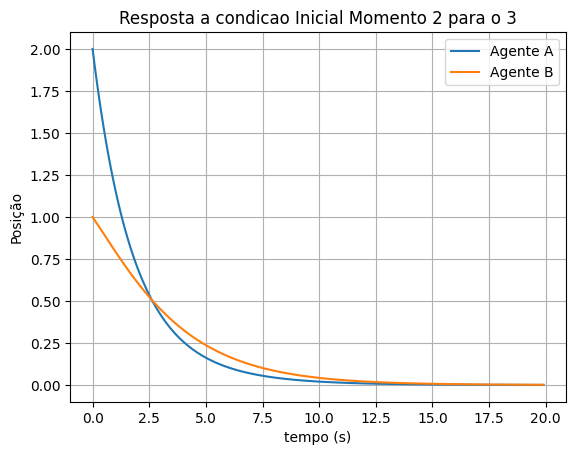

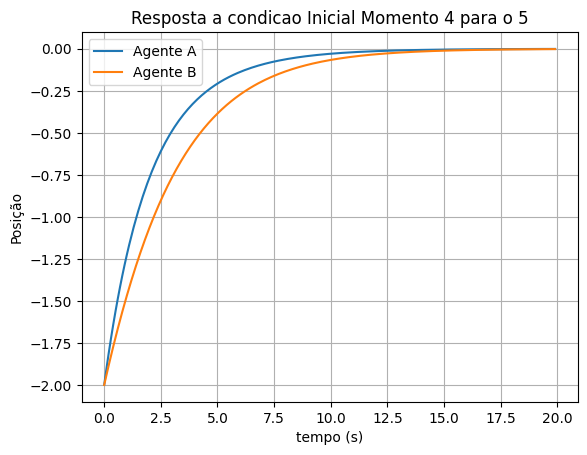

Constante de tempo do Integrador Unico
2.788788505379606
w0(transposta):
  [ 0.57735027 -0.92387953  0.38268343]
Matriz C:
 [ 1.15470054 -0.92387953  0.        ]
Valor de consenso:
 0.2308210058679645


In [5]:
import control
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Sistema de Integrador Unico 2 agentes
# Momento 1
# Momento 2
X0_initial_m2 = np.array([2, 1, 0])
X0_initial_m4 = np.array([-2, -2, 0])

a31 = 0.5
a12 = 0.1
a21 = 0.1
a32 = 0.3

# Matriz de Adjacência
Adj = np.array([[0, a12, 0], [a21, 0, 0], [a31, a32, 0]])
print("Matriz de Adjacencia")
print(Adj)
AdjT = Adj.T

# Matriz Diagonal
D = np.array(
    [
        [np.sum(AdjT[0]), 0, 0],
        [0, np.sum(AdjT[1]), 0],
        [0, 0, np.sum(AdjT[2])],
)
print("Matriz Diagonal")
print(D)

# Matriz Laplaciana
L = D - Adj
print("Matriz Laplaciana")
print(L)

# Eigenstructure of Graph Laplacian Matrix
L = np.matrix(L)
autovalores_Laplaciano, autovetores_Laplaciano = np.linalg.eig(L)
print("Autovetores da Matriz Laplaciana")
print(autovetores_Laplaciano)
print("AutoValores da Matriz Laplaciana")
print(autovalores_Laplaciano)
# Como calular a Forma de Jordan em Python ??

# "Sistema" Laplaciano resultante
A_Laplace = -L
B_Laplace = np.array([[1], [0], [0]])
C_Laplace = np.eye(3)
D_Laplace = 0
sys_Laplace = control.ss(A_Laplace, B_Laplace, C_Laplace, D_Laplace)
print("Sistema Laplaciano")
print(sys_Laplace)

# Simuation Time
t = np.arange(0, 20, 0.1)
# Simulationa Initial
t1_lap_initial, y1_lap_initial, x1_lap_initial = control.initial_response(
    sys_Laplace, T=t, X0=X0_initial_m2, return_x=True
)
# Simulation Impulse
t2_lap_initial, y2_lap_initial, x2_lap_initial = control.initial_response(
    sys_Laplace, T=t, X0=X0_initial_m4, return_x=True
)

# Figures to Simulation Initial
plt.figure()
plt.title("Resposta a condicao Inicial Momento 2 para o 3")
plt.plot(t1_lap_initial, x1_lap_initial[0, :])
plt.plot(t1_lap_initial, x1_lap_initial[1, :])
# plt.plot(t1_lap_initial, x1_lap_initial[2, :])
plt.xlabel("tempo (s)")
plt.ylabel("Posição")
plt.legend(["Agente A", "Agente B"])
plt.grid()

# # Figures to Simulation Impulse
plt.figure()
plt.title("Resposta a condicao Inicial Momento 4 para o 5")
plt.plot(t2_lap_initial, x2_lap_initial[0, :])
plt.plot(t2_lap_initial, x2_lap_initial[1, :])
# plt.plot(t1_lap_initial, x1_lap_initial[2, :])
plt.xlabel("tempo (s)")
plt.ylabel("Posição")
plt.legend(["Agente A", "Agente B"])
plt.grid()

# show figure
plt.show()

# Calculo da constante de tempo (Frank)
tau_consensus = 1 / autovalores_Laplaciano[1]
print("Constante de tempo do Integrador Unico")
print(tau_consensus)

# Calculo do Valor final de consenso (Frank)
# right eigenvector | # left eigenvector
# A*x     = lx      | # x*A  =  x*l
# A*x -lx = 0       | # 0    =  xl -xA
# (A -l)x = 0       | # 0    =  x(l-A)

# w1 = [p1 ... pn].T is the normalized left eigenvector of the Laplacian L for lambda1 = 0
# c = sum(pi*xi(0)); xi:= Initial condition
w = scipy.linalg.eig(L, left=True, right=False)[1]

# não consegui fazer a multiplicação de matrizes!!!
# w0 = np.transpose(w[0,:])
w0 = w[1, :].T
print("w0(transposta):\n ", w0)
# c = np.multiply(w0,X0_initial)
c = np.multiply(w0.T, X0_initial_m2)
print("Matriz C:\n", c)
print("Valor de consenso:\n", c.sum())

## Rede de Petri do Exemplo 2

![rp1_ex2.png](data:image/png; base64, iVBORw0KGgoAAAANSUhEUgAABZkAAAORCAIAAAAf0jtfAACAAElEQVR42uzdb2hka34feM29Zd/KjHLR3JXHSqw7vtkUE62tzWp927Y0KFhOdNcKVpjeWMSKrThaTyMU6DC9jMKKoU0b2kQDCt0vtEFx2qTjbQdt6AkdaNJK0oPbWHiEaXJlkI2CNNAQwSigF3qhBb0Q19pHqu7qUv1TValOqU6dz4fLRa0/JZ1T55zn+X3P8zyn4wQAAAAgPjrsAgAAACBGZBkAAABAnMgyAAAAgDiRZQAAAABxIssAAAAA4kSWAQAAAMSJLAMAAACIE1kGAAAAECeyDAAAACBOZBkAAABAnMgyAAAAgDiRZQAAAABxIssAAAAA4kSWAQAAAMSJLAMAAACIE1kGAAAAECeyDAAAACBOZBkAAABAnMgyAAAAgDiRZQAAAABxIssAAAAA4kSWAQAAAMSJLAMAAACIE1kGAAAAECeyDAAAACBOZBkAAABAnMgyAAAAgDiRZQAAAABxIssAAAAA4kSWAQAAAMSJLAMAAACIE1kGAAAAECeyDAAAACBOZBkAAABAnMgyAAAAgDiRZQAAAABxIssAAAAA4kSWAQAAAMSJLAMAAACIE1kGAAAAECeyDAAAACBOZBkAAABAnMgyAAAAgDiRZQAAAABxIssAAAAA4kSWAQAAAMSJLAMAAACIE1kGAAAAECeyDAAAACBOZBkAAABAnMgyAAAAgDiRZQBAO/jss89+QCKFt97xD4AsAwCIn1DTdpBI4a13/AMgywAA4pplbGxsGKeQHOHtlmUAIMsAAOKdZShrvekAkASyDABQ1uJNB4A4kWUAgLIWbzoAxIksAwCUtXjTASBOZBkAoKzFmw4AcSLLAABlLd50AIgTWQYAKGvxpreQzz77zAN3LxT2klMAkGUAAMpavOkttF1U5mQHZBkAgLIWb3prbdfGxobBFyWFPeNkB5BlAICyFm+67bJ/AOJElgEAyhu86bbL/gGIE1kGAChv8KbbLvsHIE5kGQCgvMGbbrvsH4A4kWUAQMLLm2czRY9ImHlW8D3b94aKP4ma1nbZPwBXQ5YBAAkvb06zjHM5xeknhu5t5/59GmSUCjhQ09ou+wfgasgyACCZ5c32vaFsYFGUZZyFF9mvvY4xhmZm8sdl5H60SHitMl9BTatWt38AGkaWAQBJK2+yk0pymUPpLCP7me17956d/0zetxiroaa1XfYPwNWQZQBAYsqbN6Mszo+cuHCOyUnZ9TJKvyBqWttl/wBES5YBAMkob8ou31m89mdxNlF57U8zS9S0tsv+AWgqWQYAJKa8qXJcRpmfNC5DTWu77B+AFiHLAICklTcXrpdRzHoZalrbZf8AtBBZBgAks7yp8ByTkt9c1XNMUNPaLvsHoAlkGQCQ8PLmEnNMSr2WlENNe7UHc4FzGVzlZWG87wDxIcsAAGUt3vT22K6KD+UJH7fFpCgnO8CJLAMAlLV402O+XRUmTJ0Oxsh9rfT6tXEboOFkBziRZQCAshZvemy368KFbHPTo05Di6GhUhNM4raQrZMd4ESWAQDKWrzp8duuKh8w/HaOSf5sk1LDMeLzgGEnO8CJLAMAlLV402O2XWXXoi1e+7NcNlFuydsYLF/rZAc4kWUAgLIWb3r8tqvKcRkVf/7cdxqXARArsgwAUNbiTY/pdl24Xkb+N+Z/JW/8hfUyAGJIlgEAylq86bHergrPMcn/nrwv5aIMzzEBiCdZBgAoa/Gmt8d2VZ5jkreaRtzyCyc7QAFZBgAoa/Gm2y77ByBOZBkAoLwp6fUqAtXdwy5+fsRlVh/If7XYrGKgprVd9g9A08gyAEB5U+wsyHgdI5wmCxfFGSVWVqx3GP+5H83/O0hITatWt38ALiTLAICklzenecHr8OBNdJD3qVN5z3woo2idguofjnnBK138u73ptsv7DpA0sgwAUN68yQ/yHweRHyCcfwREpVfI+3eJHyieiXJhTlGQqpCAmlatbv8AXEiWAQDKm9fZQy6AKAwQLg4U6kgpqmGKSRJrWrW6/QNwIVkGAChvClOD+rKM/Mzh7OUumWYIMhJa06rV7R+AC8kyACAR5c3bp5KUfjZIdmDFmy9ceo5J6QUzqh+90YgsxJtuu7zvAO1KlgEAypvXC2XklssoDC/qWPuz/sU/L/UQFG+67fK+AySBLAMAEl/evE0ucqHFZZ/JWv+SnRb7THxNq1a3fwAuJMsAgKSXN/k5RN7Hb2elVBEtFM8eqXNMxrm5MJd8LW96srbrao7Ygj+gCceqLAPgRJYBAMpavOnx367LjiS69MSm10mKLAOgOWQZAKCsxZsep+3Km4f0JsIomJpUxwovl1jg5XWMMTQzY1wGQLPIMgBAWVtTxdZR7bNIUNNGtV1vgofccrWXfvJO+HfZx/tcdLRv37v3rLrf6n0HaBRZBgAoa/Gmx227zrKHXABRuGLsxSvIVv984OrJMgCaR5YBAMpavOmx2678BTLqzDIKn7xz2TRDlgHQPLIMAFDW4k2P3XZlB1bkPYDncnNMSi+YUdvoDVkGQPPIMgBAWYs3PWbblV0oI7dcRmGMUMfan5dZ/PPtHyXLAGgSWQYAKGvxpsdqu96GBrnQ4rLPZL14VsrFZBkAzSPLAABlLd70OG1Xfg6R9/HbB+1UEUoUzx65fAohywBoHlkGAChrL1G6dTS6eHtTY0b/oNcoqtmmbkWy18twsts/QKLJMgBAeVN/vT40NNTYev3yixbU/auqmZnQUlshy3CyAySWLAMAlDf5w/OrHp+QrderXWbgbJXGezN5gxXyfuWbF8gbKXH+T3i7xmMDt6IocLg4gbjcVqhpm7xd54+H6p5FIssAkGUAAPEob84V8Wel+MVF+JtFF6sMM87Kyrffd+6n8v9RNk94XZdW+MNq3YoS4zIu2uxLb4WaVq1u/wA0giwDAJQ3lWv8ckV93tMwLy7cz0cepR4ikXsuRaUXe51oVLm248VZRo336xu0FWpatbr9A3A5sgwAUN4U1/YXFOKVa/pyP5H7npJj/7OvV10KkHsS52W2olQUcUGa0ditUNOq1e0fAFkGAChvypc35wrvwjL7Wf4KEPWNaLhoSENRClDm+y8xLqOerTj/HRf+TIO2Qk2rVrd/AGQZAMClypuCUQ4XFuKlQ4AaRjRU+BX1r5dR61ZcOsuoZyvUtGp1+wegEWQZAJD48ia/8q5iQYpShfqFK4CeTwEK5nPkRSGlU4BqnmNS41aUnmNSy+iSmrdCTatWt38AGkSWAQDKm4LHiFasxMtU/BetAFqQApycn/VS29obDdiKgm+v9hGqzdgKNa1a3f4BuJAsAwCUN3jTbZf9AxAnsgwAUN7gTbdd9g9AnMgyAEB5U0rJJ45WXoSijh+JWntsRcJqWrW6/QNwIVkGAChv8KbbLvsHIE5kGQCgvMGbbrvsH4A4kWUAgPIGb7rtsn8A4kSWAQDKG7zptsv+AYgTWQYAKG/wptsu+wcgTmQZAKC8wZtuu+wfgDiRZQCA8gZvuu2yfwDiRJYBAMobvOm2y/4BiBNZBgAob/Cm2y77ByBOZBkAoLzBm2677B+AOJFlAIDyBm+67bJ/AOJElgEAyhu86bbL/gGIE1kGAChv8KbbLvsHIE5kGQCgvMGbbrvsH4A4kWUAgPIGb7rtsn8A4kSWAQDKG7zptsv+AYgTWQYAKG/wptsu+wcgTmQZAKC8wZtuu+wfgDiRZQCA8gZvestt18bGxg8o5dNPP3WyA8gyAEBZize95baLypzsgCwDAFDW4k1vFZ999pnBFxcKe8kpAMgyAABlLd50AIgHWQYAKGvxpgNAnMgyAEBZizcdAOJElgEAylq86QAQJ7IMAFDW4k0HgDiRZQCAshZvOgDEiSwDAJS1eNMBIE5kGQDQPmXtxsbGD0iMTz/9VJYBgCwDAIh3lkECyTIAkGUAALH02WefGaeQTOGtd/wDIMsAAAAAaF2yDAAAACBOZBkAAABAnMgyAAAAgDiRZQAAAABxIssAAAAA4kSWAQAAAMSJLAMAAACIE1kGAAAAECeyDAAAACBOZBkAAABAnMgyAAAAgDiRZQAAAABxIssAqvLZZ5/9AACA1hD6ZjqoyDIALhCazA4AAFpD6JvpoCLLAKgqy9jY2HAbBADgCoX+mCwDZBlADVmGVhMAQK8MrpwsA9BqAgDolUGcyDIArSYAgF4ZxIksA9BqAgDolUGcyDIArSYAgF4ZxIksA9BqAgDolUGcyDIArSYAgF4ZxIksA9BqAgDolUGcyDIArSYAgF4ZxIksA9BqAgDolUGcyDIArSYAgF4ZxIksA9BqAgDolUGcyDIArSYAgF4ZxIksA2hUq/lspqPAzDM7DgCg2b0yaH+yDKBRreZplpGfXpz+e+jetn0HANDUXhm0P1kG0KhWszDLKP4EAADR98qg/ckygEa1miXGZUgyAACa3iuD9ifLABrVahavl2GKCQBA83tl0P5kGUCjWs3CcRnb94akGQAATe+VQfuTZQCNajWLl8ewYAYAQPN7ZdD+ZBlAo1pNWQYAQCv0yqD9yTKARrWapeaYmGICVSlYbmZo5typczZhSzAIQLW9Mmh/sgygUa1m8dqfSi+o0tnp8/qM2T77x5sgMPxryAkFQE29Mmh/sgxAqwlXLj/LyF84NxsRDg3JMgDQK4M8sgxAqwlXrmyWcW/m3rNtc0wA0CuDc2QZgFYTrlz5OSZnn5FlAKBXBvlkGYBWE65c0dqfz6z9CYBeGZQlywC0mnDlzs8xKSTLAECvDM6RZQAJbzVLPwszWzue+4LHyxL1cSjLACDRvTKogSwDSHirWXmdAmUkzT8OizkIgfa99BXdTij4unsJSeqVQQ1kGUDCW81yz49QRAJA05rgcsseyzIS1SuDGsgygIS3mpWzDLeEgEtfYUredj73FVcZEnyClGmCc5M9nR5J6pVBDWQZQMJbzUo3hQzKACK6wlSeVgTJO0HOZxnZj2dmhmQZyeqVQQ1kGUDCW81Kz8JsSLFxfHy8u7v76szR0ZFjCZRqJeazQdJPkPyw780J4kRJXK8MaiDLABLealbIK+qPMnZ3dx88eDA5OfnRRx+lUqn8sKSnp2d8fHx5efnVq1eOK0hSqZafYOSnqOciVEjcCVJ0LjQw9GvX2wmyDDiRZQCJbzXLBxZ1daGePn06MjKSSqUymcz09PTy8vLq6urOzk62I7W2thY+Mzc3NzAwEH7t8PDw8+fPHV3Q5qVa8W3n7XszhTeg7SsSfoKcb30L1HJfIQm3E2QZIMsAtJrls4wah2Xs7OwMDw+HbtP09PTGxsaF3x86UrOzs+l0enBwcGtryzEGbVuqVR6Ccbkwwyw22rMJruvsSM7tBFkGnMgyAK1mQywuLnZ2dk5NTYU+U00/GIqQ0N8KHa/wCqEmsSchWaXaST1ZhllsJOUEqfrsSNrtBL0yOJFlAFrNSzo8PAyVQ2dn5+PHj+t+kUePHnV1dYXKxG1VKHB8fPyqOi2ZBpYp1fIqtJqiDLPYoFgCbyfolYEsA9BqXjbICNVCf3//5e/qhB5YKE5GR0fFGZAvlOgd1WnJkQhlbztv35sZejPvpJogwyw2KNkKJ/N2gl4ZnMgyAK3mZYQuVH9/f6MqqPA6mUwmdKdMNoH88yJcfF68eFFhREb4amRZxvbJUMdJx8zV7gSz2KBYkm8n6JXBiSwD0GpesrqotbS4sDvV3d29sLBg91IgsUs8ZrOMyjlFNd9Tj+1nZ0HGVWYZZrFBOUm+naBXBieyDECrWXfocMnqokLVkUqlNjc37WRaeInH5o1WuLos49lZijF0hVmGWWxQTsJvJ+iVwYksA9Bq1icUGFNTUxG9+I0bNwYHB+3kJGvpJR6bO1rhKrOMmXsn21c5x6T+286Hh2GnnP7//F4yi4324HaCXhmcyDIArWZ9dWbo60R3P3x3dzedTofa1a5OZh+9tZd4bPZohaucY3LqyrKMOm87h2Pgk09O3nnn9A1Kp8PVquDoMouNNuB2gl4ZnMgyAK1mfb2oUGdG+itu3rwZfotdnTRxWOKx2aMVkpll1Hnb+fDw5ItfPHn33bOkqeM00fj85wtGZ5jFRty5naBXBlmyDECr+dbR0dH6+vqFvZzQi6rmhnnU9RvtJG5LPMoyolXnbee9vdcpRv5/RbvFLDZize2EE1kGnJFlAFrNc+bm5kZGRipEFQ8ePMhkMk34SwYGBpaWlhx7SRDDJR5lGRG61G3nv/pXX08wyf13cFDwLWaxEV9uJyStVwYVyDJIiuPj41dvhIbQymdazXIODg56enqyqxWUHOc/MTER9R2hrLm5ufHxccdeEsTwyYKyjAhd6rbz2trJe++drpTx/vsnP/ETJ9evl/wus9iIKbcTktYrgwpkGSRFtqdbWW9v70dFBgcHR4qEImG6yOzs7J1SFhYWHpaysrLyopT19fVXpezt7Wk1m2NxcTF7SGQTjd3d3fyvhqNieXm5OT22np4eJ28SjrcYPlkwOVlGszXgtvPa2klf3+mIjK6uk5cv236PkShuJ8gyQJZBQrOMFy9e5KKB9fX1F2U8efLkYXmh8CiZWczPz0+XMjk5OVLK4ODgR6WE8rWjFul0uuTr9PX1lfy9Y2NjJf/OylnM/fv3w+8K/687i8mKfhp/AxwfH2cymfw9fPPmzYOzcdrhS6HMaM7zL9fW1sJvj8Ue4zKhQzyfLJiMLGP73szQ2VVgaObedgNeL5zO4b2uPF6mYbed9/aKZ5fkM4uNOHI7QZYBsgwSmmXE+h5U6ASXTAe2trZKZgqrq6sls5jQCagji/nqV78admD4f8OzmGpymQsDmrozmnLjZf7pP/2nBX/bF7/4xW9961u///u/Hz5u7C30Nj5ouZAnC7ZwlvFsJrzozLOTk+3Tj4YakmacLC0tZTKZUCaViylruu18eHhyftxYDcxiI3bcTpBlgCwDWQZX0GpebRbT2HExzTmQHLRtL65PFmzoaIX19fXD8w8NbZUsIxdlvP64MWFGKMb6+/vDK3d1dYUL1/7+fsE3VH/beWvr5IMPTqeS9Pae1FHcmcVG7IRrWpNvJ6ytrRV0WlpkzTVZBsgykGWg1Szt0aNHxRHG3/ybf/Nf/at/ZVwGjRLPJws2eLRCOJtC9X7r1q3dMgMMWibLePPxpb18+TKVSuVPYctte023nb/2tdMlPrPPKnnnnZrjDLPY0Je78HddXk9Pz0dVqzD4tEB2tOzP//zPT9ei3EjVcsqNYC2n3OzjcirPSq7e1a4ohywDlIWyjBZyeHjY29tbsF5Gdt0BA1xplLg+WTCC0Qpzc3O5E634T72qLGP73lBEWUZukwsuMltbW9Xfdj48LHz06kcfndR0t1izSBwvm1c+LiP89vDJ6sv1UN4/vLTiEanf/OY3w58X/l9TNlFuBGs55Ua2llNuxGs5l5mVHIULZzrXnT1Vng0dl+wpJ5wFldOlpo1dkmUgy0CWUSi0H9lWrbOzM/+WaZaFx2jU+xvLJwtGMFrh8PAw9AhzDw8KvefQVbryLCO6cRknb579XNyTzt5rrWZDwrfkBxnZ/2paO0OzSOy4nZDMXllOudnK5ZSbxVxOudnN1WdMsqRmzsWWZSDLQKtZ6OnTp7mp7AelngIwMTFx69atJvwlVuZrbzF9smBEoxU2NjZy0y6yQrcsm2hUn2Xk30ENL1i5z/ro0aMKPdS7d+/e+dWPw2t+/KtnPdDTj3t/4R+ffjg7O1uy0zk2Nlayc9nX11eyE/nuu++W6wVWOS7j858/+cIXXqcYPT2nD2Ct+NwSzSLtwO2EJGcZtIjd3d1y+VFoXmUZIMvQal6Nw8PDUJCEHkyFxQjjejsdPfKGiGy0wuzsbHFV/5WvfOVb3/pWlVlGfRPXw+lcMoO4fn3oK6d/wSfT03/3k/DRj/z03z3LLObn50vecAvvZslYZHV1tThJ+Rf/4l8UZBk/8RM/8fjx4+9///vV33YO35XLMr72tZOXL2vb4WaxEUduJ8gyUHDJMnBqodUsYX9//8I5ftllDra2thyx1K35I6X/63/9r9l7Jpubm9VP6n7w4EFhyX42WuF/vn7rtKzPL/HrGpuQTqcbMmC1YFxG8cNB6tTQJ7bkGx4ezm1af3//48ePc1eemkKuw8PTySY1DcfIMYuNOHI7QZaBgkuWgVMLrWb9RkdHb9y4EemviODxE7SQ5q9g17gxC3/9L4fv/mioYLTC9OXGLHz3u98Nvyv/73nvvfd+/dd//c/+7M+yWcwVrJcRmdxjksImh51QkJ+67QyVL55uJ+iVoeCSZeDUQqtZp+fPn4e+VHSHU+irhUIulHl2tStSo35XI8csRDBaIf8pyOHkyl9z98rW/nzj3tDpJI5GrfuZfUxSV1fX0tJSyVFgbjuTWAcHB9VcoH7+53/e7QS9MnRvZBk4tdBq1mlkZGRqaiqiF/8H/+AfvPvuu6GvVmHZDmKt+eMyWvnqF0r6/v7+bJAxPj5e8Jzaq8wytk9mhl4vSNGoLGNxcbHcusK5Y8NtZ5IpnBeh4ctlmr29vdkBYoODg9lRYT/7sz/7V/7KX/nCF74Q9e2EdDrd4rcT9MpQcMkycGqh1axTqEI7OzsfPHjQ8Fd+9OhR6KX9h//wH0ZHR3t6etw4bUtt8GTBBo5WCAd59sElL0stX3mFWcbMWYox1NAso5o3wiw2kmxlZaWrq6vcbLj333//z/7szyK9nRDOvsHBQb0ykGWALEOW0bYWFxc7Ozs3Nzcb+Jo7Ozvd3d0LCwvZfz558qS3tzf3cEraSYyfLNjQ0Qr7+/uhbHj69Ollrt4RXeHvzZw8227wHJNqNGEWW+vfdibJ9vb2xsfHi4OMDz74IDucLerbCY1t2fXKUHDJMkCWodVsOdPT0729vY06rsLrZDKZycnJ/Fn0R0dHi4uLoWt148aN3AoCtIH4LvHY2NEKFz48qM3Wy6hSpLedf+VXfqX1bzsjzviFX/iFgiwjP9Zvwu0EvTKQZUBLyI6yvvBxm2g1a3J0dBSqxN7e3st3p0IXKpPJjI6OlhyCHr46OTmZTqfv37/vMG4P8V3iscmjFZKZZUR32/l3fud3wr76e3/v7zV82hE0xPr6+vT0dGjv+vr63nvvvVyQcfv27YLvbMLtBL0ykGXA1Xvx4kU4tewHrWYUcUboTl2y6nj06FF3d3foQlWuLsJhnDljcHgbiPsSj7KMqEV32/nrX/96qBLDlaQ5K7ZA9V21kZGR7Oo5T548CQ1iLsgYGxsrjhiadjtBrwxkGSDLkGW0rVB1pNPpqampWi/foaC9ceNGqGkXFhaquRcUullLS0tdXV2hA1dyoURiJNZLPMoymiC6286Hh4fhxcNOu3PnjuclcbXCAfnw4cO+vr7QFIbDMpfwZp/3FAwMDJSLGJp5O0GvDGQZIMuQZbSnnZ2dUDRmF7ao5lmb4UIf6sx0Oj04OFjwEMoL7e3tZXtvlR/uSIuL9RKPsowmiPq2czg2wif7+/tbf6VD2lJovxYWFsJB2NXVNT8/X9B0ZntuoaW7cPxa024n6JWBLANkGbKMdq5OQ7UQ9lXonM3NzS0vL4fPvHpjfX39wYMH4fPXrl0L3zM4OHiZOnNtbW1kZCTUOY8fP7aIRkzF98mCyckyrlbUt53DZ8IRGOrA27dvW0GDptnd3b1z505XV1dowsqF8uG4Def1kydPqnnBZt5O0CsDWQbIMrSa7dxLC4XHxMTERx99FLpW+cuw9/T0jI+PLy0tNepCH14qvObAwEDUKy8Qhfg+WVCW0UxR33Z+/PhxKCljWtQRu4ve9PR0OCYzmczDhw8rHJahdbtz505NL97M2wl6ZVCuOW7aDTalHbIMtJrRChf0UE5kO1IR3fbc398PnbOurq5QtJj6Hjt/5+/8nc9//vOJfbKgLKP69zTS284HBwfZCtPDkoiuJzY2NhaOsZGRkdXV1QsPs/D99R2KzbydoFcGxc1x036d0g5ZBlrNNrG+vh46iKGjtri4KNFocUdHR+H9+q3f+q0f/dEf/dznPtff35/YJwvKMmoS9W3n7GyU8IOhGnSe0hDhQrSyshKap1QqFa5LoT/W5N8e9e0EvTKQZYAsQ6tJA4QuY3aseJP7i1xof3//8ePHt2/fDu9OOp3O3Sfs7Oz87//9vyf2yYKyjDpEetv54OAgvHI4LMOLOG25jHAsLS8vhytSuOJNT09XM54IvTLaoMlu2q9T2pEUsgytZnKEInZ+fj6UIlNTU5e4ubp9MtRx0jFjf17G8fHx48ePQyc+9OY7ypibmztJ8JMFq+wYhWv4q/KyV/jkZBkFx1gUt50fPnzY09MzNjam/qS+FCO7tGfgeVt6ZcgyZBkgy9BqUoO9vb3r16+n0+nQj6x5rsH2s7MgQ5bRmD79/fv3BwcHSwYZqVQqP29K4JMFq+wYVSOZWUYTriGPHj2yggZVyi7tGQ6b7NKeHo6jV4YsQ5YBsgytJvV48uRJ5kyoRqr+oWdnKcaQLKOxtra27t69+xf/4l/ML79DrVhcCSTqyYIXClX0q+qot6Pw4MGDzs7OsbGx/f19eyNWmj22LnS0Jicns0t7rqysOB/1ypBlyDJAlqHV5LKl4MLCQqhGxsfHX758WVWWMXPvZNsckwY7PDwMb0F4I376p386l2WUe0eS82RBYtE3DUdjV1fX48eP7Y14aOLYutDEhOtPdmnPsbExSzXplZHw9kKWAY0ny9BqJtze3l52OYaqpy7LMt66dzZI5dklXmF3d3fgzNbW1vz8fDbICP3+C3+q7Z8sSFwsLy+HC8iNGzfCxaS+8tolpVmaNLbu+Pj44cOHmUwmXJ0s7alXBieyDIiILEOrSbC2ttbf39/V1VXFAGCFx+vdMJOtCC6RZTx58qS7u3tiYiL7rNwHDx5k84jw+ZrKhrZ8siAxEorVwcHBnp6emscBWYKnqSIfW5dd2rO3tze7tKcn+OqVQZYsAyIhy9BqkiuJl5eXQwd0YGCg4hNAZRmnZs7qr6FLZBmLi4upVGpubi4XHmUvR319feaTE0fZC8j09HQ2m6uqtLYEzxWI5BoeCpVwNQsHQCaTWVhY8IASvTIouETIMqDxZBlaTfLt7+9nH3sRCpIyI8ZlGafuzZw8265zjsnx8fH8/Hw6nX769Gn+58MOD2fTZZ69Cldrc3Pz2rVroZqtboCGJXiuRIN3+NraWnZpz8HBwXD5EsXqlUExWQZEQpah1aTY+vp6KEi6u7sXFxeLbrEqPN6qI8vY398fHh7u6ekJBUDxV3t7e6u+p53oYuzeUNGTV4fubZ9OWZh5/ZWhmdN/03ShlL1//346nb5161Z1k55cUpp9+jRqhz9//jxczcLZFv5vaU+9MqhAlgGRkGVoNSnn8ePHobT+6KOPQofV3iip1izj5cuXfX19AwMD5VZJrGmlDE6ezYTrz0zuDdjO/Tsbdsw8s4uuyNbWVt+ZKp6RJMtosgbs8NwDSqanp8N7bZ/qlUFlsgyIhCxDq0kFh4eH8/PzocM6Ojoah+dilL1dH77y+n59Q2/X15RlPHz4MJ1OT05O7u/vO7QaoyDLKDgShozMuEpHR0d37tzp6urKXxQmotI6ouvG22E+4cLxrG2Opvp3eHhPl5aWMplMdmlPlzK9MpBlgCxDq0lL29raGh0dzQ4aj8cMiMIS9+3t+tOPGlfiVp9l3L17N5VKhd6/yeTRZxlnn5VktIbNzc3+M+VXFG6ZcRmlhvkMnf1bNra3tzc/P9/d3Z3JZJaWliztqVcGNZFlQCRkGVpNqrS6unrt2rWPPvro8ePHrV6QF9Qk+f9saJhRTZZxeHg4NTXV2dkZ9pujKNo3uqqv0GxHR0fZxW7LZHmtmmU4ns68fPnyxo0b4QoWrv8PHz6UxuqVQR1kGRAJWUZDWs2NjY0fkAzf/va333///a9+9at/+Id/2Lp/5e9NhcNy6vdK/bPgSxH7L//lv/zkT/7khx9++L3vfc/BE/kbXeWXuAr//t//+3AifPzxx8+fP4/d4XT2lcQdTv/m3/ybcKlPpVKffPLJd77zHcdwLHz66aeyDGQZSjtkGdSQZQAA0ApkGcgyQJbBxT777DO3QZLpD//wD//G3/gbH3zwwW/8xm/s7OwkbFxG7lX+6PSjj3/zj4q+4/79+6lU6ubNm6H9drQ0840+ezf+yLCMVh6g8aUvfenjjz/+4z++f+F5dOXjMn5v6uOz2vDK/7hmCBerf/bP/llfX9/777//zW9+80/+5E8crjEV+mY6qMgyQJYBVLKystLb2zswMBBOpRb6s6JeL6PiCx4fH9++fTudTj948MAR0tQ3Ou95NW313Im2c3h4ODs72/kXfii8UTeeHjfsxGz84fTm6UftvlLG/v7+3bt3w8U8k8mEC1c81ngG4kOWAZGQZcDly5Lsc1snJiZ2d3dbssRt9HNMCrOMt78rlATDw8M9PT0vX750bEAFT37jfwvnTs9PDu/s7LTE4pqFzzF5nWS0d5CxtbWVXdozXLgs7QlERJYBkZBlQEOEamR8fDydTi8uLh4dHV3xX1NcF+Xu1w/NXP7eb7bGKc4yXr582dfXNzAwENpshwRUcx79j8MToZB++H+OtFqW8SbKeKvNQo1wvcpetCcnJ1trYB3QdmQZEAlZBjTQ8+fPM5lMb2/v6upqO29nqXEZYZOzVYHh2VDTefT48eOuL/xw+PhX/59de6UJwg4fHx/v7Oycnp4+HRQDEDFZBkRClgGNdXx8PD8/H3rJY2NjGxsb7V2Dvfl46Be/uZBOp+/evWuENtRxHu3/v7/W0fHBe5/vfPTokR0TkaOjo4cPH/b393d1dd25c+fg4MA+AZpDlgGRkGVARI3WxMREKO/n5+f39/fbtwjb/nf/R0fH//C/fL5TDQb1n0fZhWwWHz0KZfbk5OTe3p6900AHBwd37twJ+zaTyTx8+PDqpwECyesWyjKg8VZWVnp6euwHiMLLly+vXbvW3d0d6vx2G7CQW4Cj80c++LGPtra2vN1Q/3n0ZiGb3d3dsbGx0C63+Ty1ZtnZ2Zmdne3q6hoZGQm71MAx4ErIMiASDx8+/Oijj+wHiM7y8nLoSV+7dm1tba2dtuvly5eZTCZslwnn0FhLS0vpdHp8fNwAjbq9ePFicnLS0p5AK5BlQCRkGdAE+/v709PTqVQq/L89ipOVlZXOzs9P/0jHcccN7y9cxr2hk9DFLXhIyNbW1sjISHZUl11UvePj43B1CrsunU5b2hNoEbIMiIQsA5pmc3Mz9LC7urqWl5fjO9Q5/OWzs7Opd99d+HLHcWiYO2a8s1Cn7ZOZsyCjOMvIWlpaSqVSN27csFDlhbJLe2YyGUt7Aq1GlgGRkGVAk2UXqenv74/jsOdQLYyNjXV2/oUnp+VXtgiTZUCdZs5SjKHyWcbJm2V3Qn3++PFje6yk/KU9l5eXpRhAq1lfX5dlQOPJMuBKet7z8/OpVGpycjJGQ6C3trb6+/v7+vq2tn77ZObeyfb2WREmy4A63Zs5ebZdeo5JgYWF08ce37x5U6GeL1w/p6enw54ZHBwM/RlLewKtqckPjpRlkBSyDLjCXvjY2Fjohd+5c+fw8LDF/9rnz593d3ePj4/nPWJWlgENUE2WEWxsbPT19fX29lrJMlsYhOtnKpUaGRmxQ4DWv2TJMqDxZBlwtVZXVzOZTDgNW/kRjPfv30+n0/Pz8+dve8oyoAGqzDJOzlarmZubyw7pSuYAjdzSntmllD0NGogFWQZEQpYBrdA7X1hY6OzsHBsbu+SUk/BSr6pT/WDs05U+U6mlpaWir8gyoAGqzzKysgM0MpnM+vp6cvbSwcHB8vJybmnP3d1dRw4QF7IMiIQsA1rEq1evJicnU6nU/Px83XdcswtlVyN8ZzXFw/DwcE9PT5kh3LIMaIBas4zg8PBwdnY2nMg3b95s/Rlql7S7u5tb2nNhYcGKIUDsyDIgErKMq7J9b6hkhTnzrPDrQ/e2G/eyEXg2U8vfefrdpf6Y8PmyL5DdqLo24c0f15Q90ajWrr+/v6enZ2Vlpe4sI7xIhREZ2Qb1wixjc3MzVA6Dg4Pl73/KMuBqsoystbW17Ay158+ft+WeyS7tmUql+vr6LO0JyDJkGSDLaMFUo6CMPyveXxfdp9V4TXFG+ZeNLMqoIR+o8dtze2Covq0p/HX17s2mCv315eXlrq6ukZGRzc3NCt+5sbFRMsuonFNU8z0rKyudnZ1TU1NHR0fOUWhZh4eH4TwN1f7c3Fw7na2W9gTaiSwDIiHLuIro4nwxXRw6FHwmN2Sh6EdPir6lYpZx9vP3Zt6Oojg/iuNNzX/2Ys9KjAvJ+/bXn8wb9lAcUBR/+5tw4V7uK7mfKj8uIxtHVI5myu6Zouikjizliuzt7WWfNTg7O1tuTPXw8HDB8PKGZBkLCwuhhLh9+7a7oBALT58+7e3tzWQyL1++jPWGhGtO6JYMDg5ml/ZM1IIggCxDlgGyjJaVLfyLau7iKr2grj/9hoKpJ1VU4+WGexTECs/y/7jsv7J/Z9GwkPxvz/u4TDiQP7QkfzTEuRfP+6ayWcabL1w0zqT0nikxLiMeScYboSs/PDzc1dW1vLxcnCyEk3d2draBWcbh4eH169c7OzufPHnijIUYCSdvdjrGnTt34phCHh0d3b9/P7u0Z7isXXIV5Eu6aLZm/uzFGpqU9poE2rApnJeYRgqyDFkGsgxZRpO6RWX6EkVFeuEnSg/cuKhzUibLKPszb/sw53szuX+V6eSU/nR+/lLpVfI/X+pPy/uTz6Uj1e7q4s5W608xKX2e9vT09Pf3r62tFWQZ2dUxGpJlhM9cu3atr6/PYw4hplZXV3t7ewcGBuo7i//8+Pjo1atq/vvzxsUl+/v78/PzvWdabmnPEs3muamKVTVMVb1sZFFGVJNAGzWF8zLTSEGWIctAliHLiLwnVLFvUEeW8bYHUHHaRakso+hPKb6/VCbLyLulVDKlqPin5f6aEmNOSn2+5EZU383KvVrhjxQMTYmR0L8P3f3suOu9vb38LCOTyeRuw9adZaytrXV3d4+Ojoa6wlkL8XV4eBhO5HQ6vbi4WOsAjaNXr/6go6Oa/46qeBDShXZ2dm7cuJF9QMny8nILPJClikmgJUr4N2MHkzUJtOopnOX3zNufala4A7IMkGVQR5xRw7iMSnNMqnnBarOMZzOFvZ7KWUZB+FH0c43PMkqMqijRxyvKKgrGZZz/6+KzYEYpm5ubIyMjoeu/sLAQqpRslhHcvn37MllGuA6EyicUFVb6hPawtLTU2dl57dq1ygM0CgZBZLOMgxcvKozICF+9fJaxsbFx/fr1VCo1MDCwurraApNiqp4EWqGpTdYk0FqmcJbfM9VOIwVZhiwDZBnx6CoVZw7nx7Nepqt0LqTI/3rVWUbBq0c4x6R0EFEhErp4vYy4ZxlZKysrmTM/+qM/ms0yQkmQfaZJHVlGdrhHqHycotBOwjk+MjKSTqfv379f8huOj4/n5uaKs4zKOUU131PB06dPs3/V2NhYS6xUWuvNhvKhQFUvWLGBjtUk0NqncBbvmVqnkYIsQ5YBsoyr7jddNIS13DNZKw/UrCPLKFxStFQ6UbKTk/fil7ntc/7zhdtW6pXL9Paqfo5J29z6OTo6+tt/+29/7nOfy3Uir127FiqTmrKM/f390dHRnp4ejzyEdpUdoDEyMlJ8Wdjd3U2lUvmrbEaXZYRLVuhv9PX1ZZ/NdLVLe5av6mvKMipX320/CbTuKZxvX63eaaQgy5BlgCyjdcKNEs3/donpsNV0DWrpKp2fTFvmzkzBaNWOEvNoy/Q+yk3HzZvrW/D57apSi1p6Ow1baL3VWsRr164Vz79ZWFioPstYW1vLZDIDAwOhnnEWQhvLDtDo7OwMLX7xpWBiYiI3xSOKLOPo6Ghpaamnp6e7u/v27dstd8Gpb1xGhcI9SZNASw57rGkSaDuszg2yDJBlkGwVb2Hxxtra2tjYWCqVKvlgvx/6oR/6gz/4gyqzjC9+8Yvj4+NW+oSEWFpays7syKUJGxsb2UvH48ePo8gywuVlbm6uq6srdDMWFxdbezmeWtbLKDfbMVGTQGuawllyz9Q0jRRkGbIMkGXQoiz7VV1DeP369eHh4Uwm093dXTLOCGVDlVnGzZs3W2C9PaB5dnZ2BgcHcwM0sn3roL+/P3s1aFSWsbm5OT09nUqlRkZGVlZW4nOpqWISaIWRGkmaBFrDFM4ye6aGaaQgy5BlgCyD1s0xOkyTrcfe3t6rV69CfRLayCdPniwtLf3UT/1Ufc9kBRJicXExnU5fv379X/7Lf5mLQbPrg14+ywjXoomJiVQqNT4+/vz587Zon4rmY3TUNnexDSeBFv7C2qdwNmYaKcgyZBnIMmQZ0C7qeyYrkCg7Ozs/8zM/k06nc2VoT0/P4eFh3VnG8fHx6urqtWvXwmtOTU21ytKeNIZJoHBZsgyIhCwD2oksA6js4ODgzp07xfPUTpe0qD3LODw8XF5ezk58u3XrlrWE25CZH3BpsgyIhCwD2oksAyhnb29vfn4+u6pOsc7Ozp21teqzjPBqCwsLvWeWl5cPDg7s4fZjEig0hCwDIiHLgHYiywBK2tzcnJyc7Ovry59aUuDrv/iLVWYZ3/r1X+/s7BwYGFhZWTk8PLR7ASqQZUAkZBnQTmQZwIWOj4+3traePn26uLg4Ozs7MjLS09Pz7rvv9nR0VJllXB8cbIelPQGaQpYBkZBlQDuRZQD1OTw8/MYv/3JDnskKQD5ZBkRClgHtRJYB1O3yz2QFoJgsAyIhy4B2IssA6ibLAIiCLAMiIcuAdiLLAOomywCIgiwDIrGwsDA4OGg/QHuQZQB1k2UAREGWAZG4c+fOyMiI/QDt4bvf/a4sA6iPLAMgCrIMiIQsA9rD97///YmJiXfffbfKLONf/+t/bacB+WQZAFGQZUAkZBkQR7u7u2traw8ePLh169b4+PiHH37YcWZ+fr7KLOP9999fXV21J4EcWQZAFGQZEAlZBsSjxjg6WllZuX379sTERE9PT0cpX/3qV6tfL+O3f/u3u7q6NjY27Fvg9XVGlgEQgRcvXoTOW9N+nSyDpJBlQFxsbm7Ozs52d3d3lBFayprW/nz+/HlXV9fTp0/tW+BElgEQjdBDa+aDI2UZJIUsA2JWbBwdLS0thRaxIMjInsi1Psfk0aNH3d3dL1++tGMBWQZAFGQZEAlZBsTR2traj/3Yj73zzjv5gzJO6nom68rKSnd3d/bHgST70+9+t8os4+bExN7enj0GUA1ZBkRClgHxcnx8fPv27VQqNT8//9f+2l/LH5RxUleWcXI2OqOnp8foDEimw8PDtbW1X/zFX/zL77xTfZYRrkLXr1/f2dmxAwEqk2VAJGQZECN7e3vDw8O9vb3Pnz8P/wwnbzbLyMUQ9WUZJ28mm6yvr9vJ0Pb29/ezD0KanJwcGBh47733sleS/+sf/sPq55hsbGzMzs52dXVNT0/v7u7aqwDlyDIgErIMiIvV1dWenp7r16/nhnaHj0P5MT4+nvueurOMYHl5OZ1OizOgLYVT++7du9PT05lMpuTiwV/+8pf/v+9/v9b1MnZ3d8NrdnZ2hsuR5yIBlCTLgEjIMqD1HR8f37p1K51OLy0thY9zn5+fn88flHFyuSwjePjwYVdXl8km0H42Nzfn5uYqPAgpnP51r/25s7MzPT0drlHh/68sCwpwniwDIiHLgBa3u7sbTtLe3t7i5TkfPHiQPyjj5E1OkX04aznhqxXyjoWFhVDtmAMP7erJkyfXr19PpVL5QUYmkzk+Pr7kc0w2Nzenp6fDBWRyclIkCpAjy4BIyDKglWUfMjI6OlrykQHhqwUFQzbLqEaFe6dGZ0B7293d/amf+ql0Op27ICwvL5806Jms4WI1PT2dSqXC/6WiACeyDIiILANa09HRUagEQo2xsLCQP68k3+HhYcFnwne+qk6518wKv7S3t9dYcWjLLnU2If3N3/zNbJDR1dV1cHBw0qAsIys76ySVSt28edM6GoALrywDGk+WAS0olAGDg4Oh3njy5MlV/Q0LCwse1AptZnFxsbOzMzT9R0dHDx8+zGYZ4Z/ZrzYwy8ja2NiYnJwMv9EYDSDJZBkQCVkGtJpQYISu/9jYWMl5JU2+PnR1dW1tbXlTIO4ODw+vX78ezuhHjx5lP7O6upo/KOMkgiwjK1zKZmdn0+n0rVu3XE+ABJJlQFS1iiwDWsTx8fHc3Fzo8S8uLlaeA9I0d+/e7e3tNUQcYm1zczOTyQwPD+cPjggf5w/KOIksy8j9uuysk8nJSWM0gESRZUAkZBnQInZ3d0Ol0dPTs7a21lJ/2Pz8fFdXl9oDYio71Gt6erpghZ3j4+P8QRknb3KKgxcvwgfl/gtfrS/LyMo+6yT83hs3bliRB0gIWQZEQpYBdbs3dNLRcfKsES/15MmTnp6eVphXUu5CEdpghQfEy/HxcXZyR7mVdxYWFvL/mc0yqvnv6HJXg3Chu3nzZiqVmpiYkJMCbU+WAVGVKLIMqNn2ycxZkHH5LCNbbHR2drbOvJKSbty4EZrhi6qO7ZOhsFNmHCBw5XZ3dwcHB/v6+iqs4Ftwzfnz4+MKIzLy//vzRlyssrNO0ul0+H9rxrgADSHLgEjIMur22Wef/YCkmur4QUfHDz4++//vXeJ1vve973388ceh2Pj93//91t/qb37zm3/pL/2l8DeX/vIf/d7rPdIx5QiBq/Vv/+2//dKXvvTJJ5/86Z/+aYv/qeHq97Wvfe39998fGxsre3mBSwgdNr1WZBkgy+Ct0Dp2AADQwkKHTa8VWQbIMijMMjY2NtzxSKzf/LjOcRk7Ozu/8iu/8t57733729/+b//tv8Vrq3/t137tww8//OM//uPzn/69H0z95g/+6I/OhmYYlwG1asy5E64tn3zyyQcffPCd73wnjnvhe9/73i/90i994Qtf+OVf/mVjNLi80EmTZSDLAFkGpbMMDWSS1bf2Zyg2MmfW19djuuFTU1OhSS41v916GVC77WdnJ85lz51QtoULy8DAQNxX0wzXluzTW8P/rQyKrhptQJYBkZBlaCCpWx1ZxoMHD0o+HDFejo+Pb9y4EaqmojJDlgG1enaWYgxdMst49OhROp2em5uL9bUl3+bmZvYhLA1PNBr4CCp01aAasgyIhCxDA0lzOsShwJiamgr98gcPHrTy80qqNzk52dvbe350hiwDavXsZObeyXb95064nszPz3d1dZV78GqsbW1t5Z510oBEo3GPoEJXDaony4BIyDI0kNSt+izj5cuXmUxmcHBwY2OjbTY/OzpjYGBgf3//baEgy4D6iuy6zp1Q3ocLS09PT3znrFW5mZOTk5dPNGbOUowhWYauGjSXLAMiIcvQQBK1+/fvhy747Ozs0dFRm23a8fHx+Ph4aJ7fxBmyDKhPPedO6Bx3d3dfv3691OI1bWhnZyc7uq3uROPezMmzbXNMdNWg2WQZEAlZhgaSuuqOezNDZ496G5q5t132uw4ODsbGxrq6uh49etTGOyOUUudHZwA1X1NqyjKOj49D851Kpe7evdsec9aqt7GxcclZJ7IMXTVoMlkGREKWoYGkds9mwns/8+z08QPho6HSacba2lpfX18o8l+9etXeuyOUUuIMuJwasozDw8NwxnV2drblAhlV2tzczM46Cbvi5cuXNf2sLENXDZpMlgGRkGVoIKlZLsp4/XGJMCM7r+TmzZvtN6+knPHxcXEG1KvaLGNjY6O/v39wcHBra8teCzthYmIilUqF60/1iYYsQ1cNmkyWAZGYnZ2dnJy0HzSQ1KAwy3jz8Zm9vb2xsbGenp7nz58naq8cHR2JMyBSS0tLnZ2dt27dSk5IWo3syqDVJxqyDF01aDJZBkRi+oz9oIGketv3hsplGWtraz09PSMjI7u7uwncM6G+GhsbE2dAFCfX7OxsOp1u78V3LmNzc3NqaqqaREOWoasGTSbLgEjIMjSQ1KzUuIzj4+PFxcVQaczPzydtKb6Cimt4eFicAQ306tWrwcHB/v7+WheGSKCNjY3r16/XOusEXTWIlCwDIiHL0EBSs6L1Mu7+8f7Y2Fh3d/fTp0/tnuyDWsUZ0BDPnz/v7OwcHR11QlVvc3Pz+vXr4UJdmGhU9wgqdNWgsWQZEAlZhgaS2p1/jslPzP5IT49KI9/x8fHg4KA4Ay7p9u3bqVRqbm4uyaO96pZdGTQv0ajqEVToqkHDraysyDKg8WQZTWggzy2vQHvI3dzr/Tj1XnphYUGlUeDg4GBwcHBkZMQihVDfGTQ8PNzT05PkB682xPr6+uuVQX/myxc+gorEdtUgUg8fPpRlQOPJMqJvIM96TENDek1tZn9/P1Qa3d3dq6ur9kZJR0dHIyMjY2Nj4gyotfzOZDKDg4PJXEU4ChsbG5M/91dDq/2VT6Z3dnaKH0FFsrtqEC1ZBkRClhF5A3naYZp5djo2Q5jRPp4+fdrd/cXxL3bsdUzZGxUcHBxcu3ZNnAHVe/DgQTqdnpqaOjw8tDcaKDtG8iufTIfdO/3JV2QZumrQNLIMiIQsI+oG8tlMNsMQZrSJ4+Pj27dvp9/74YUvdxx3dJx0zNgnlYkzoPrLy82bN0OlvbS0ZNpa470Zi7Gzs5PNMl6P0SDxXTWImiwDIiHLiLaBzEswzu4IuQkUb9knI/b2dm+cphhDJ7KM6ogz4EJbW1sDAwOhs7u2tmZvRKLwEVT/60//3bMxGtMSjWR31SB6sgyIhCwj0gby/GCM7GwTey6uHj9+3NPTMz4+/urVw5OZeyfb2ydDsoxqiTOggrNpa93hBAlnir0RmRLPMTkdozEt0Uh0Vw2aQJYBkZBlRNlAnnWbCphnEkPHx8e3bt0qGvgty6jN3t5eJpMRZ0CBu3fvplKpxcVF80oil3sE1dBMfmMs0UhwVw2aQZYBkZBlRNhAFo/D8BC4GNra2hocHOzr61tfXy/oFMsyamV0BuQ7PDy8fv16Z2fn06dP7Y0rJ9FIYlcNmkKWAZGQZUTXQJaaUmIF0JhZWVnp7u4eHx8v9UABWUY9Dg4OjM6AkzcPXr127ZqyubkuuHRLNBLVVYPmkGVAJGQZUTWQZVILK4DGRe6BAvfv3y8z8FuWUadXr16JM0i47INXb9y44cGrTbX97Oy6ffGlW6KRiK4aNIssAyIhy9BAUmxzc3PgzNbWVoVOsSyjbgcHB6FRF2eQQOGYD81uZ2dn6NraG8317KTGR1BJNHTVoCFkGRAJWYYGkgIrKytdXV3hvHC/NFK7u7uZTGZyctJ6hyTH3t5edv2dijkpEXlW3yOoJBq6anBJsgyIhCxDA0nO4eHhzZs3U6nU8vKyvdEEu7u7oWkPlyBxBkmwurra09MzMTGxv79vb1ydOofUSTR01aBusgyIhCxDA0nW5uZmaGb6+/s3NjbsjabZ2toSZ5AEt2/f9uDV1nCp6YESDV01qIMsAyIhy9BAcvJmXsnU1NTBwYG90WSvXr3q6ekRZ9CuDg8PJyYmwkG+urpqb7SABix1JNHQVYOayDIgErIMDaQyY2pqqrOz88mTJ/bGVdnY2Oju7hZn0H5evnyZyWQGBgb29vbsjdbQsGWbJRq6alAlWQZEQpahgUyyzc3N/v7+UGbohl658BaEkk+cQTt59OhRKHTn5uYsJNxKGvwIKomGrhpcSJYBkZBlaCATa3l5OTuvxDp8LWJzc9PoDNpDOIZv3rzZ2dn54MEDeyMJJBq6alCBLAMiIcvQQCZQdvp6KDNWVlbsjZZisgntUdZeu3atr69PTZvAtz47aVGioasG+WQZEAlZhgayRs9mOvINzdzbfv2V7XszQ4Wfa81qub+/f3h4WEezZd8gcQbx9eLFi3AAj42NGfCVWHt7e+EKlkqlJBq6apAly4BIyDI0kDU6yzJmnp19vH32j6Gz5CL3+bNPDrVomrG0tJSdvn50dOQYblniDGLqzp07HrxK1ubm5uzsrFknumpwIsuAiMgyNJA1ys8yTsdiDGWDi/xPt2SYkXteyaNHjxy9rW99fT3UAKESKPlVd7zb9tpScsxX+NJQR4sP+jo4OBgdHe3u7n769Kn3kpytra3a19Eoey5sx+BU0FUDWQbIMjSQ8c4y3n5LK3jx4kV/f/+1a9fcHItRBfvo2+Op3Cefneu237x5045r62tL/pivs6vM2edff0frlXCbm5t9fX0evEo5oemZnJysOtEocy5svx3/eHpStFYzq6sGsgyQZWgg41lvnOtYtViWkZtX4rGIcapgzz7867/0f3d1df3jX+jNH+lzfHzc3d0tlmrrIyEvJ30bZbSoBw8edHZ2zs7OusJwYaIxNTVVRaJR5lx4q8Sn0FVDliHLQJaBBrKKeiP/Lnr2JmnjxmWESnV3d/fVmUuuarG/vz85ORnq3tXVVUdszCrYN54/f57+4XfzvyV8Jvzz1q1b9l0ijoSzOWtDuYWFWynUCBeoUJqmUqnHjx97/6jSxsbGRbNOKl8Vs62wJENXDVmGLANZhixDA3mZeqPkp2tfL2N3d/fBgweTk5PhQh8Kg/ywpKenZ3x8fHl5+dWrVzX9oS9fvuzt7TXqO+5ZRnDv+umR8PGv3sn+c35+PvwzvLmWV2zfI6FwzNfbdYVbpoQLV63BwcFwyVpfX/fmUavNzc3srJPr16+H1qqac6GKlhhdNWQZsgxkGWgga80y6n2OydOnT0dGRlKpVCaTCYfi8vLy6urqzs5OdlzG2tpa+Mzc3NzAwEB4+eHh4efPn1fzsuaVxL2CzfvyWSn7P828l07fuXMaZ4yOjmZzLjVkGx4JMRnzFS5c3d3d4+PjrjBcxtbW1sTERGgBw7GUl2iUORcaF2Y08FzQVQNZBlyZsbGx+fl5+0EDeeks4/SOem4YeDVJxs7OzvDwcOjDTU9Pb2xsXPj9ocuVfb7d4OBg6P+V+7a9vb3s0wSePHniKI1xBZsfZJylG6urq52dnb/1W78VjoHst1Z57WrXXnvYrlfVickAljLXlvz1Mmqv36IY83X37t30WbJmZBANkV0ZNC/RuOBAPz1iW+Nc0FUDWQZcpZGRkeytTjSQzbS4uBjq0qmpqVpXcAy9senp6dAPC69QXEi8ePGit7d3dHTUvJKYZRmluuSvJxe8WSJhc3PzH/2jf/TOO+/k+t99fX1J7rWHv7+jOjHZ0nJHwuswY7vGKCOKMV8HBwfh4Onq6rIEDw0XLnHZ5VfGx3/mfy8/l3Po3vbNm1O/M3nF54KuGsgyQJahgUycw8PDUAx0dnZeZrW8R48ehXIiVKr5t9nv3r0b+mrz8/PtPWI2KVnGmyRj8OuLY2Njvb29Jav04hE9yem1Z7OMFy9eVBiREb4a/yzjbO5RC4z5Wl9fDz3RcHR5hg7RCUfs9etDp5Htl3+maB2Nt8MfOz7/wb/7k8OrOhd01UCWAbIMDWQSg4zQr+rv7798Jyl00UKxOjo6enR0tLe3F8rdrq4uTxNomyzjTZRxgbm5udbutW+fDHWcdMxEl2VUzimq+Z5W3sY6RDTmK3RDw6Fy48YNC2TQBJubm9evny56fH4djdfu3r0bvhQuX1dyLuiqgSwDZBmyjCQK3bL+/v5GVVbhdTKZzM/93M/19PSEItbN0ja2t7e3vLwcjp/cYhm5CSPZrnYr9tq3n50V+W2dZUS8jTWJaMxX+CB7hISeqDORZsquDFqcaISLYfYCGA7XZp4LumpwmSxjcHBQlgGyDA1kXGWrzcYmDuHV3n///a9+9avmlSTEwcFB6GGH7vUP//APZ3vz/+k//aeW7LU/O6vwh9o6y4h8G2sKMqIY87W7uxtes7e3t/jeODTH+vr6+ZVBT1ZWVrJXv3Q6XXxkRnQu6KrBJbOMUHPJMkCWoYGMpdAlumS1WaEKDZ28zc1NOzlR9vf3v/GNb3z5y1/+2Z/92ZbstT87mbl3st3ec0wi38bqRTHmK7SP2ZViDw4OnHFcrY2NjWyiMTEx8bu/+7v5Y9MK1rqO4lwIvzqmk0101bhSb9tHWQbIMjSQMTY8PDw1NRXRi9+4caOZI/doHWNjY63da7deRjNEN+brb/2tv+XBq7SOcFh+/etfz3+cU3YN49xRGtG50N3dvbCwoKsGtbSN5+ZgyjKgVbKM0GRmV8hP+GMvNZDVe/r0aSqViq6g2t3dTafTnpKYNHHotcsymlHdGfNFQqytrWUymeJVkO/evetc0FWjlRTOwZRlQKtkGdnOcYHe3t6P3hgYGBg5Mzo6OjU1Nf3G/Pz8nTfu37//8ExoIJ8/f/7izPr6eu5Rgq0/OVMDeXI2LzfUkxcOwB4eHg4HQKR/yc2bN8NvcUYnR0x67bKMyBnzRRKEdnZubq5g8eN8//E//kfngq4aLZRlnJ+DKcuA1soyXrx4sbW19eKN0Pt/+Mb9+/ezgcXt27dD45fLMkZHR0feGBgYyAYfvb29oWyo8MzF0HLnUpLQjmZ/fGxsLPeys7OzuYhkeXk5+zesrKzk/rbwd0YxkEQDmbW4uNjT0xP2ebmR2Lu7u+EtruYZmVHXdbSTmPTaZRnRMuaLJAhHYOgsVX5A9SeffOJc0FWjxcgyoFWzjCjay6Ojo9y4jPygJLSduaBkeXk5l1zMz8/nEo3JyclcUBKKkFz8EcrsCyOSvr6+3M+WS0kWFhZyf0M2KPnOd74TXif0pHN/czIn3YR3LezDsCv6+/tL3iR/8OBBJpNpwl8yMDCwtLTkpE6C+FSwsoxoGfNFEoQr0qsi+cNXwz+vXbvmXJBlIMuQZSDLuLIsowlVdwOzkg8//DDshy996UsRZSXF825aNisJf3Nuw0dHRwseETcxMRF1Bytrbm5ufHzcSZ0EKthWyjKiulxfuOimMV/gXJBlIMuQZSDL0LFrQAOZn5Wsr68XByULCwuVU5K+vr7Kw0kizUr29/fr2xWh5Ah/Q/6fNz4+nks0wl+4vLzchHfkwYMHYb85qfXaE9Jrb/ssY2Ji4vHjxxUSDWO+wLkgy0CWIctAliHLaN0Gcm9vrznzbvJ1dXUVL1MShNfMvviNGzdu376dC0r+yT/5J8Uv8vf//t//9NNPQ9n5/PnzJrwja2tr4Ze2/qqx6LVXI3uOV6jk2zvLCB4/fhz++PAulEs0ahvzdXh4srtb319izBctzvhHWQayDFkGsgxZRuIayPyxJJubm7ms5MmTJ8XDSYLZ2dlsljE1NZVbzHVwcPDDDz/83Oc+Vy4ZaexTMx2Zeu1J6LWH6r2/vz+TyZRLNNo+y8i+19lryMDAQNgPBUllDWO+trZOPvjg9Nl4vb0ntUerxnzR4ox/lGXQ4mQZIMvQQLauUFsW5BehBltYWFhdXW3a0eLI1Gtvs177y5cvs495KploJCHLCH95Z2dn/nix0GBlHwId9kYNY76+9rWTdPo0ywj/vfNOrXGGMV+0strOhcuJ3bmgqxZT4Tr/qmoXLq4kywBZxrnudWgYDg8PZRkayKwXL17kP1g3v+7a3d01LgO99rrduHGj5JmVkCwjCC1UQU76/vvvf+Mb3/jP//k/V3ttCa3VO++8DjKy/3300UktfV/XFlpZ89vZcG2svs4M3/wiMisrKw8run//fviDw/8f1iV/XGoUcmNdL2lsbGykFrnV2S4pnU53tIBYXJxlGdAqWUZoPMKFw66TZWQdHByEEivbnITWtODusftFJKrX3nCffvppKN3zO20//uM/vri4+P3vfz97wFeTZeRvwsbGRuXa4NGjRxV69nfv3q21U16uk12uM11T57iqLmz4nvwgI/tfLWtnyDJoZc08PrO/q3X09PRULrazj5wL/6/8bfnrglUjt3bYJc3Pz0ealSwvLz+M0urqakQpVWiqqmkisyWJLEOWgSxDliHLqNOtW7cKHlxSwDxe9Nqv6n5UlZtQsh7IZDIlO/HXr1+vu19euWOd/4ilnN/93d999913C/7gUHj883/+z2sYl/H5z5984QuvU4xwlejqOjmbqCLLQMIbdcJ7teP/ddV0CWQZIMuQZWggS9vc3Lx161b4f4XvmZiYCN/ThD/Gswb02q+81x6Fb33rW8Xpw4//+I9nP1/TuIy6n7t8hUZHR/M3PLRZoQ06qXXMV/i2XJbxta+dlAleyzHmi1Zm/KOumixDliHLQJYhy9BARsJz79Frr9v+/n5XV1fBqrrZmVxJWC8j+1jW3Iavrq7mf7W2MV+Hh6eTTWoZjpF/ETPmi1Zm/KOumixDliHLQJYhy9BANt7u7m4oPre2trRn6LXXKslrfx4dHWXX4in3YFpjvsC5oKuWZLKMctRpJIUsQwPZBKOjo6Eki/RX3Lx5c3h42K7Wa2+nXnvCn8l69+7dcilGljFf4FzQVUsyWUY56jSSQpahgWyC58+fh5IsusZmd3c3nU4XjD9Hrz3WvfZQwPf391co5ts7yzg6Onr8+HHlVQON+QLngq5aku3t7ckySlKnkRSyDA1k0460qampiF78xo0bg4ODdrJeezv12ldXVysMSThJwLiMahjzBc4FXbUkk2WU3i2ODJJTYcoyNJBNsLOz09nZ+eDBg4a/8qNHj0JlW/lZKui1t1+vXZZxYswXOBd01ZJNllF6tzgySAhZhgayaRYXFzs7OxsbOuzs7HR3dy8sLNi9eu1J67XLMnKtmDFf4FzQVUsmWUbp3eLIIDktnyxDA9k009PTvb29jWp1wutkMpnJycnKk+rRa2/LXrssI8uYL3Au6Kolliyj9G5xZJCcekCWoYFsmqOjo/Hx8d7e3st3iUKnLZPJjI6Ohte0Y/XaE9hrl2XkGPMFzgVdtWSSZZTeLY4MEkKWoYFssqOjo+np6UtWoaHaDF2ryclJQYZee2J77bKMfMZ8gXNBVy2BZBmld4sjg4SQZWggr6oKTafTU1NTtbZAu7u7N27cSKVSodpUZpDkXrssI58xX+Bc0FVLIFlG6d3iyCAh+vr6lpeXa/qRp0+fdnZ22nUayMt3koaHh1Op1I0bN8LH1VRuN2/eTKfTg4ODGxsbdiAJ77XLMooPBmO+wLmgq5Yo4f2NRZ9QlgGR+Oijj8LZVevZGH7KrtNANsTz589D9Rj2ZCgj5+bmlpeXw2devbG+vh66YuHz165dC98zODjo4YjotcsyKjDmC5wLumqJyjJevHghy5BlIMuQZWggr0zoOYVCdGJiIhxaof/Ukaenp2d8fHxpaSlR9Rh67bKMuhnzBc4FXTVZhiwDZBmyDA1ks4V6MpSX2XEZhnmj136ZnCKZWUaWMV/gXNBVk2XIMkCWIcvQQIJeeytmGaEP96q87FLNSR7TZMwXJPlc0FWTZbSIhYUFWQbIMjSQQOv32rfvDXUUGrq3fe6rM88akWVUQ62eZcwXJO1c0FWTZbSIO3fuyDJAlqGBBOLTa382UxhabD+beR1zXDbLCNv1qjpWsgR01WhLsozSu8WRQULIMjSQQFQKs4yzf3cMDTUiywBAVy3hUqmULKOYLIOkkGVoIIGoFGUZ92buPdtuzBwTAHTVEq63t1eWUUyWQVLIMjSQQFSK55ickmUA6KrRmEJGllFMlkGCLgGyDA0kEAlZBoCuGlEWMrKMYrIMEnQJkGVoIIFIyDIAdNWIspCRZRSTZZCgS4AsQwMJREKWAaCrRpSFjCyjmCyDBF0C6sgyBgcH7ToNJHABWQaArhpRFjKyjGKyDBJ0Cagjy2jm2aiBBABAV43iQkaWUUyWQYIuAbIMDSQAgK4asStkZBnFZBkk6BJQa5axsLAgy9BAAgDoqnG1hYwso5gsgwRdAmrNMpp8NmogAQDQVaO4kJFlFJNl0Ma2T4Y6TjpmcpcAWYYGEgBAV414kWWUJMugTW0/OwsyZBkaSAAAXTViTJZRkiyDtvTsLMUYkmVoIAEAdNWINVlGSbIM2tKzk5l7J9vmmGggAQB01Yg3WUZJsgzamCxDAwkAoKtGvMkySpJl0MZkGRpIAABdNeItFDKrq6ut/3fKMqBRGpBlTE5O2o8aSAAAXTWuSh2FzJWQZUCjNCDLmJ6eth81kAAAumpcFVlGSbIM2pgsQwMJAKCrRrzJMkqSZeASUOlslGVoIAEAdNWIVyFzJWQZ0CqXAFmGBhIAQFeN2BUyV0KWAa1yCZBlaCABAHTViF0hcyVkGdAqlwBZhgYSAEBXjdgVMldClgGtcgmQZWggAQB01bhafX19soxisgySIp1Or66u1vQjs7OzsoxcA7mxsfEDAABazKeffirLaG8jIyOyDFkGyRUu8S9evKjpR6bP2HXZLAMAgJYly5BlyDJAlvE2y5idnbXrPvvsM3c8AABaWeiw6bXKMmQZIMt4nWWEE9KuAwAArooso3R958ggIWQZAABA7MQly5idnZ2cnGxefefIICFkGUALMocLo9kBaI8so8mrDcoykGXIMoArY21drDIIgCxDlgGyDCB+WYZnHhMj4XCVZQA0OctYXl6WZcgykGXIMoDWyjKUhThoAShnZGQkFlWJLAOiOdZlGYCyEBy0AHEjyyhd3zkySAhZBqAsBActQOzIMkrXd44MEkKWASgLwUELEDuyjNL1nSODhJBlAMpCcNACxMH2yVDHScdM9h+yjNL1ncOEhJBlAMpCcNACtLrtZ2dBhizjovrOoUJCyDIAZSE4aAFa27OzFGNIlnFxfedgISFkGYCyEBy0AK3t2cnMvZNtc0yqqO8cLCREHVnG2NjY8vKyXQcoC8FBC9BEsowq6juHCQlRR5YRrhoPHz606wBlIThoAZpIllFFfecwISFkGYCyEBy0AHEgy6iivnOYkBCyDEBZCA5agDiQZVRR3zlMSAhZBqAsBActQBzIMqqo7xwmJIQsA2ivsvDZTEehmWclv5r3abjKgxaAesgyStd3jgwSQpYBtFdZeJpWnEspTj8xdG/73EfB9r0hcQatcdACUIXtezNDZzcjhmayjbkso3R951AhIWQZQFuUhdv3ht4GFucjitPU4vRrhV8J/z77kdyPFnnzHRDFQQtA9c5GVp4249u5WxNjY2Pz8/Ot/6fLMiCaY12WAcS7LMxOG8llDqWzjBIDMN5EHG8+NuuEph20ANQoF2WcvB1n2eSMoG6yDIjmWJdlADEtC18HEAUjJyrMMSn64YLsovQLQuMOWgDqU5hlnH4syyhd3zlaSAhZBhDLsrDMYItSa39WF2ScewVxBhEctADUK3u7QZZRVX3ncCEhZBlAXMvCKsdllPqp0lmFcRlEfdACUB/jMqqv7xwtJIQsA4h5WXjhehkF31sqqrBeBk09aPn/2bvf2Nb2u97zPvusdrutZ9eAC65OOjdXMsVMzdSX4yl2rweCCBqjMShQgzxgKpeajEG5qq8wHasKY0pArshVomGLRm2GZlAKGRTmZiBqLAg0iIhaVaZ1UYp8lFSKVEv1g/3AD/IgD6KjzHd77e3t2CvO8p/Y68/79eCc7MSJk59/a/1+349/67cAYEDsl6G/vqO3wCbIMgBYoizscx+TjofcFWSwFANT6LQAAP007mNClqFd39FZYBNkGQCsVRbemWW8WHtxW/+VGOycgYl0WgCADmdri+pIHllUB2eyDO36jq4CmyDLAEBZCNBpAcB0yDK06zt6Buyg0WjIxKtWqw30XX6/v1wu03oAKAsBOi0ATNJa5MbhuDmYRkYwNLIMYPwuLi5k4iX/Hei7ZmdnB13KAQCUhaDTAgCGd3az2AoyyDL6I8uALZBlAKAsBOi0AGB8i60UI0KWcR+yDNgCWQYAykKATgsAxre2eHNwxjUm9yPLgC2QZQCgLATotABgFmQZ9yLLgC2QZQCgLATotABgFmQZ9yLLgC2QZQCgLATotABgFmQZ9yLLgC2QZQCgLATotABgFp1ZRjabTSaTxv+dyTKA8SPLAEBZCNBpAcAsOrOMYrE4Nzdn/N+ZLAMYP7IMALYpC8/WIg5VZO1soO9ZPBjxqQ8WHW0j/zDYqNMCAPohy9BElgFbIMsAYI+ysBVKvIgRnicL+uKM1iMjkQHCj7t+yMsf0Pl7gE4LABgFWYYmsgzYAlkGAOuVhc/zghfhwcvooONTL+IFPfHE8xRi8aDrewel/pBb/x4pGoElOy0AYAhkGZrIMmALZBkArFgWvswPztYiam7QFSA8jyfuXxzx8pvuDjM6rx3Ref3KiMkILNtpAQADI8vQRJYBWxguy3A6nWQZAAxdFh4sOhYPWv/RChD0BAoaqztGxyUmdFoAwNiQZWgiy4AtDJdlyLeQZQAwdll4KzUYIsu4/ZDuC0VG/5VApwUAjIgsQ7tYo2fADsgyAJi0LHx1VxLte4Ool3+8/MLA15hoXD2ikX7ov8ak9etybYnNOy0AYLzIMrSLNXoG7GDoLKNWq9F6AAxbFqobZbS3y+gOL+7df7N3HYb+m59o/zRyDDotAGDMyDK0izV6Buxg6Cxj0G8BgMmVha+Si3ZoMdg9WbUuKRl20042+6TTAgAeBlmGdrFGz4AdkGUAsF5Z2JlEdHz86qqUgbbKuPXpwbe7uHUtTJ9rYmDvTgsAGAJZhnaxRs+AHZBlAKAsBOi0AGBGZBnaxRo9A3ZAlgGAshCg0wKAGZFlaBdr9AzYge4s4+wm4rhxLL44PMgyAFigLNS8/EPHNSjA1DotAKADWYYmsgzYgq4s4+ygFWSQZQCgLATotABgFGQZmsgyYAs6soyDVooRIcsAQFkI0GkBwDhKpRJZRi+yDNiCrixjce3m7NU1Jo1GgywDAGUhQKcFgOna2toiy+hFlgFbGGK/jOG2CwUAykLQaQEAY0SWoYksA7ZAlgGAshCg0wKAGZFlaCLLgC2QZQCgLATotABgRmQZmsgyYAtkGQAoC1+d6Vo3aV08GOsPPVic1I1eXz7TK+P7Uyb3V9BpAQB6kWVoIsuALZBlAKAs7KzXI5HIeOv15z90zOmI3qdq/T3j+Vsm+FfQaQEAepFlaCLLgC0MEUyQZQAwQVmoLrEYaH2CWq8//0Y9AYA8LrK2ttixWKHjKV/+gI6VErd/hdZ3n435r+gJHO5PIEb7K0CWAQBkGWQZgHGzjLO1RXVqG1mUiS1ZBgDDl4W3ivhWKX5/ES4PaxXvOsOMVs3/6nG3vqvzH3fmCS9Cgz6/2KB/hca6jPv+7JH/CpBlAMBUs4xwOEyWQZYBO6pUKjLxurq66j85bk1hz9TlyketLKPvtwCAkcpCPYV4R+Hequ/vLdxvRx7dT/H8q+q/73nyF4mGjvDk/r+id7+Me3/umP4KkGUAwJSyjNnZWbIMsgzY0dHRkUy87p0bv5jBtsKM5aOLe74FAAxRFnbW9vcU4v1r+ru+o/2Y29eC3MoR9KUALxeFjPRXaEUR96QZ4/0r6LRkGQBAlkGWARg0y3D8yhdqZBkApl4W3iq8u8vsg84dIIZb0XDfkoaeFOCOx4+wLmOYv+L2I+79njH9FSDLAACyDLIMwFBZxq07FLbm1fHPHZFlADB0Wdi1yuHeQlw7BBhgRUOfpxh+v4xB/4qRs4xh/gqMq9MCAAZHlqGJUg22MMS6DLIMAEYvCzsrbx0bUmgV6vfuAHo7Bei6nqMjCtFOAfTcx2TAv0L7GpNBVpcM/FeALAMAyDJ0iMVihUKBLAOYbpYR+e1tsgwARi8Lb99GtG8lfkfFf98OoF0pwM3tq14G23tjDH9F18P13kJ1En8FnRYAYPMsY25urlgskmUAk80yeu5jsn1ElgGAshCg0wLAlJFlaKJUgy0c6QkmztYW1bfpIotrZ/q+BQAoC0GnBQA8pJ2dHbKMXpRqsIUhggmyDACmLAs17zjafxOKIb7loVnjr6DTAgDGVMuQZfSiVINdjn+dwcRa5EYeeECWAYCyEKDTAoAxahmyjF6UarDL8a/jGpObxVaQQZYBgLIQoNMCgHFqGbKMXpRqsMvxf28wsdhKMSJkGQAoCwE6LQAYqZYhy+hFqQa7HP/3BhNrizcHZ1xjAoCyEKDTAoCxahmyjF6UarDL8c9+GQAoCwE6LQCYsZYhy+hFqQa7HP9kGQAoCwE6LQCYsZYhy+hFqQa7HP9kGQAoCwE6LQCYsZYhy+hFqQa7HP+DZhk7Ozter5emA0BZCNBpAWC6tQxZRi+yDNjl+B80y9ja2jLFKQMAZSFApwUAa9cyZBm9yDJgl+N/0AtGyDIAUBYCdFoAMEItQ5bRiywDdjn+yTIAUBYCdFoAMGMtQ5bRiywDdjn+yTIAUBYCdFoAMGMtQ5bRiywDdjn+yTIAUBYCdFoAMGMtQ5bRiywDdjn+yTIAUBYCdFoAMGMtQ5bRiywDdjn+yTIAUBYCdFoAMJ1KpeL1eo3/e5JlAONHlgGAshCg0wKAGV1cXAxay0wFWQYwfmQZACgLATotAJgRWYYmsgzYAlkGAMpCgE4LAGZElqGJLAO2QJYBgLIQoNMCgBmRZWgiy4AtkGUAoCwE6LQAYEZkGZrIMmALZBkAKAsBOi0AmBFZhiayDNgCWQYAykKATgsAZkSWoYksA7ZAlgGAshCg0wKAGZFlaCLLgC3s7Ox4vd6BvqVUKoXDYZoOAGUhQKcFgCkiy9BElgFbGGKRhRyHcjTSdAAoCwE6LQBMEVmGJrIM2AJZBgDKQoBOCwBmRJahiSwDtkCWAYCyEKDTAoAZkWVoIsuALZBlAKAsBOi0AGBGJsoyNjY2JvZ0ZBmwBbIMAEYuC6vV6vcAk/jmN79JlgEAZBmaWYaUXWQZAFkGALtkGYDpkGUAAFkGWQZAlgHApt5++23e54cZSdfl+AWAyWg0Gg6H4+rqiiyDLANkGWQZAAAAAMzB4XBcXFwY/JckywDGjywDAAAAgEmRZWi0Cd0CdkCWAQAAAMCkyDI02oRuATsgywAAAABgUmQZGm1Ct4AdkGUAAAAAMCmyDI02oVvADobLMpLJJE0HAAAAYLrIMjTahG4BOxguy0in0zQdAAAAgOkiy9BoE7oF7IAsAwAAAIBJkWVotAndAnYwRJaRzWbJMgAAAABMHVmGRpvQLWAHQ2QZ6RaaDgAAAMB0kWVotAndAnZAlgEAAADApMgyNNqEbgE7IMsAAAAAYFJkGRptQreAHZBlAAAAADApsgyNNqFbwA7IMgAAAACYFFmGRpvQLWAHZBkAAAAATIosQ6NN6BawA7IMAAAAACblcDhqtZrBf0myDGD8hssyCoUCTQcAAABguhwOx9HRkcF/SbIMYPyGyzKKxSJNBwAAAGC6yDI02oRuATsgywAAAABgUmQZGm1Ct4AdkGUAAAAAMCmyDI02oVvADsgyAAAAAJgUWYZGm9AtYAdkGQAAAABMiixDo03oFrADsgwAAAAAJkWWodEmdAvYAVkGAAAAAJNyOp1kGV3IMmALpVIpHA4P9C2xWIwsAwAAAMDUzc7OkmV0IcuALRSLRTm0Bj0UyTIAAAAATB1ZRi+yDNjCcFlGqVSi6QAAAABMF1lGL7IM2MJwWcYkD0UAAAAA0ESW0YssA7ZAlgEAAADApEyRZfj9frIMYMzIMgAAAACYlCmyDPklyTKAMSPLAAAAAGBSZBm9yDJgC2QZAAAAAExqdna2XC4b/5ckywDGjCwDAAAAgElNOCYwxS9JlgFbIMsAAAAAYFJkGb3IMmALZBkAAAAATIosoxdZBmyBLAMAAACASZFl9CLLgC2QZQAAAAAwKbKMXmQZsAWyDAAAAAAmRZbRiywDtkCWAQAAAMCkyDJ6kWXAFsgyAAAAAJgUWUYvsgzYwhBZht/vL5fLNB0AAACA6SLL6EWWAVsYIsuQQ/Ho6IimAwAAADBdZBm9yDJgC2QZAAAAAEyKLKMXWQZsgSwDAAAAgEmRZfQiy4AtkGUY2dtvv/09AAAAGIPMzZigkmWQZQBkGbiHDJkOAAAAGIPMzZigkmWQZQBkGdCVZVSrVd4GAQDAxr6culVQv5n6/X9pf+XNns/hIch8jCyDmIAsAyDLwABZBqMmAAD2drAoE4LFg9bHZ61/RNbOOj9/1vkIMCuzFb/fv7GxYfBfkiwDGD+yDEZNAABgbLeTirO1iBpmtD+46fwQzMrsRWoZqWgM/kuSZQDjR5bBqAkAAIztjiyDdRnMykCWoYUsA7ZAlsGoCQAAjO2ua0ye/yPyYhONCEkGszJ7IsvoRZYBWyDLYNQEAADG1oovXoksHqhJxtiuMbm+vq7X6xctV1dXtDizMhMhy+hFlgFbIMtg1AQAAMamfQVJK794+enBLzKp1+ubm5vJZFKmdoqidIYlXq83Ho9vbGxcXFzQ+szKDI4soxdZBmyBLINREwAAGNsdQcWw6zL29/dl+qcois/nS6fTGxsb5XL5/PxcXZdxfHwsn8nn88FgUJ42Go0eHh7yGjArMyyyjF5kGbAFsgxGTQAAYGx3Lrq4vV/G/UnG+fl5NBpVFCWdTler1Xsff3Fxkc1mnU5nOByu1WrMypiVGRBZRi+yDNgCWQajJgAAsIPV1VWXy5VKpc7Pzwf6xnq9nk6nFUWRn3B9fc2sDIZCltGLLAO2kM1mk8nkQN/idDptHswzagIAABO5vLyMx+Mul2t3d3foH7K9ve12u2XeaM/NQZmVGRZZRi+yDNhCumWwY8PhYCMoRk0AAGAKl5eX0Wg0EAiM/l7U+fm5z+ebn5+3YZzBrMywyDI06jW6BeyALINREwAAWFg8Hg8EAuOavMnP8fl8yWTSbhebMCszLLIMjXqNbgE7IMtg1AQAAFal7pEx6AYZ/clP83g8pVKJWRmMgCxDo16jW8AOyDJMPmq2Nja/ZaBbyw+t63kji7fuAnfrhvdd36T3fnGwrME6z6Bb9AMAOkOHEffIuMv29raiKKenp8zKMHVmyTLK5fLEno4sA7ZAlmHyUfN5WdiZGTz/9yTSgs6bw53dyihelZ5dWYZao5JlYJDO0/p6pPWvVgei+wDAAKLRaCqVeqAfnslkwuEwszJMnVmyjEneCJIsA7ZAlmHyUbM7y+j9xMOXo51VpvqWeyTSk2W8SDIoRjF459H8PmDMfVL/QrOztRehW9cDAYPZ399XFOXh5mz1et3pdE7yrWayDJBlkGUAZBmWzTLk3xMp9u4sR9cW1w7ONKb+zx+wuMgb6xi489wuN8ky8MB98t6FZu0Hn01qHRwwpGg0Ougcb1BLS0vyLMzKMF2xWKxQKJBlkGWALIMsw3xZRpeJTK3vnvq3y9PeapWLBDBw52l/D1coYTJ98r61Qp2PJcyAgdXrdUVRqtXqgz6LTAjtMy0ky7BSOUOWAZBlwBBZRmfZN6m4oGdJ9sGdS7Jf/Uoj/3LX19cyObtoseGd7S1VN+rrPLeCjNE6Np0HQ2QZGmuFurMM1grBoDY3N30+3wSeKBgMPn36lFkZyDLIMgCyDIyUZUxqw4z+U/jOqX97o4wh77Ui9adMyJLJpIwBiqJ0/hiv1xuPxzc2NuiQJq4b+3Wezg4UGaJX03k0XV9fX+gjj7Rfn7xnrdCtf5BlwMASicRkqrt8Pi+nU2ZlIMsgywDIMmCxLKP70/rfW9/f35+bm5MS1OfzSS+VsrNcLp+fn6tV1vHxsXxGplDBYFCeLBqNHh4e0meslmW8TDIG7dJ0nj7UNeF62OZUP8haofGty2CtEB66cJIT3QSeaHNz0+v1MisDWQZZBkCWgZGyjOeT7knfk3X8WYbUnFJeSiEqnVPPtb7SIbPZrNPpDIfDtVqNnmOZLKN3Vc+9dSOdR2eWITOqPisy5Ku2yzJ0ntBG2y+DtUKYjOvra+lgk0lpj4+PpQPbIY8jyyDLIMsAzH3wNxoNsgyjZRnDX79hSKurqy6XK5VKSVE60DdKkSCdWWZv8hNsszYeZu88ZzcRx41jcfJZRv/TuMH283voVhoonB3yPiasFcIkyTlNOtKgZ8KHO6WQZYAsgywDmP7Bb6sNqxk1J+zy8jIej0sturu7O/QP2d7edrvdyWSSNdu2YsrOc3bQKtHJMqbeSgMuNDtbe7kd7aKeJIO1Qpi8SR7CZBkgyyDLAMgyYOtRU2pRme4HAoHR5+5SOfh8vvn5eeIM+wQZJuw8B636PEKWYcxWGhcWmmEqWJfBrIxyhiwD4ODXHrEoERk1xy4ej0stOq7JkPwcqUiTySQ1AJ3HqJ3n4GZx7eaMa0wM2kqjY6EZpoj9MpiVUc6QZQAc/NoTXNqNUXO81Lcux/sOkvw0j8dTKpXoSHQeA3cesgyDttKIWGgGIxRO3MeEWRnljKEOSbIMYMoHP1kGo+bYyUx9xLcu77K9va0oyunpKX2JzmPUzkOWYdBWGhELzTB1iUQil8tN4Iny+bx0eGZlMFE5MxVkGcD0D36yDEbNsYtGo6lU6oF+eCaTCYfD9CU6j1E7D1mGQVtpFCw0gxFsbm76fL4JPFEwGHz69CmzMpionJkKsgxg+gc/WQaj5njt7+8rivJwJVO9Xnc6neVyme5E5zFk5yHLMGgrjRI6sNAMRiBnMOkwD30rHFttCU+WYZlyZirIMoDpH/xkGYya4xWNRh96+FlaWpJnoTvReQzZecgyDNpKo3RLFprBIObn56XPMMIyK6OcMQKyDGD6Bz9ZBqPmGKnvGlWr1alXbqDz2KfzmDDLMA0WmsFQDg8PH7pDPn782D4dkizDMuXMVJBlANM/+MkyGDXHiKt5YYHOc319vbW1NUy1cLa2GHE8F1lcO5tc040ryzg/P59E2DGlVhoOC81gNHNzcw+3UOjXf/3XHz169Au/8Avf/OY35Wxg+b1pyTIMK5vNkmV0oVqDLQyaZVQqFbIMRs1xSSQSkxl77LPLun0YofNcXl5ubW35fL6FhYXBf/DBohzeiwdSrD//KDK5On30LOP8/FwaPxQKPXzpMrVWGgJrhWBA6gYum5ubY//J6gYuf/zHf/zaa685OsjTzbbIuXGuJZVKjXcrXGZl6FIsFskyyDJAlnE/OQjJMhg1x3ha39jYmMATyTTO6/XSo+g84+o8zWZTZk5ut1uOUKfTKUXs8EX6i48nV6aPkmWoKYYUMPLV4+PjB/9dp9dKw3UVFprBgNQb64x319jOG+vk83nH3RKJhGWiN7IMsgyyDIAsA4yaz11fX0tFdHh4OIHnkqJLWvLq6opORecZsfN0phiqIW+T2V2lv/zYqFmGFELtFENI9TKJ33V6rTQEFprByJO9N954Y1yZgvwcn8+XTCbVlVmXl5eBQKA3xZibm6tUKszKQJZBlgGQZZBlWE29Xpe/bjLrTlmVTecZsfMct3zqU59673vf2zlZj0ajw11ncbYWMUuWUa1WpUpvpxjC6/VK9TKBX3WKrTTcPJWFZjCmL37xi+9+97vfeOON0VdnyInX5/PNz893vj0gZwmXy9U+RTx69CgcDlvjuhKyDLIMsgyALAOMmtPMF8gy6DwjPld/TqdzVksoFJrTkkql0j/7QfnGD/5s6xTc8XGhUCjerVQqbfW1s7NzdAcpNi5a1JUmerKML33pSz/3cz/3+uuvd/298iwTeqXNsy6DhWYwLDlvyDnqL//yL+UMM+LeGdvb2x6PJ5lM9na/zitNlpaWEomEPOnKyspkck9mZWQZZBlkGSDLIMtg1Jwc1mXARJ3nM5/5zL/7d/+uN8X40z/9067IYG9vr3/cIJP757HEr70p3/7mrxVffjzzM/9rIa1FygbNQCQcDmsGKF6v16GDnixDP7fbPdtXNBqdu08sFuv+47sTn/f9D7/06ovZbLaoz8bGxnABkKpSqVzcR90YmxMajKZQKCiKsr29rf5zdXXV6XSmUqlB+4+cdTOZjPyoUqmkuRjt8vLS7/erJwR55E1rsYacpuSMtL6+bo1bnJBlkGWQZQBkGWDUfI63MWGuziNPurKy0rlTxijXmEz+Dh3NZnPQdRn/+I//+NnPfrY3HMlms0f67OzsbOkg1dEdKUQr8gn+Sjr9Sz1Rxv1xj8705y46UyH9CRFZBiYsk8lIN+7apvf8/FxOXHIKla/qSd+kpy0tLTmdTjmC+t+mR74qD5PO2TmxVG/2FAgEJrFbMLMysgyyDLIMkGWQZTBqTuy0zuXlMFfn6d37s/2G58DO1hYjrR8RWZzk7TkG3S/j6urq6dOnMzMznaswhrl1i6laadCEiHUZMJTr6+tkMinnrrs2yDg8PJyfn5eO5PP58vm8nE7lM53rjOTUJ58PhULymHA4XC6X9Tzv8vJyV5ah/jIrKytOpzMej5+cnDArw0NkGdLhyTLIMmA7sVisUCgMlGVQEzJqjksikcjlchN4Irb9p/OMt/NIBSvPru51J5WAuS4IH+4+Jl2JxsLCAp2wq1pjoRkMQvqGnLWkcLo3XKvX65ubm3I6lQd37u+rbvErP0SO+oFSMzkQwuGw/MDeLzUaDfVeSHLylFMoszKMN8uYm5sjyyDLgO3IkS/H/0BZhhyKtBuj5ljIFErqwAk8UTAYlAkZPYrOM97OI2WAeoOP1dXVoX/+WuTG4biZ5I6Ww2UZvYnGZOr2abXScPNUFpph6prNpkztAoHAoCt3rq+v5ZymrssYJSk7Pz+fn5+/66vVajUWi7ndbjltmm5bULIMsgyyDMDcWUa5XCbLYNQcF5k2SR1Yq9WmXrmBzjN055GpeTqdbjQaA//0s5vFVoluoiyjM9GQgmQS+/lNqZWGwEIzTJ2ciEKhUDgcfvbs2RR/jXsLtp2dHZ/P5/V6d3d3mZWBLIMsA5hQlrG1tUWWwag5RvPz8+qG5w9naWkpGo3Sneg8D9p5hqjqF1v1ecSEWYbq6upqAm+rTquVhsBCM0xXrVaTHignRlNcfyTnTOnGbrdbJqJm2RaULMOwyDJ6kWXAFsgyGDWn6/DwUFGUh1s0Ua/XnU6nzk3LQOeZZOdZW7w5ODPZNSaTN61WGq7DsNAM0yJdQqZn6XTaXHc/bTQa+Xze5XLF43Hj92qyDMMyRZYhMwqyDGDMyDIYNY3QCVOp1AP98EwmEw6H6Ut0HsN2HrIMY7bScFhohqmoVqsejyebzZoryOg84cix43K5ZEZq5G1ByTIMyxRZhnQesgxg/JUAWQaj5nSdn5/LDGZzc3PsP3l7e1tRlLvuSAc6jxE6D1mGMVtpOCw0w1R6ncfjyeVyJg0y2qTMC4fDbrd7fX3dmH8LWYZhkWVoPB3dAnZAlmFk9hk1V1dXpSIdb90oVa5M70qlEh2JzmPkzkOWYcxWGmVUZaEZJmZ7e9vpdI5yKyVDUTfRmJmZCYVCk6z6mJWZnYzXZBndT0e3gB2QZRiZrUZN6Yrvf//7x1U7qVcOJ5NJs79PBT3S6bTMfcfYeXw+38Q6D1mGMVtpaCw0w8RI2S9d4iE623RdXV3J1FT+tEQiIQcUszLoKU/IMrqfjm4BmxSQZBmGZZ9RM5fLyez/Ix/5iFSko8/UZeojvfTRo0df/OIX6UV2IBPfj370oz/0Qz80ls4z4RsBkGUYs5VG8UBrhb7v+76PhWbonI9JN9ve3rbqHyh9Pp1OO51OmSEMc9NrZmU2OxzIMrqfjm4BOyDLMDI7jJpSMaZSKZmQHR4eyscycRnxLU2Z2Hk8nmQy+SM/8iOPHj363d/93QncNhLTVa1W3/ve96pbx42l85jijoa2yjJMZ+xrhdR89lOf+hRti5vW7gBut9uAV2GM3enpaTQalTOzETbRIMsgyyDLAMgywKj5QrPZlB7o9/s772K4urrqdDpTqdSgZUC9Xs9kMoqilEolmfHIvMfRIvVtNpu1w5zPniqVikxz9/b2xth5rN1iZBkTcHV1FY/Hx7XQTF0r9MlPflJelCdPnvzar/2adHhSWtuSk5Xb7T45ObHJ3yvnZJl8ylEgswX1VM+sDGQZZBkAWQZZxjQ1Go1QKBQMBp89e9Y7d49Go1JYyoxNz7WyUnEtLS1JERsOh6vVavuHOG6TaZD0dq42txJ5uWVO37kWYyydhyyDLGMsccYYF5pdtchPa5/QpNPG43E5p9mk30Kt6hcWFmZmZuwTZHT+7U+fPpUTvkxcO9//YFYGsgyyDJBlkGWQZUyUTESkI0n36w0y2g4PD+fn56UFfD5fPp/f2NiQz1y8VKlUpEKQz4dCIXmMFKK99ykMBAIOLVLrypSoz1PDLEGGlHmaheLonYcsgyxjLMa7ViiXy2me0+R0urS0tL29bZBtBfAQLi8vY7GYnNMMtR3mhEkPVzfRkA4/+UGcLIMsgywDIMuA3UdNtQSVyb2eNdIyoZeyM5FISMeTaX3n9N3r9cbj8adPn95VJCwvLzvuINNB+QXsPCM0u1qtJr1oY2PjgTqP5bMMmVFd3E2+SpYxLmNcK3RycnLXOU1dvrG7u8vNmyypfUkmcdVNaxMNOYHLMVIqlcZxsdXZTcRx41gkyyDLIMsAyDJAltFPuVx2uVy5XG6ICbd8i1Snaq2lZ3fGznn/o0eP3vnOd/7Wb/0Wb11aoxqXE9Hy8vLDdZ4pOVuL9BSpkbWz5186WHzxpcii+onRsgw9yDLGaFxrheTbO1+jD33oQ3IgyLcTYViYekmm9Ao2Sek6puRwkLFgd3d3hJPuQSvIIMsgyyDLAGyQZZRKJRlNaTeyjKEHG0VR1tfXJ/aM7cvLf/M3fzMajQaDQeaCFpjWDxpkmM/BonTaxYPbGUfr3y++MkKaIUXvhT6Ux2M3+lqh1dXVzvVlfr+fyMna1OhW+gaDl+bZTN1EQ6amx8fHQ5xqWylGhCyDLIMsA7BFliEPNv7JgizDmEqlkszdt7e3J/mkMv9TJ/37+/syEQyFQvPz89a+46blS0Ep3vL5vMX/zq4s41WUAUuVYUOsFZJvaYcg8o3q3VLY/tOq5JX1er0LCwsEi300m81CoeByudLptBwgg2UZi2s3Z1xjQpZBlgGQZYAs427ZbNbtdu/v70/4eTc3N6UNZeqvlgqNRsPn88ViMeIMkwYZdnn5urKM5/+MRF5cZBIh1LA5qWzVDTJuWoFIMpm01R067aNSqUh9vrS0RJChhxrtOZ3OfD4/4BoWsgzTI8vQeDq6BeyALMPIrDFqStk5xXcOnz17pihKMBjsnO7Mzs6mUik6mLk0m015He2SQ93OMl7sovH832etr0RG2zED5ra/v6/ej0n9pxS6mUxGit6Rdg2AwUjN4/F4lpeXCTIGbTcZKbxe7+bmpu6mI8swPbIMjaejW8AOyDKMzAKjprr1+uzs7BTvGBIOhwuFQudnTk9P1TkifcxEHSkUCtloQY3GuoyX/+zeSgN2NDMz03UGW1lZcTqdxBnWsL+/73K5SqUSTTGcvb09t9sto0alUtHxcLIM0yPL0Hg6ugXsgCzDyMw+al5cXAQCgWAwON37hsh0sHc2U61WZaJDnGEK19fX0Wg0HA7b6MqgPvtlkGWgddWeVGu9s3lFUVZXV2kfU9vY2HA6nZubmzTFKNqbaCwsLNz3bgpZhumRZWg8Hd0CdkCWYWSmHjVrtdrs7GwikZj61ut33Y7h8PBQ5ouTvKkKhpuPhsPhYDD47NkzG/3Zd9zH5IwoAy2np6eaGfH29jbv55vaysqKoig7Ozs0xVjU6/VkMiljfTabvXtbULIM0yPL0Hg6ugXsgCzDyMw7aqoX+qZSKYPfQ65cLsussfftTRjE1dWVHYOMG63E4uygvfUnm2Xg3tOvVG7ss2A6+Xze7XbruywCA5AmDYVCLpdrZWVllPV9ZBmGtbW1JbMFg/+SZBnA+JFlGJlJR81yuex0OguFgilm0hsbG4qiTP4GK7iXzDhjsZjf77ddkAGM5vT01OfzJRIJbtg0QXrf279LLpfjfjQPand3d3Z2NhAIDF1PkmUY1tbWlry4Bv8lyTKA8SPLMDIzjppqNGCuCzfkt3U6nZMcYHCv6+trqcRkanJxcUFrAIM6Pz/3er3hcNjgi+Ms4uygFWQMmWVcXV3J6U5er1qtRls+KDkcCoWC2+2OxWKnp6d2mJXZBFmGxtPRLWAHZBlGZrpRU7qHSTfSVyc3Q8xs8BCur68XFhZkZk+QAQxN3X05HA6zsumBHbRSjMhwWYa6AG1mZobT3cTIEZFIJBRFyWazzWbTwrMy+yDL0Hg6ugXsgCzDyMw1asqcQGYG5l3dkMvlWAVgEJlMxu12V6tVmgIYRfuu2NO9mZTVHdwsrt2cDXONifoCBQIBhp7JOzk5iUajMtaUSiWdl8SSZRgWWYbG09EtYAdkGUZmllHz6uoqHo9bYMeyZDI5MzNz383b8LDU3e+4aBwY4/nZ6/VyTD2wgbOMZrMZCoXsuLexwWpgX4uee8eQZRj5dSTL6H46ugXsgCzDyEwxaqpvK8lszBpvKy0sLAQCAWaW06KuyKDoAsbo+vo6nU5zZD2wwbIM9QqgWCzGhiZTd3V1JZNbOUBkMnN8fGz2WZk9kWVoPB3dAnZAlmFkxh811dmYld5Wkkl/NBqVTs78cvIKhQKbsAIPRIZvl8vFPZsezABZRq1Wk7orFotxoxnjaDQa6XRaURT5713LM8kyDIssQ+Pp6BawA7IMIzP4qNmejVms7JfJZTAYnJ+fZ5Y5Sfl83ul0UmgBD2d9fV3GFDNuz2wGerOMarXq8XikYDbFbcvt5vT0VGa5MhjJdLd3W1CyDMPa2dkhy+h+OroF7MDv929sbOh/fDabTSaTtNtkGHnUlNOxzMZyuZwlZ2ONRkMGxYWFBeaak7GyskKQAUzA+vq6vttmD7OTpb3parFyuexyuQqFAoOLkcnL5PP5vF7v1tZW5ytFlmFYMikly+h+OroF7ECOfDlT6398uoV2mwzDjpo7OztSeVp7Nlav12Uqk8vl6IeTKa729vZoCmAC5FiTE/jy8vKdJ/Czg1ZZTpYx/gpZWr5UKtEUxidHx8bGhtvtDgQC7fqTLMOwyDI0no5uATsgyzAyY46aMrrLbGyg5TwmdXp66vF4+l6ExVuXozaFuuh9c3OTFgQmplKpuFyuOy5zOGilGBGyjPGSuZaiKJzrzKXZbBYKBXnhYrHY+fk5WYZhkWVoPB3dAnZAlmFk4x41x1B4q4O6nluXWYN6YbN2nMFblyM3xfb2NpN7YFonN6/Xm0qlejY8OrhZXLs5I6gdp1Kp5HK55IxHU5jR+fl5MpmU0erjH/84WYYxkWVoPB3dAnZAlmFk48wyxlF4q/fLrFQqtnoVDg8PnU5nT73NW5ejNoV6pZIdFvgAxlSv1/1+/x37HJNljI16h6ZyuUxTmL1a/shHPiKzss985jNsd2LAV8cUWUatVpvc09EtYAdkGUY2vixj1MJbZrrxeFx6y103KrO2w8PDng0deOtypKZQV2SsrKxwmANT1Gw2w+Hw3Nxco9G4/RVObuOhvgdwcnJCU1hmViZzIZ/PZ58FqqZglizj4uJick9Ht4AdkGUYf9QcT5YxQuEtk91QKCQjtz2DDJUcJlpvrDHdH6Yp9vf3XS7X8vIyrQZMnZzh5+bmeqJqTm6jurq6SqVS0rCnp6e0hpVmZVKOFotFt9stB87x8THNYgRkGRpPR7eAHZBlGH/UnO5+GY1GI9Ty7Nkzm78c6qan1WqV6f4ovatcLiuKQpABGKrqjsfjMzMzHcsHOLmN2qSxWEymWJMsXTDJWZnMjmQ+LMOZ/NfO7/QYxNHRkdfrNfgvSZYBjB9ZhllGzUlWm22np6c+n08mZD2bw9lULpe7vVqY6f5gvUuazuVyFQoF2gswmkQiIYXZy/eZObkNT13MGAwGe67cgdVmZTJNmpubc9WObfsAAD4YSURBVDqdxWJRXneaaFqOjo7kpTH4L0mWAYwfWYa5Rs0JVJudA4PH48lms+xx1XUIeL3el6MR0/0BepcaZKRSKXoUYExSj3FroRGpixmlvmUxo31mZeVy2efzydxAZtQMcFNBlqHxdHQL2AFZhhlHzYerNtu2t7el7NS+F6m9yTQlFov5/f7WgESWobd3qXe3lbMH8zzAyFZWVpTXH/3Hf+94LrK4dkaTDEDGBZlWyRihdWsYWHlWJkPbxsaG2+0OBAKTvO8mVGQZGk9Ht4AdkGWYdNR8iGqz7enTp4qicLPMu8gkNRqNynyFt910qtVqHo9nYWGBIAMwvIM5GXgevb68/NsHiw5HhDRDr2q16vV6k8kkQYZtZ2XNZrNQKMgMKhaLsYnGJJFlaDwd3QJ2QJZh6lHzIayvr7tcrv39fdq/D6nJ1RsZspPIc2dri5E738VV36icn59nfg+YwPMAw/HT+edL83ILP+ZwhAkzdJZSXJXJrEx1fn6eTCbVbUHZM2ViByBZRvfT0S1gB0NkGezbZ7RRc4zUvS1ZHqlHs9kMBAKJRML2JXqr9Fk8uLk5630XV6ZxPp+PVgJMd0BXKhXXu94hH2f2Kc7vUS6X1d0faQpmZZ3VdXtbUEbAh0aWofF0dAvYwRBZBqP1hEfNarX6vYcnp9d4PP6BD3zgq1/96vegzze+8Q05gj72sY/ZuhW+nJJemvpy++M3f/9fXnzlW9/61oc//OGf/umfPj8/p7cApvAvv/9m+4g+/KP/WT5+f+B/lAGClrnLxsbG48ePP/e5z9EUlvfNb35z0HeYdnZ2ZlrkA6a1ZBlkGQBZhu2yDAAAABjBoKtlr66uZObsdruj0WilUmFyS5ZBlgFMLcuIxWJkGRPz9ttvT+B9hq9//evSDT760Y9++9vf5l2XIRweHj558iSXy/EubnuNxltvvfXhD3/4Qx/6ECsyALOvtCr83VtvvvnmBz7wga997Ws0T6ff+Z3fefz48Z//+Z/TFLYic7MhZnTNZjOdTiuKkkqlJlnQkmWQZQBkGa/Mzc2RZVjJ6emp9AH2XR/R8wvLXa719XU7/vHt7TJefvyJ/+dyfn4+GAxynxfAzIf0qx1wrq+vo9HozMyMDBk0kCqbzbK9FAZ1cnIiE2mZMBQKhWazSYOMC1mGxtPRLWAHZBl2dnh4yL7r47K7uyuzk83NTfsWPi8+/ol//2bU7/cTZABmpXVnoqurq0QiIdW7FGO0UCaT8Xq9NAWGnn3J9FsmYBsbG0zAxoIsQ+Pp6BawA7IM29re3nY6naVSiaYYl52dHUVR7Hc721fv4u5nHA63/43Z2fPzc/oDYDFSdCWTSZvftPvq6ioej8vcicsEMGJHWl1ddbvdgUDg8PCQBhkRWYbG09EtYAdkGfZUKpWk6rbjIoIHJkeT0+msVqv2+rPb7+J+/+z3v0GQAVjBWkRm3jcHPZ9fWVmRs9ze3p4N26TZbMosyO/3E2RgXD0qn8/LfCwej3MB1yjIMjSejm4BOyDLsKH19XWbv7H2oGSib89l2JlMRv7wWq1GHwDM7exmsRVkaGYZN3ZNwxuNRigUYicgjF21Wo3FYnJM5XI5NtEYDlmGxtPRLWAHZBl2IyMlFzw/tHw+7/V6bbU8IZvNvktxOxwnB7z8gMkttlKMyN1Zxk3rkjqn07m8vGyTq/2lApH5khScl5eX9BA8UDUeDAZlhra6uko3G6L1yDK6n45uATsgy7APmXEuLCzIK846xglIpVL2WYec/2TeqXgcjlqfygeAWawt3hyc3XmNSdvh4aHUXXKus3ycUavVuOEXJjNP29jYmG3Z3d2lQfQjy9B4OroF7GCILEPOs7Sb6TSbzXA4HAwGG40GrTGZGUkikQgEApZfjVwsFt/peL4io/+7uADM5d4s46a1Nt7j8Vi7yFf/xnQ6zf0mMBmXl5f5fN7pdC4sLIy+wFP67YU+pu7hcpw6HA6DX6FDlgGM3xBZxkCPhxHU63WfzyevHVf5TpJMC2KxWDgctvBi0WKx6Ha7//Mvnuh5FxeAieg8ok9PT2UiMT8/b8k44/j42OPxFAoFggxMWKPRSCaTiqIsLS2NUqJL8ezQx9QrSdU/0+B/AlkGMH5kGZZXrVZZHDstMv8IBALhcNiSja/ezqB9MzmyDMBK9B/RMjv3+/1yorNYXL63t8edyzFdx8fHMotwu93SD4d7X0Qt8o+OjvqsyFAv0CDLePBwgSwDGDuyDGtTr2fOZrO8pzQtjUZDZvmJRMJiL8HGxkbX3XDIMgArGeiIVm9WaqXLGNUbbK+urtITMF0yedjZ2Zlp2d7eHnQuoafIN0UQMPqfOXVkGcD4kWVYmDoV4z2lqVP3jVtaWrJMnCFdy+VylcvloSsfAAY36BF9eXkpMwSv12uB+2Str6/L6CkFJN0ABiHH1/LystvtjsViA22iQZZhHGQZwPiRZVhVsVhUFGVzc5OmMILT01P1omsL/C2aQcYNWQZge1dXV+l0WsqtSqVi6tFTTnHcRQIGVK/XU6mU0+nMZrM610CRZRgHWQYwfmQZliSDnAx1nev/MXUyuZcXxey3AdrZ2VEURXOWT5YBQKi3YDDpAJTL5eQUd3R0xOsIw6pWq9FoVN1E497duMgyjIMsAxg/sgzryWaz1ljlaz3lctnlcpl3sYz8/lKisNgHQH/qNRrb29sm+p2vr68zmYzZF5XAPnZ2dmZb+q8hGkuW0Wg08vm8kVuDLEPj6ThIYAcy2+hdK96H3+8nyzCsq6ureDwuA5upw3Vrk8m9oihmvAzb7EEMgEl6+vSpnOvMshJNHT29Xm+tVuO1g1lcX1/LgebxeKLR6PHx8dBFfp/HyKGxsrLidrvliYzcFCcnJ2QZ3U/HEQI7UG/UpP/xg67jwMQ0Go1QKGSlbeQtPMXvugOI8R0eHrKlP4CB7O3tyblueXnZ4L9ns9mU0dPv9/M2AMxIOnAul5NjLZlM9vbhUbIMmfD7fD75UiAQmPDm5TKVld+nWq1KkbK7uyu/icxAisViNptNp9OJREK9cZJUJfKHO14iy7j1dBwbsIMhsgx29jYg9U4ZsVhsuNuPY8LUBdhmWcl8cnJiioIEgNHIBMPj8eTzecPexUkNMqQoevbsGa8XzKter8fjcUVRZLDunAoOl2VUq1WZUrYzgtG3wlWzCZn2yDlB6oitra1SqVQsFjOZTCqVmp+fn5ub8/v9MpWV2ZHjNjmHyOflOJXHJJPJdDq9tLQk3ytTKfk5+/v78jNPT0/l5xv8bnFkGYAhsgz2xDIaGXLkRC/n93u3gIJxFAoFt9s90J3Vpti7CDIAjHIOkSrLgCOU1BU+n08KJIIMWEO5XA6Hw3LEtS8IHTTLkP8mEglFUdpRghwjvRnBXdmEum4iFov1ySa8Xq98Xn5PeUwqlcpkMjLHkO/d2NiQnyN/gvzMWq0mP7/ZbFrmpanX62QZAFkGNMYtl8slhbHB02j0kvFbDigjxxlqEZLL5XixAAxNXTkodYuhKhM5v7GeEZa0ubk5MzMTCAT29/f1Zxl///d///GPf/xd73pXV/Twsz/7s/qzCXXdhExKNbMJO7/lNvndSckyQJZBlmF0Mk7IoLKyskJTmFQikfD5fMZ8S1BmHh6PRyYlxGQARtRoNIItBjndqUFtKpViPSMsSQbu1dVVl8v1Uz/1UzqzDE2vvfbaL//yL5NNjI4sA3iYjk6WYVq5XE5RFO4rYWoyD4jFYuFw2GgLKWW4lYOdIAPAuMhZTt2ub+obVB8eHkqNx/kNlvfs2bPf+I3f0Jll/M3f/E2xWPR6vV1xhsxSOFLGMq0iywAeoKOTZZizAE4kEm63WyZktIbZXV5ezrUY5/0N9RpyJvoAHuJ0J6eXKd5uoH13Fc5voITufYwcF3KMhEKhzjijVCrRkhN4IcZc4tHosAOyDDPOBWOxmMfjOTk5oTWs4dmzZzK5l5fVCHGG/DJ+v58gA8BDkLPcwsLCzMzM6empnsfLiehCHz2nrK2tLUVRKMxACX3vY8rlshyq6iagTqezXq/TmA/9Qoy5xKPRYQdkGebSaDTC4bCUmrVajdaw2CAnk/tkMjndBKHZbErvSqVSBBkAHk4ul3O5XHqmE32u5O/SdUfJ3h+l3gx7e3ub9gcltM7HyKEkR6vb7V5YWGBi8NAvxJhLPBoddkCWYa7zoLR/NBrl7nGWdHp6Ot29NpvNZigUmp+fZzcvAA8tn887nc69vT09BYBMPPqsyJCvdhYJJycnvXdfKhQK8nQ7Ozu0PCihB32MTA9WV1fL5TLt+aAvxJhLPBoddkCWYRYyOZuZmTHIZQh4INVq1e12y5x78k8t/SocDtPBAEzM+vq6oij984UhKrFcLhcKhdpfvb6+zmQyTqeT2QsooYd+zNS37LXDCzHmEo9Ghx2QZZhCuVxWN12nzrQ8Ob5kzj3hy7kvLy+j0ajM/uUDXgIAE7O3t6coyvLy8rgqMRklvV6v/Ex1uLy+vk4mk263u1Kp0NqghB7iMdVqNZFI3LuECqO/EGMu8Wh02AFZhvHt7OxIcVssFrlS0VaT+9XV1f4PG2JLPM0uJDP+eDw+Pz9PkAFg8vb3910uVz6f1zxBDVqJyYipbp8hcxX5gXJyc7vdOvcZBcgyelMMmZDMzc0xBSXLAKyQZcgZjSxjkkqlkrT55uYmTWErW1tbcmzqWXo90JZ46+vrXUt7ZHYSi8WCwWCz2aTZAUyFlEx37RY0aCWWTCbV894f/MEfhMNhn893fn5OC4MSeqDHnJycqCmGejRx4zyyDMAiWcagj8costms0+nc3d2lKWxodXVVphF9Xv0htsSTmf3h4WFnkJFKpYLBILvJAph6nOH1euPxeNfpaKBKrNlsulwutfp68uRJIBDg5AZK6IGyDJk2zM3Ndb4dks/naUayDIAsAwO4urpKJBIyseMSXztbXl52Op139YFBJyj1el1RlGw22/5qJpOZnZ1lrg/AIHP9QCDQda+ugU506+vrnTVYMBiUs6jm/VkBSuiux/zJn/xJOBzuWtf5vve979/+7d8uMLKu95bIMgCyDKMYYtuC/prNpkzmpMhkZSwymYzb7dZc3jlolrGxsaFO7tUv5fN5v98/yWEVAPprNBpyjpJTU/umCQOd6Obn5zWvs5uZmZFz6f7+PrsCwW7+4R/+QecRhAkgywDIMgxniG0LblorL+6ayYVCoUAgQJEJVSqVcrvdvf1h0CwjHo/Lx4qiNJvNfD4vk3tusQbAaOQEFYvFfD6fup5C/4nu7/7u715//XXNwdfj8ciJdGdnhywDtrKysqIeFHqOoE984hNPnjzpOnZ+7Md+7Dvf+Q6rKsZlkluokmWALEP78ewApDkGDLRtwU1rU8/eH3V6ejo7OxsKhVj2jzZ1e06Z2XdFDwNlGTKDdzqd6tTkYx/7mHQzwjIAhj3pqTdSlfmG/hPdL/7iL3aVYdFodH19XQZWbsEAu1EzQZfL9fnPf36gHWeKxaIcep3HEdvPm7XEowlAlqH5eEqgu8YA/Y+pVCozMzNdj5FJm8fjkbGHN47Q5erqSiblfr9/6MvId3d32/OSd7zjHX/2Z3/GogwARo4zMpmMVGJystJ5onvttdfkv1KGLSwsbGxscIqDbcl8MhAIyJyhVqsNMUftSjS8Xi/zUrIMgCyDLOPVY2SKJv/snGlJqSmTtkQiwYABTTK3CIVCnbviDdTx2vcp7CRzHemKMumX6Q7vWwIwGimoHj9+rPNEF4lETk9PaTTYnIzpTqczm82q88nh7snalWjkcjkaliwDIMsgy7hQhwf1pnHt221ubW0pipLP56kn0Uej0fD5fHNzc4NOUL7zne90LRltk44Xi8V2dnbu2sAFAKbo05/+9HCVGGA3MjdIJBIej6dcLg89R+2iJhryMwkKyTIAsgyyjOePWV1dVcvIlZWVm9bGGVJPbmxs0JLQ09lmZmZSqZR69xydHe/LX/5yb4oRDAalK7IzCwArjbCAPR0fH/t8PvW6krEfQc1mU34+jWyyEo8mgC06OlnGxGda0WhULSZjsVg2m1UUZWtri2aETqenpx6PJ51O6+94P/mTP9l5b8KlpSV28AVgyREWsCH1uhKZGPRep8wRZN8SjyaALTr6IFnGs2fPONmNONOSQlRRFLWqfPz48Xve856vfOUrtCEGcnJy4nK5lpaWdHa8R48eSU9LpVKHh4dcxwTAqiMszQW7uby8lMHd6XRubGxoju8cQfYt8WgC2KKjD5JlcLIbfaaVy+W6lvrLCBSLxWQQqtfrNCZ0Ojw81L8l3ic+8Qn2lAVg+RGW5oKtVKvVQCAQDAYrlQpHELpLPJoAtujoZBkTnGm99dZbd23BqEqlUiQa0Gmgm8bTXACsPcJyooOtbG1tuVyuTCbTf+tujiD7lng0AWzR0ckyJjjT+sM//MPe/MLr9SaTyd3dXXZhBFN8AOBEB/RxfX2dzWadTufOzo7OI0im+hd3k69yBFmwxKMJYIuOPniW0XlCbDabtKH+mdYHP/hBNb9473vfOzc3t7q6en5+TgOCKT4AcKKDzZytRXre4IqsnbW/frDY9QlRr9dDoZDf79d5k1T16NCDI4gsAzCZRqMhJ6+uuzeN5YSocrvds31Fo9G5uyWTyfTdstlssa9SqbSlw/7+/pFuJycnvXn28fGx/i0YA4HAP/3TP/VfEAgwxQcATnSwhVZmsXignXR0Zhk7OzsytZbpsf6VvOod3PVga3CyDMCCUwQ9J8Tz83Op5/UnAnIu1pMylEqlPlFFoVBI9yXn+rm+fD5fn5ylfbeRseTZalN/6lOfYqgAU3wA4EQH9Mky2ms21CxDZo8y73U6naurq8wkQZYBMPyPpNlsDrEug6YGU3wA4EQHvNKbZbSSjMjiYqSVZTQajVgs5vP5qtUqrQWdyDLAFAHMtEDHA4Cp4d0CWF93lqEmGWtnrf//d9n/y+PxRKNRdojHQMgyQC0ESkrQ8QBgOg4PD588eaLzRPf+97//t3/7t+Vb2JEKJnM7y3iZZDz/6L91OF579HqhUKBXY1BkGaAWAiUl6HgAMAVHR0dOp/MLX/iCzhNdm8vlSiQSm5ubOm/0AEzZrSxD6+YmPfuCAvciywC1ECgpQccDgEmrVCput3tzc1P/ie5d73pX77bcPp8vn8+Xy2VuIQ/j6tkv4+joaGZmJvijbwR77skK6ESWAWohUFKCjgcAE3V+fu7xeNbX1wc60f38z/98n3uNhUKh4+Nj2hZGdDvL2NjYcLlcuVzu6vSPI2QZGBZZBqiFQEkJK3S8z3/+8zQXALOc2bxe7/Ly8qAnup2dna78wul0LiwsSGVYr9dpWBhfs9lMJBIul2t7e5vWwIjIMkAthDGXlDQ1xujLX/6yzo732muv/czP/Mzu7u7l5SXtBsCw6vX67OxssVgcboT1+XztIMPtdn/961+nSWEWtVpNOnAoFDo/P6c1MDqyDFCEY2zNSFNjvE5OTt797ncPuiWe0+mMx+NbW1vc2g2A0TQaDb/f316RMcQIu7q6qp7rPB7Pxz/+cbfbvb+/T8PC+La3t10uVyaT4S0HjAtZBijCMbZmpKkxRtVqVWbqn/vc53R2vA9+8IO9V4/Pzc3JvJ/3fwAYQbPZDAQC6XT6+vp66BFWTmiKosjHsVhMPl8sFtVrT2heGJZ0ePW6kq2tLVoDY0SWAbsU4UdHRxcYwfHxMVkGJhxkDLS9/9LSElviATB4kLGwsNAVZNwM/m5BPB6Xj3O5nPql9fV1RVHUbUQBo6nVasEW+YDWAFkGMEyWgbHQM9OSiVqpVKpUKtwcDkMfs16v9+nTpwNN8b/yla/09lj1LdDt7W2uNwEw3SAjFArFYrGrq6v+OYWeLGN/f18+3t3dbX91b2/P6XQWCoXeoASYIumZHo8nkUhwXQnIMoBhyLjOqopJrsvoFAwGpZJcXV09OTnRnMABXdRd8YbY3l/+GwgE2n3v8ePHa2trtCeAqZPhL9xy1zioZwGpfLXzZCj1YdeJsVKpuFyu3gtYgGlNv3O5nKIoKysr9EmQZQCYJv0l5Tve8Q7NNR1Op1NmcplMZnd3l1ENmtQdzjt3xRtuS7yZmZnDw0Ov18uluQBGc7YW6RnPImtn8pWDxZ5PaQcZ8Xg8GAz2WR2mfwFp+2S4sbHR+3Oq1aqc92KxGO+BY7oajYZM+aQ3ylhMa4AsA4BpsoxPf/rTd03CZDIn0y8Z4WhP9Do/P5d5TyaT6Yy6Bsoy6vW6uiVeIpG4ebnpBteQAxiDVnKxeNDnExrkbJZMJmdnZ/tf5qZ/AWn79HjXWwJyGvT7/f2jE+BBlctlGc2j0aj0RloDZBkAzJRl/Ou//qvb7e6MMGRIKxQKp6enNCP6dB6Z7sukf5Tt/eXjcDgsH7fzi6OjI5fLpfkGJgCMkGW01mvcuRrjhVQqFQgEJhwrNJvNubk5n8/HLZwwefl8XlGUYrHIClxMAFkGAL2lpv6Scnl5uR1k/MAP/MBbb71FA6J/z5mdnY3H470Xkw+aZaysrMjHlUql/VV1dYbMq2hnAMPrzjI6rzCJLB5oZBqZTGZmZmYqgYJ6YYvb7T45OeGlw2Q0Go1YLCYD7t7eHq2BySDLAKC32tRfUsp45nK51Cnej//4j8t0an9/nzaEpmfPnvl8vkQiofkezqBb4knf83q9XT9K3RJvc3OT1gYwpK4s42xt8eWyDM0VGplMRs5F010Zkc1m5dRXLpd59fDQ1D2qQqEQ15VgksgyAOgy6Nvj+XxezTKq1erKyoqiKLlcjluZWEu/LfEiL9+t7L8CW71P4fz8fP/t/QfaEm91dbX357A6A8A4s4yec2FnmCHjncvlMsKaiFKpJL/Jzs4OLyAeztOnT51OZzqdZtNZkGUAsEKW0V6aof5zf39fKslwOMzGnzaY4rf/fdZ/bzyZ9IRa+sx+xrglnhpnyMyeVwzAw2UZKysrUtcdHR0Zp85UFEUz5AVGpF5XIh2evAxkGQCsk2XctFbYyvyp/X57vV5Xb9BlnBkeHmSK3zGt77M53uXl5fz8fDQabTabE/tNWZ0B4EFPdOo6RKMNc7u7u1Jtsh0jxkv6uUzqZmdnO/eoAiaJLAOALoNuW6DWjT6fr/OHXF1dpVIpmVFtbW3RpJad4utYl3F5eRmLxYLB4CSDjHa39Hg8y8vLvG4ARjjRPd8xo+tiuvX1dUVRjPkGtVSbcupLJpNc7ImxKBaL0tu5rgTTRZYBWICubQsOzsaQZQy0bYHQvBfm5uamy+Vi/LPyFL/d8Z73PI3vUIOMCd+nsCvOyOVyvHQAxmVra8vgK+3VU9/CwsLkQ2RYiXqXHN6XghGQZQDWLSlfLXttvT0eWRslzRhi24Kbu3cuOD099fv9Pp+P28VZuuNpXGMiXSKZTM7Ozk53q3N1Tl8oFFhxDWB0UtSZYk8KOfGGQqEpRsmYnrObiOPGsTjiT6nVaoFAQKZwMpGjTTF1ZBmAdUvKzn+OHmaM2+XlZTqdlsnf7u4uL52VOp66TKij4736UjvI6L/xymSocYZ0Ql5AAKPY39+XsWx9fd0Uv616iZ+ch6d7v1hM1NlBK8gYNcvY2tpiXS0MhSwDsGxJ2ZNl3H0/ielRx8VcLsfb49bpeHevy8hmswYJMlTVatXr9bI6A8AopxGPx5PP5030O6vXCLjdbuIMmwzSrRQjMkqWIX0mnU7LWM+9wGAoZBmAxUtK9d+trxgxy7hprVf0+XyxWIzbtVqk43Xvl/EiycjlcjJ1lpfbUL+7TOWlDslms7yMgF0Nv/ZeDTKWlpZMl4fKLyznPZfLtb+/Tw+w/CB9s7h2czZ8P1evK/F6vYeHh7QmDIUsA7BySdne+zOyGIkYNcsQzWYzHo8zTFpYPp93u93G3B5FXZ0h0/r7qpHxXGwMwEBGWHvf3kXYvAu7SqUScYZ9+vpwQ5i6fnZubo43nGBAZBmAhfS5kMR4+2X0Wl1ddTqdxWKRBf8Ws76+btggQ3VxceH1evvdrXBMFxsDMNSoOfTae/WkYYENd9T7yGredAzWMkyWkc1mZWLJxAyGRZYBWGlW1n2Nyct/n5khynju6OjI4/EkEgnuGGcZMlF2uVzHx8cG/z3Vt1hTqZTWjG0MFxsDMOCoOdza+4uLi9nZ2YWFhTvTT1PZ2dlR30igQ1jaYP280WjMz8+zYBYGR5YBWGlW1rNtwVr7GhMTBBmqer0eDod9Ph97kpl0AtRJDTLK5bIp/k7pctLxEolET5wx6sXGACxzilODjHg8bo0gQ3V0dOR2uzOZjJ6339daue4BHce6/Vz6g9fr5boSGB9ZBgDDkblULpeTGpjbtRpg8jP8tRXmCjJUp6en6uoMrSqFLAOwe43XbDYDgUA0Gn327JnFWkHdOSgWi/XLaM5uFtUFamQZ1u3nxWJRURSuK4EpkGUAMKjNzU2phLPZLLcxn57hr63Y29tzOp3mCjJU6puuMqEfpeABYL0ar9lshkIhSwYZqkaj4ff75Q+86zLPxVaKESHLsCiuK4HpkGUAMK7T01OZVwWDwUFWOVJwjtGQ11bs7u66XK6trS2T/tnqrn7xePx2jkbXAixJ16EtZ4NQKBQIBKwaZKiazaZUs3cNu2uLNwdnXGNixj5+/yXH6nUlMumSEZAGg1mQZQAwNJk+LiwsyPgqo6yO0ZqbTUxtot+2u7vrdDo3NzdN/TfX63WfzxePxzsW2ZJlADY9xV1dXcnZwCZlngy7iURidna2VqtpPoAsw2wO7t0JvlQqKYqSTqdZCQtzIcsAYALFYlHK45WVlb5Xb3KzialN9NtOTk5cLpfZgwyVGmd0XD1OlgHYkZwB5Dwgtb2t3q/OZrNyMte81oAsw2Q6N4bvCTOke6fTaZlimXcpJeyMLAOAOairH2VCefebBtxs4oHobdJKpSJz35WVFcv85ereGfPz81a6YQGAgahrA2248H59fV1K3P39/a7Pk2WYTHeW8eqGd7VaLRAI+P3+09NT2glmRJYBwDTUXalk3O07pyTLGDtdTXp8fOx2u4vFosX++PZWoMQZgA1lMhk5s52cnNjzz9/a2nK5XBsbG52fJMsw2RC+FtHMMtQXl+tKYGpkGQBMplAoyMxye3t7lMIbA02E7m1S9Vam1gsyVGqcEQ6HmfABtmLzIEO1t7cnjdC54I4sw2R61mV88v/luhJYBFkGAPNRF74uLS1pvVVOljFp5+fnHo+nUChY+G9sX2xCnAHYhJzTXC6XzYMM1fHxsZzkl5eXaQpT6s4ygu//INeVwCLIMgCYUqVSUWvLntvjkWWM1X03cqvVaj6fL51O992W1QrUOGNubs7ad2QEcPPytg7lcpmmaJ8AvV5v5pfDmfA9t/aE8by6j8n/9jMOx+uPf4nrSmAVZBkAzKrZbMbjcZldHR8fdxbfZBkPMQHSvJGbWt7bIcho/72BQCAcDrN3BmBh6j4CvXte2lyj8RfvkxHhjf/QbP5/d93aEwbVflvitUeJz27QHrAMsgwA5qbernV1dZWmGL++N3JTb1maSqVsEmSoms1mKBTqez8dACb29OlTRVF2dnZoCs0R4Y3/MB8MBp/93x8nzDARdet0r9ereZNdwLzIMgCYnnoprxTVl98q9b8gAkPMXDVv5CYTI7/fb8+7e6hxxvPZPBebANays7OjKMrm5iZN0WdESCQS/g+4O0cEGJl6S/u5ubnPhhps2gqLIcsAYAUXFxfhsP/53Cr5f951QQQGddeN3KSYDwQCdr5NaTvOkA/oJ4A1lMtlp9NJkKFnRMh/7L+XjxfWKjSLwa2uriqKUvxPxUz42uHgBjSwGrIMABZxvZ+RqdU73+Pe3d29IcwYC611GZeXl3Nzc/Pz8zbfM0KNM8LhMKszAAs4PDx0Op2lUomm0D8ivP5OJ9ujGpYM1gsLC+p1JYutFCNClgHLIcsAYKlpVmRxXVGUwq8EWf76ADPXyH+pXUejUdYjqLjYBLCGo6Mjl8vFPUcHHRF+5Y823W739vY2bWM0Jycnfr8/HA7X63X559rizcHZzVqELANWQ5YBwCLay1+r1ersD/038vH/snVBs4xp6tq6bOcn/vjNVpBB6d5GnAGY3enpqcfjWVpastU2xmMYEVprH3d3d10uV7FYpHWMQ14ORVGkS3ftUU2WAeshywBguVnWzU3jL1Ly8bu/z1upcDXvaNo3cvuJT/p/MkbR3os4AzCvWq3m8/my2SxNMdiI0LHBdrVa9Xg8mUyGMGjqZBhaWFhwu92adxQmy4D1kGUAsIqe5a//03/idq3jITNUmR75/X7KdU3NZnNubo44AzCXWq2m3gOLInxE5+fncgJMJpO05BSdnJzMzMzMz883Gg3NB5BlwHrIMgBYhsby1729PXWqyv4OQ7u6uvrwDyQcjtmtiwtao08rxWKx2dlZ4gzAFKTekwN2YWGB8ntAZ609JBd72zMcDkejUUbbqXj69KnT6VxaWuqzLTdZBqyHLAOAlaZYGstfZYIls6uZmZnz83NaaIhZ6w+/L+VwzDocF0yA+lPjDFZnAMbXvrE0QcaAI8LBi5th9GQZ6jkwyp5K0+jMmUzG5XI9v4lbX2QZsB6yDADWJ7PV5eVlGenZbn1QfkfG4fD+uOOCCZAeapwhNRLBGWDk2i8UCsmhavMbSw/uoJViRO7KMtTRNplMyjlQvX0GHpp6XYnf72fQgT2RZQCwmrveeVC3Wy8UCrwRp9PS0tK73un+P/7rCW/m6KfGGTK5vOCSHMB4Li8vQy1dt3iADgc3i2s3Z9rXmHTK5XJer7dardJkD0q9riSVSrEQBrZFlgHAQs5uFtV3jO4ovKW8DAQCMou9a2cstBWLRbfbfXJycsPC1AGpcYbf7yfOAIx2bMbjcRkFqP1GGmjvyzLE6uqqjCDlcpn2eqCevLS0xGpTgCwDgHUstlKMiKNf4X15ebmwsOD1eg8PD2mxuxSLz28Bc3R0pP6TLGOIiaa6FShxBmAccvKXo5LLH0ajK8sQUma73e69vT2abLykAweDQZ/Pd3p6SmvA5sgyAFjH2uLNwZmuwnt1dVVRFKnYabReKysrnUHGDVnGUNpxBpcxA0aQSCSIF8dBb5YhKpWKy+V6+vQprTYuu7u7Xq9XOjMXSQE3ZBkAjO/tt9/+3iB+/83vORzf+/J9D/vrv/7r7//+75dq86233voeXvqjP/qjx48f/8Vf/MUQTYouUjV97GMfe//73/+1r32N1gCmSI7EJ0+e/PM//zNNMbJ/+d6bju85Ujof/dWvfvUDH/jA0tLSd7/7XdpuxAHlE5/4hKIov/d7v2eExpS5GRNUkGUAwD1kyHQAAADAGGRuxgQVZBkAoCvLqFar412Xofrud7/7q7/6q+95z3vW19dt/p7Pl770pcePH8t/eftr7KSPPXnypFwu0xTAhH3605/+wR/8wa9+9as0xRR94xvf8Pv9H/3oR7/97W/TGoP6q7/6K+nDsVjsW9/6lhF+H5mPkWWALAMABsgy9I+aQ2zuoN6uNZVKXV1d2bORDw8PnU7n1tYW/e2BZDIZbtQKTNjKykr7fkyYrmazGQ6H/X4/9xEbSKlUUhRldXXVOLeTH3RWBjwcsgwARjeBLEPUajWZYwWDQfnAbi1cqVRkur++vk5ne1BqnEFZBUzG1taW0+k8Pj6mKQxC3RHZ5/OxI7Ie9Xo9kUgY8LZrZBkwDrIMAEY3sVHz8vIyHo9LVW+ruW+5XJbpfqlUoqdNQCaTkQ5WrVZpCuBBbW9vu1yu/f19msJQrq+vU6mUnAYrlQqt0cfh4aHX641GowbMfcgyYBxkGQCMbsKj5urqqtT2y8vLxlnP+XCkqJbpPvemnSR1dYYNl/8AE7O7uyun8b29PZrCmJaWlhRF4QW6i3pdiQwWxrzulSwDxkGWAcDoJj9qHh0dzc7Ozs/PW/uy3mq16vF4crkcfWzC1NUZXGwCPAR1/6PNzU2awsiePn0q5frKygpN0eny8lJdtyLdmFkZcC+yDABGN5VRs9lsRqPRmZkZq66Dvbi48Hq9S0tLdlh+YkCFQkFmq6enpzQFMEYnJycul4uL5kxhe3tbUZR8Pk9TqM7Pz/1+fzgcrtfrzMoAPcgyABjdFEdNKTjlqa03Lb64uJidnU2n0wQZU1QsFr1eL6szgHFRg4zV1VWawiyOjo48Hg+D0U1roYo0RSaTuby8ZFYG6ESWAcDopjtq7u/vy/QikUg0m01rtGe9Xvf5fKlUirnj1BWLRS42Acbi4uJCztW8yW86tVptdnY2FovZ9p7o6nUlLpfLLLdFJ8uAcZBlAGDUvMfp6WkwGPT7/Ra4IqAdZBj/nR+bUOOMo6MjmgIYpR72er25XI6I1qQDk4yw0WjUMu8ZDNR15W+fmZkx0f2tyDJgHGQZABg173d1dZVIJFwu187OjnlbUqaJwWAwFosx3X9gB4uOTpHFtbOOr56tReSTiwcv//2//9Z/fKT5QAA6cNGcBcjwFAqFZISy9pbbXWRGIfOKZDL57NkzZmXAEMgyADBq6rW+vu50OpeWlsy4FFZ+53A4bOd1vBPUyjJehBVnrX9EXoQU8q+Imlu8zDJefH3R6Xy8+KO3Mg4AnWcwzdVkUvpy0Zw1yOsbj8e9Xq+JVigMTbprsVh0uVxPnz5lVgYMjSwDAKPmACqVit/vn5ubM/g2473TprkWgoyJ6MwyXqzDaIUZ6nqNSMShkVlsbHxWeeRw/OgiKzOAXnt7e/v7+12fVN/MZ62ZlSwtLbnd7uPjYwv/jefn59JvZ2ZmTLpZElkGjIMsAwCj5mBk9jw/P+9yucrlstHaSnNCL5+Mx+PBYNBcq1jN7M4sY21x7eCs+xqTV9/imFUeOw3Yr2Dljqr7Yqi7PzkJmUwmm812nYqlIJSzMbv/WMzKyoqiKL3RlTXs7u663e5EImHeEZksA8ZBlgHAOqPmJGfZy8vLTqdTplzGaairq6v19fXeT8ZiMYKM6WUZt68x6dtP1Ue+00mcgWl31N6Loe765KR4vd6ZmZnOuFbObOFwmLVmlrS5uSkjrFnu66Hf6uqqy+UqlUqmXklElgGyDAAY+6j5fCoeiURulY1jmevf8b7l/v4XHr/+/L303fbW67ceHpnwPo5SAEej0a5PJhIJv99PkDGFErGz2xzc+3b3q++LLm0Mt+pHJsf1ev2ihQIPA2YZ914M1e8KqYd2fHysHkvqxX3S1ZPJJBGtte3s7CiKUiwWrXEBkfTVeDzu8XgscNcqsgyQZQDAuEfN5zNtqRnXxhpm6Hnf8gc9MzPq7VpvVwaTls1m5ek7N4HPZDKzs7NS2dKLplkidrsny5AvbG1tOZ1OPUuspbTb3NyUuk5eaJn3dyYoXq9Xps4bGxt0AAyaZWhdDNXnCqkHl8vl1F69vb2tntkCgQBBhuWVy2WXyyXnMbOHs3Iy93g84XDYGp2WLANkGQAw5lFTZuWtWfh4www971tmfn5pSSrPjY3Ptr88FVK7ym+zt7en/nNpaYkgwwRZxquE7Kzz29R79fWJM+RLc3NziqL4fL50Or2xsSHz/vPzc3VdxvHxsXwmn88Hg8Hnaz2i0cPDQ16YXtfX1xf6WHF3ySEuhppOliGdXM0yEolEJpPx+/2c2WxCzmkykMm5zrwpwPr6upyol5eXLbNcjiwDZBkAMNZRsyPBaM21xzXV1vu+5dOnT53Od/rvvKzgwZ2cnKhPXCgU5J/FYtHr9TLdN0GW8fzfL5f43O41u7u7mnGGTO6j0ahMjtPptJ6bF0o3yGazTqczHA7XajVenq7GcehjxaNpiIuhxpBlDHoxlHTy9q8o3f7Jkyef+9zn5Cig99pEo9EItnSuOjSFy8vLRCLh8Xh2dnZsNysDyDIAQOeoeXsxhnq1ydiL0nvetzz5r//5icPxnjd+VCbZZxNfobG8vKzO9f1+f6FQmJmZoWq1gP39/a6LTdSt41Kp1KC1nFSP6XRaSkH5CdzAsivLODo66rMiQ75q5SxjsIuhhswyRrkYamVlRTNdkhJRvrFUKpnrDtkYQrPZDIfD5lppWKlUfD5fIBCw3qmDLANkGQAwxlGz693FMe68Odj7lpeXlzJZf/5e+hcyo4QZQ2ziKBOm9m/pdrv/9m//lnrVGtqrM6R3SeUmH8tnhv5p29vb0j2kl057tfPZTcRx41g0SJbRv9jQ8xiyjLuMfjGU+qVeMzMzuVxO3asIFuyZt3fdVu/J5f2+d//YdNY+DkZ6tfR56Z+WvGEwWQbIMgBgfKNm7zqM1i1NxhFmDLOJY7FYVF5/9AGHI/xfBlgZMcr7lrVaTfNNS/lppVKpUqlwVwtTk2rwh3/4hz/60Y8GAoHRl9tIGSlV5fz8/NR6xdlBK8ggyxigyf7/9u4fNI4rjwO4OTvcHlaEChUqVChYhe5wwBziWAdx0QWRqFC5hQ62UGAxIqgwQWBxhFMRjAodNkQQFzpwoUKQFCEIHDgXJnYhSI6IkMJgEVwITqWKFCpEyL14L3uT1R+vdmf/vJnPpwhkJe/K49H8fu/75r1pT/TT3iwjlcVQ4cW66+HAwEC5XA6XNXFtxrOMY3dEHj39x9CFC5d+1//kyWZqRb5Zp4UU4fVwfvb19WXvgbKyDGQZAOlXzZOWlKS1A+h5ev3EwpJ/3vj9hQu/HfvzdCPblbU+b7m6unraIv8wMCiVSuFNnEhRe+edd1K8Vzm8TzjZZmdnuzEafPAixbguy2g4x+ih6KdxaS2Gunv3bvVSdvHixZmZmXBtlMzmLMtI1NYXL/9pbiWcHhuLf+lumHHz5s3jLz59+nRsbCyV0FmWAbIMIAdV85TUIqUdQJvfxPH2v39e3zs0NPT111+f9u5pbeIY3uR4ihH6/s3NzUze4Jo31WFhupsdhncbHBxcWVnpQpZx485Pz6wxafhw9VL004h0F0O9/vrrFy9efP/99w8ODlwKZBm1p1ZfuvibLj4CPdTrULjrXgwnfKjOlUol82VXloEsAyD7VfPo6Gh+fj50PPfu3TttgNr6vOX+/n7o9WsRxsTExN27d22Glxnh9GhxWHjGcDGcRV3abkCW0XCW0UvRTyNBRrgEpbUY6sqVK/39/Z9//rnrQI6zjMSu24npg79N/Vzv/vjXD7ry85VKpfDptczi8PCwUqmEC3W4qOrKQJYBkJ2q+dlnnw0ODs7NzdX6nnTnLd97771wfEZGRj788EPb4GVPGBmWy+U2vXnov4vFoiwjr/tlpC9c2dJdDHXlypUuLYai21nGibtuP/jfzY/Xb1z/w4ULhf7BcBFr4vRoYoPtmupNGeFnqN5N+fTp03AVHR4e3t7e1pWBLAMga1WzuoY22N3dTX3e8tVXX719+7ZeP5O2trZC09y+UXTo5guFwhdffCHLkGW0LluLoeh2lnH2ApIXm3/+/fHe6OhoqVRqZFlHKxtsJ1Vvygg+/fTTcImuPhu4kb2xdGUgywBkGVGqPq41ND3T09PmLWnQxMTE3NxcWz9iYWEhfIosQ5bReuiQxcVQ9FKW8ezOL68/qz3HZH9/f/yFM9KE1jfYrgkfV8tB3nrrrUKhUF3sqSsDWQZAxqvmrVu3zFvSoL29vdA0N7IpbLsH87IMWcZLZXQxFL2UZSQ22L5+4/9bfh8cHIyPj1fvfDxeH1PZYLtmcXGxdjfH5cuXv/zyS10ZyDIAsl81zVtyLuvr66Ojox34oGvXrq2trZ39PYeHh5ncnF+WkYrsLoYiDuHqNDU1NTg4mHxwWFobbNde39/fD2+YXJwyMDAwPz+fn50yMtaVkQGyDEDV7BDzlpxLqVRq9wKTqsXFxZmZmdO+enh4uLa2Nj09ncn7qCPJMiK4uGV0MRTRCBeocBIODAxsb2+nu8F2bXPQ5E0Zda5evbq6upqTXTNkGfQOWQaganaCeUvOa2Rk5MSn+aZufX19aGjo+Ov7+/tLS0vhS+EX8IwF5FFLJcvY3d1dXl4+79MQMiPTi6GITPhNfO2119544420NtgeHR2dmpoKv93ffvtt8vHnNaHyjo+Pl8vllZWV5F0hujLoAFkGoGp2gnlLzuXo6CiMDzuTIDx58iT8iiWH4mHEuLi4WLuben5+PqvHucUsIwx1qveib2xs5PZc7anFUPD222+nu8F2OL0nJycvX75cvR6GC+P4+HgouOHMDxfPg4MDXRl0iywDUDXbzrwlTZwz4V8z3W1iGzlzaoPz2qxj6OMzfMdB01lG8kBNTEzk+UFCPbIYCn5q24OB+/v7R0ZGPv7443Ad8NQwWQa9Q5YBqJptZ96Sdoyx0/2sjz766M033ywUCnV3UG9tbeX8ONd9z6NHj6anp2sHKgycWr+VPWpdXwwFtdDBBtu6MnJFlgGomm1n3pLz6uR9Gd9///1pG9q98sorIwnFYnEyoXpi1ywtLS0nrK2t3U/Y3Nx8lLC9vf3817py90fjWcaTJ0/CXyEcgbpDtLq6mucTtbuLoSDJBtu6MmQZAKpmysxb0stDxMePH4dfsa+++mphYeH45na3bt2q5RErKyvJtCJ8fzLLmJ6eTiYdV69eTeYg1T1EG1coFJJ/fGxsbPLXZmdnk5++uLiY/NnCj3r/18LBTIYpOzs7z58/rw6PG8kyGjcwMDBypjDimnyZcDDnzmN+fn65MeFadP90dZHTcXUhVPjfriyGgjo22NaVIcsAUDUjHpSat8ySrkRgx/fLuHbtWjvWh4eztO6+jDAqTo6Zw5ghOcYOh6JuTB5G78nB/MzMTDILKBaLdQlC8i9Vp5Es49133+3v76/7g319fZ988smjxmxubt5vQF1gVGdpaensUGN2dvbslGRsbOyMnOW8kVMjB1CWQQfYYFtXhiwDQNVMWbc2cSR2pVLp5s2bHfig40uTwulaLpdrg/8wCM/e4T04ODjXfRnhv+GPLC8vDwwMJIfxlUolV6dlXQjlvgx6pM7aYFtXRg7JMgBVMzv9t04rS7q+ZWwYGMzMzIQzanh4+IcffsjkQW5i78+Dg4MPPvggeZdHGM/n9ix13xmulroy6BZZBqBqtpf7Mmj6zAmjxHY/I+Ol58zW1tb4+HgYvWfyIHsma+vsB0TX2WBbV0Y+yTIAVbO9zFvStKmpqXYvYWhwBXhnTuDOazrLqKolGhsbG3keRnZrMRRUCdR0ZeSTLANQNbVZ9KiHDx/amb+tWswyqnZ3d5eXl3ObIbq9n+4yYaArI7dkGYCq2XbmLWna5ORkuVxu05tXKpVisZjnw5tKlpFzPbIYijyfgRZy6srIJ1kGoGq2nXlLmhYa9L6+vnAKpf7OGxsbYQj63Xff5fnwyjJS0TuLofBbnJnP0pXBS8kyAFWz7cxb0orV1dW+vr50Q4fd3d3BwcGVlRWjIFlG6yyGorsV1n0ZujLySZYBqJqdYN6SVszNzQ0PD6fVQIf3GR0dnZ2dzfPTNxofmRi9NMJiKLrFfhm6MnJLlgGomp1g3pJWhNZ5ZmZmeHi49bszdnd3R0dHp6amPO/mJ1lGeiyGootssK0rI59kGYCq2SHmLWnF4eHh3Nxci8PFMCwcHBycnZ0VZFTJMlJkMRTdYoNtXRn5JMsAVM0OMW9JKsPFQqFQLpfPO7Te29urVCrhPAnDQktLamQZ6bIYiq6wwbaujHySZQCqZkcHouYtaf1ffGJi4tKlS5VKpZHt7sKAcGFhoVAoFIvFnZ0dB7Du4MgyUmQxFF1hg21dGfkkywBUzY4yb0kqHj58GIZ54VcjnACLi4v37t0Lrzz/xfb29vr6enh9fHw8fE+xWLSXStODEwOYc7EYiq6wwbaujBySZQCqZqcbffOWpGVvby+MGEul0sjIyKVLly4kDA0NhTNtbW3NIPwMsow2sRiKDrPBtq6MHJJlAKpmp5m3pB3CwC9029X7MpwVDarmFI8ePXp+uvBVWUYTLIaiw2ywrSsjb2QZgKrZHeYt4UzP7ly/UO/6nX8de/X6nWdNf0Y1y2iELKM5FkPRMTbY1pUhywBQNTvXeJm3hJd4cCNcAW48OP6Fathx0lcadnR09LwxcsNWWAxFZ9hgW1dGrsgyAFWzy8xbQhNZRgpJBt1gMRRtZYNtXRn5IcsAVM2eYN4STnZylvHi1VaWlwBZZINtXRn5IcsAVM2eY94S/u+kLMNNGcBpbLCtKyMnZBmAqgn0sJOyjFP30AB4wQbbujIyT5YBqJpADzshtxBlAC9ng21dGdkmywBUTaCHHQ8uXqwwsVcG0AgbbOvKyCpZBqBqAj3seJbhtgzgnGywrSsje2QZgKoJAOSFDbZ1ZWSDLANQNQEA0JURE1kGoGoCAKArIyayDEDVBABAV0ZMZBmAqgkAgK6MmMgyAFUTAABdGTGRZQCqJgAAujJiIssAVE0AAHRlxESWAaiaAADoyoiJLANQNQEA0JURE1kGoGoCAKArIyayDEDVBABAV0ZMZBmAqgkAgK6MmMgyAFUTAABdGTGRZQCqJgAAujJiIssAVE0AAHRlxESWAaiaAADoyoiJLANQNQEA0JURE1kGoGoCAKArIyayDEDVBABAV0ZMZBmAqgkAgK6MmMgyAFUTAABdGTGRZQCqJgAAujJiIssAVE0AAHRlxESWAaiaAADoyoiJLANQNQEA0JURE1kGoGoCAKArIyayDCCOqrmzs/MfAAC655tvvpFlIMsAOEeWAQBAL5BlIMsAeLkff/zRNAgAQI8IvZkGFVkGAAAAwDnIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICYyDIAAACAmMgyAAAAgJjIMgAAAICY/Be+T0o8ZLLJXAAAAABJRU5ErkJggg==)


# Controle por consenso com líder em estado Aumentado


In [6]:
%pip install control


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Escrita da matriz de estado aumentada

Matriz Laplaciana :
$$
\text{Lap} = \begin{bmatrix}

    1 & -0.5 & 0 \\
    -0.5 & 1 & 0 \\
    -0.5 & -0.5 & 0 \\

\end{bmatrix} 
= 
D = \begin{bmatrix}

    \sum \text{AdjT}[0] & 0 & 0 \\
    0 & \sum \text{AdjT}[1] & 0 \\
    0 & 0 & \sum \text{AdjT}[2] \\

\end{bmatrix}
-
\text{Adj} = \begin{bmatrix}

    0 & 0.5 & 0 \\
    0.5 & 0 & 0 \\
    0.5 & 0.5 & 0 \\

\end{bmatrix}
$$

### Matriz de Estado do sistema

$$
A_{\text{Lap}} = -L  = \begin{bmatrix}

    -1 & 0.5 & 0 \\
    0.5 & -1 & 0 \\
    0.5 & 0.5 & 0 \\

\end{bmatrix} \\ 
B_{\text{Lap}} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} \\
C_{\text{Lap}} = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix} \\
D_{\text{Lap}} = 0 \\
$$

### Matriz de Estado "Aumentado" do sistema

$$
A_a = \begin{bmatrix}

    A_{\text{Lap}}[0,0] & A_{\text{Lap}}[0,1] & A_{\text{Lap}}[0,2] & 0 \\
    A_{\text{Lap}}[1,0] & A_{\text{Lap}}[1,1] & A_{\text{Lap}}[1,2] & 0 \\
    A_{\text{Lap}}[2,0] & A_{\text{Lap}}[2,1] & A_{\text{Lap}}[2,2] & 0 \\
    C_{\text{Lap}}[0]   & C_{\text{Lap}}[1]   & C_{\text{Lap}}[2]   & 0 \\

\end{bmatrix}
$$
$$
B_a = \begin{bmatrix}

    B_{\text{Lap}}[0] \\
    B_{\text{Lap}}[1] \\
    B_{\text{Lap}}[2] \\
    0

\end{bmatrix}
$$
### Parâmetros de Controle
$$
p_a = \begin{bmatrix}

    -1 \\
    -0.5 + 0.3j \\
    -0.5 - 0.3j \\
    -0.8

\end{bmatrix}
$$

$$
K = \text{{control.place}}(A_a, B_a, p_a)
$$

$$
K = \begin{bmatrix}

    K_.\text{{item}}(0) \\
    K_.\text{{item}}(1) \\
    K_.\text{{item}}(2)

\end{bmatrix}
$$

$$
K_i = \begin{bmatrix}

    K_.\text{{item}}(-1)

\end{bmatrix}
$$
### Cálculo do Sistema em malha fechada
$$
A_{\text{cl}_1} = A_{\text{Lap}} - B_{\text{Lap}} \cdot K
$$

$$
A_{\text{cl}_2} = -B_{\text{Lap}} \cdot K_i
$$

$$
A_{\text{cl}_3} = -C_{\text{Lap}}
$$

$$
A_{\text{cl}} = \begin{bmatrix}

    A_{\text{cl}_1}[0, 0] & A_{\text{cl}_1}[0, 1] & A_{\text{cl}_1}[0, 2] & A_{\text{cl}_2}[0][0] \\
    A_{\text{cl}_1}[1, 0] & A_{\text{cl}_1}[1, 1] & A_{\text{cl}_1}[2, 2] & A_{\text{cl}_2}[1][0] \\
    A_{\text{cl}_1}[2, 0] & A_{\text{cl}_1}[2, 1] & A_{\text{cl}_1}[2, 2] & A_{\text{cl}_2}[2][0] \\
    A_{\text{cl}_3}[0] & A_{\text{cl}_3}[1] & A_{\text{cl}_3}[2] & 0 \\

\end{bmatrix}
$$

$$
B_{\text{cl}} = B_a
$$

$$
C_{\text{cl}} = \begin{bmatrix}

    C_{\text{Lap}}[0] \\
    C_{\text{Lap}}[1] \\
    C_{\text{Lap}}[2] \\
    0

\end{bmatrix}
$$

$$
D_{\text{cl}} = D_{\text{Lap}}
$$


Matriz Laplaciana
[[ 1.  -0.5  0. ]
 [-0.5  1.   0. ]
 [-0.5 -0.5  0. ]]
Sistema Laplaciano <LinearIOSystem>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[-1.8        -0.63911111 -1.64088889 -0.36266667]
     [ 0.5        -1.         -0.          0.        ]
     [ 0.5         0.5        -0.          0.        ]
     [ 0.          0.         -1.          0.        ]]

B = [[1.]
     [0.]
     [0.]
     [0.]]

C = [[0. 0. 1. 0.]]

D = [[0.]]



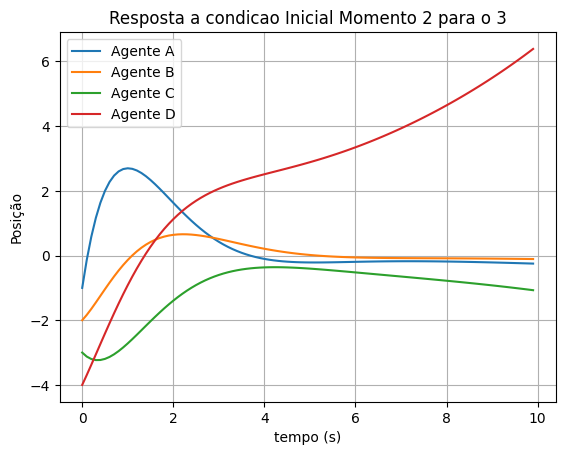

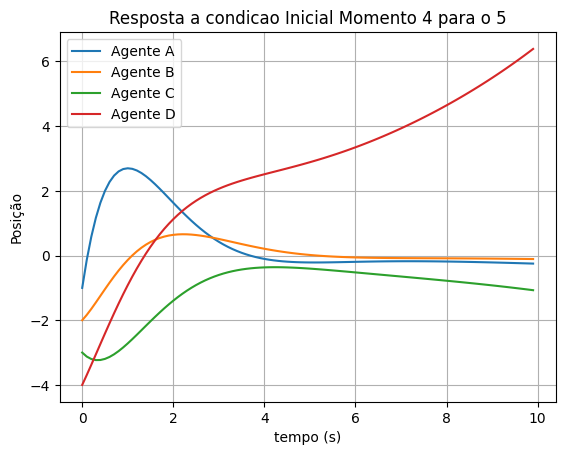

In [7]:
import control
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Sistema de Integrador Unico 2 agentes
X0_initial = np.array([-1, -2, -3, -4])
X0_impulse = np.array([-1, 1, 2, 0])

# Adjacen Matrix
Adj = np.array([[0, 0.5, 0], [0.5, 0, 0], [0.5, 0.5, 0]])
# print("Matriz de Adjacencia")
# print(Adj)
AdjT = Adj.T
# Matriz Diagonal

D = np.array(
    [
        [np.sum(AdjT[0]), 0, 0],
        [0, np.sum(AdjT[1]), 0],
        [0, 0, np.sum(AdjT[2])],
    ]
)
# print("Matriz Diagonal")
# print(D)

# Matriz Laplaciana
L = D - Adj
print("Matriz Laplaciana")
print(L)

# Eigenstructure of Graph Laplacian Matrix
L = np.matrix(L)
autovalores_Laplaciano, autovetores_Laplaciano = np.linalg.eig(L)
# print("Autovetores da Matriz Laplaciana")
# print(autovetores_Laplaciano)
# print("AutoValores da Matriz Laplaciana")
# print(autovalores_Laplaciano)
# Como calular a Forma de Jordan em Python ??

# "Sistema" Laplaciano resultante
A_Lap = -L
B_Lap = np.array([[1], [0], [0]])
C_Lap = np.array([0, 0, 1])
D_Lap = 0

# Sistema aumentado Aa =[A [0; 0; 0 ;0];-C [0]];
Aa = np.array(
    [
        [A_Lap[0, 0], A_Lap[0, 1], A_Lap[0, 2], 0],
        [A_Lap[1, 0], A_Lap[1, 1], A_Lap[1, 2], 0],
        [A_Lap[2, 0], A_Lap[2, 1], A_Lap[2, 2], 0],
        [C_Lap[0], C_Lap[1], C_Lap[2], 0],
    ]
)
Ba = np.array([B_Lap[0], B_Lap[1], B_Lap[2], [0]])
pa = np.array([-1, -0.5 + 0.3j, -0.5 - 0.3j, -0.8])
K_ = control.place(Aa, Ba, pa)
K = np.array([K_.item(0), K_.item(1), K_.item(2)])
Ki = np.array([K_.item(-1)])
# print("Matriz A Aumentada:\n ",Aa)
# print("Matriz B Aumentada:\n ",Ba)
# print("Matriz K realimentação:\n ",K,Ki)

# Calculo em malha fechada
# Acl = [A-B*K -B*Ki;-C 0];
# Bcl = [0;0;0;0;1];
# Ccl = [C 0];
# Dcl = D;

Acl_1 = A_Lap - B_Lap * K
Acl_2 = -B_Lap * Ki
Acl_3 = -C_Lap
# print("Acl1:\n", Acl_1,"\nAcl2:\n",Acl_2,"\nAcl3:\n",Acl_3)
Acl = np.array(
    [
        [Acl_1[0, 0], Acl_1[0, 1], Acl_1[0, 2], Acl_2[0][0]],
        [Acl_1[1, 0], Acl_1[1, 1], Acl_1[2, 2], Acl_2[1][0]],
        [Acl_1[2, 0], Acl_1[2, 1], Acl_1[2, 2], Acl_2[2][0]],
        [Acl_3[0], Acl_3[1], Acl_3[2], 0],
    ]
)
Bcl = Ba
Ccl = np.array([C_Lap[0], C_Lap[1], C_Lap[2], 0])
Dcl = D_Lap
# print("Acl\n",Acl,"\nBcl\n",Bcl,"\nCcl\n",Ccl,"\nDcl\n",Dcl)

sys_Laplace = control.ss(Acl, Bcl, Ccl, Dcl)
print("Sistema Laplaciano", sys_Laplace)


# Simuation Time
t = np.arange(0, 10, 0.1)
# Simulationa Initial
t1_lap_initial, y1_lap_initial, x1_lap_initial = control.initial_response(
    sys_Laplace, T=t, X0=X0_initial, return_x=True
)
# Simulation Impulse
t2_lap_initial, y2_lap_initial, x2_lap_initial = control.initial_response(
    sys_Laplace, T=t, X0=X0_initial, return_x=True
)

# Figures to Simulation Initial
plt.figure()
plt.title("Resposta a condicao Inicial Momento 2 para o 3")
plt.plot(t1_lap_initial, x1_lap_initial[0, :])
plt.plot(t1_lap_initial, x1_lap_initial[1, :])
plt.plot(t1_lap_initial, x1_lap_initial[2, :])
plt.plot(t1_lap_initial, x1_lap_initial[3, :])
plt.xlabel("tempo (s)")
plt.ylabel("Posição")
plt.legend(["Agente A", "Agente B", "Agente C", "Agente D"])
plt.grid()

# # Figures to Simulation Impulse
plt.figure()
plt.title("Resposta a condicao Inicial Momento 4 para o 5")
plt.plot(t2_lap_initial, x2_lap_initial[0, :])
plt.plot(t2_lap_initial, x2_lap_initial[1, :])
plt.plot(t1_lap_initial, x1_lap_initial[2, :])
plt.plot(t1_lap_initial, x1_lap_initial[3, :])
plt.xlabel("tempo (s)")
plt.ylabel("Posição")
plt.legend(["Agente A", "Agente B", "Agente C", "Agente D"])
plt.grid()

# show figure
plt.show()

Acl1:
 [[ 0.    -0.314]
 [ 0.5   -0.5  ]] 
Acl2:
 [[-0.026]
 [ 0.   ]] 
Acl3:
 [-0.5 -0.5]
Sistema Laplaciano <LinearIOSystem>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ 0.    -0.314 -0.026]
     [ 0.5   -0.5    0.   ]
     [-0.5   -0.5    0.   ]]

B = [[1.]
     [0.]
     [0.]]

C = [[0.5 0.5 0. ]]

D = [[0.]]



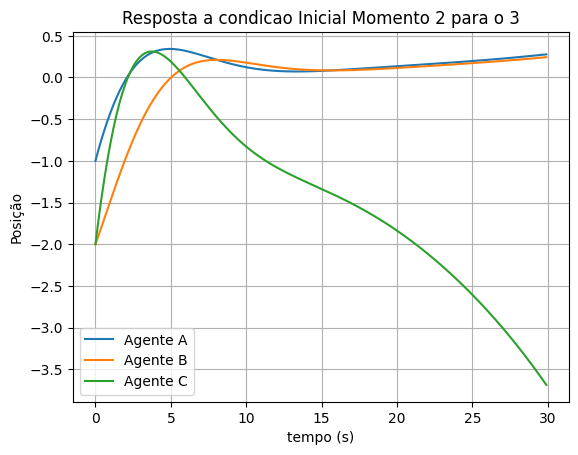

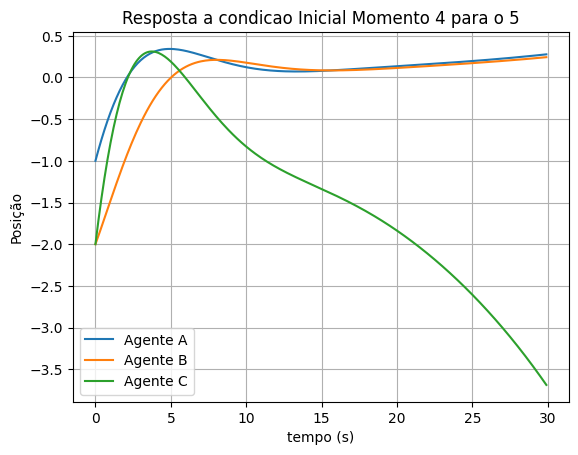

In [8]:
import control
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Sistema de Integrador Unico 2 agentes
X0_initial = np.array([-1, -2, -2])
X0_impulse = np.array([-1, 1, 2])

# Adjacen Matrix
Adj = np.array([[0, 0.5], [0.5, 0]])
# print("Matriz de Adjacencia")
# print(Adj)
AdjT = Adj.T
# Matriz Diagonal
D = np.array(
    [
        [np.sum(AdjT[0]), 0],
        [0, np.sum(AdjT[1])],
    ]
)
# print("Matriz Diagonal")
# print(D)

# Matriz Laplaciana
L = D - Adj
# print("Matriz Laplaciana")
# print(L)

# Eigenstructure of Graph Laplacian Matrix
L = np.matrix(L)
autovalores_Laplaciano, autovetores_Laplaciano = np.linalg.eig(L)
# print("Autovetores da Matriz Laplaciana")
# print(autovetores_Laplaciano)
# print("AutoValores da Matriz Laplaciana")
# print(autovalores_Laplaciano)
# Como calular a Forma de Jordan em Python ??

# "Sistema" Laplaciano resultante
A_Lap = -L
B_Lap = np.array([[1], [0]])
C_Lap = np.array([0.5, 0.5])
D_Lap = 0

# Sistema aumentado Aa =[A [0; 0; 0 ;0];-C [0]];
Aa = np.array(
    [
        [A_Lap[0, 0], A_Lap[0, 1], 0],
        [A_Lap[1, 0], A_Lap[1, 1], 0],
        [C_Lap[0], C_Lap[1], 0],
    ]
)
Ba = np.array([B_Lap[0], B_Lap[1], [0]])
pa = np.array([-0.1, -0.2 + 0.3j, -0.2 - 0.3j])
K_ = control.place(Aa, Ba, pa)
K = np.array([K_.item(0), K_.item(1)])
Ki = np.array([K_.item(-1)])
# print("Matriz A Aumentada:\n ",Aa)
# print("Matriz B Aumentada:\n ",Ba)
# print("Matriz K realimentação:\n ",K,Ki)

# Calculo em malha fechada
# Acl = [A-B*K -B*Ki;-C 0];
# Bcl = [0;0;0;0;1];
# Ccl = [C 0];
# Dcl = D;

Acl_1 = A_Lap - B_Lap * K
Acl_2 = -B_Lap * Ki
Acl_3 = -C_Lap
print("Acl1:\n", Acl_1, "\nAcl2:\n", Acl_2, "\nAcl3:\n", Acl_3)

Acl = np.array(
    [
        [Acl_1[0, 0], Acl_1[0, 1], Acl_2[0][0]],
        [Acl_1[1, 0], Acl_1[1, 1], Acl_2[1][0]],
        [Acl_3[0], Acl_3[1], 0],
    ]
)
Bcl = Ba
Ccl = np.array([C_Lap[0], C_Lap[1], 0])
Dcl = D_Lap
# print("Acl\n",Acl,"\nBcl\n",Bcl,"\nCcl\n",Ccl,"\nDcl\n",Dcl)

sys_Laplace = control.ss(Acl, Bcl, Ccl, Dcl)
print("Sistema Laplaciano", sys_Laplace)


# Simuation Time
t = np.arange(0, 30, 0.1)
# Simulationa Initial
t1_lap_initial, y1_lap_initial, x1_lap_initial = control.initial_response(
    sys_Laplace, T=t, X0=X0_initial, return_x=True
)
# Simulation Impulse
t2_lap_initial, y2_lap_initial, x2_lap_initial = control.initial_response(
    sys_Laplace, T=t, X0=X0_initial, return_x=True
)

# Figures to Simulation Initial
plt.figure()
plt.title("Resposta a condicao Inicial Momento 2 para o 3")
plt.plot(t1_lap_initial, x1_lap_initial[0, :])
plt.plot(t1_lap_initial, x1_lap_initial[1, :])
plt.plot(t1_lap_initial, x1_lap_initial[2, :])

plt.xlabel("tempo (s)")
plt.ylabel("Posição")
plt.legend(["Agente A", "Agente B", "Agente C"])
plt.grid()

# # Figures to Simulation Impulse
plt.figure()
plt.title("Resposta a condicao Inicial Momento 4 para o 5")
plt.plot(t2_lap_initial, x2_lap_initial[0, :])
plt.plot(t2_lap_initial, x2_lap_initial[1, :])
plt.plot(t1_lap_initial, x1_lap_initial[2, :])

plt.xlabel("tempo (s)")
plt.ylabel("Posição")
plt.legend(["Agente A", "Agente B", "Agente C"])
plt.grid()

# show figure
plt.show()